In [1]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
#if(!require(naniar)) {install.packages("naniar");require(naniar)}
#if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
#if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
#if(!require(mice)) {install.packages("mice");require(mice)}
#if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

Loading required package: ggExtra

Warning message:
"package 'ggExtra' was built under R version 3.6.2"
Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.2"
Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded

Loading required package: MissMech

Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.2"
Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Loading required package: MatchIt

Wa

In [2]:
con <- dbConnect(odbc::odbc(), .connection_string = "DSN=grocerries;Trusted_connection=yes;", timeout=10)

In [36]:
df<- dbReadTable(con,"project_flatfilev")

In [4]:
city_sales <- dbReadTable(con,"sales_by_cities")

In [5]:
df=inner_join(df,city_sales, by=c("city","Year","month"))

In [6]:
onprom_by_month <- dbReadTable(con,"onprom_by_month")

In [7]:
head(onprom_by_month)

item_nbr Year month total_month_onpromotion
1 557810   2013  1     0                     
2 265237   2013 10     0                     
3 838412   2014 12    11                     
4 368624   2015  4     2                     
5 664543   2015  4     1                     
6 765517   2015  5     3

In [8]:
df=inner_join(df,onprom_by_month, by=c("item_nbr","Year","month"))

In [9]:
head(df)

item_nbr store_nbr Year month total_unit_sales city  state     store_type
1 1003679  1         2013 1     53               Quito Pichincha D         
2 1003679  1         2013 2     86               Quito Pichincha D         
3 1003679  1         2013 3     46               Quito Pichincha D         
4 1003679  1         2013 4     44               Quito Pichincha D         
5 1003679  1         2013 5     44               Quito Pichincha D         
6 1003679  1         2013 6     47               Quito Pichincha D         
  store_cluster prev_month_sales ... city_Playas city_Puyo city_Quevedo
1 13            NA               ... 0           0         0           
2 13            53               ... 0           0         0           
3 13            86               ... 0           0         0           
4 13            46               ... 0           0         0           
5 13            44               ... 0           0         0           
6 13            44               ... 0           0         0           
  city_Quito city_Riobamba city_Salinas city_Santo.Domingo total_city_sales
1 1          0             0            0                  3523310         
2 1          0             0            0                  3172380         
3 1          0             0            0                  3916563         
4 1          0             0            0                  3728510         
5 1          0             0            0                  3781720         
6 1          0             0            0                  3844547         
  sales_perc total_month_onpromotion
1 51.73105   0                      
2 49.65558   0                      
3 51.25644   0                      
4 50.48594   0                      
5 48.71445   0                      
6 49.42105   0

In [10]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}

In [11]:
#l1 <- c(l1,'class','city','state','store_type','store_cluster','family')

In [12]:
 df <- df[ , !names(df) %in% l1]

In [13]:
head(df)

item_nbr store_nbr Year month total_unit_sales city  state     store_type
1 1003679  1         2013 1     53               Quito Pichincha D         
2 1003679  1         2013 2     86               Quito Pichincha D         
3 1003679  1         2013 3     46               Quito Pichincha D         
4 1003679  1         2013 4     44               Quito Pichincha D         
5 1003679  1         2013 5     44               Quito Pichincha D         
6 1003679  1         2013 6     47               Quito Pichincha D         
  store_cluster prev_month_sales ... city_Playas city_Puyo city_Quevedo
1 13            NA               ... 0           0         0           
2 13            53               ... 0           0         0           
3 13            86               ... 0           0         0           
4 13            46               ... 0           0         0           
5 13            44               ... 0           0         0           
6 13            44               ... 0           0         0           
  city_Quito city_Riobamba city_Salinas city_Santo.Domingo total_city_sales
1 1          0             0            0                  3523310         
2 1          0             0            0                  3172380         
3 1          0             0            0                  3916563         
4 1          0             0            0                  3728510         
5 1          0             0            0                  3781720         
6 1          0             0            0                  3844547         
  sales_perc total_month_onpromotion
1 51.73105   0                      
2 49.65558   0                      
3 51.25644   0                      
4 50.48594   0                      
5 48.71445   0                      
6 49.42105   0

In [14]:
clusters <- dbReadTable(con,"store_cluster_by_store")

In [15]:
df=inner_join(df,clusters, by="store_nbr")

In [16]:
head(df)

item_nbr store_nbr Year month total_unit_sales city  state     store_type
1 1003679  1         2013 1     53               Quito Pichincha D         
2 1003679  1         2013 2     86               Quito Pichincha D         
3 1003679  1         2013 3     46               Quito Pichincha D         
4 1003679  1         2013 4     44               Quito Pichincha D         
5 1003679  1         2013 5     44               Quito Pichincha D         
6 1003679  1         2013 6     47               Quito Pichincha D         
  store_cluster prev_month_sales ... cluster8 cluster9 cluster10 cluster11
1 13            NA               ... 0        0        0         0        
2 13            53               ... 0        0        0         0        
3 13            86               ... 0        0        0         0        
4 13            46               ... 0        0        0         0        
5 13            44               ... 0        0        0         0        
6 13            44               ... 0        0        0         0        
  cluster12 cluster13 cluster14 cluster15 cluster16 cluster17
1 0         1         0         0         0         0        
2 0         1         0         0         0         0        
3 0         1         0         0         0         0        
4 0         1         0         0         0         0        
5 0         1         0         0         0         0        
6 0         1         0         0         0         0

In [18]:
for (v in names(df)){
    print(v)
    print(class(df[[v]]))
}

[1] "item_nbr"
[1] "character"
[1] "store_nbr"
[1] "character"
[1] "Year"
[1] "integer"
[1] "month"
[1] "integer"
[1] "total_unit_sales"
[1] "numeric"
[1] "prev_month_sales"
[1] "numeric"
[1] "prev_3month_sales"
[1] "numeric"
[1] "avg_prev_3months_sales"
[1] "numeric"
[1] "min_prev_3months_sales"
[1] "numeric"
[1] "max_prev_3months_sales"
[1] "numeric"
[1] "monthly_oilprice_avg"
[1] "numeric"
[1] "total_month_holidays"
[1] "integer"
[1] "total_month_transactions"
[1] "numeric"
[1] "prev_month_transactions"
[1] "numeric"
[1] "prev_3month_transactions"
[1] "numeric"
[1] "avg_prev_3months_transactions"
[1] "numeric"
[1] "min_prev_3months_transactions"
[1] "numeric"
[1] "max_prev_3months_transactions"
[1] "numeric"
[1] "perishable"
[1] "character"
[1] "BREAD.BAKERY"
[1] "integer"
[1] "BEVERAGES"
[1] "integer"
[1] "DAIRY"
[1] "integer"
[1] "PERSONAL.CARE"
[1] "integer"
[1] "HOME.CARE"
[1] "integer"
[1] "FROZEN.FOODS"
[1] "integer"
[1] "POULTRY"
[1] "integer"
[1] "GROCERY.II"
[1] "integer"
[

In [17]:
for (v in names(df)){
    print(v)
    print(length(unique(df[[v]])))
}

[1] "item_nbr"
[1] 824
[1] "store_nbr"
[1] 54
[1] "Year"
[1] 5
[1] "month"
[1] 12
[1] "total_unit_sales"
[1] 26627
[1] "prev_month_sales"
[1] 26150
[1] "prev_3month_sales"
[1] 25159
[1] "avg_prev_3months_sales"
[1] 34907
[1] "min_prev_3months_sales"
[1] 16114
[1] "max_prev_3months_sales"
[1] 16938
[1] "monthly_oilprice_avg"
[1] 55
[1] "total_month_holidays"
[1] 6
[1] "total_month_transactions"
[1] 2703
[1] "prev_month_transactions"
[1] 2654
[1] "prev_3month_transactions"
[1] 2543
[1] "avg_prev_3months_transactions"
[1] 2732
[1] "min_prev_3months_transactions"
[1] 1463
[1] "max_prev_3months_transactions"
[1] 1360
[1] "perishable"
[1] 3
[1] "BREAD.BAKERY"
[1] 2
[1] "BEVERAGES"
[1] 2
[1] "DAIRY"
[1] 2
[1] "PERSONAL.CARE"
[1] 2
[1] "HOME.CARE"
[1] 2
[1] "FROZEN.FOODS"
[1] 2
[1] "POULTRY"
[1] 2
[1] "GROCERY.II"
[1] 2
[1] "X.LIQUOR"
[1] 2
[1] "EGGS"
[1] 2
[1] "GROCERY.I"
[1] 2
[1] "CLEANING"
[1] 2
[1] "DELI"
[1] 2
[1] "store_typeA"
[1] 2
[1] "store_typeB"
[1] 2
[1] "store_typeC"
[1] 2
[1] "s

In [20]:
l1

[1] "SEAFOOD"                    "LAWN.AND.GARDEN"           
 [3] "HOME.AND.KITCHEN"           "SCHOOL.AND.OFFICE.SUPPLIES"
 [5] "AUTOMOTIVE"                 "BOOKS"                     
 [7] "LINGERIE"                   "PREPARED.FOOD"             
 [9] "MAGAZINES"                  "PET.SUPPLIES"              
[11] "HOME.APPLIANCES"            "PRODUCE"                   
[13] "HARDWARE"                   "BEAUTY"                    
[15] "PLAYERS.AND.ELECTRONICS"    "CELEBRATION"               
[17] "MEATS"                      "LADIESWEAR"                
[19] "BABY.CARE"                  "HOME.AND.KITCHEN.II"       
[21] "class"                      "city"                      
[23] "state"                      "store_type"                
[25] "store_cluster"              "family"

In [17]:
df$item_nbr <- as.numeric(df$item_nbr)
df$store_nbr <- as.numeric(df$store_nbr)
df$perishable <- as.numeric(df$perishable)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [17]:
### vector of the categoric features 
cf<- c()
for (v in names(df)){
    if ((v %in% c('Year','month','store_nbr','item_nbr'))|(is.numeric(df[[v]])==F)|
        (max(df[[v]],na.rm=T)==1 & length(unique(df[[v]]))<=3))  {
        cf<- c(cf,v)
    } 
}

In [18]:
for (v in cf){
    print(v)
    print(length(unique(df[[v]])))
}

[1] "item_nbr"
[1] 824
[1] "store_nbr"
[1] 54
[1] "Year"
[1] 5
[1] "month"
[1] 12
[1] "city"
[1] 22
[1] "state"
[1] 16
[1] "store_type"
[1] 5
[1] "store_cluster"
[1] 17
[1] "family"
[1] 14
[1] "class"
[1] 129
[1] "perishable"
[1] 3
[1] "BREAD.BAKERY"
[1] 2
[1] "BEVERAGES"
[1] 2
[1] "DAIRY"
[1] 2
[1] "PERSONAL.CARE"
[1] 2
[1] "HOME.CARE"
[1] 2
[1] "FROZEN.FOODS"
[1] 2
[1] "POULTRY"
[1] 2
[1] "GROCERY.II"
[1] 2
[1] "X.LIQUOR"
[1] 2
[1] "EGGS"
[1] 2
[1] "GROCERY.I"
[1] 2
[1] "CLEANING"
[1] 2
[1] "DELI"
[1] 2
[1] "store_typeA"
[1] 2
[1] "store_typeB"
[1] 2
[1] "store_typeC"
[1] 2
[1] "store_typeD"
[1] 2
[1] "store_typeE"
[1] 2
[1] "city_Ambato"
[1] 2
[1] "city_Babahoyo"
[1] 2
[1] "city_Cayambe"
[1] 2
[1] "city_Cuenca"
[1] 2
[1] "city_Daule"
[1] 2
[1] "city_El.Carmen"
[1] 2
[1] "city_Esmeraldas"
[1] 2
[1] "city_Guaranda"
[1] 2
[1] "city_Guayaquil"
[1] 2
[1] "city_Ibarra"
[1] 2
[1] "city_Latacunga"
[1] 2
[1] "city_Libertad"
[1] 2
[1] "city_Loja"
[1] 2
[1] "city_Machala"
[1] 2
[1] "city_Manta

In [19]:
## vector of continuous features
nf<- c()
for (v in names(df)){
    if ((!v %in% c('Year','month','store_nbr','item_nbr'))&(is.numeric(df[[v]])==T)&
        (max(df[[v]],na.rm=T)>1 & length(unique(df[[v]]))>3))  {
        nf<- c(nf,v)
    } 
}

In [22]:
cf

[1] "item_nbr"           "store_nbr"          "Year"              
 [4] "month"              "city"               "state"             
 [7] "store_type"         "store_cluster"      "family"            
[10] "class"              "perishable"         "BREAD.BAKERY"      
[13] "BEVERAGES"          "DAIRY"              "PERSONAL.CARE"     
[16] "HOME.CARE"          "FROZEN.FOODS"       "POULTRY"           
[19] "GROCERY.II"         "X.LIQUOR"           "EGGS"              
[22] "GROCERY.I"          "CLEANING"           "DELI"              
[25] "store_typeA"        "store_typeB"        "store_typeC"       
[28] "store_typeD"        "store_typeE"        "city_Ambato"       
[31] "city_Babahoyo"      "city_Cayambe"       "city_Cuenca"       
[34] "city_Daule"         "city_El.Carmen"     "city_Esmeraldas"   
[37] "city_Guaranda"      "city_Guayaquil"     "city_Ibarra"       
[40] "city_Latacunga"     "city_Libertad"      "city_Loja"         
[43] "city_Machala"       "city_Manta"         "city_Playas"       
[46] "city_Puyo"          "city_Quevedo"       "city_Quito"        
[49] "city_Riobamba"      "city_Salinas"       "city_Santo.Domingo"
[52] "cluster1"           "cluster2"           "cluster3"          
[55] "cluster4"           "cluster5"           "cluster6"          
[58] "cluster7"           "cluster8"           "cluster9"          
[61] "cluster10"          "cluster11"          "cluster12"         
[64] "cluster13"          "cluster14"          "cluster15"         
[67] "cluster16"          "cluster17"

In [23]:
nf

[1] "total_unit_sales"              "prev_month_sales"             
 [3] "prev_3month_sales"             "avg_prev_3months_sales"       
 [5] "min_prev_3months_sales"        "max_prev_3months_sales"       
 [7] "monthly_oilprice_avg"          "total_month_holidays"         
 [9] "total_month_transactions"      "prev_month_transactions"      
[11] "prev_3month_transactions"      "avg_prev_3months_transactions"
[13] "min_prev_3months_transactions" "max_prev_3months_transactions"
[15] "total_city_sales"              "sales_perc"                   
[17] "total_month_onpromotion"

Warning message:
"Removed 44098 rows containing non-finite values (stat_density)."


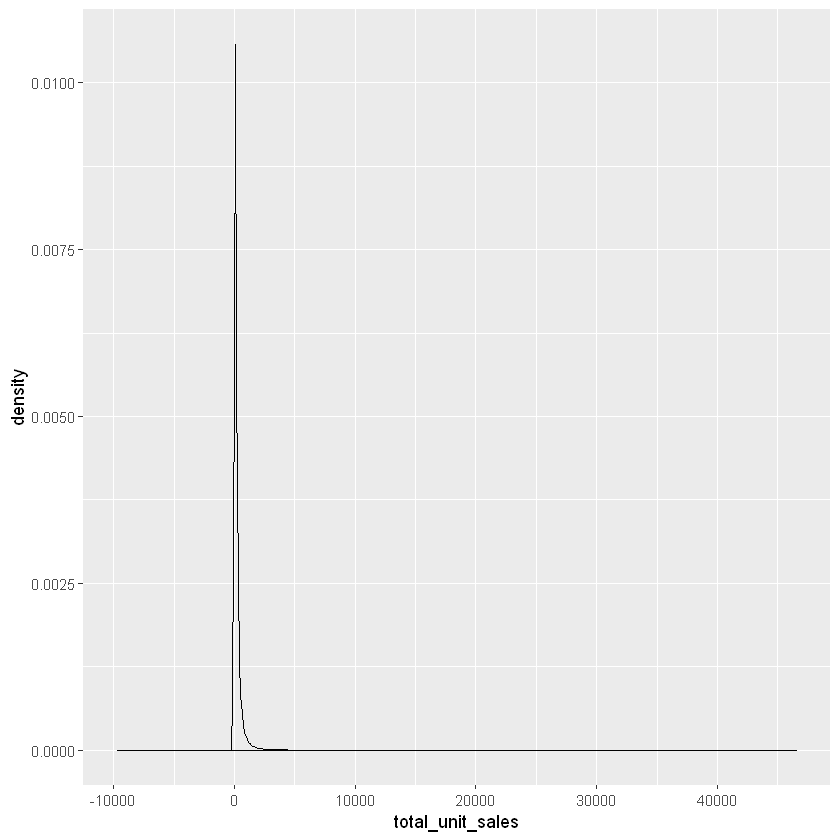

Warning message:
"Removed 132097 rows containing non-finite values (stat_density)."


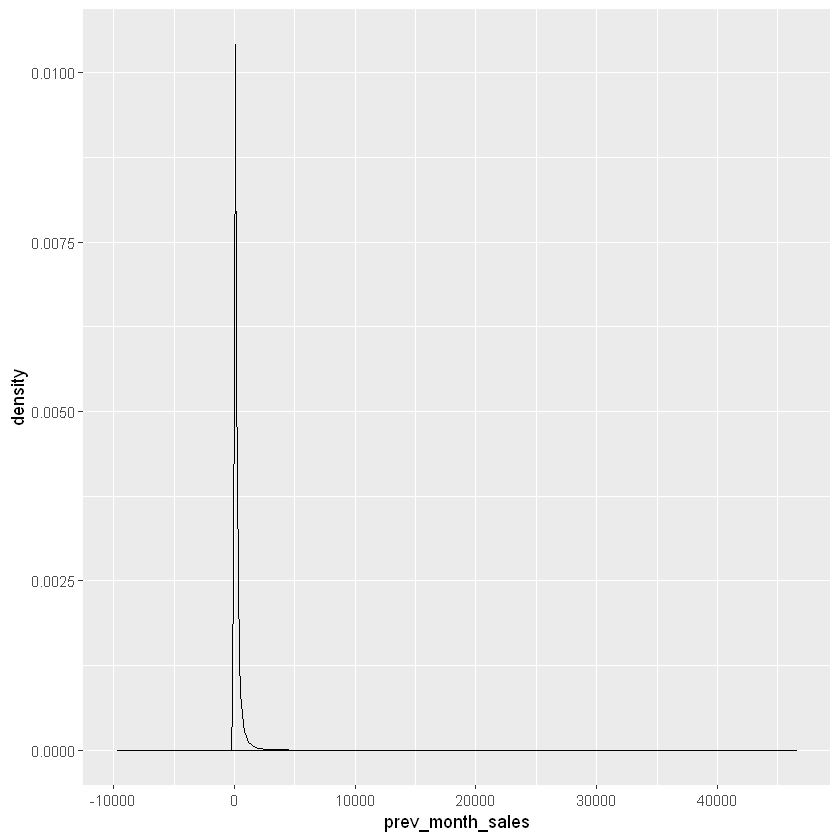

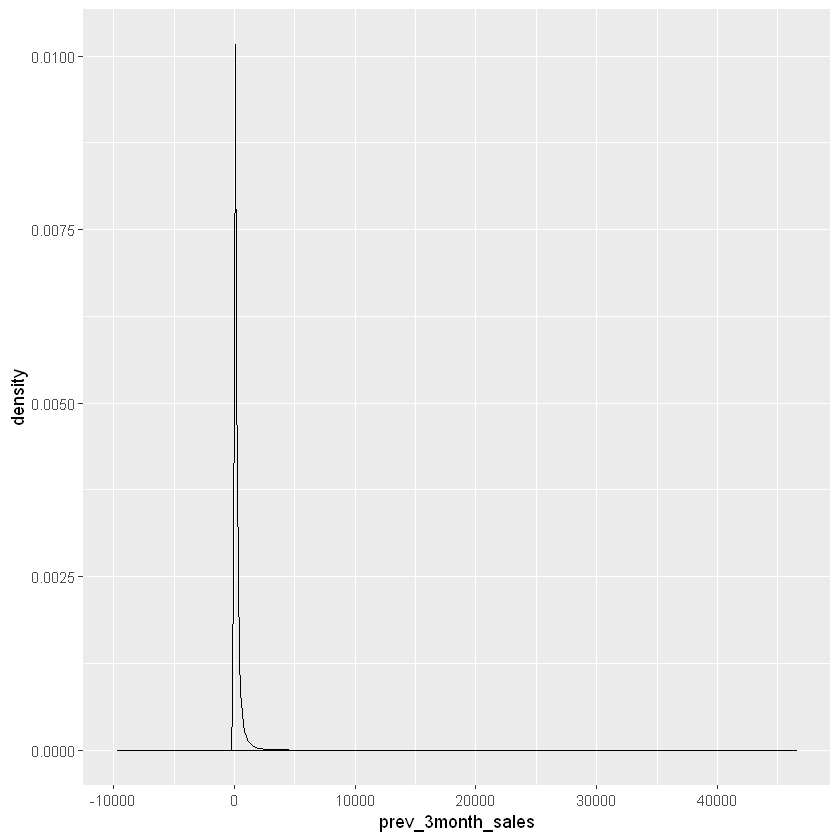

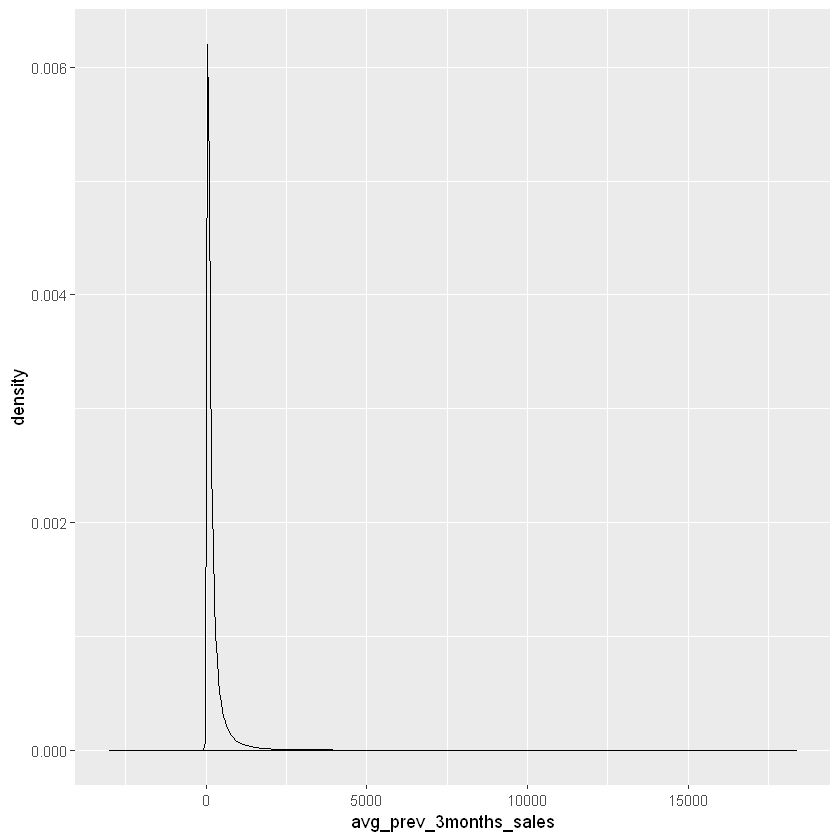

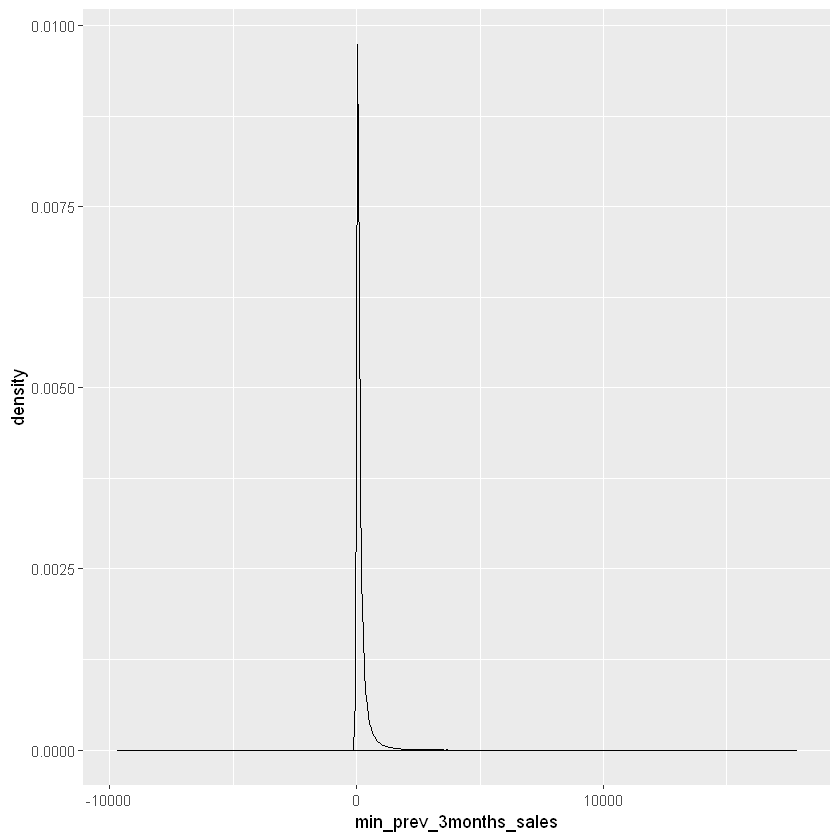

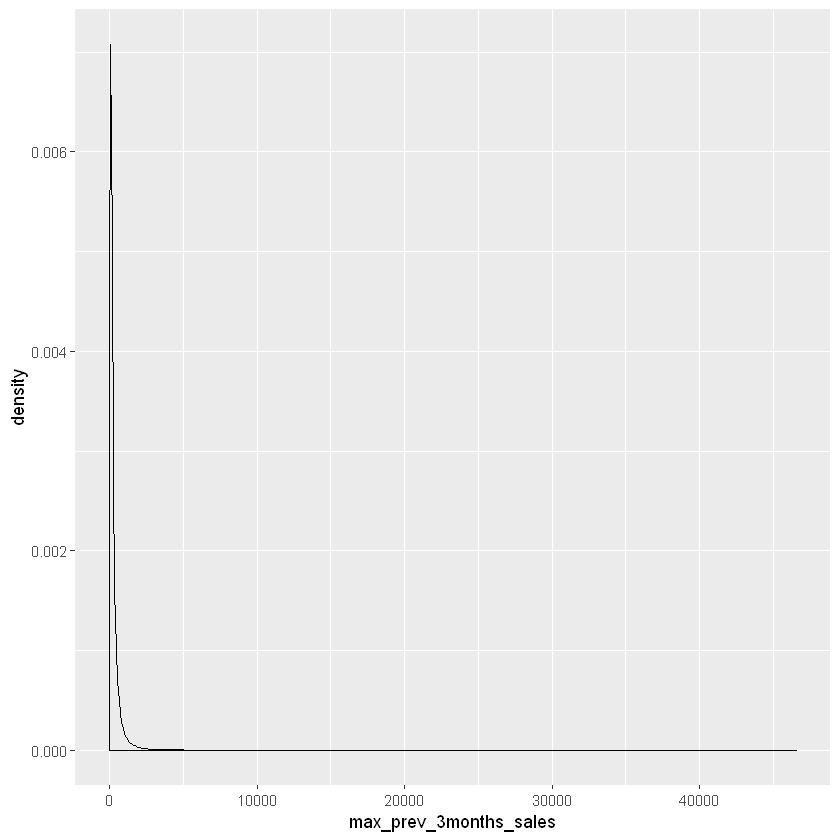

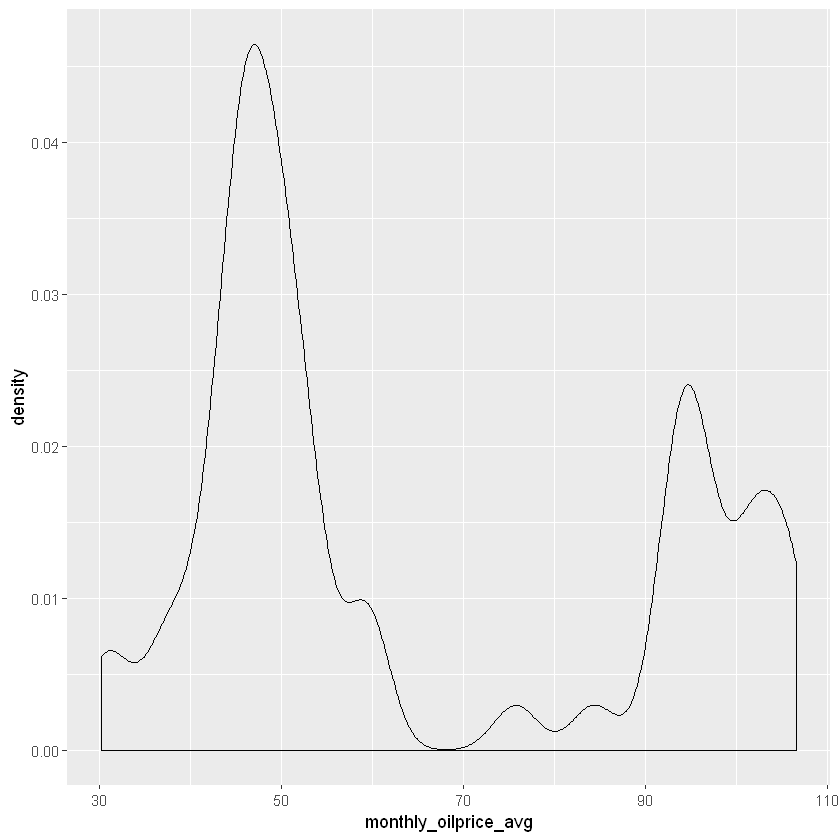

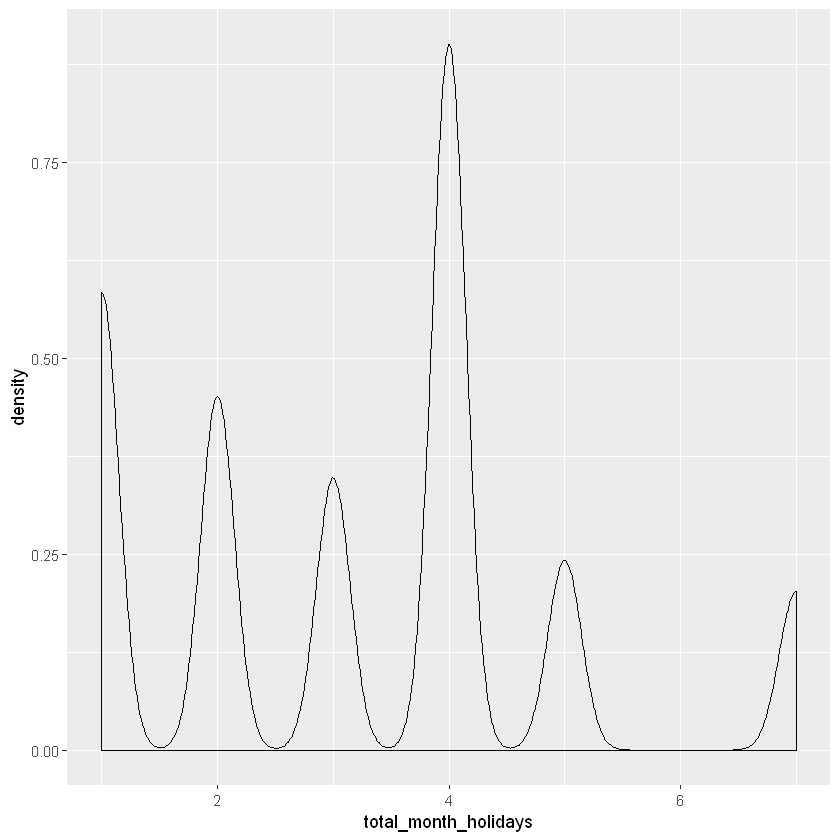

Warning message:
"Removed 35639 rows containing non-finite values (stat_density)."


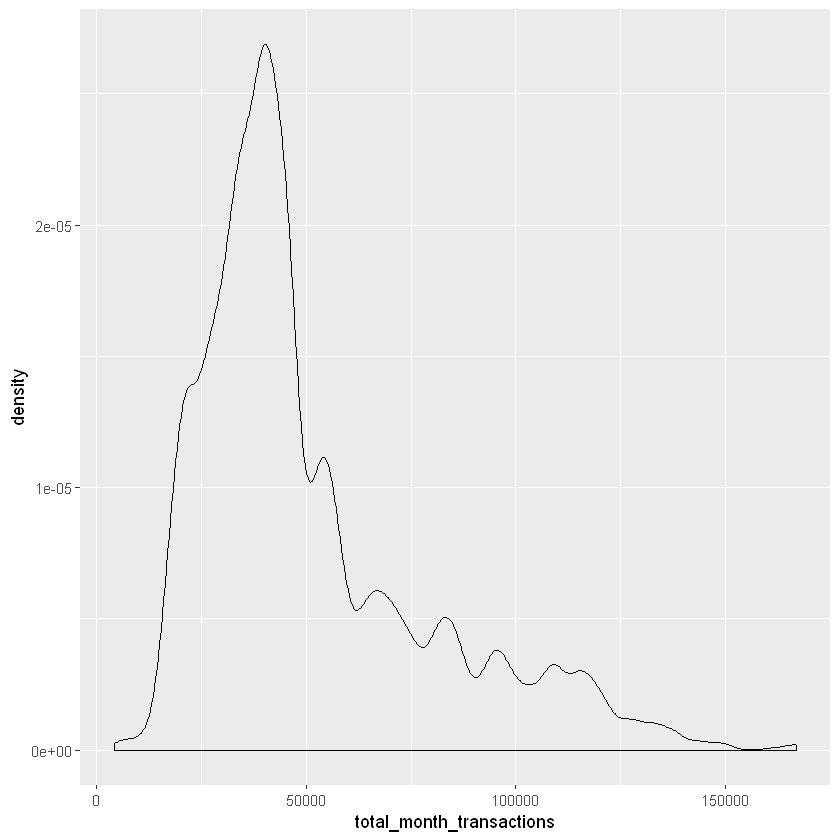

Warning message:
"Removed 108852 rows containing non-finite values (stat_density)."


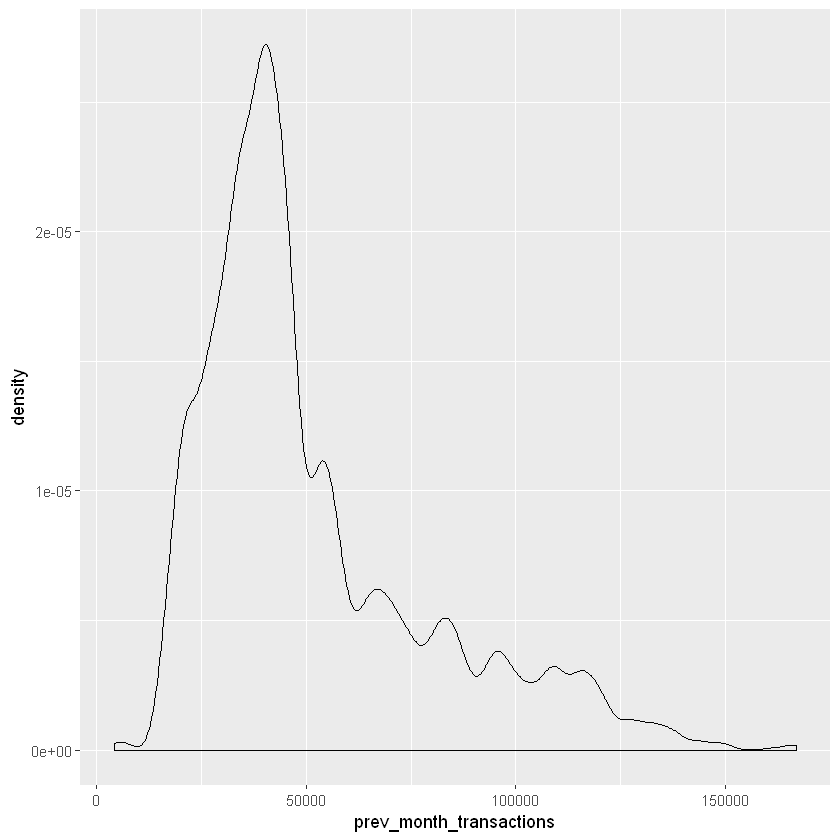

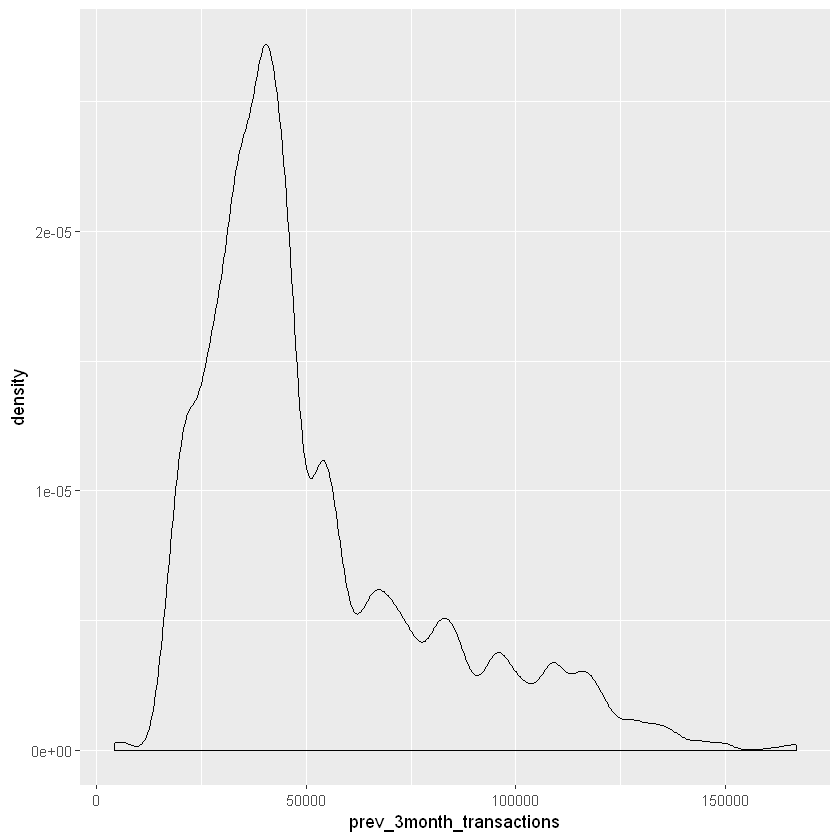

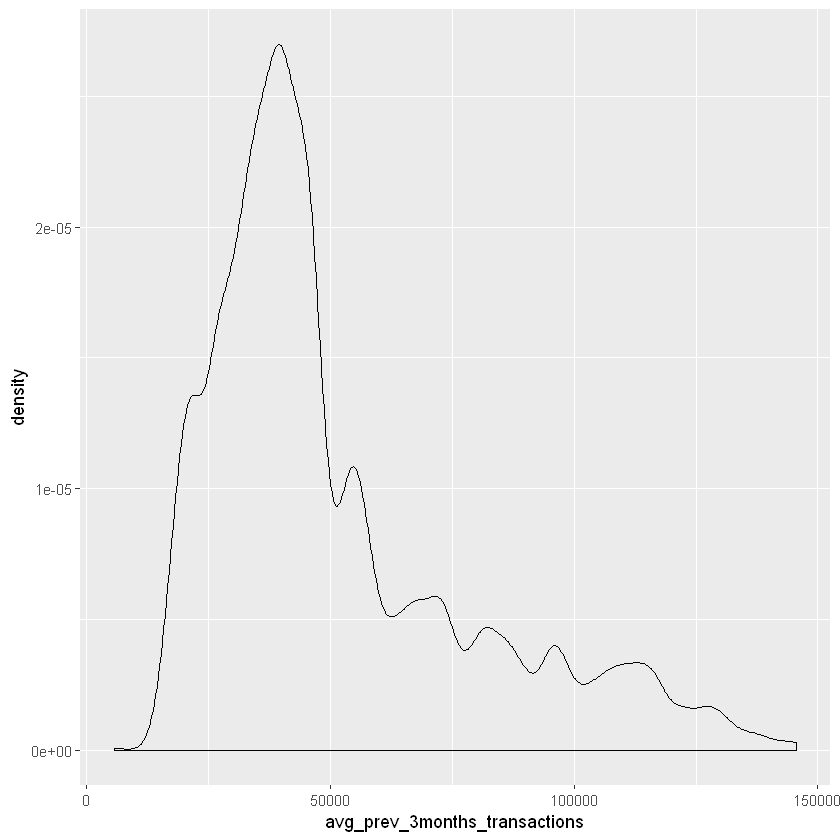

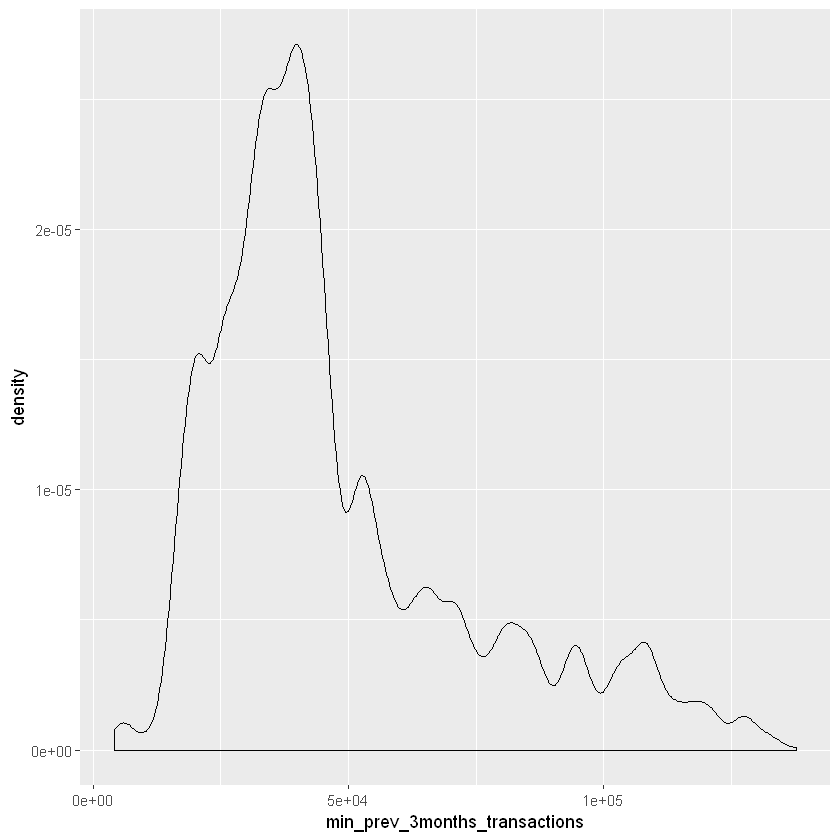

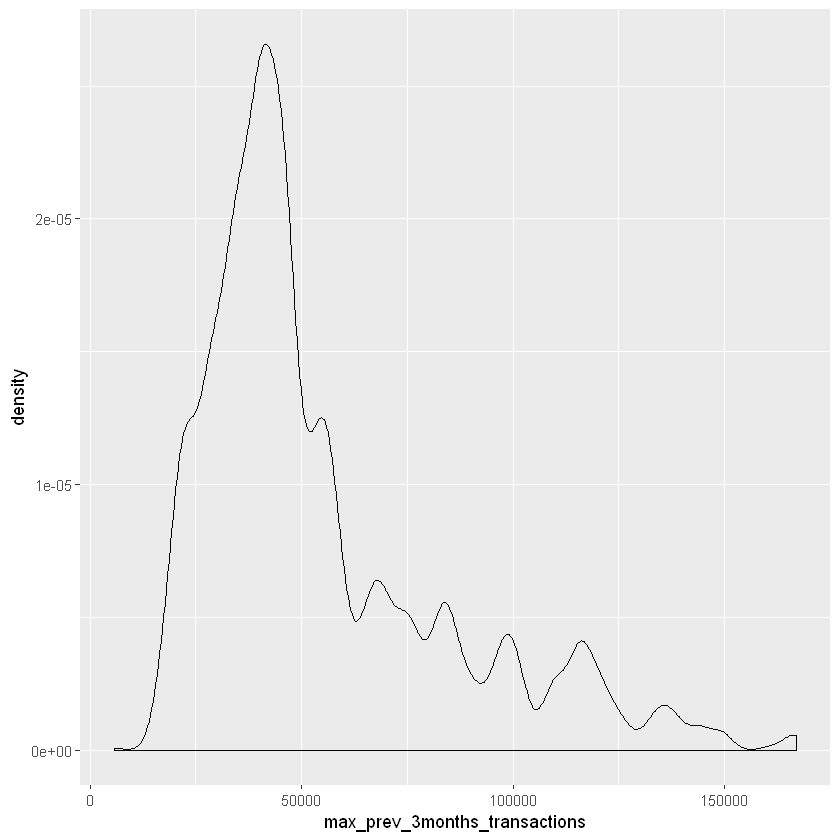

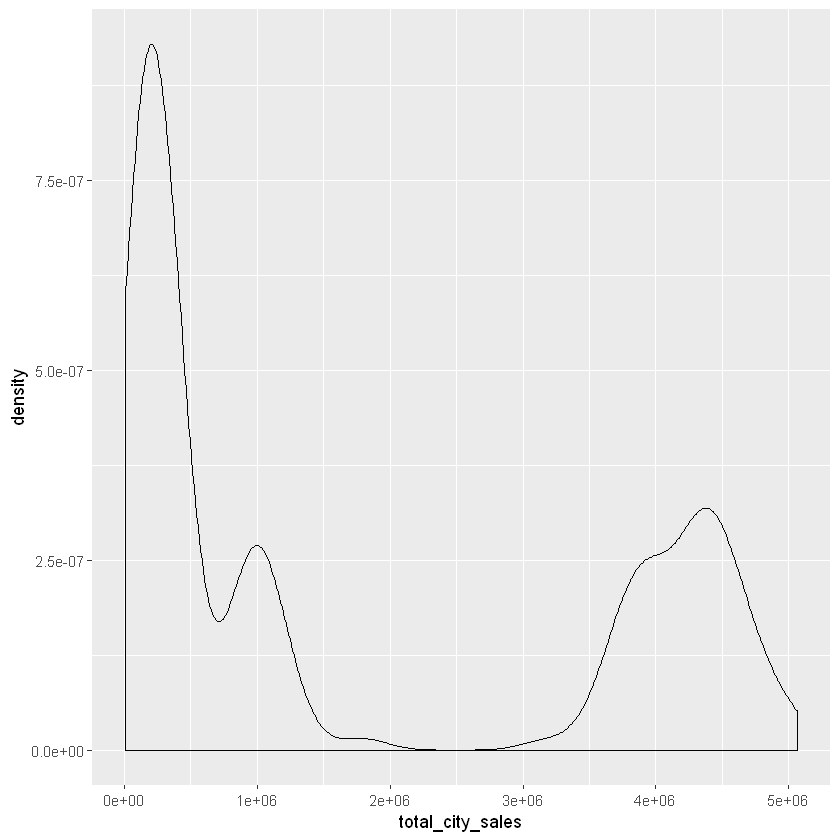

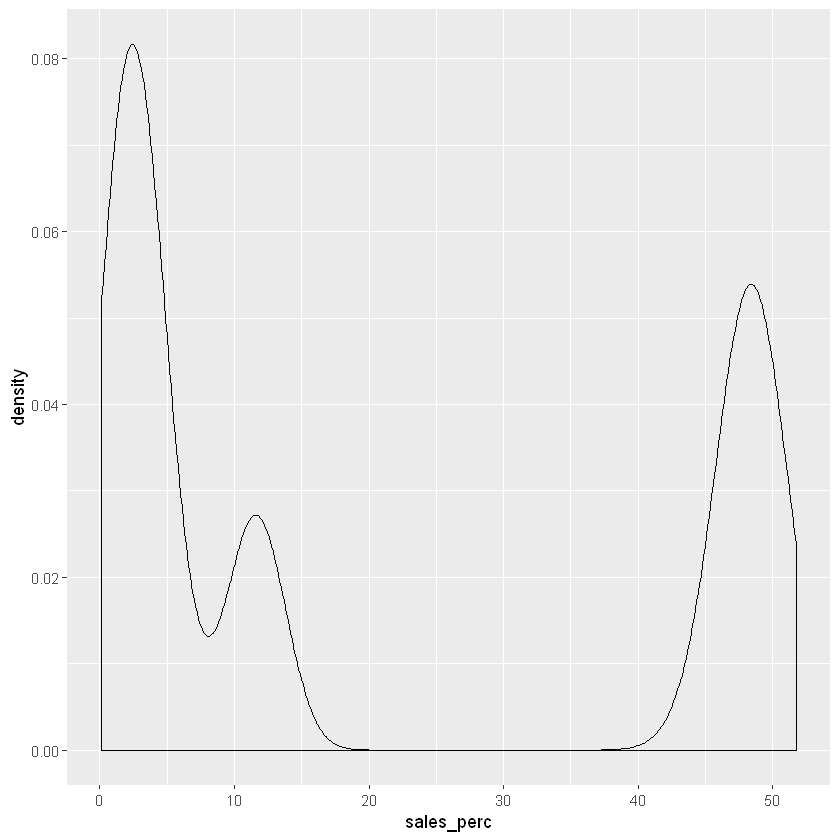

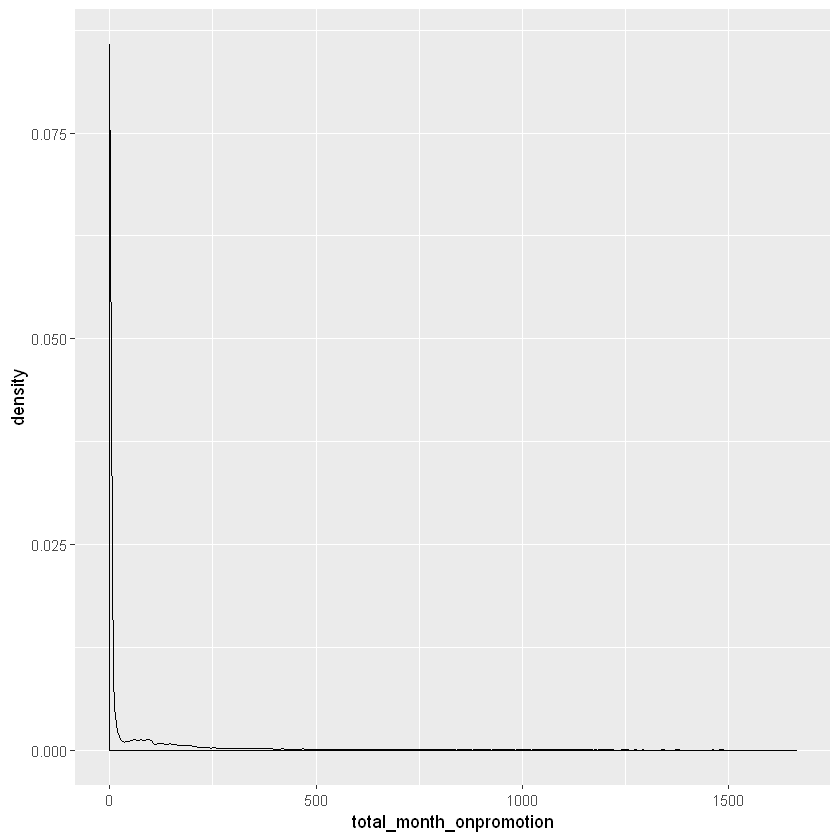

In [22]:
for (v in nf){
    print((ggplot(df,aes(x=df[[v]])) +
    geom_density(adjust=2) + xlab(v)))
}

        [,1]
  [1,]   0.7
  [2,]   1.9
  [3,]   3.1
  [4,]   4.3
  [5,]   5.5
  [6,]   6.7
  [7,]   7.9
  [8,]   9.1
  [9,]  10.3
 [10,]  11.5
 [11,]  12.7
 [12,]  13.9
 [13,]  15.1
 [14,]  16.3
 [15,]  17.5
 [16,]  18.7
 [17,]  19.9
 [18,]  21.1
 [19,]  22.3
 [20,]  23.5
 [21,]  24.7
 [22,]  25.9
 [23,]  27.1
 [24,]  28.3
 [25,]  29.5
 [26,]  30.7
 [27,]  31.9
 [28,]  33.1
 [29,]  34.3
 [30,]  35.5
 [31,]  36.7
 [32,]  37.9
 [33,]  39.1
 [34,]  40.3
 [35,]  41.5
 [36,]  42.7
 [37,]  43.9
 [38,]  45.1
 [39,]  46.3
 [40,]  47.5
 [41,]  48.7
 [42,]  49.9
 [43,]  51.1
 [44,]  52.3
 [45,]  53.5
 [46,]  54.7
 [47,]  55.9
 [48,]  57.1
 [49,]  58.3
 [50,]  59.5
 [51,]  60.7
 [52,]  61.9
 [53,]  63.1
 [54,]  64.3
 [55,]  65.5
 [56,]  66.7
 [57,]  67.9
 [58,]  69.1
 [59,]  70.3
 [60,]  71.5
 [61,]  72.7
 [62,]  73.9
 [63,]  75.1
 [64,]  76.3
 [65,]  77.5
 [66,]  78.7
 [67,]  79.9
 [68,]  81.1
 [69,]  82.3
 [70,]  83.5
 [71,]  84.7
 [72,]  85.9
 [73,]  87.1
 [74,]  88.3
 [75,]  89.5
 [76,]  90.7

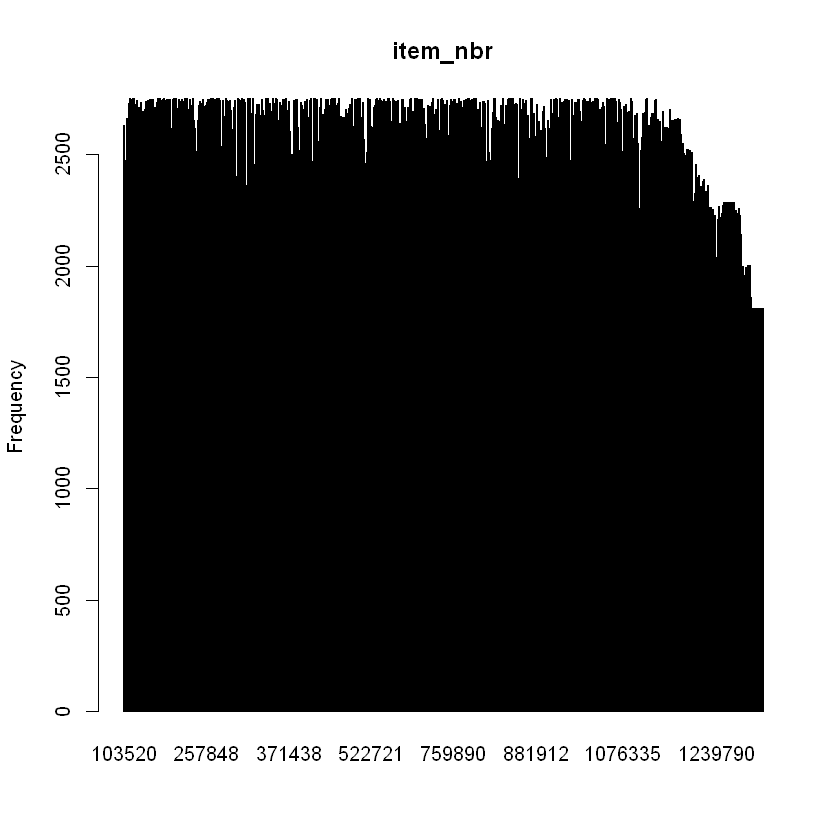

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9
[18,] 21.1
[19,] 22.3
[20,] 23.5
[21,] 24.7
[22,] 25.9
[23,] 27.1
[24,] 28.3
[25,] 29.5
[26,] 30.7
[27,] 31.9
[28,] 33.1
[29,] 34.3
[30,] 35.5
[31,] 36.7
[32,] 37.9
[33,] 39.1
[34,] 40.3
[35,] 41.5
[36,] 42.7
[37,] 43.9
[38,] 45.1
[39,] 46.3
[40,] 47.5
[41,] 48.7
[42,] 49.9
[43,] 51.1
[44,] 52.3
[45,] 53.5
[46,] 54.7
[47,] 55.9
[48,] 57.1
[49,] 58.3
[50,] 59.5
[51,] 60.7
[52,] 61.9
[53,] 63.1
[54,] 64.3


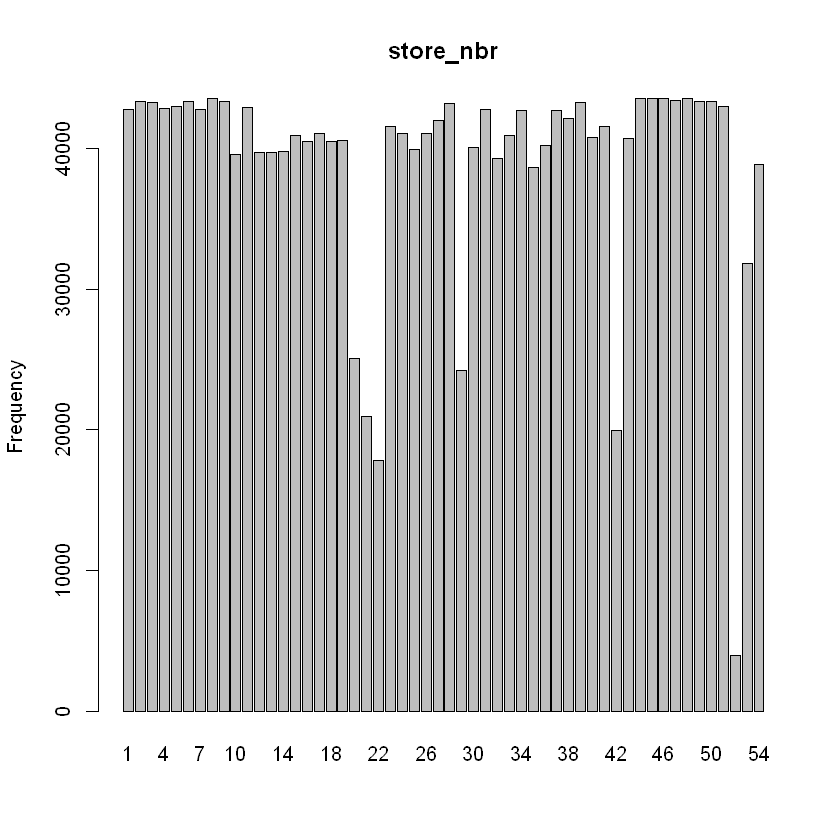

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1
[4,]  4.3
[5,]  5.5


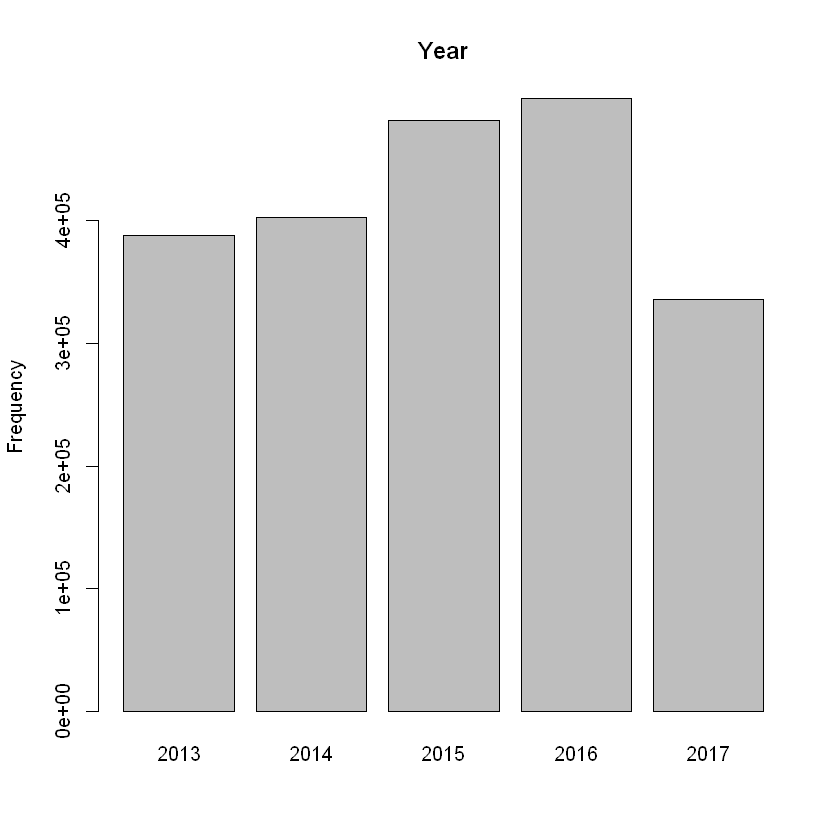

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9


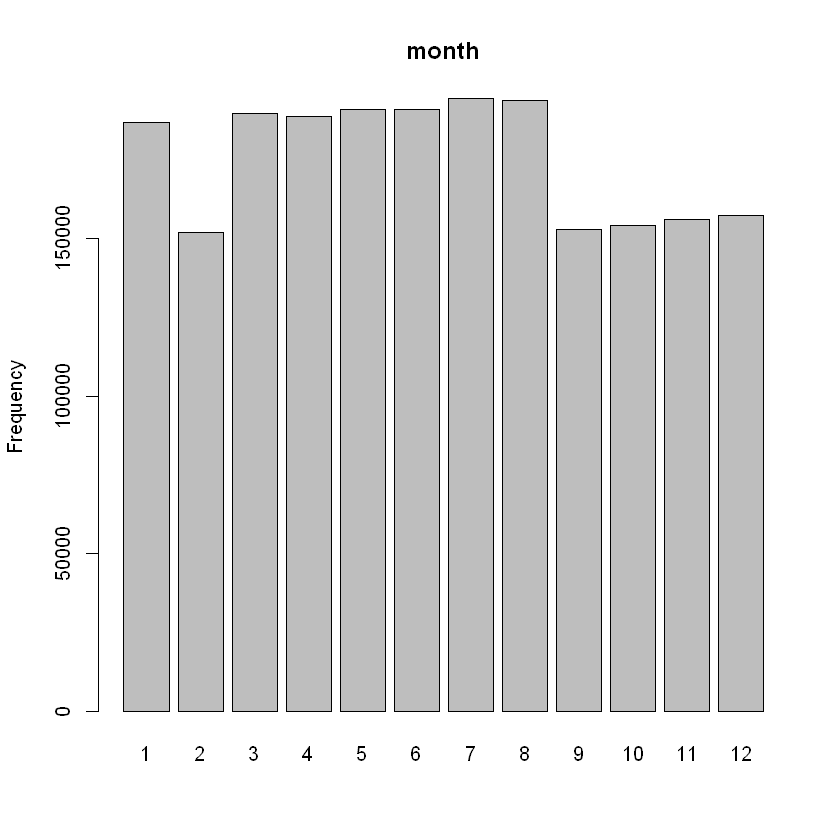

     [,1]
[1,]  0.7
[2,]  1.9


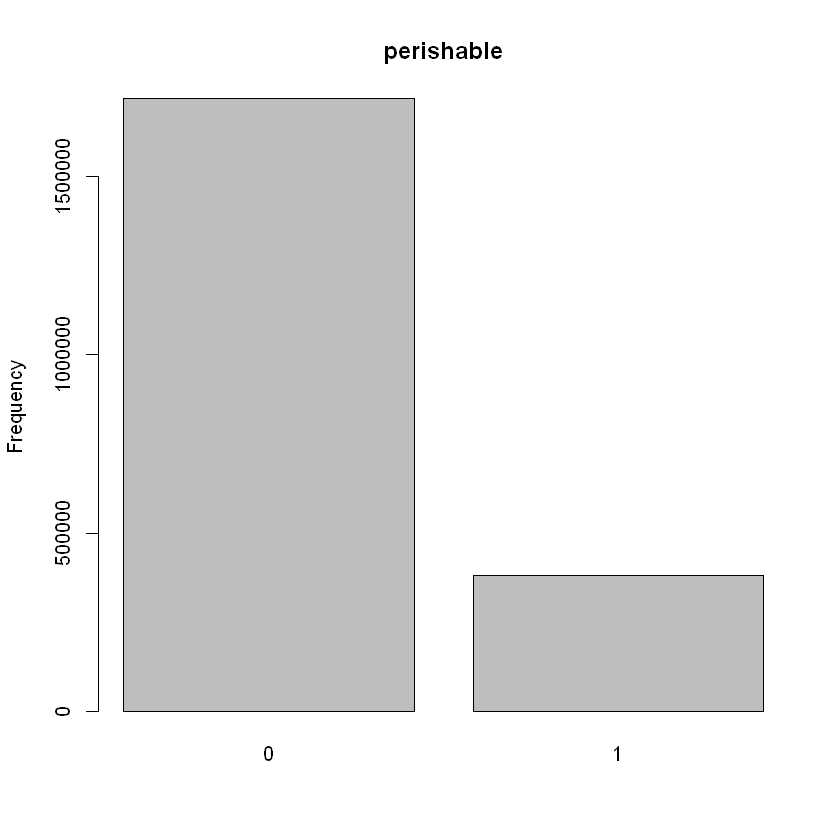

     [,1]
[1,]  0.7
[2,]  1.9


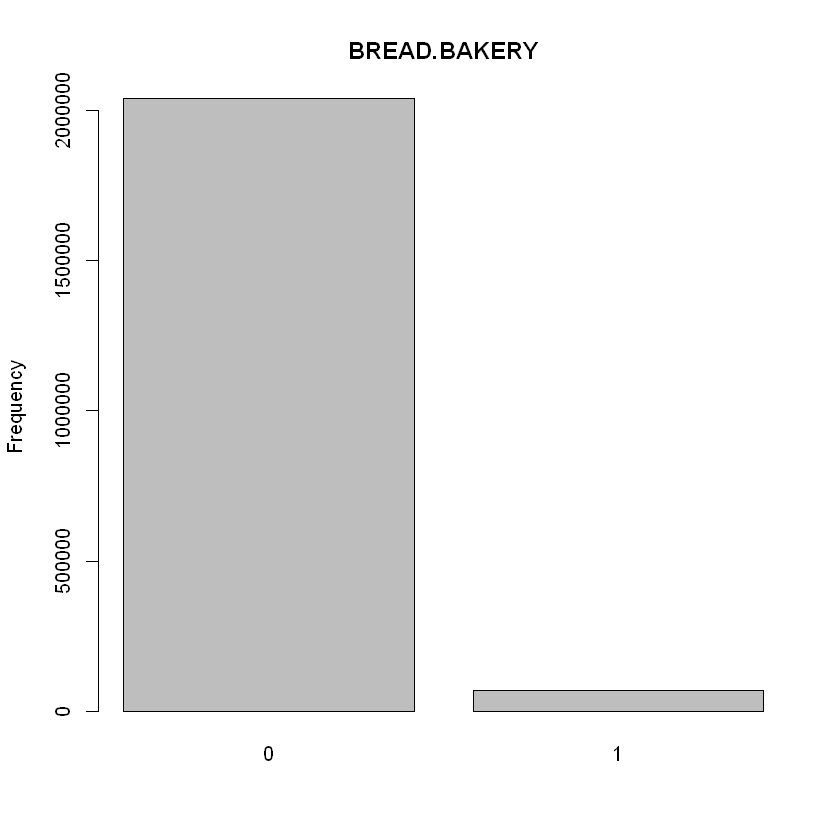

     [,1]
[1,]  0.7
[2,]  1.9


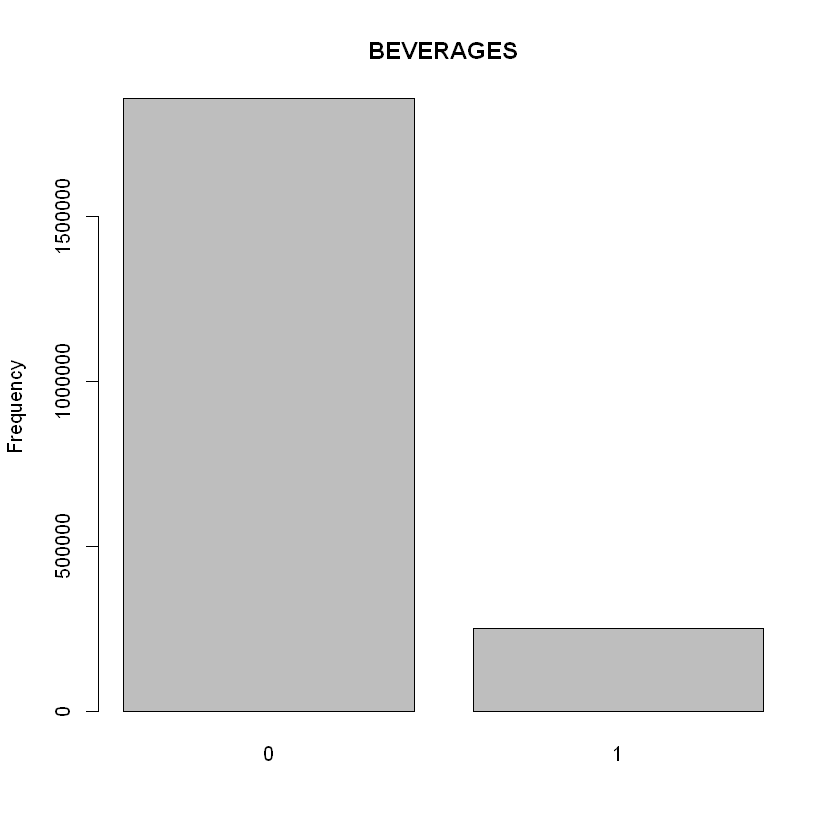

     [,1]
[1,]  0.7
[2,]  1.9


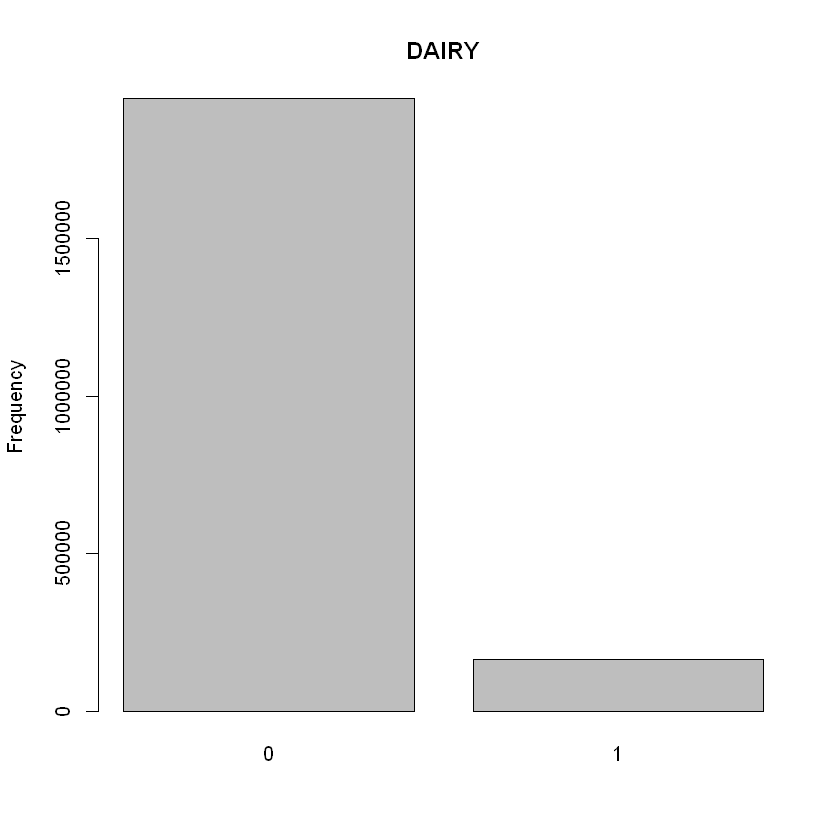

     [,1]
[1,]  0.7
[2,]  1.9


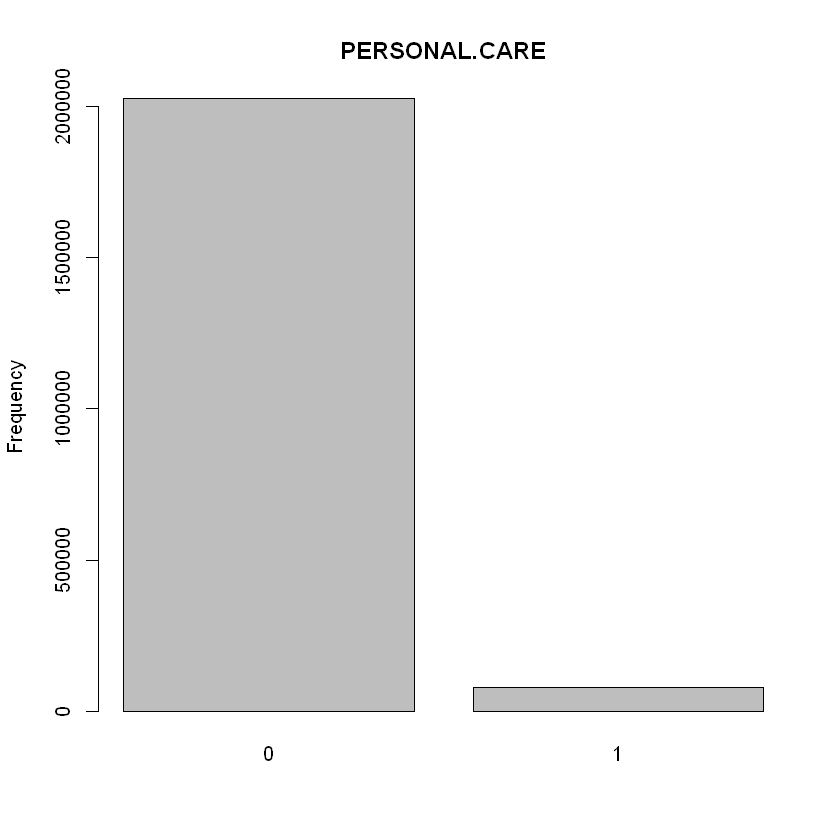

     [,1]
[1,]  0.7
[2,]  1.9


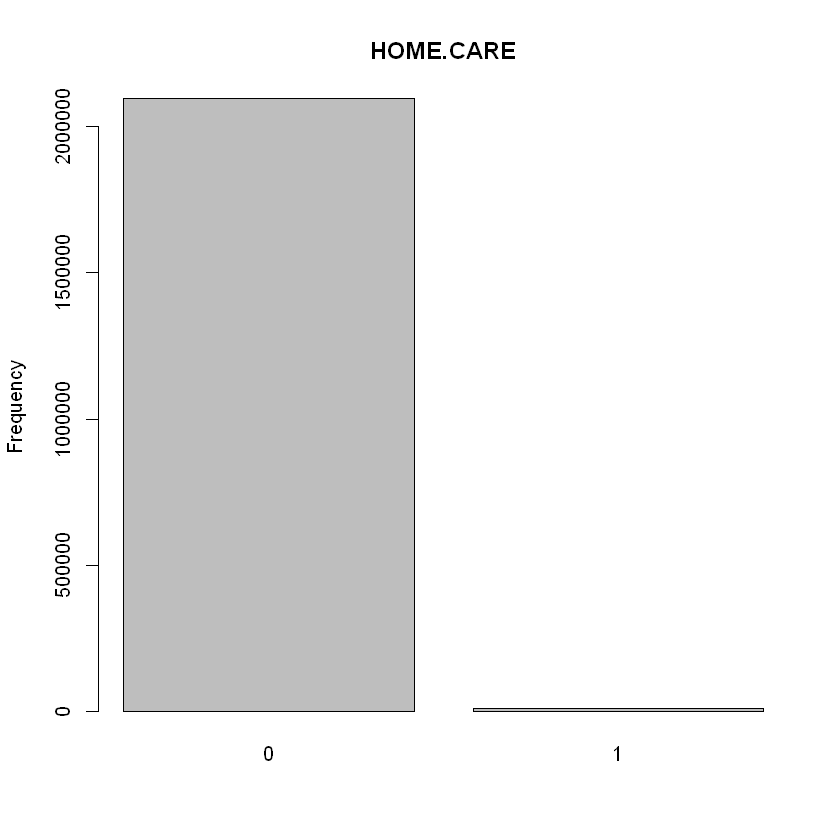

     [,1]
[1,]  0.7
[2,]  1.9


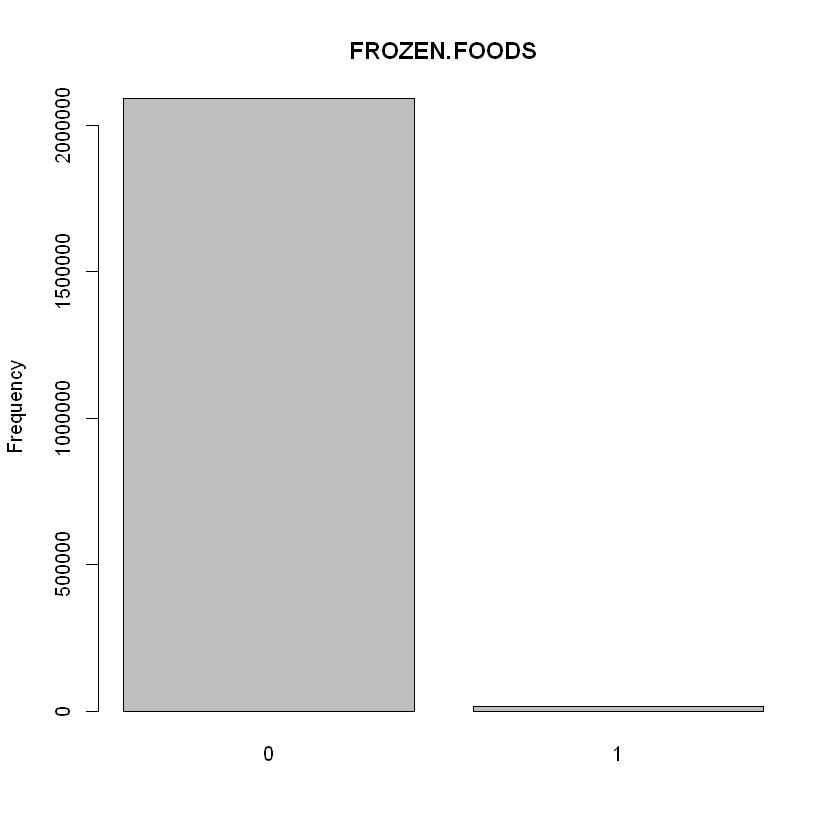

     [,1]
[1,]  0.7
[2,]  1.9


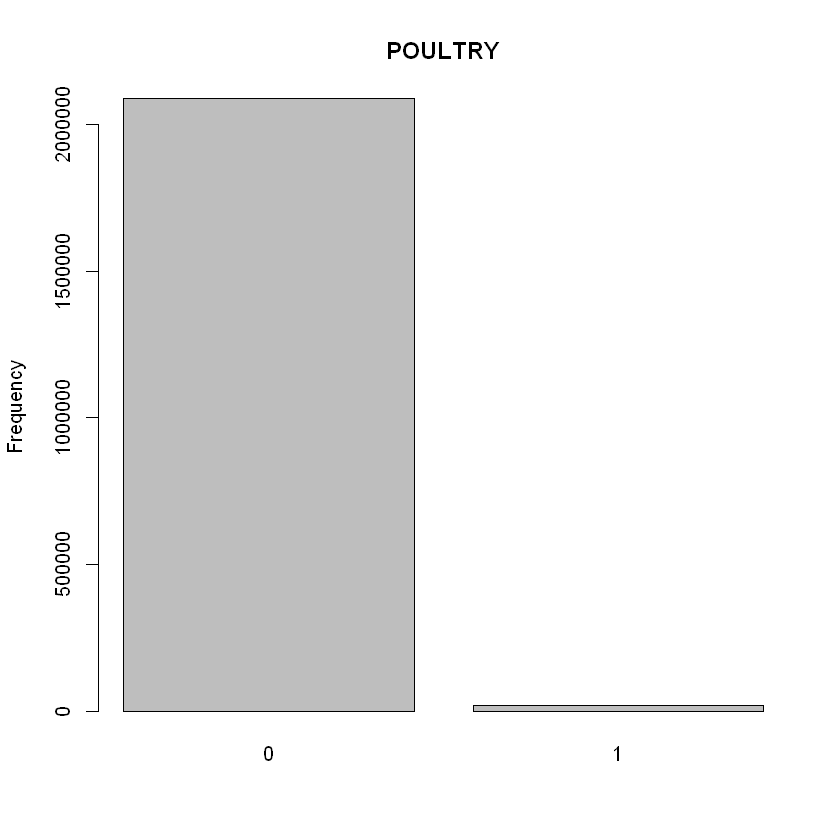

     [,1]
[1,]  0.7
[2,]  1.9


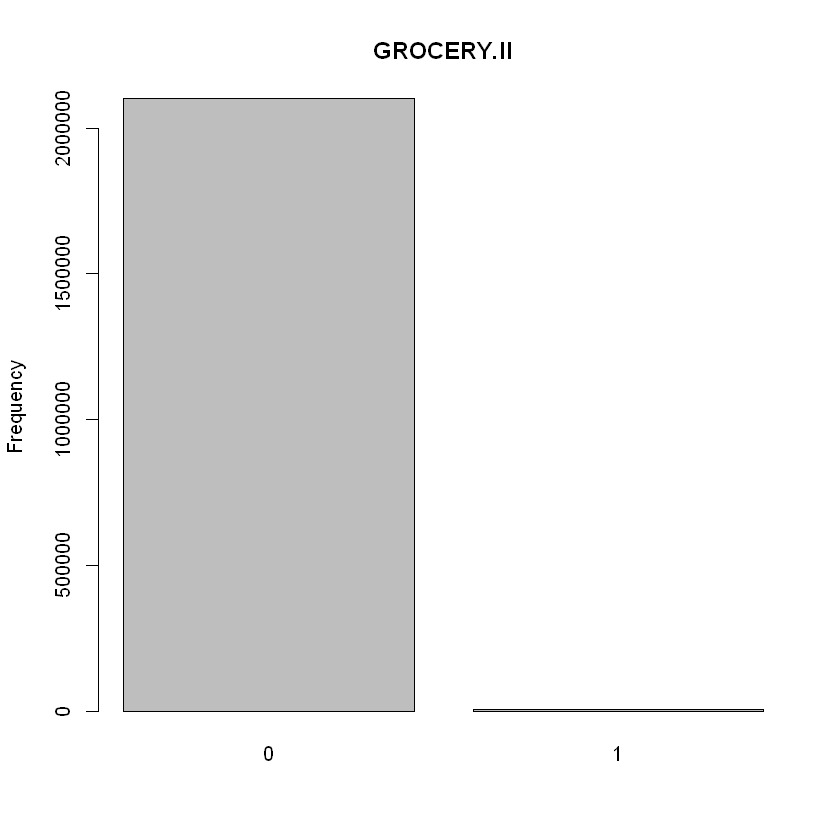

     [,1]
[1,]  0.7
[2,]  1.9


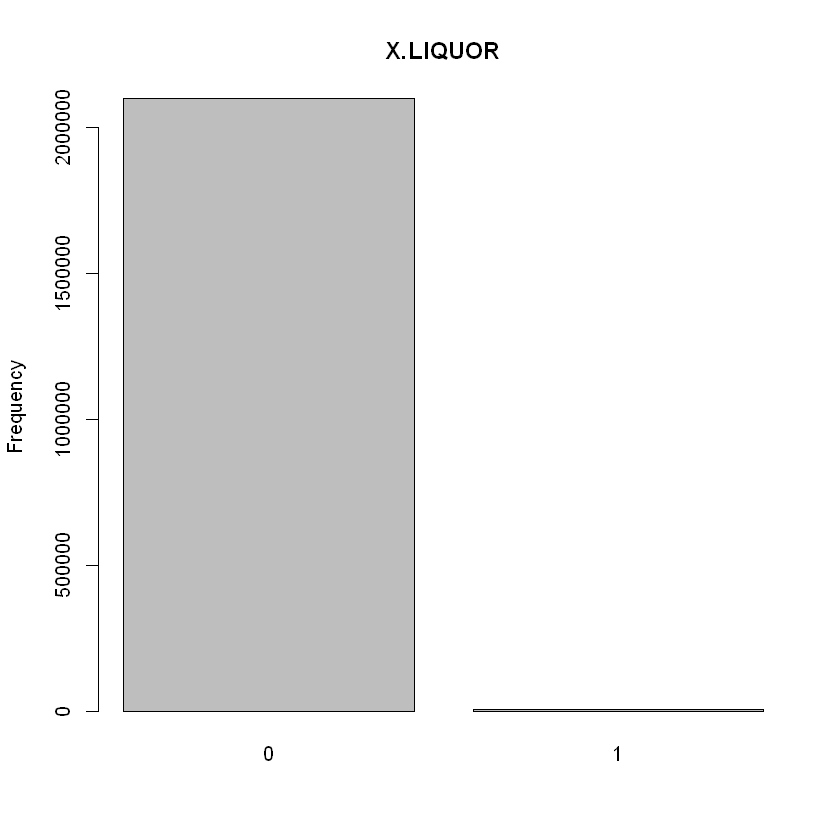

     [,1]
[1,]  0.7
[2,]  1.9


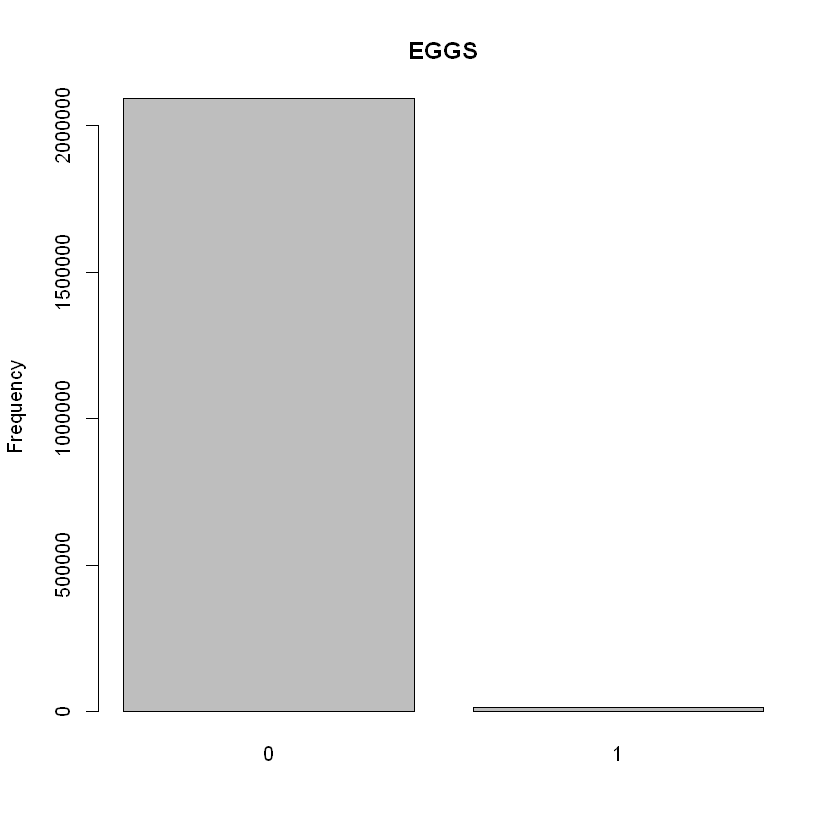

     [,1]
[1,]  0.7
[2,]  1.9


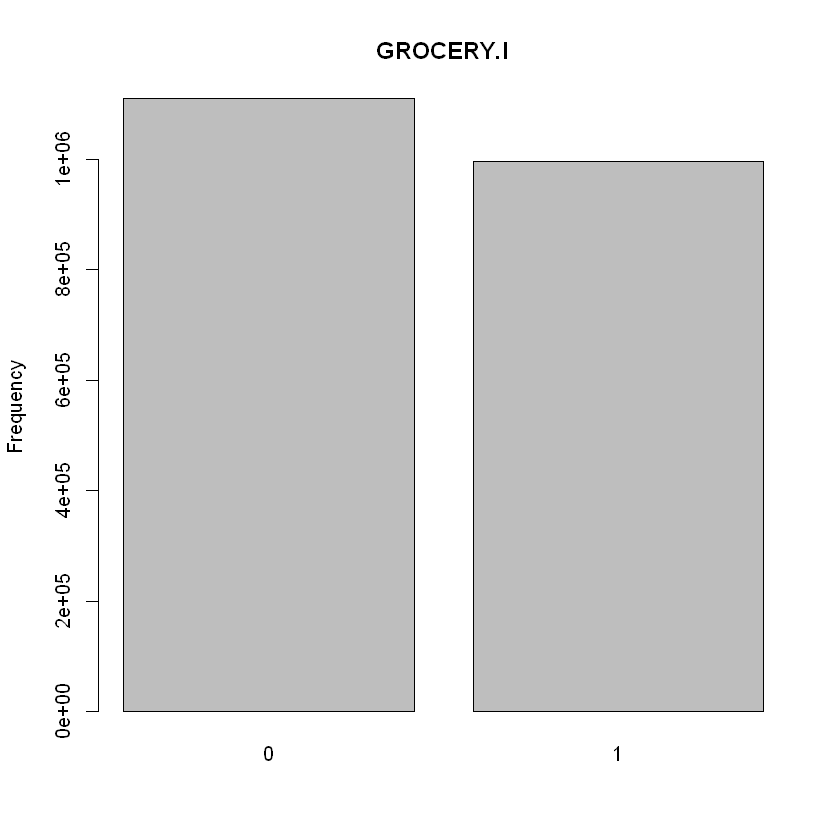

     [,1]
[1,]  0.7
[2,]  1.9


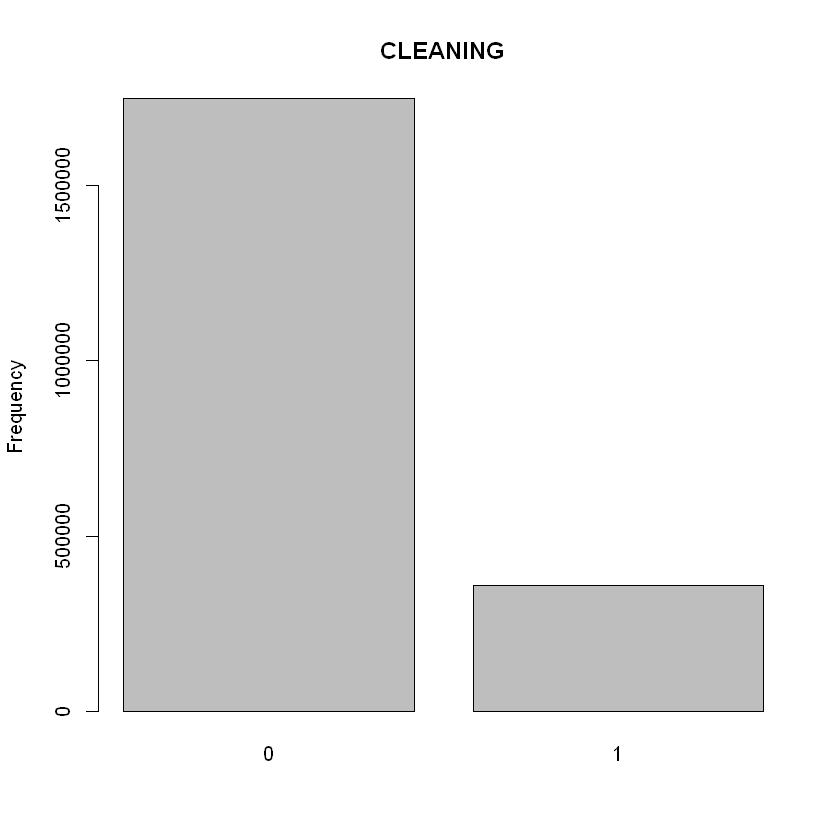

     [,1]
[1,]  0.7
[2,]  1.9


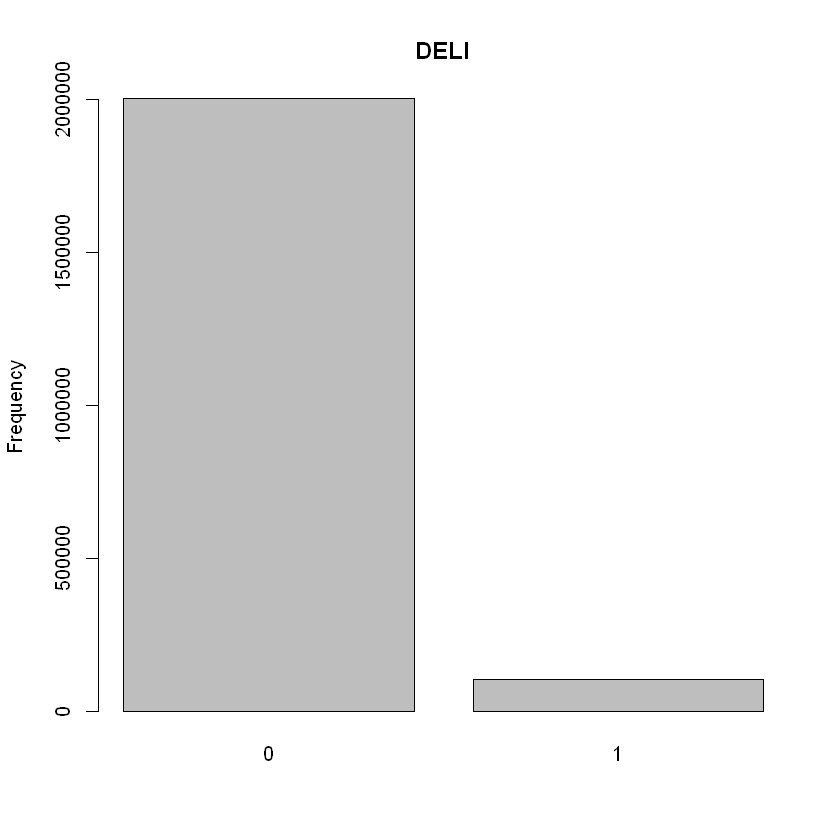

     [,1]
[1,]  0.7
[2,]  1.9


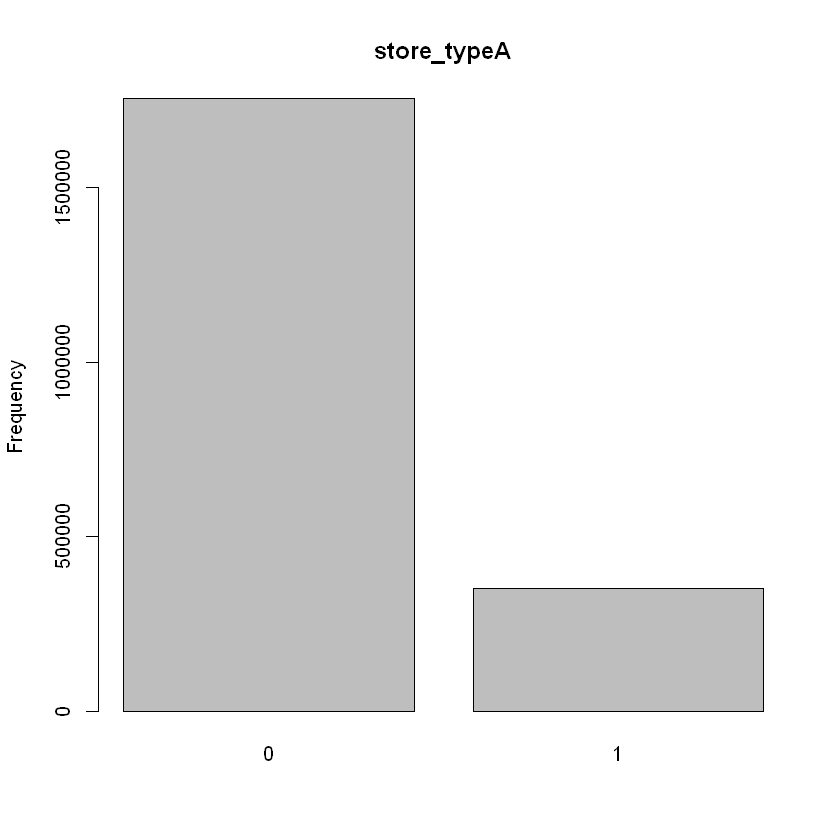

     [,1]
[1,]  0.7
[2,]  1.9


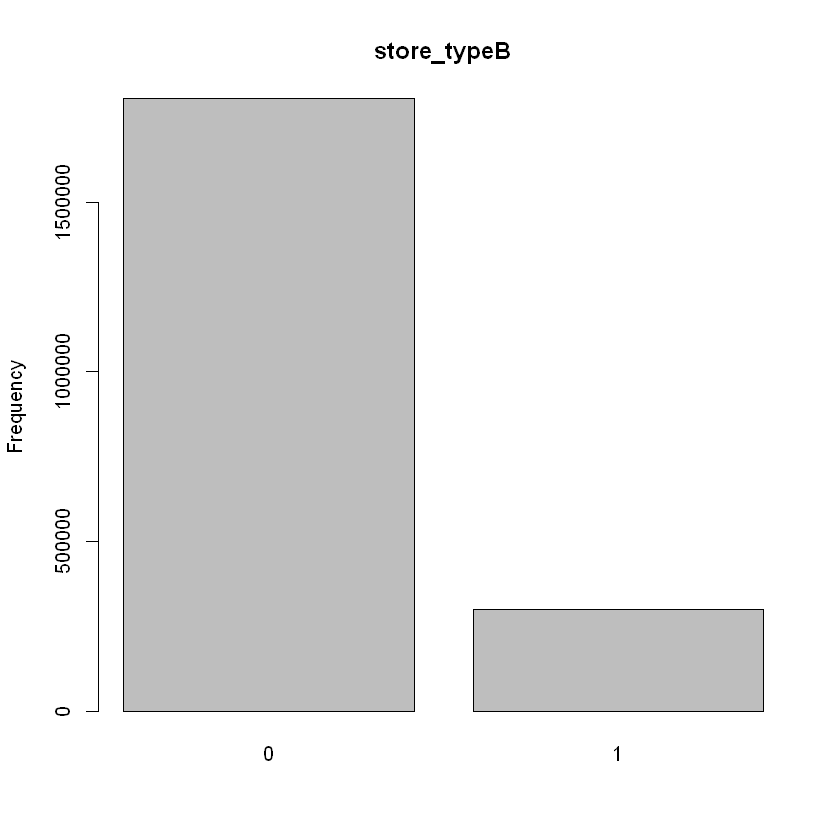

     [,1]
[1,]  0.7
[2,]  1.9


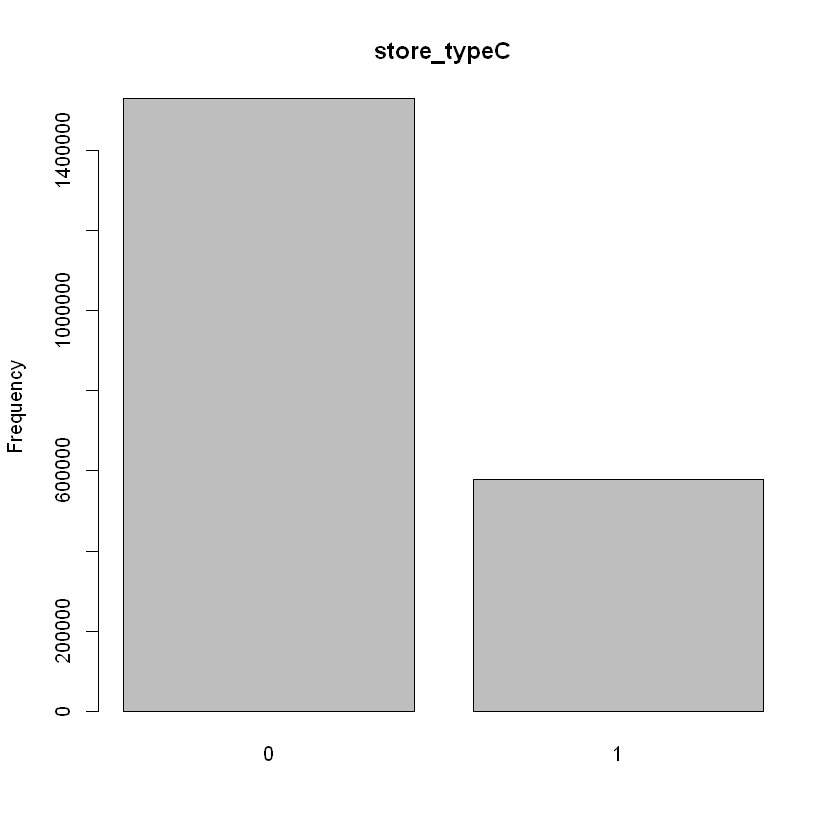

     [,1]
[1,]  0.7
[2,]  1.9


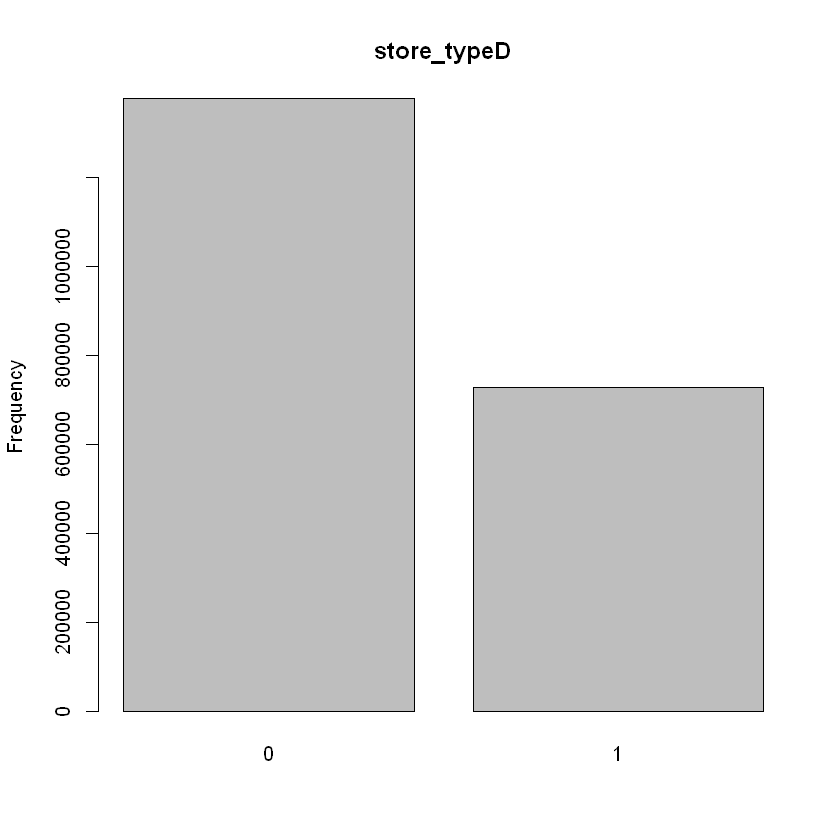

     [,1]
[1,]  0.7
[2,]  1.9


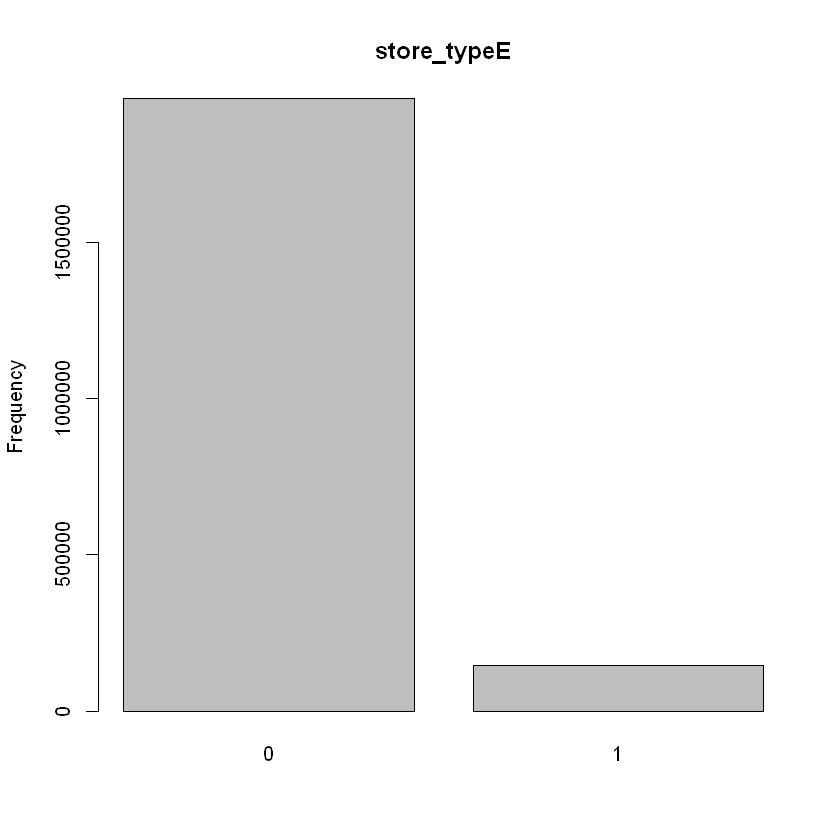

     [,1]
[1,]  0.7
[2,]  1.9


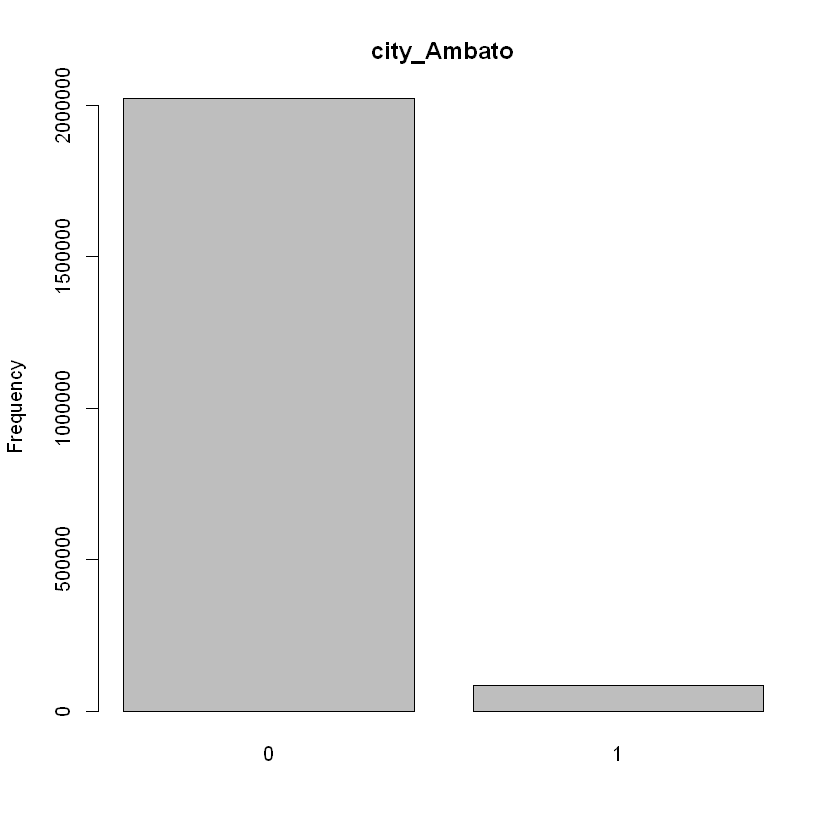

     [,1]
[1,]  0.7
[2,]  1.9


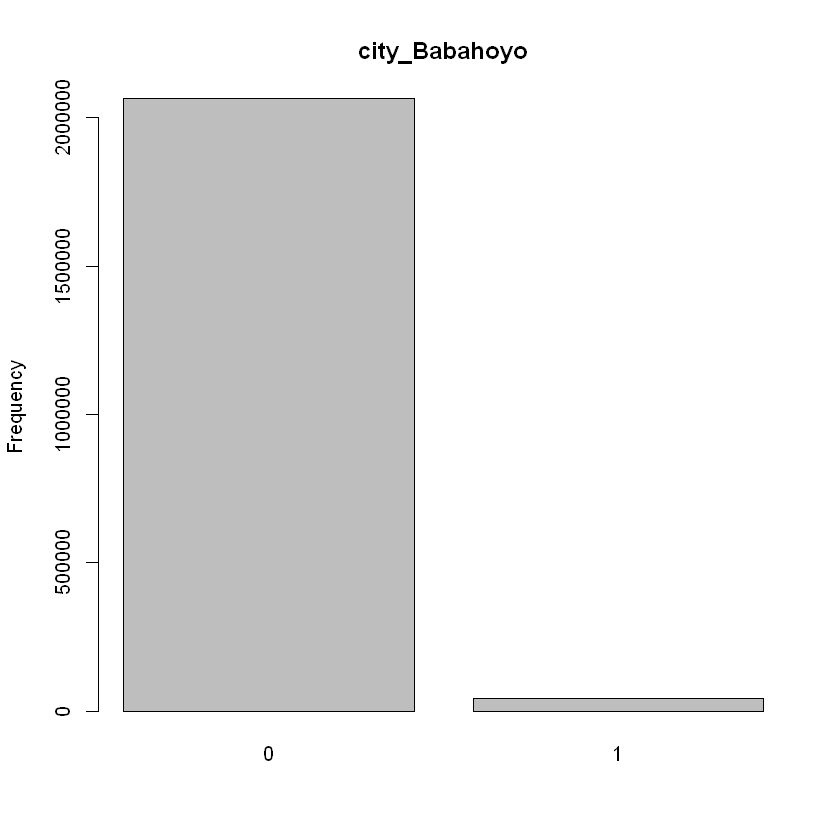

     [,1]
[1,]  0.7
[2,]  1.9


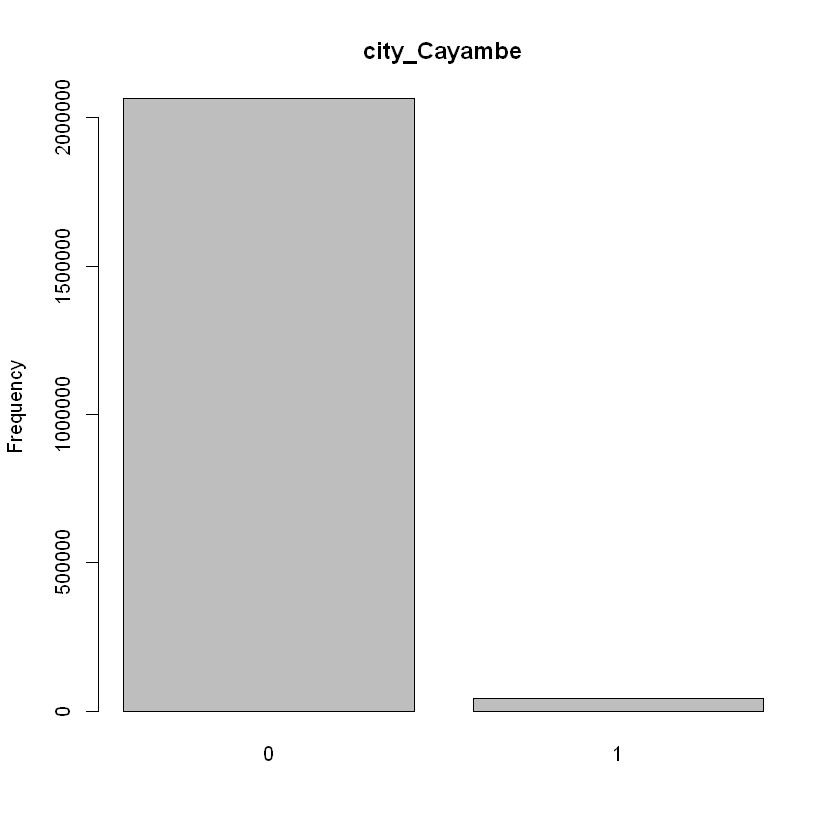

     [,1]
[1,]  0.7
[2,]  1.9


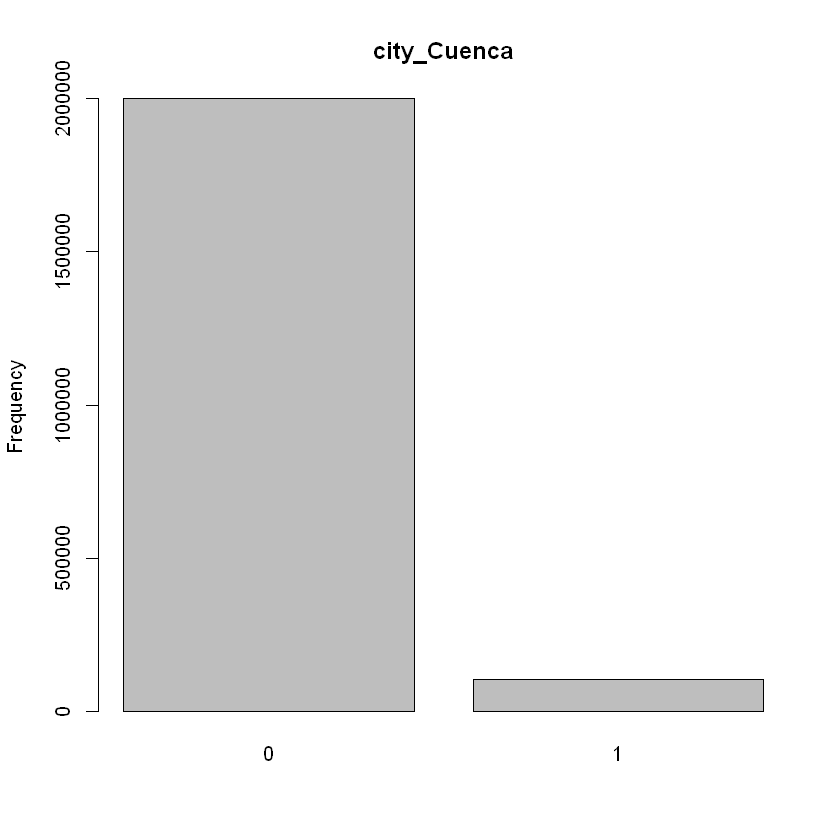

     [,1]
[1,]  0.7
[2,]  1.9


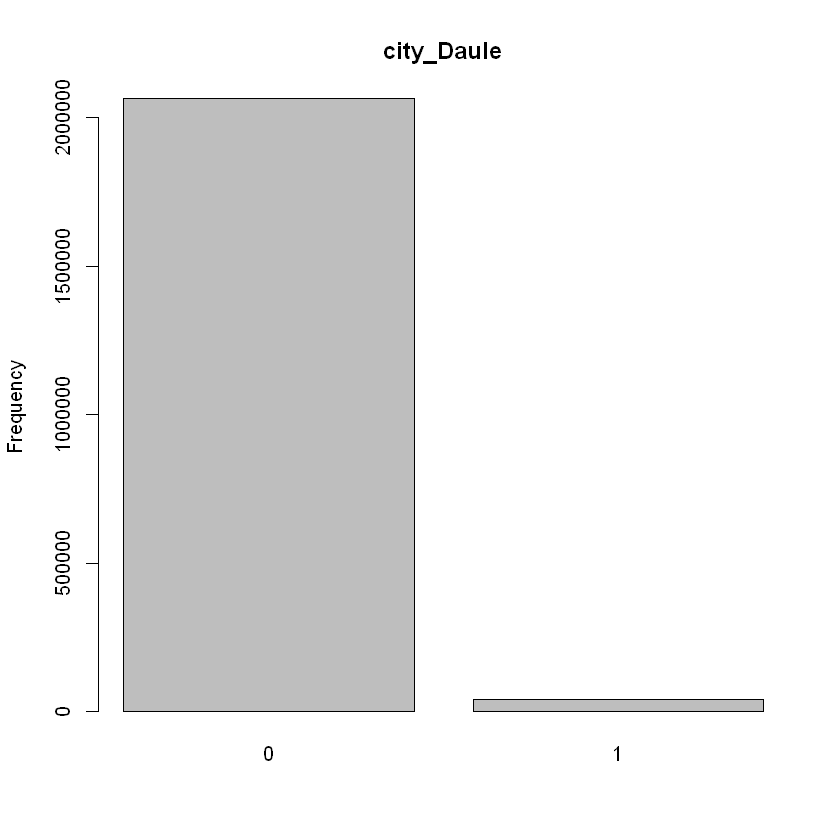

     [,1]
[1,]  0.7
[2,]  1.9


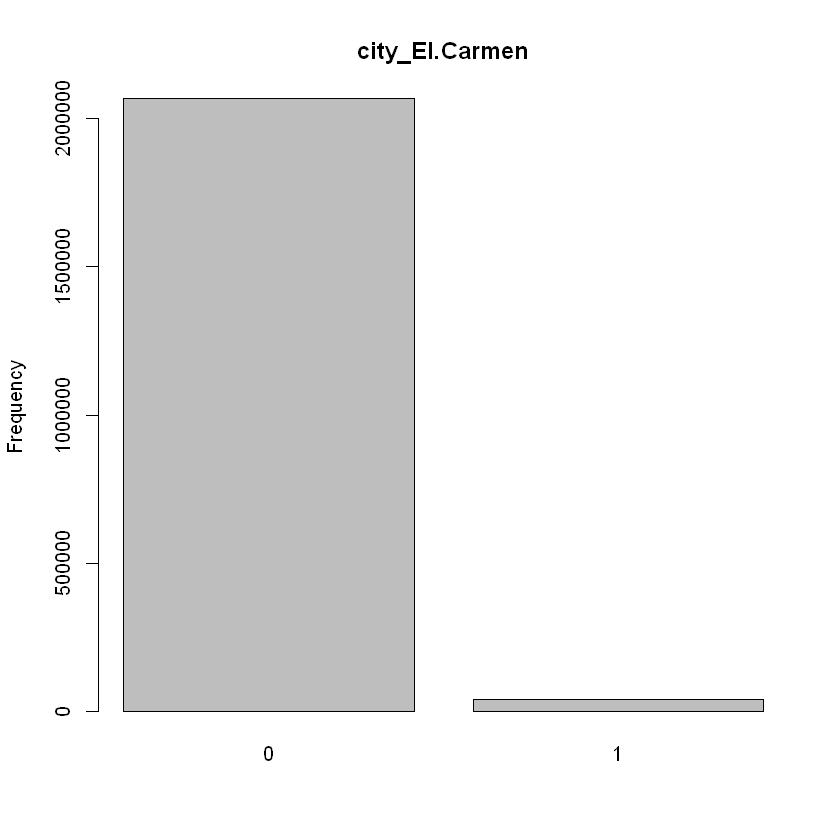

     [,1]
[1,]  0.7
[2,]  1.9


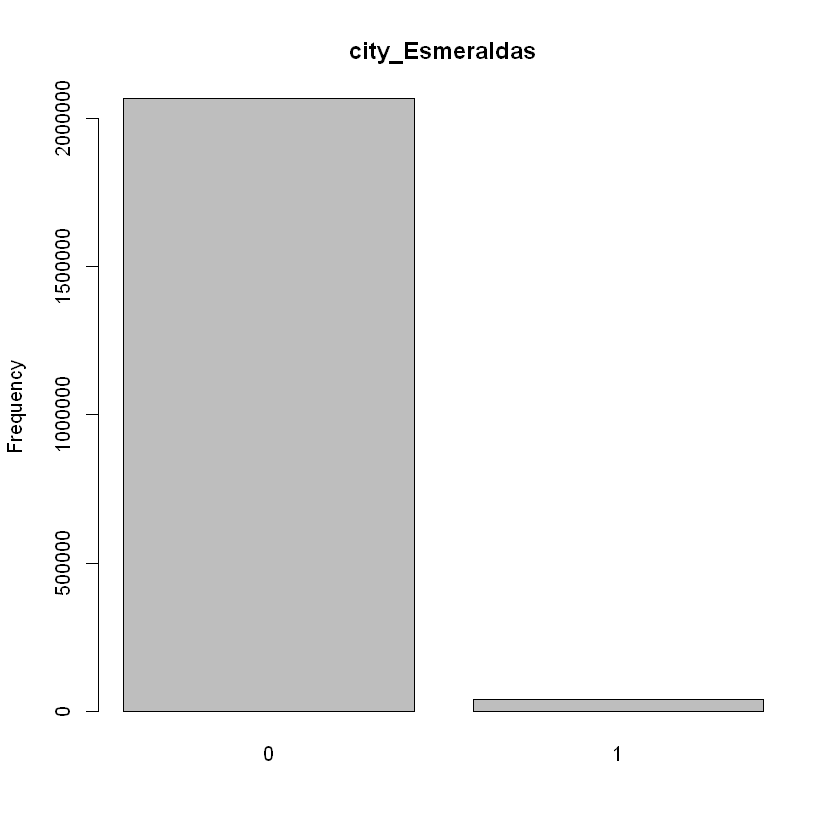

     [,1]
[1,]  0.7
[2,]  1.9


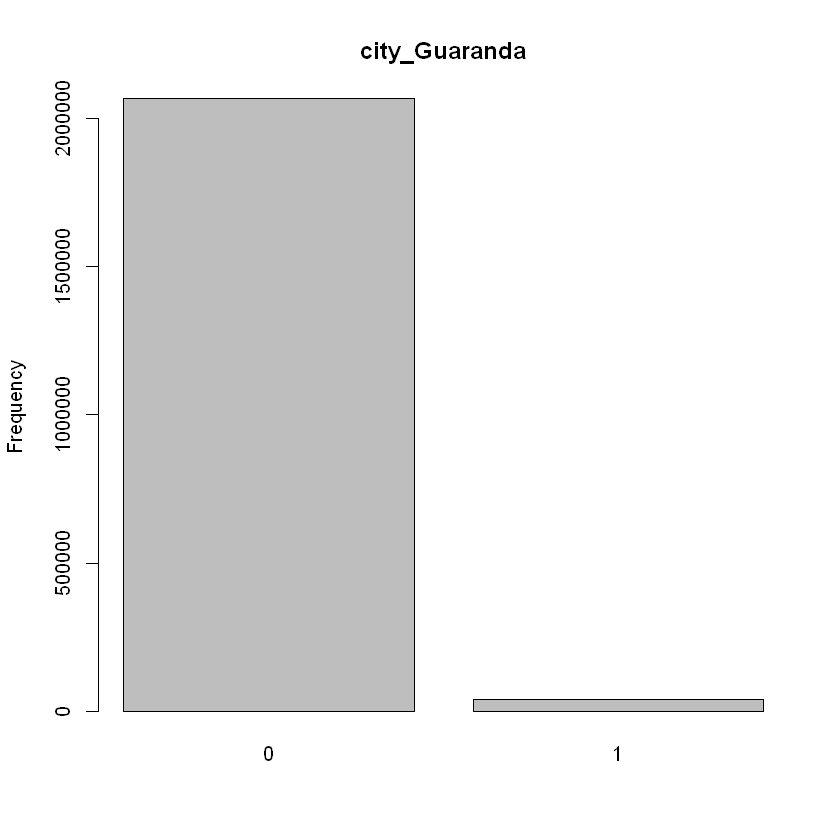

     [,1]
[1,]  0.7
[2,]  1.9


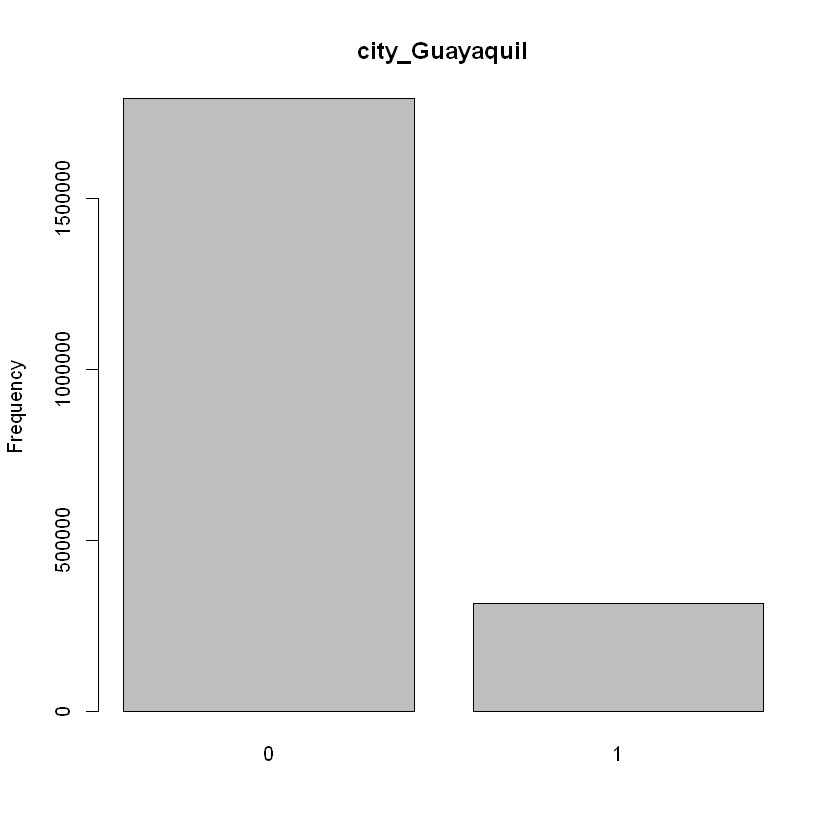

     [,1]
[1,]  0.7
[2,]  1.9


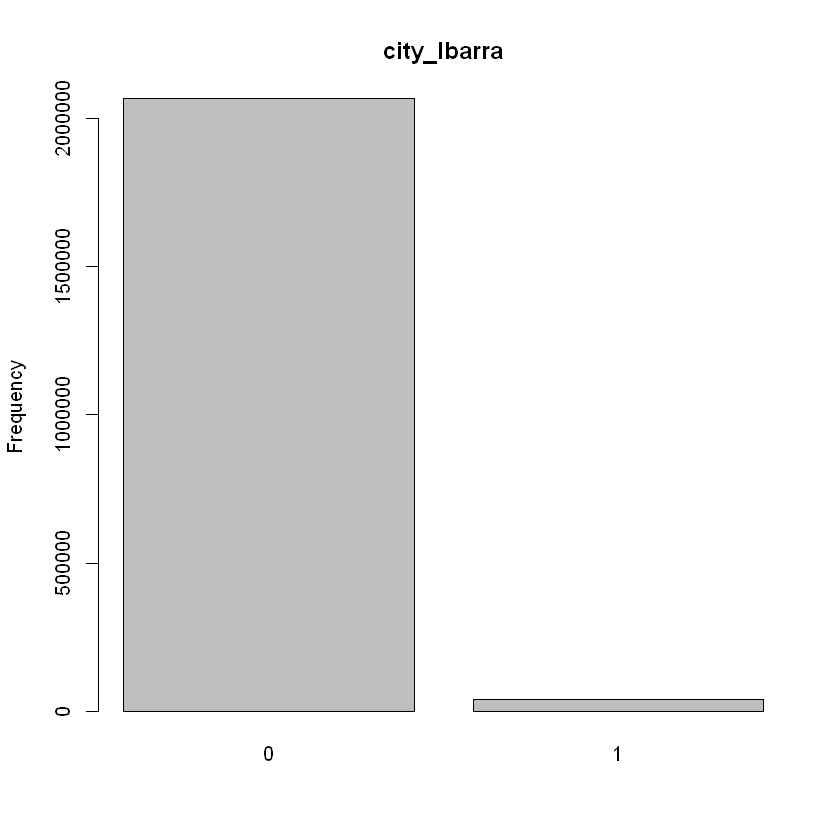

     [,1]
[1,]  0.7
[2,]  1.9


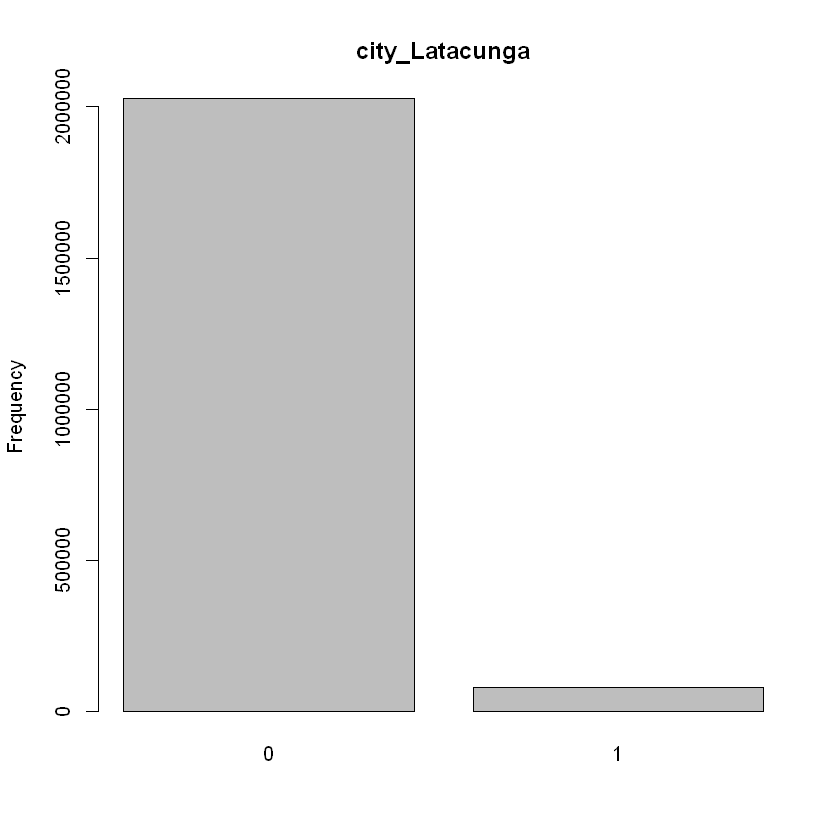

     [,1]
[1,]  0.7
[2,]  1.9


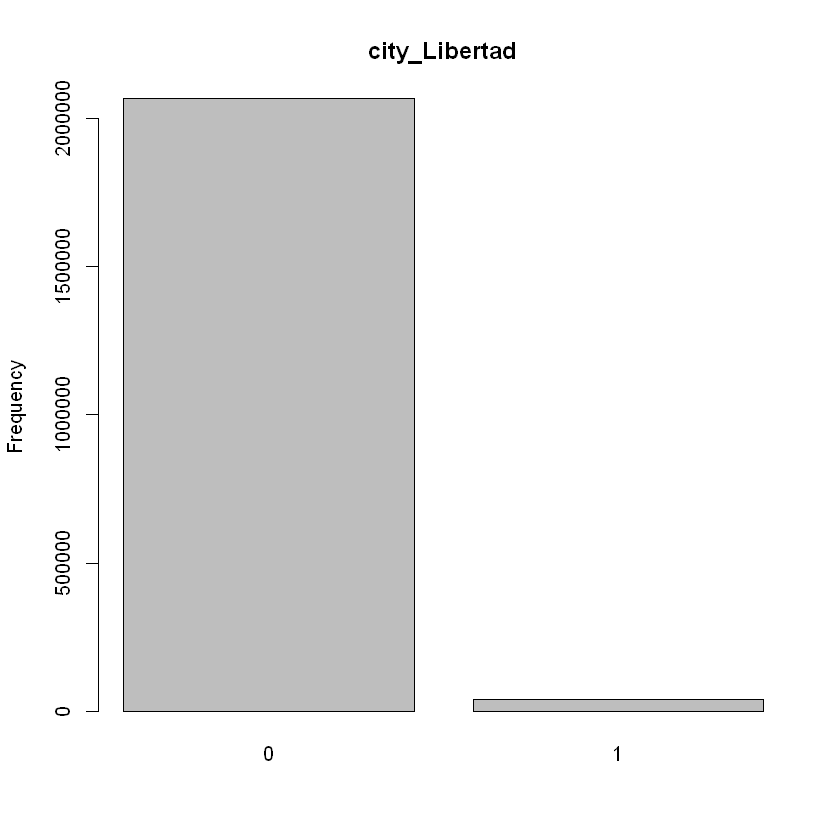

     [,1]
[1,]  0.7
[2,]  1.9


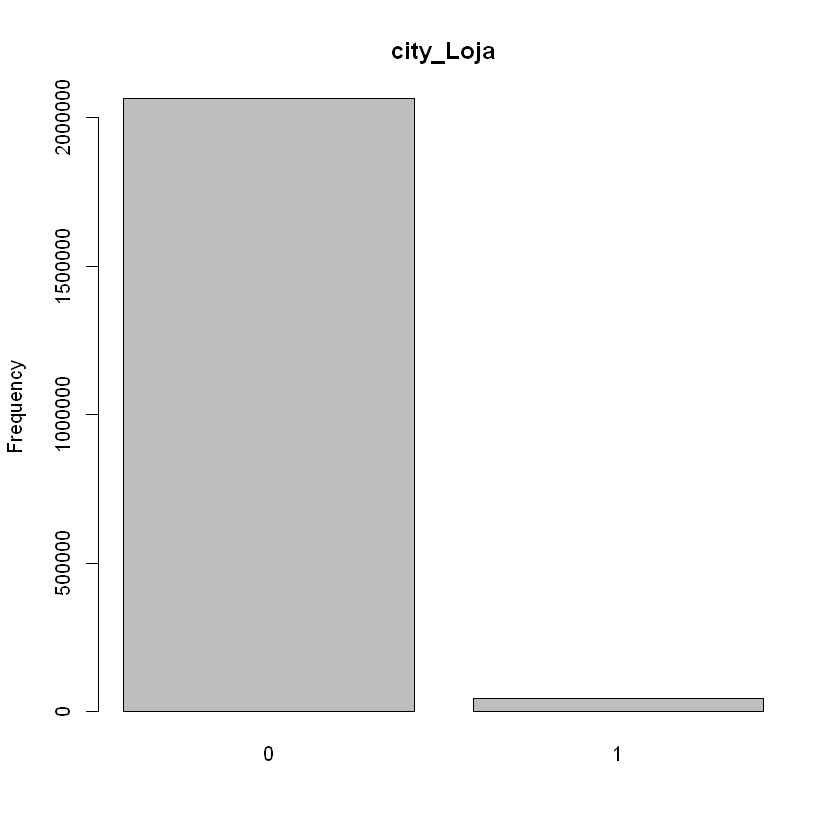

     [,1]
[1,]  0.7
[2,]  1.9


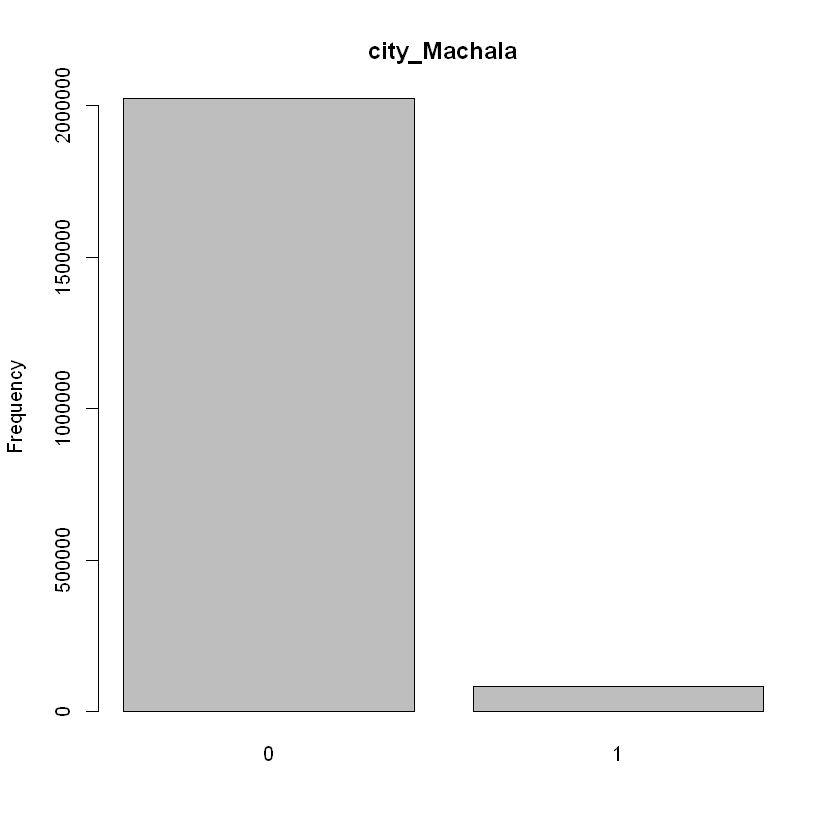

     [,1]
[1,]  0.7
[2,]  1.9


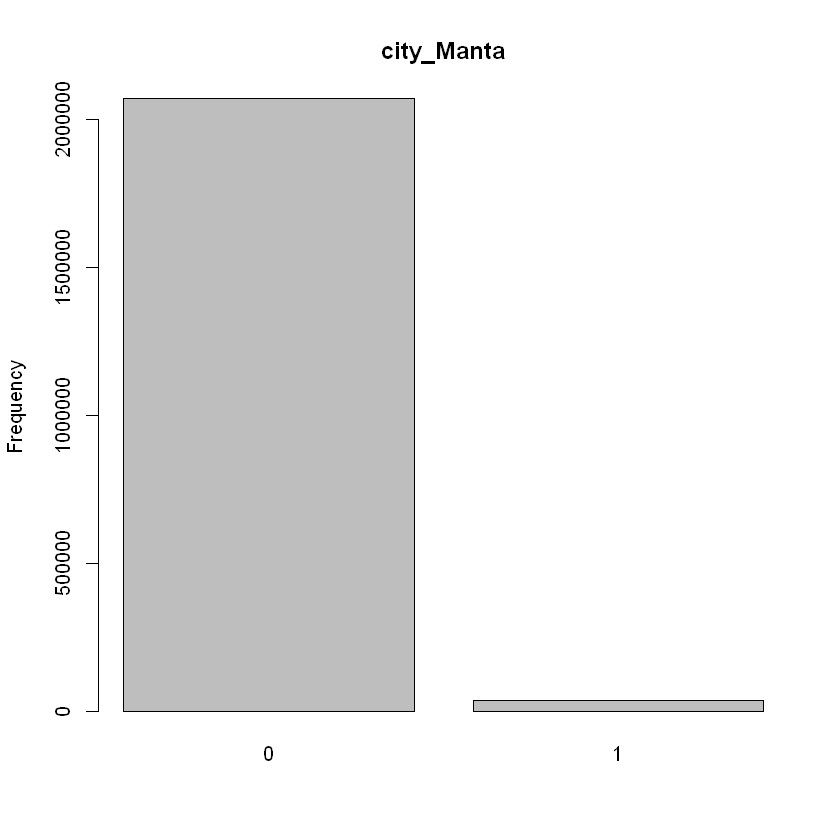

     [,1]
[1,]  0.7
[2,]  1.9


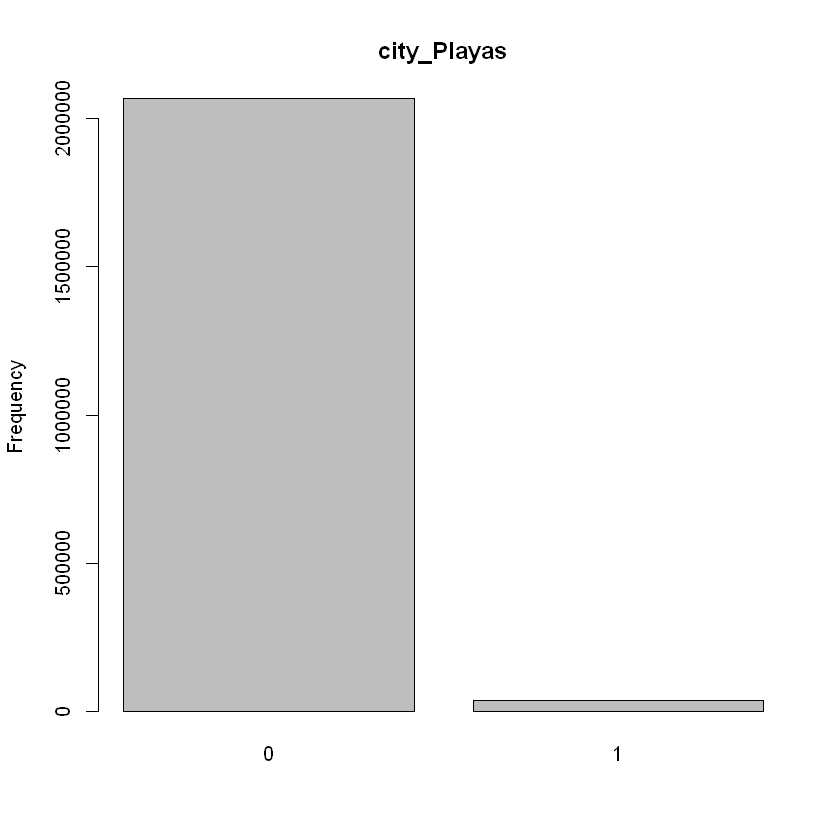

     [,1]
[1,]  0.7
[2,]  1.9


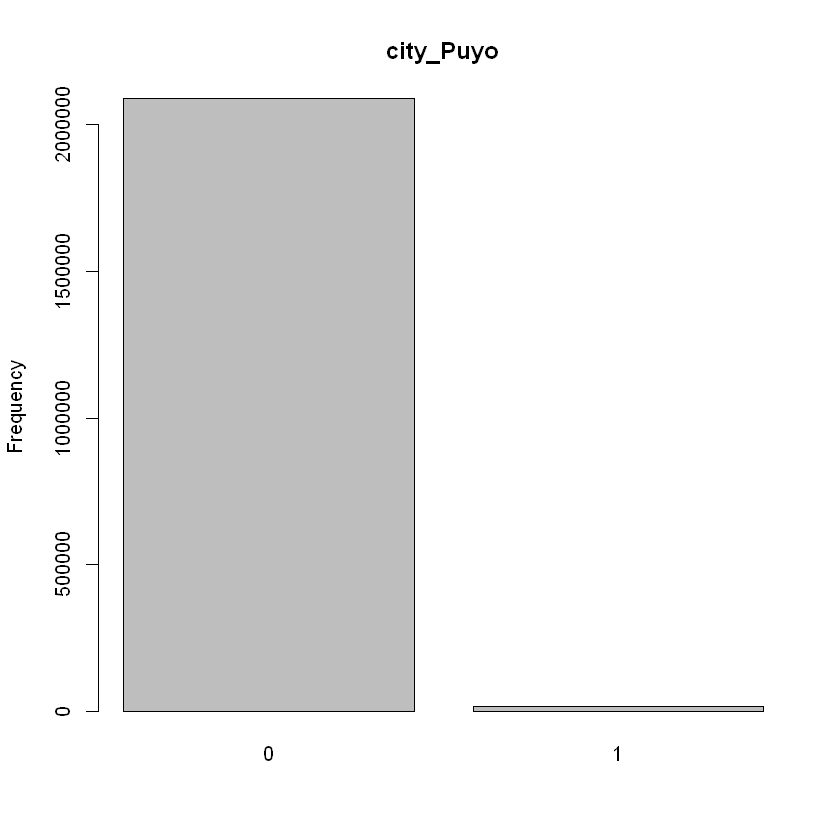

     [,1]
[1,]  0.7
[2,]  1.9


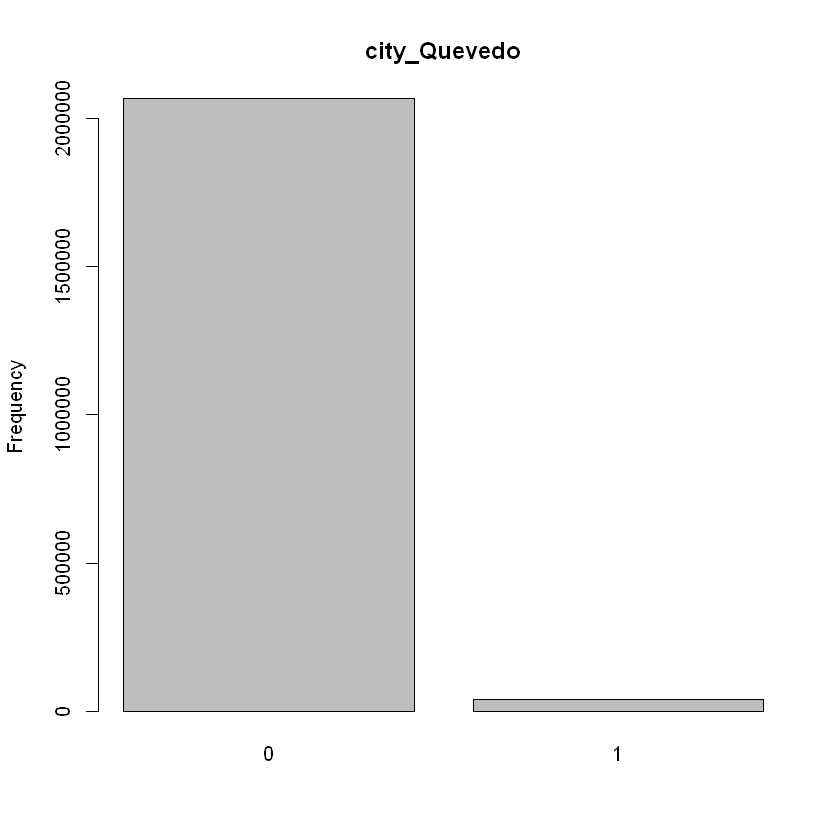

     [,1]
[1,]  0.7
[2,]  1.9


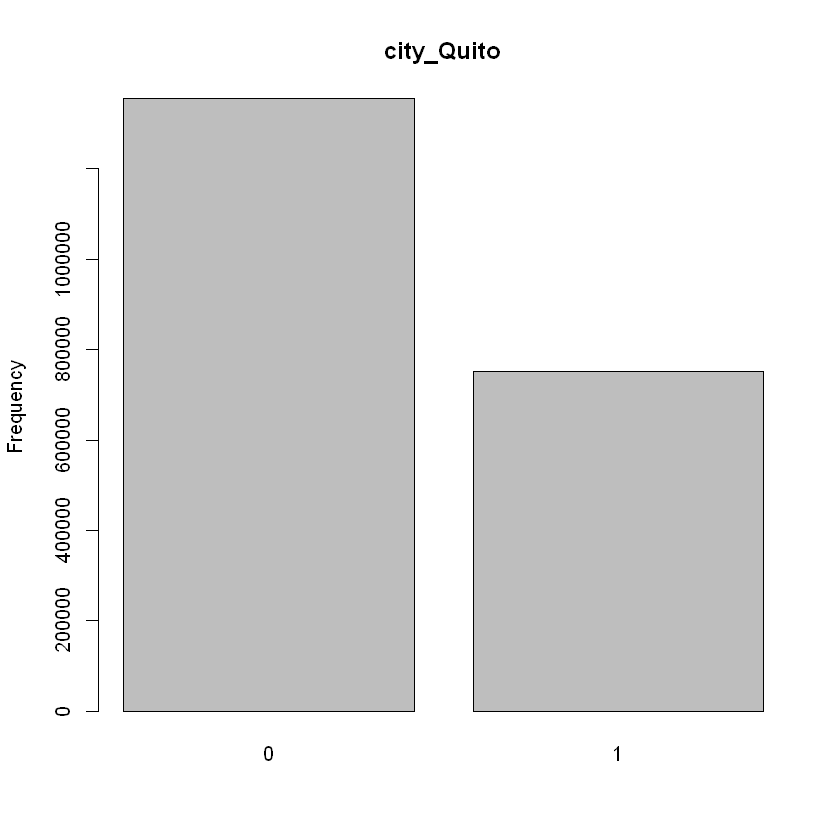

     [,1]
[1,]  0.7
[2,]  1.9


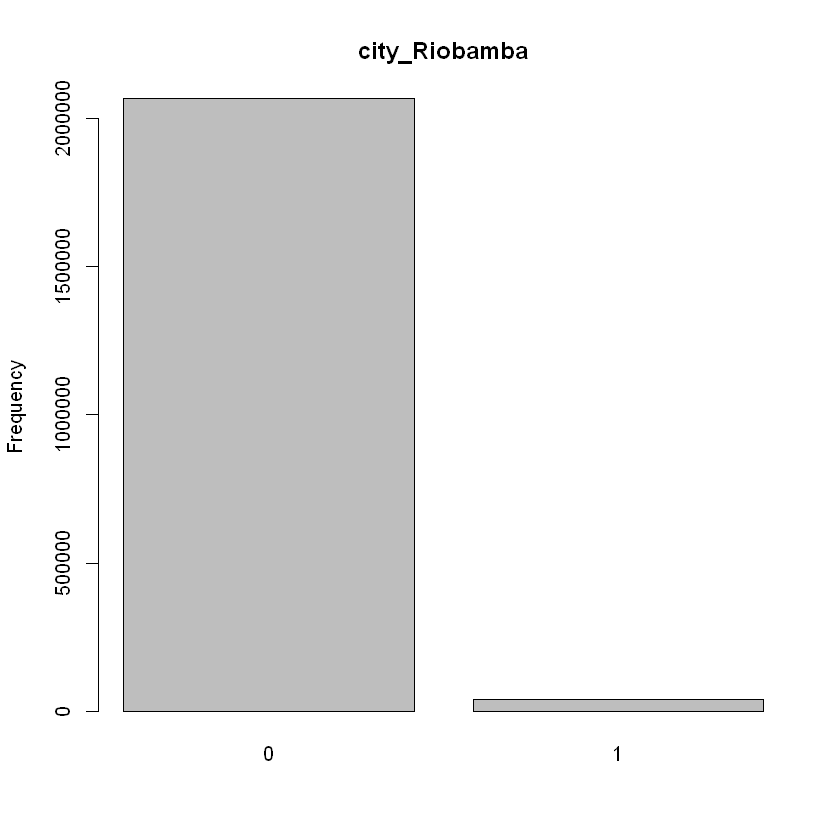

     [,1]
[1,]  0.7
[2,]  1.9


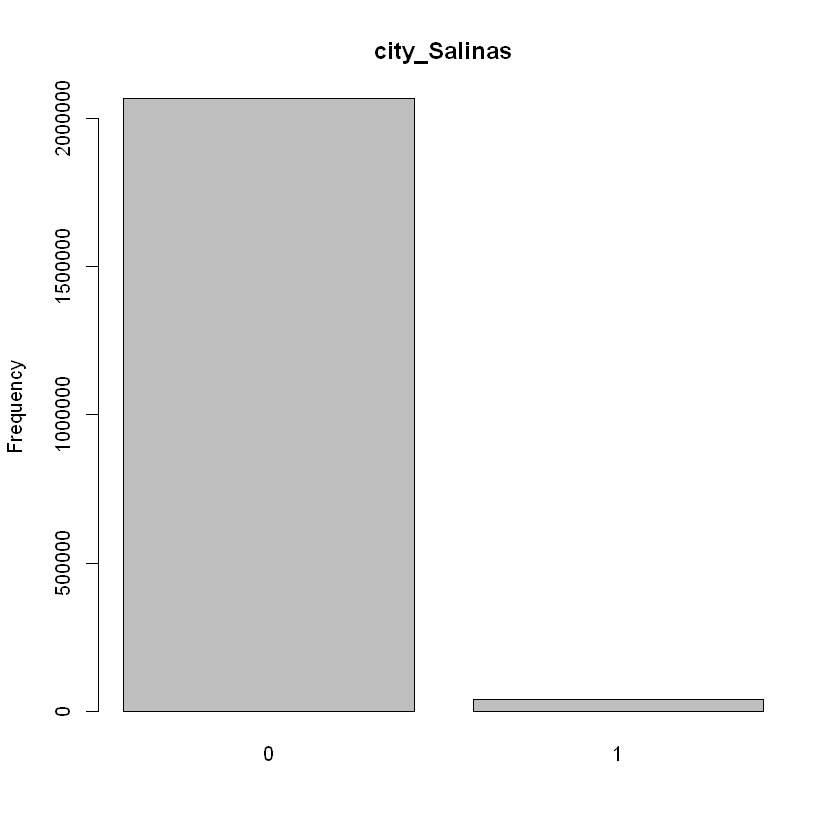

     [,1]
[1,]  0.7
[2,]  1.9


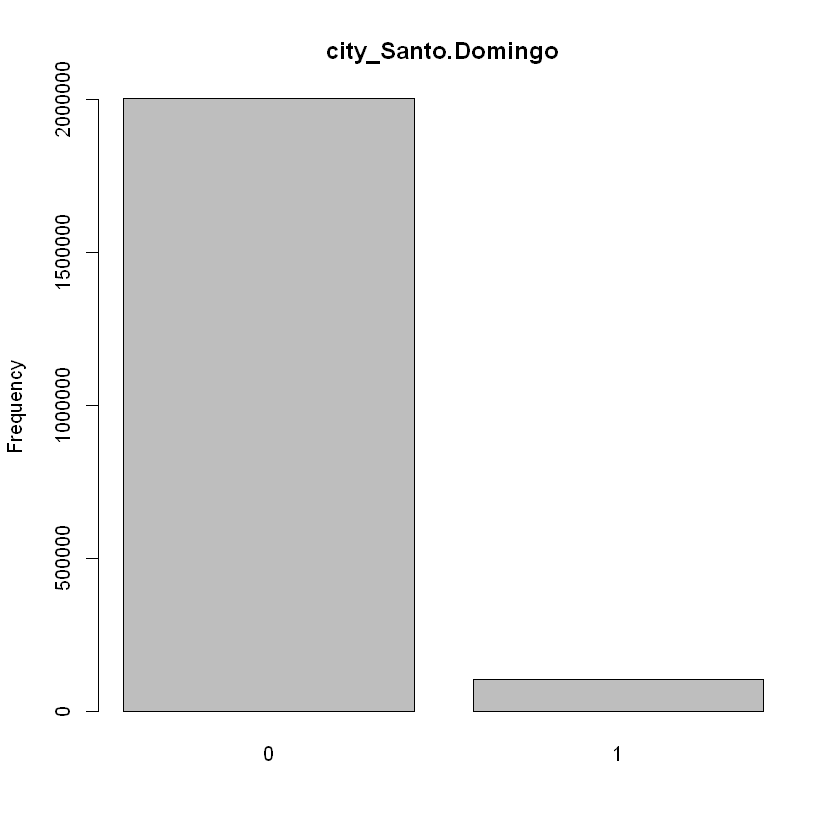

     [,1]
[1,]  0.7
[2,]  1.9


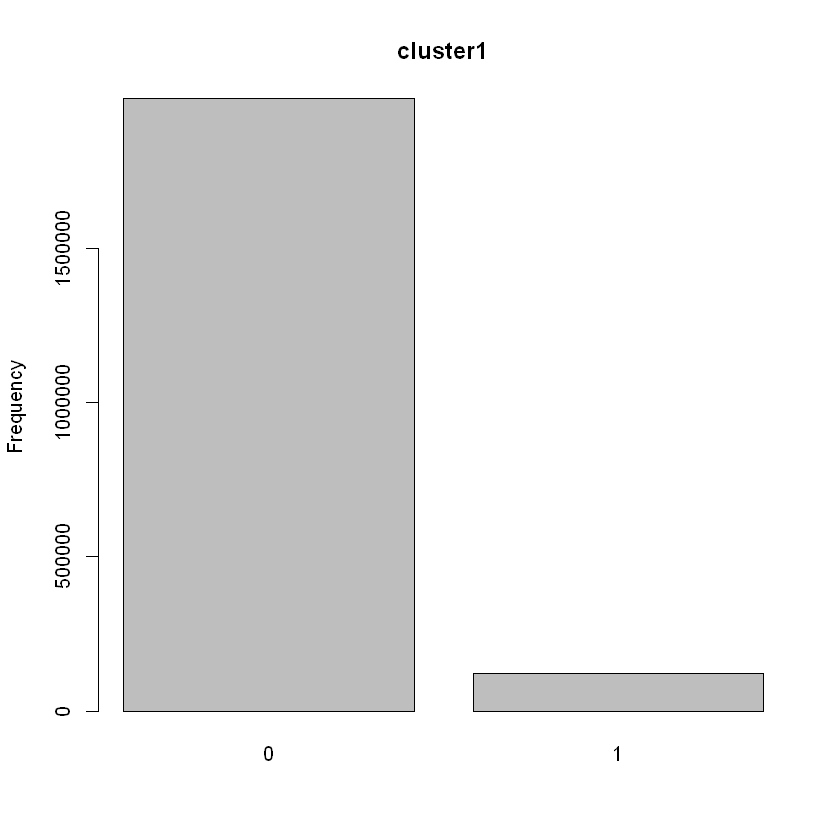

     [,1]
[1,]  0.7
[2,]  1.9


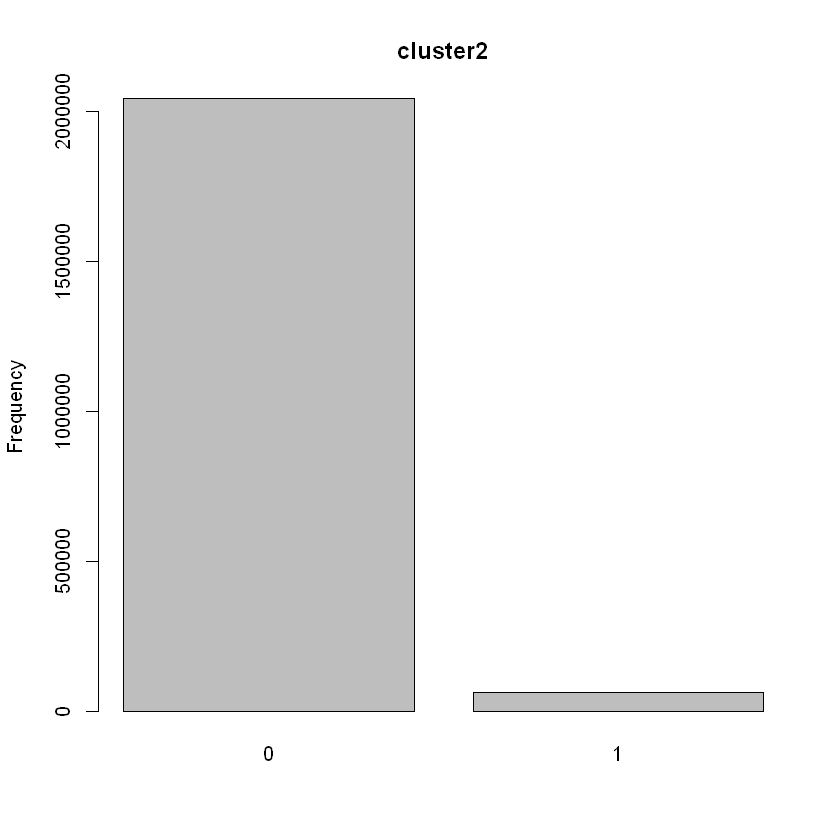

     [,1]
[1,]  0.7
[2,]  1.9


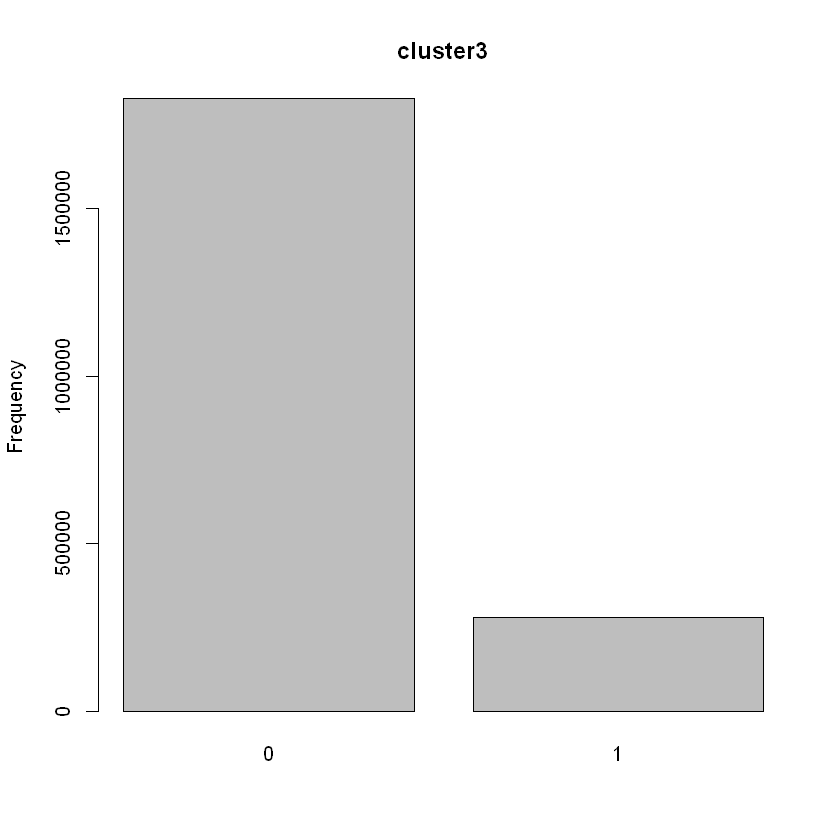

     [,1]
[1,]  0.7
[2,]  1.9


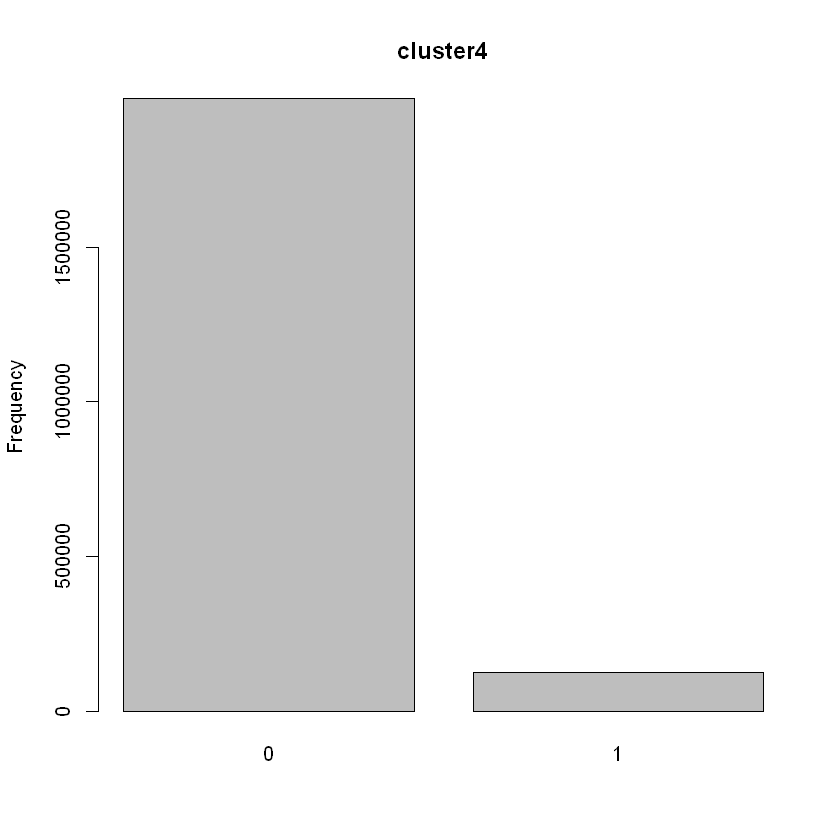

     [,1]
[1,]  0.7
[2,]  1.9


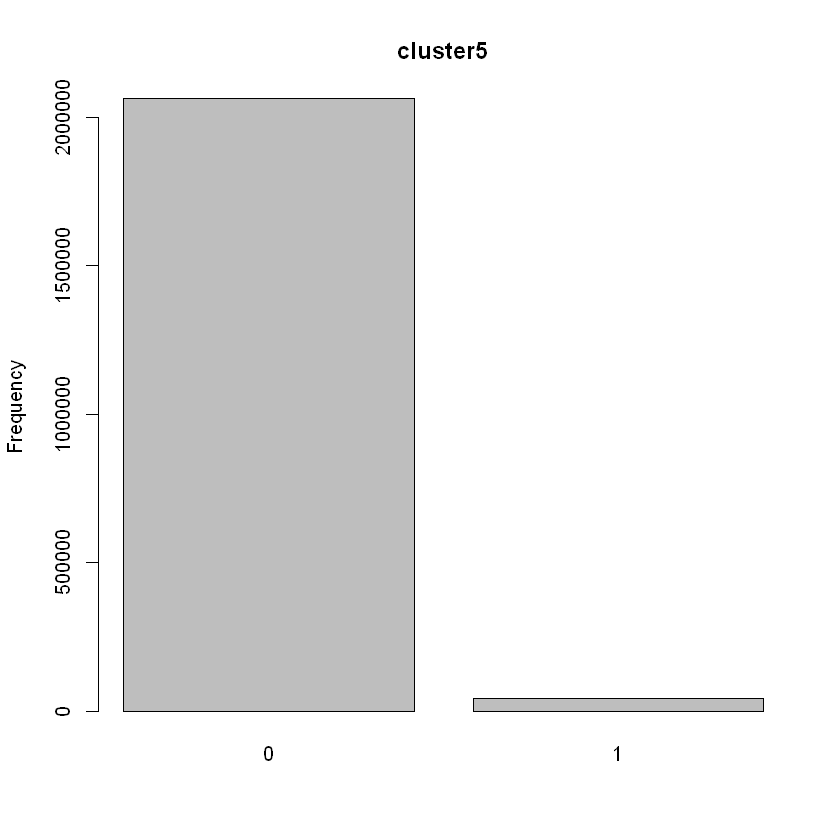

     [,1]
[1,]  0.7
[2,]  1.9


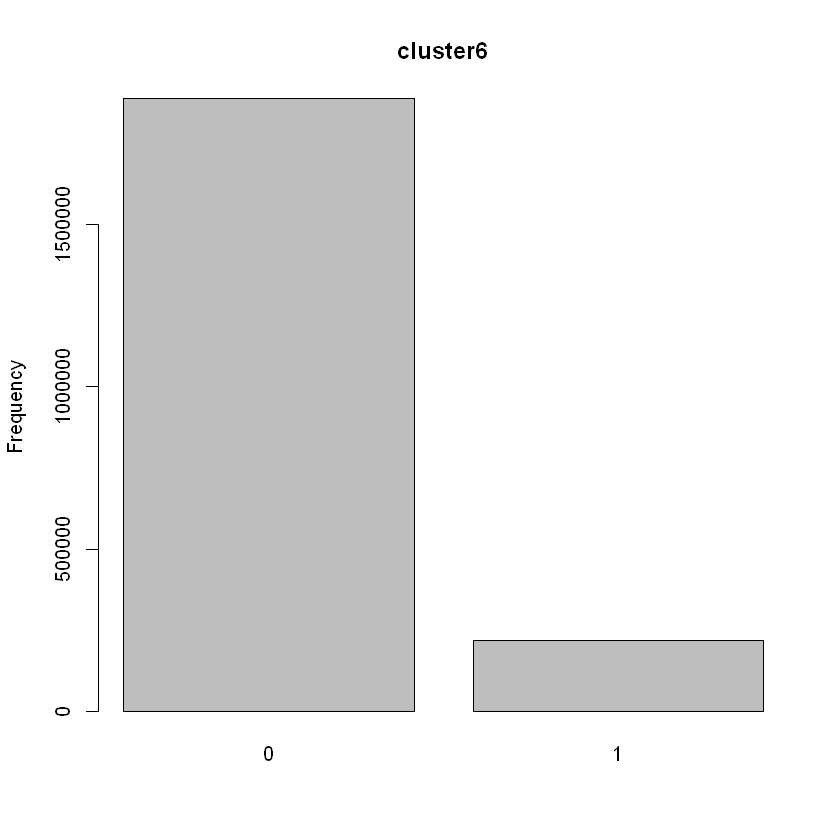

     [,1]
[1,]  0.7
[2,]  1.9


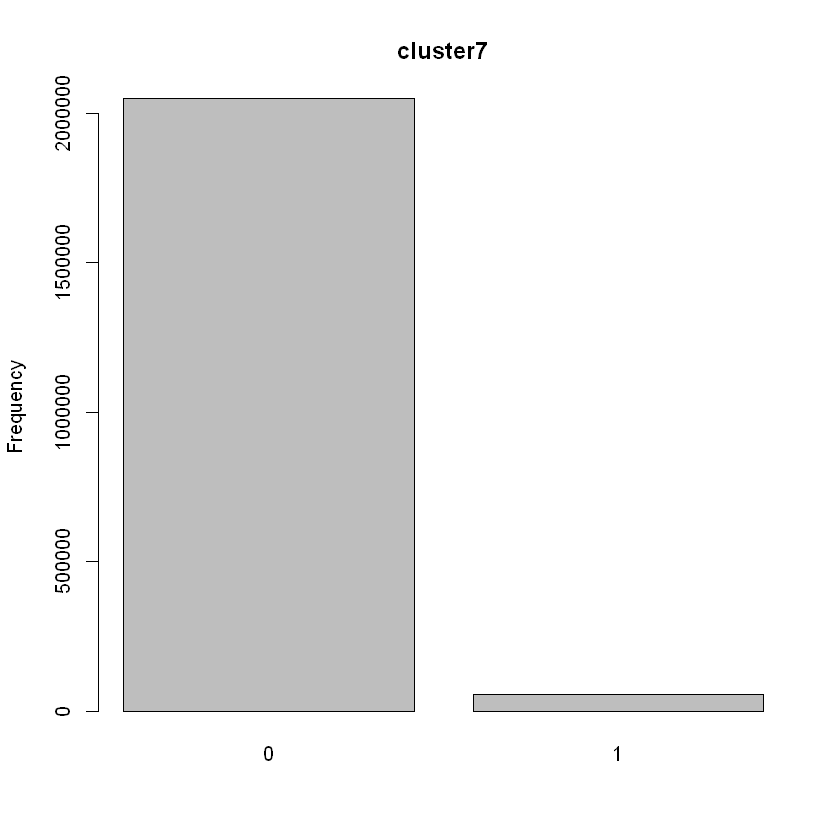

     [,1]
[1,]  0.7
[2,]  1.9


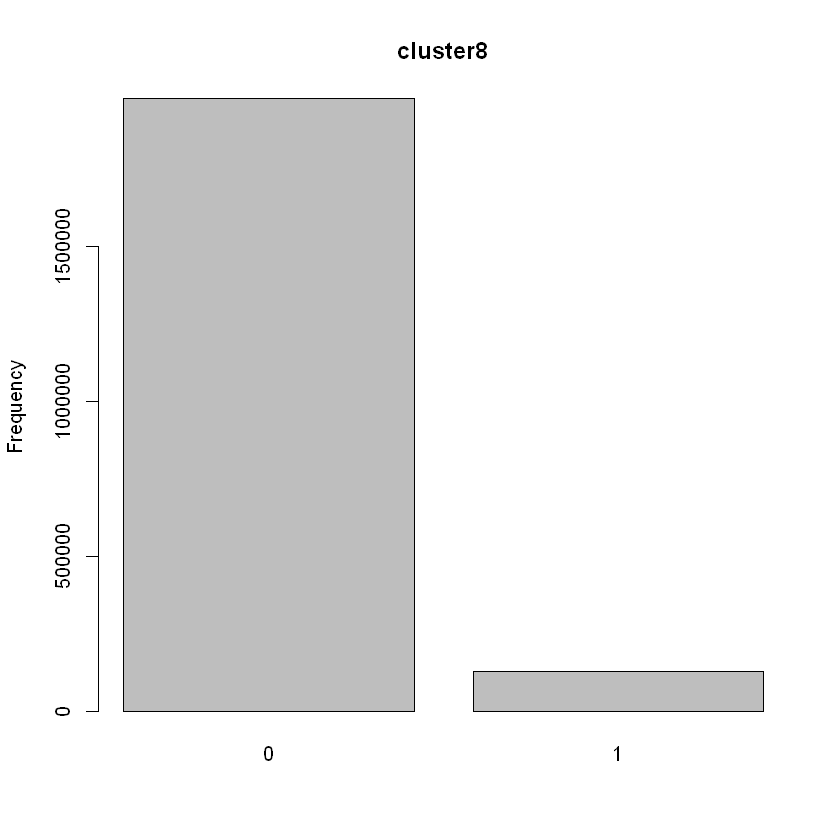

     [,1]
[1,]  0.7
[2,]  1.9


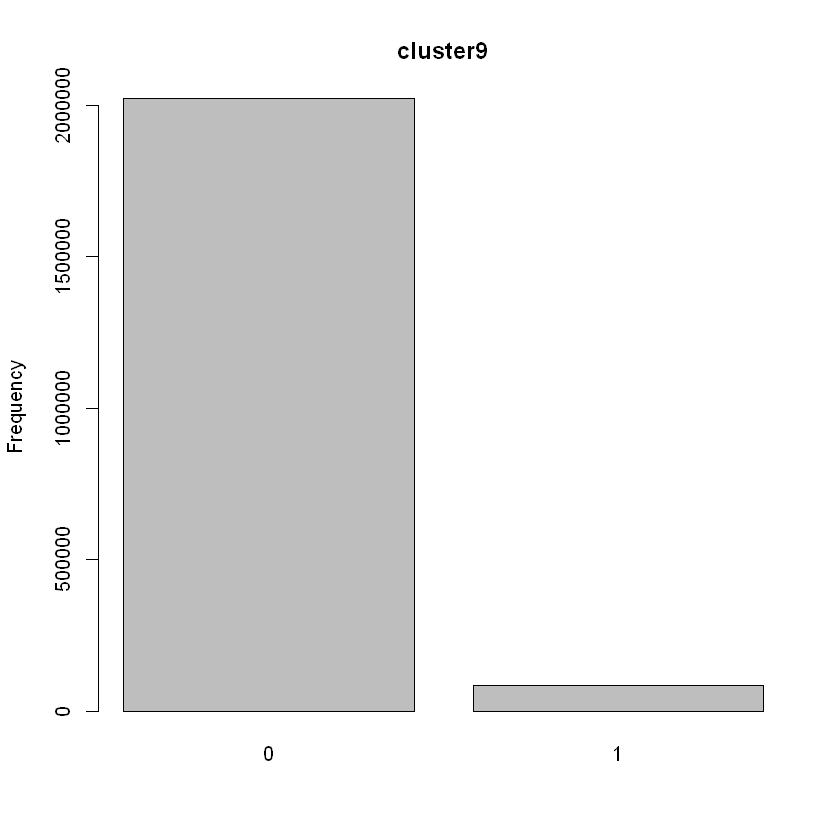

     [,1]
[1,]  0.7
[2,]  1.9


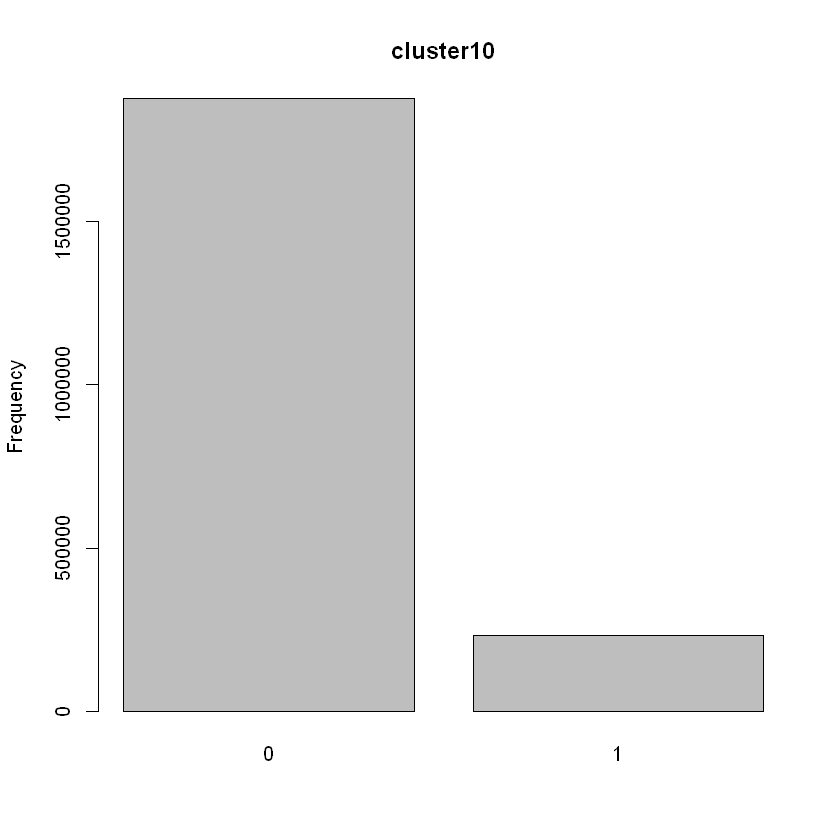

     [,1]
[1,]  0.7
[2,]  1.9


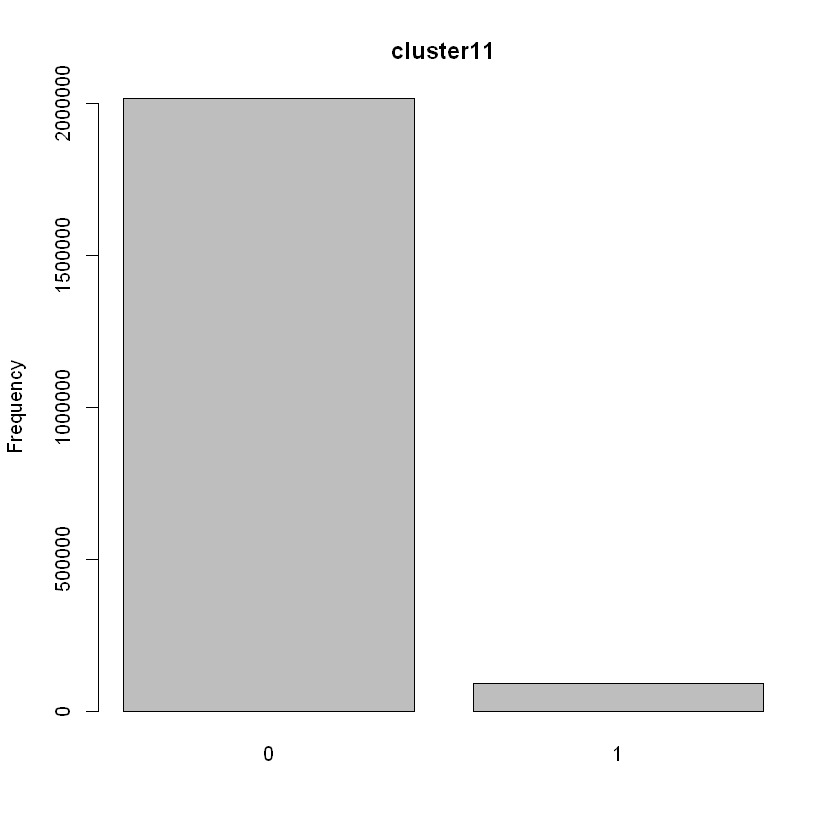

     [,1]
[1,]  0.7
[2,]  1.9


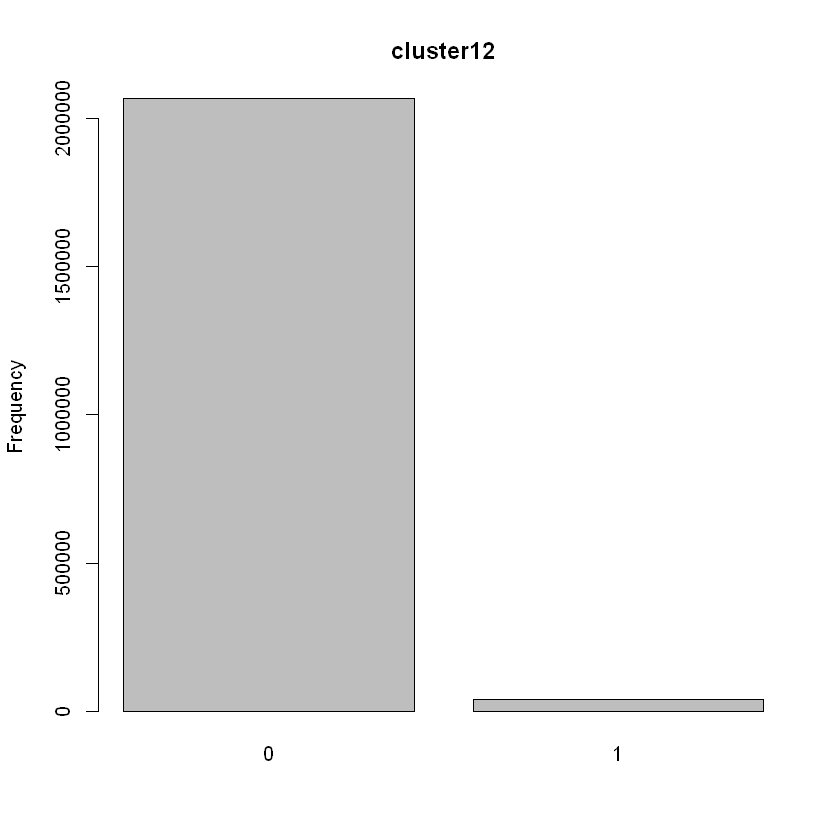

     [,1]
[1,]  0.7
[2,]  1.9


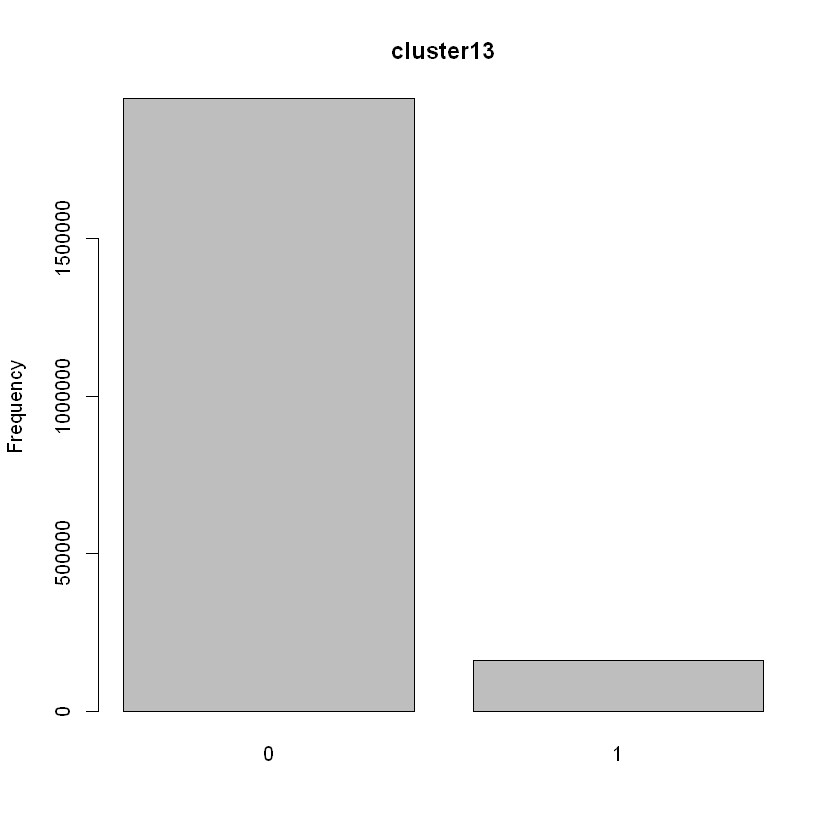

     [,1]
[1,]  0.7
[2,]  1.9


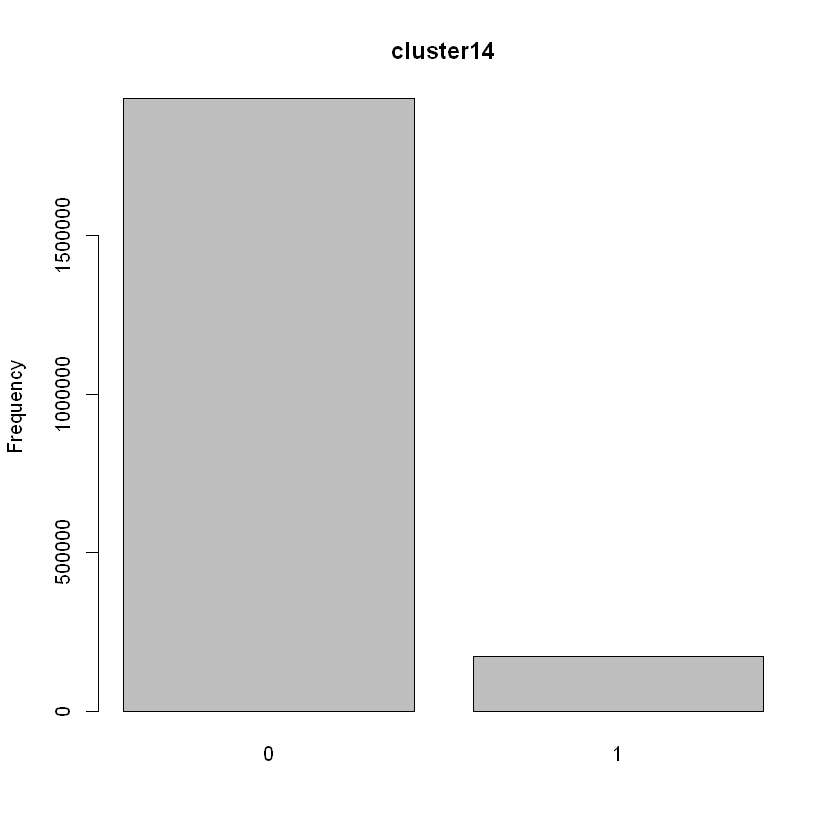

     [,1]
[1,]  0.7
[2,]  1.9


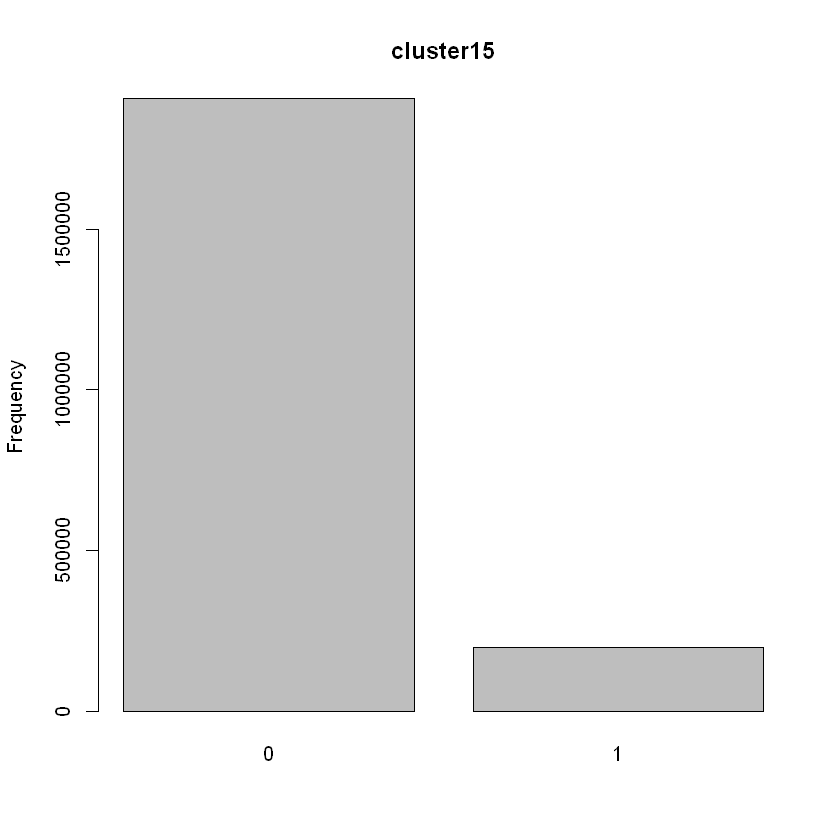

     [,1]
[1,]  0.7
[2,]  1.9


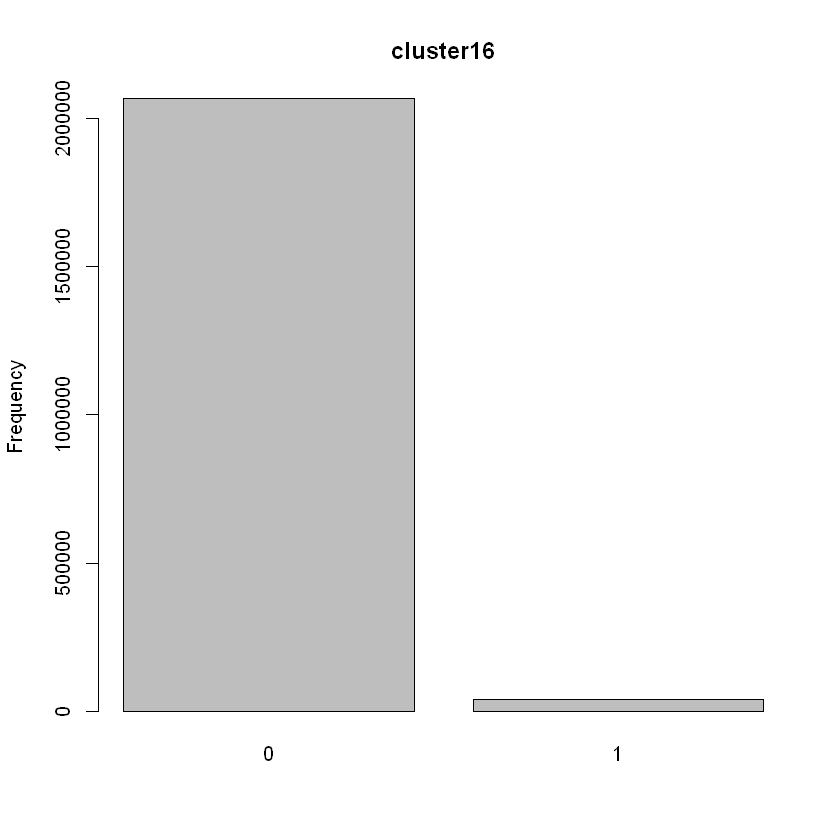

     [,1]
[1,]  0.7
[2,]  1.9


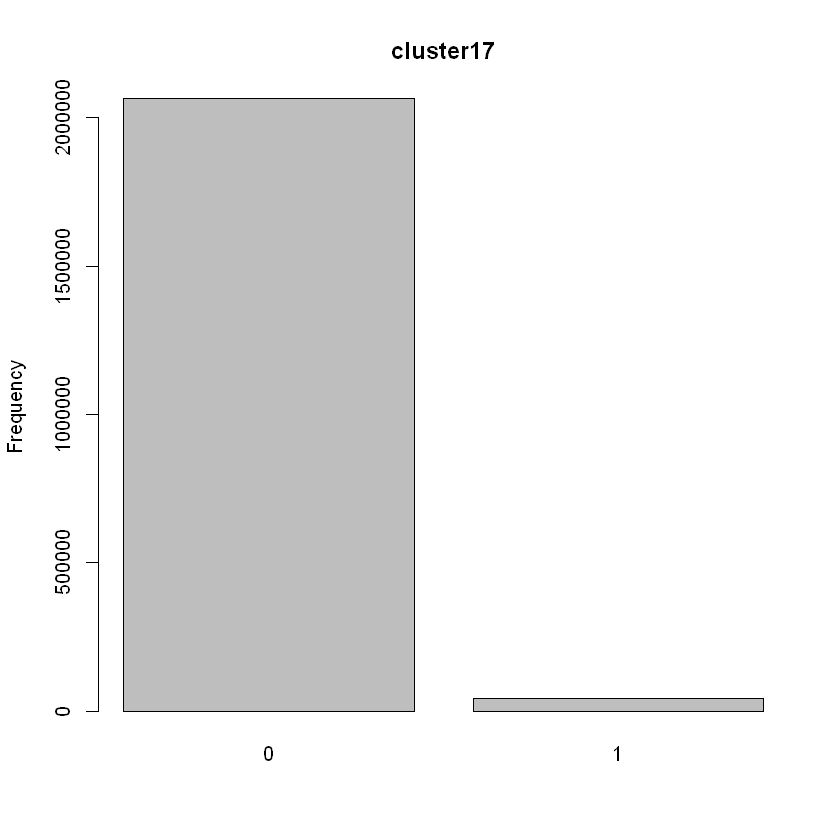

In [28]:
for (v in cf){
    print(barplot(table(df[[v]]), ylab='Frequency', main=v))
}

In [ ]:
exploreData(data=df[[nf]],y="total_unit_sales")

In [24]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [68]:
exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir="report", debug=FALSE, ...) {

  get_computer_type <- function(){
    # check if current R client is running on PC or on the server
    if (Sys.info()[1] == "Windows") {
      computer.type = "pc"
    } else if (Sys.info()[1] == "Linux") {
      computer.type = "server"
    }
    return(computer.type)
  }

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=T),sd=stats::sd(x,na.rm=T))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=T), "<br><u>Max date</u>:",max(x, na.rm=T) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  if (get_computer_type()=="pc") {
    srcdir <- paste0(getwd(),"/",report)
  } else {
    #srcdir <- paste0("file_show?path=",getwd(),"/",report)
    srcdir <- paste0("/view/",getwd(),"/report")
  }
  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>

      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });

      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });

      $('#myform2').submit(function(e) {
      e.preventDefault();
      });

      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });

      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });

      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });

      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });

      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });

      </script>

      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>

      </head>

      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        print(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        #print(imgname)
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  if(.Platform$OS.type == "unix") {
    system(paste("start /b ", myhtml))
  } else {
    shell(paste("explorer ", gsub("/", "\\\\", myhtml) ), intern=TRUE)
  }
}

###################### END exploreData ###############

2.1 - Descriptive statistics
Generate a table showing the minimum, maximum, median, IQR, mean and standard deviation for each variable

In [26]:
install.packages("pastecs")
library(pastecs)

Installing package into 'C:/Users/Guy/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Guy\AppData\Local\Temp\Rtmp635OT5\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.3"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last




In [27]:
stat.desc(df)

item_nbr store_nbr Year         month        total_unit_sales city
nbr.val  NA       NA        2.107345e+06 2.107345e+06  2.107345e+06    NA  
nbr.null NA       NA        0.000000e+00 0.000000e+00  1.100000e+01    NA  
nbr.na   NA       NA        0.000000e+00 0.000000e+00  0.000000e+00    NA  
min      NA       NA        2.013000e+03 1.000000e+00 -9.700000e+03    NA  
max      NA       NA        2.017000e+03 1.200000e+01  4.657100e+04    NA  
range    NA       NA        4.000000e+00 1.100000e+01  5.627100e+04    NA  
sum      NA       NA        4.246293e+09 1.334742e+07  4.744671e+08    NA  
median   NA       NA        2.015000e+03 6.000000e+00  1.150000e+02    NA  
mean     NA       NA        2.014997e+03 6.333762e+00  2.251492e+02    NA  
SE.mean  NA       NA        9.245181e-04 2.319956e-03  2.711367e-01    NA  
CI.mean  NA       NA        1.812023e-03 4.547032e-03  5.314184e-01    NA  
var      NA       NA        1.801219e+00 1.134214e+01  1.549217e+05    NA  
std.dev  NA       NA        1.342095e+00 3.367809e+00  3.936009e+02    NA  
coef.var NA       NA        6.660532e-04 5.317234e-01  1.748178e+00    NA  
         state store_type store_cluster prev_month_sales ... cluster8    
nbr.val  NA    NA         NA             2.063247e+06    ... 2.107345e+06
nbr.null NA    NA         NA             1.100000e+01    ... 1.977878e+06
nbr.na   NA    NA         NA             4.409800e+04    ... 0.000000e+00
min      NA    NA         NA            -9.700000e+03    ... 0.000000e+00
max      NA    NA         NA             4.657100e+04    ... 1.000000e+00
range    NA    NA         NA             5.627100e+04    ... 1.000000e+00
sum      NA    NA         NA             4.697380e+08    ... 1.294670e+05
median   NA    NA         NA             1.170000e+02    ... 0.000000e+00
mean     NA    NA         NA             2.276693e+02    ... 6.143607e-02
SE.mean  NA    NA         NA             2.755970e-01    ... 1.654154e-04
CI.mean  NA    NA         NA             5.401606e-01    ... 3.242084e-04
var      NA    NA         NA             1.567113e+05    ... 5.766171e-02
std.dev  NA    NA         NA             3.958678e+02    ... 2.401285e-01
coef.var NA    NA         NA             1.738784e+00    ... 3.908592e+00
         cluster9     cluster10    cluster11    cluster12    cluster13   
nbr.val  2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06
nbr.null 2.022976e+06 1.875220e+06 2.016551e+06 2.066305e+06 1.946043e+06
nbr.na   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min      0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
max      1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
range    1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
sum      8.436900e+04 2.321250e+05 9.079400e+04 4.104000e+04 1.613020e+05
median   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
mean     4.003568e-02 1.101504e-01 4.308454e-02 1.947474e-02 7.654276e-02
SE.mean  1.350465e-04 2.156670e-04 1.398717e-04 9.519136e-05 1.831440e-04
CI.mean  2.646865e-04 4.226998e-04 2.741436e-04 1.865717e-04 3.589559e-04
var      3.843285e-02 9.801737e-02 4.122829e-02 1.909549e-02 7.068400e-02
std.dev  1.960430e-01 3.130773e-01 2.030475e-01 1.381864e-01 2.658646e-01
coef.var 4.896706e+00 2.842270e+00 4.712769e+00 7.095674e+00 3.473413e+00
         cluster14    cluster15    cluster16    cluster17   
nbr.val  2.107345e+06 2.107345e+06 2.107345e+06 2.107345e+06
nbr.null 1.933559e+06 1.906991e+06 2.066897e+06 2.064388e+06
nbr.na   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
min      0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
max      1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
range    1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
sum      1.737860e+05 2.003540e+05 4.044800e+04 4.295700e+04
median   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
mean     8.246680e-02 9.507413e-02 1.919382e-02 2.038442e-02
SE.mean  1.894885e-04 2.020552e-04 9.45

In [28]:
summary(df)

   item_nbr          store_nbr              Year          month       
 Length:2107345     Length:2107345     Min.   :2013   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:2014   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median :2015   Median : 6.000  
                                       Mean   :2015   Mean   : 6.334  
                                       3rd Qu.:2016   3rd Qu.: 9.000  
                                       Max.   :2017   Max.   :12.000  
                                                                      
 total_unit_sales      city              state            store_type       
 Min.   :-9700.0   Length:2107345     Length:2107345     Length:2107345    
 1st Qu.:   56.0   Class :character   Class :character   Class :character  
 Median :  115.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  225.2                                                           
 3rd Qu.:  243.0                                    

In [53]:
#question2.3 correlation matrix
#install.packages("GGally")
library(GGally)
options(repr.plot.width = 30, repr.plot.height = 30)
ggcorr(df[[nf]], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

Warning message:
"package 'GGally' was built under R version 3.6.2"

Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa




ERROR: Error in .subset2(x, i, exact = exact): recursive indexing failed at level 2



Warning message:
"package 'GGally' was built under R version 3.6.2"

Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa




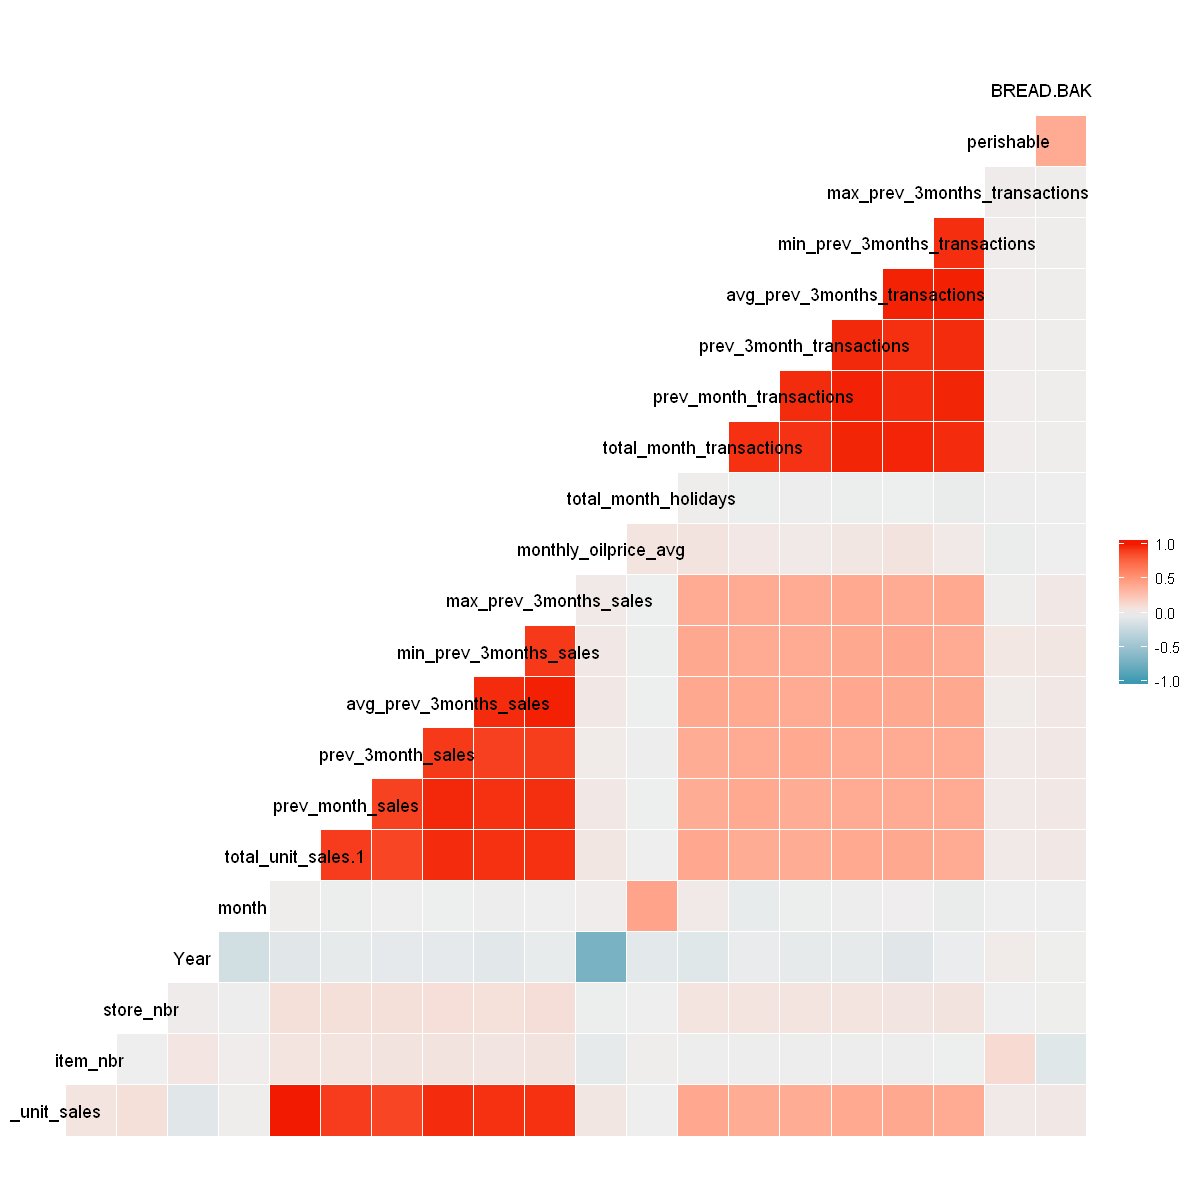

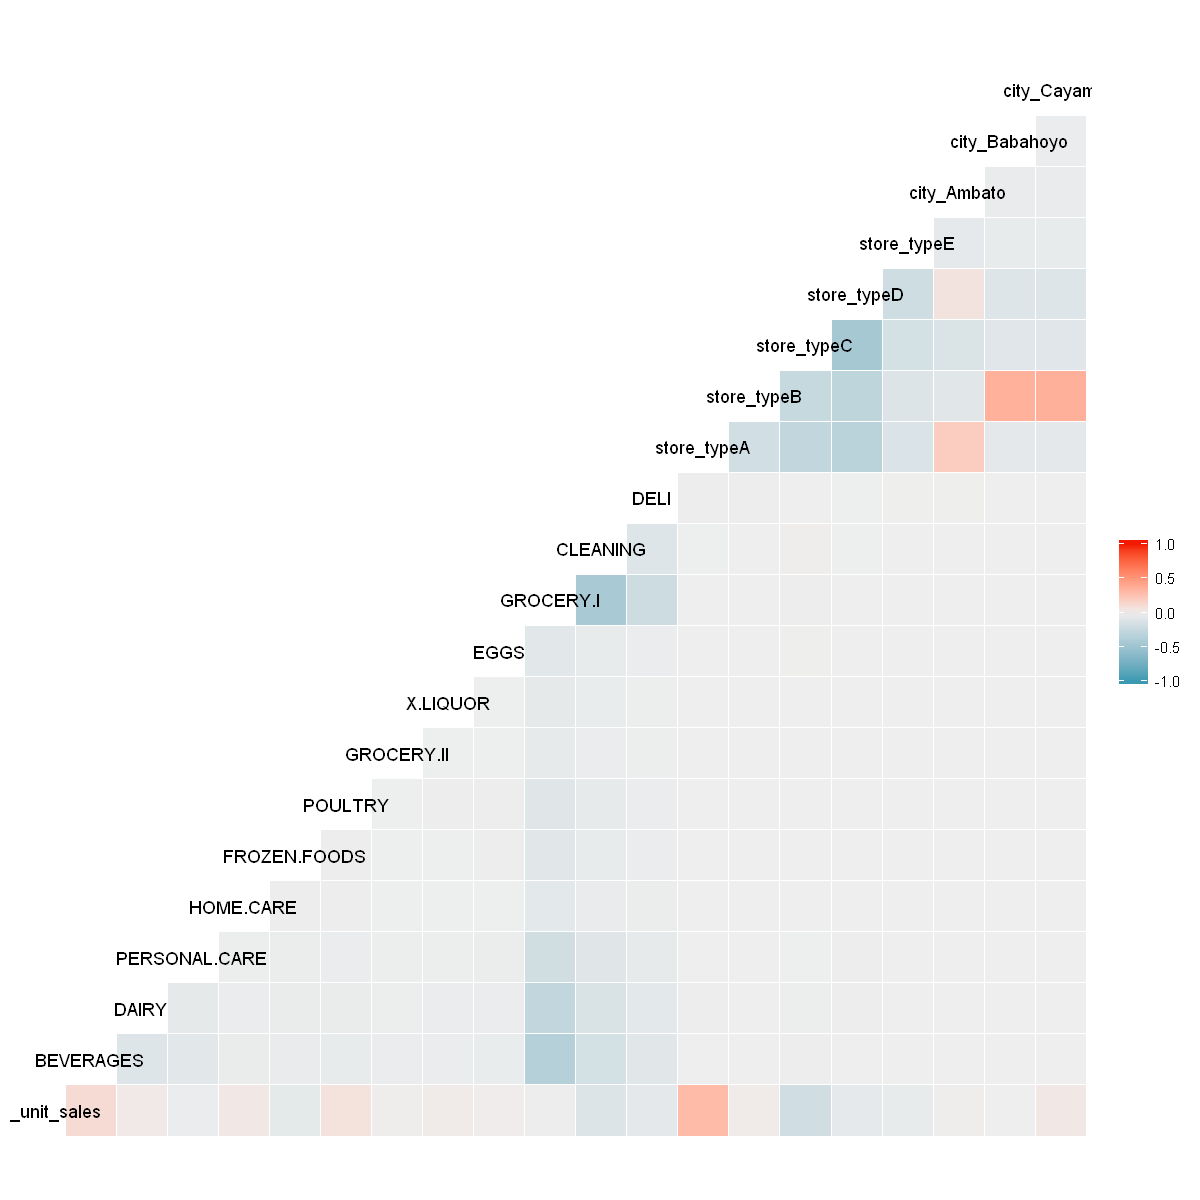

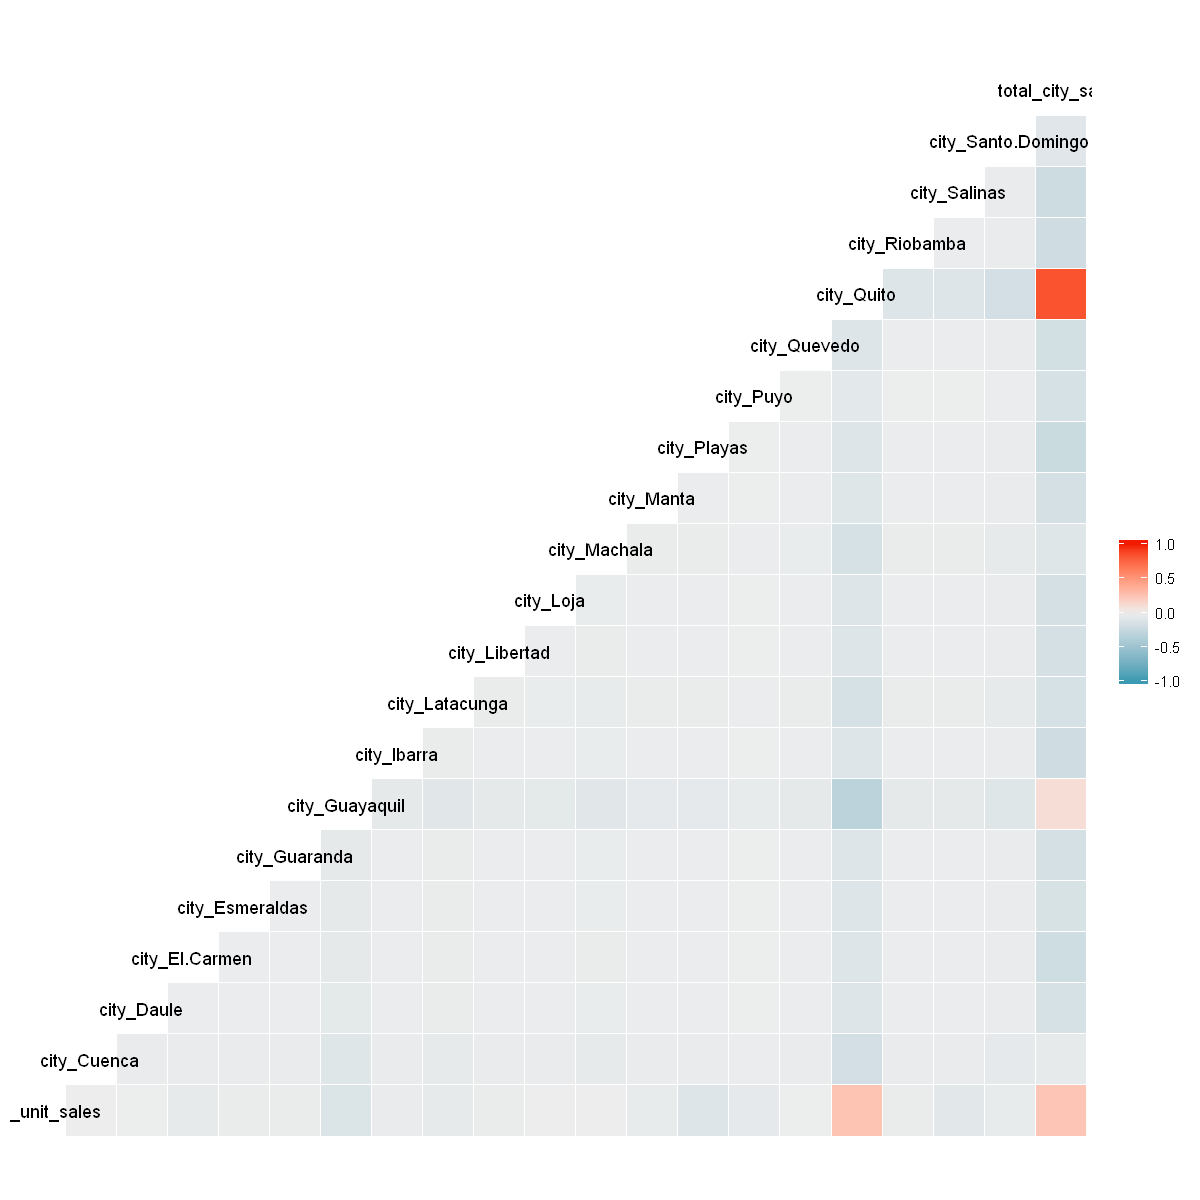

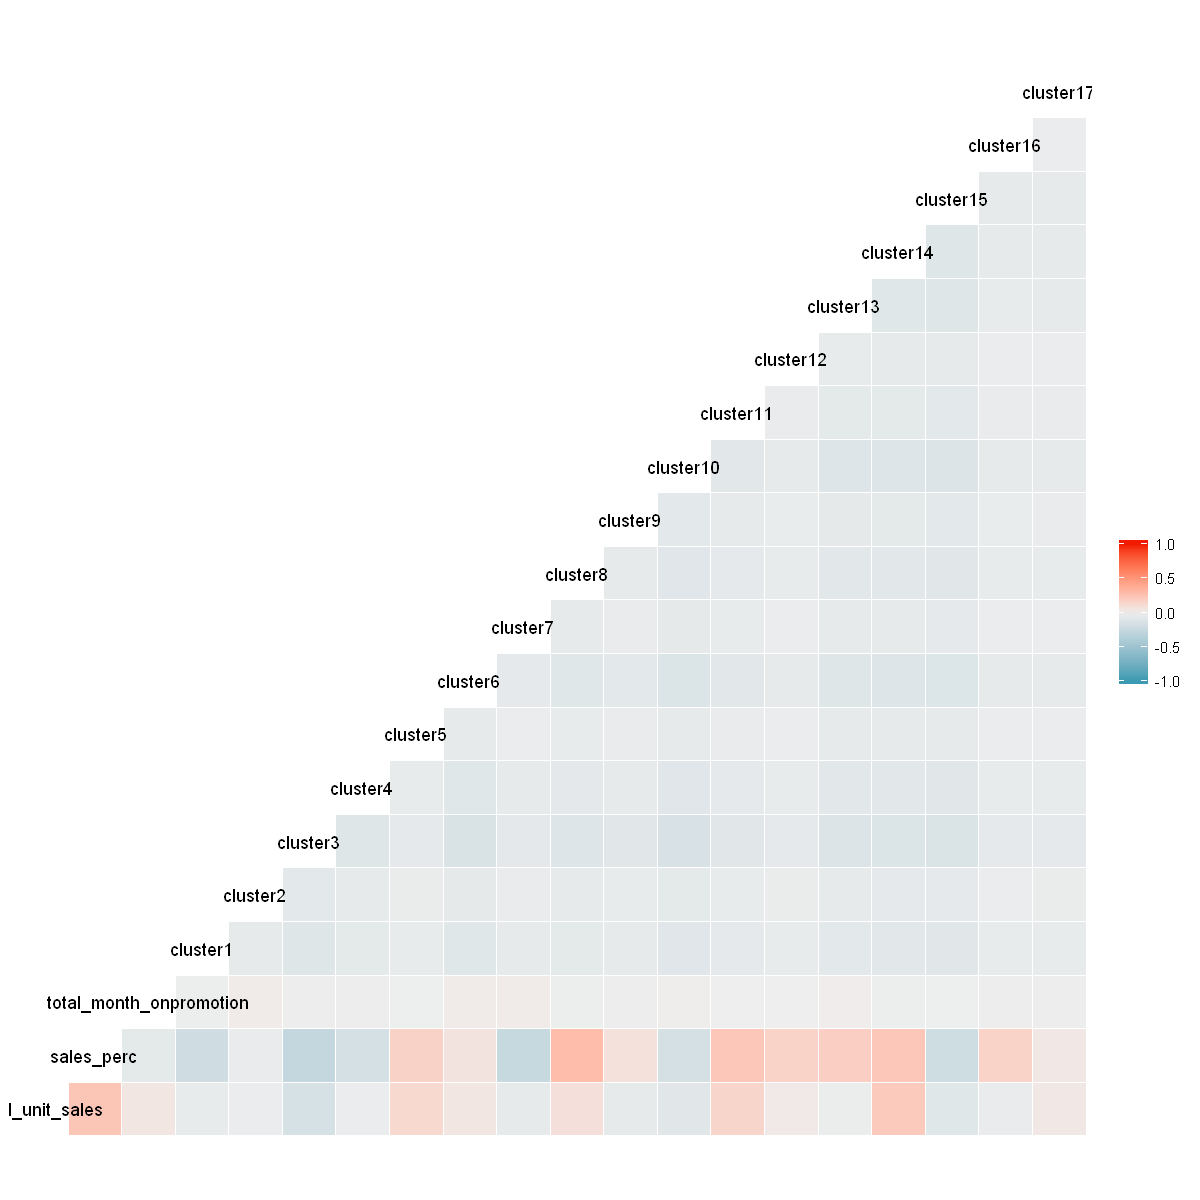

In [30]:
library(GGally)
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorr(df[,c(5,1:20)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(5,21:40)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(5,41:60)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(5,61:79)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)




Warning message:
"package 'GGally' was built under R version 3.6.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa




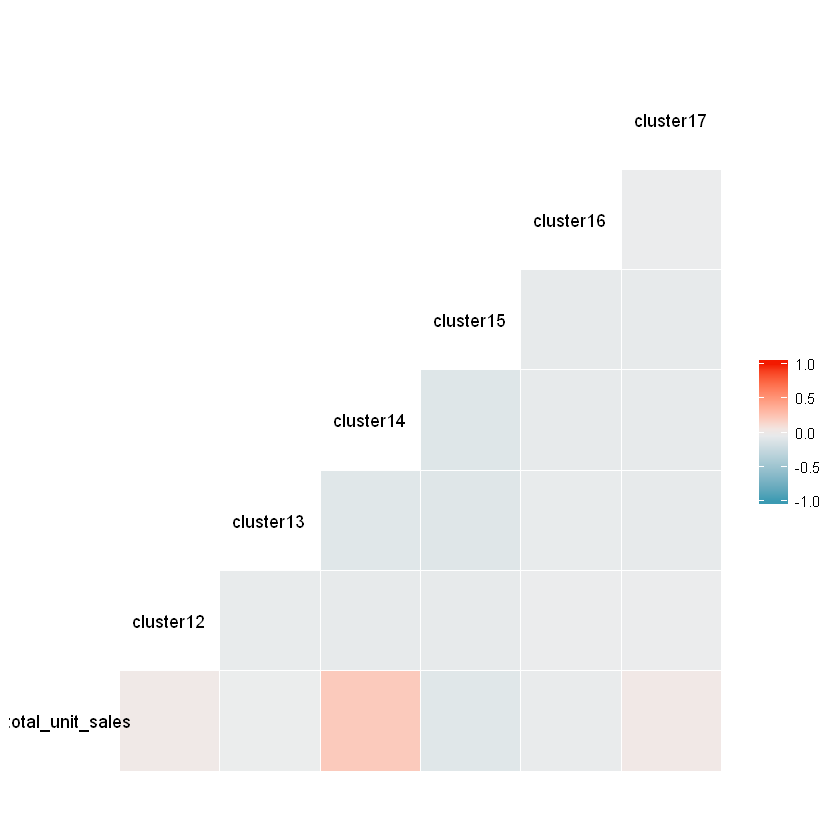

In [24]:
library(GGally)
ggcorr(df[,c(5,80:85)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

2.4 Describe the outcome variable
Histogram
Histogram by categories

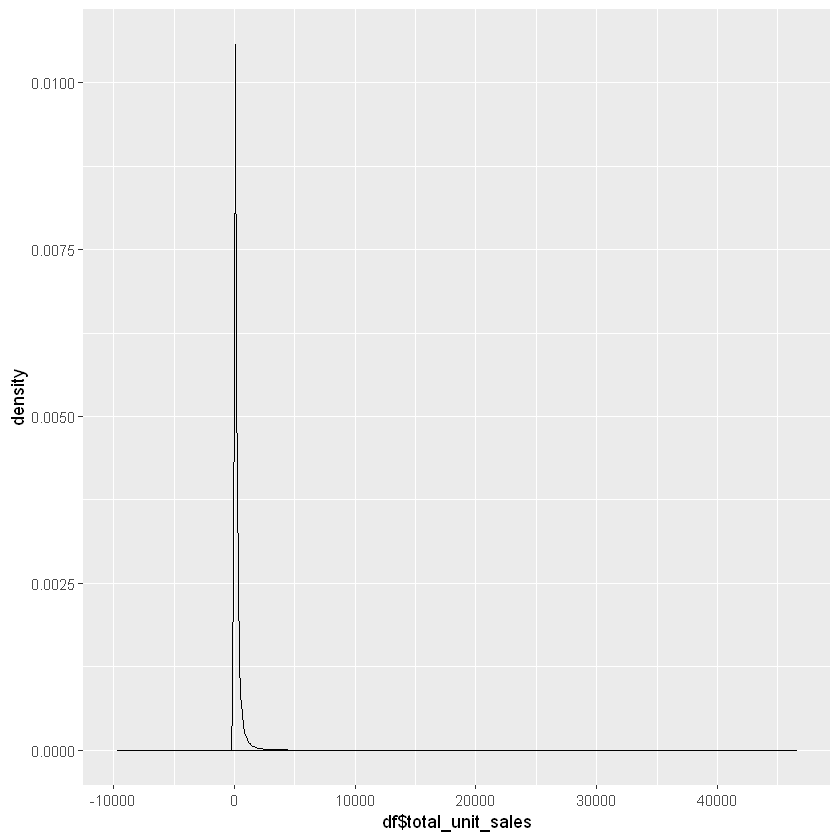

In [38]:
#distribution of revenue- question 2.4
print(ggplot(df,aes(x=df$total_unit_sales)) +
    geom_density(adjust=2))


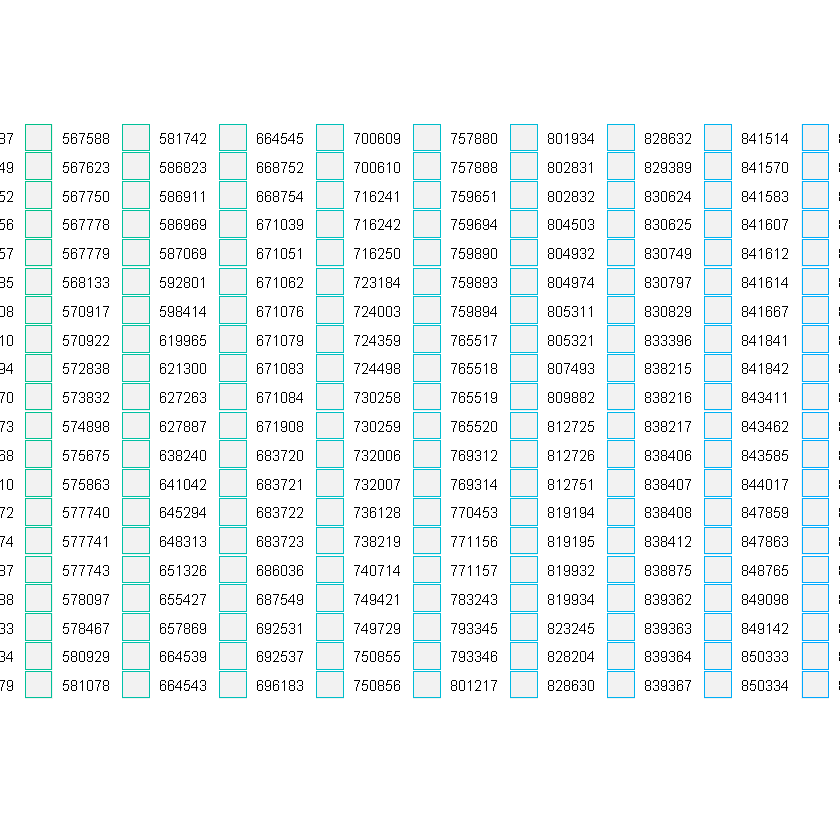

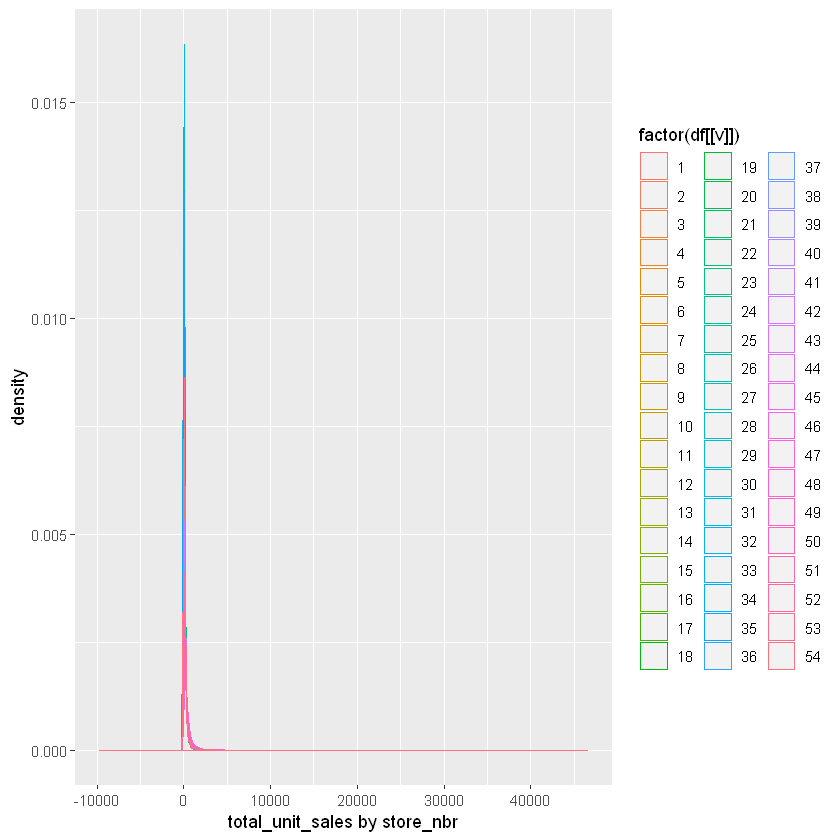

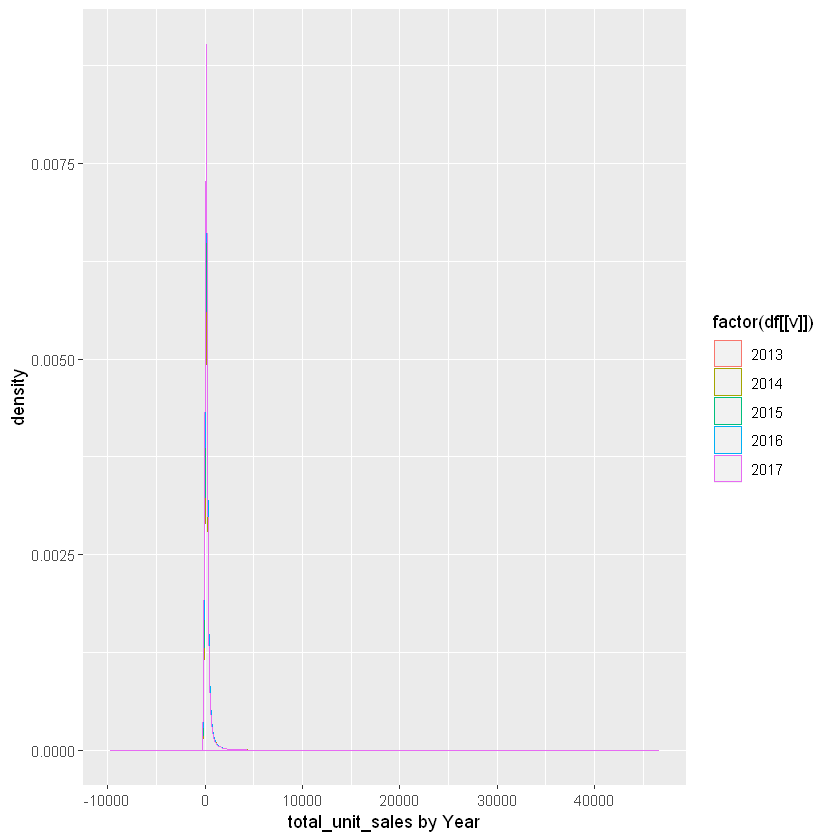

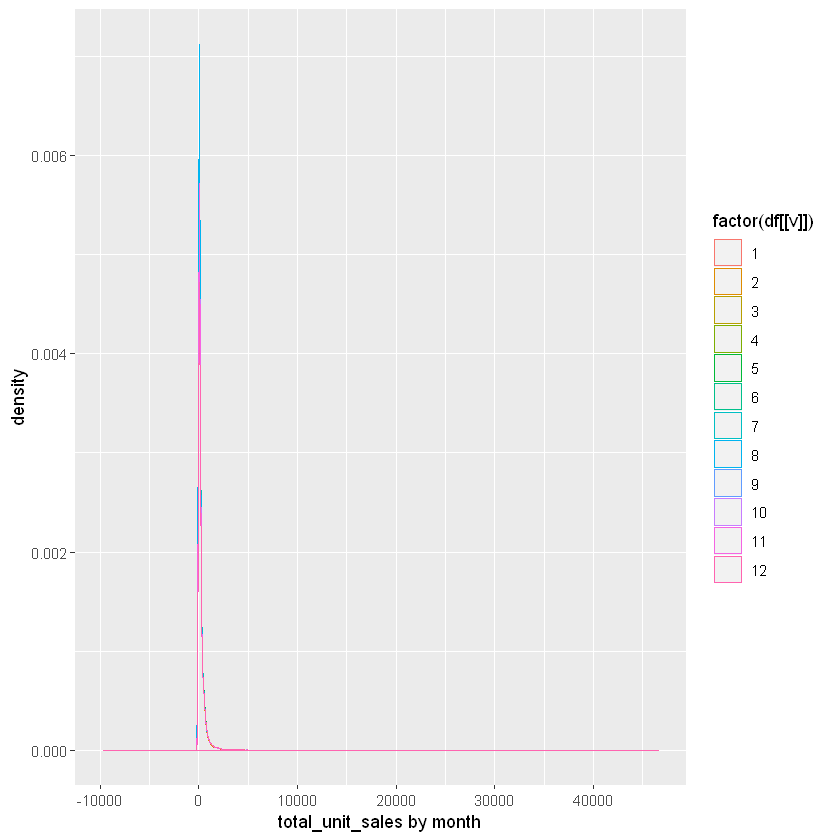

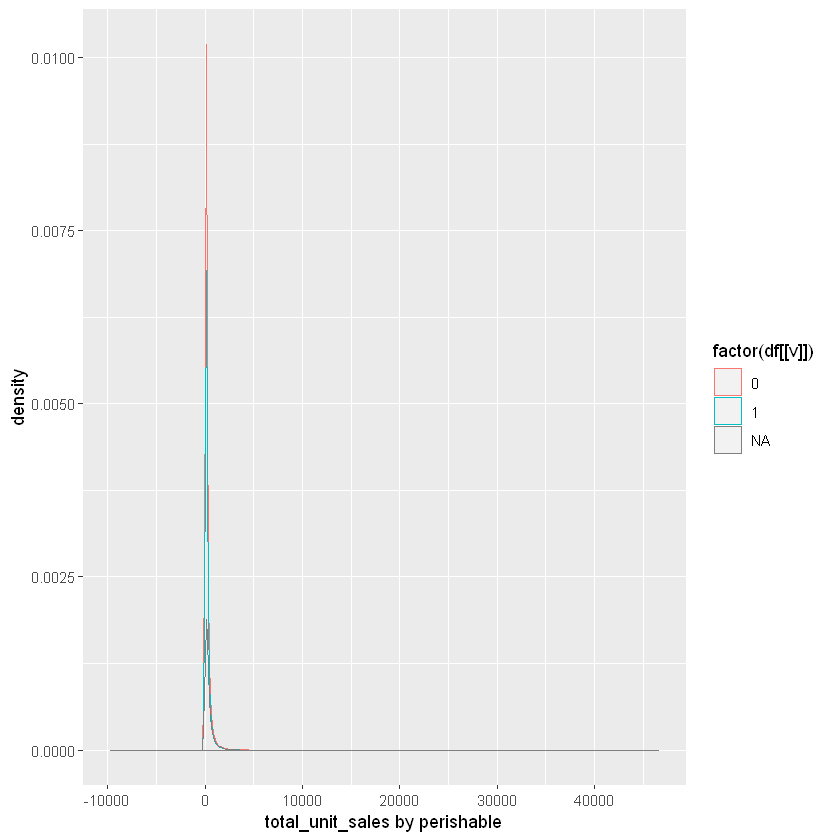

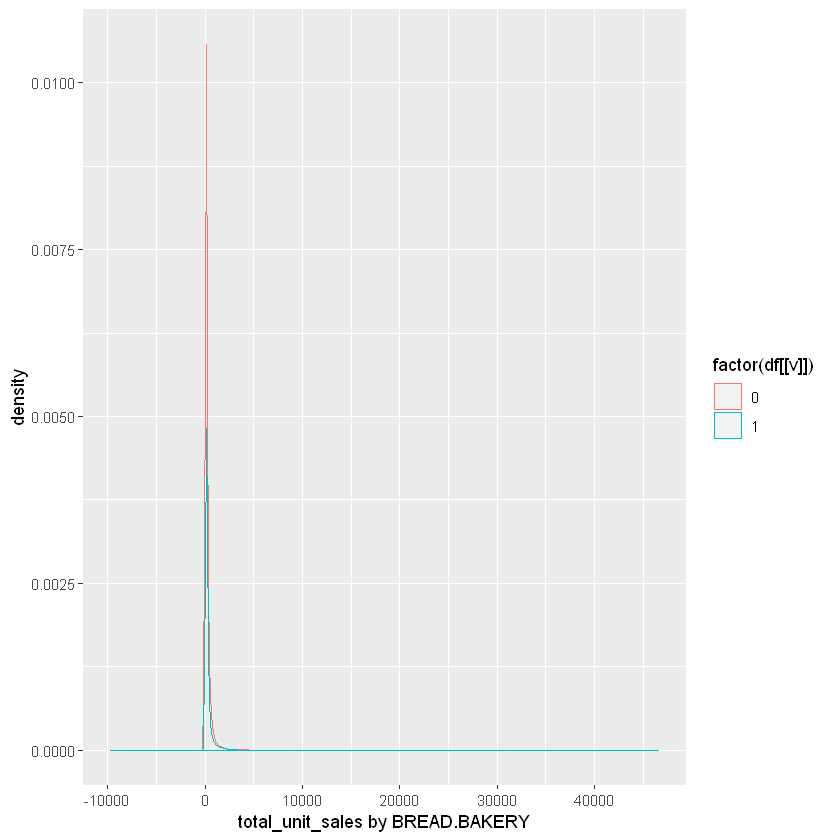

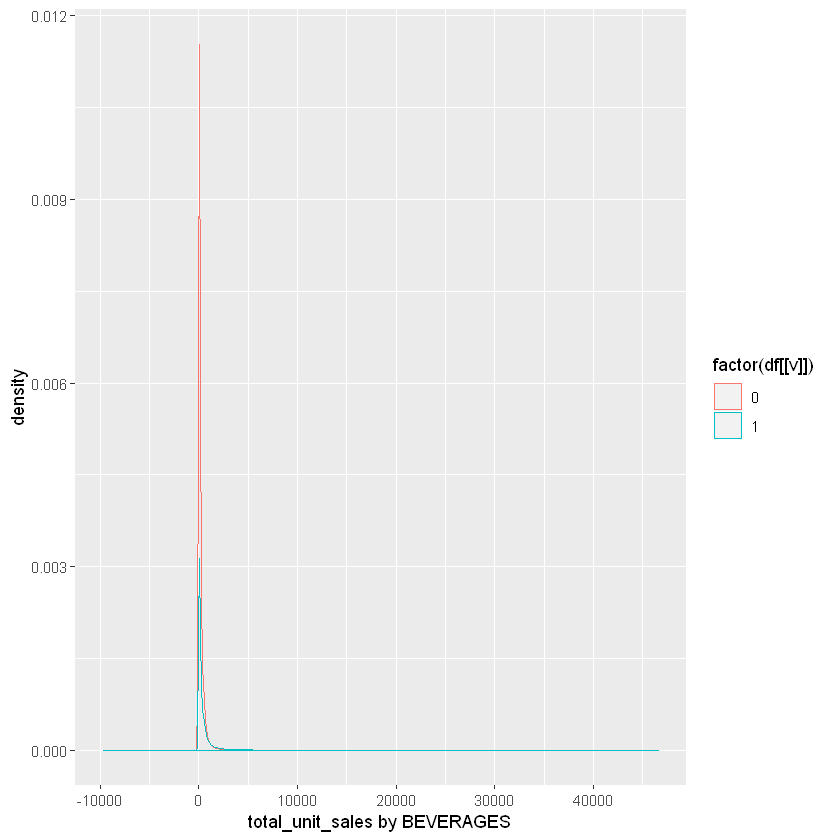

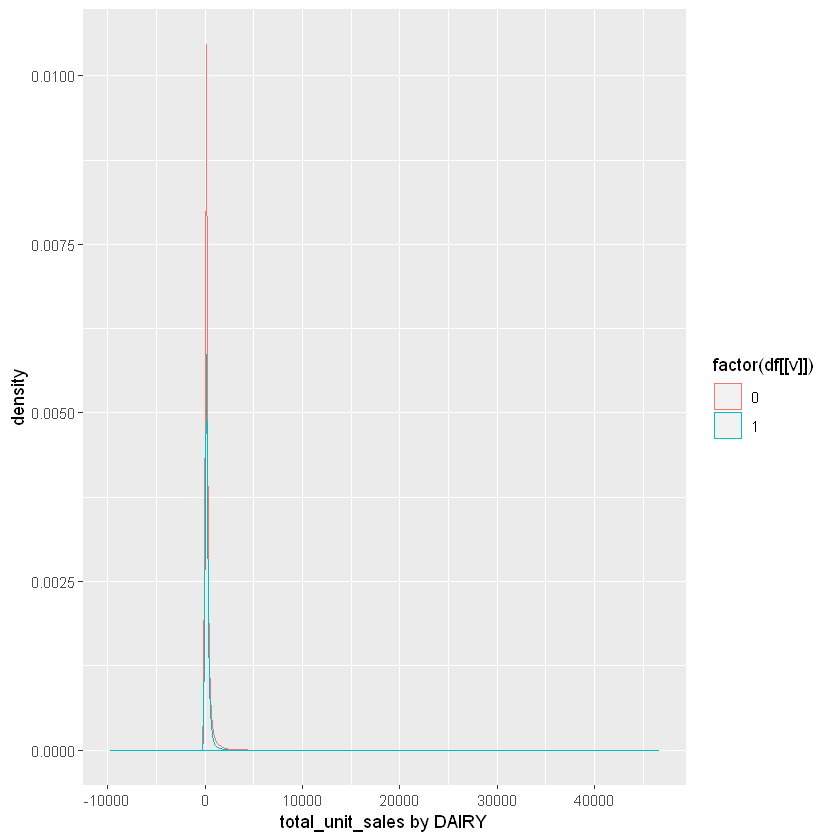

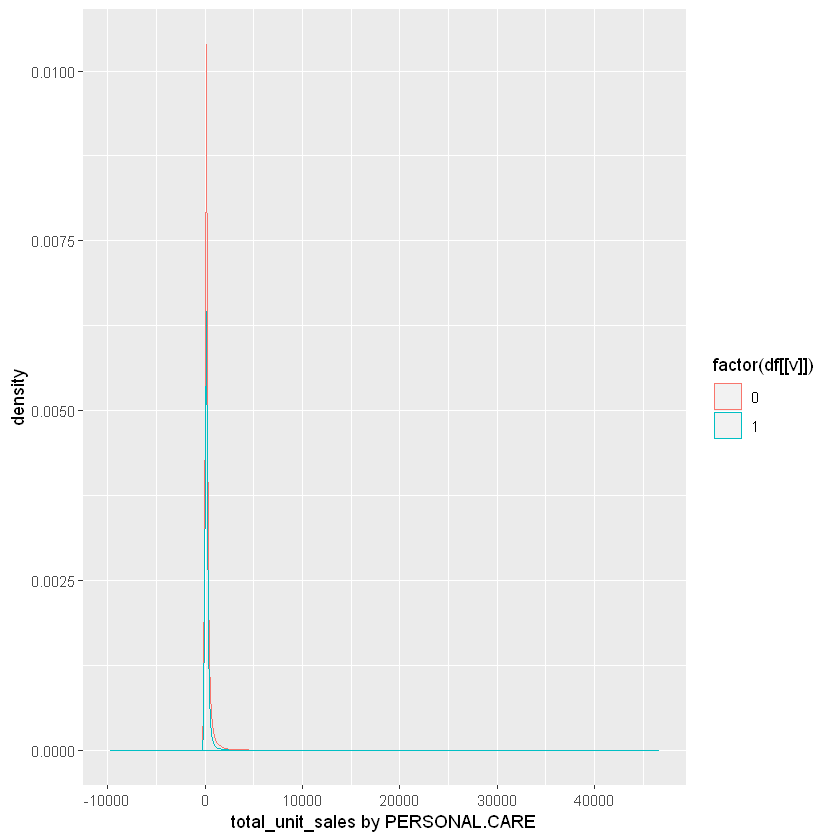

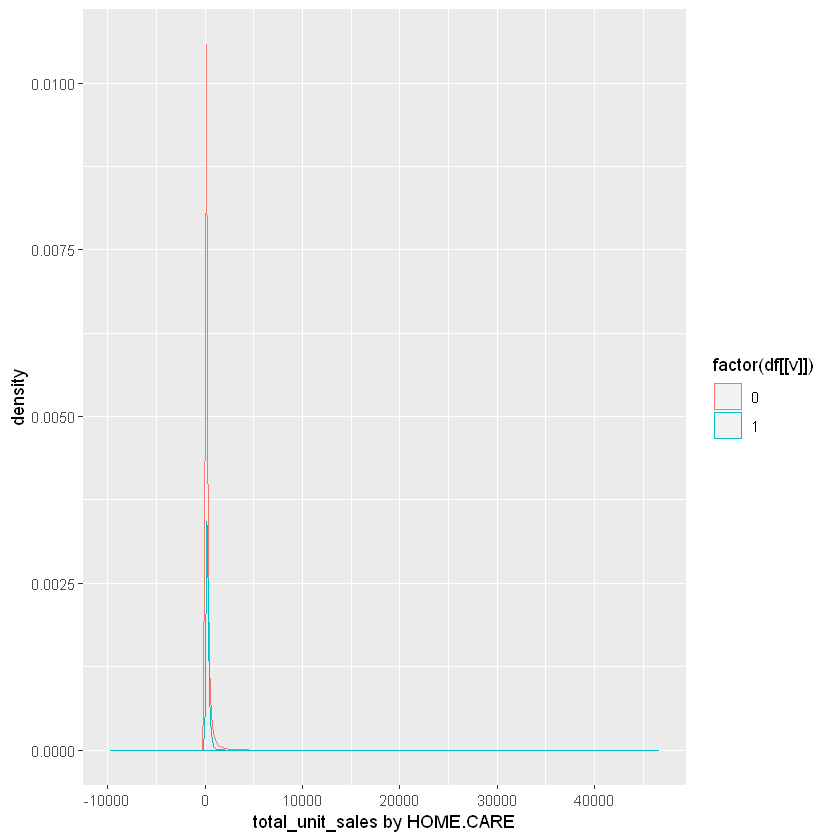

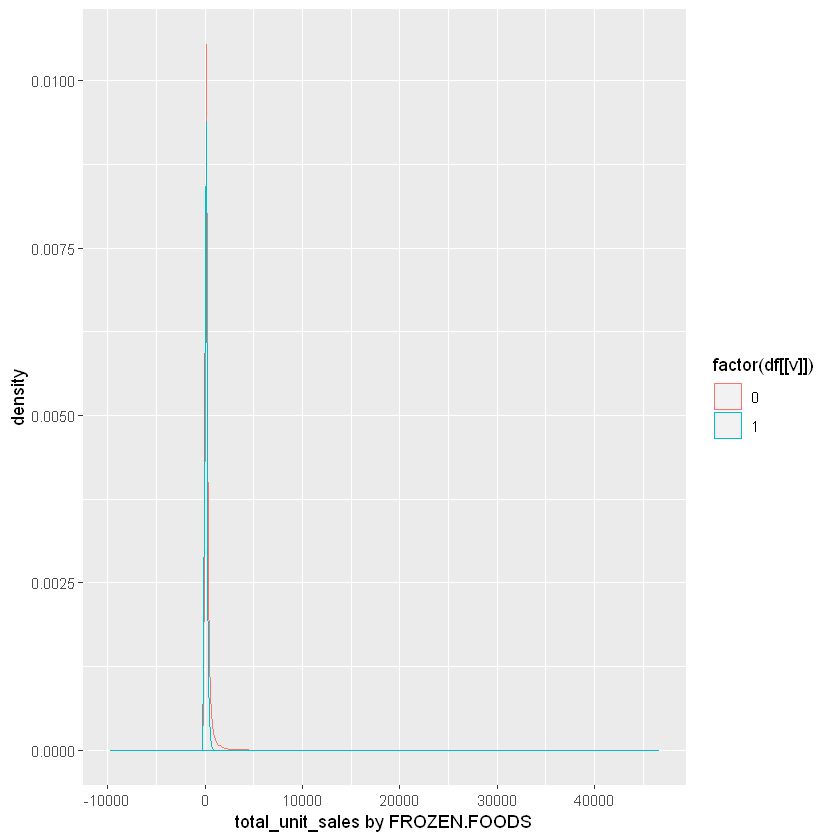

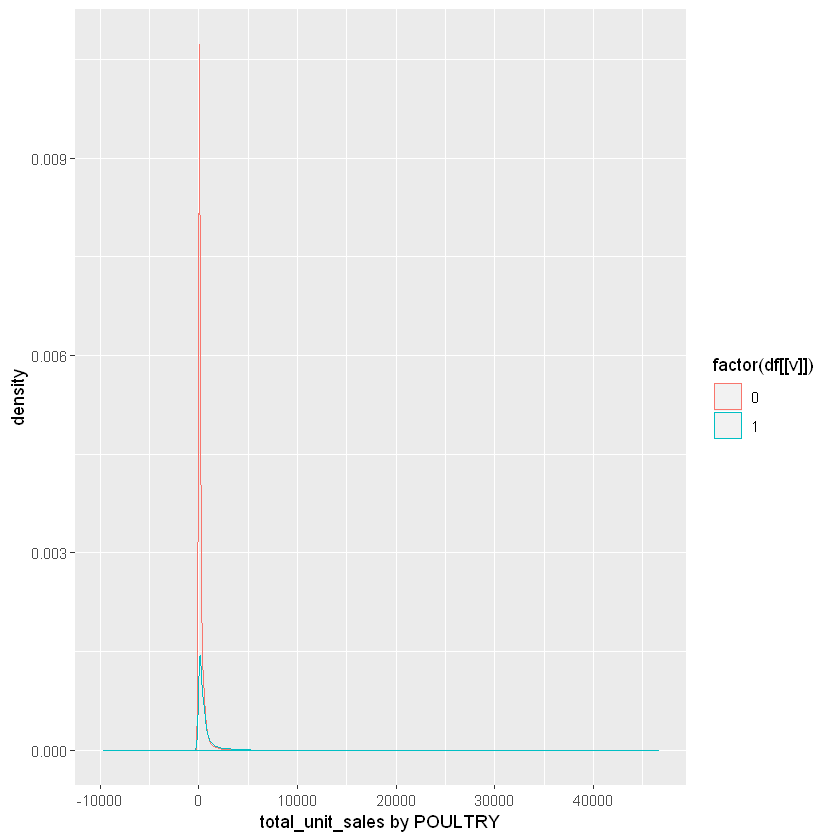

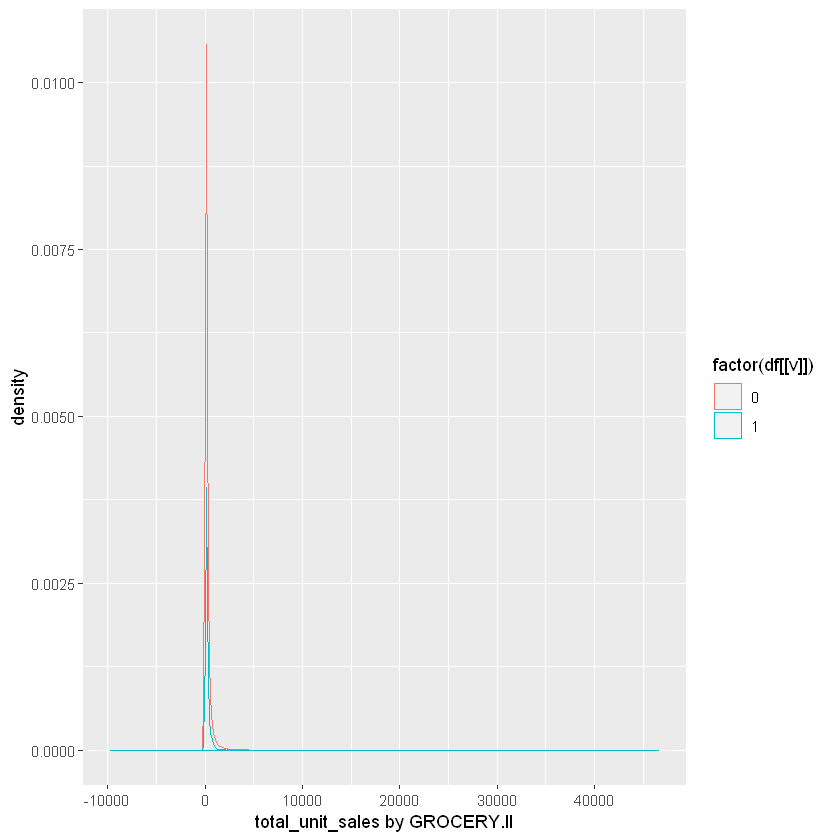

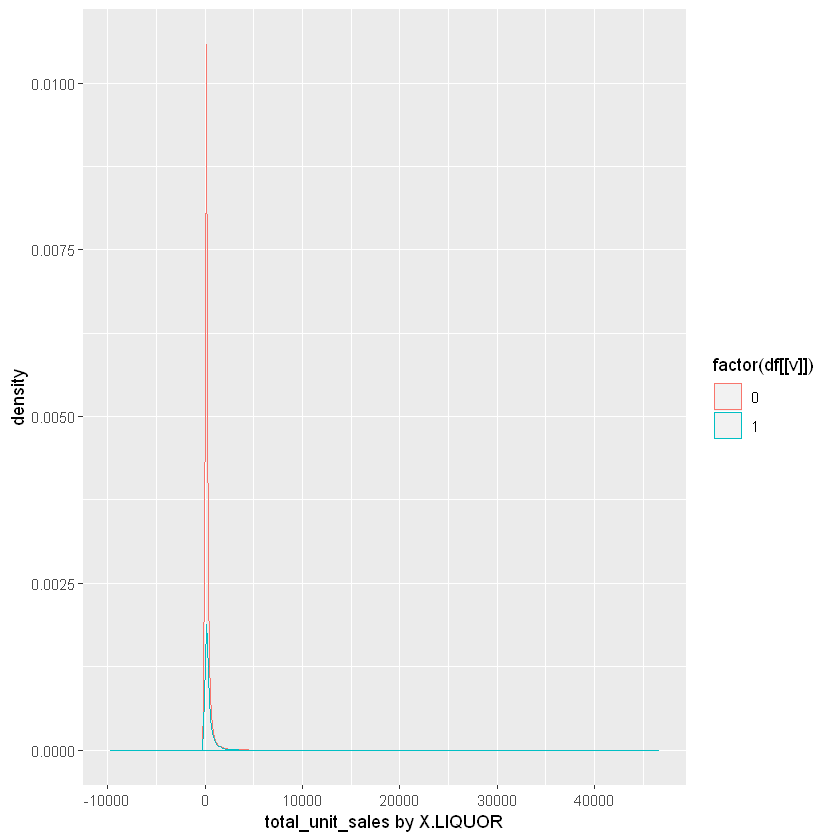

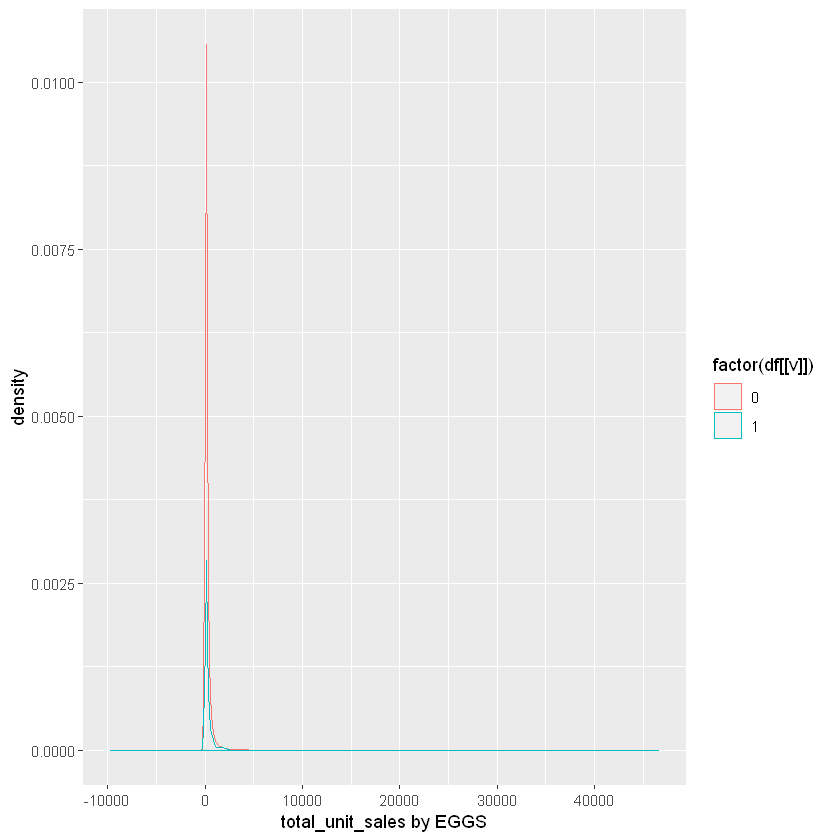

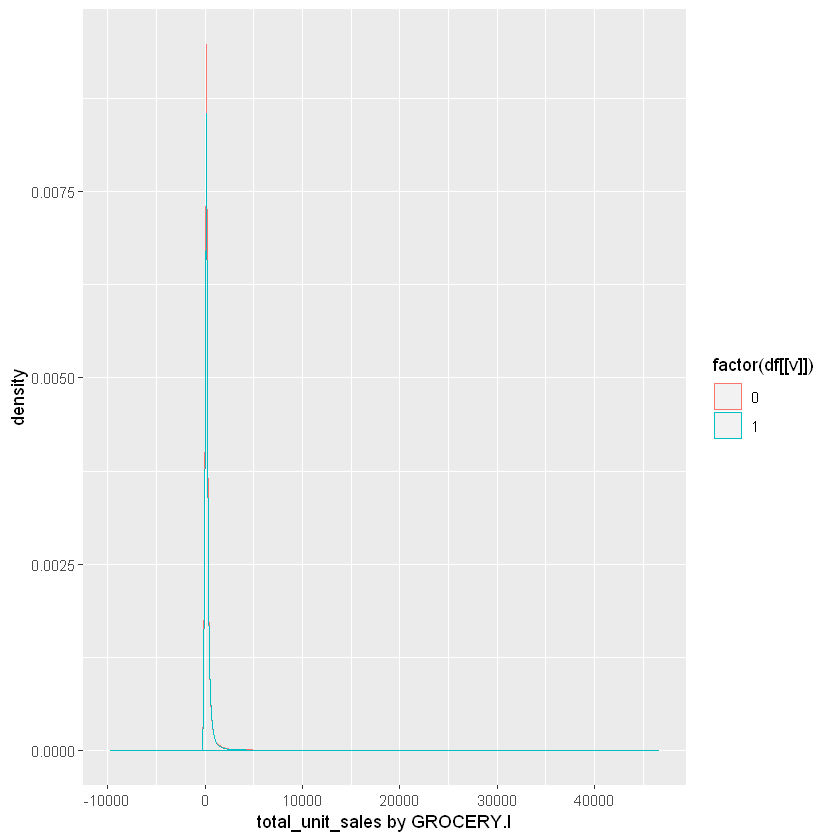

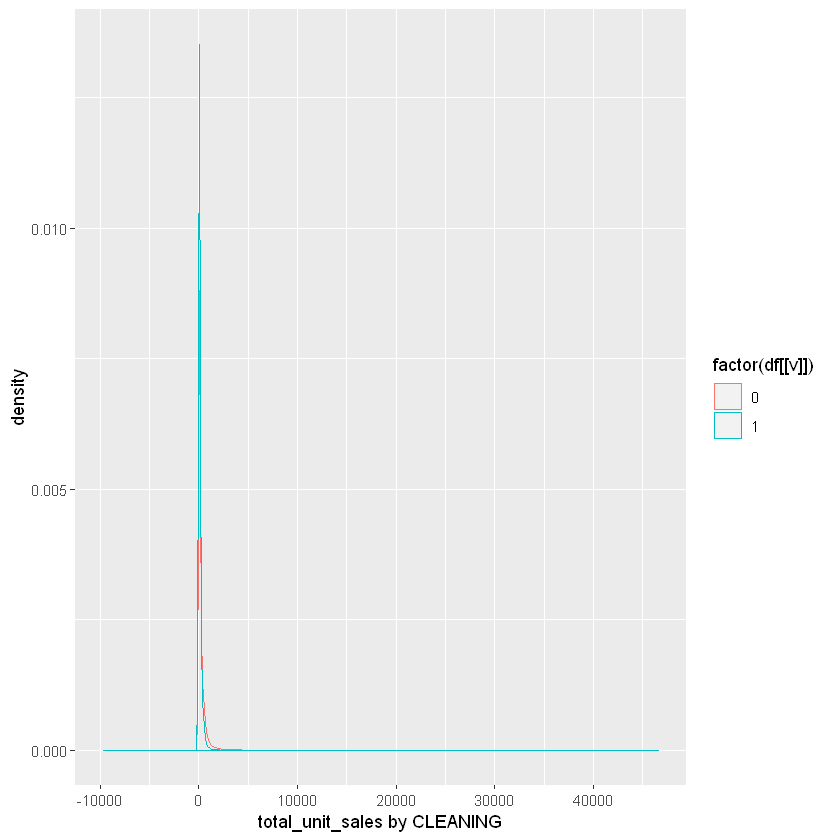

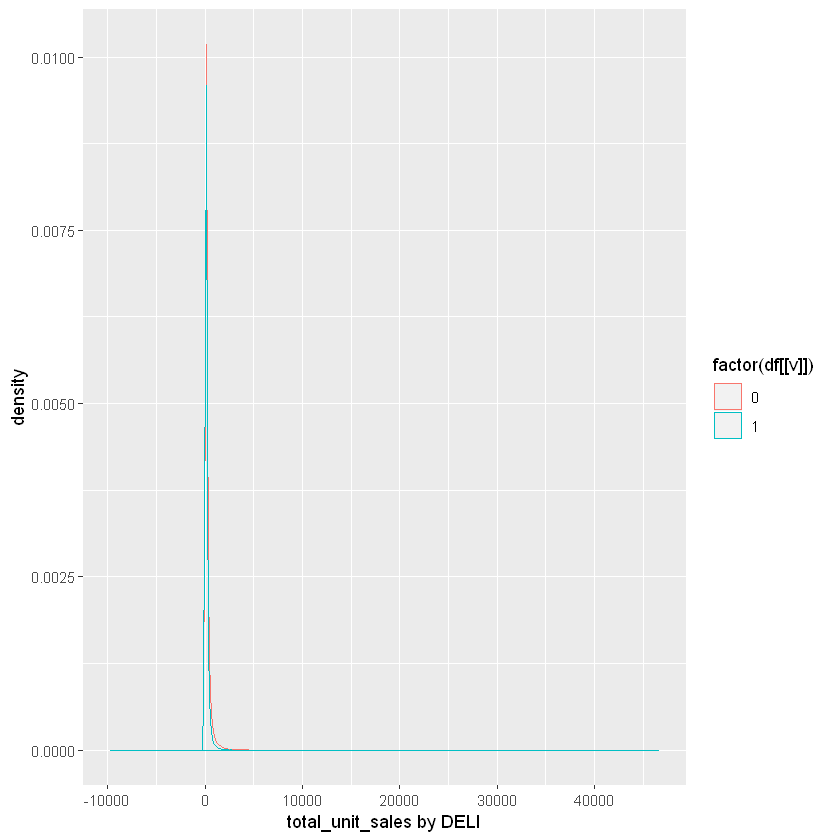

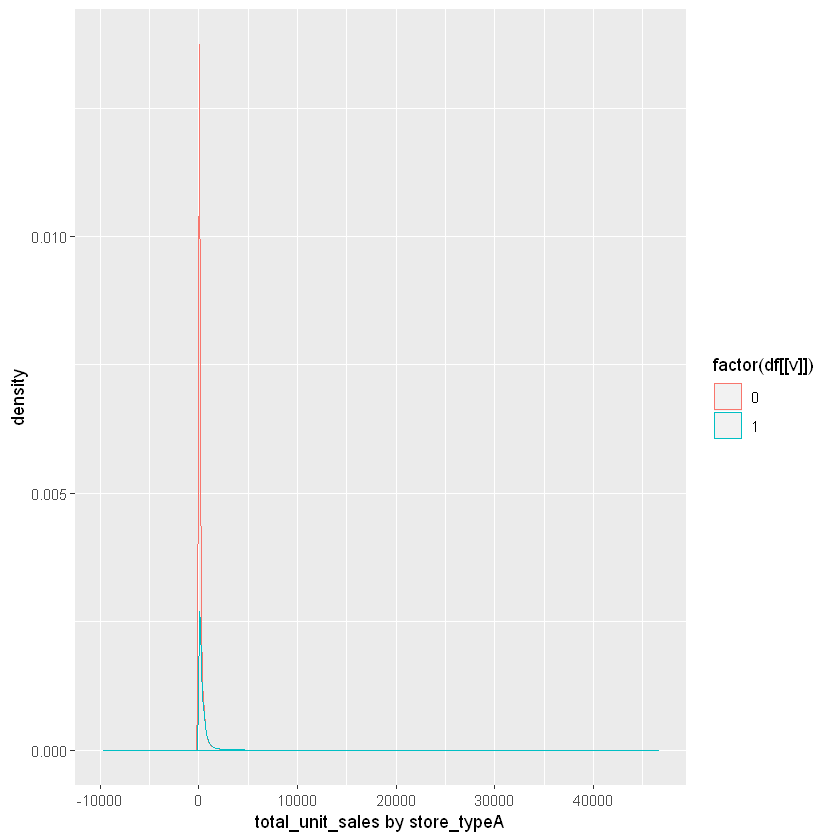

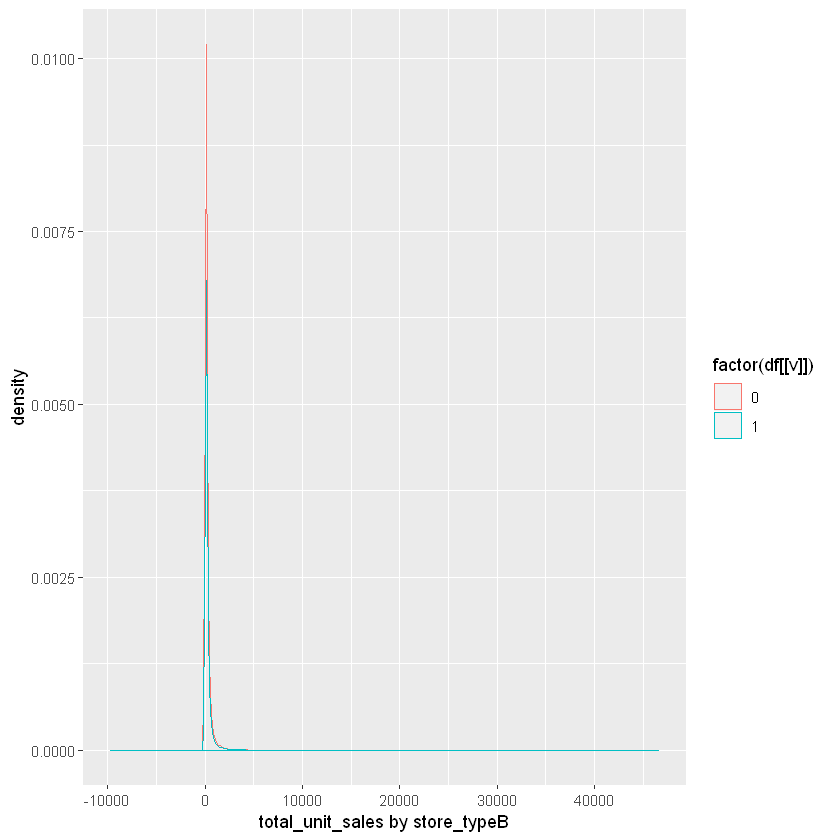

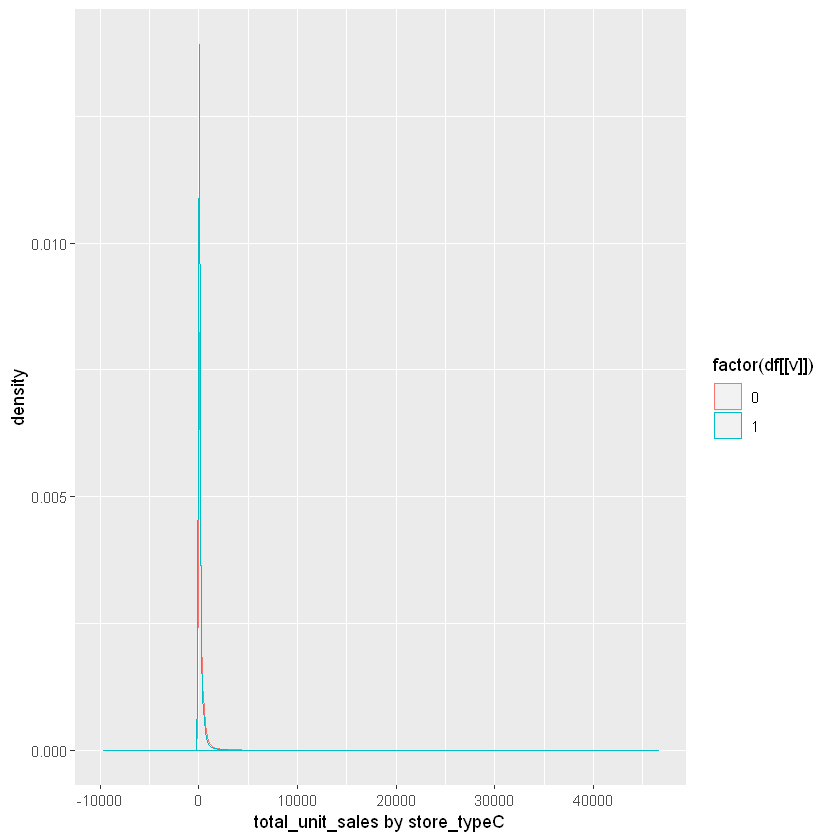

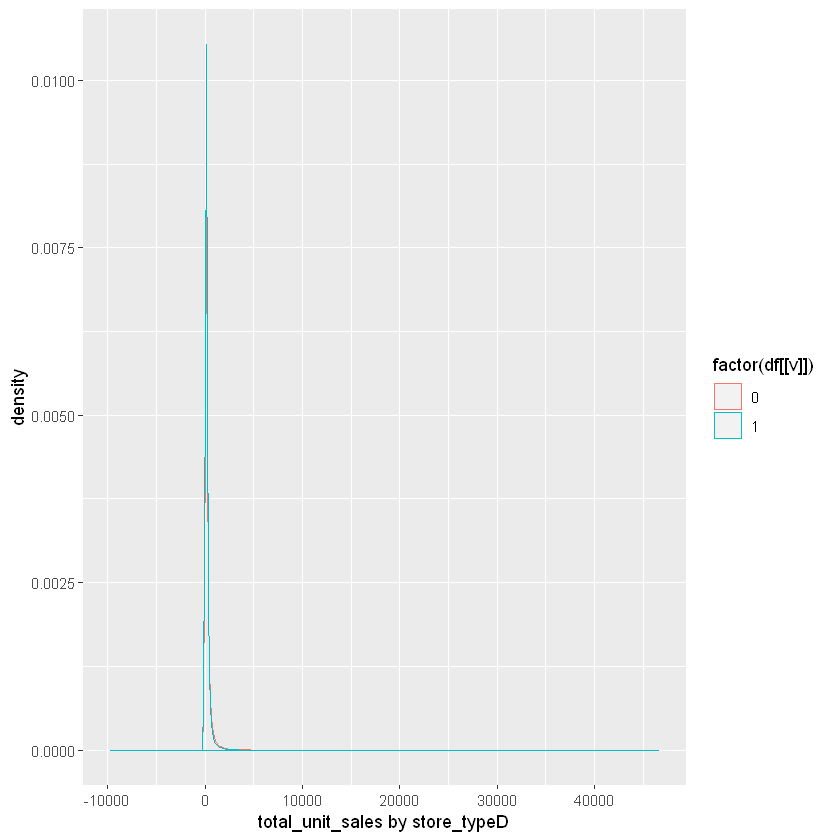

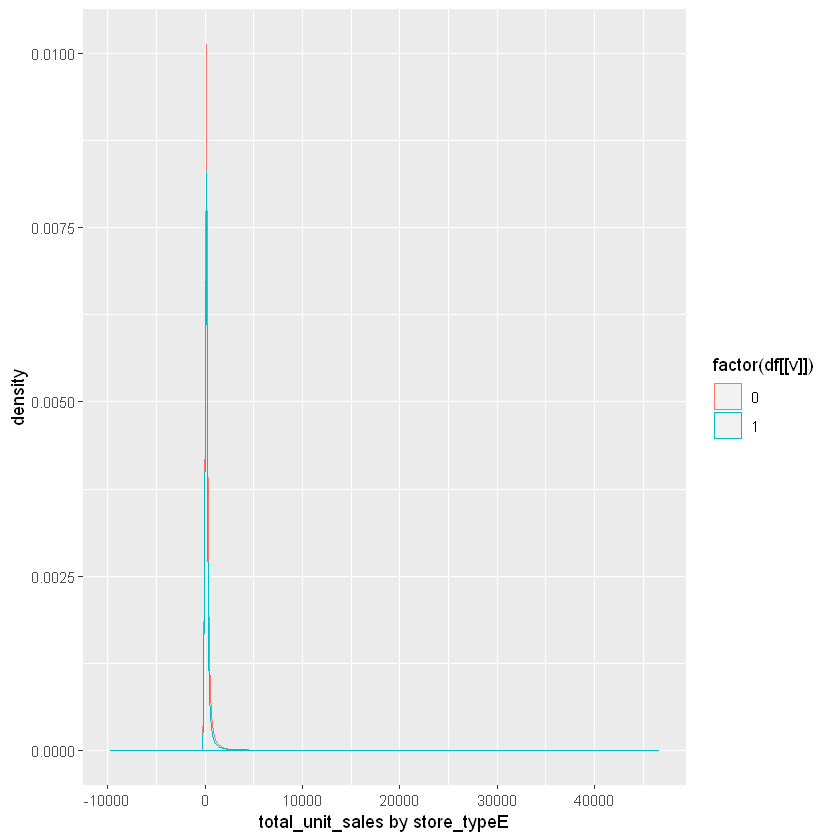

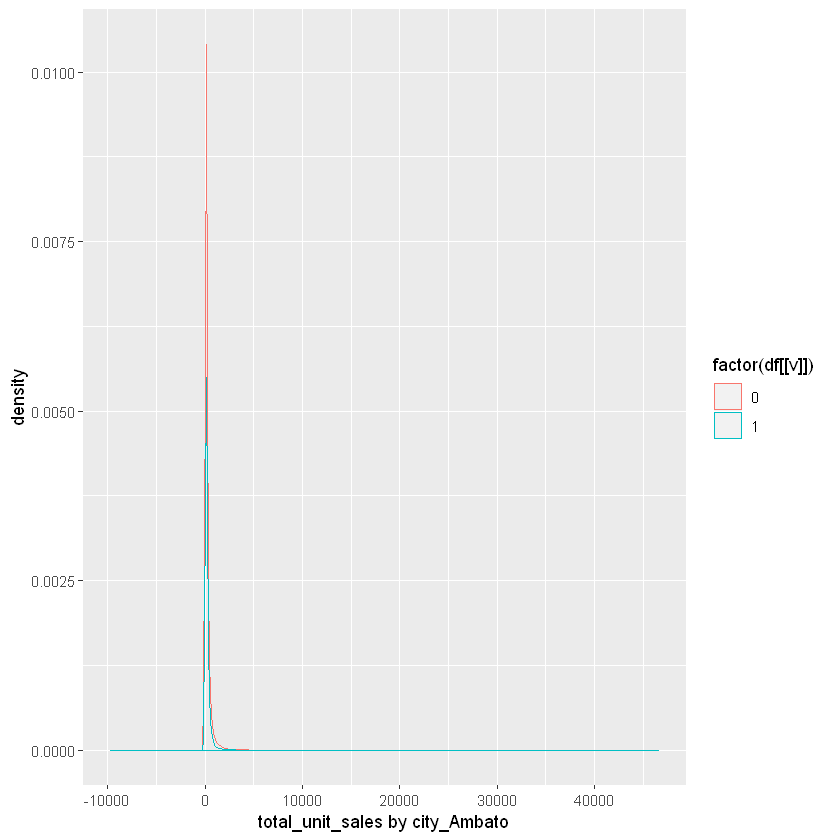

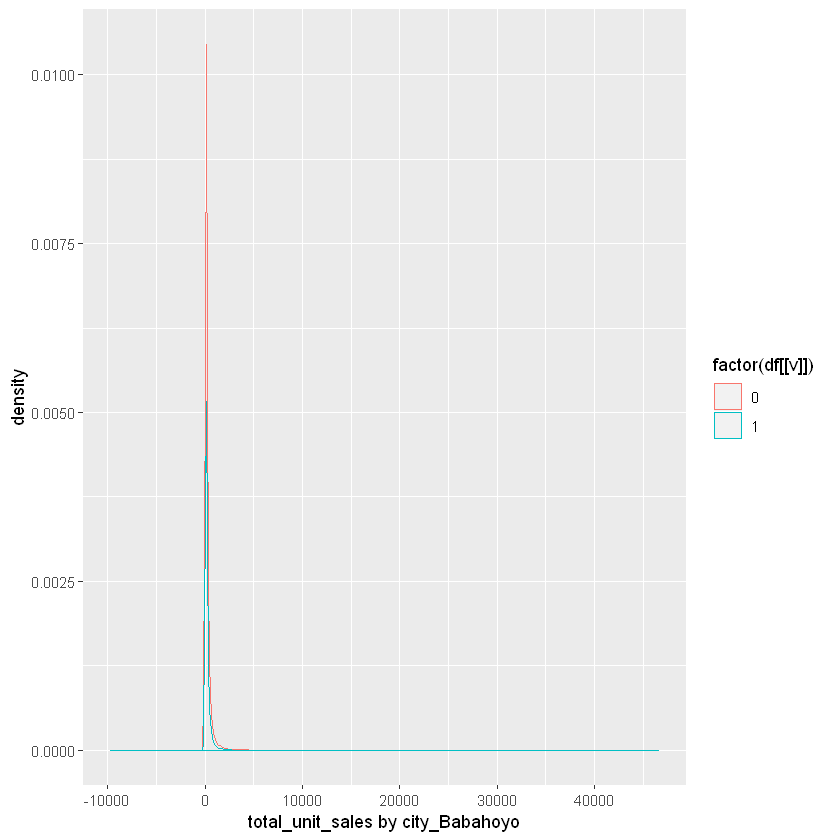

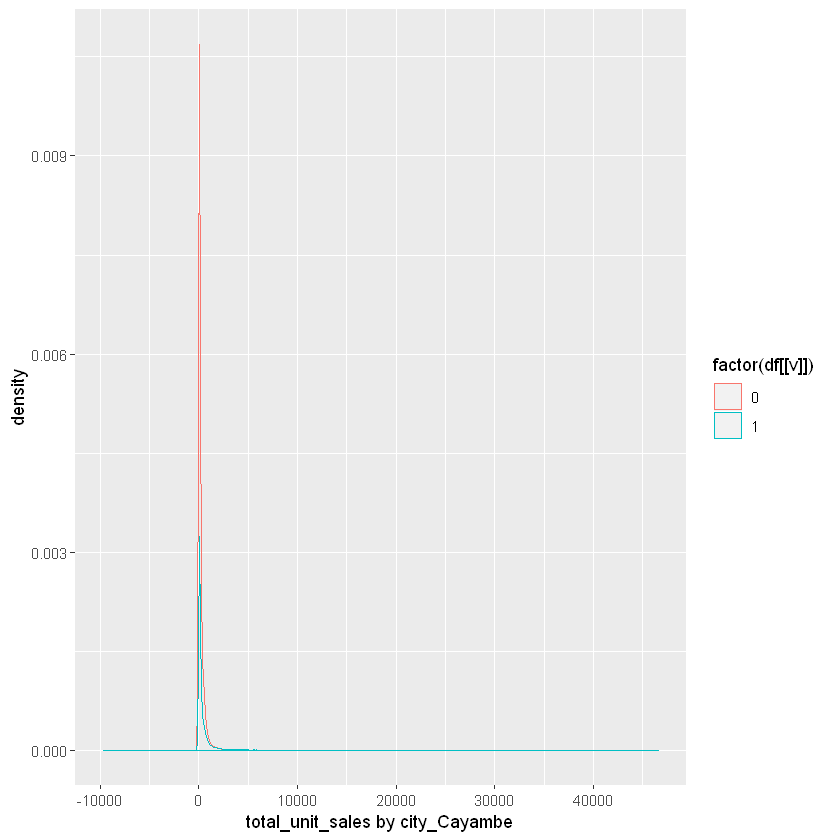

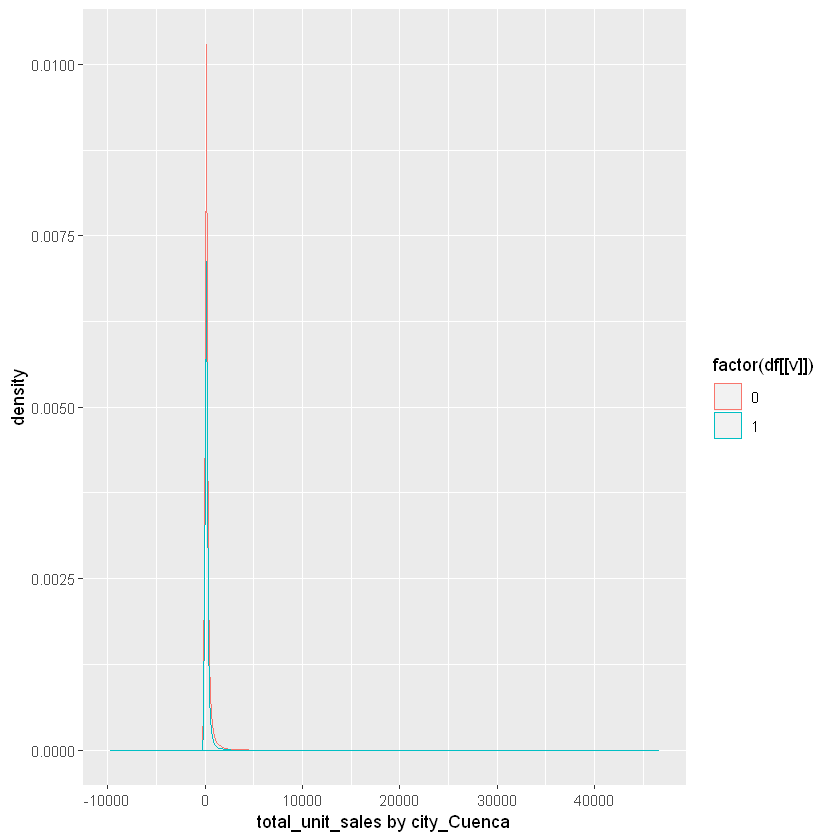

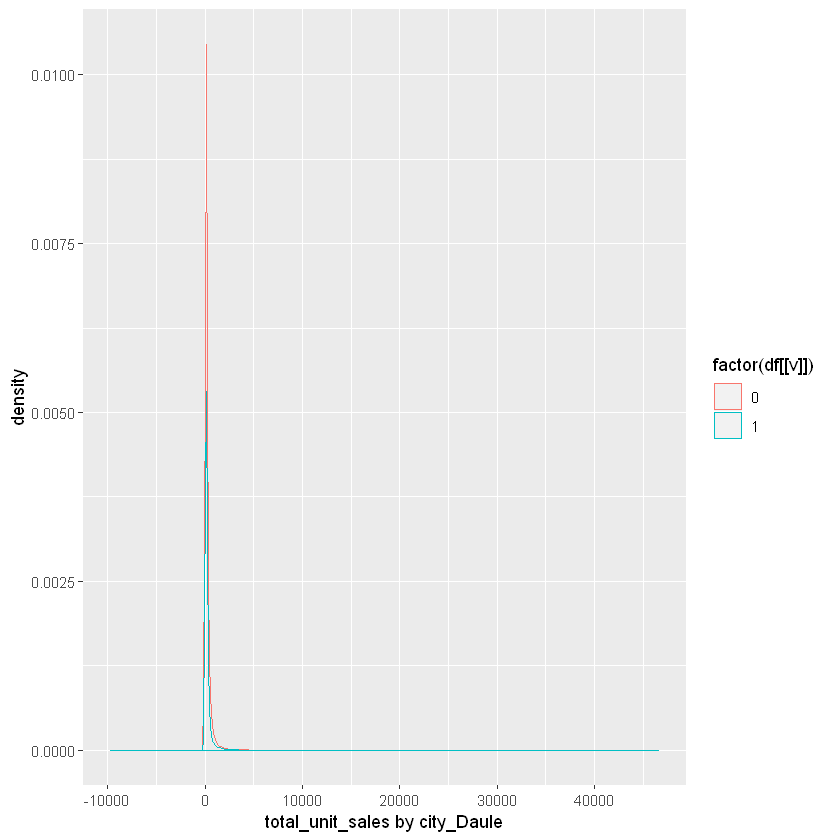

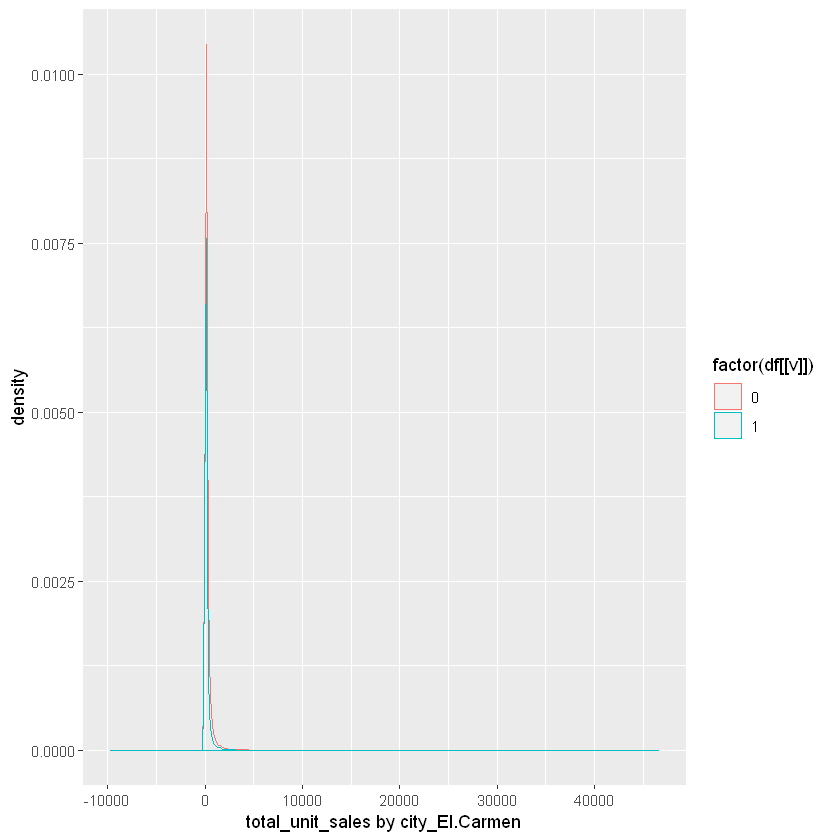

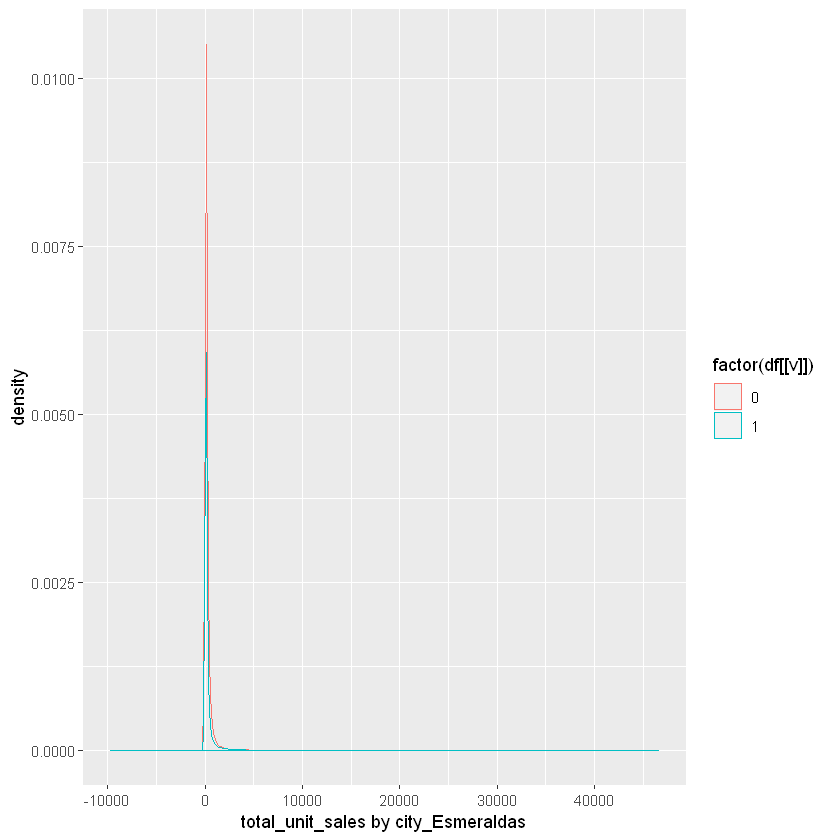

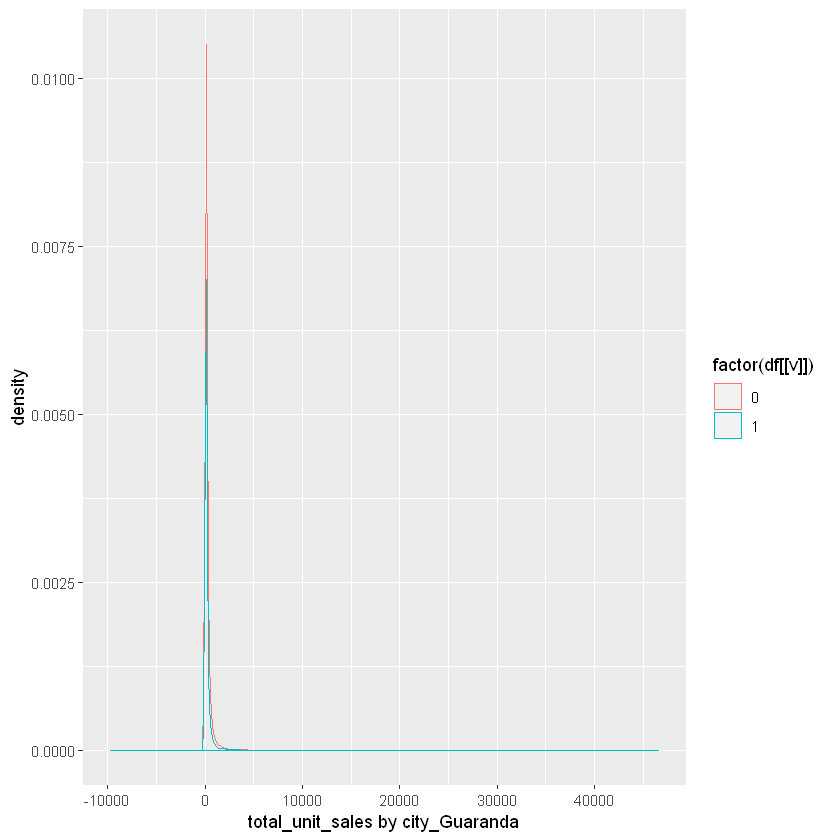

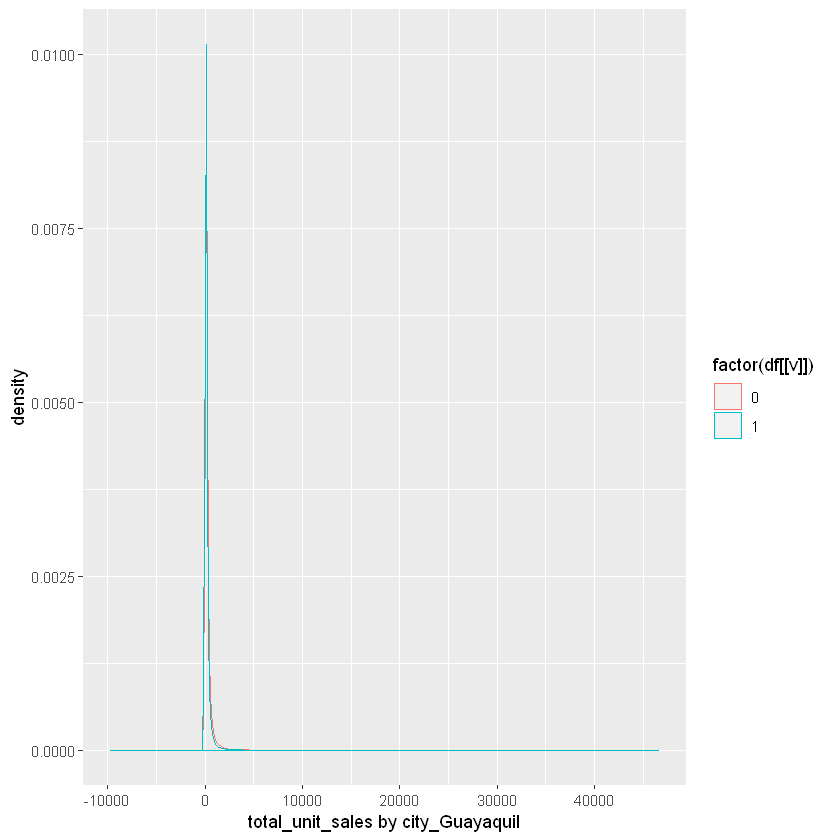

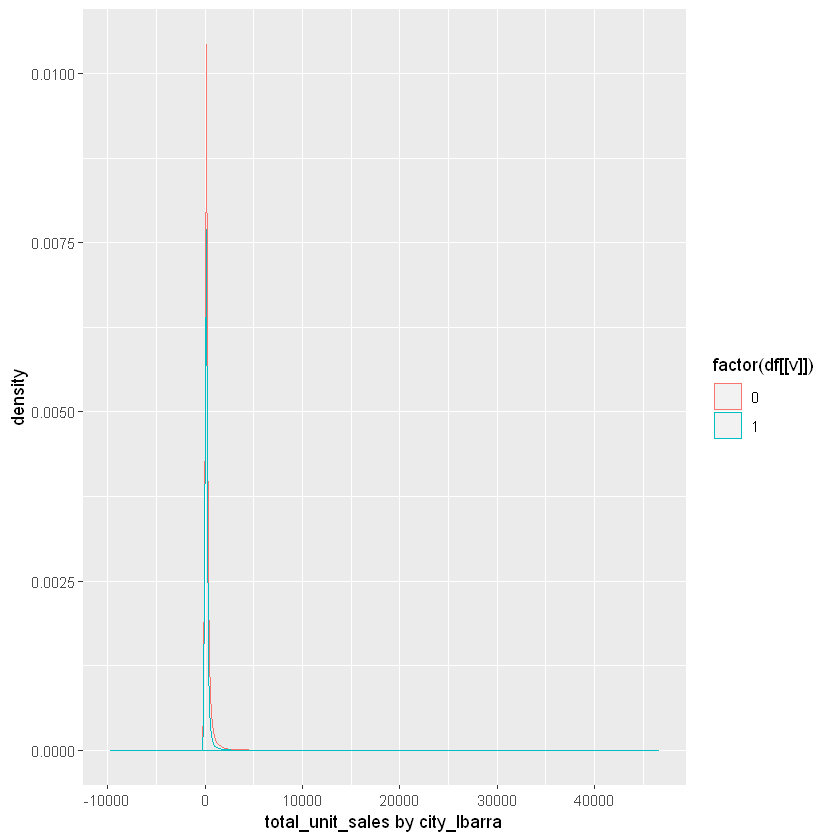

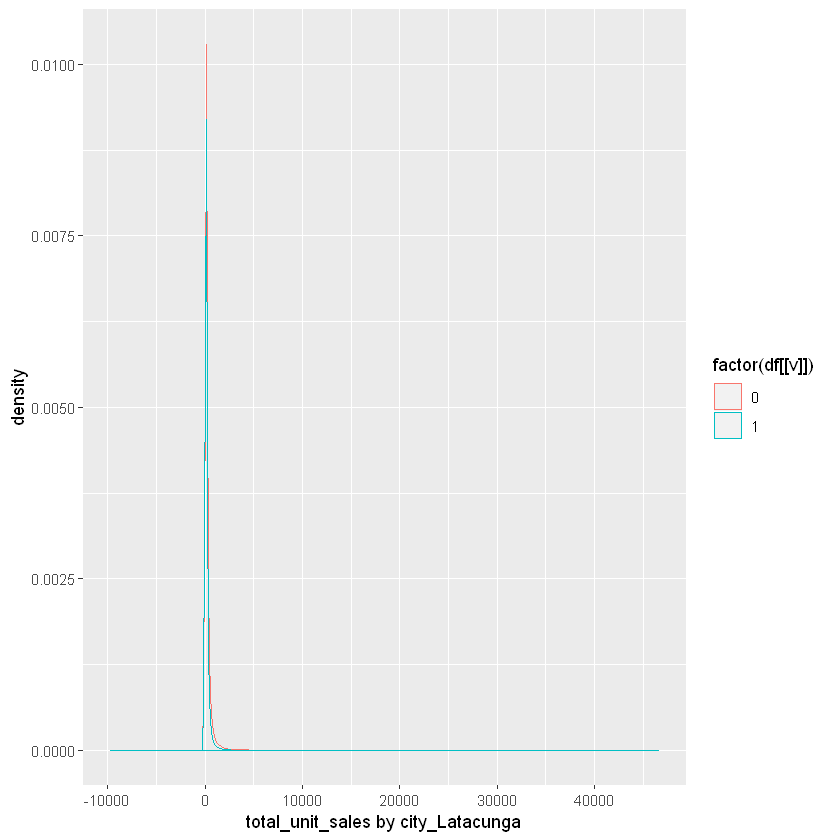

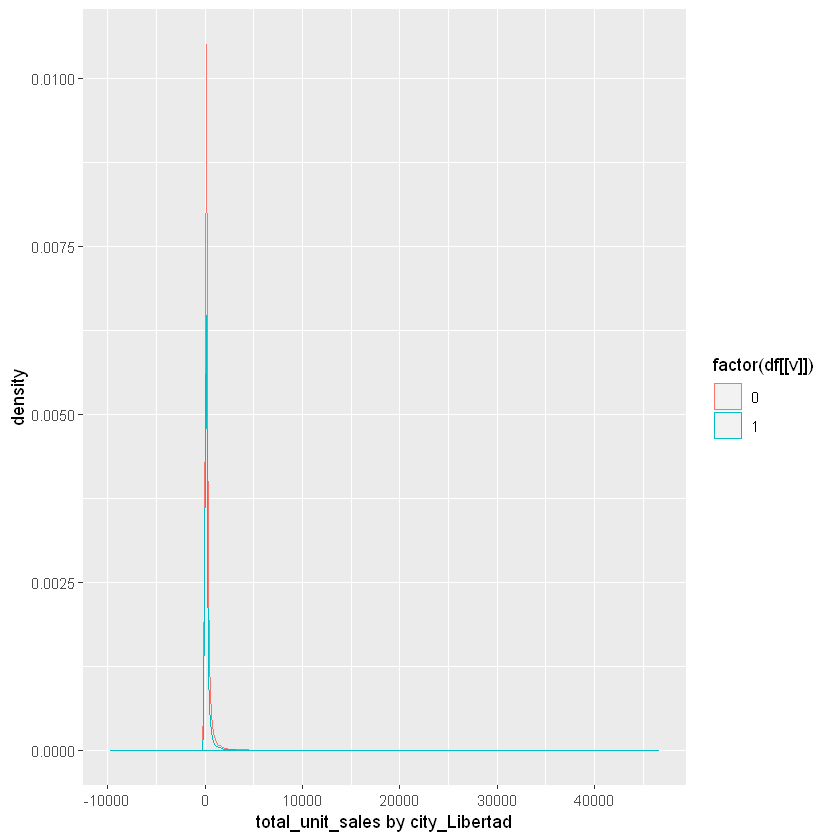

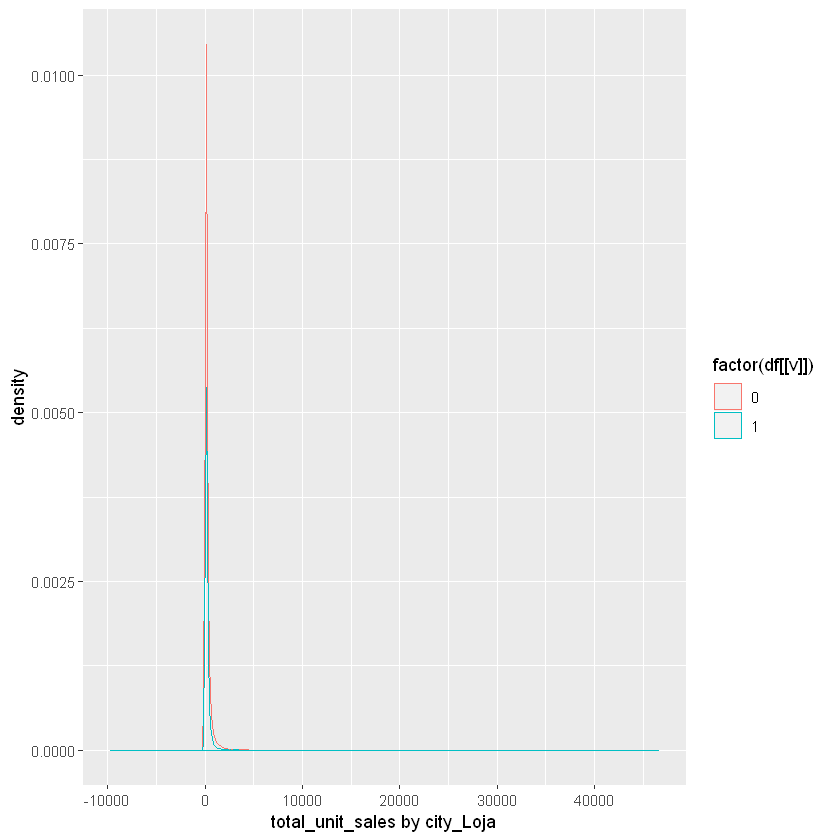

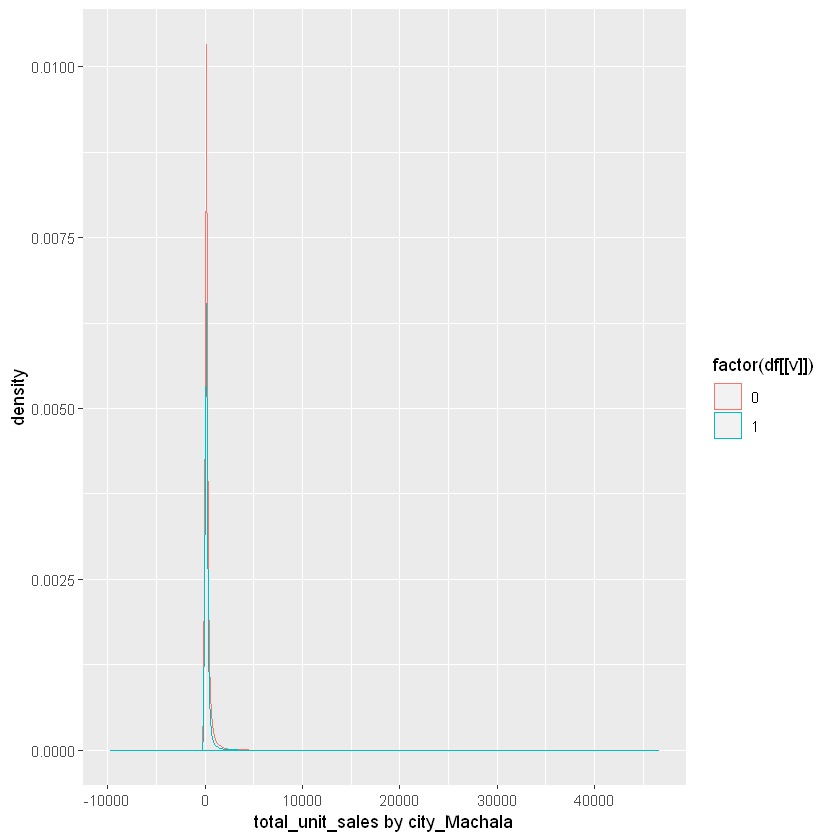

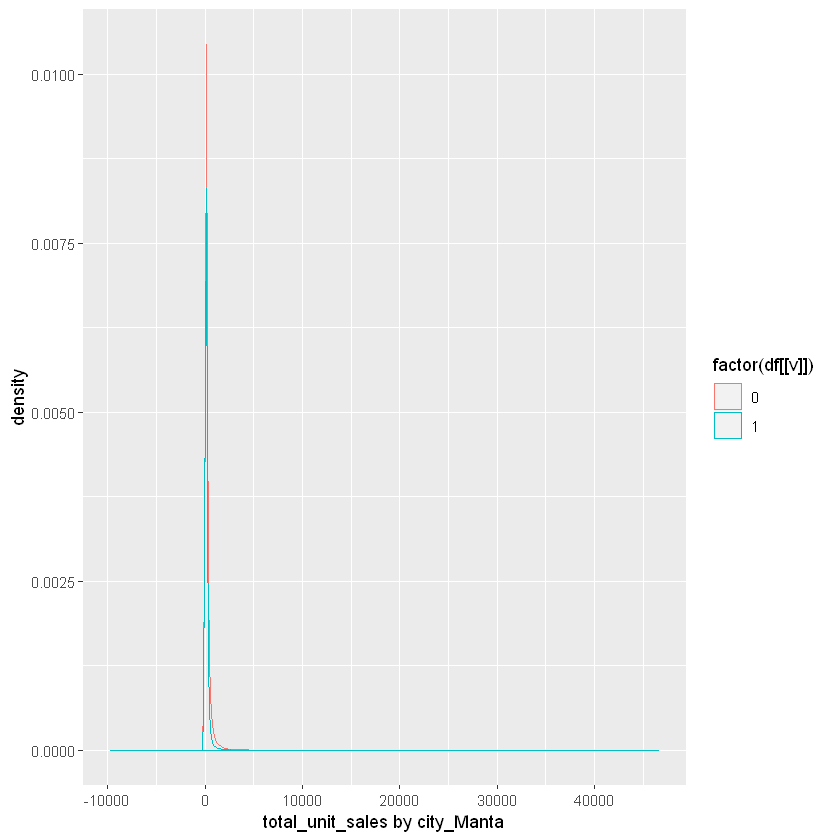

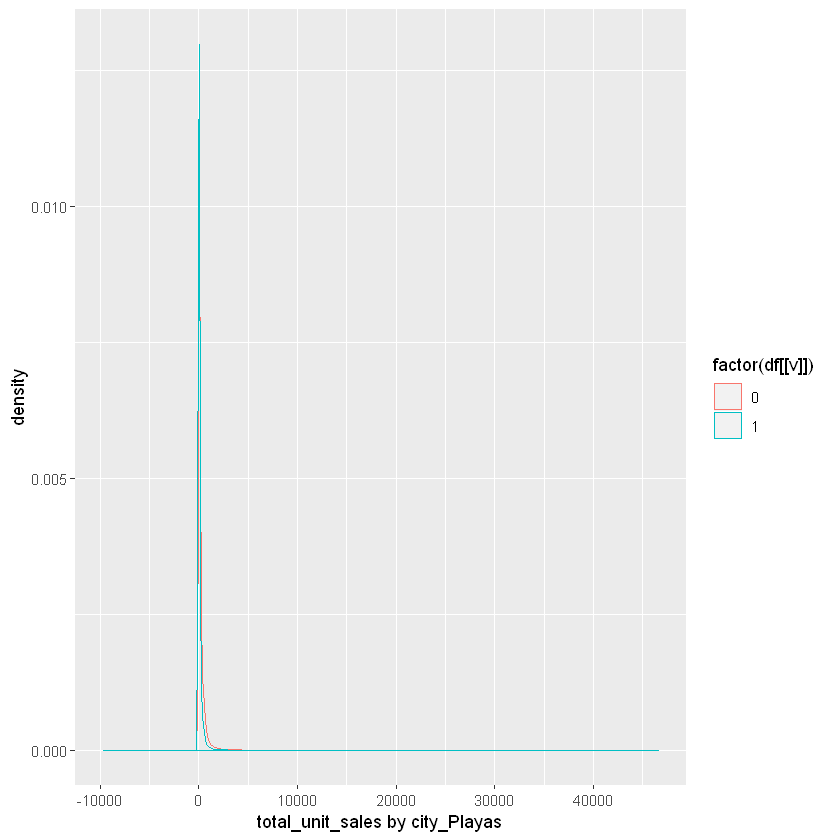

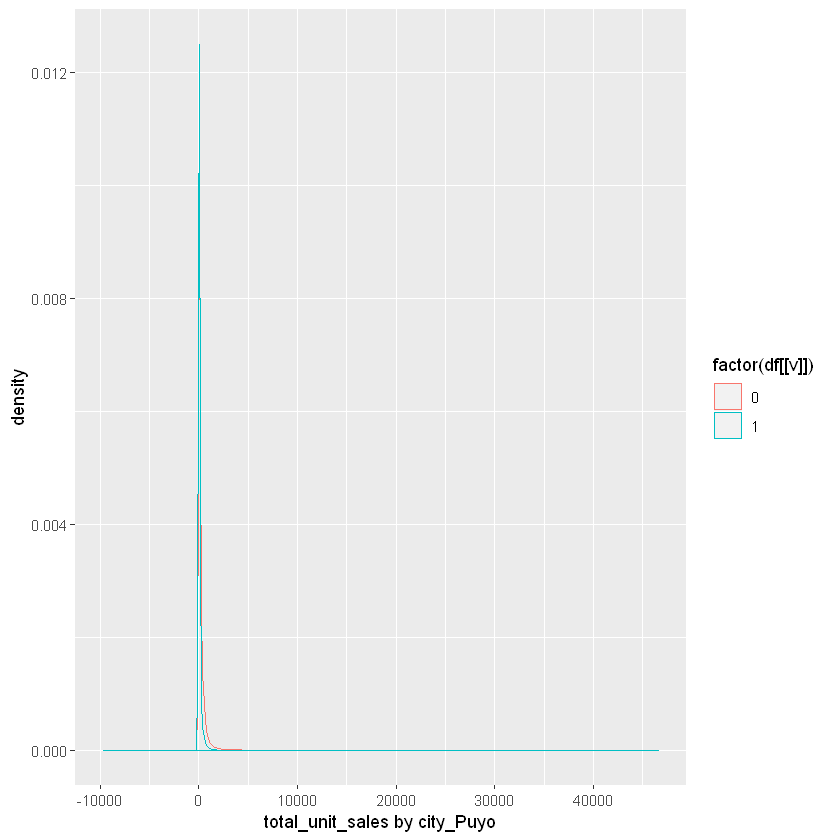

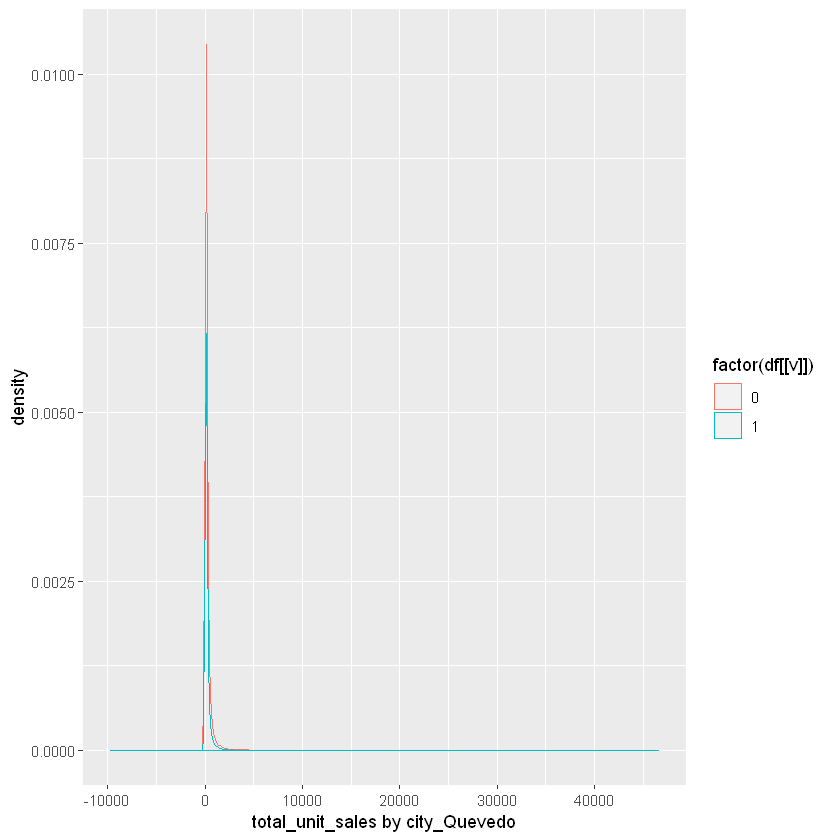

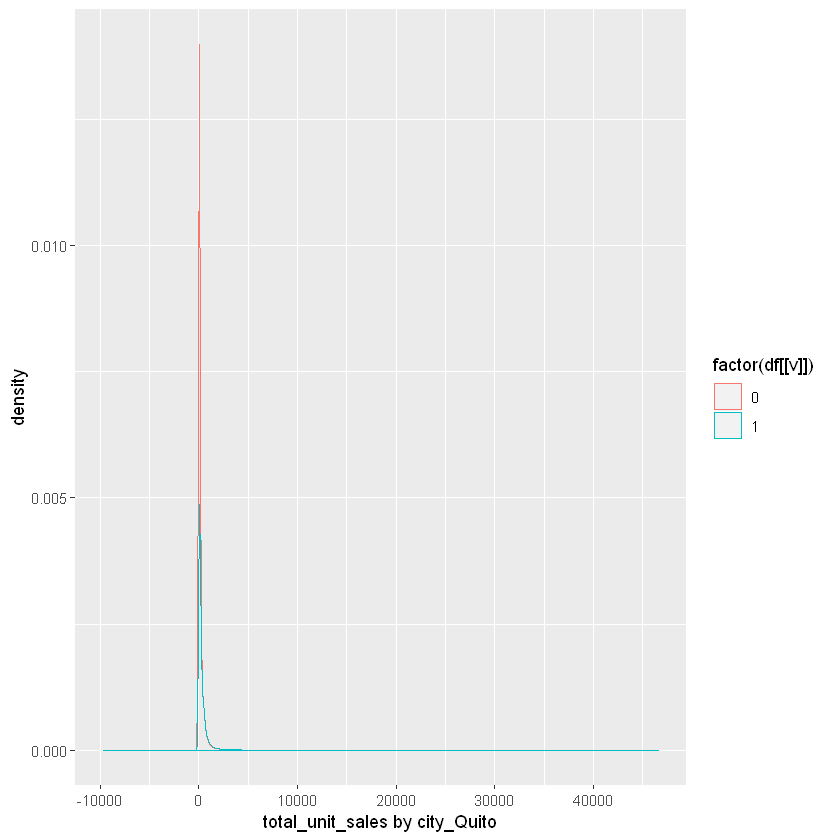

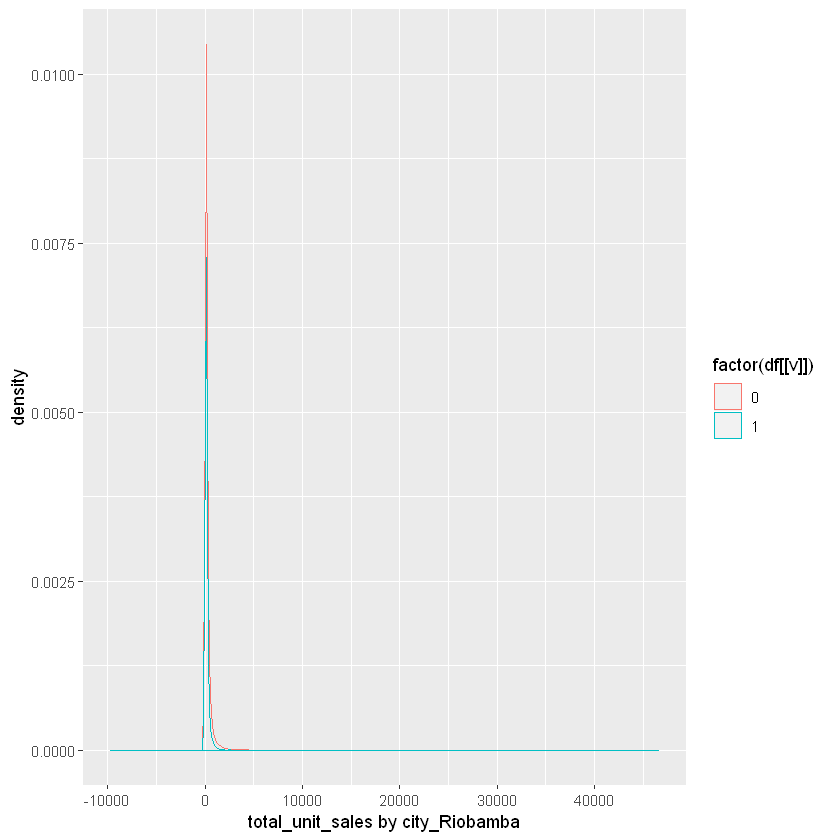

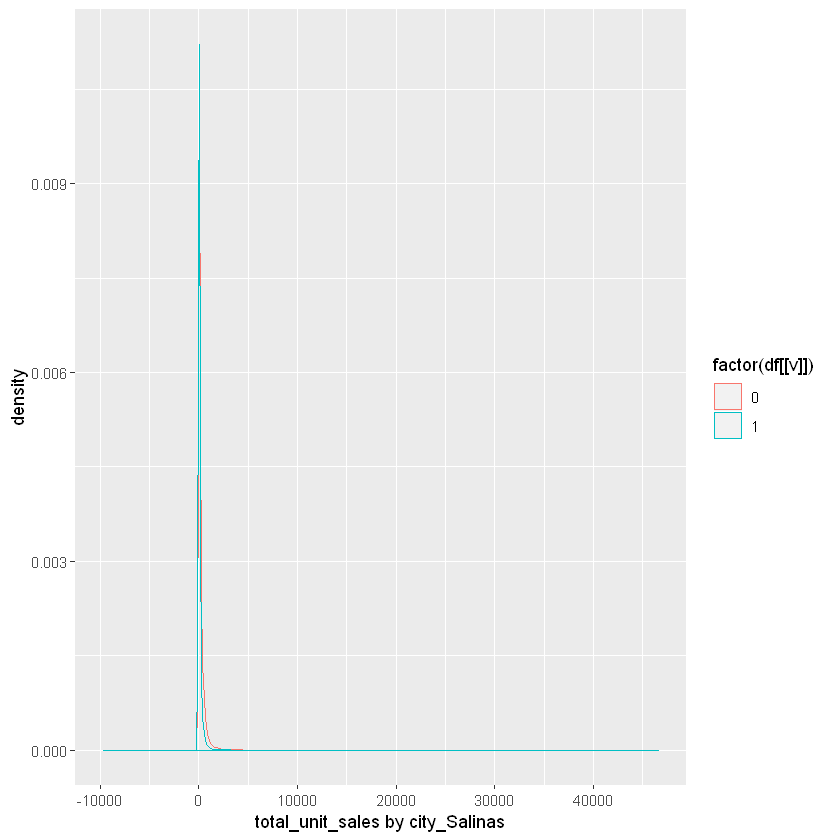

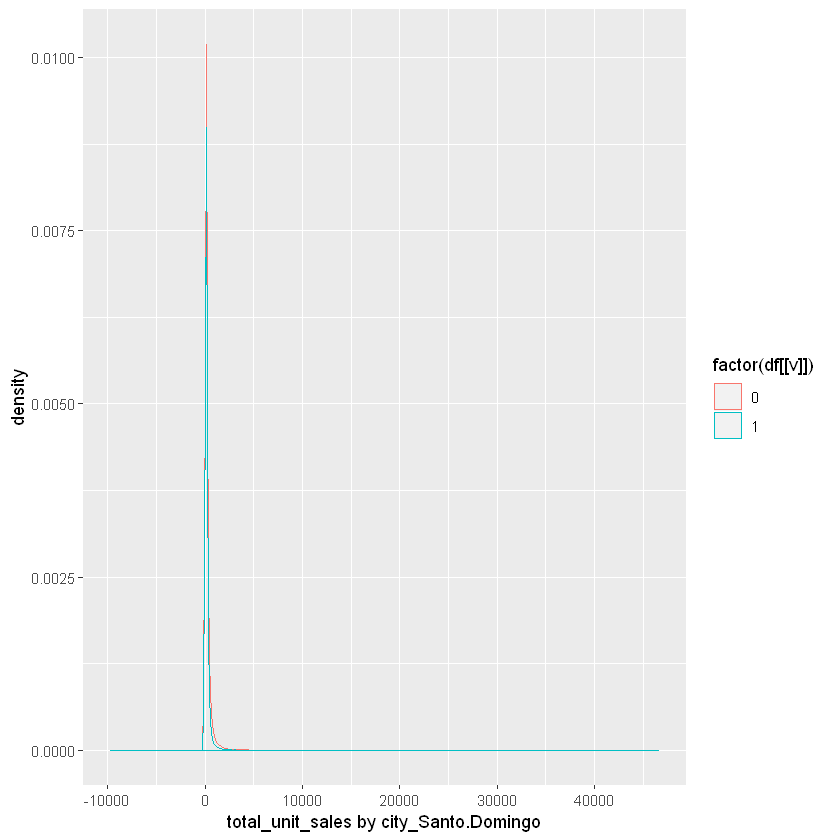

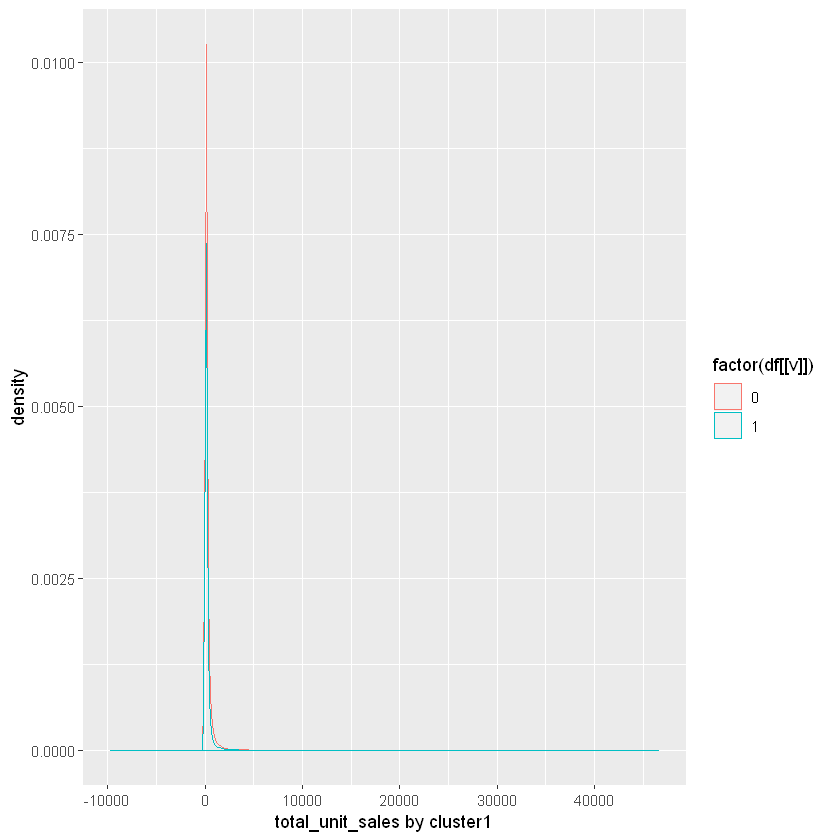

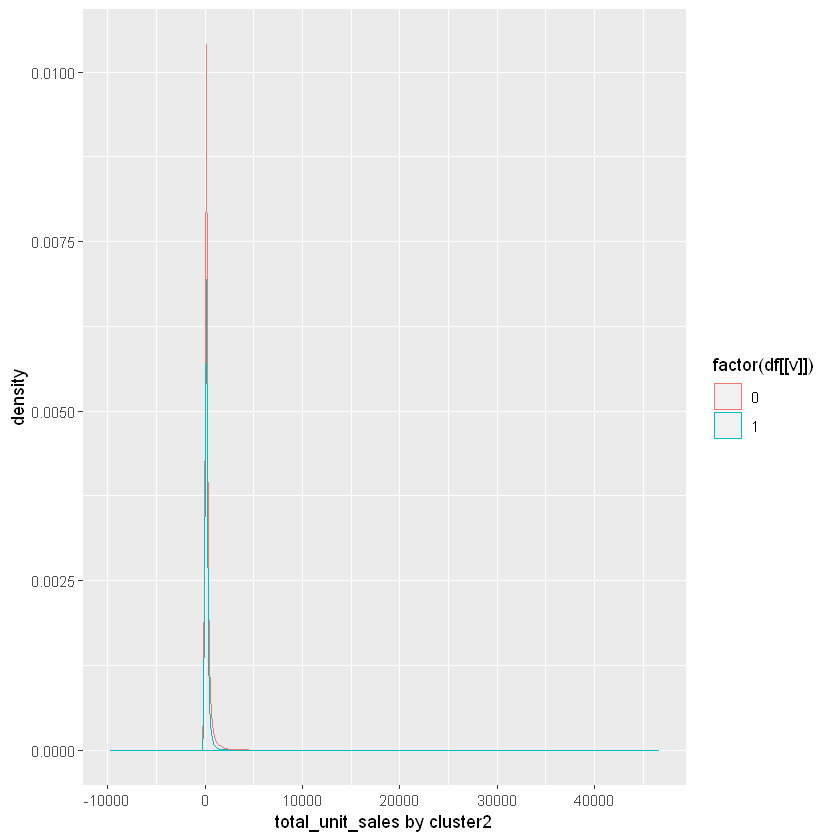

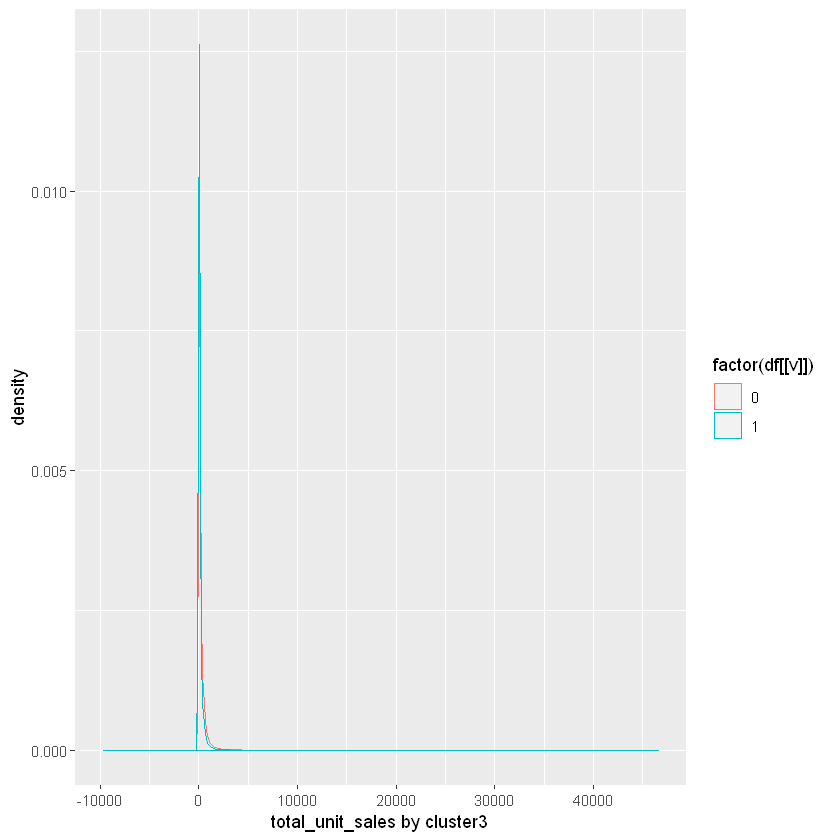

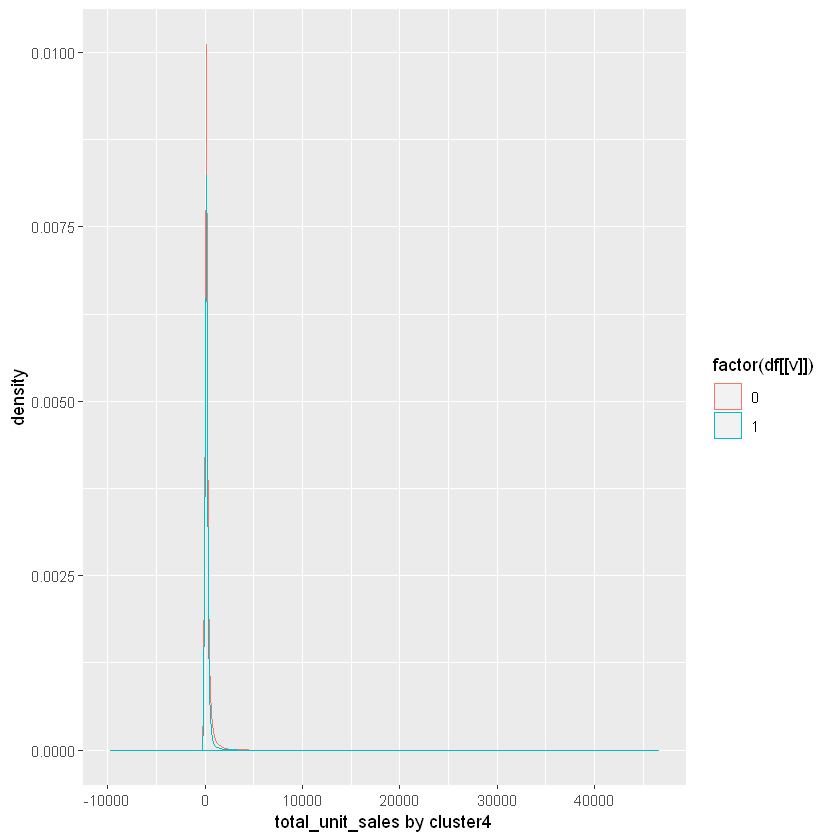

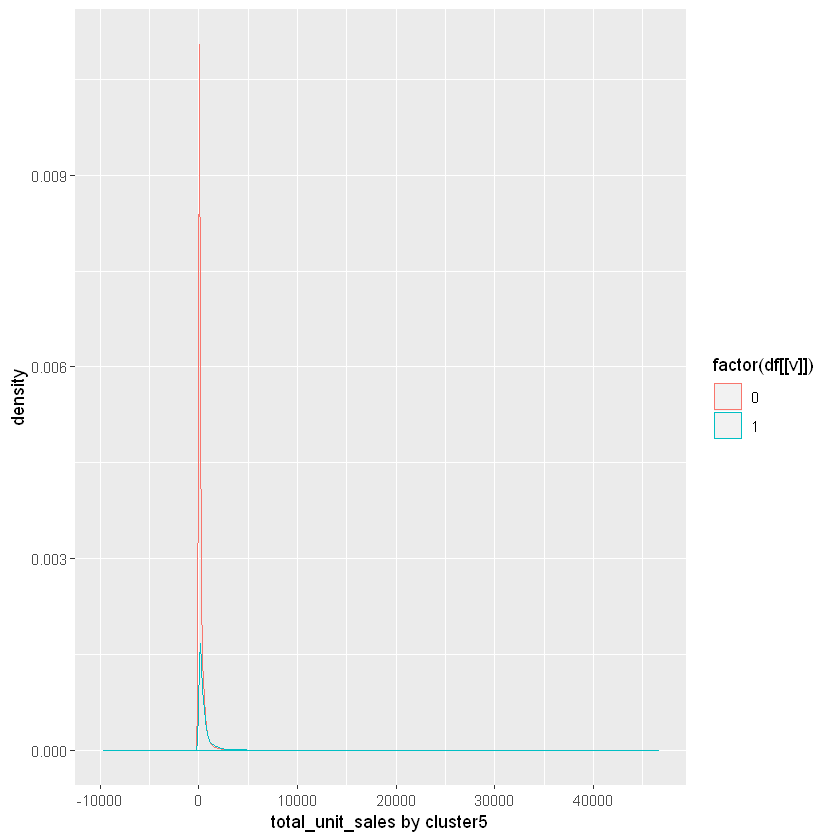

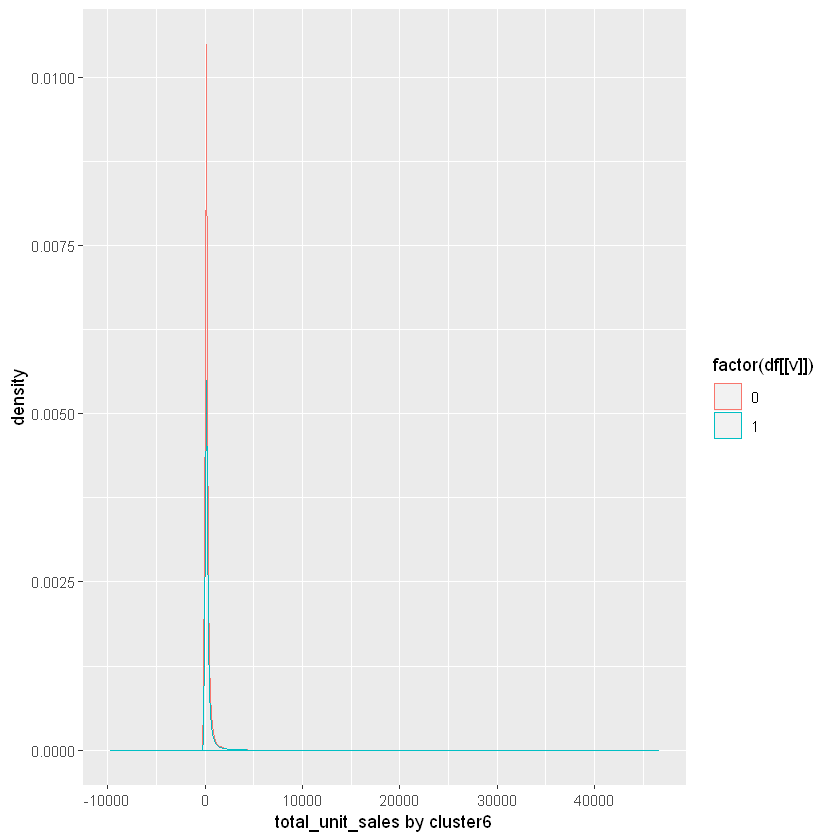

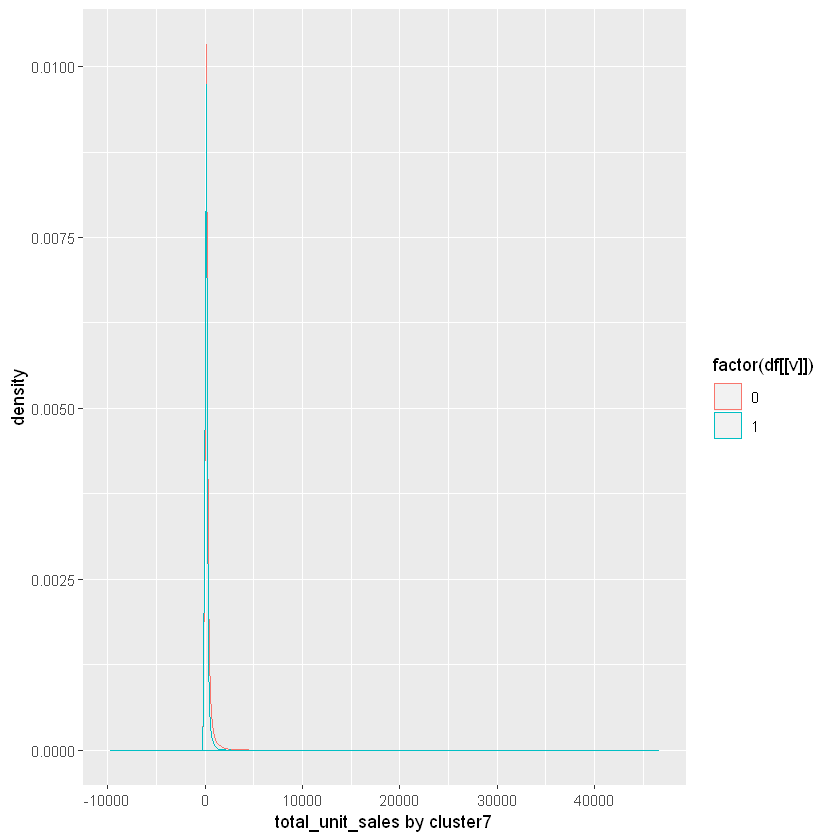

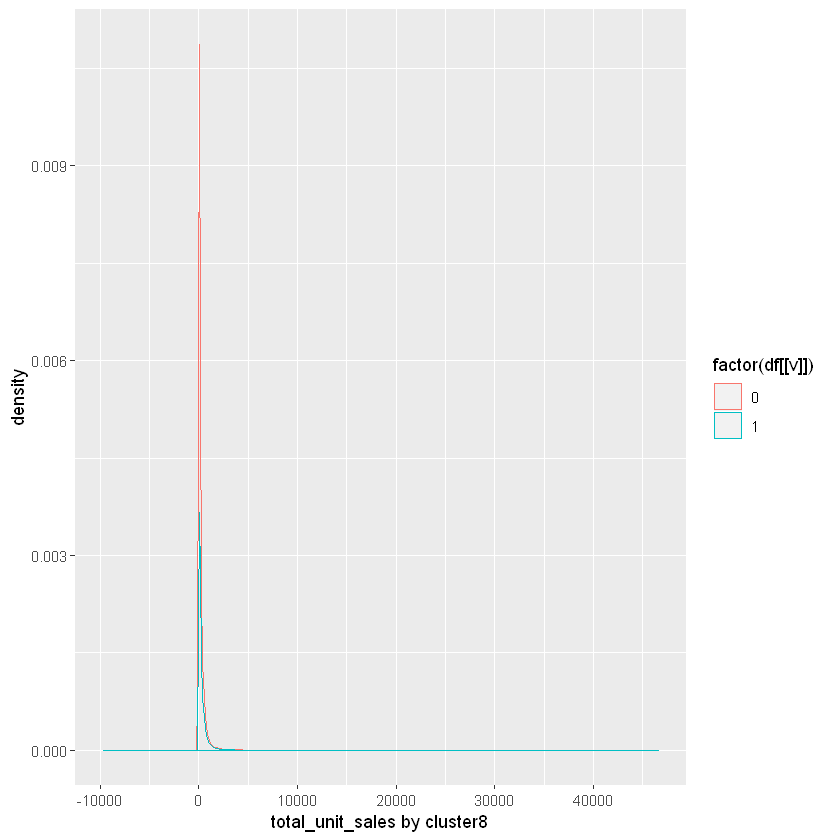

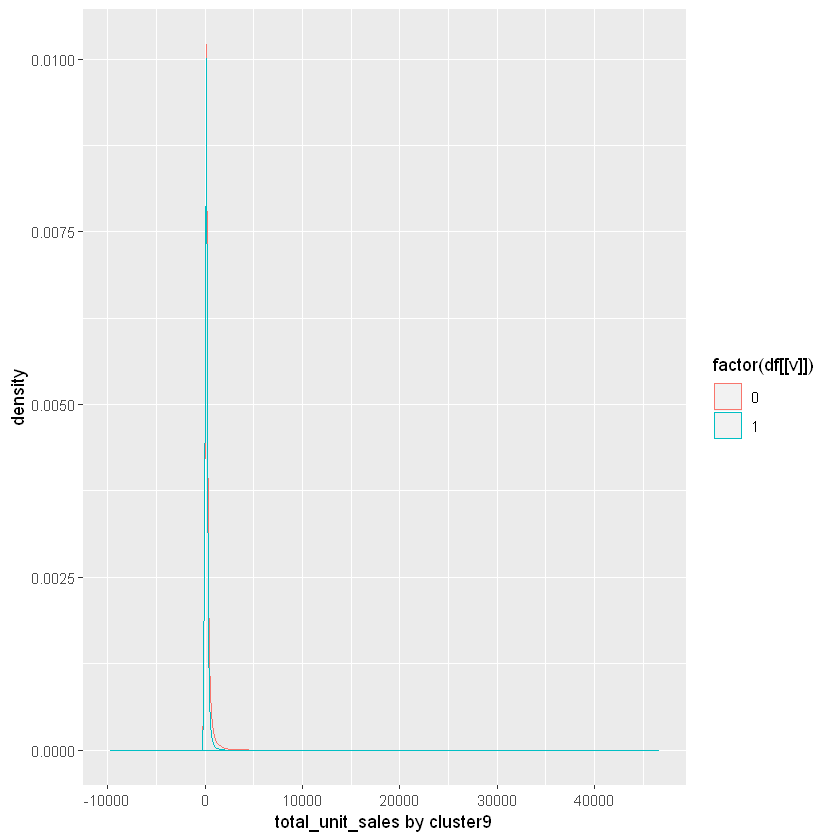

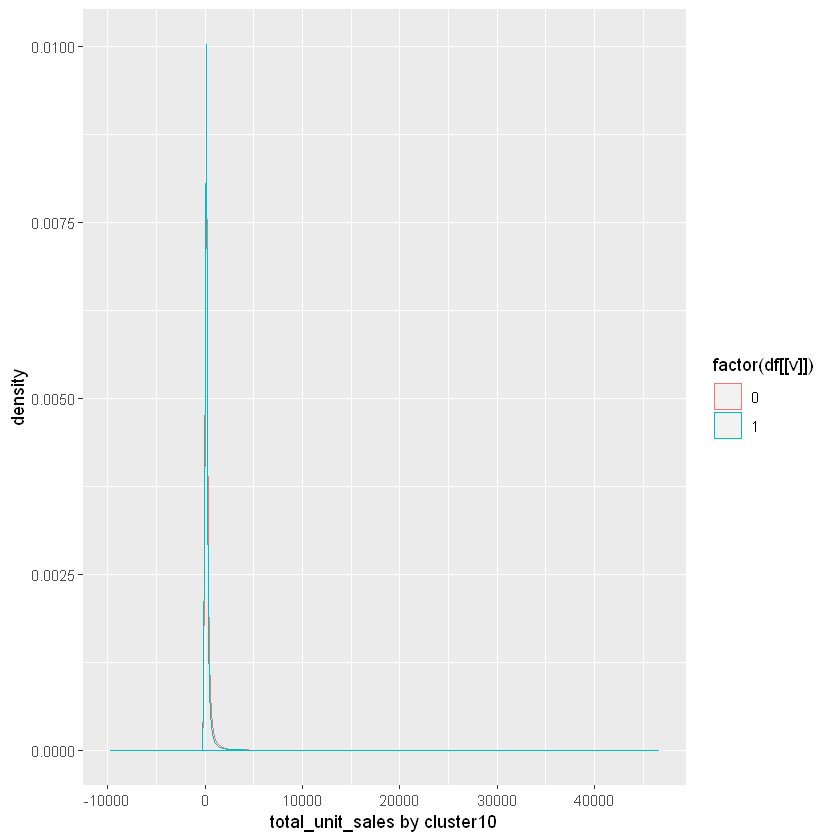

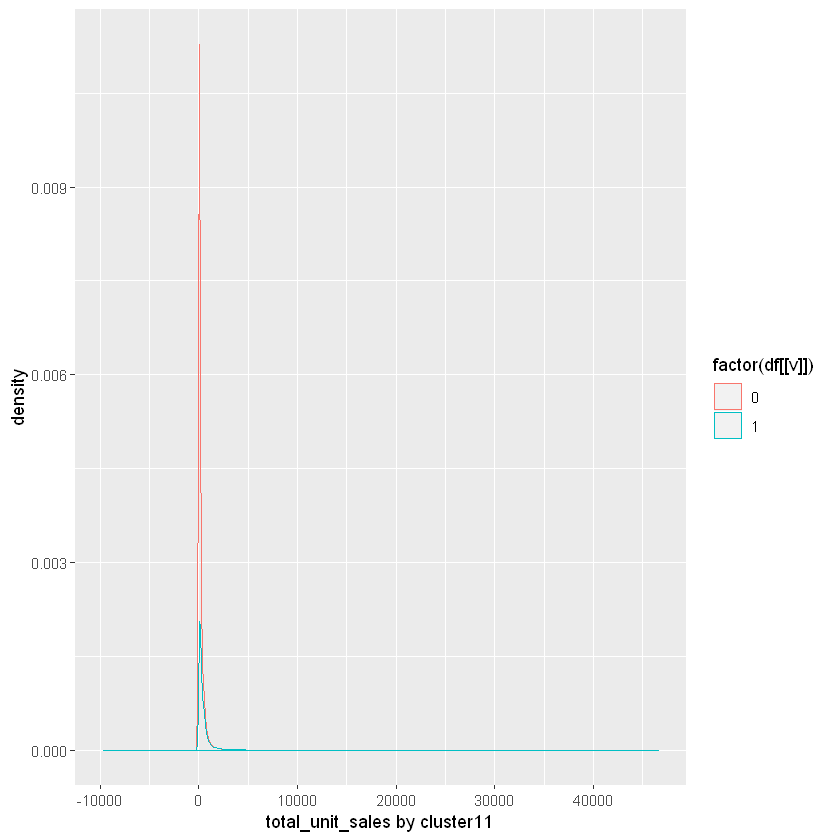

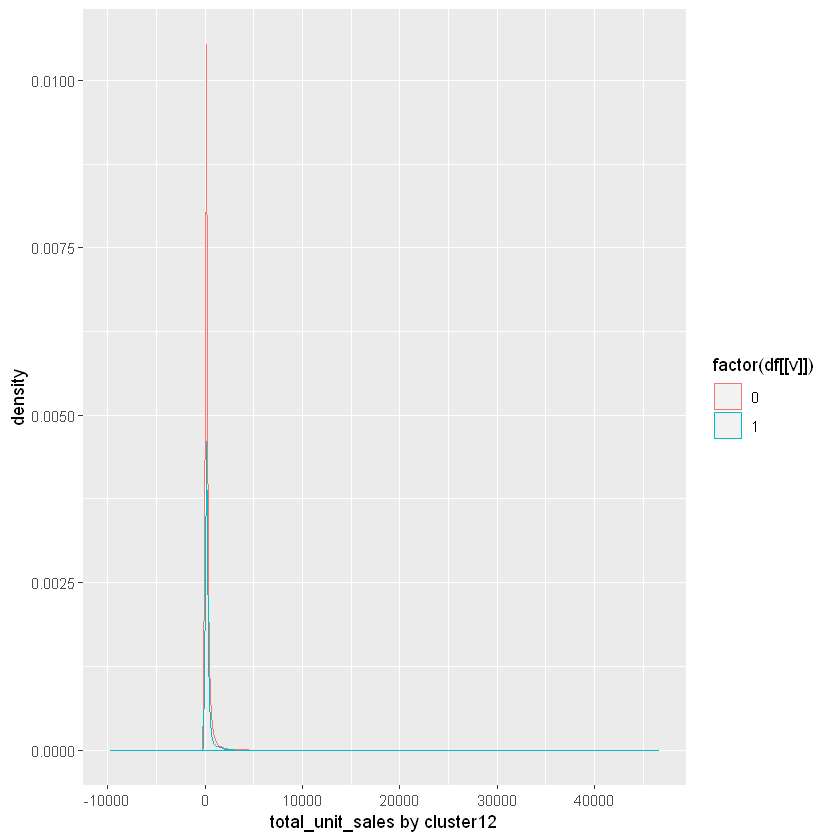

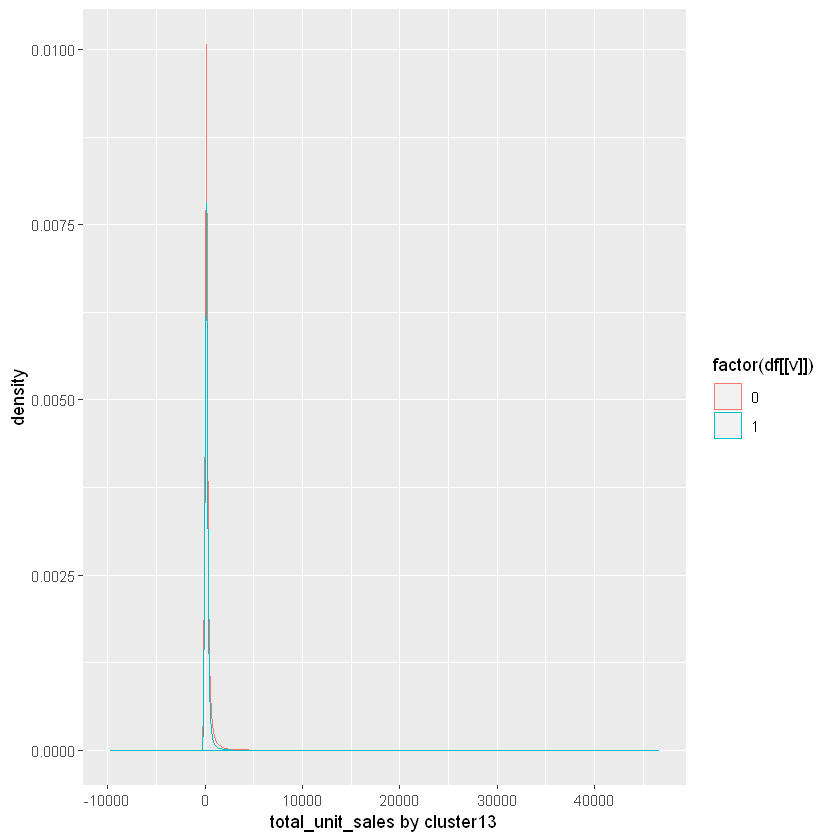

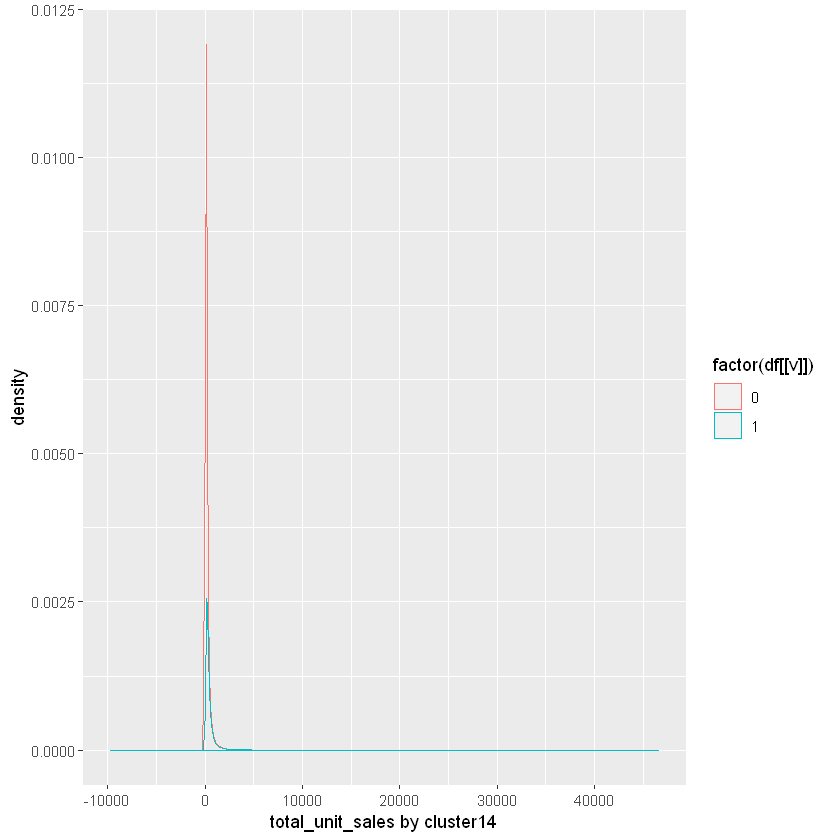

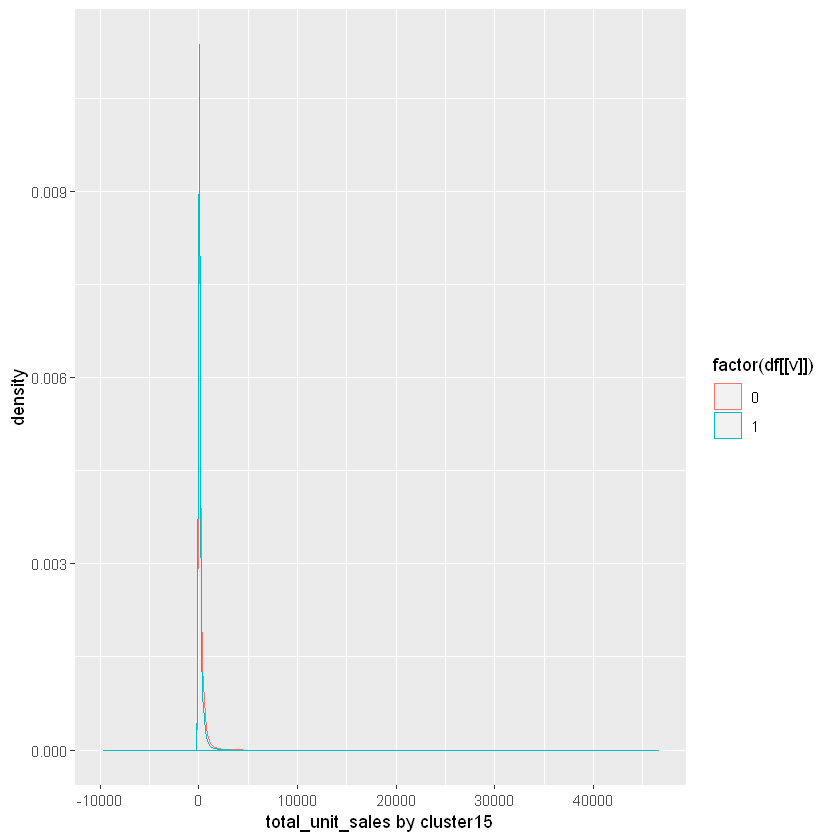

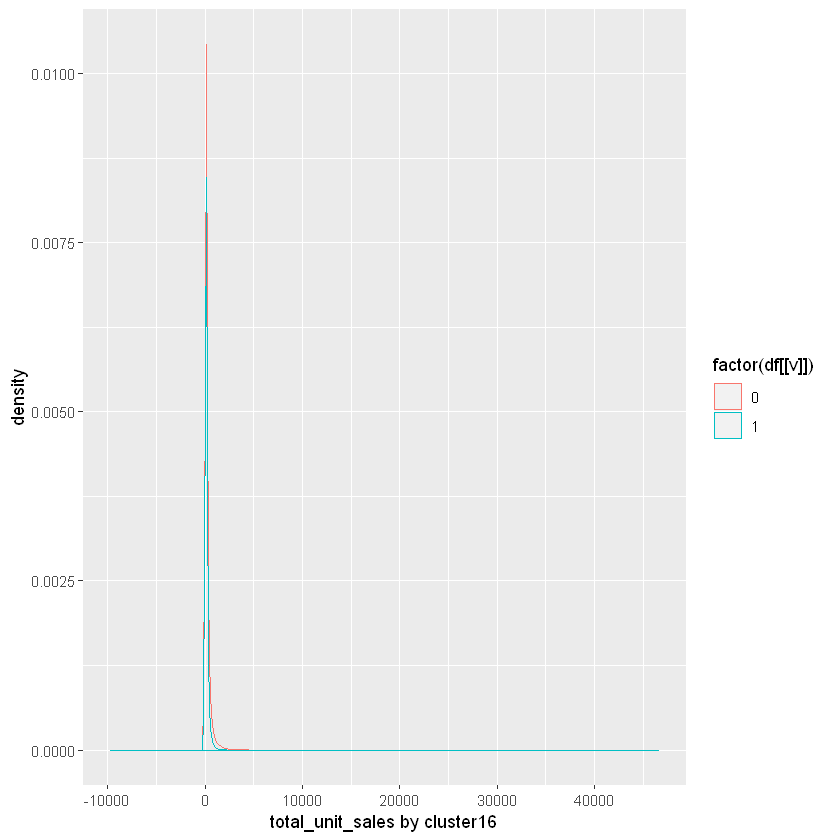

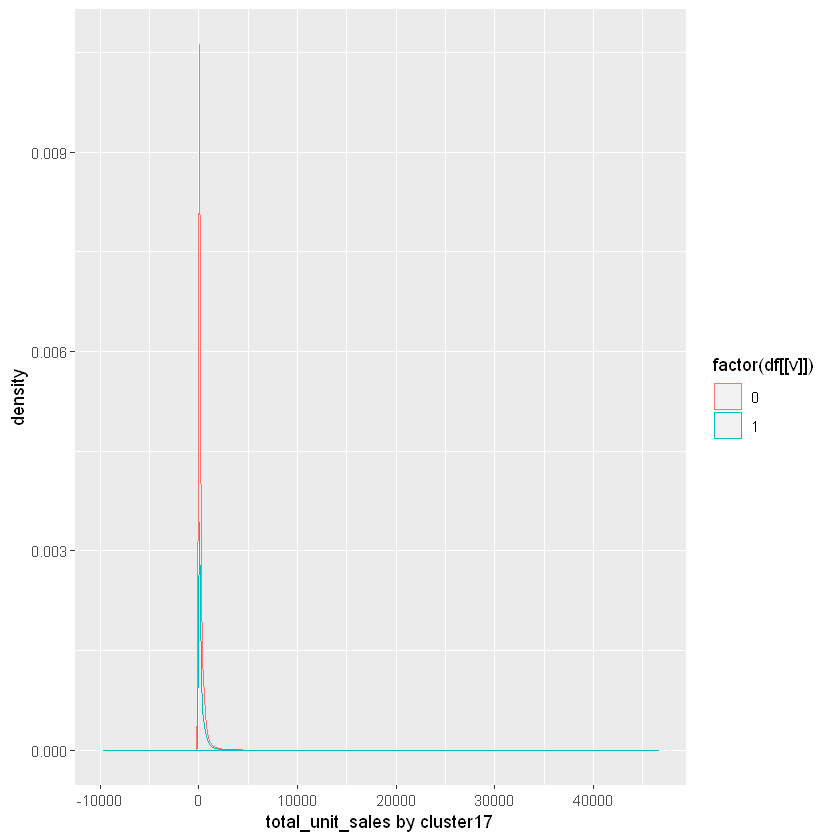

In [29]:
##distribution of revenue by categorical variables
for (v in cf) {
    print(ggplot(df,aes(x=df$total_unit_sales, group=factor(df[[v]]),
                          color=factor(df[[v]]))) + xlab(paste('total_unit_sales by',v,sep=' ')) +
    geom_density(adjust=2))
}

In [29]:
df$id <- 1:nrow(df)

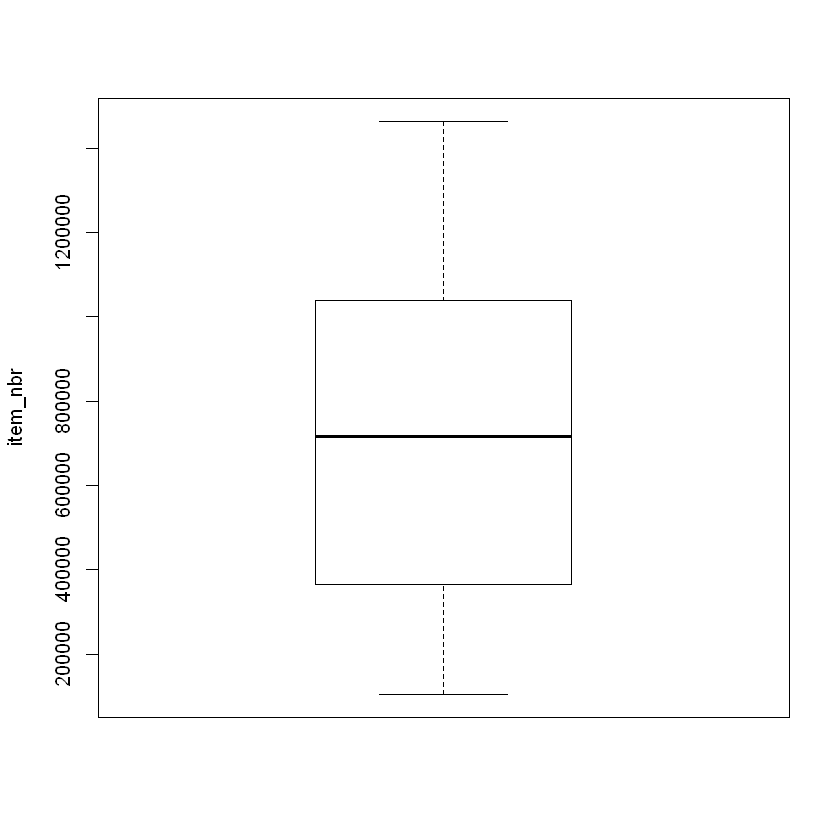

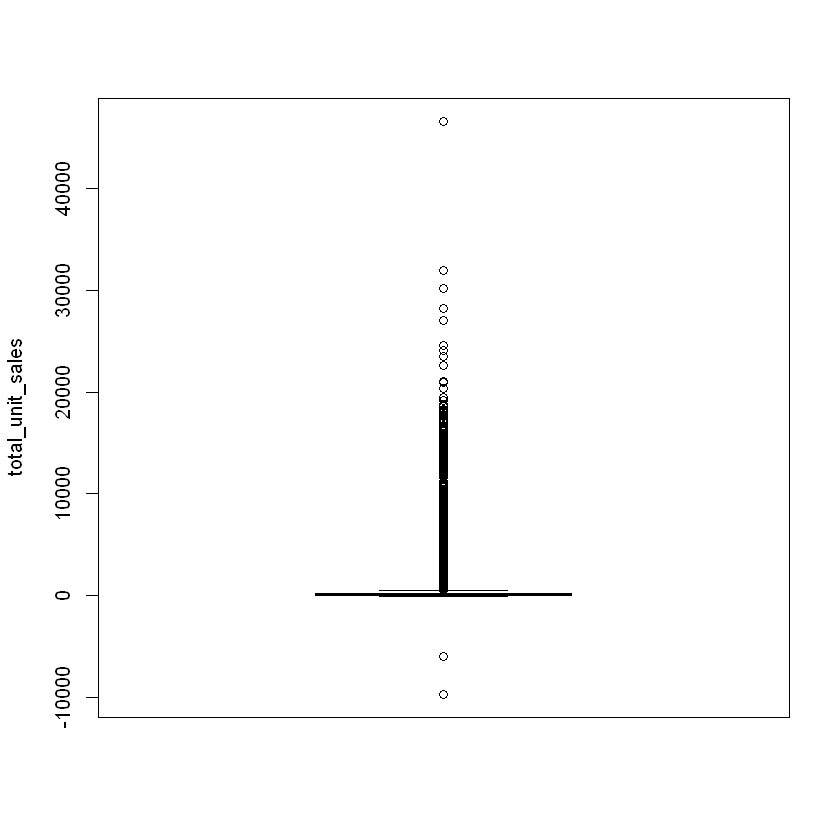

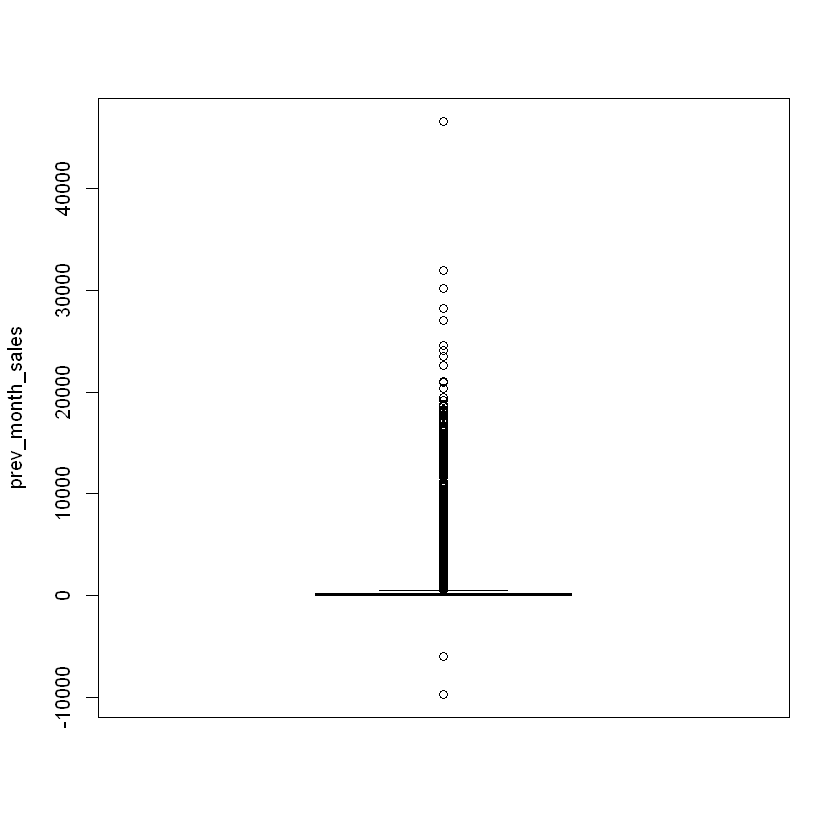

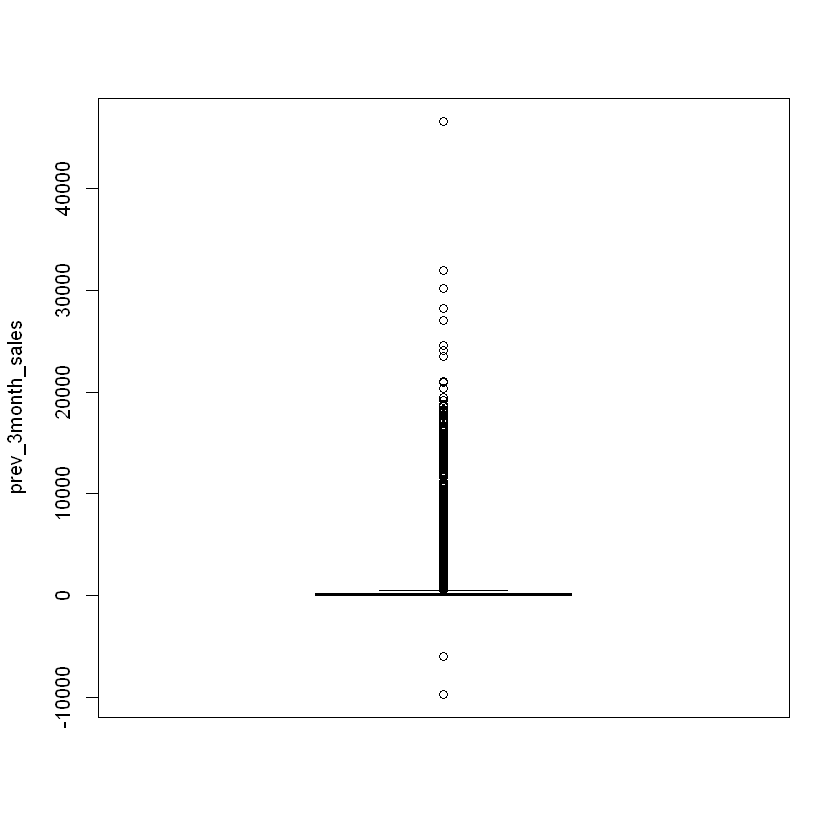

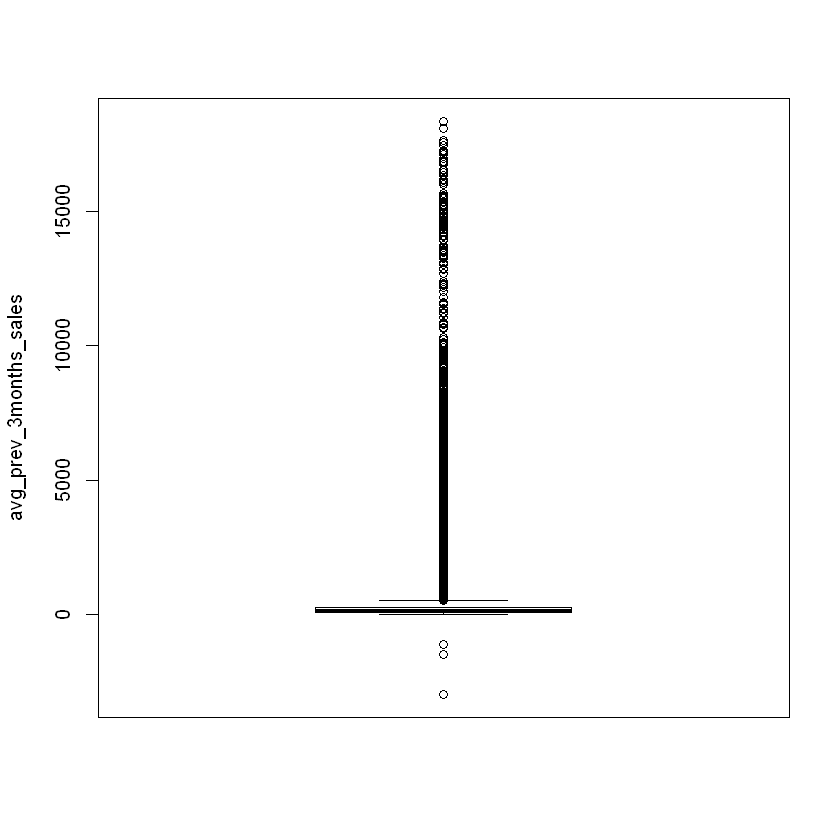

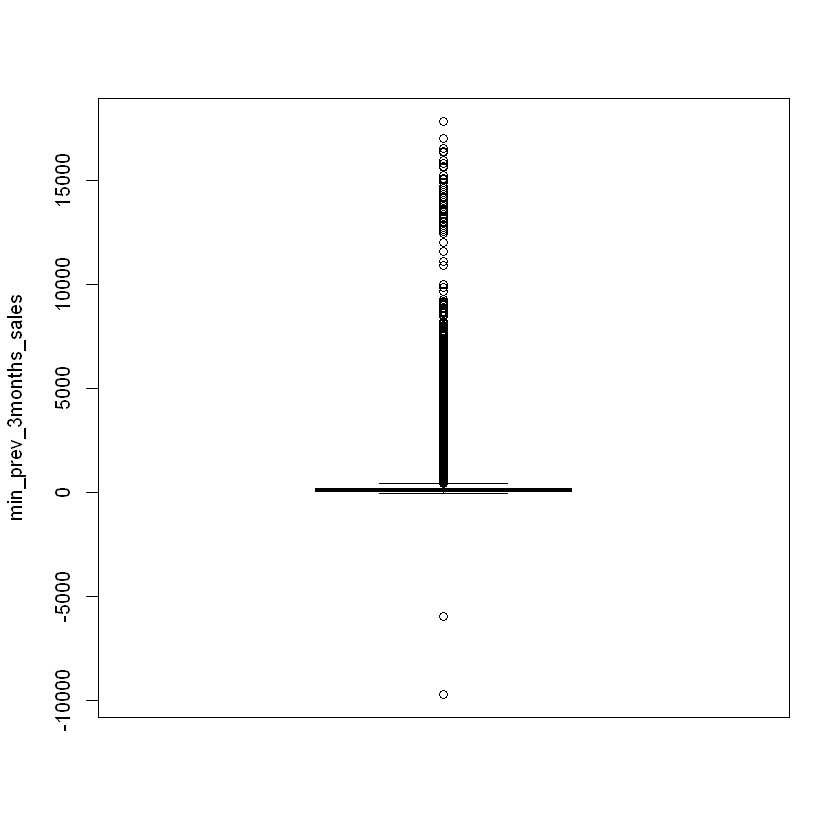

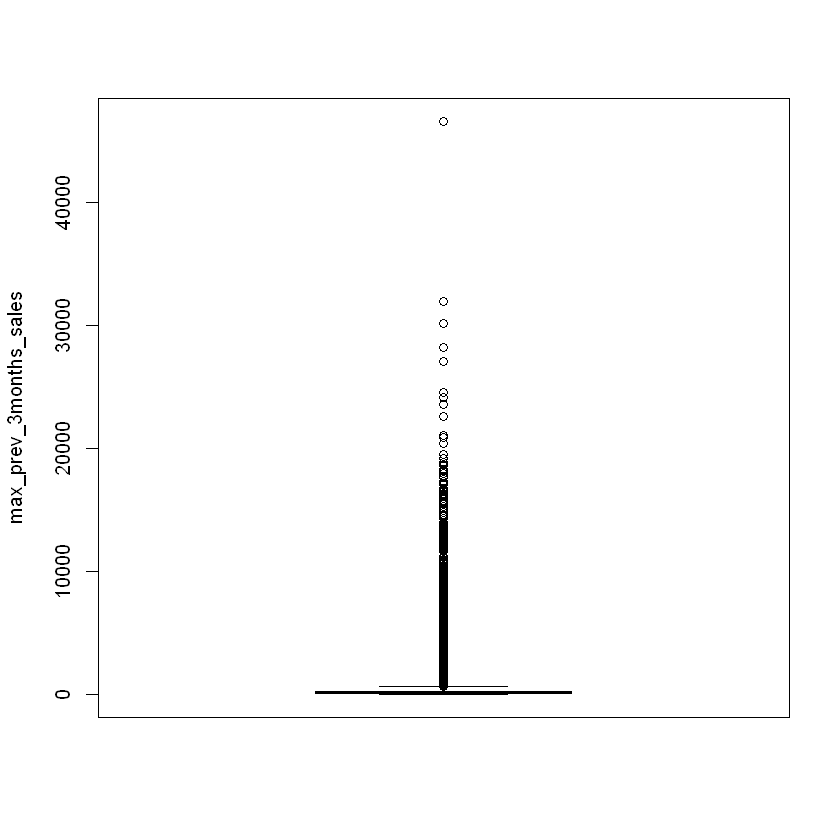

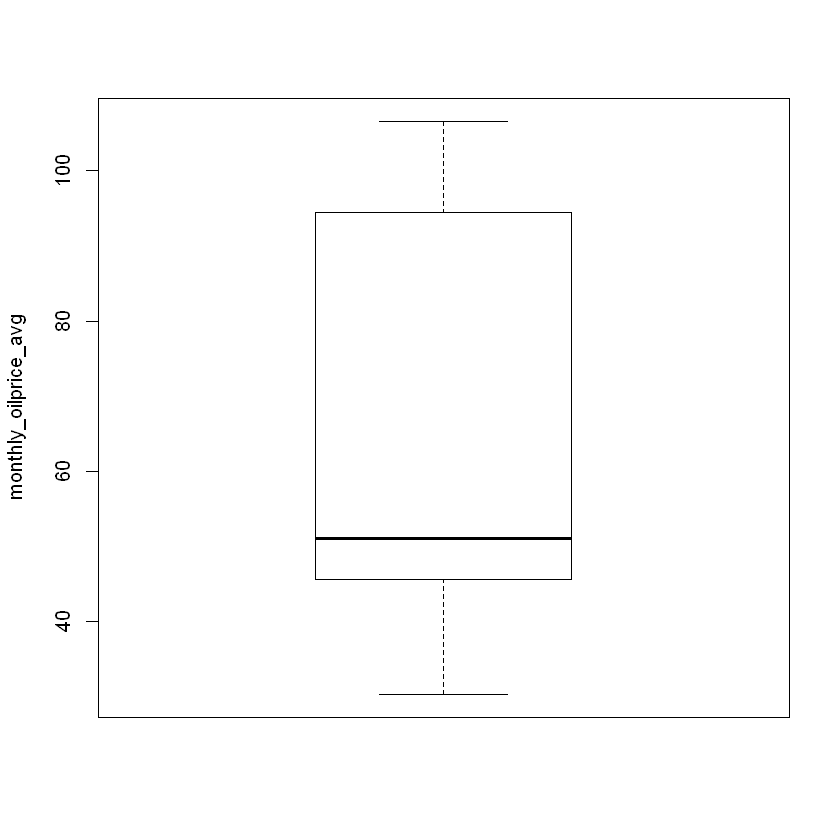

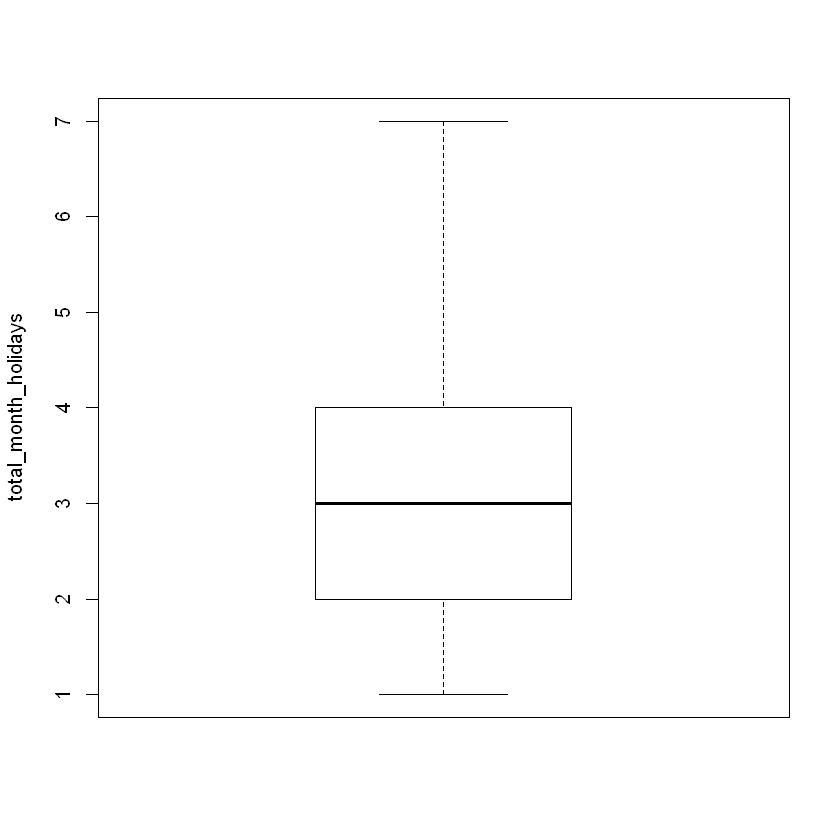

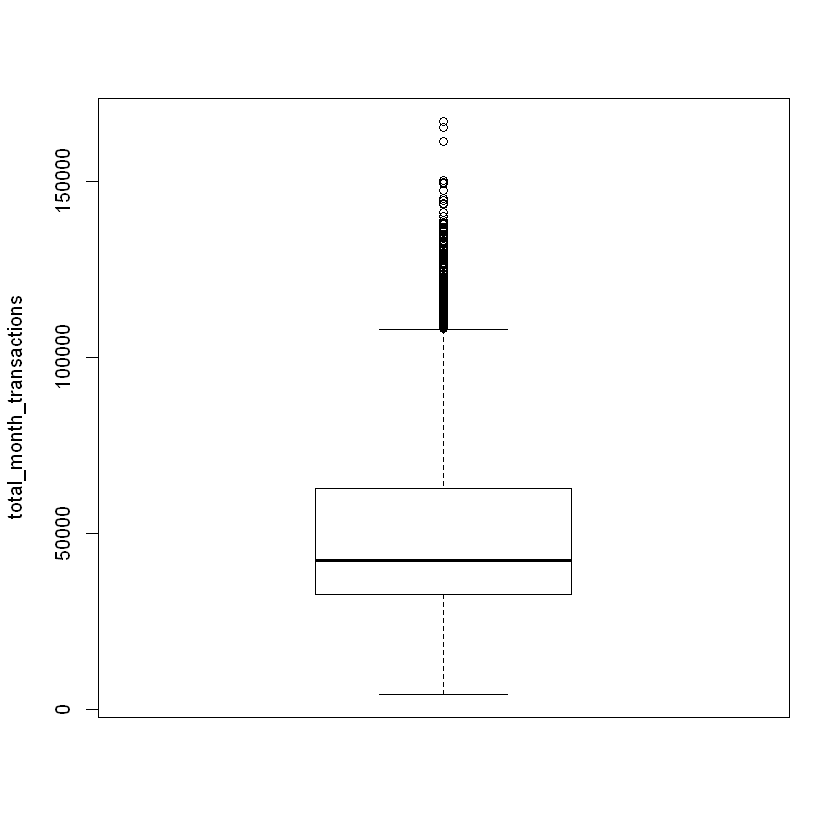

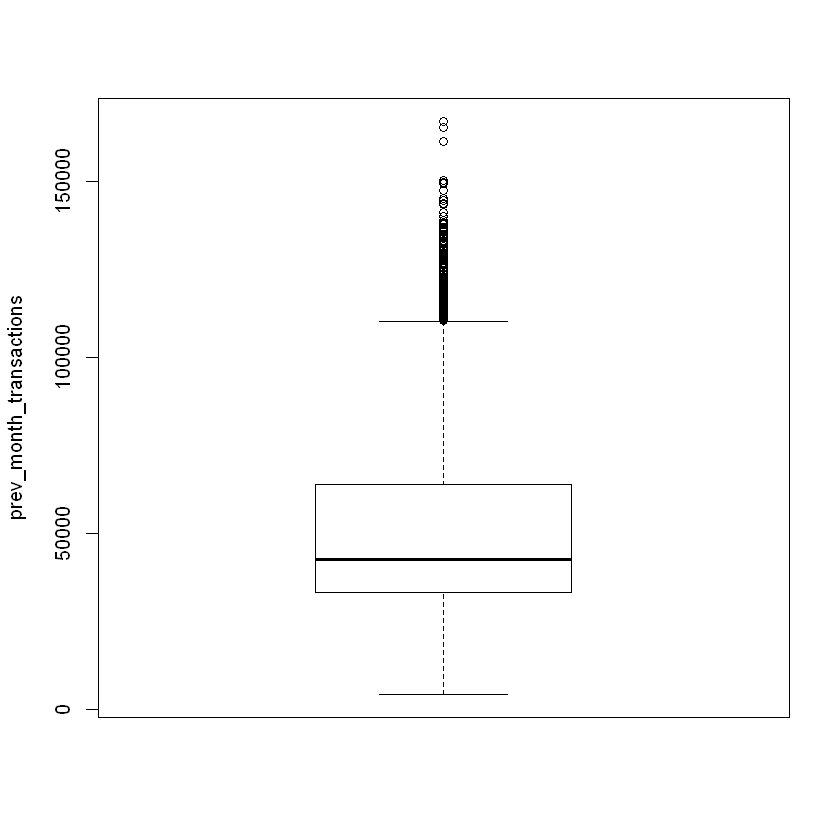

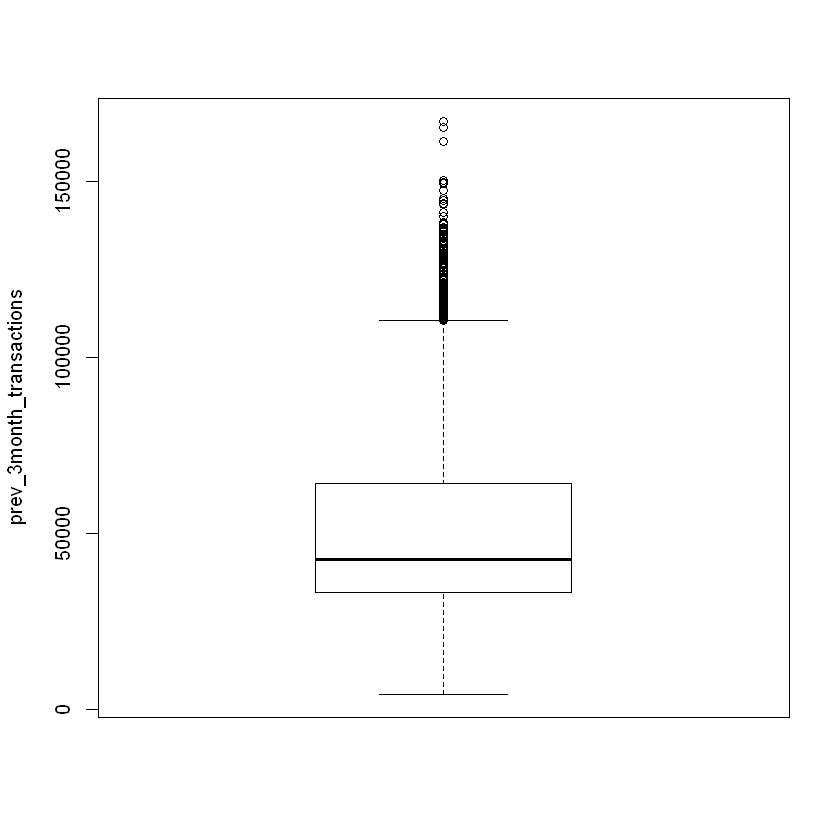

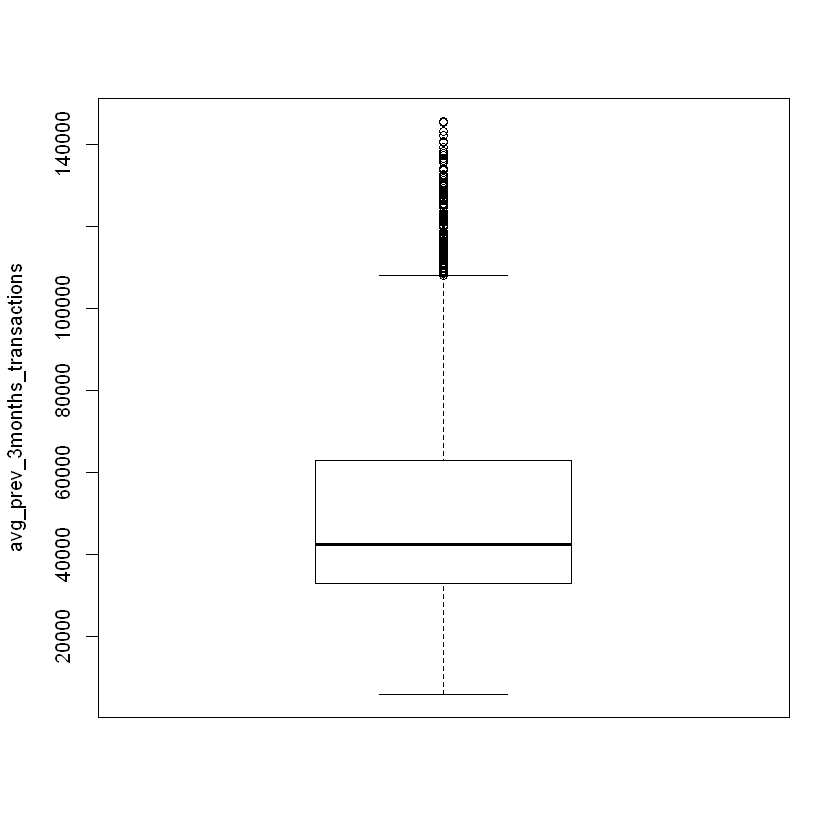

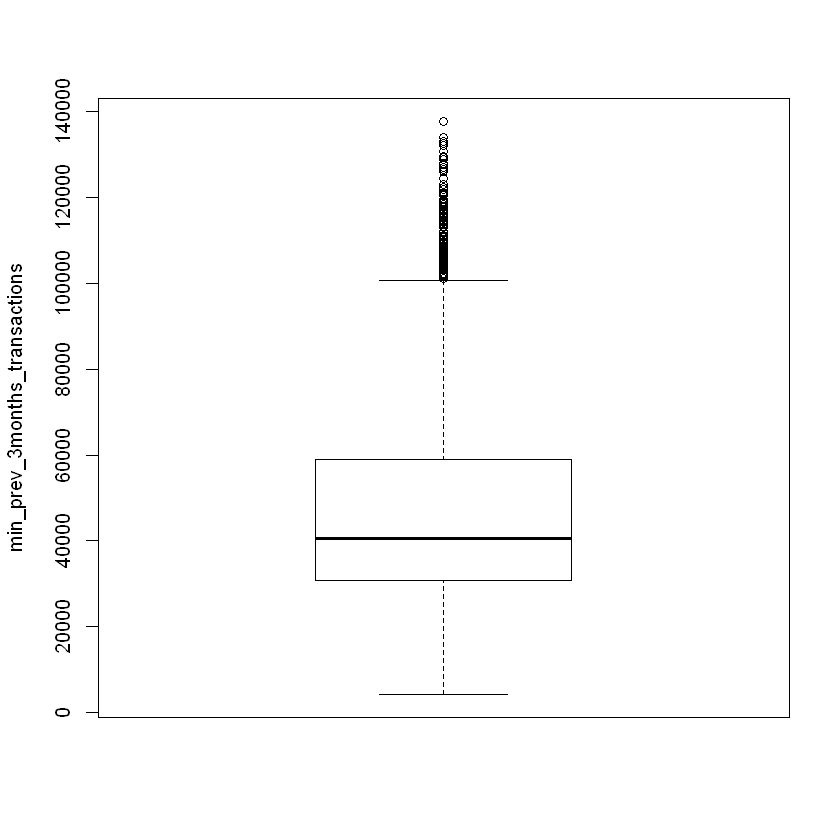

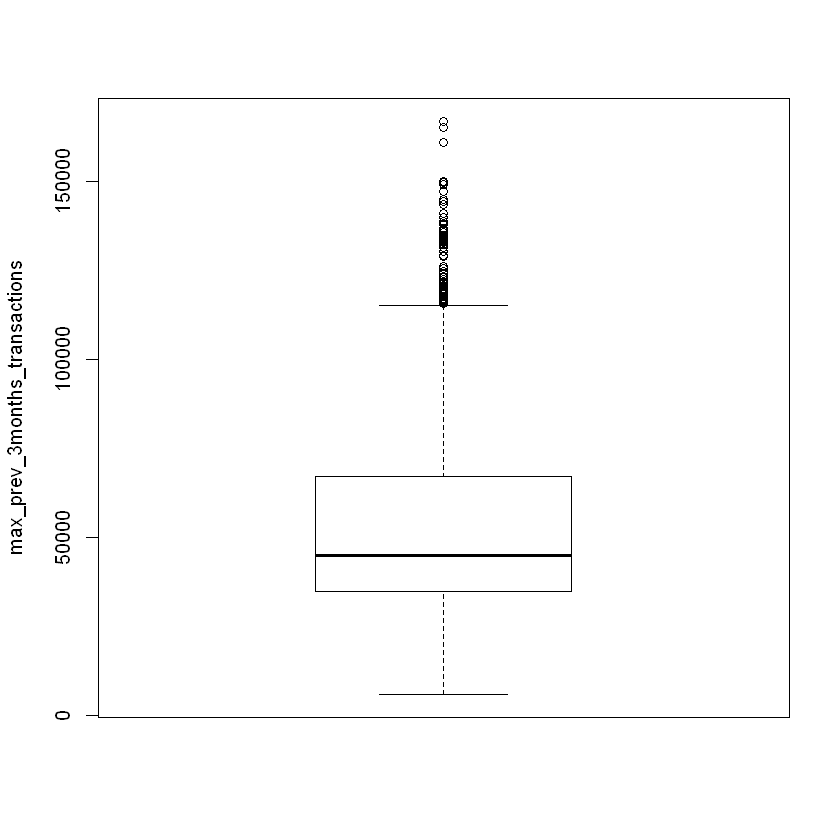

In [38]:
for (v in nf){
    boxplot(df[[v]],ylab=v)
}

In [30]:
#question 2.6- description of the missing values
getMissingness(df)

[[1]]
                       var na.count rate
1        prev_3month_sales   132097  6.3
2 prev_3month_transactions   108852  5.2
3         prev_month_sales    44098  2.1
4  prev_month_transactions    35639  1.7

[[2]]
[1] "This dataset has 1975248 (93.7%) complete rows. Original data has 2107345 rows."



$missingness
                       var na.count rate
1        prev_3month_sales   132097  6.3
2 prev_3month_transactions   108852  5.2
3         prev_month_sales    44098  2.1
4  prev_month_transactions    35639  1.7

$message
[1] "This dataset has 1975248 (93.7%) complete rows. Original data has 2107345 rows."

$rows
NULL

In [31]:
#question 2.7 matrix of missing values
df.miss <- missingMatrix(df)
df.miss 

item_nbr store_nbr Year month total_unit_sales city state store_type
1       0        0         0    0     0                0    0     0         
2       0        0         0    0     0                0    0     0         
3       0        0         0    0     0                0    0     0         
4       0        0         0    0     0                0    0     0         
5       0        0         0    0     0                0    0     0         
6       0        0         0    0     0                0    0     0         
7       0        0         0    0     0                0    0     0         
8       0        0         0    0     0                0    0     0         
9       0        0         0    0     0                0    0     0         
10      0        0         0    0     0                0    0     0         
11      0        0         0    0     0                0    0     0         
12      0        0         0    0     0                0    0     0         
13      0        0         0    0     0                0    0     0         
14      0        0         0    0     0                0    0     0         
15      0        0         0    0     0                0    0     0         
16      0        0         0    0     0                0    0     0         
17      0        0         0    0     0                0    0     0         
18      0        0         0    0     0                0    0     0         
19      0        0         0    0     0                0    0     0         
20      0        0         0    0     0                0    0     0         
21      0        0         0    0     0                0    0     0         
22      0        0         0    0     0                0    0     0         
23      0        0         0    0     0                0    0     0         
24      0        0         0    0     0                0    0     0         
25      0        0         0    0     0                0    0     0         
26      0        0         0    0     0                0    0     0         
27      0        0         0    0     0                0    0     0         
28      0        0         0    0     0                0    0     0         
29      0        0         0    0     0                0    0     0         
30      0        0         0    0     0                0    0     0         
...     ...      ...       ...  ...   ...              ...  ...   ...       
2107316 0        0         0    0     0                0    0     0         
2107317 0        0         0    0     0                0    0     0         
2107318 0        0         0    0     0                0    0     0         
2107319 0        0         0    0     0                0    0     0         
2107320 0        0         0    0     0                0    0     0         
2107321 0        0         0    0     0                0    0     0         
2107322 0        0         0    0     0                0    0     0         
2107323 0        0         0    0     0                0    0     0         
2107324 0        0         0    0     0                0    0     0         
2107325 0        0         0    0     0                0    0     0         
2107326 0        0         0    0     0                0    0     0         
2107327 0        0         0    0     0                0    0     0         
2107328 0        0         0    0     0                0    0     0         
2107329 0        0         0    0     0                0    0     0         
2107330 0        0         0    0     0                0    0     0         
2107331 0        0         0    0     0                0    0     0         
2107332 0        0         0    0     0                0    0     0         
2107333 0        0         0    0     0                0    0     0         
2107334 0        0         0    0     0                0    0     0         
2107335 0        0         0    0     0                0    0     0         
2107

In [ ]:
#heatmap of missing values
library(naniar)
options(repr.plot.width = 54, repr.plot.height = 27)
gg_miss_fct(x=df,fct=id) + 
theme(axis.text.x = element_text(angle=90, size=8))

Warning message:
"package 'naniar' was built under R version 3.6.2"


In [32]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v!='revenue')) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[paste(v,'out',sep='_')] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

In [33]:
df.out <- outlierMatrix(df)

In [34]:
head(df.out)

Year_out month_out total_unit_sales_out prev_month_sales_out
1 0        0         0                    NA                  
2 0        0         0                     0                  
3 0        0         0                     0                  
4 0        0         0                     0                  
5 0        0         0                     0                  
6 0        0         0                     0                  
  prev_3month_sales_out avg_prev_3months_sales_out min_prev_3months_sales_out
1 NA                    0                          0                         
2 NA                    0                          0                         
3 NA                    0                          0                         
4  0                    0                          0                         
5  0                    0                          0                         
6  0                    0                          0                         
  max_prev_3months_sales_out monthly_oilprice_avg_out total_month_holidays_out
1 0                          0                        0                       
2 0                          0                        0                       
3 0                          0                        0                       
4 0                          0                        0                       
5 0                          0                        0                       
6 0                          0                        0                       
  ... cluster9_out cluster10_out cluster11_out cluster12_out cluster13_out
1 ... 0            0             0             0             1            
2 ... 0            0             0             0             1            
3 ... 0            0             0             0             1            
4 ... 0            0             0             0             1            
5 ... 0            0             0             0             1            
6 ... 0            0             0             0             1            
  cluster14_out cluster15_out cluster16_out cluster17_out id_out
1 0             0             0             0             0     
2 0             0             0             0             0     
3 0             0             0             0             0     
4 0             0             0             0             0     
5 0             0             0             0             0     
6 0             0             0             0             0

In [30]:
#for (v in names(movies.out))
 #   {factor (movies.out[[v]])}

In [30]:
df.out$id=df$id


In [32]:
head(df.out)

item_nbr_out store_nbr_out Year_out month_out total_unit_sales_out
1 0            0             0        0         0                   
2 0            0             0        0         0                   
3 0            0             0        0         0                   
4 0            0             0        0         0                   
5 0            0             0        0         0                   
6 0            0             0        0         0                   
  prev_month_sales_out prev_3month_sales_out avg_prev_3months_sales_out
1 NA                   NA                    0                         
2  0                   NA                    0                         
3  0                   NA                    0                         
4  0                    0                    0                         
5  0                    0                    0                         
6  0                    0                    0                         
  min_prev_3months_sales_out max_prev_3months_sales_out ... cluster10_out
1 0                          0                          ... 0            
2 0                          0                          ... 0            
3 0                          0                          ... 0            
4 0                          0                          ... 0            
5 0                          0                          ... 0            
6 0                          0                          ... 0            
  cluster11_out cluster12_out cluster13_out cluster14_out cluster15_out
1 0             0             1             0             0            
2 0             0             1             0             0            
3 0             0             1             0             0            
4 0             0             1             0             0            
5 0             0             1             0             0            
6 0             0             1             0             0            
  cluster16_out cluster17_out id_out id
1 0             0             0      1 
2 0             0             0      2 
3 0             0             0      3 
4 0             0             0      4 
5 0             0             0      5 
6 0             0             0      6

3.1.1 - For the variables where outliers were found, check the distribution with/without outliers

Joining, by = c("total_unit_sales", "outliers")
Joining, by = c("prev_month_sales", "outliers")
Warning message:
"Removed 44098 rows containing non-finite values (stat_density)."
Joining, by = c("prev_3month_sales", "outliers")


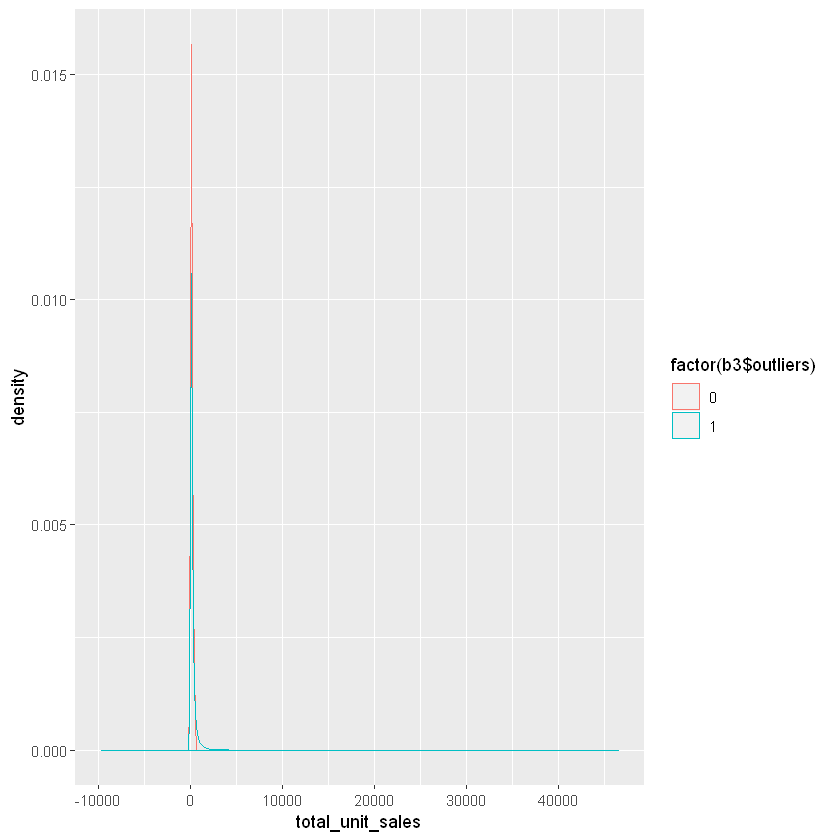

Warning message:
"Removed 132097 rows containing non-finite values (stat_density)."
Joining, by = c("avg_prev_3months_sales", "outliers")


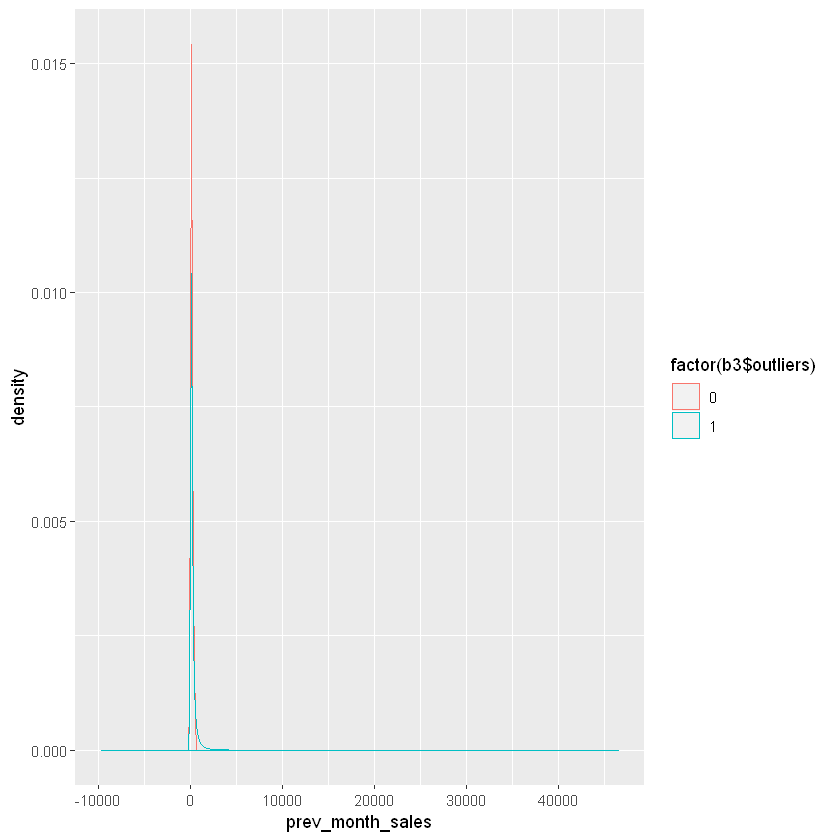

Joining, by = c("min_prev_3months_sales", "outliers")


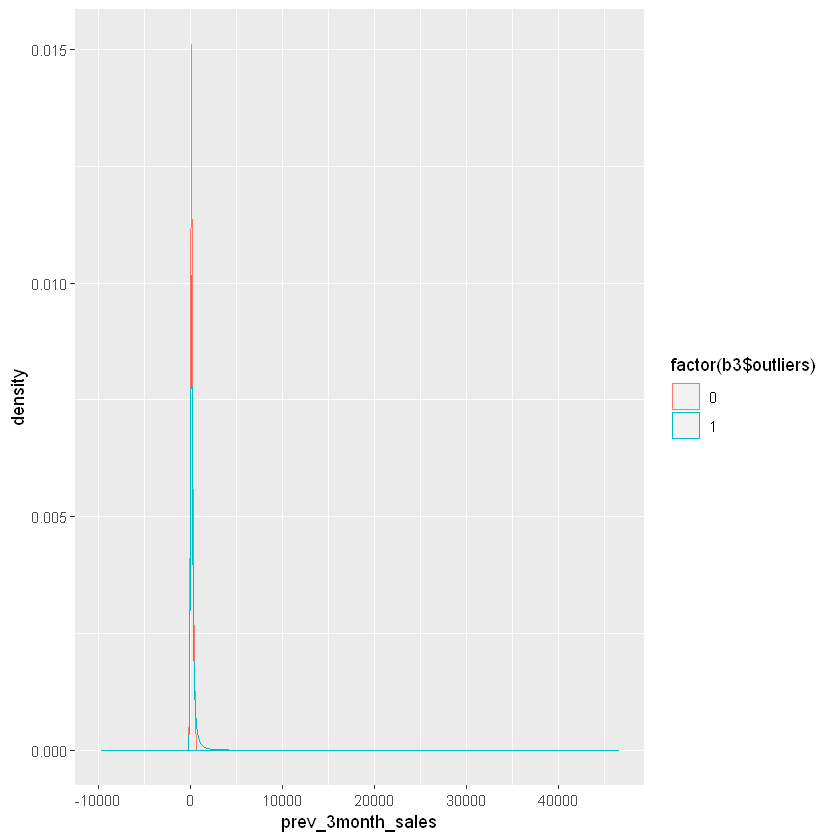

Joining, by = c("max_prev_3months_sales", "outliers")


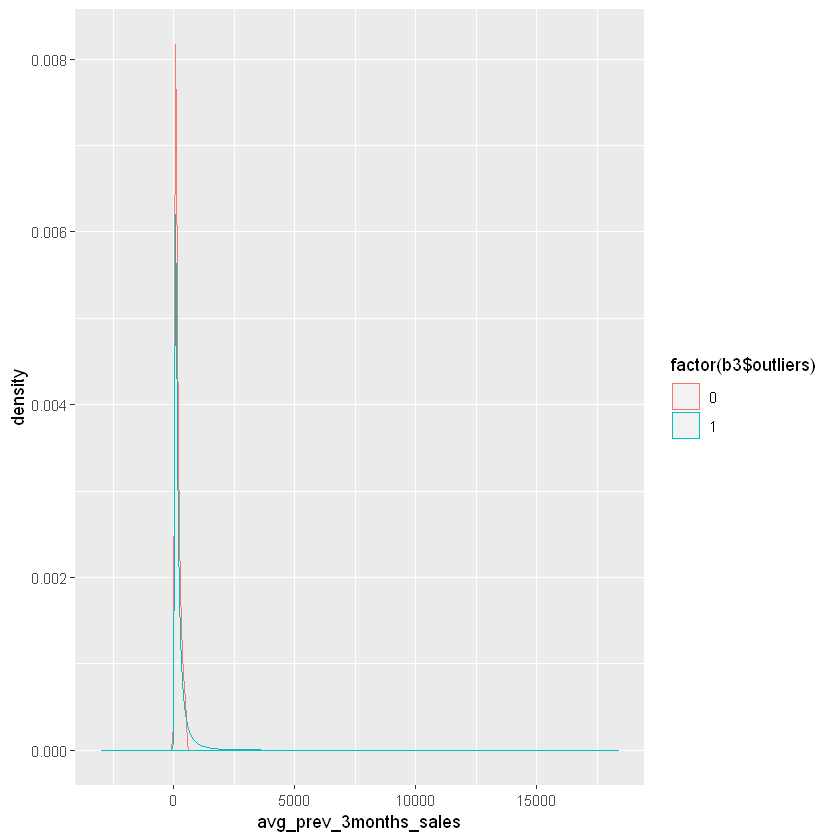

Joining, by = c("monthly_oilprice_avg", "outliers")


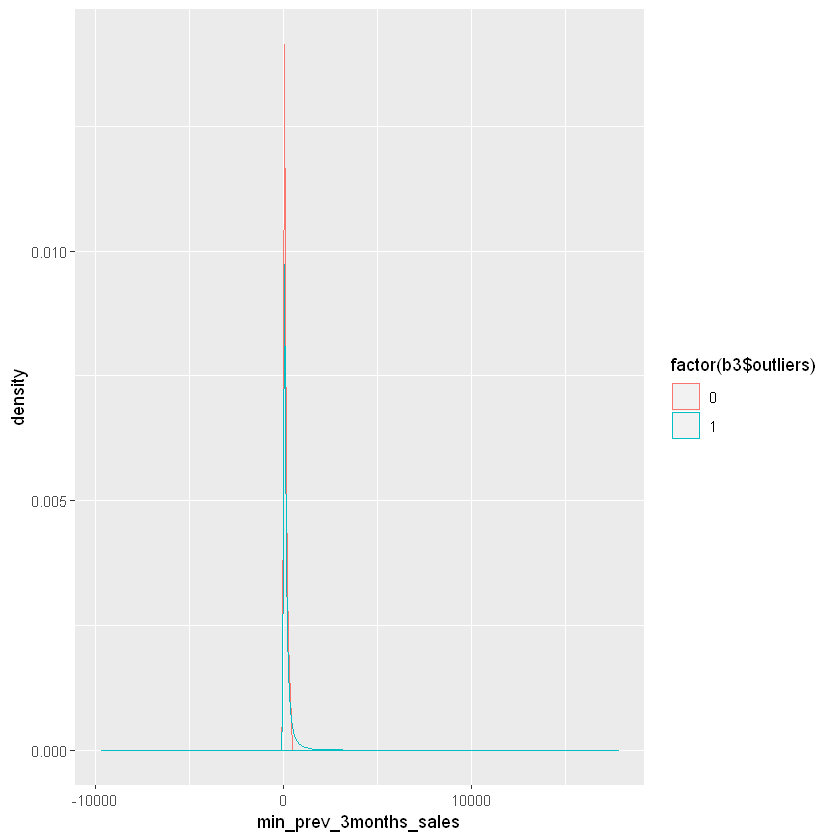

Joining, by = c("total_month_holidays", "outliers")


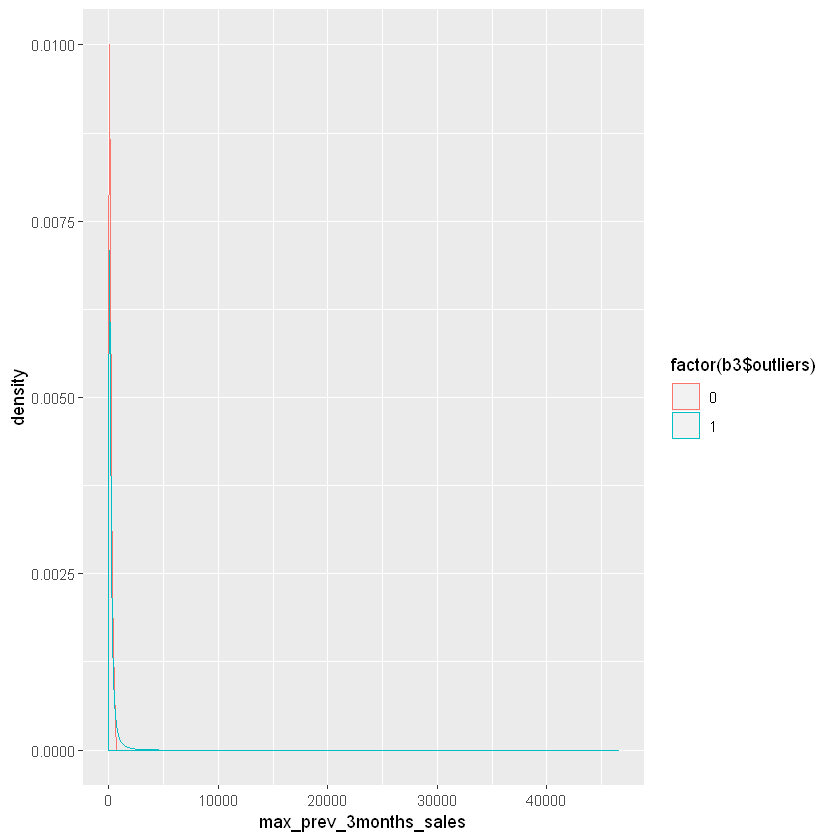

Joining, by = c("total_month_transactions", "outliers")


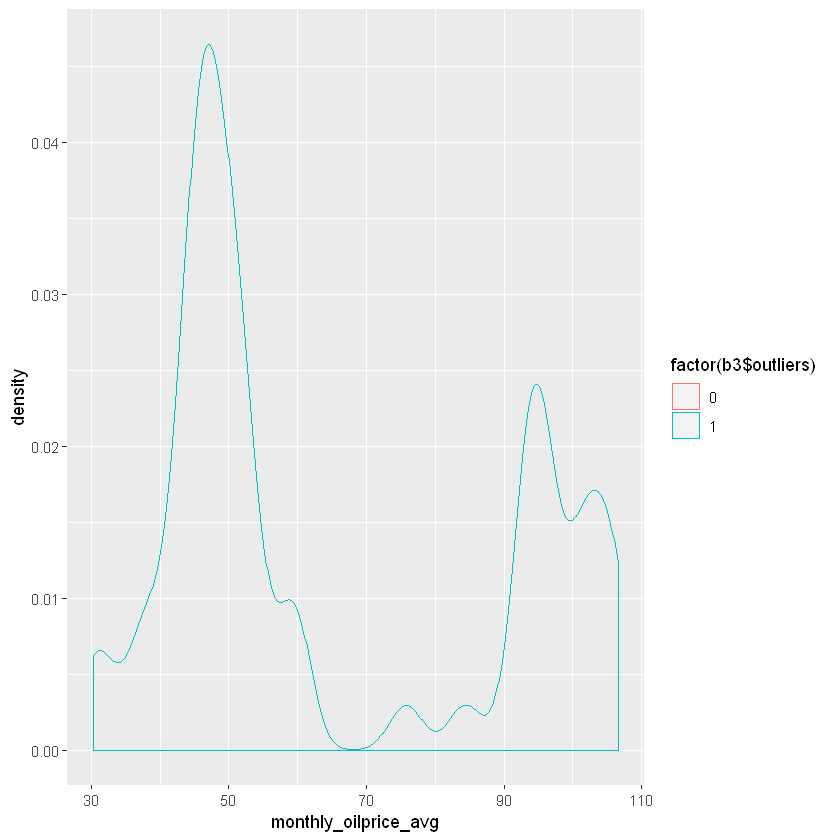

Joining, by = c("prev_month_transactions", "outliers")


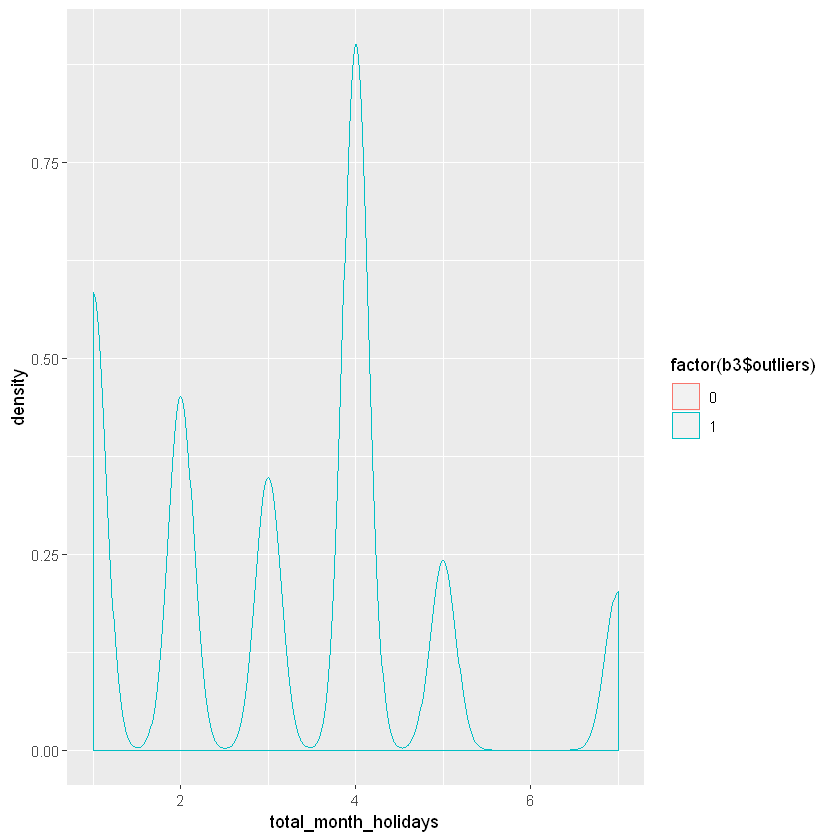

Warning message:
"Removed 35639 rows containing non-finite values (stat_density)."
Joining, by = c("prev_3month_transactions", "outliers")


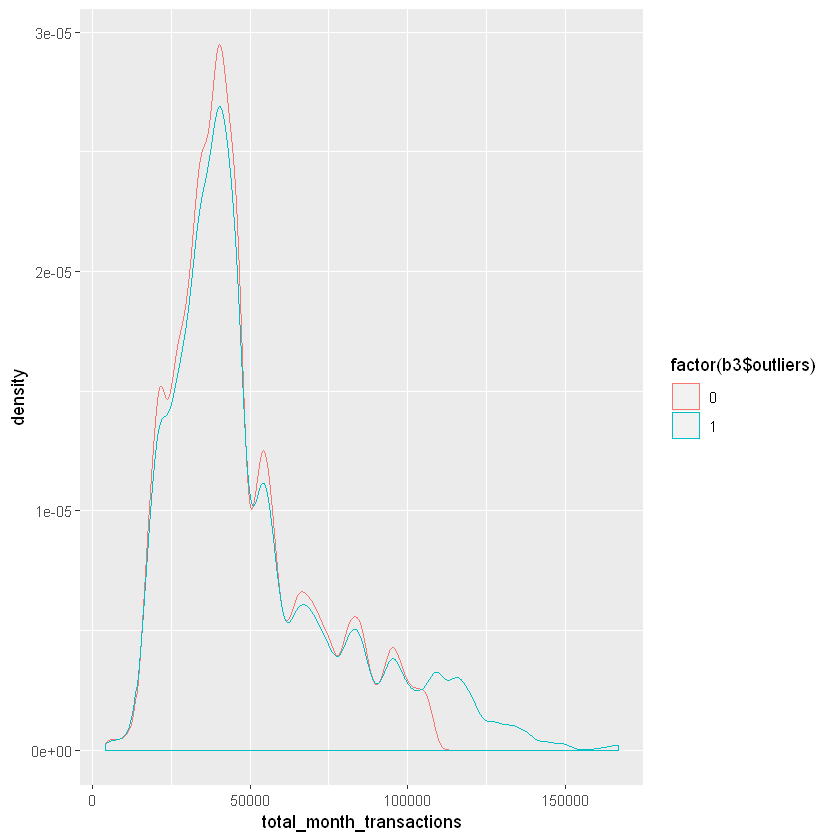

Warning message:
"Removed 108852 rows containing non-finite values (stat_density)."
Joining, by = c("avg_prev_3months_transactions", "outliers")


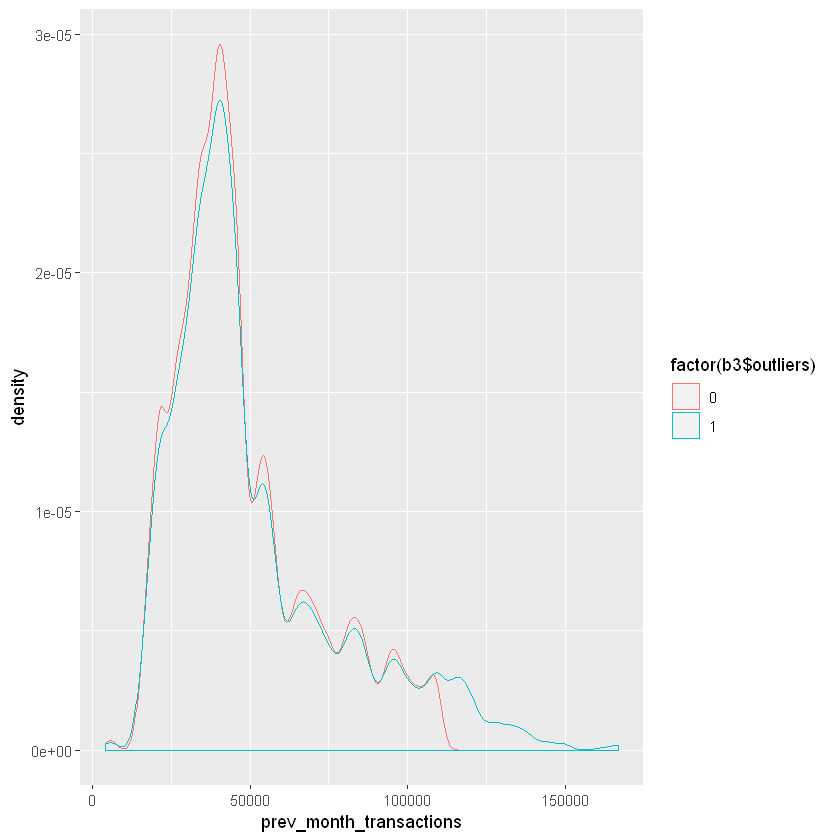

Joining, by = c("min_prev_3months_transactions", "outliers")


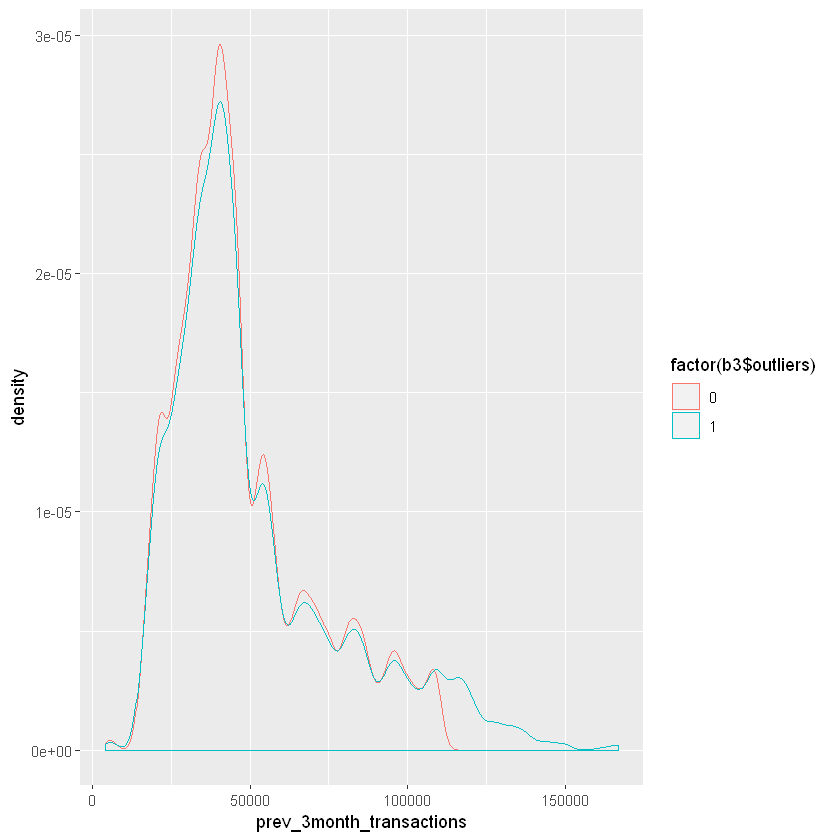

Joining, by = c("max_prev_3months_transactions", "outliers")


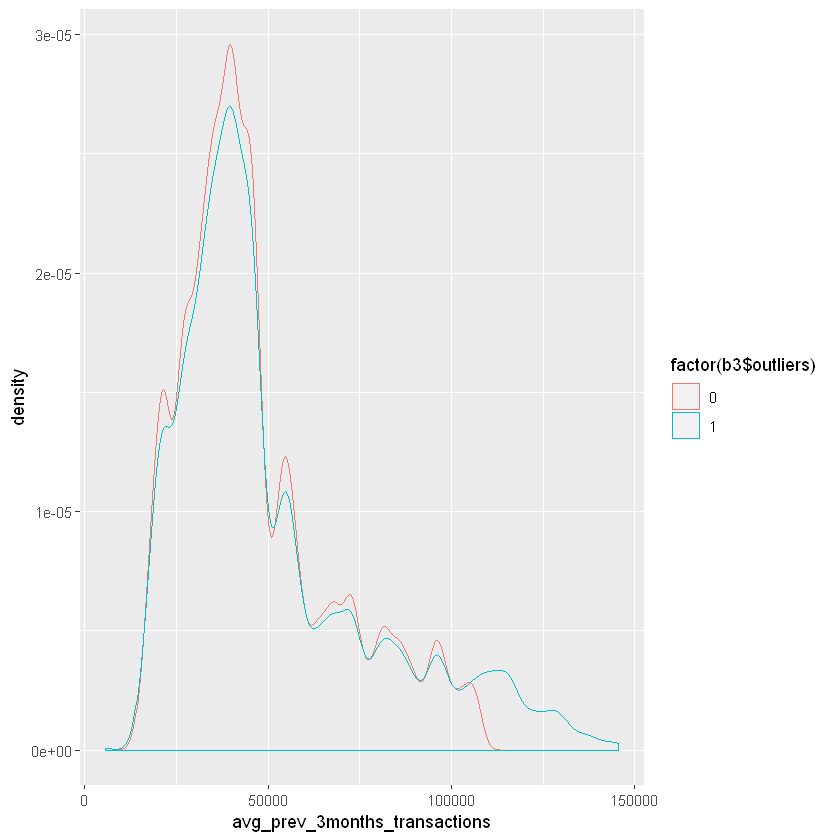

Joining, by = c("total_city_sales", "outliers")


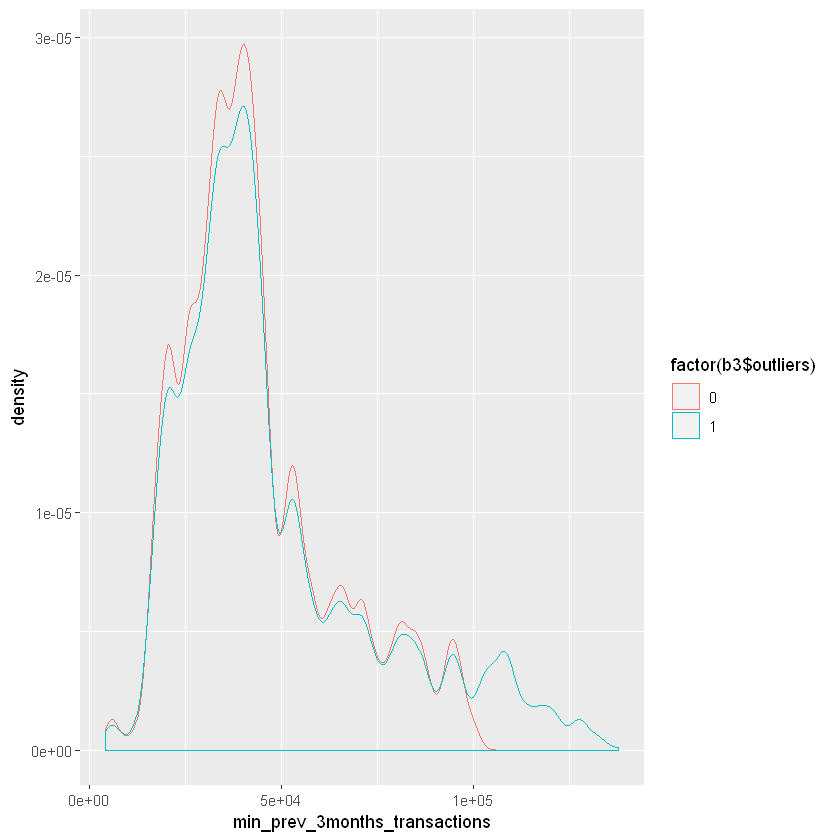

Joining, by = c("sales_perc", "outliers")


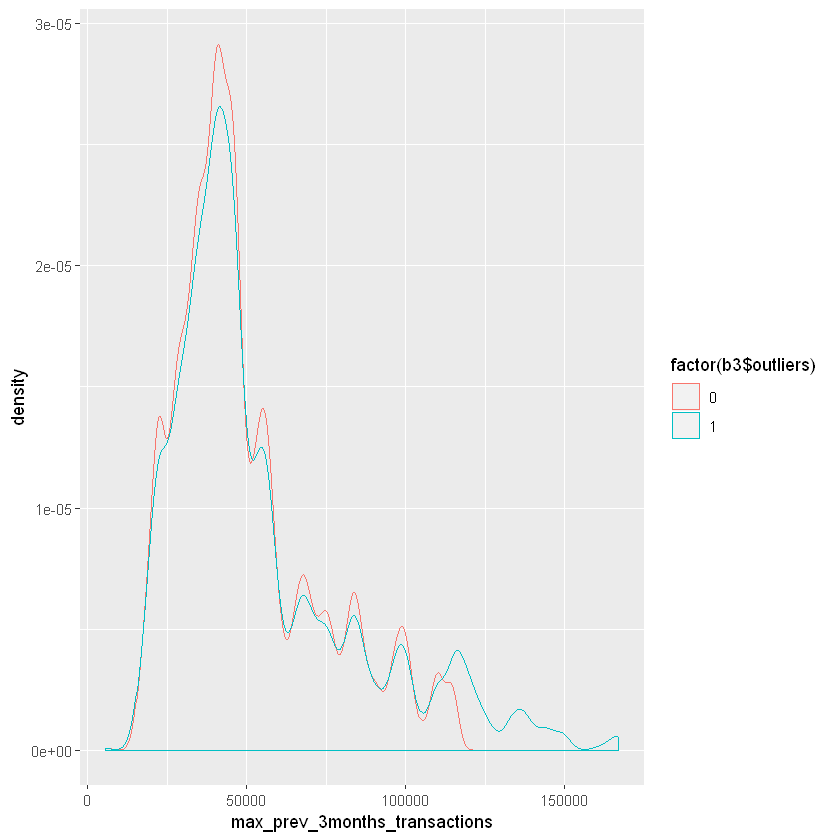

Joining, by = c("total_month_onpromotion", "outliers")


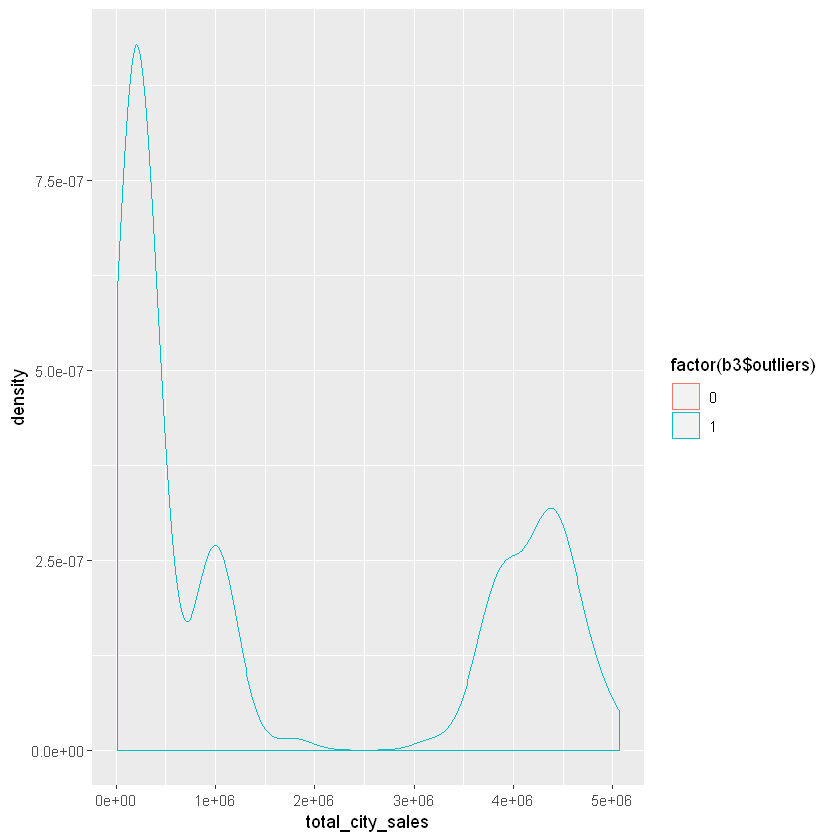

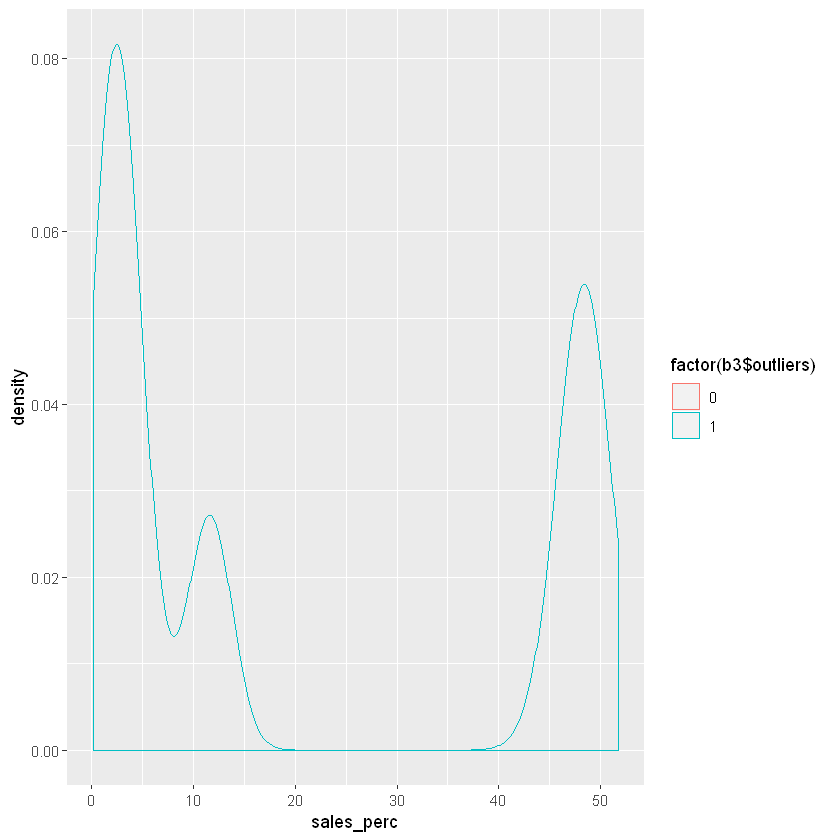

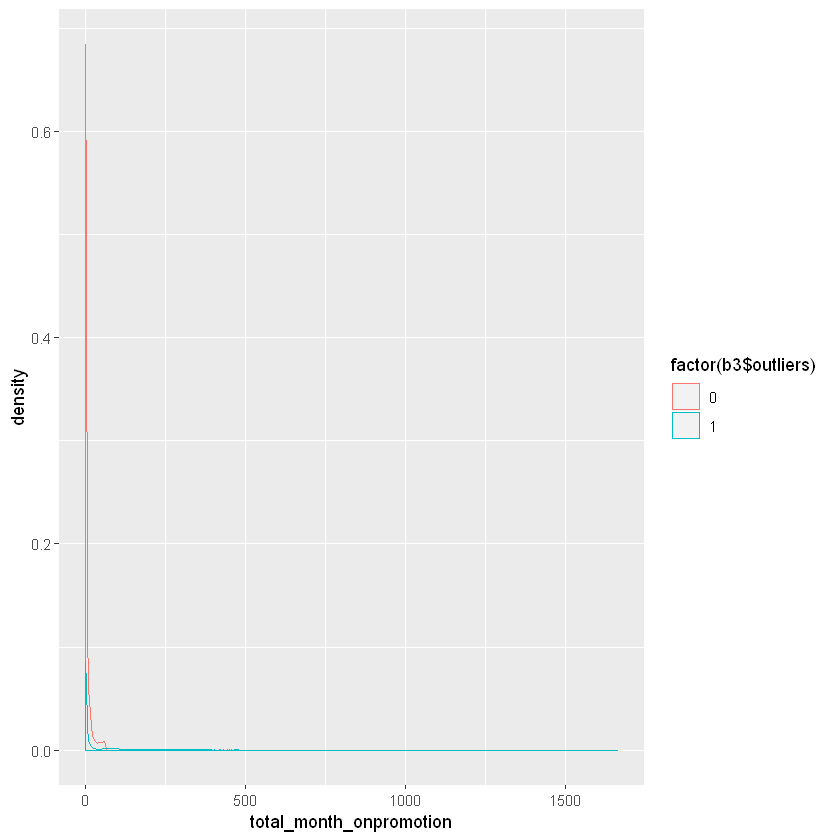

In [33]:
for (v in nf) {
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2))
}

removing the outliers doesnt affect the assumption at variables:
prev_month_sales, prev_3month_sales, avg_prev_3months_sales, min_prev_3months_sales, max_prev_3months_sales,
total_month_transactions, prev_month_transactions, prev_3month_transactions, avg_prev_3month_transactions, min_prev_3month_transactions, max_prev_3month_transactions,  total_month_onpromotion 

question 3.1.2 - scatter plots- yaxis is the outcome and x axis represents the other variables
with and without ouliers

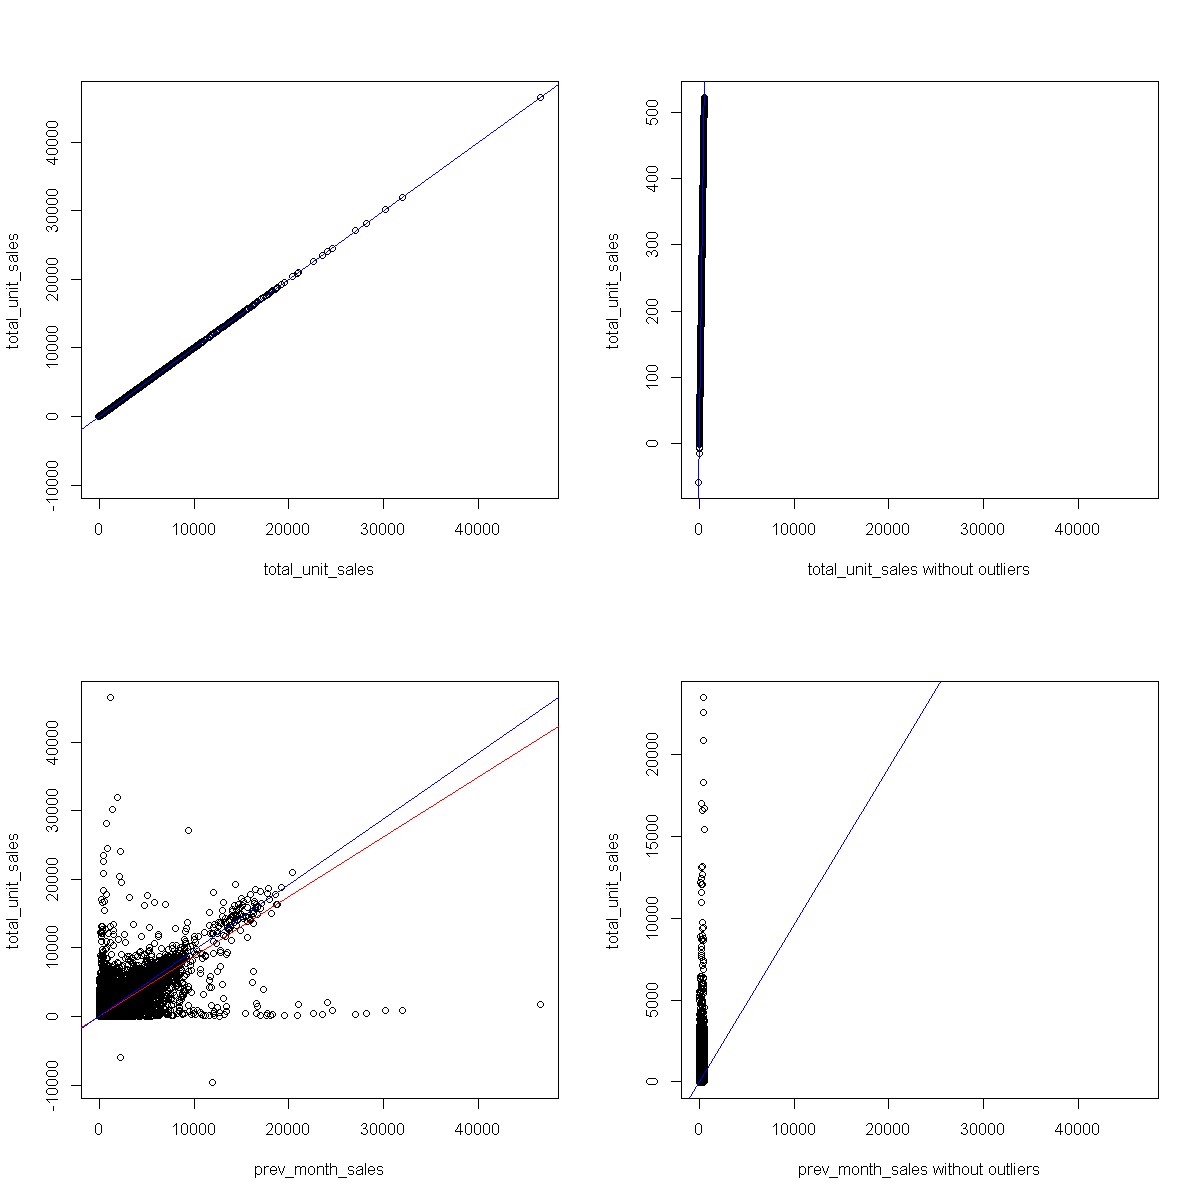

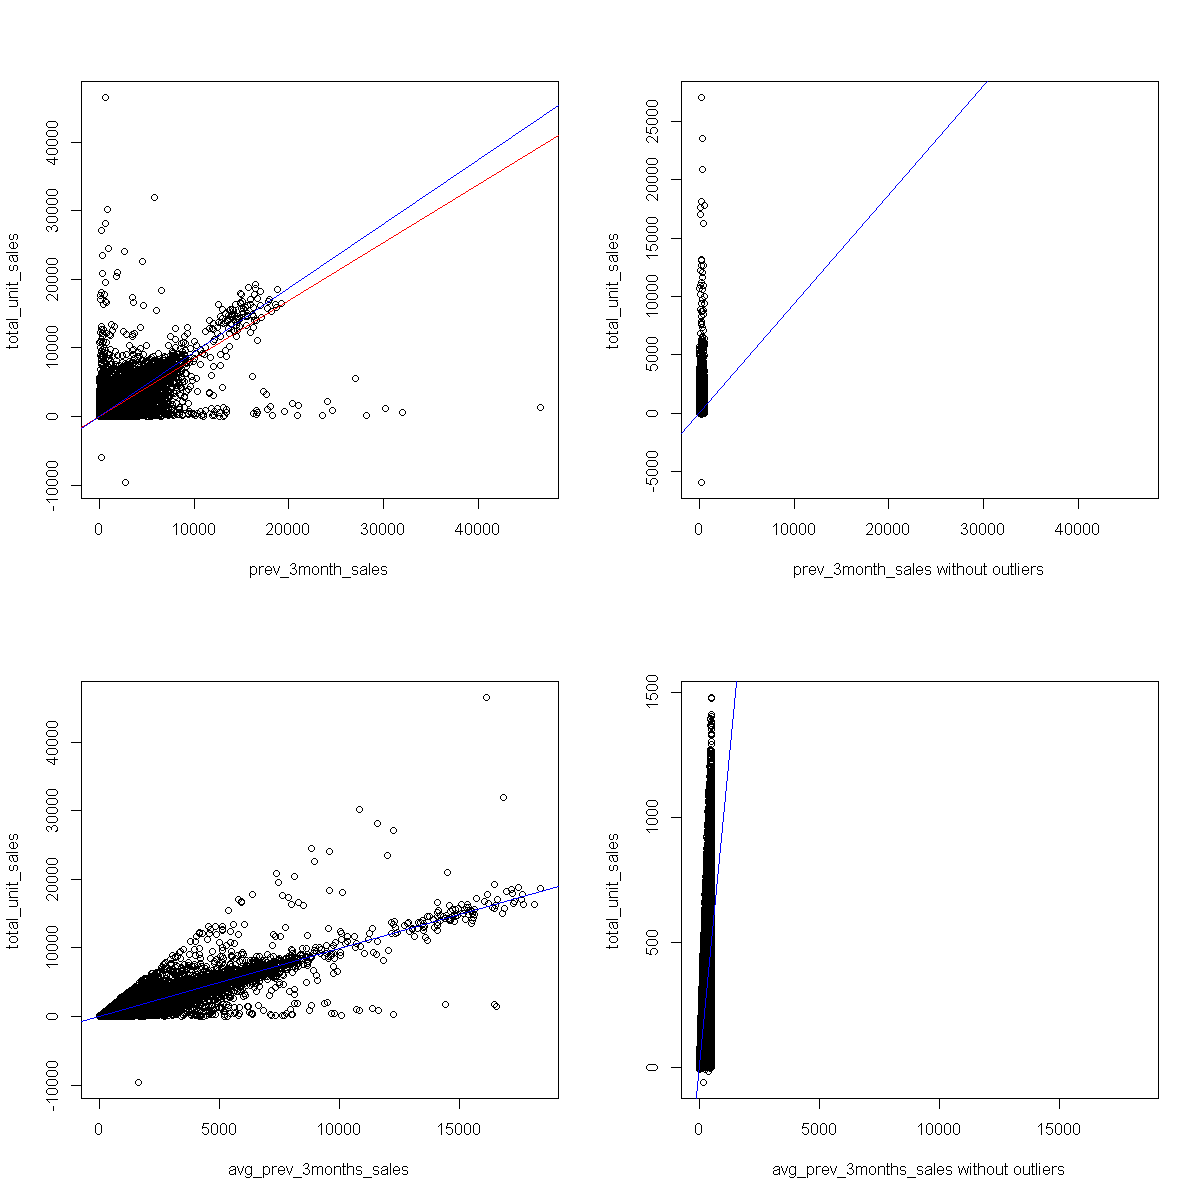

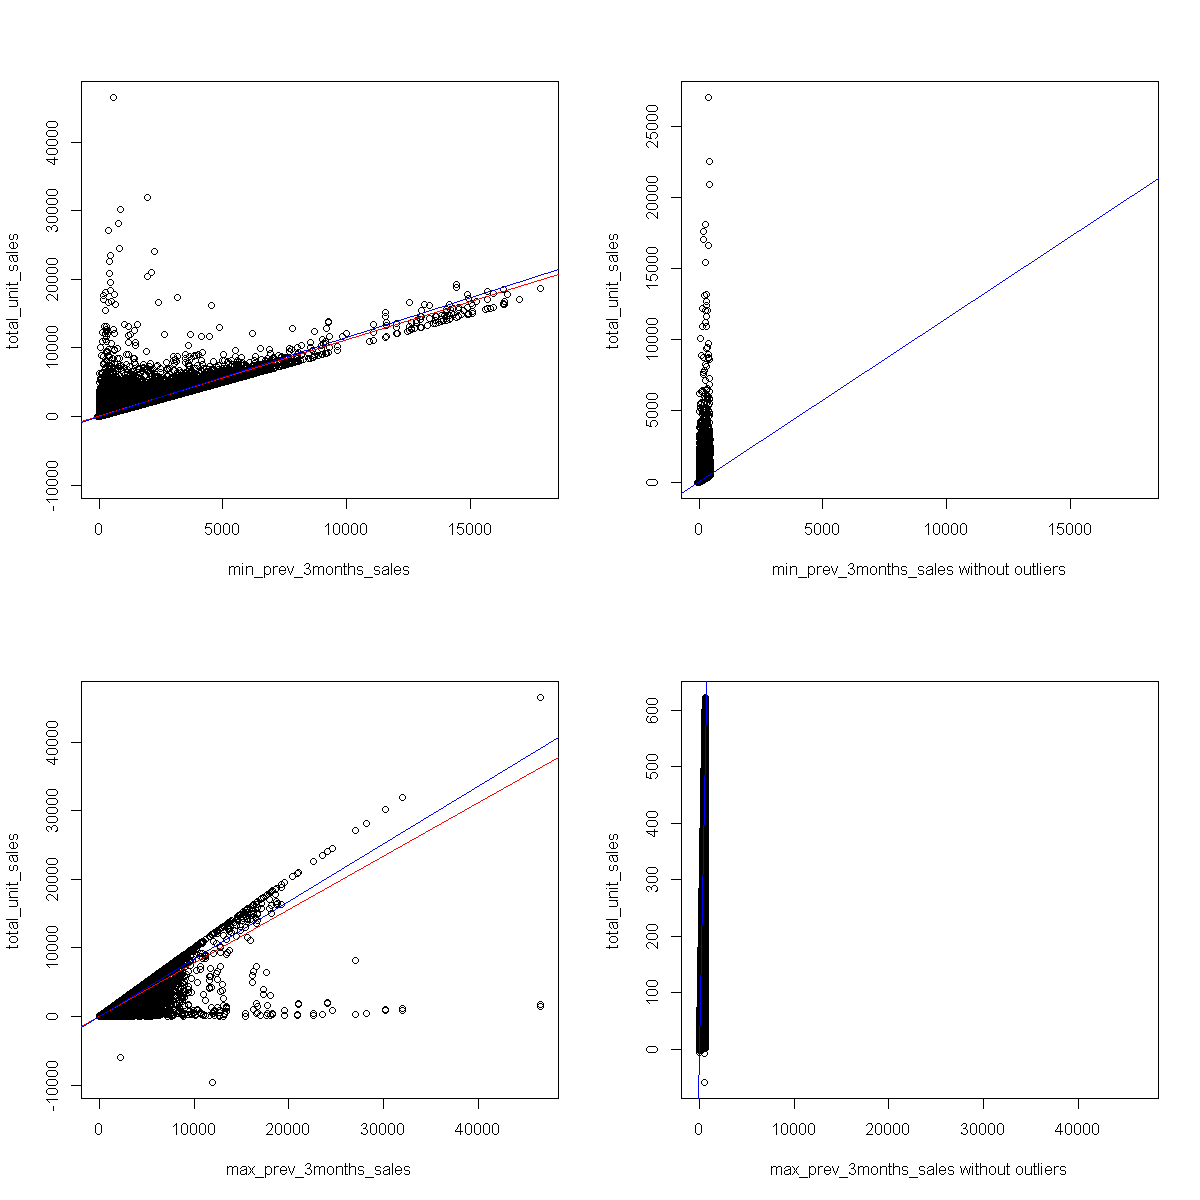

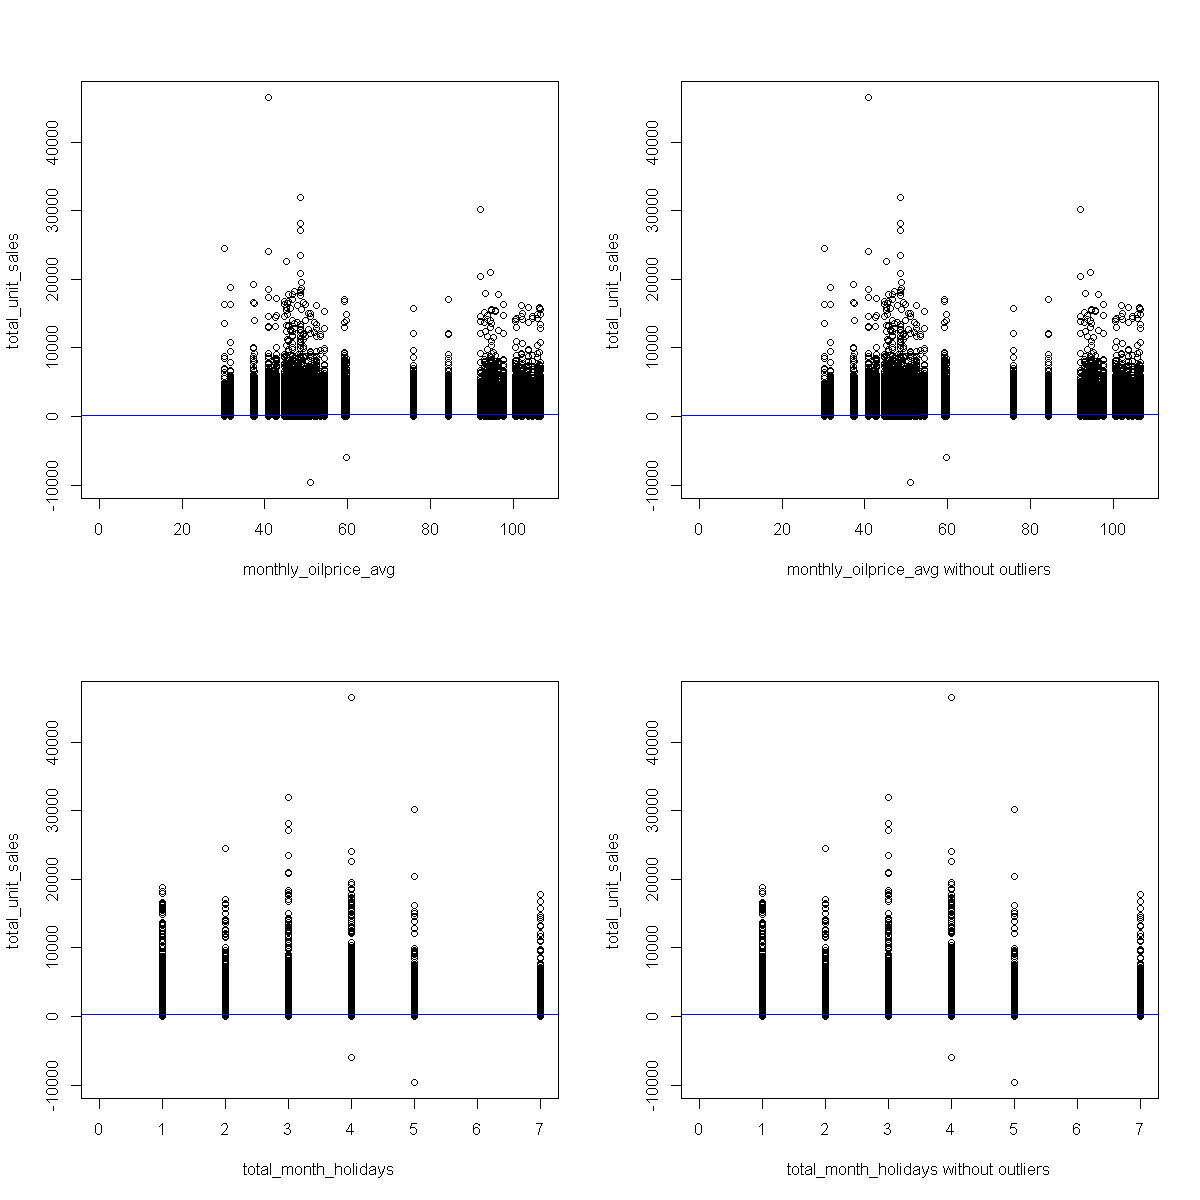

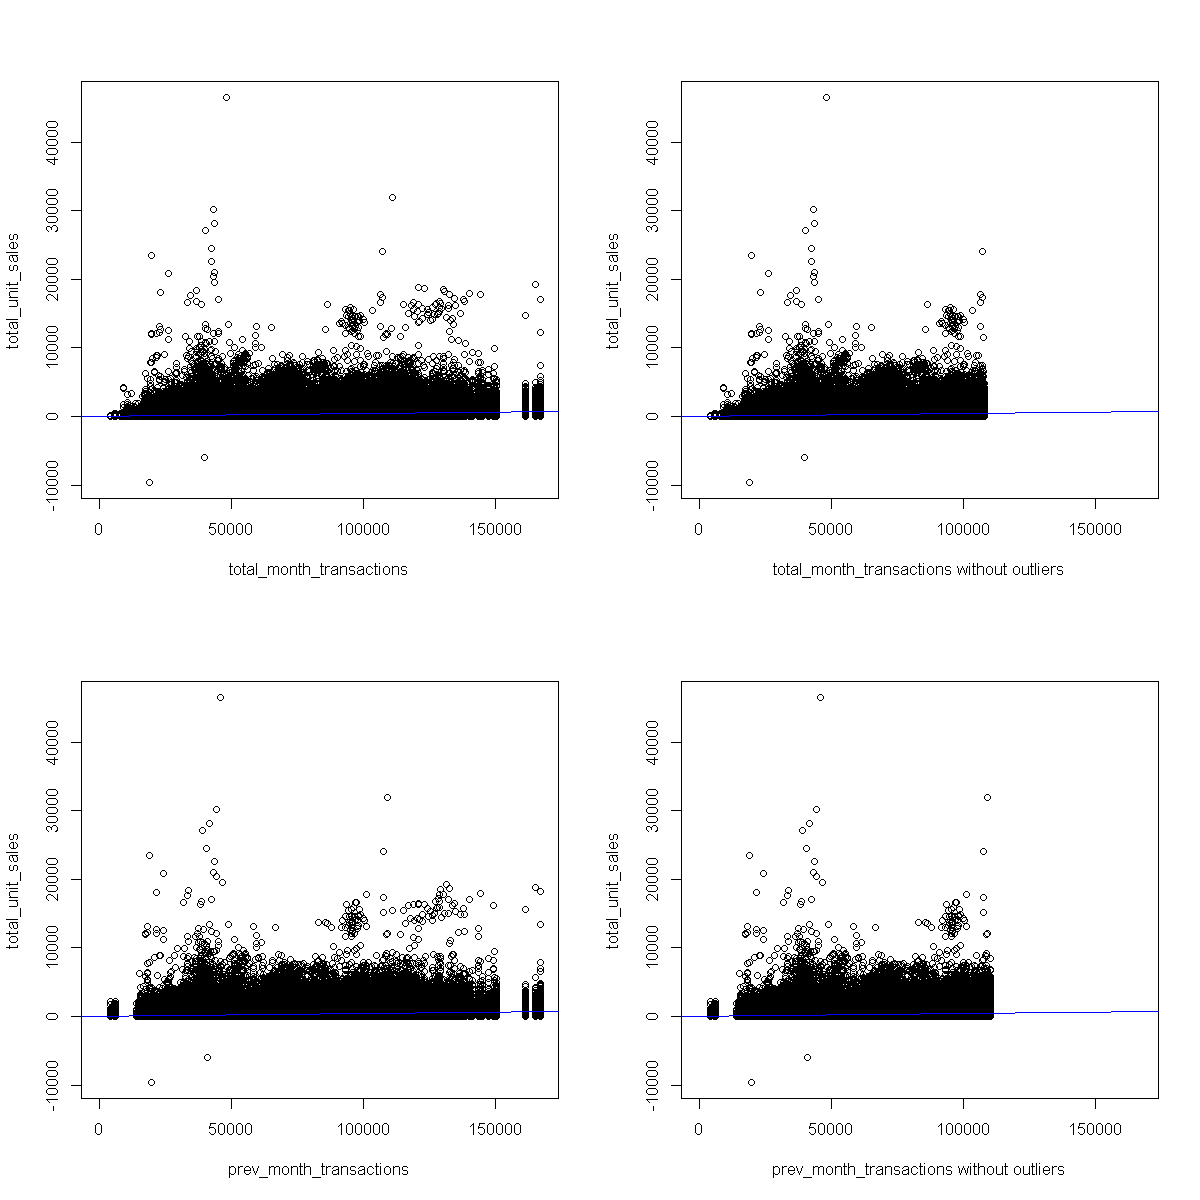

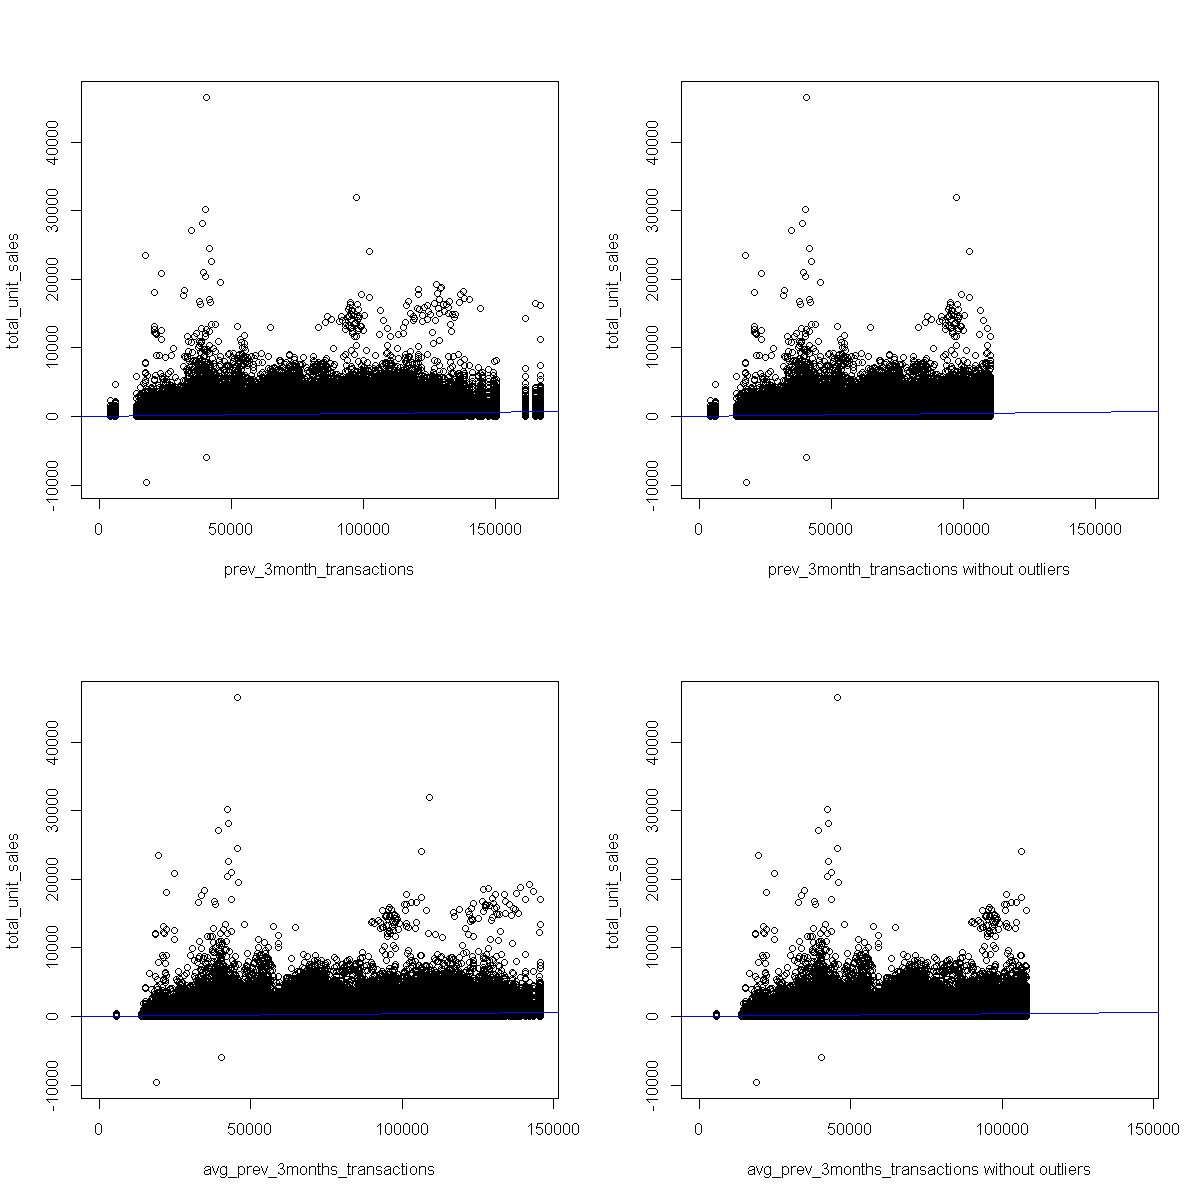

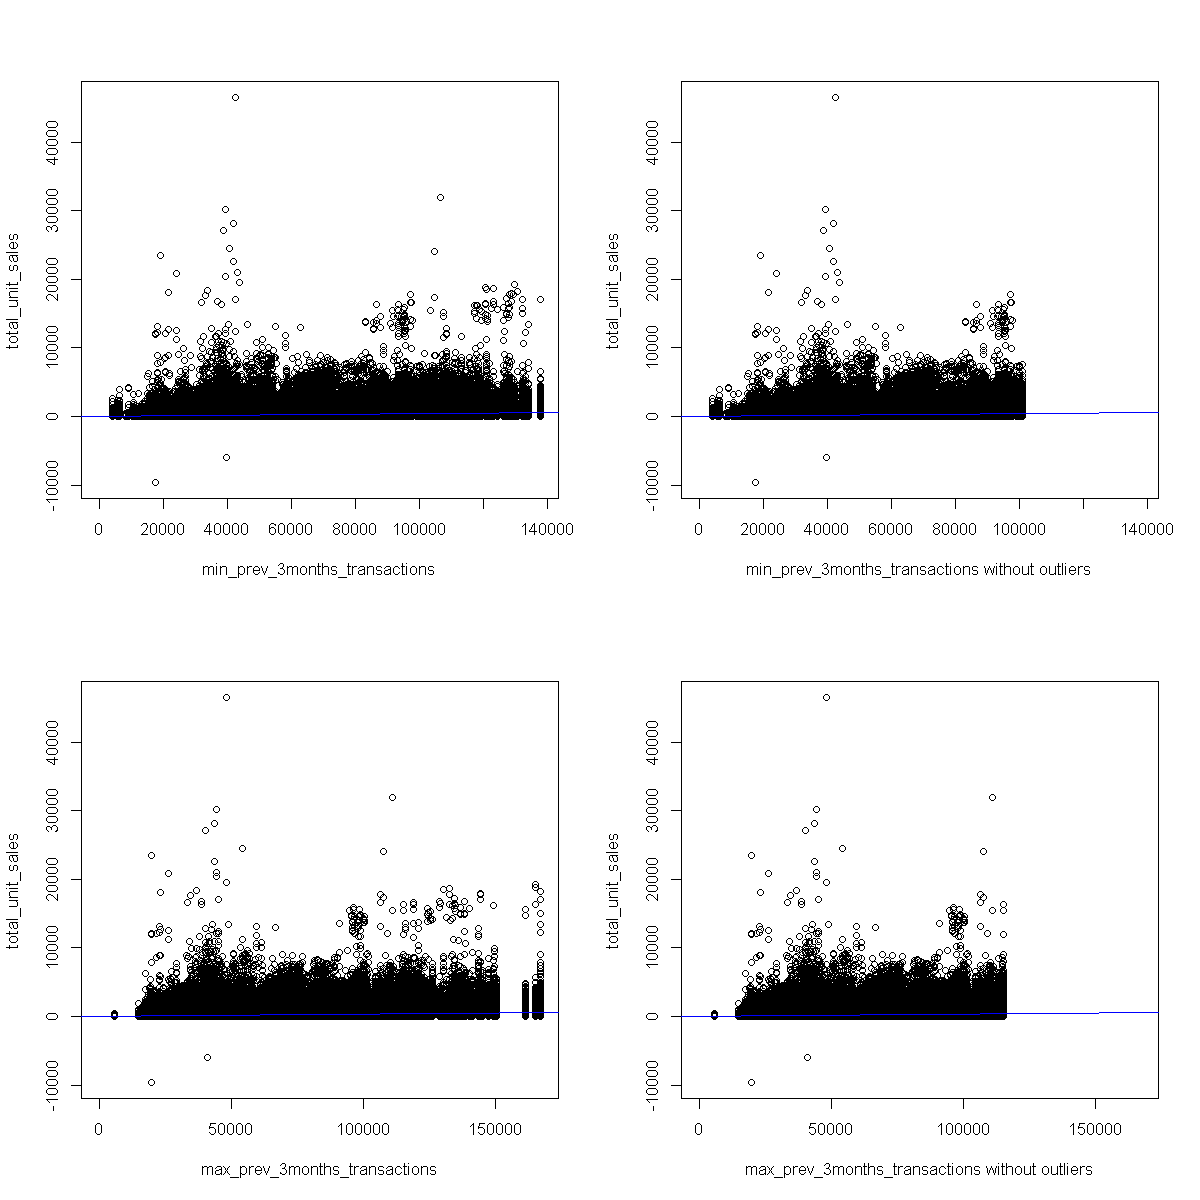

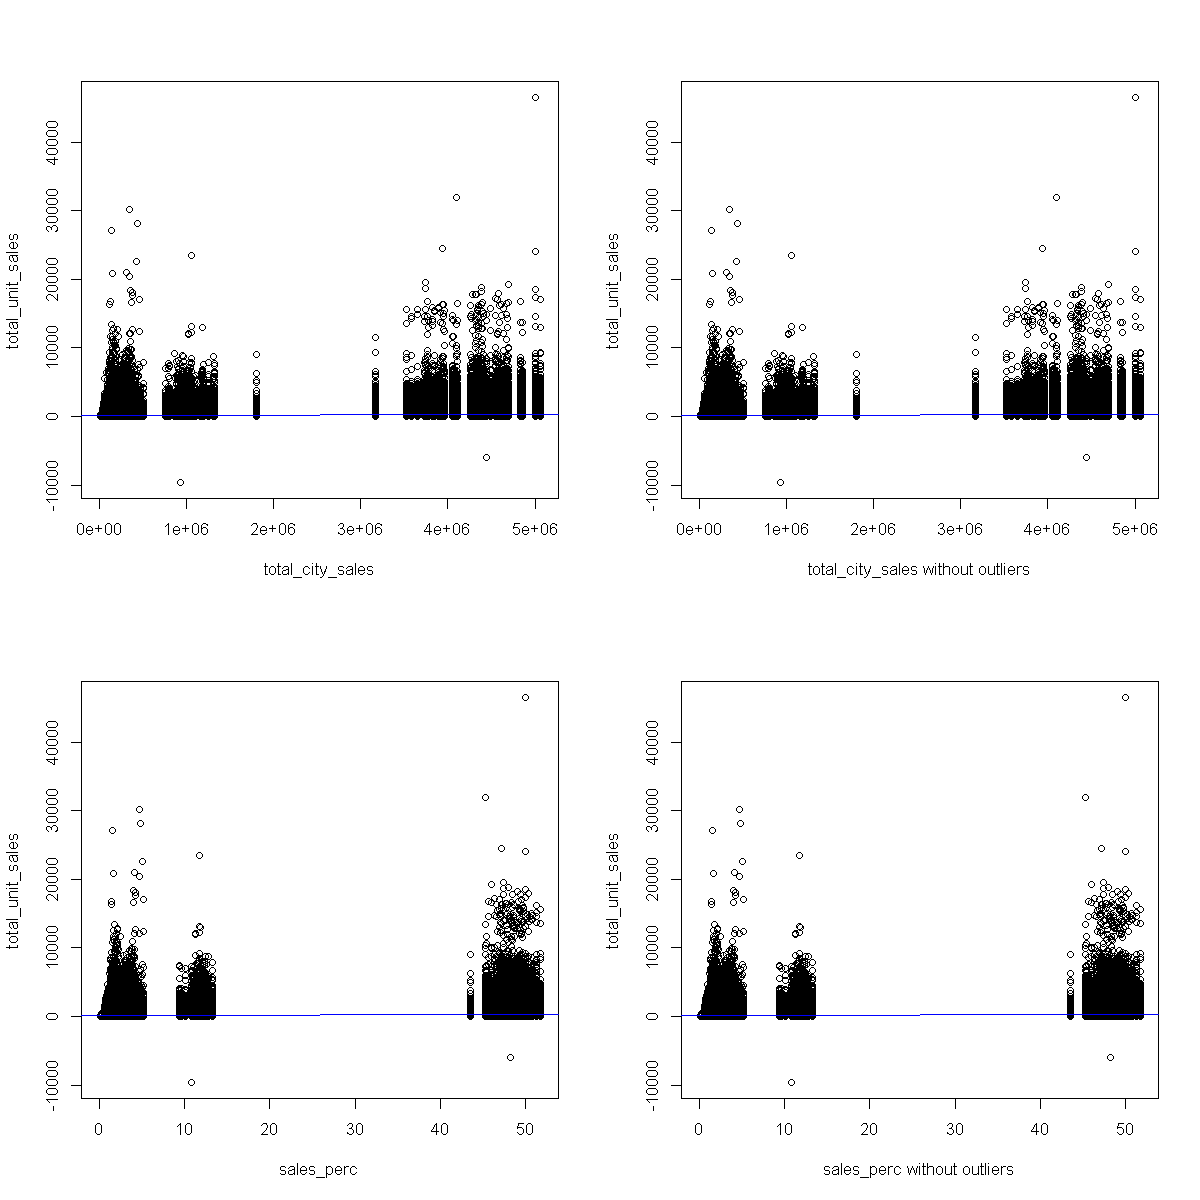

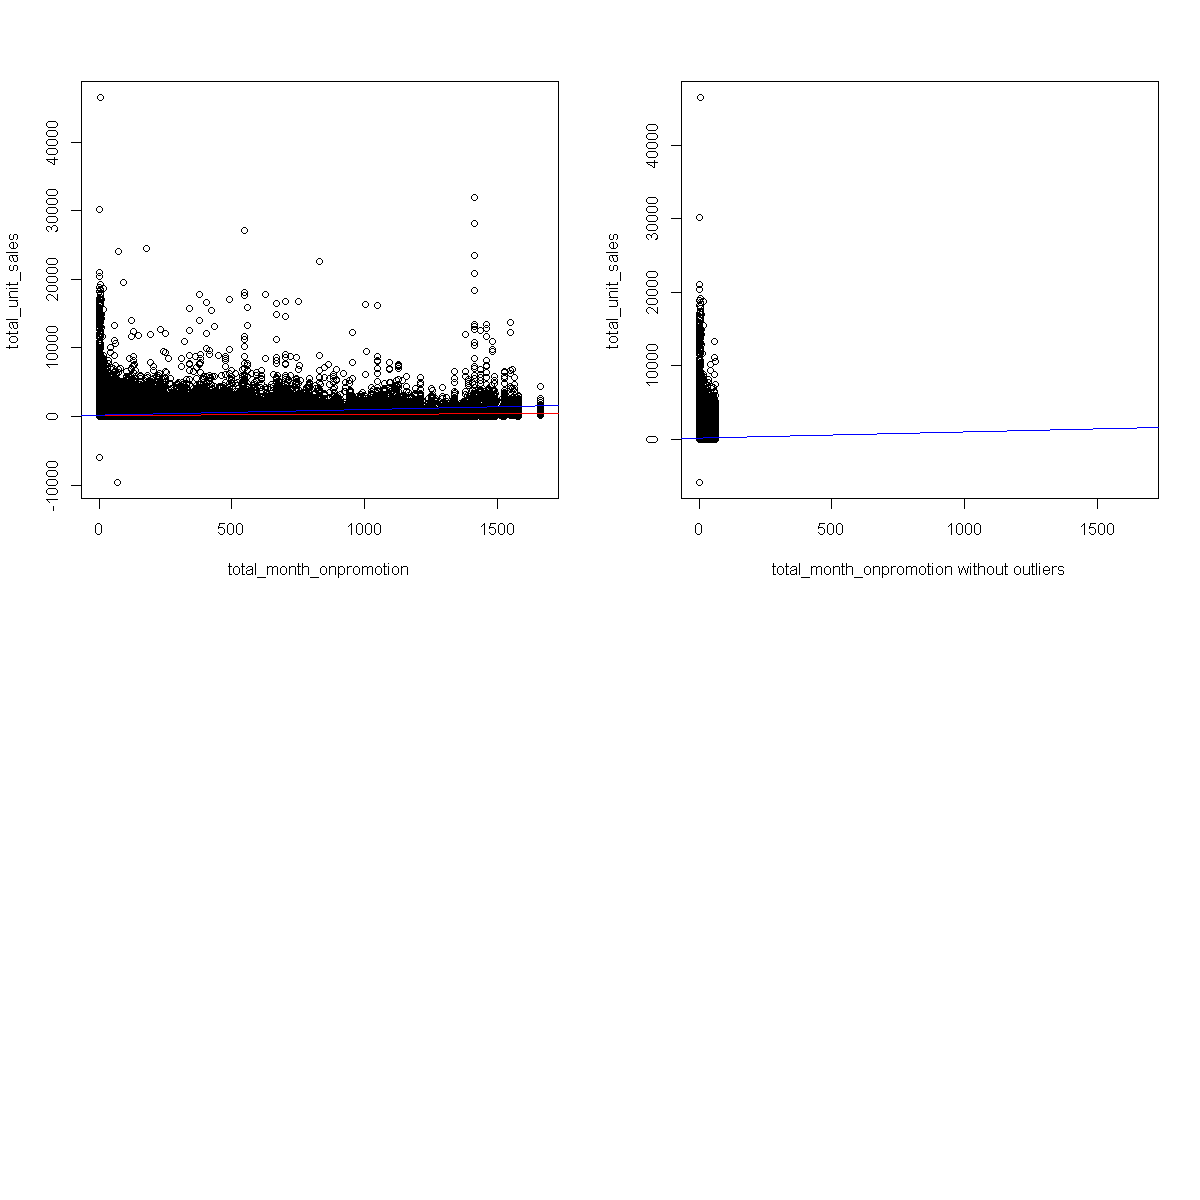

In [39]:
#3.1.2
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (v in nf){
            a<-max(df[[v]],na.rm=TRUE)
            b1<- df %>% select(total_unit_sales,v)   
            b2<-df %>% select(total_unit_sales,v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0) 
            plot(b1[[v]],b1$total_unit_sales,xlab=v,ylab='total_unit_sales',xlim=c(0,a))
            abline(coef(lm(b1$total_unit_sales~b1[[v]])), col="red")
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$total_unit_sales~b2[[v]])), col="blue")}
            plot(b2[[v]],b2$total_unit_sales,xlab=paste(v,'without outliers',sep=' '),ylab='total_unit_sales',xlim=c(0,a))
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$total_unit_sales~b2[[v]])), col="blue")}
            
}

removing the outliers doesnt affect the assumption at variables:
prev_month_sales, prev_3month_sales, avg_prev_3months_sales, min_prev_3months_sales, max_prev_3months_sales,
total_month_transactions, prev_month_transactions, prev_3month_transactions, avg_prev_3month_transactions, min_prev_3month_transactions, max_prev_3month_transactions,  total_month_onpromotion 

removing the outliers from the data doesnt affect the regression model at features:
* prev_month_sales, prev_3month_sales, min_prev_3months_sales, max_prev_3months_sales

In [37]:
# i decided to treat these features by convering the outliers to NA values because at some of them 
# reomoving the outliers affects only the result and at some of them removing the outliers affect ony the model
l1<- c('prev_month_sales', 'prev_3month_sales', 'avg_prev_3months_sales', 'min_prev_3months_sales', 'max_prev_3months_sales',
'total_month_transactions', 'prev_month_transactions', 'prev_3month_transactions', 'avg_prev_3month_transactions',
       'min_prev_3month_transactions', 'max_prev_3month_transactions','total_month_onpromotion')

In [35]:
outliers_treat = read.csv("../data/outlier_treatment.csv")

In [36]:
outliers_treat <- outliers_treat[1:41,1:4]
outliers_treat

Feature.name                 Scale Outlier.treatment
1  budget                       Ratio drop             
2  popularity                   Ratio Leave            
3  runtime                      Ratio drop             
4  sw_collection                Ratio Leave            
5  producers_cnt                Ratio Null             
6  countries_cnt                Ratio Leave            
7  keywords_cnt                 Ratio drop             
8  actor0_movies_cnt            Ratio drop             
9  actor0_movies_5y_cnt         Ratio drop             
10 actor1_movies_cnt            Ratio drop             
11 actor1_movies_5y_cnt         Ratio drop             
12 actor2_movies_cnt            Ratio drop             
13 actor2_movies_5y_cnt         Ratio drop             
14 actor0_prev_revenue          Ratio drop             
15 actor1_prev_revenue          Ratio drop             
16 actor2_prev_revenue          Ratio drop             
17 director_movies_cnt          Ratio drop             
18 director_movies_5y_cnt       Ratio drop             
19 depart_Art                   Ratio drop             
20 depart_Camera                Ratio drop             
21 depart_Crew                  Ratio Leave            
22 depart_Custom_Mkup           Ratio drop             
23 depart_Directing             Ratio drop             
24 depart_Editing               Ratio drop             
25 depart_Lighting              Ratio Leave            
26 depart_Production            Ratio drop             
27 depart_Sound                 Ratio drop             
28 depart_Visual_Effects        Ratio Leave            
29 depart_Writing               Ratio drop             
30 depart_Art_female            Ratio Leave            
31 depart_Camera_female         Ratio Leave            
32 depart_Crew_female           Ratio Leave            
33 depart_Custom_Mkup_female    Ratio drop             
34 depart_Directing_female      Ratio Leave            
35 depart_Editing_female        Ratio Leave            
36 depart_Lighting_female       Ratio Leave            
37 depart_Production_female     Ratio drop             
38 depart_Sound_female          Ratio Leave            
39 depart_Visual_Effects_female Ratio Leave            
40 depart_Writing_female        Ratio Leave            
41                                                     
   why                                            
1  doesn't affect assumptions, affects the results
2  affect both assumption and resaults            
3  doesn't affect assumptions, affects the results
4  affect both assumption and resaults            
5  doesn't affect both assumption and resaults    
6  affect both assumption and resaults            
7  doesn't affect assumptions, affects the results
8  doesn't affect both assumption and resaults    
9  doesn't affect both assumption and resaults    
10 doesn't affect assumptions, affects the results
11 doesn't affect both assumption and resaults    
12 doesn't affect both assumption and resaults    
13 doesn't affect both assumption and resaults    
14 doesn't affect both assumption and resaults    
15 doesn't affect both assumption and resaults    
16 doesn't affect both assumption and resaults    
17 doesn't affect assumptions, affects the results
18 doesn't affect both assumption and resaults    
19 doesn't affect both assumption and resaults    
20 affect assumption but doesn't affect resaults  
21 affect both assumption and resaults            
22 affect assumption but doesn't affect resaults  
23 doesn't affect both assumption and resaults    
24 doesn't affect both assumption and resaults    
25 affect both assumption and resaults            
26 doesn't affect both assumption and resaults    
27 affect assumption but doesn't affect results   
28 affect both assumption and resaults            
29 doesn't affect both assumption and resaults    
30 affect both assumption and resaults            
31 affect both assumption and resaults            
32 affect both assu

In [38]:
## function which takes a dataframe and a vector of names and transforms outliers to NA
## at the features which are in the vector
outlierRepNAMatrix <- function(data,vec,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v %in% vec)) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]]  > outhigh & v!='revenue',NA,data[[v]])
            outdata[v] <- mv
        } else {
            outdata[v] <- data[[v]]
        }
    }
    return(outdata)
}



3.1.3 - removing the outliers from the data

In [39]:
df.noout <- outlierRepNAMatrix(df,l1) 

In [39]:
movies_ff_v1<- movies_ff_v1[,2:86]

In [40]:
movies.miss1<- missingMatrix(movies_ff_v1)

In [40]:
getMissingness(df.noout)

[[1]]
                       var na.count rate
1        prev_3month_sales   313059 14.9
2         prev_month_sales   234565 11.1
3 prev_3month_transactions   220337 10.5
4   min_prev_3months_sales   195379  9.3
5   avg_prev_3months_sales   193885  9.2
6   max_prev_3months_sales   193392  9.2
7  prev_month_transactions   152218  7.2
8 total_month_transactions   138377  6.6

[[2]]
[1] "This dataset has 1621618 (77%) complete rows. Original data has 2107345 rows."



$missingness
                       var na.count rate
1        prev_3month_sales   313059 14.9
2         prev_month_sales   234565 11.1
3 prev_3month_transactions   220337 10.5
4   min_prev_3months_sales   195379  9.3
5   avg_prev_3months_sales   193885  9.2
6   max_prev_3months_sales   193392  9.2
7  prev_month_transactions   152218  7.2
8 total_month_transactions   138377  6.6

$message
[1] "This dataset has 1621618 (77%) complete rows. Original data has 2107345 rows."

$rows
NULL

In [41]:
summary(df.noout)

      row1           item_nbr          store_nbr              Year     
 Min.   :      1   Length:2107345     Length:2107345     Min.   :2013  
 1st Qu.: 526837   Class :character   Class :character   1st Qu.:2014  
 Median :1053673   Mode  :character   Mode  :character   Median :2015  
 Mean   :1053673                                         Mean   :2015  
 3rd Qu.:1580509                                         3rd Qu.:2016  
 Max.   :2107345                                         Max.   :2017  
                                                                       
     month        total_unit_sales      city              state          
 Min.   : 1.000   Min.   :-9700.0   Length:2107345     Length:2107345    
 1st Qu.: 3.000   1st Qu.:   56.0   Class :character   Class :character  
 Median : 6.000   Median :  115.0   Mode  :character   Mode  :character  
 Mean   : 6.334   Mean   :  225.2                                        
 3rd Qu.: 9.000   3rd Qu.:  243.0                     

In [43]:
##creating vector of coninuous features with more than 5 percent NA values 
l2 <- c()
for (i in l){
    if (sum(is.na(movies_ff_v1[[i]])*100/7375)>=5){
        l2<-c(l2,i)
    }
}

In [44]:
##creating vector of coninuous features with less than 5 percent NA values
l3 <- c()
for (i in l){
    if (sum(is.na(movies_ff_v1[[i]])*100/7375)<5){
        l3<-c(l3,i)
    }
}

In [45]:
##creating vector of categorical features with  NA values
l4 <- c()
for (i in cn){
    if (sum(is.na(movies_ff_v1[[i]]))>0){
        l4<-c(l4,i)
    }
}

In [46]:
## with these feature i am going to check the missingness mechanism
l2

[1] "budget"              "producers_cnt"       "actor1_movies_cnt"  
 [4] "actor2_movies_cnt"   "actor0_prev_revenue" "actor1_prev_revenue"
 [7] "actor2_prev_revenue" "director_movies_cnt" "depart_Art"         
[10] "depart_Camera"       "depart_Custom_Mkup"  "depart_Directing"   
[13] "depart_Sound"

In [47]:
#vector of the continuous features with less than 5 percent of missing values- the NA treatment 
##for these features will be remove rows with NA values 
l3

[1] "popularity"                   "runtime"                     
 [3] "keyword_cnt"                  "sw_collection"               
 [5] "countries_cnt"                "keywords_cnt"                
 [7] "actor0_movies_cnt"            "actor0_movies_5y_cnt"        
 [9] "actor1_movies_5y_cnt"         "actor2_movies_5y_cnt"        
[11] "director_movies_5y_cnt"       "depart_Crew"                 
[13] "depart_Editing"               "depart_Lighting"             
[15] "depart_Production"            "depart_Visual_Effects"       
[17] "depart_Writing"               "depart_Art_female"           
[19] "depart_Camera_female"         "depart_Crew_female"          
[21] "depart_Custom_Mkup_female"    "depart_Directing_female"     
[23] "depart_Editing_female"        "depart_Production_female"    
[25] "depart_Sound_female"          "depart_Visual_Effects_female"
[27] "depart_Writing_female"

In [48]:
#vector of the categoric features with missing values
l4

[1] "release_date"           "release_year"           "release_month"         
 [4] "release_day"            "sw_female_actor0"       "sw_female_actor1"      
 [7] "sw_female_actor2"       "sw_male_actor0"         "sw_male_actor1"        
[10] "sw_male_actor2"         "depart_Lighting_female"

3.2.1 - Show the distribution of each numeric variable by missingness of other variables

Warning message:
"Removed 395 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.3345, df = 4195, p-value = 0.0008618
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07619678 0.29364057
sample estimates:
mean of x mean of y 
 2.965596  2.780678 

[1] "producers_cnt by NA budget"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


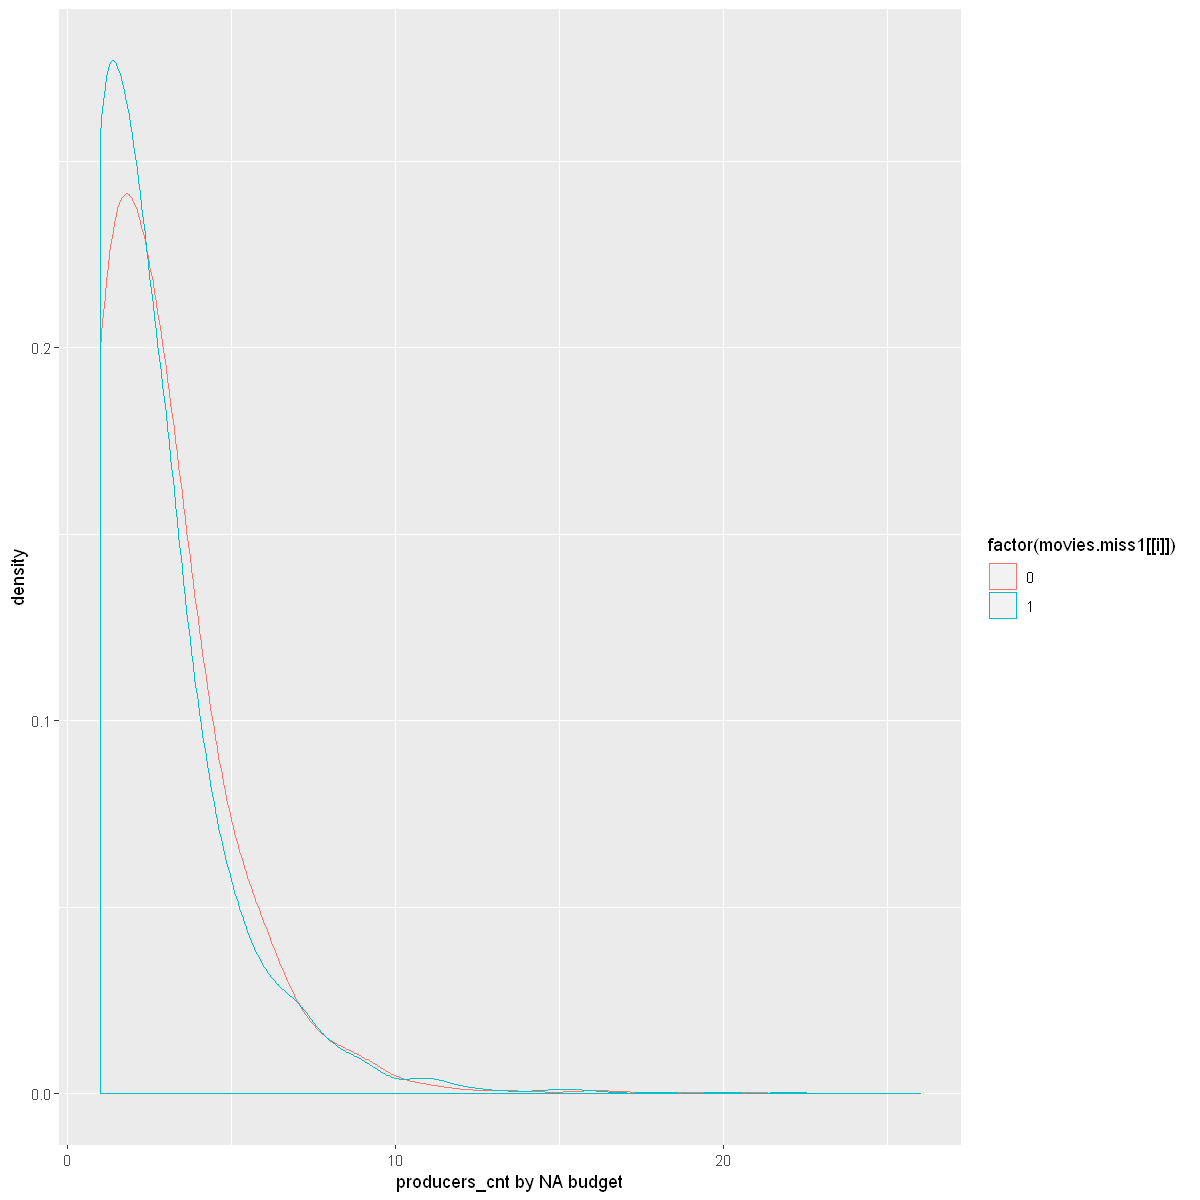


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.8239, df = 4947.1, p-value = 6.215e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7292912 1.2169636
sample estimates:
mean of x mean of y 
 4.386048  3.412920 

[1] "actor1_movies_cnt by NA budget"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


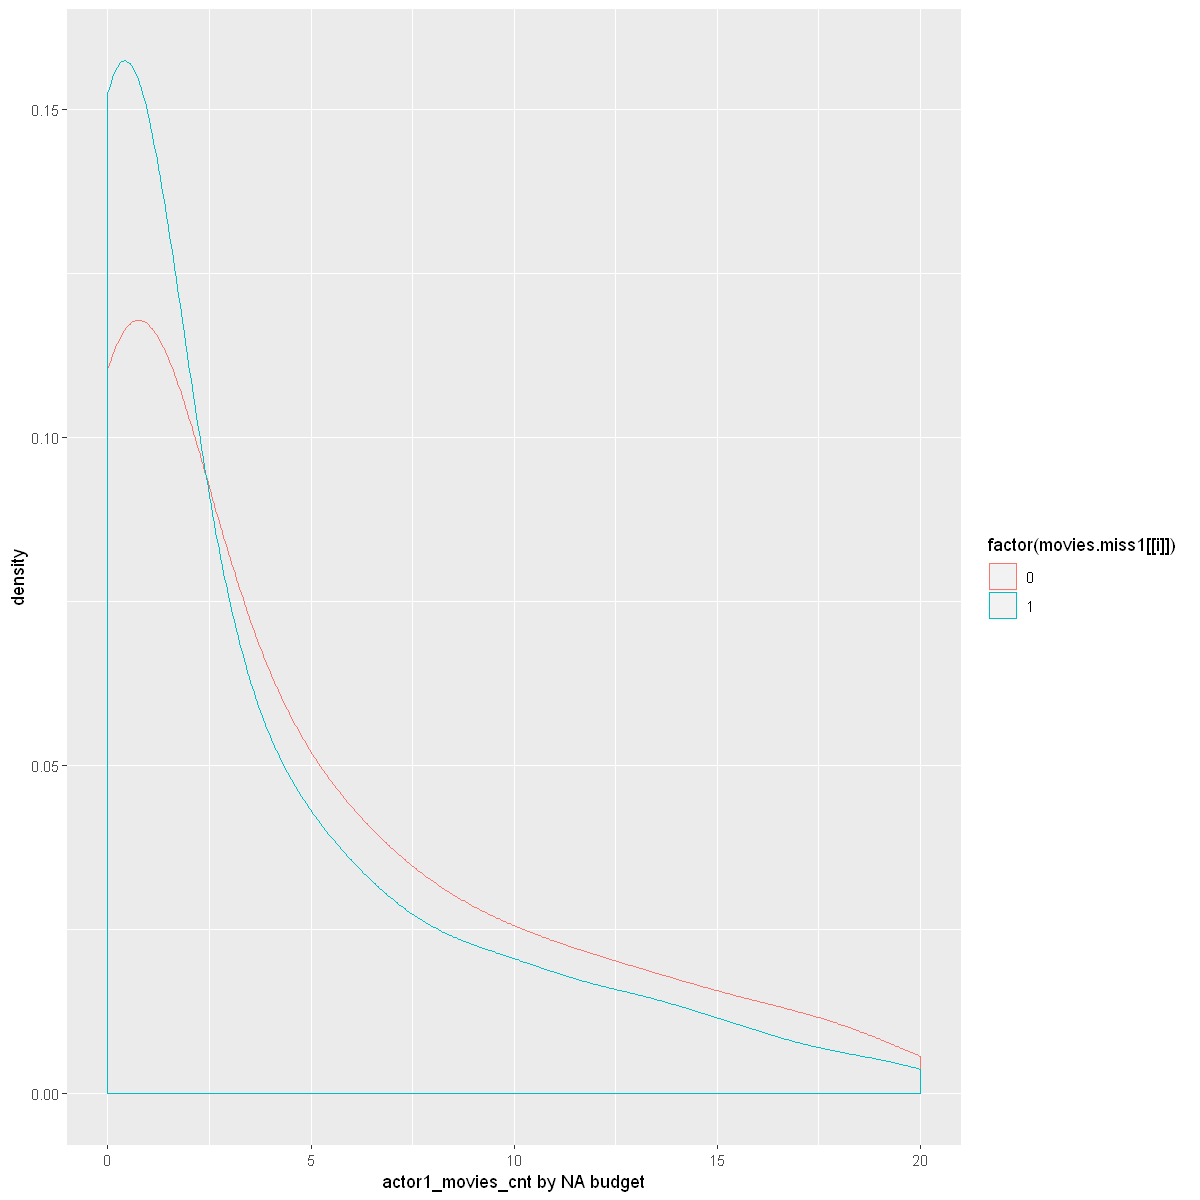


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.4384, df = 4824.2, p-value = 1.2e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5799918 0.9951278
sample estimates:
mean of x mean of y 
 3.546811  2.759251 

[1] "actor2_movies_cnt by NA budget"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


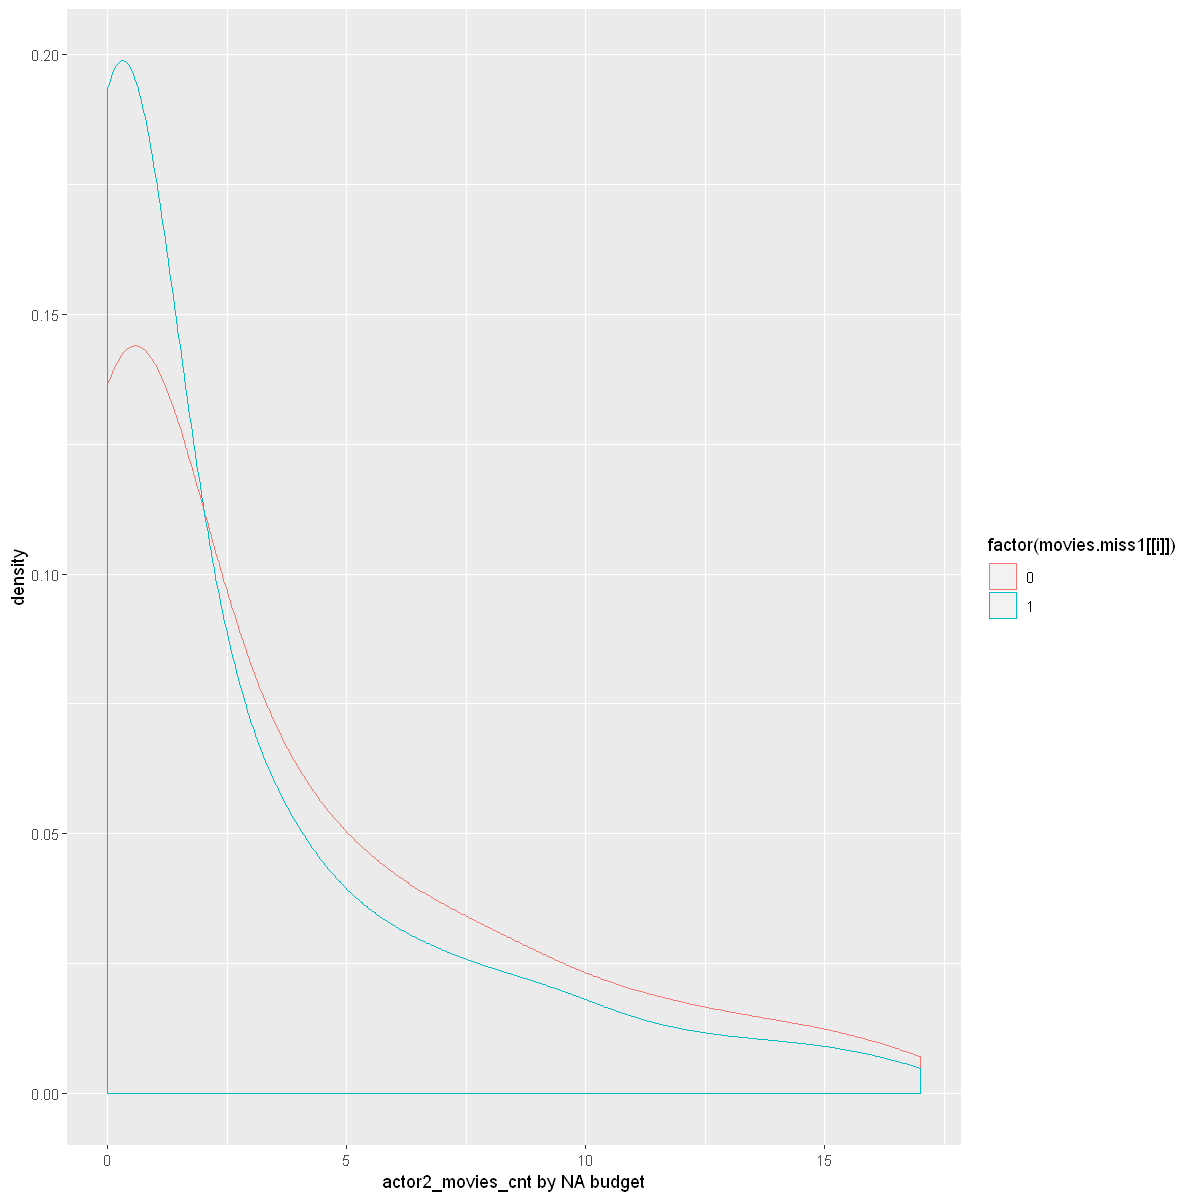


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 1.2384, df = 2139, p-value = 0.2157
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3953073 17501572
sample estimates:
mean of x mean of y 
176856868 170082619 

[1] "actor0_prev_revenue by NA budget"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


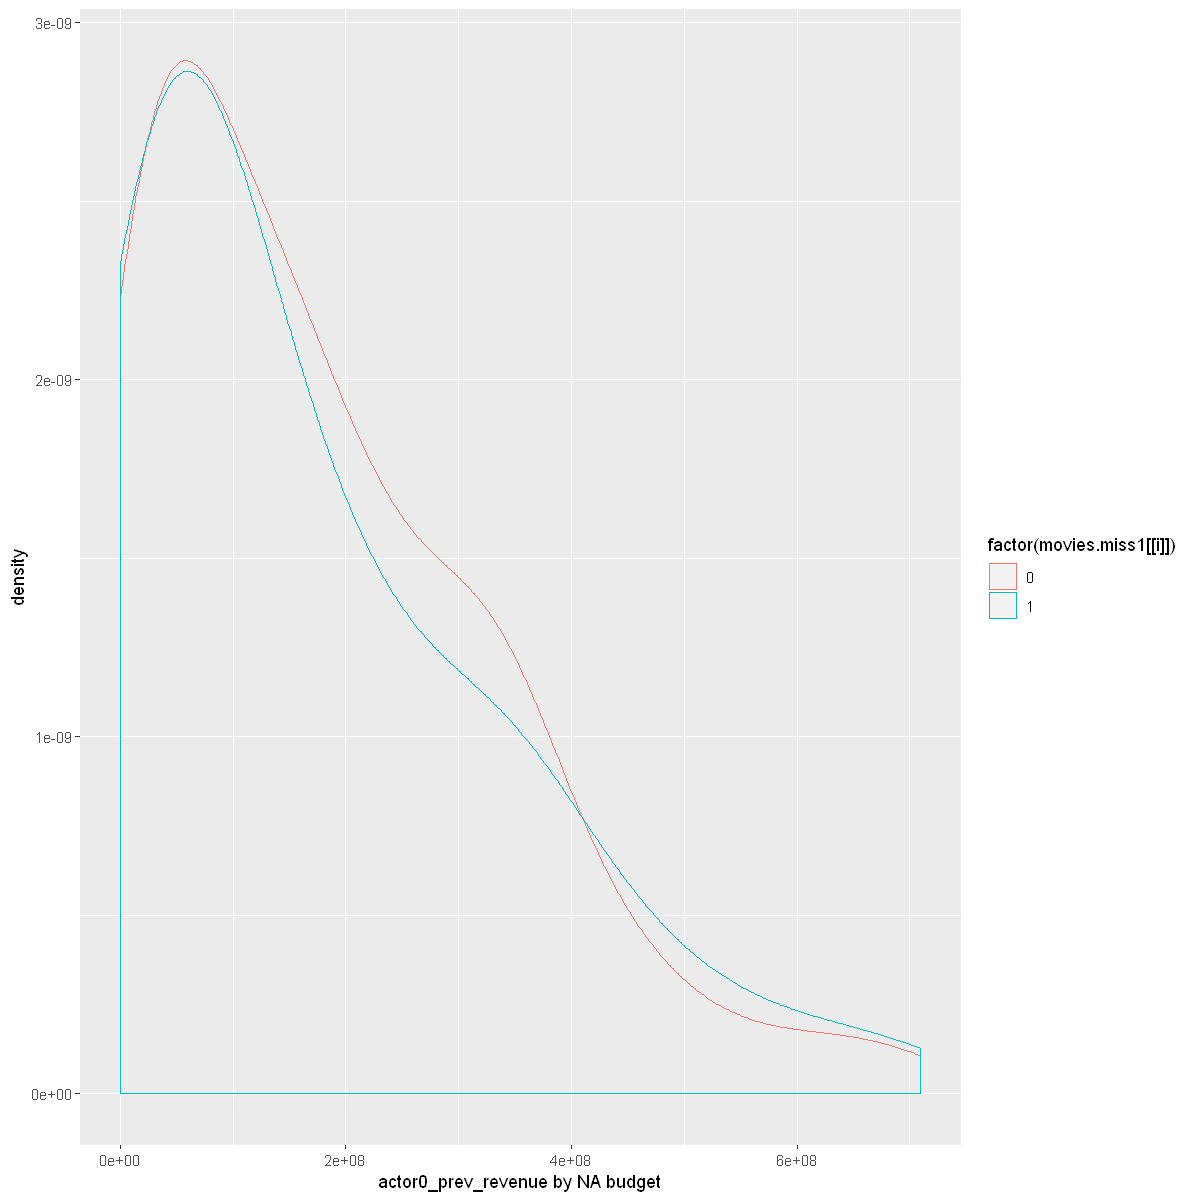


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 2.5156, df = 1924.3, p-value = 0.01196
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2702477 21822043
sample estimates:
mean of x mean of y 
148645816 136383556 

[1] "actor1_prev_revenue by NA budget"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


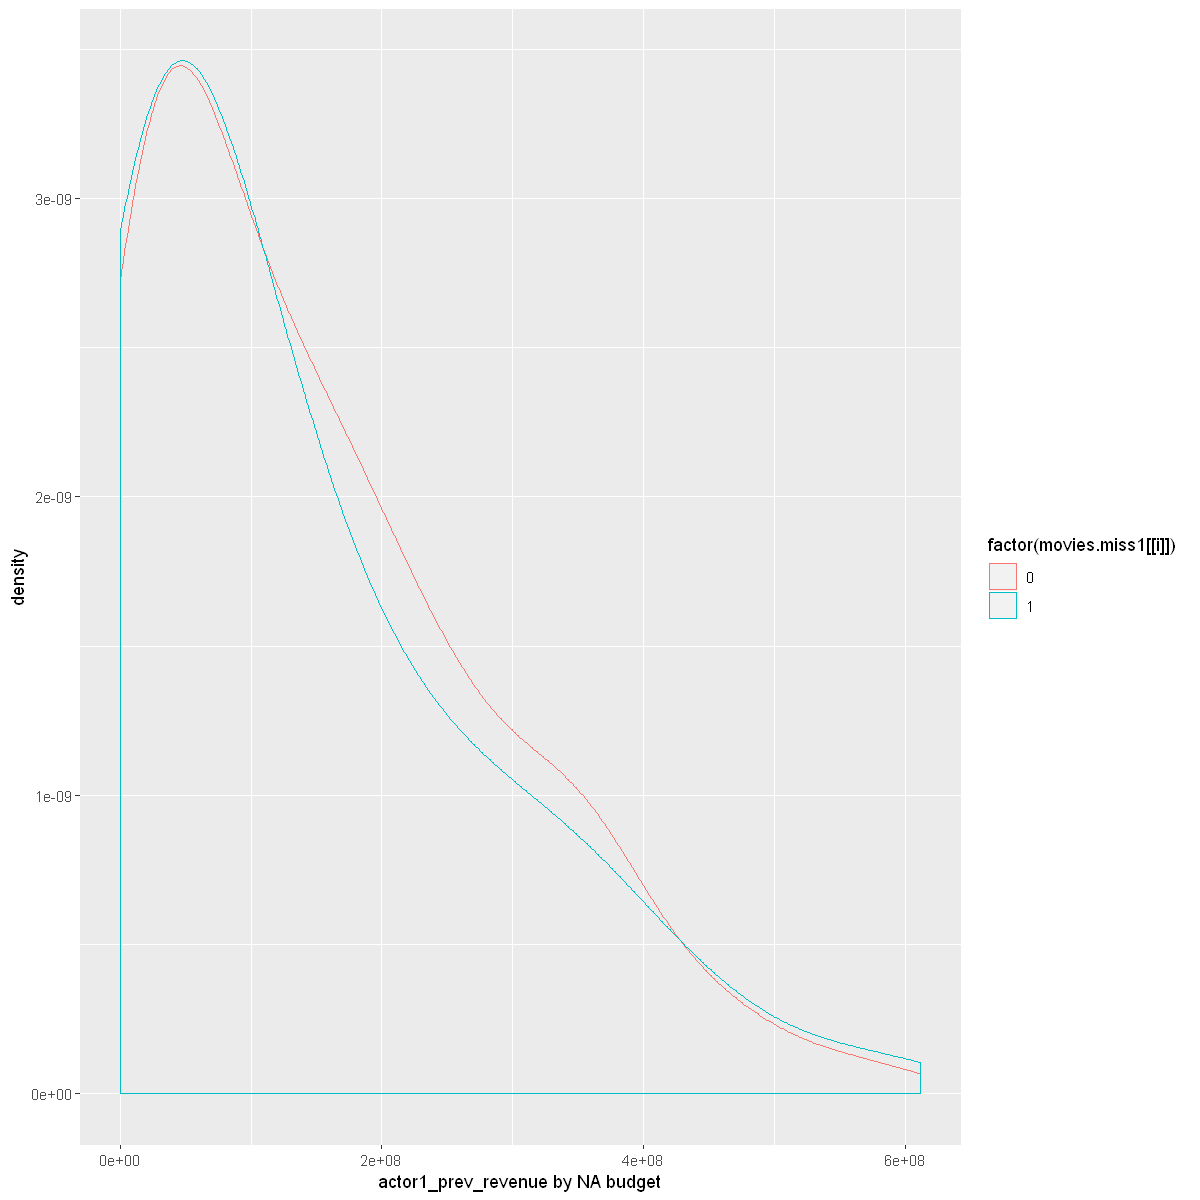


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 1.1409, df = 1824, p-value = 0.2541
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3879770 14670327
sample estimates:
mean of x mean of y 
135313487 129918209 

[1] "actor2_prev_revenue by NA budget"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


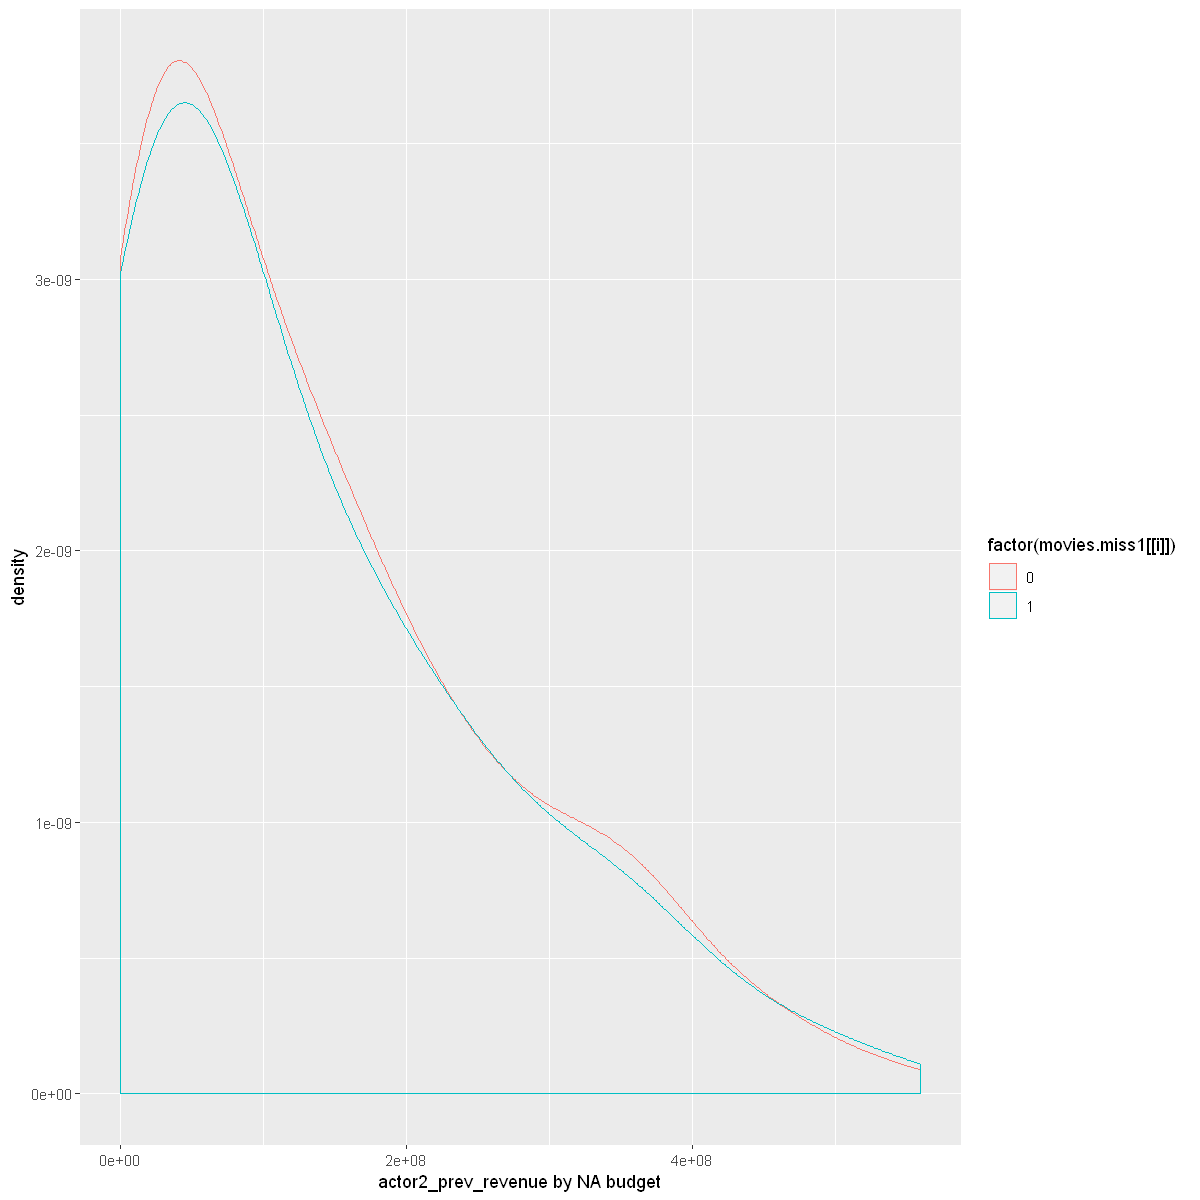


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.3649, df = 4722.1, p-value = 8.485e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1546714 0.3328070
sample estimates:
mean of x mean of y 
 1.435017  1.191278 

[1] "director_movies_cnt by NA budget"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


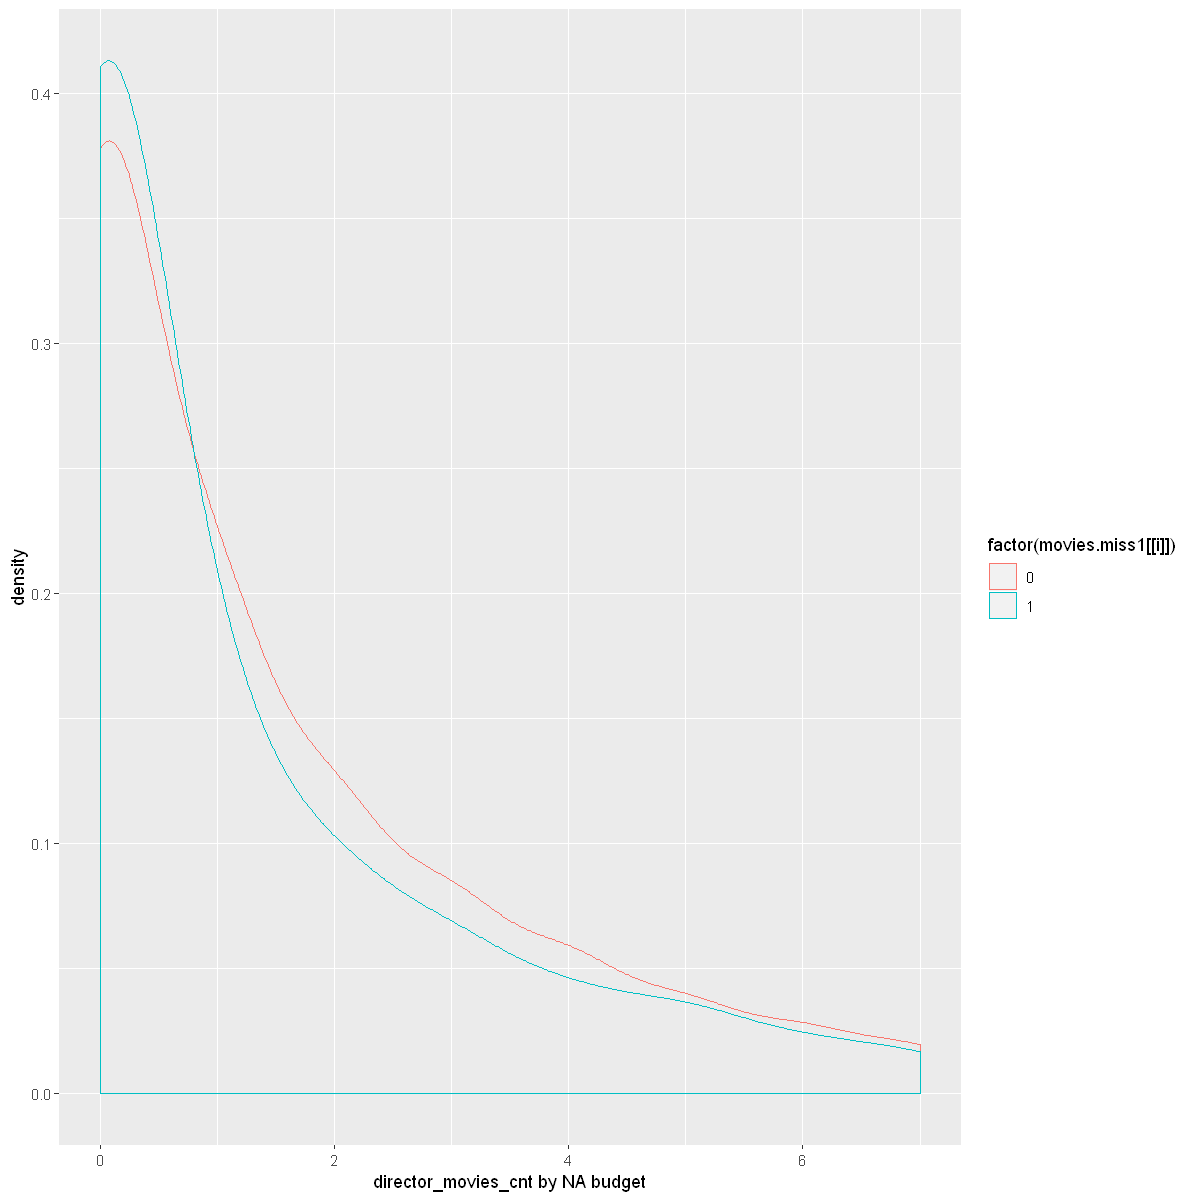


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 13.168, df = 4859.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5147187 0.6947854
sample estimates:
mean of x mean of y 
 1.806221  1.201469 

[1] "depart_Art by NA budget"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


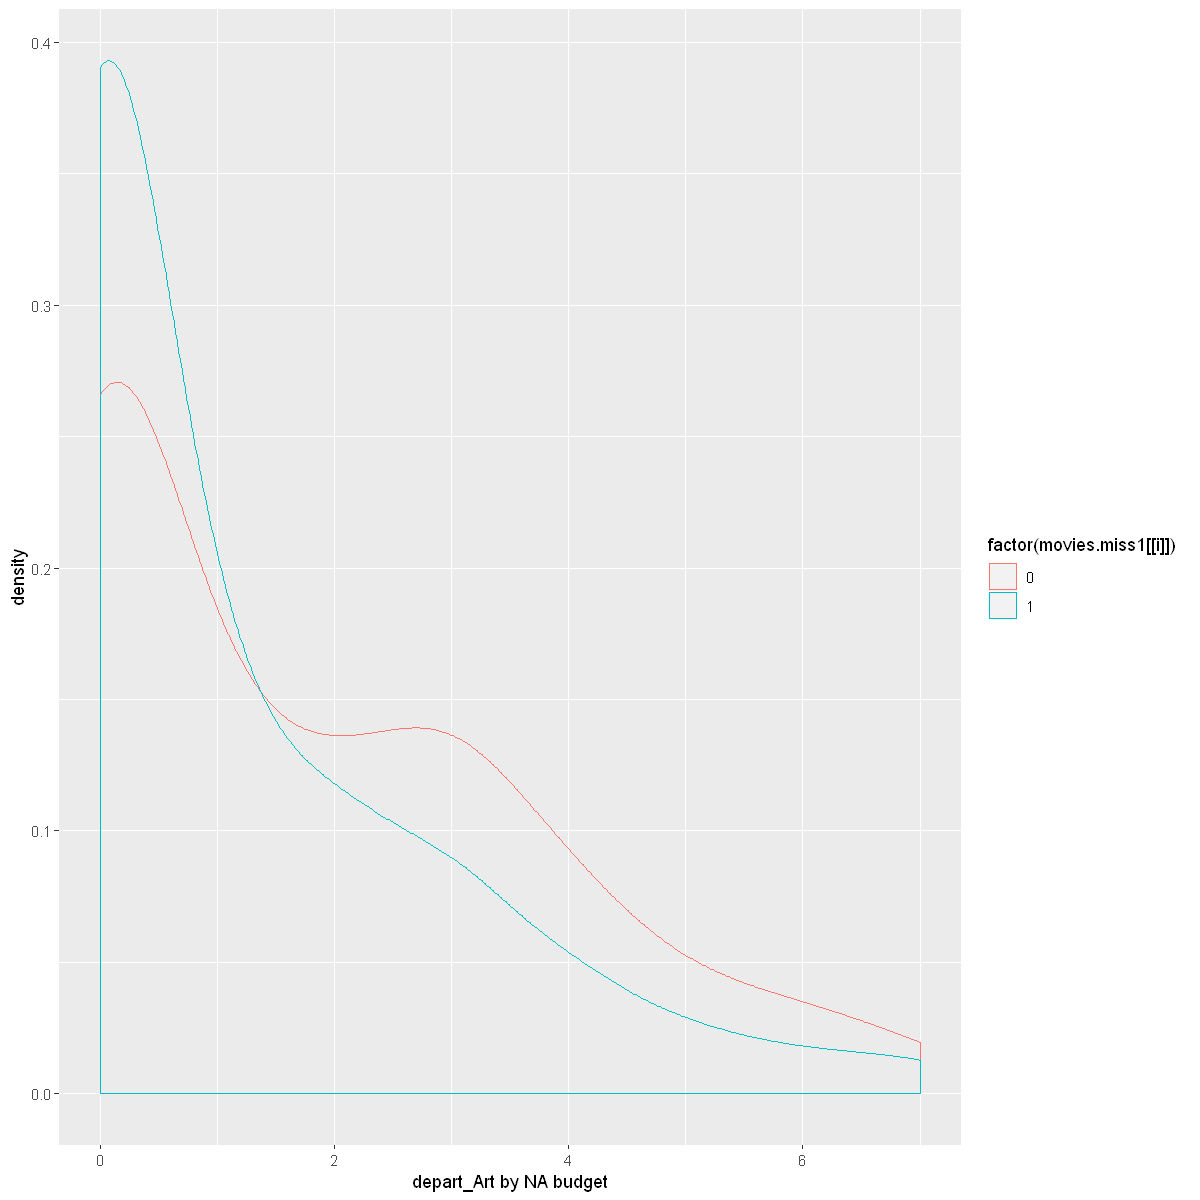


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 12.013, df = 5007.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2869836 0.3989175
sample estimates:
mean of x mean of y 
1.2249832 0.8820327 

[1] "depart_Camera by NA budget"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


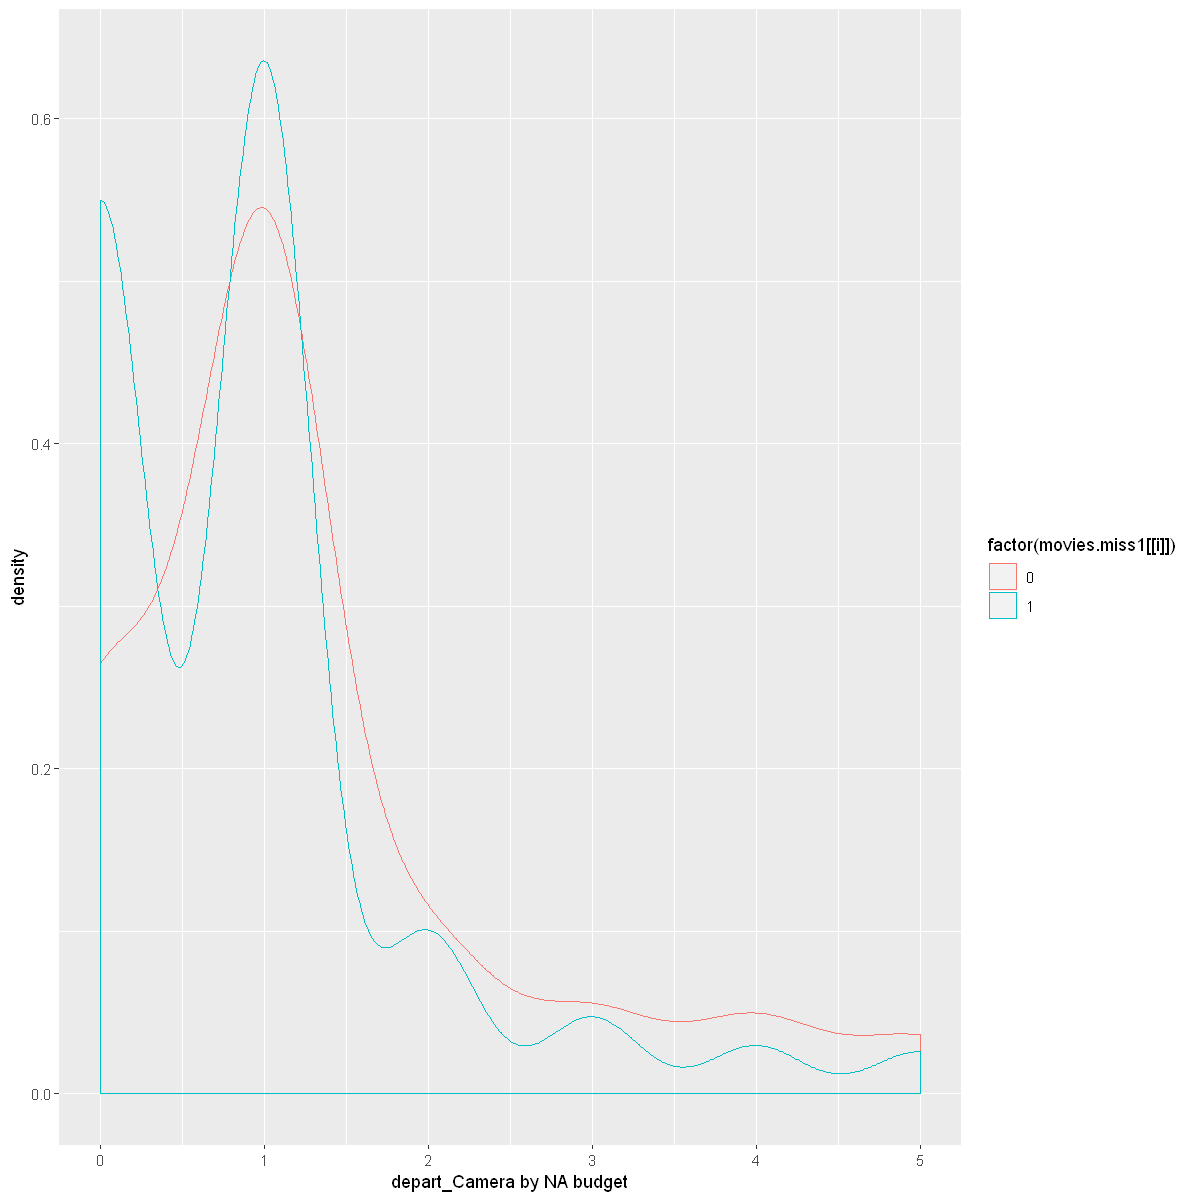


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 11.386, df = 5261.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2996611 0.4243166
sample estimates:
mean of x mean of y 
1.0000000 0.6380112 

[1] "depart_Custom_Mkup by NA budget"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


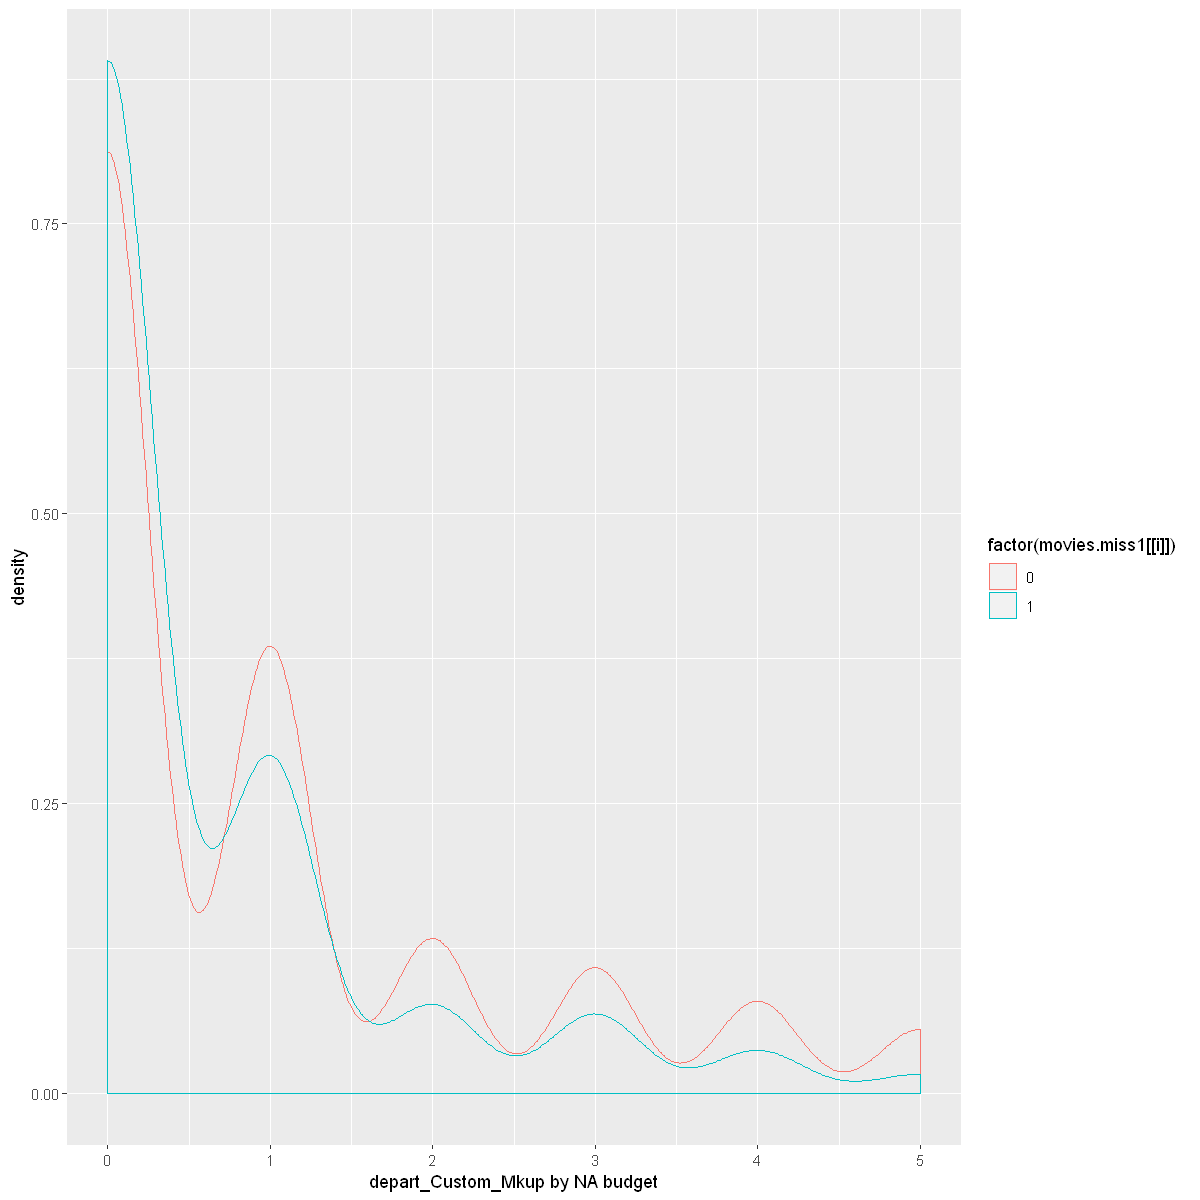


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.107, df = 5052.1, p-value = 6.456e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0973375 0.1594290
sample estimates:
mean of x mean of y 
 1.454624  1.326241 

[1] "depart_Directing by NA budget"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


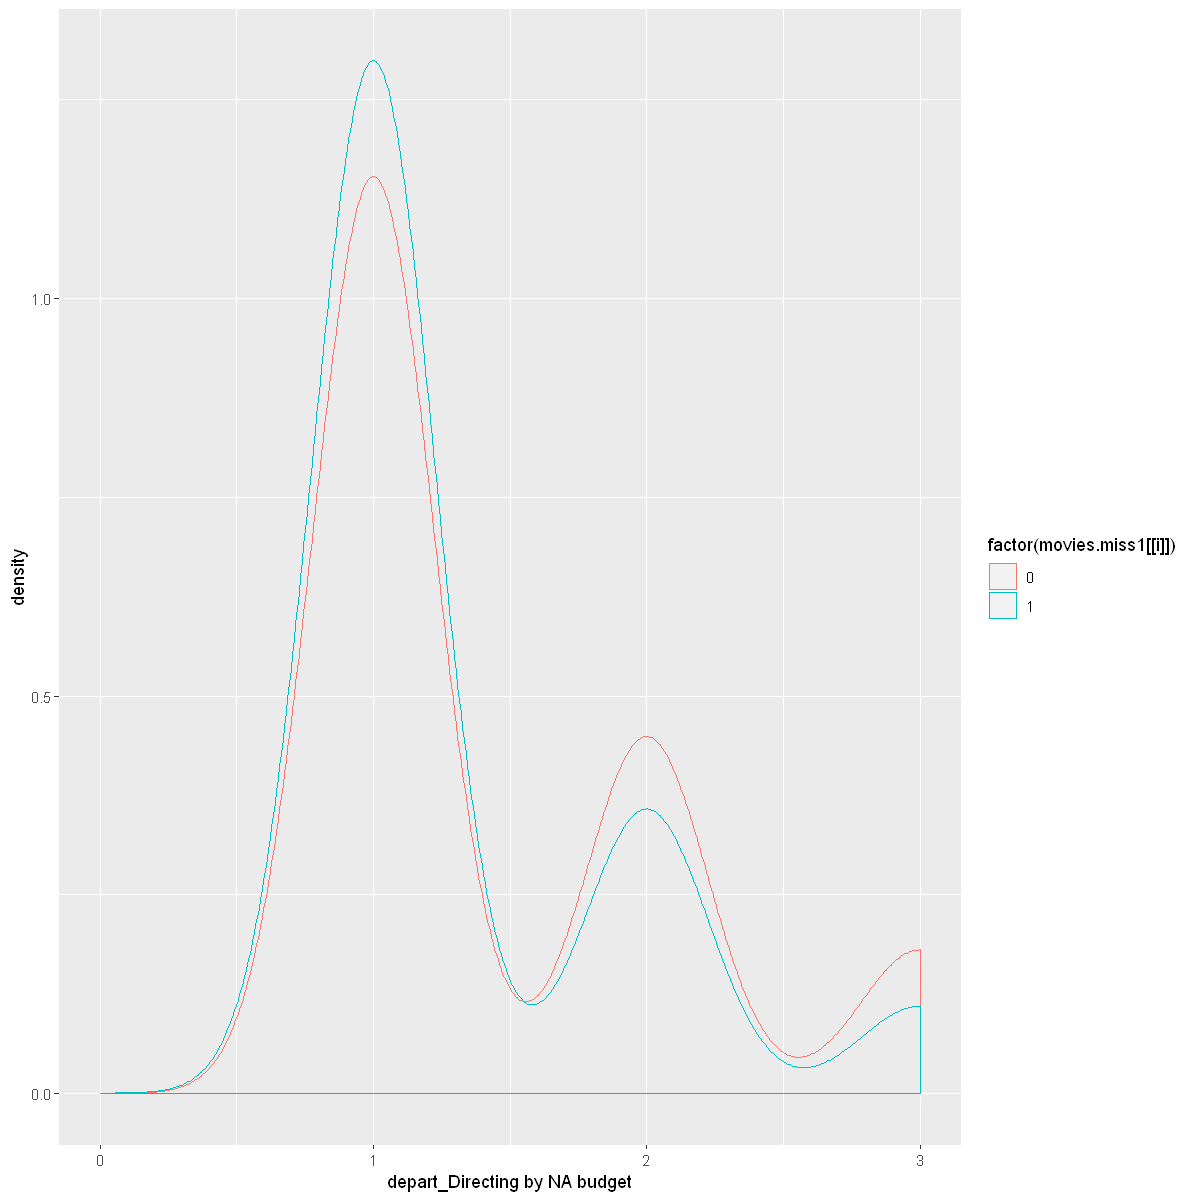


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 9.9081, df = 4546.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2828850 0.4224468
sample estimates:
mean of x mean of y 
 1.383524  1.030858 

[1] "depart_Sound by NA budget"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


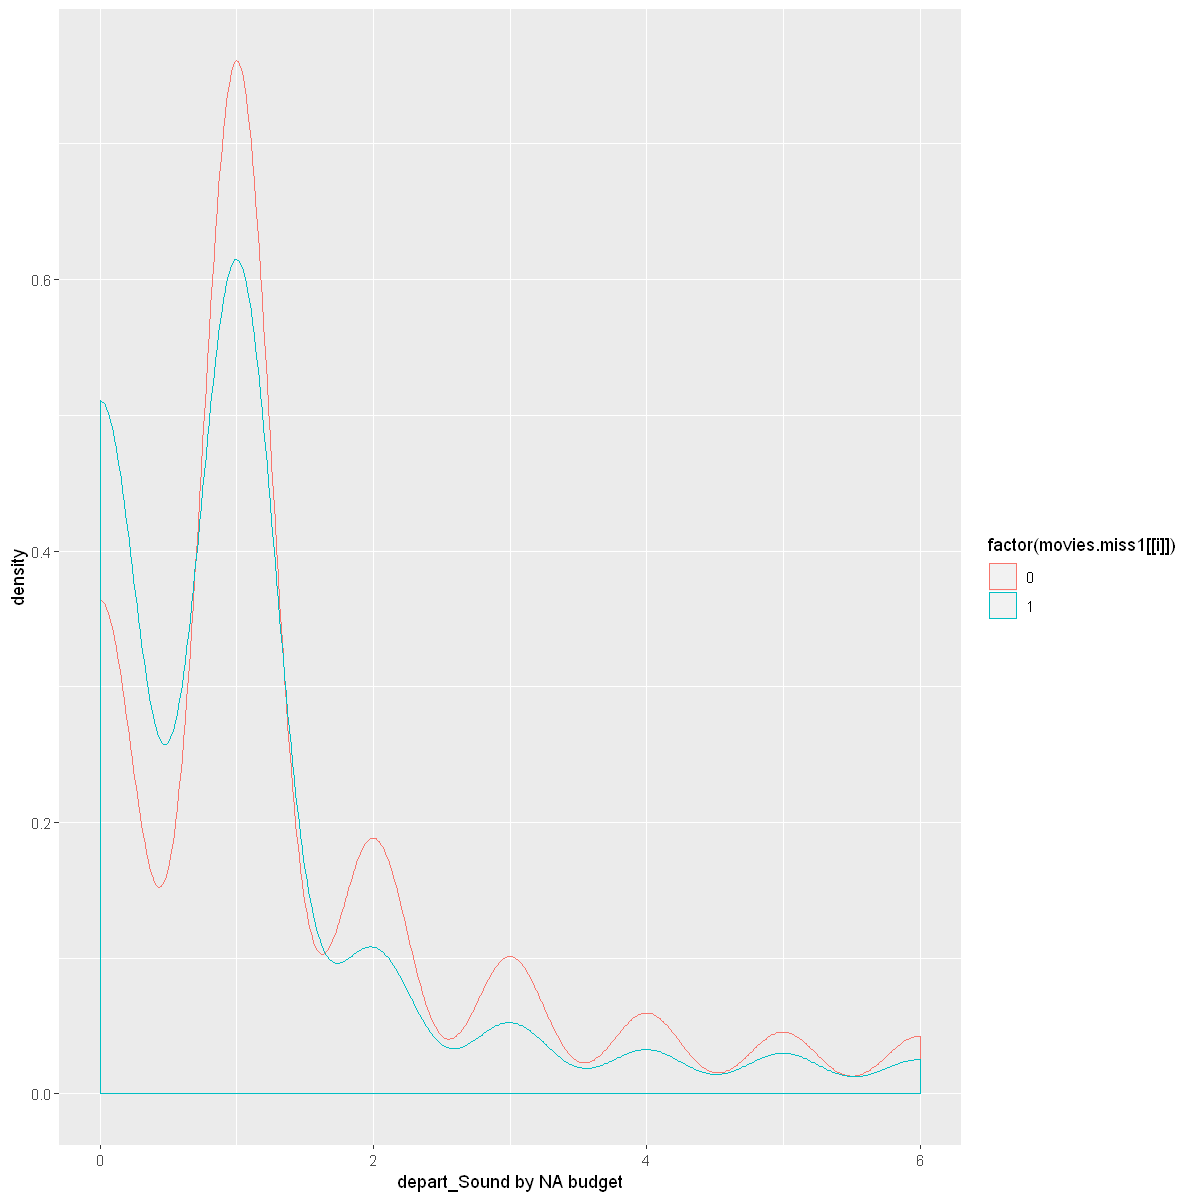


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2.5848, df = 1170.4, p-value = 0.009862
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -30790121  -4217816
sample estimates:
mean of x mean of y 
 61241548  78745517 

[1] "revenue by NA budget"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


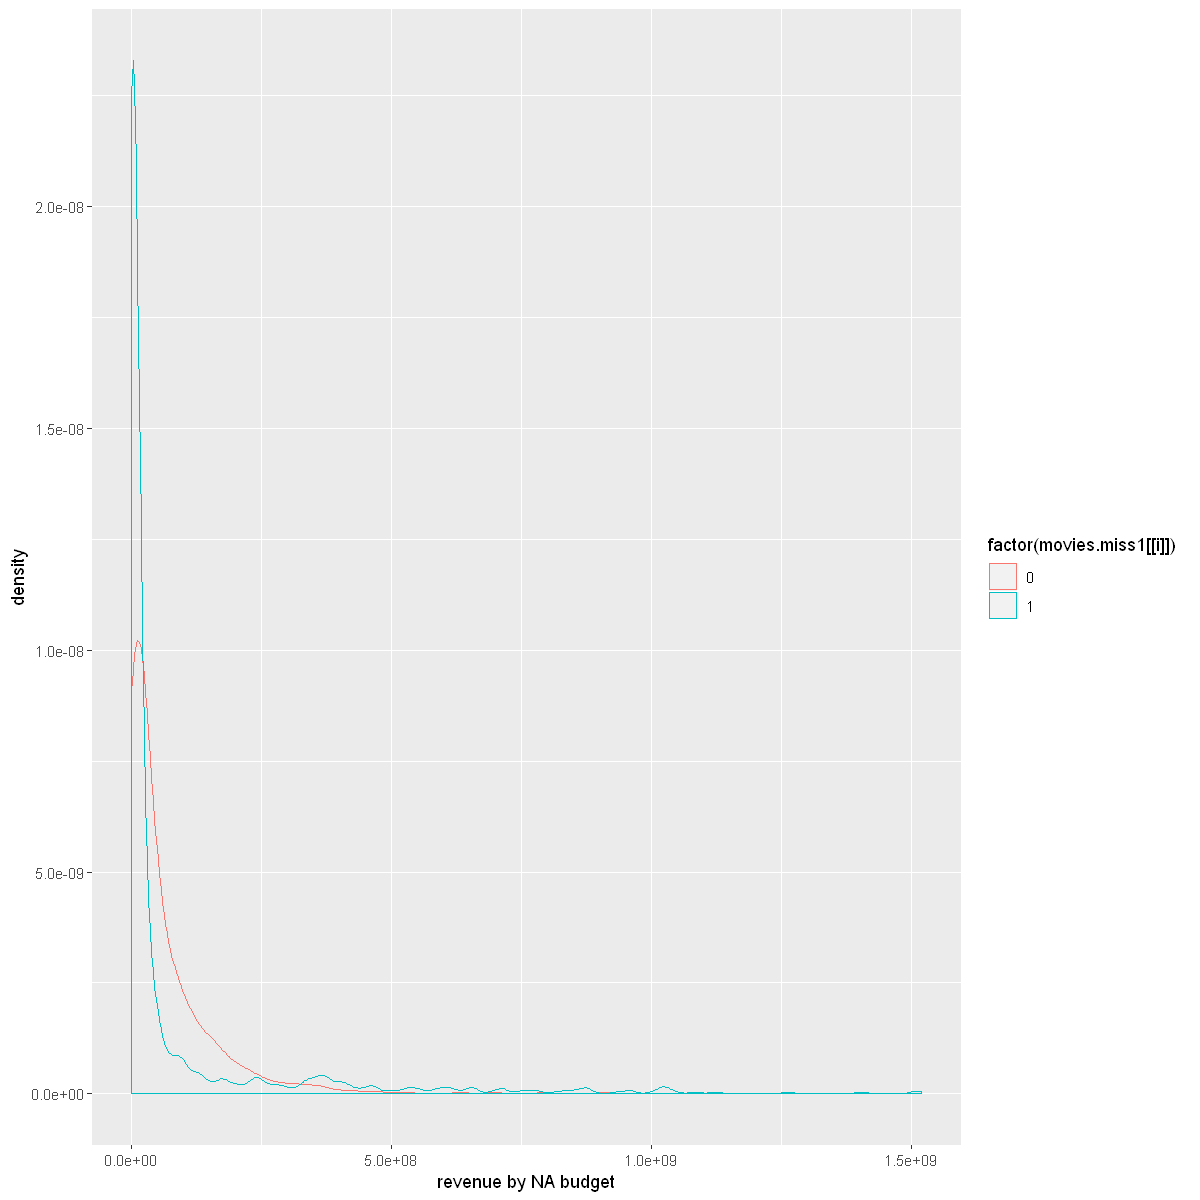


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 35.594, df = 433.12, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 17550718 19602250
sample estimates:
mean of x mean of y 
 22784964   4208479 

[1] "budget by NA producers_cnt"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


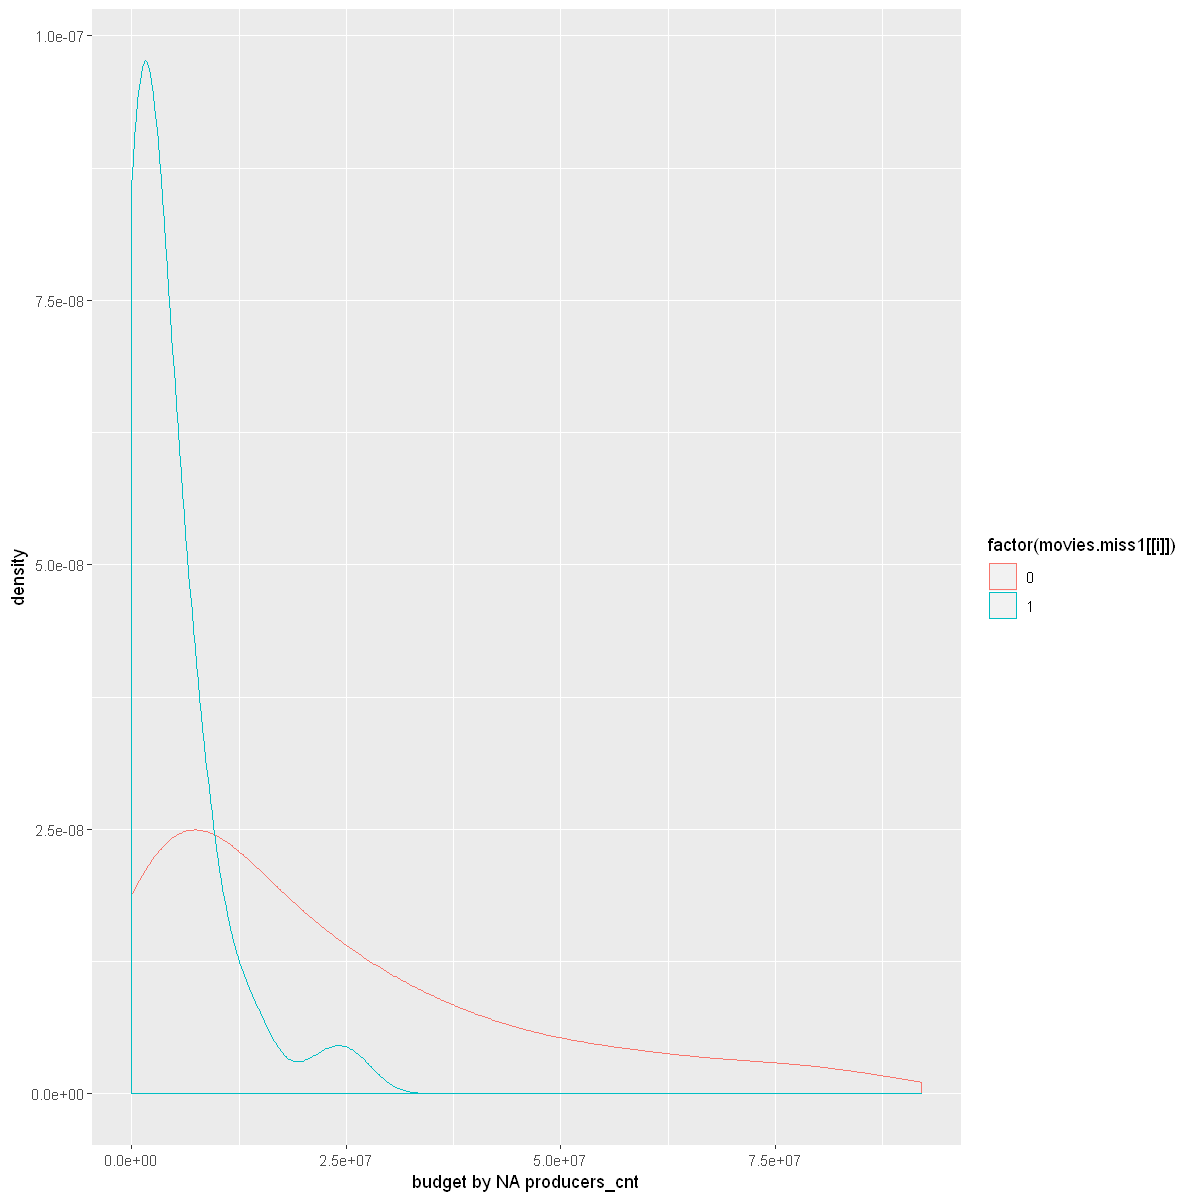


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 12.142, df = 497.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.909769 2.647152
sample estimates:
mean of x mean of y 
 4.194491  1.916031 

[1] "actor1_movies_cnt by NA producers_cnt"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


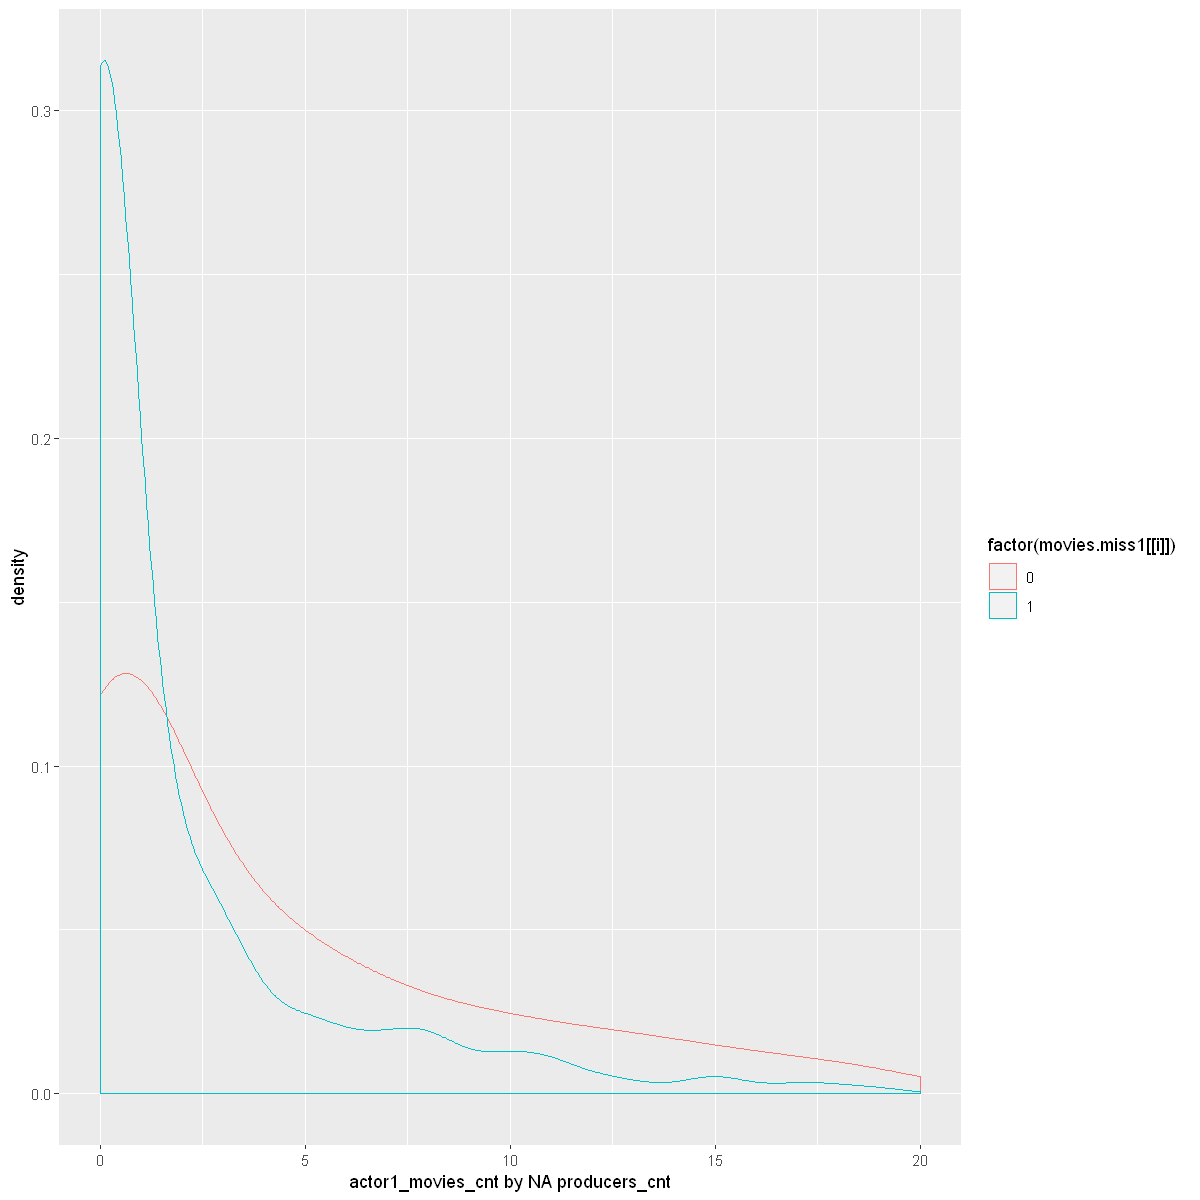


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 13.532, df = 503.17, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.761483 2.359832
sample estimates:
mean of x mean of y 
 3.406019  1.345361 

[1] "actor2_movies_cnt by NA producers_cnt"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


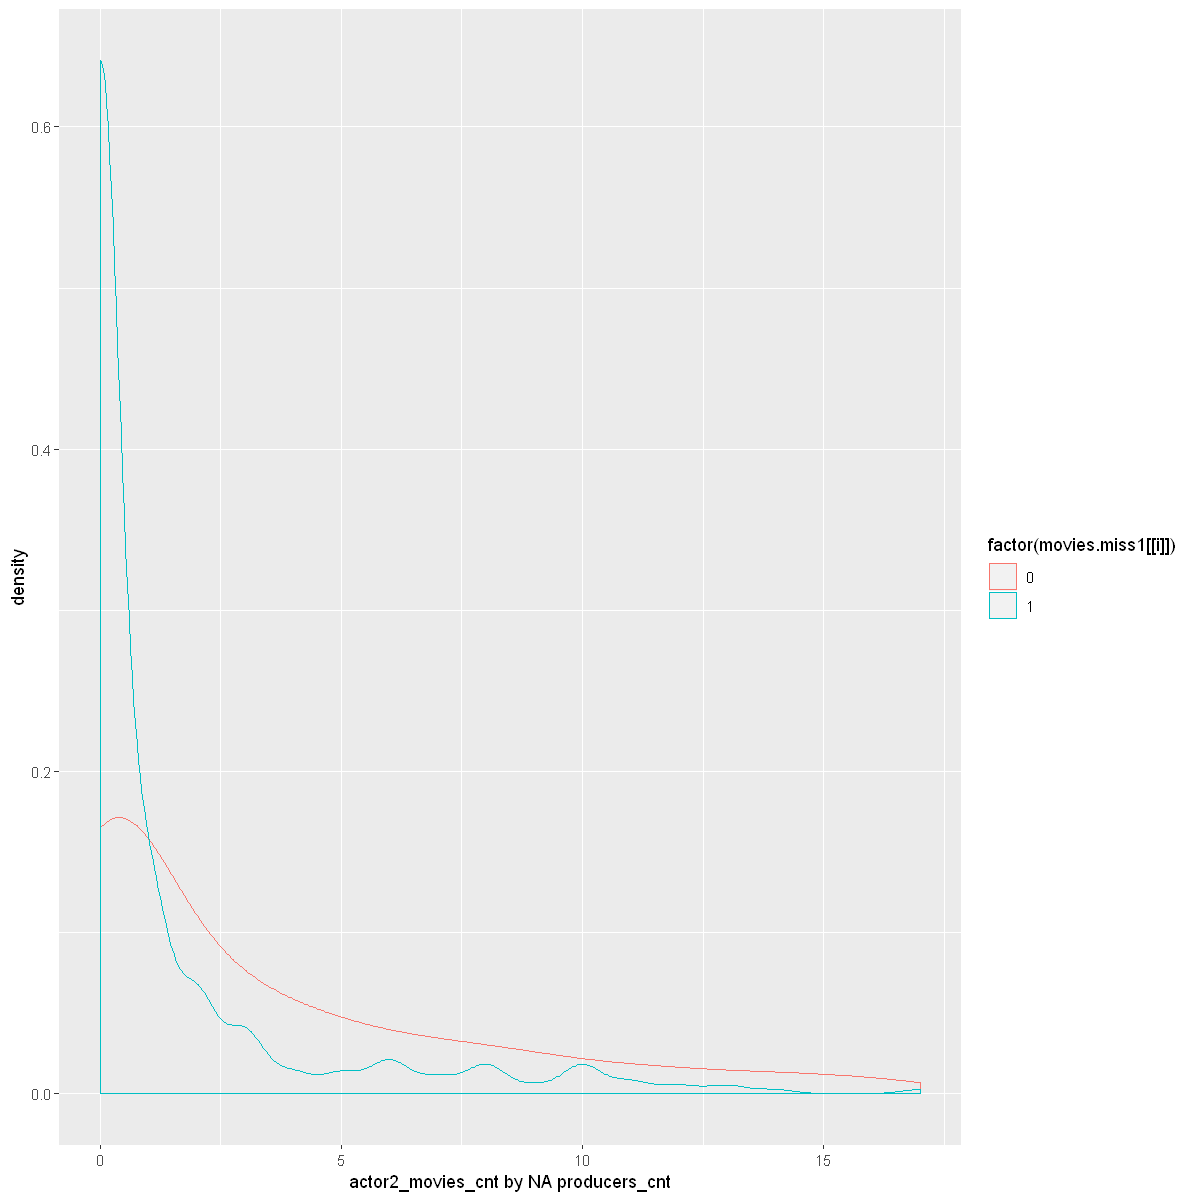


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 4.7731, df = 161.75, p-value = 4.032e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 32823905 79149589
sample estimates:
mean of x mean of y 
176852861 120866114 

[1] "actor0_prev_revenue by NA producers_cnt"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


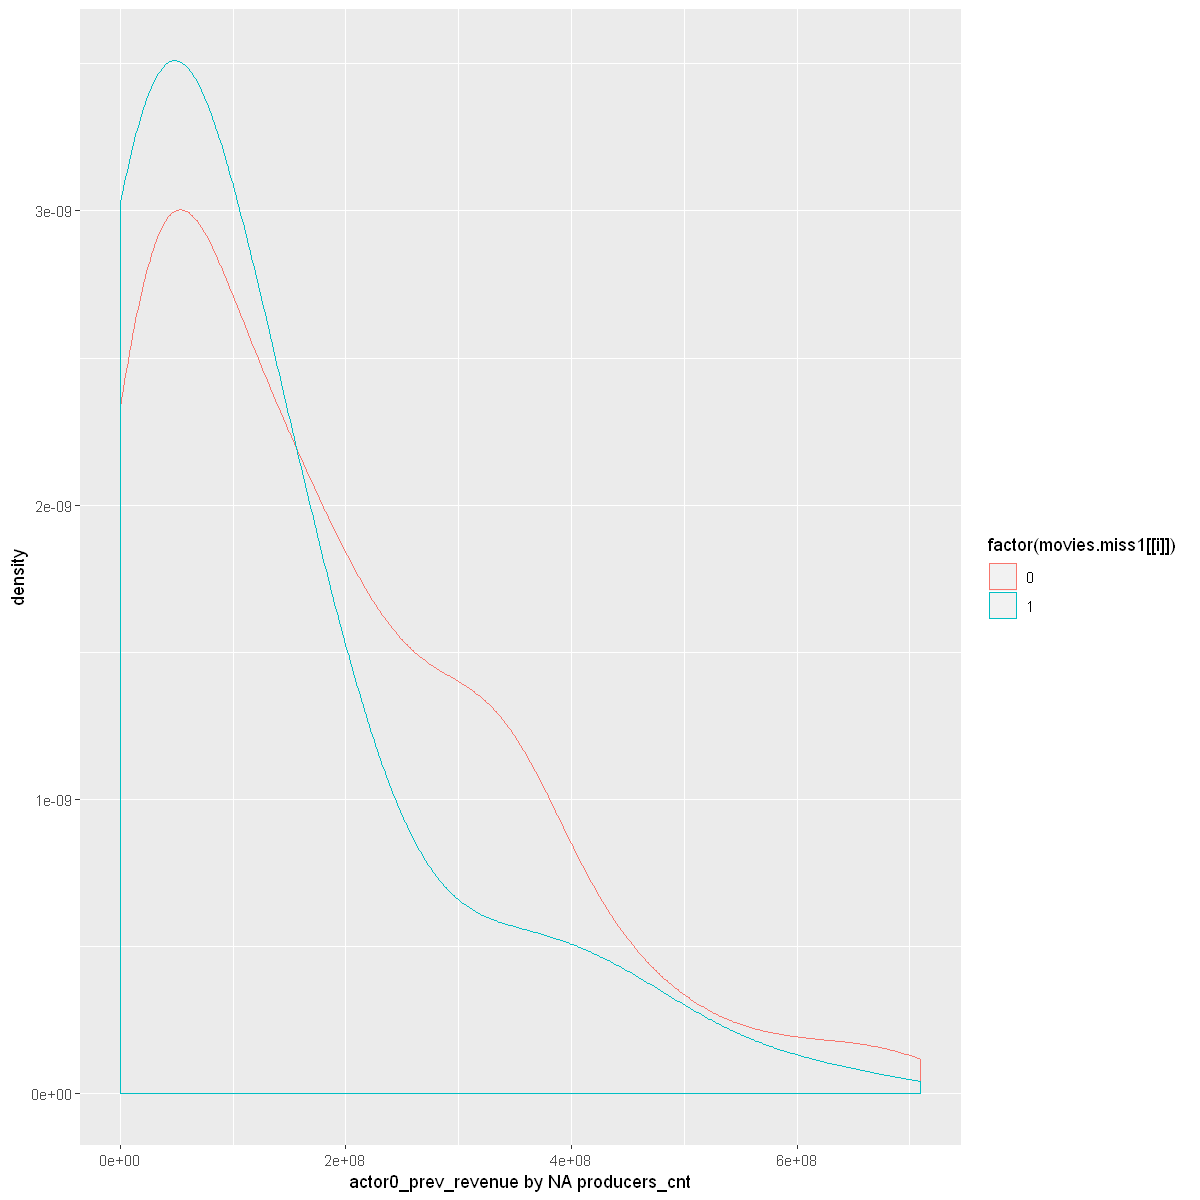


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.1249, df = 135.32, p-value = 1.006e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 32093279 72426222
sample estimates:
mean of x mean of y 
146862778  94603028 

[1] "actor1_prev_revenue by NA producers_cnt"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


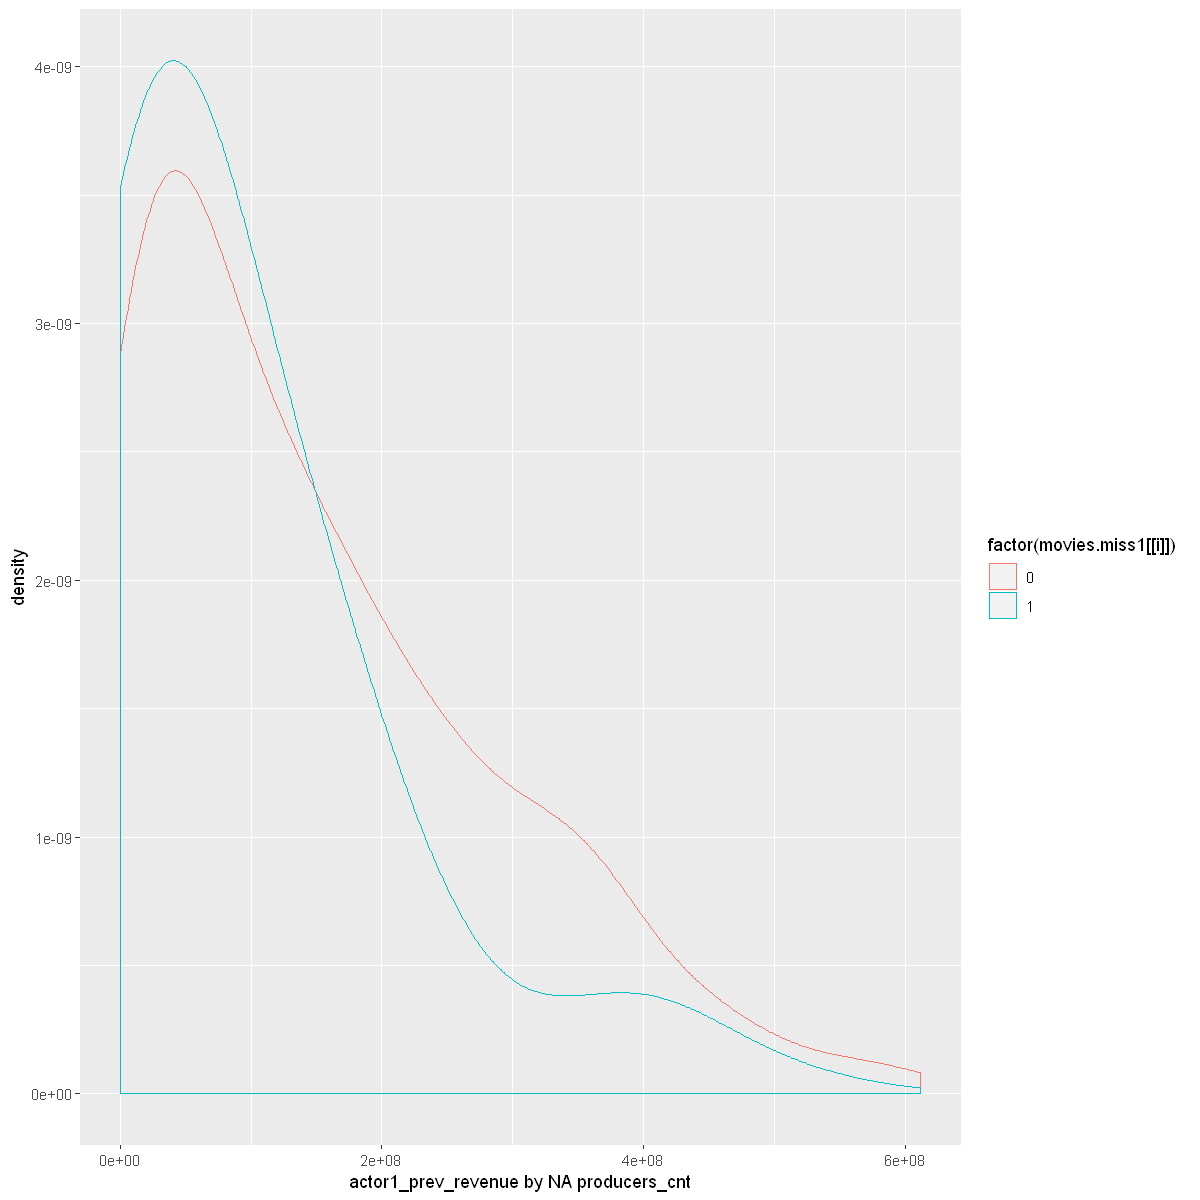


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 2.3922, df = 107.31, p-value = 0.01849
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5091635 54343484
sample estimates:
mean of x mean of y 
134647195 104929635 

[1] "actor2_prev_revenue by NA producers_cnt"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


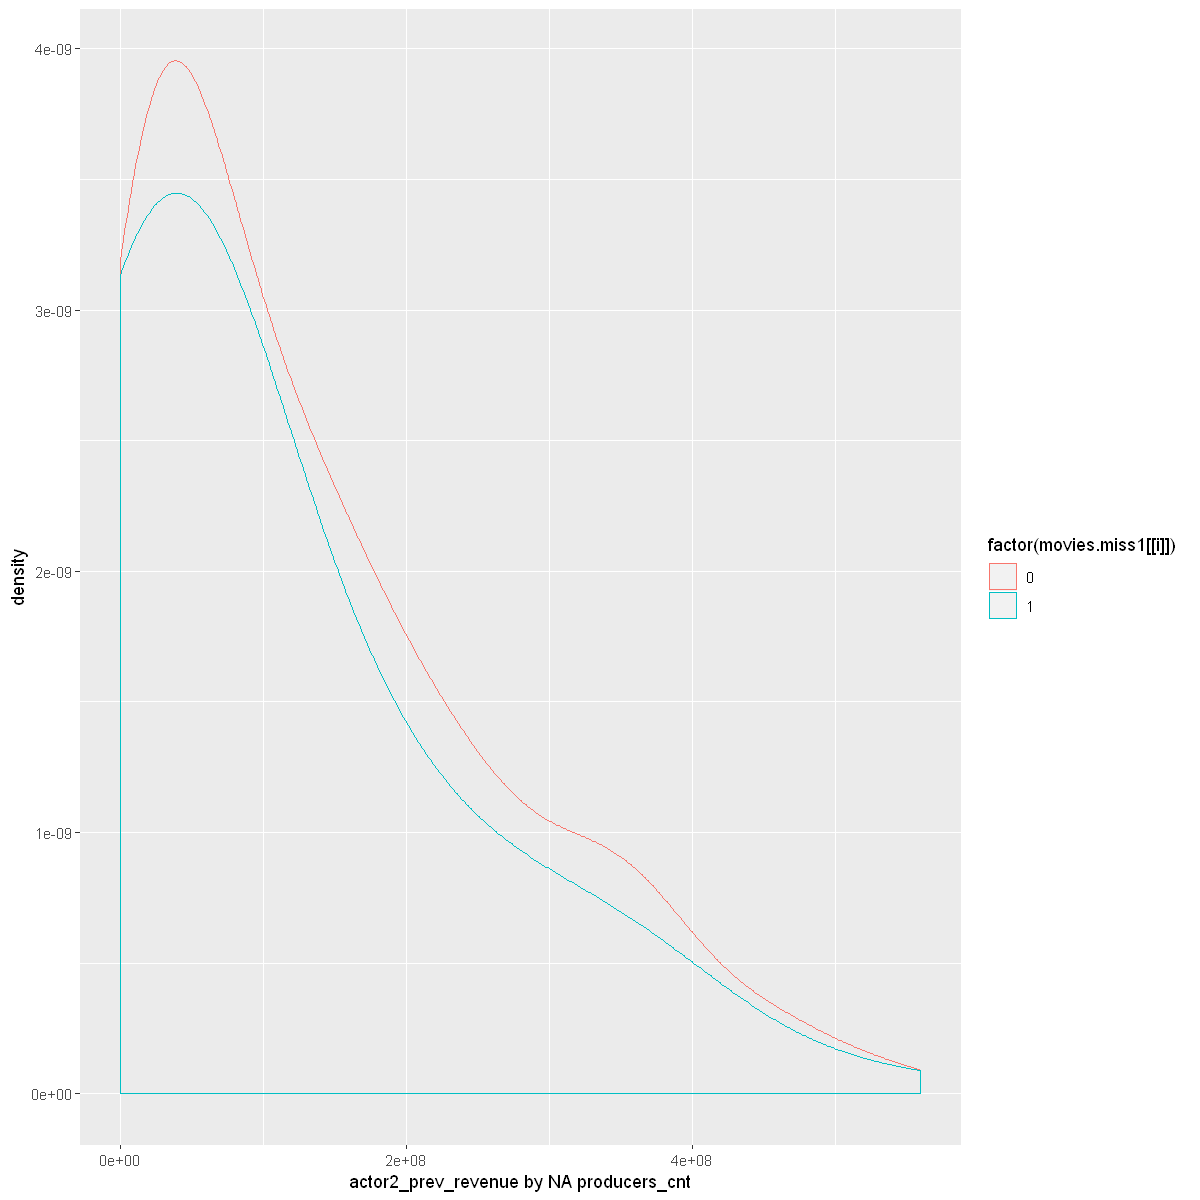


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 19.38, df = 587.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9138348 1.1199394
sample estimates:
mean of x mean of y 
 1.411289  0.394402 

[1] "director_movies_cnt by NA producers_cnt"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


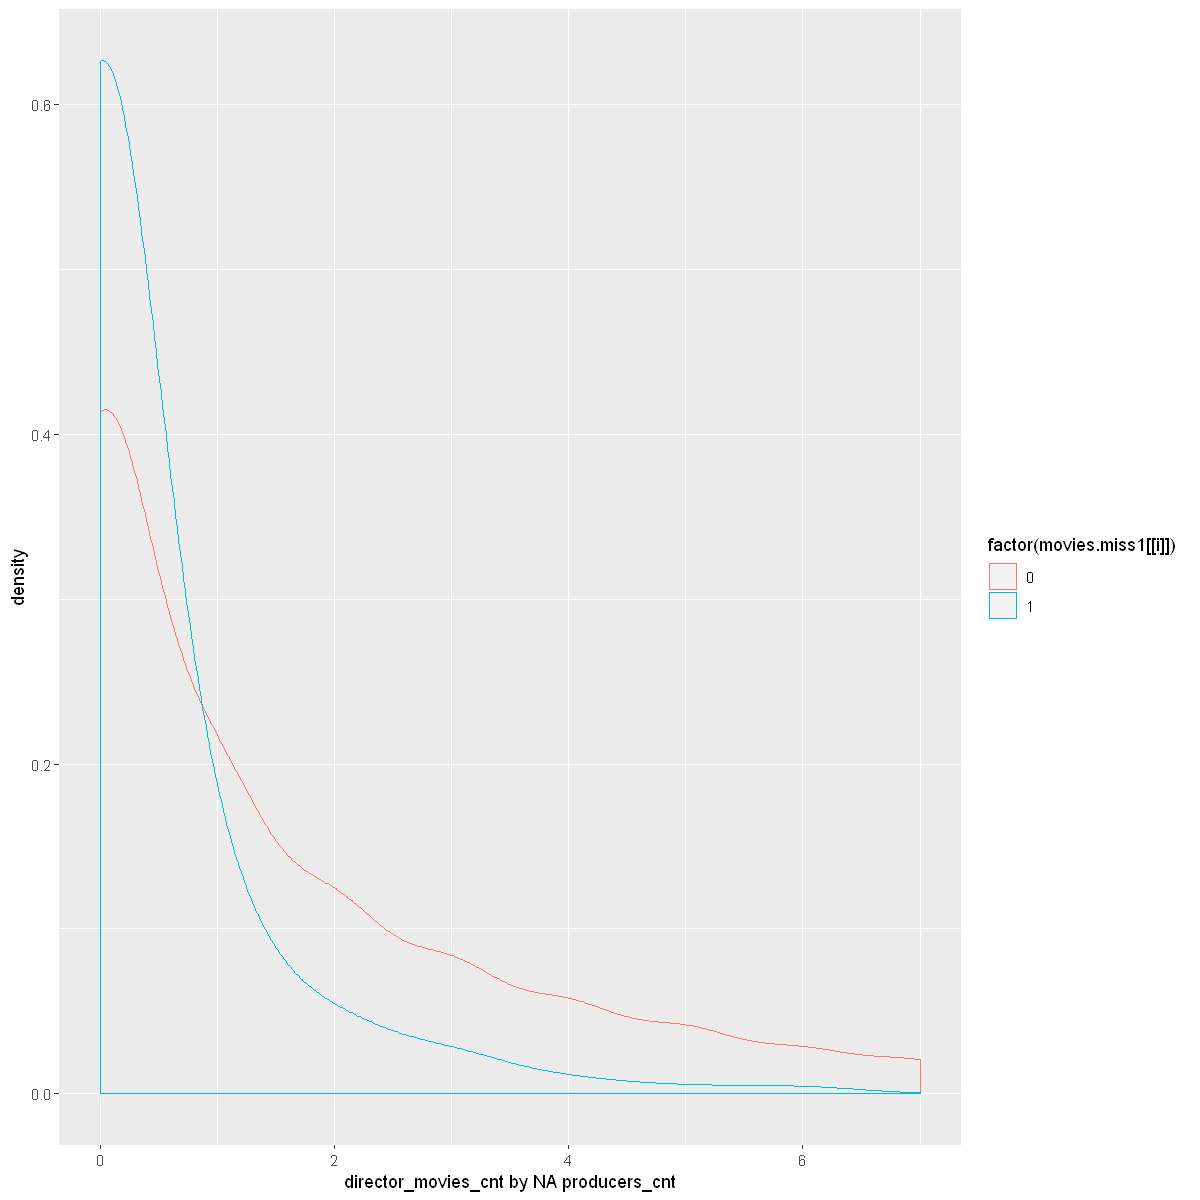


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 37.291, df = 864.82, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.448657 1.609623
sample estimates:
mean of x mean of y 
 1.697938  0.168798 

[1] "depart_Art by NA producers_cnt"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


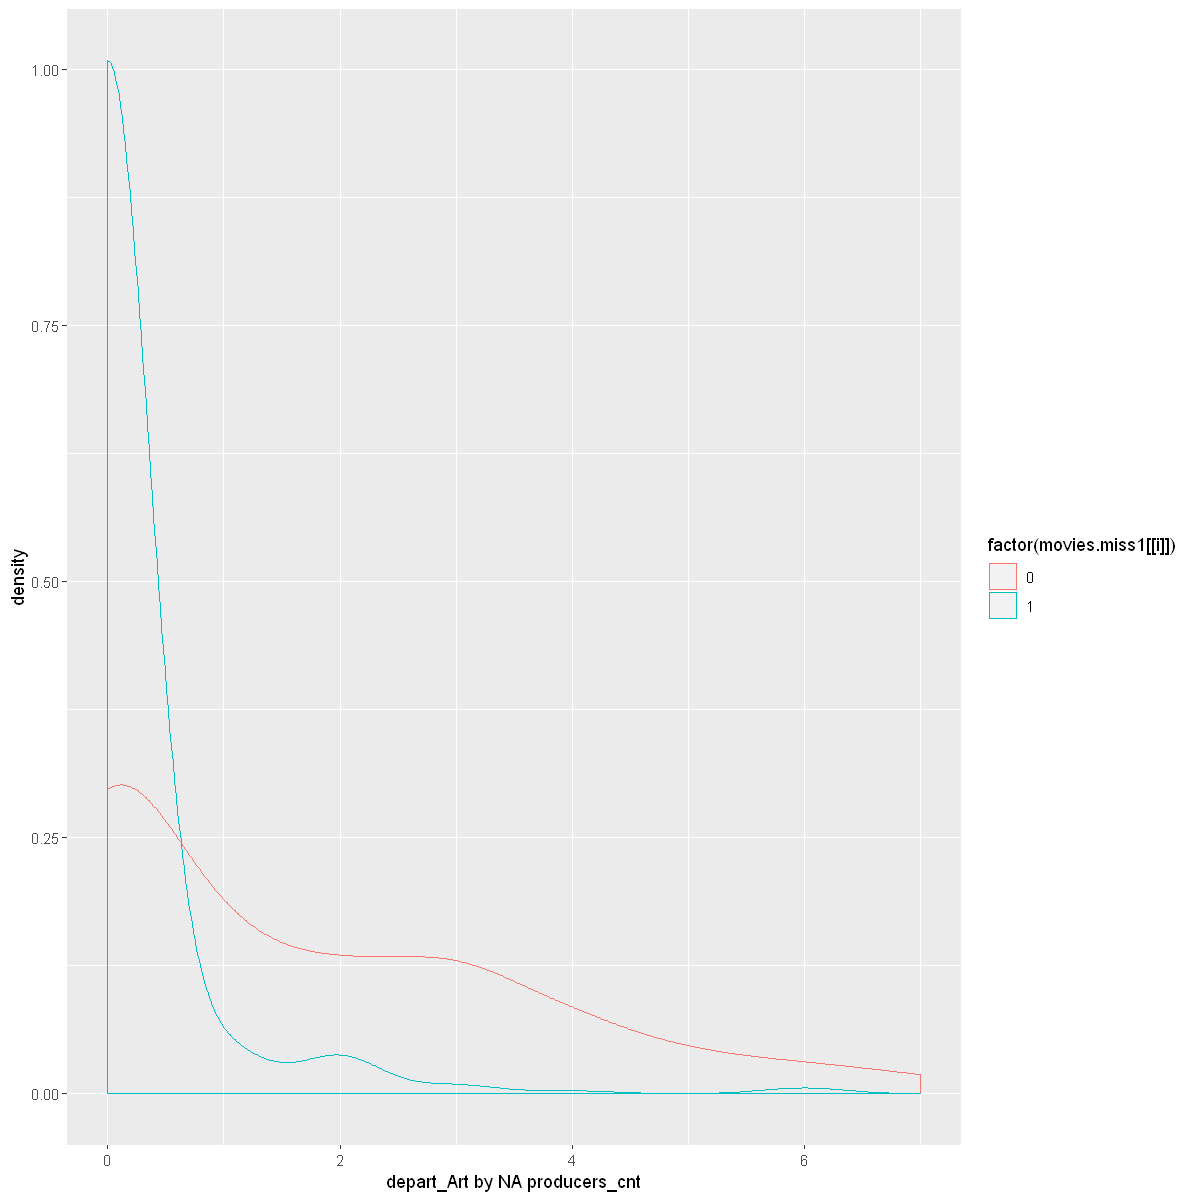


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 29.345, df = 642.38, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8552100 0.9778747
sample estimates:
mean of x mean of y 
1.1652603 0.2487179 

[1] "depart_Camera by NA producers_cnt"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


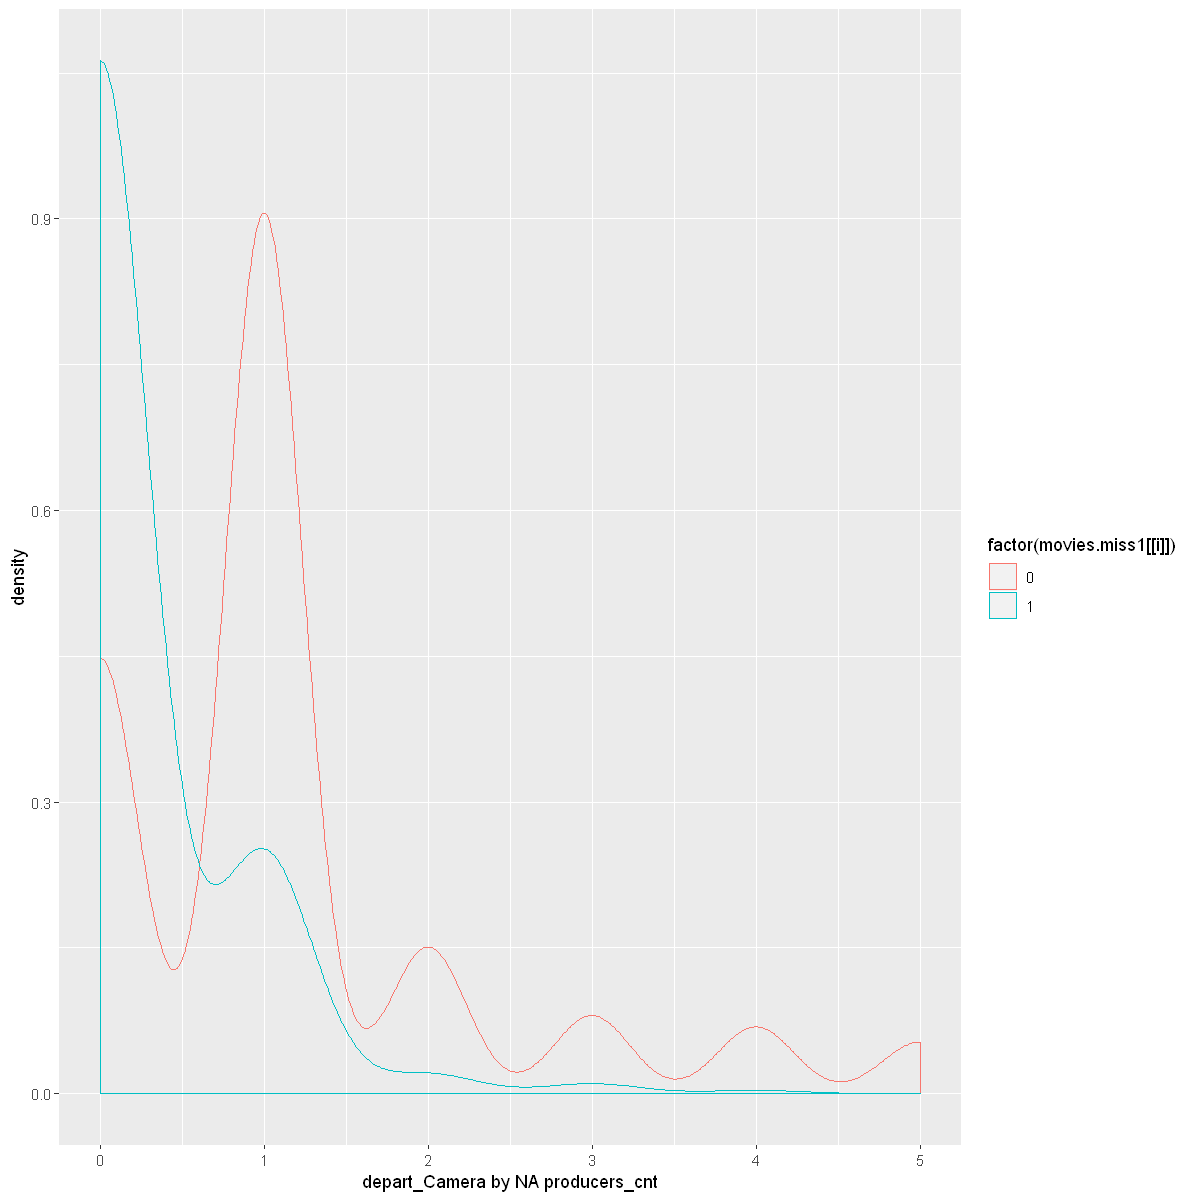


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 33.911, df = 1342.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7932371 0.8906479
sample estimates:
 mean of x  mean of y 
0.92912198 0.08717949 

[1] "depart_Custom_Mkup by NA producers_cnt"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


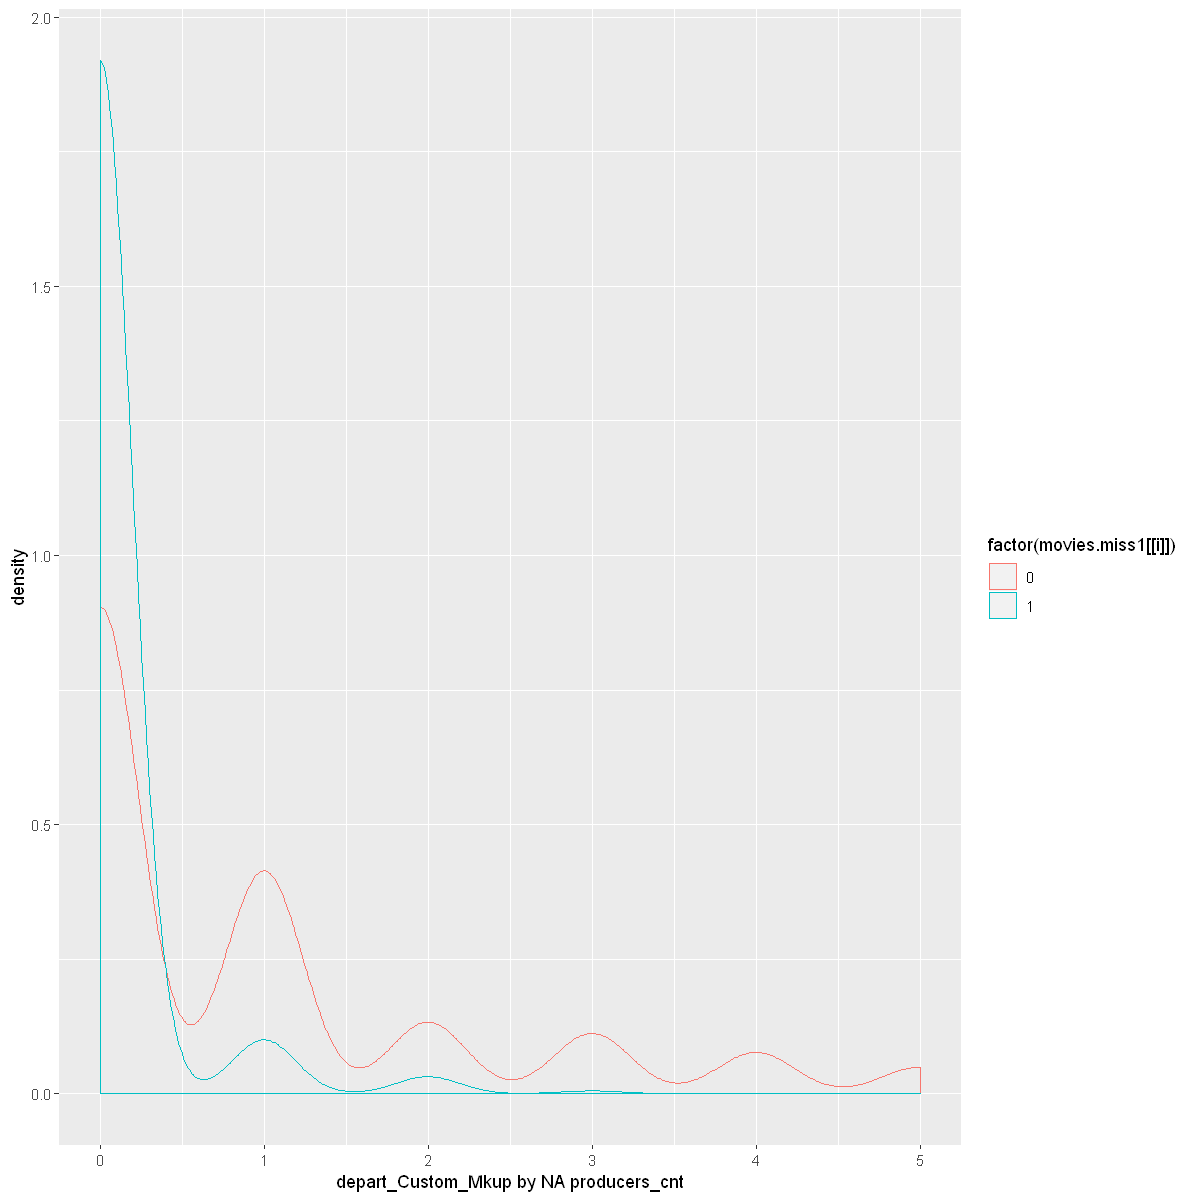


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 17.411, df = 594.86, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2860320 0.3587644
sample estimates:
mean of x mean of y 
 1.430646  1.108247 

[1] "depart_Directing by NA producers_cnt"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


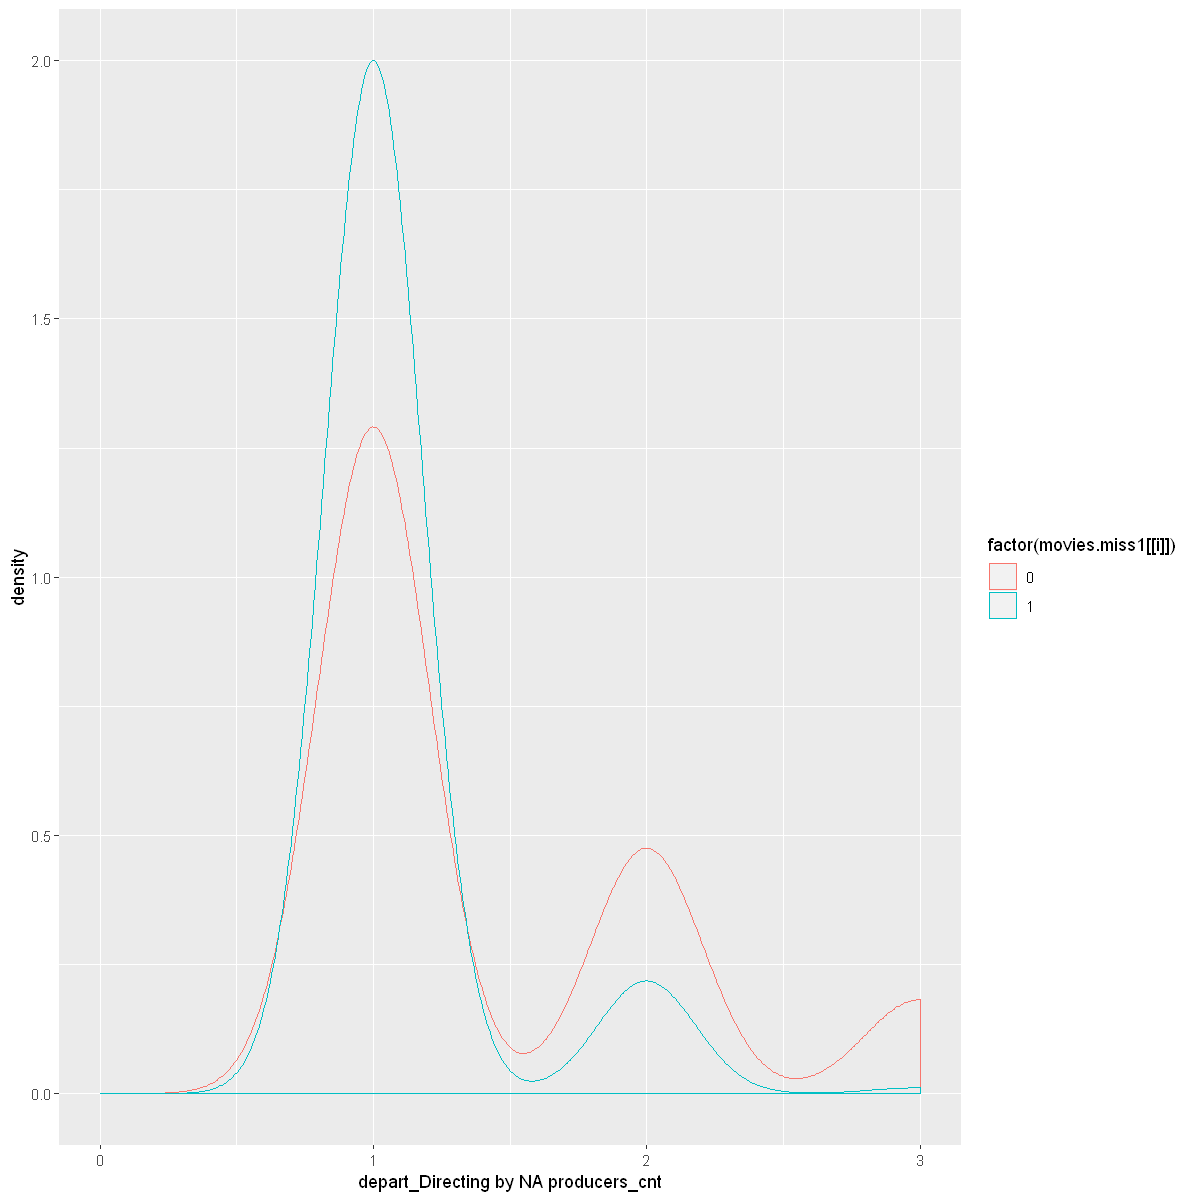


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 26.32, df = 649.45, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9242284 1.0732533
sample estimates:
mean of x mean of y 
1.3269062 0.3281654 

[1] "depart_Sound by NA producers_cnt"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


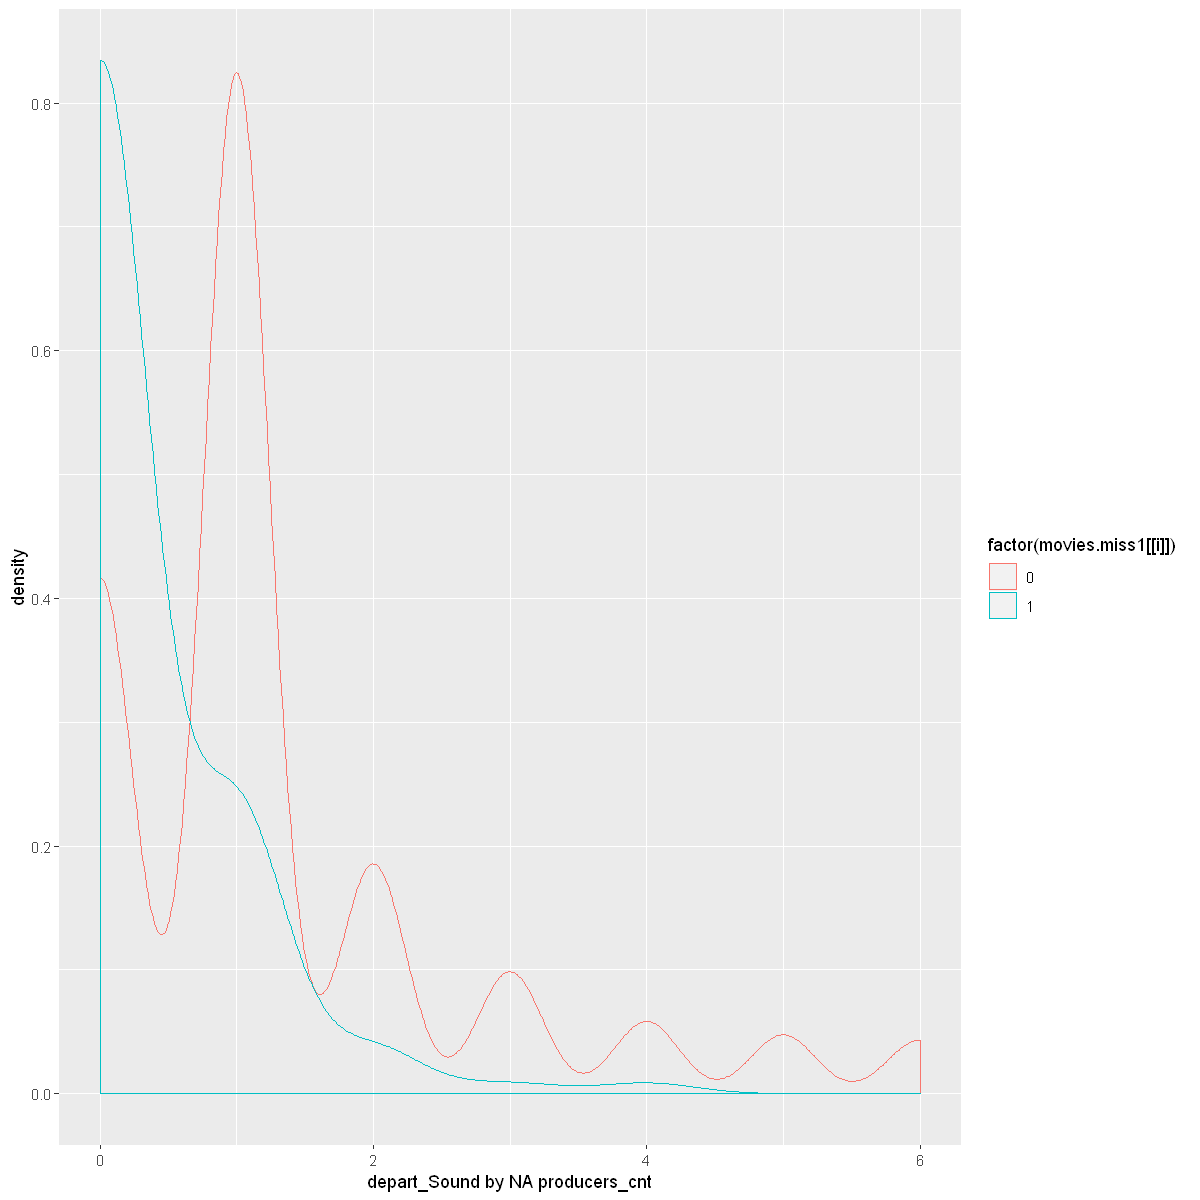


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 24.206, df = 2936, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 61040129 71800603
sample estimates:
mean of x mean of y 
 70185905   3765539 

[1] "revenue by NA producers_cnt"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


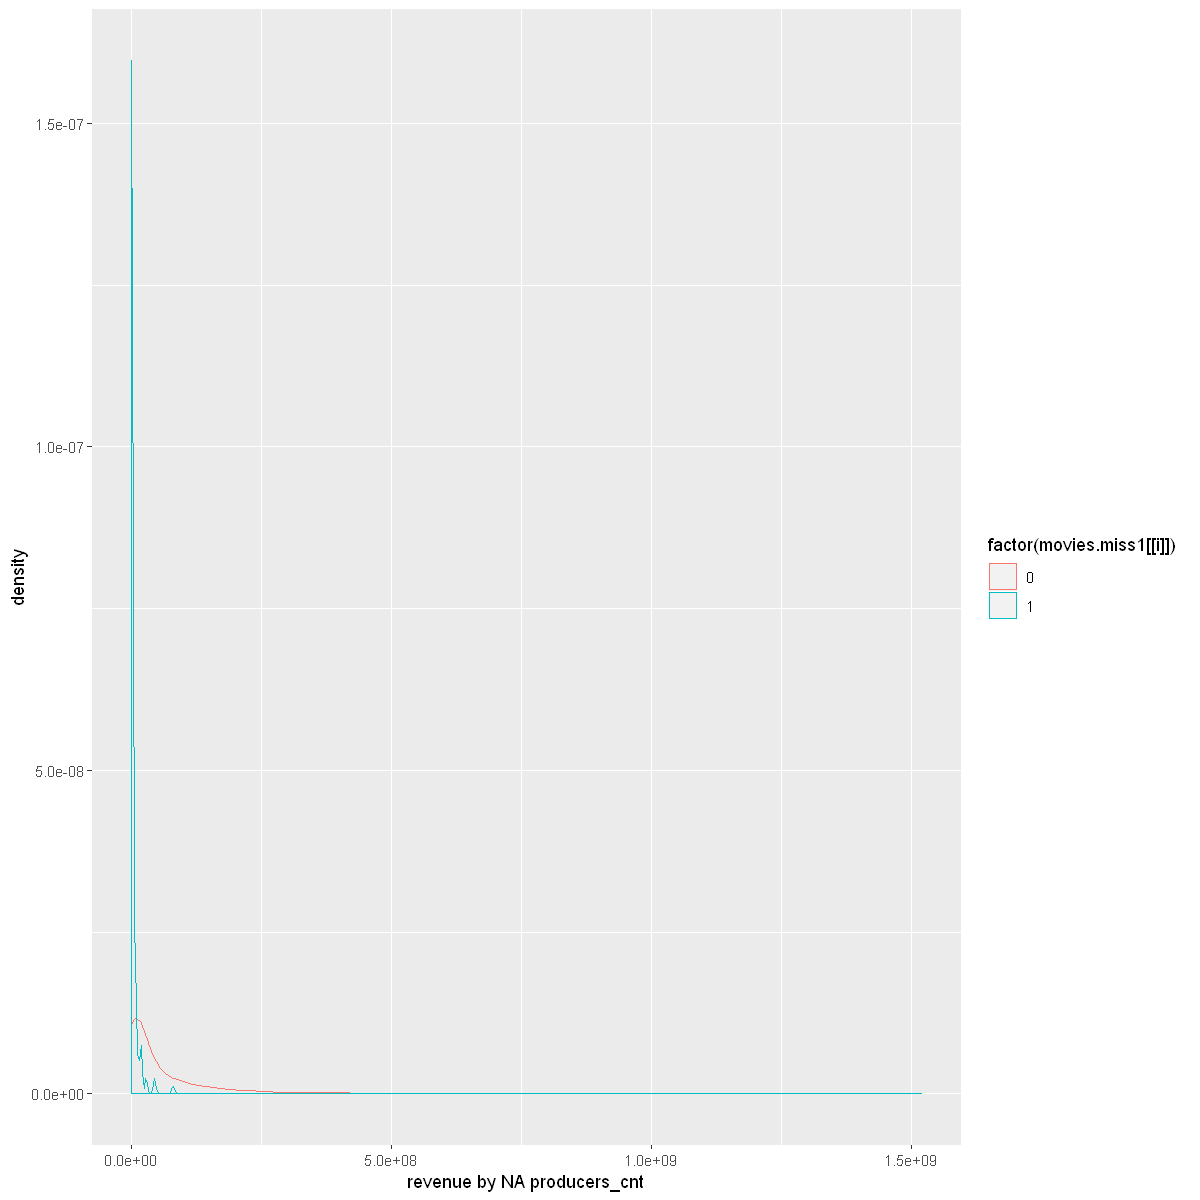


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.7182, df = 333.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14045694  -8874189
sample estimates:
mean of x mean of y 
 21455546  32915488 

[1] "budget by NA actor1_movies_cnt"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


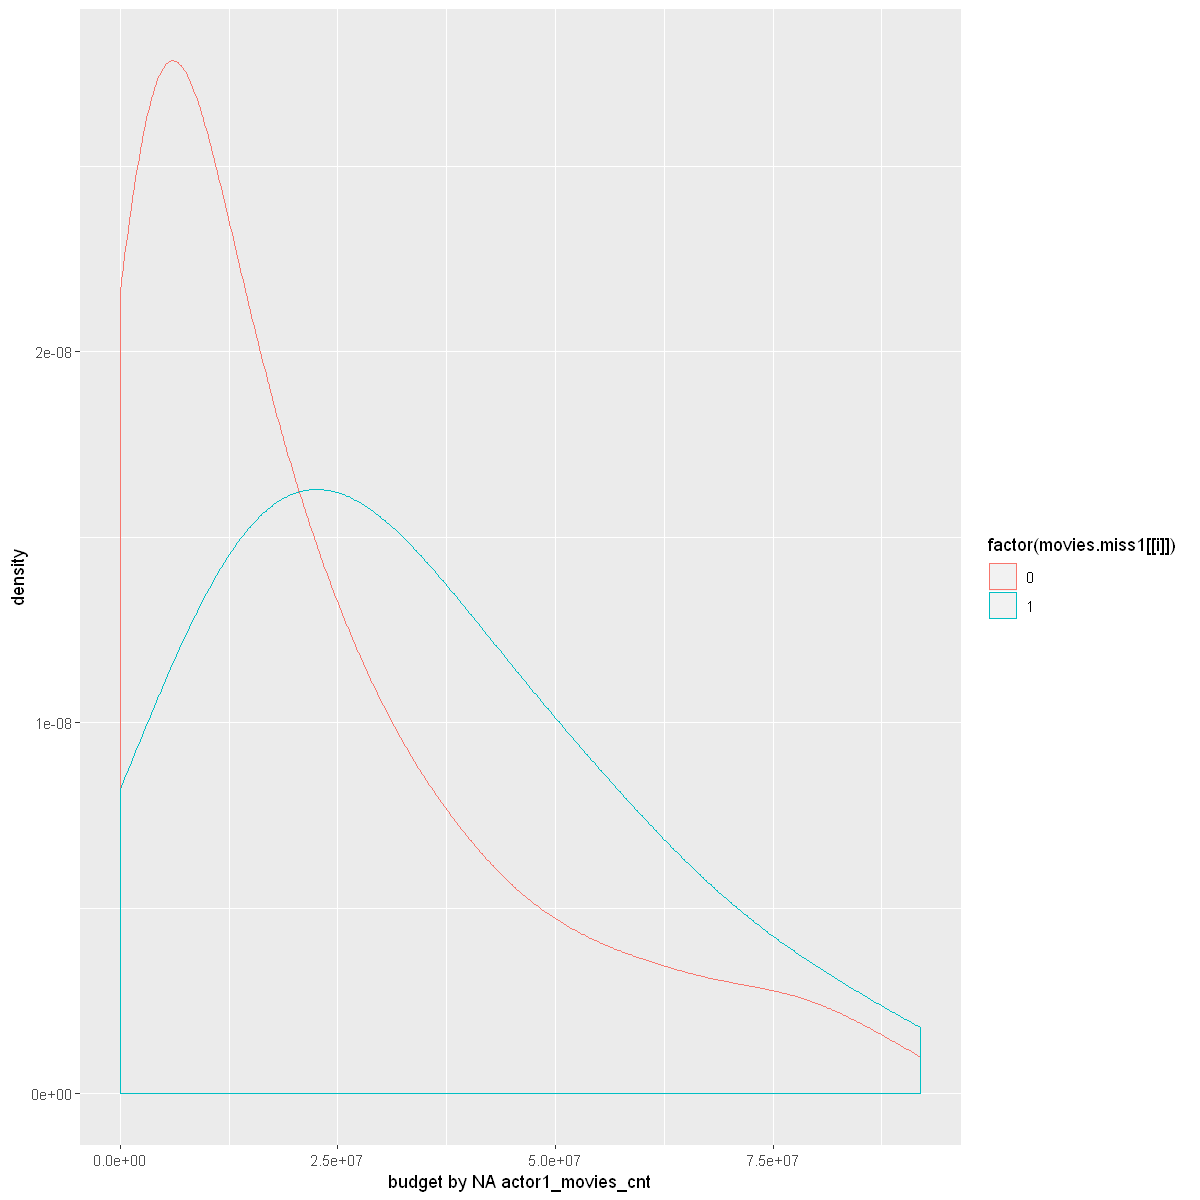


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.6471, df = 453.52, p-value = 1.24e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1091058 -0.6555986
sample estimates:
mean of x mean of y 
 2.856034  3.738386 

[1] "producers_cnt by NA actor1_movies_cnt"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


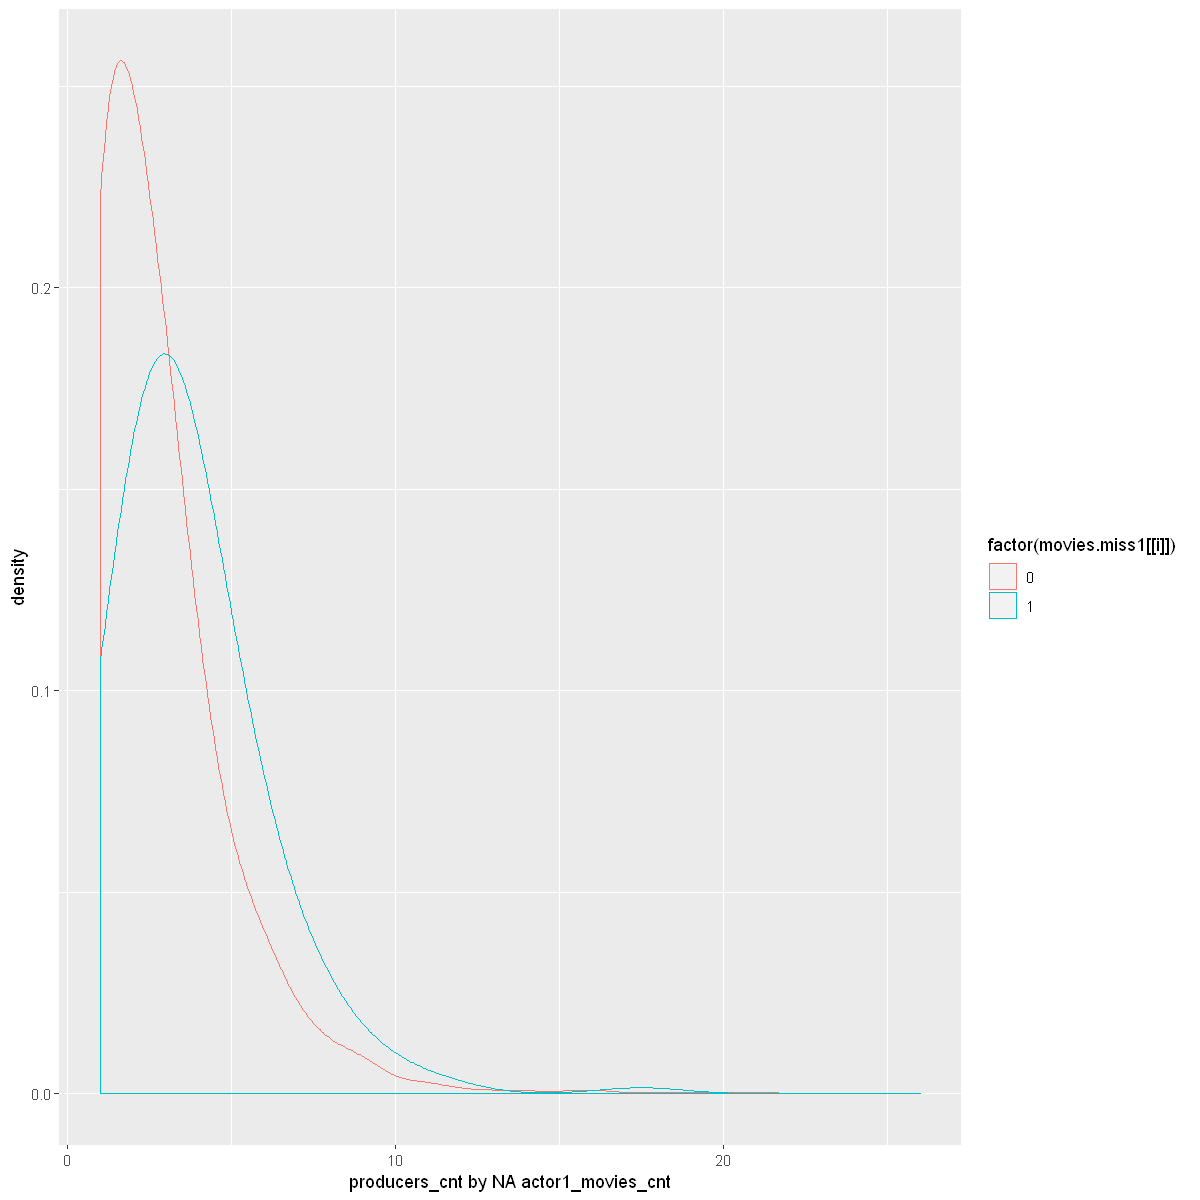


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -12.936, df = 307.31, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.392719 -3.232818
sample estimates:
mean of x mean of y 
 3.128611  6.941379 

[1] "actor2_movies_cnt by NA actor1_movies_cnt"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


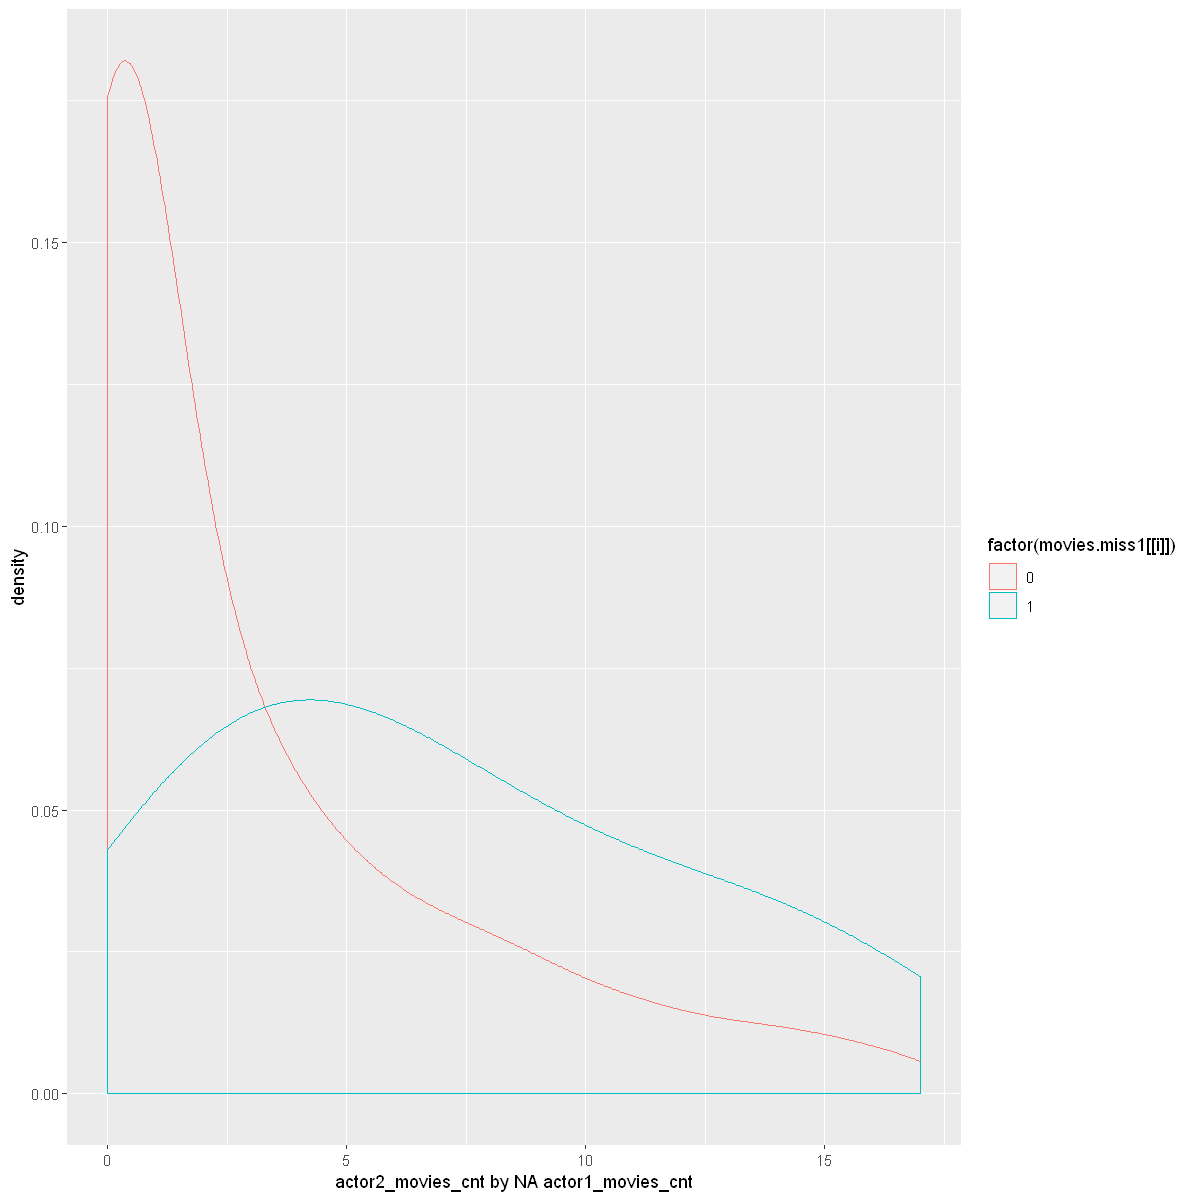


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.191, df = 359.22, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -118978592  -80488316
sample estimates:
mean of x mean of y 
167650298 267383752 

[1] "actor0_prev_revenue by NA actor1_movies_cnt"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


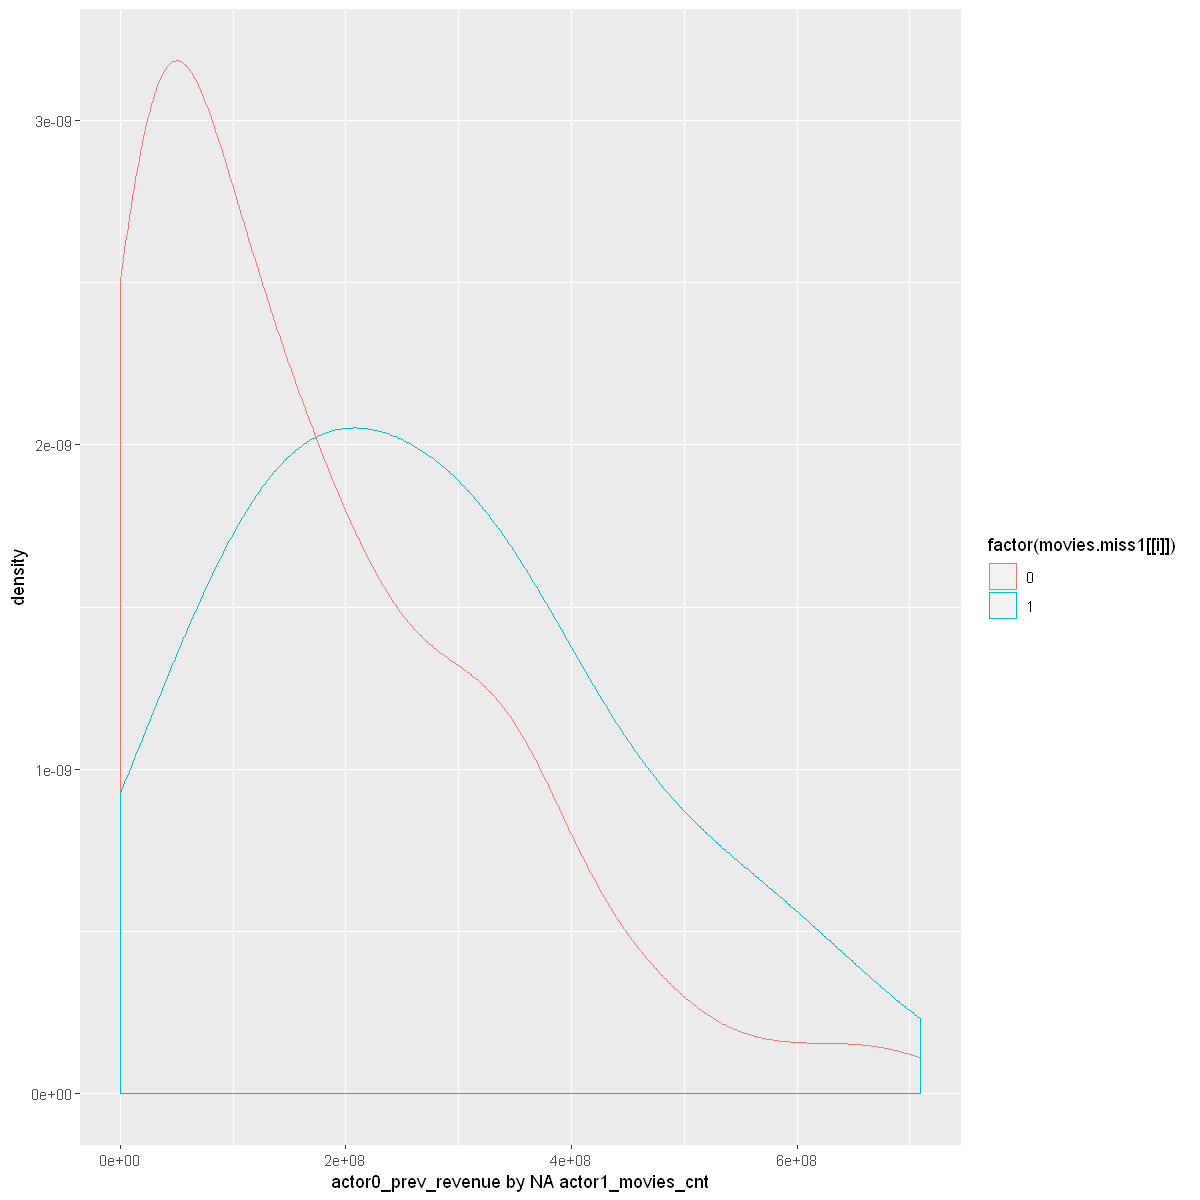


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -22.293, df = 388.01, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -162216265 -135922408
sample estimates:
mean of x mean of y 
133092029 282161366 

[1] "actor1_prev_revenue by NA actor1_movies_cnt"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


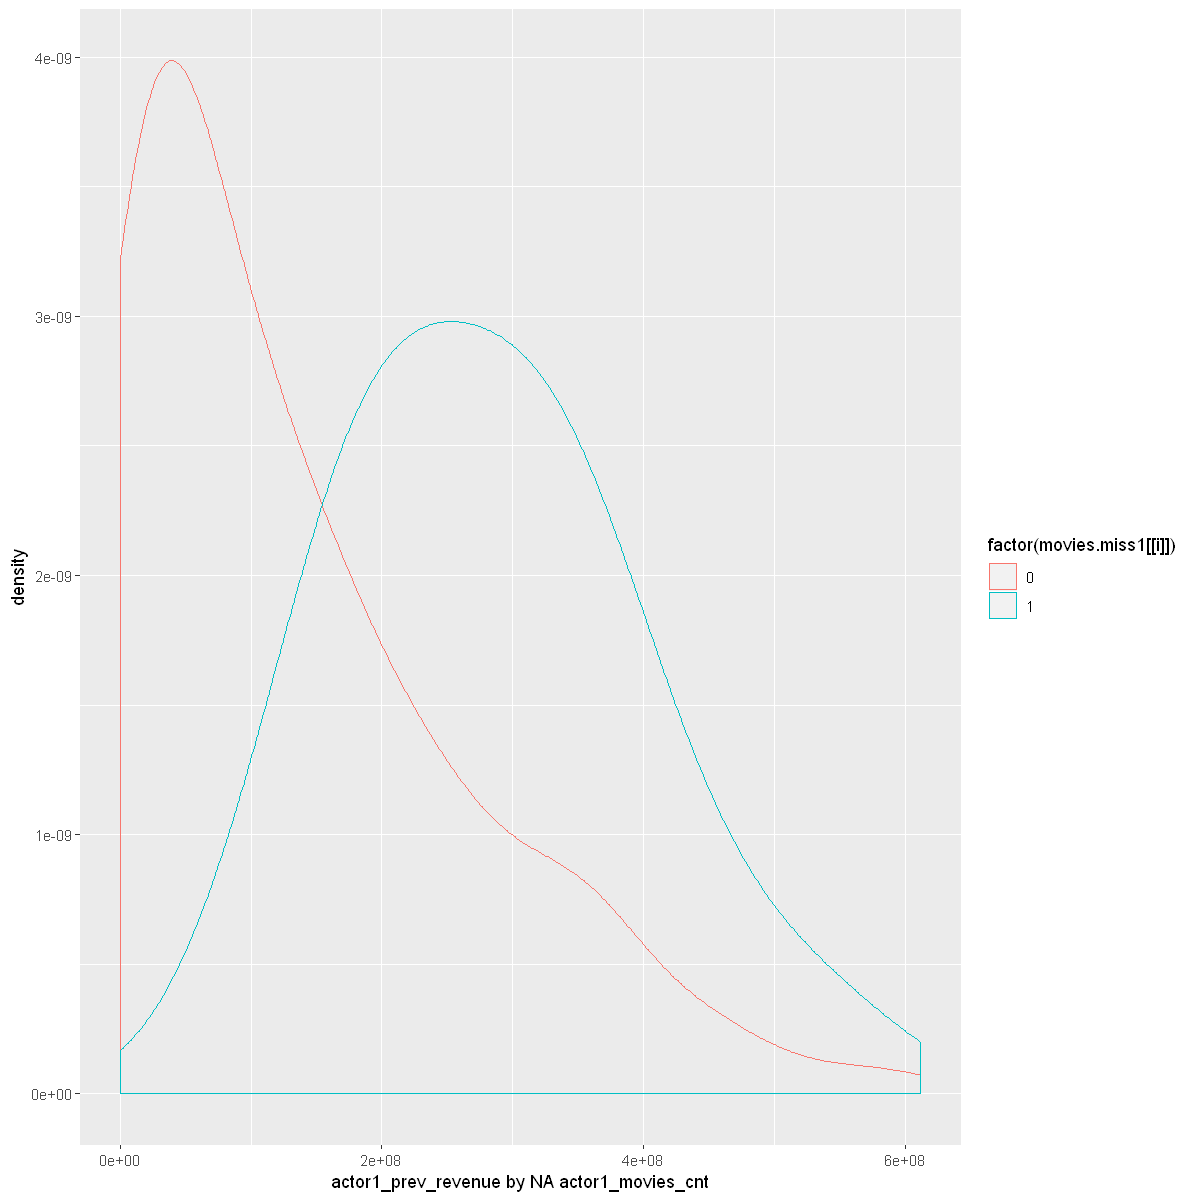


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.3304, df = 349.8, p-value = 1.853e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -84581343 -52271013
sample estimates:
mean of x mean of y 
128065381 196491558 

[1] "actor2_prev_revenue by NA actor1_movies_cnt"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


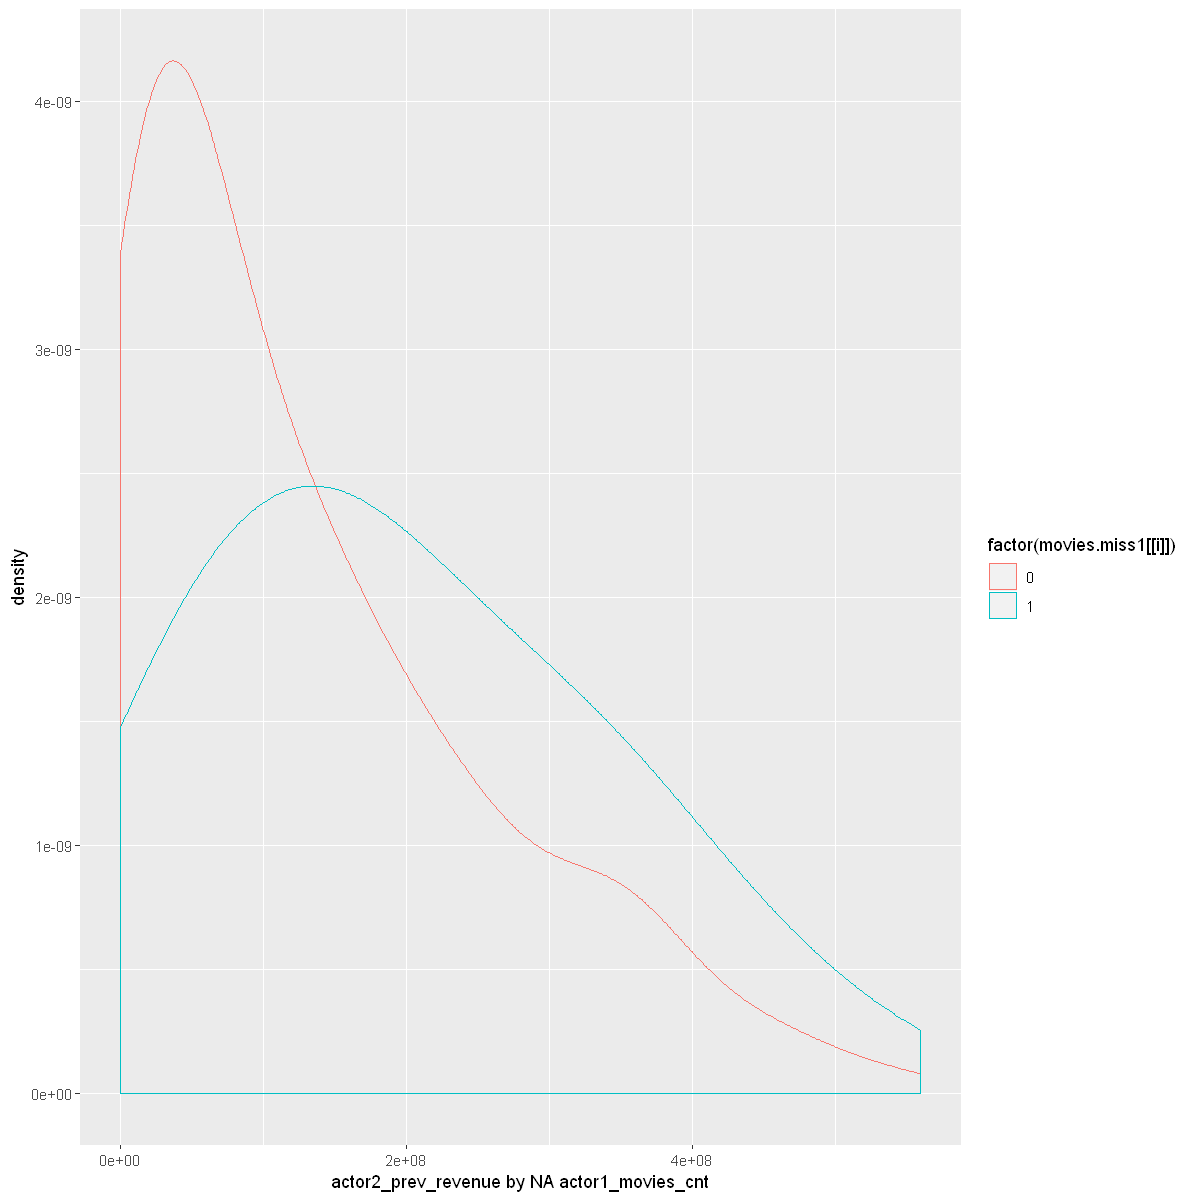


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.3246, df = 386.89, p-value = 1.405e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0248540 -0.5910903
sample estimates:
mean of x mean of y 
 1.312140  2.120112 

[1] "director_movies_cnt by NA actor1_movies_cnt"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


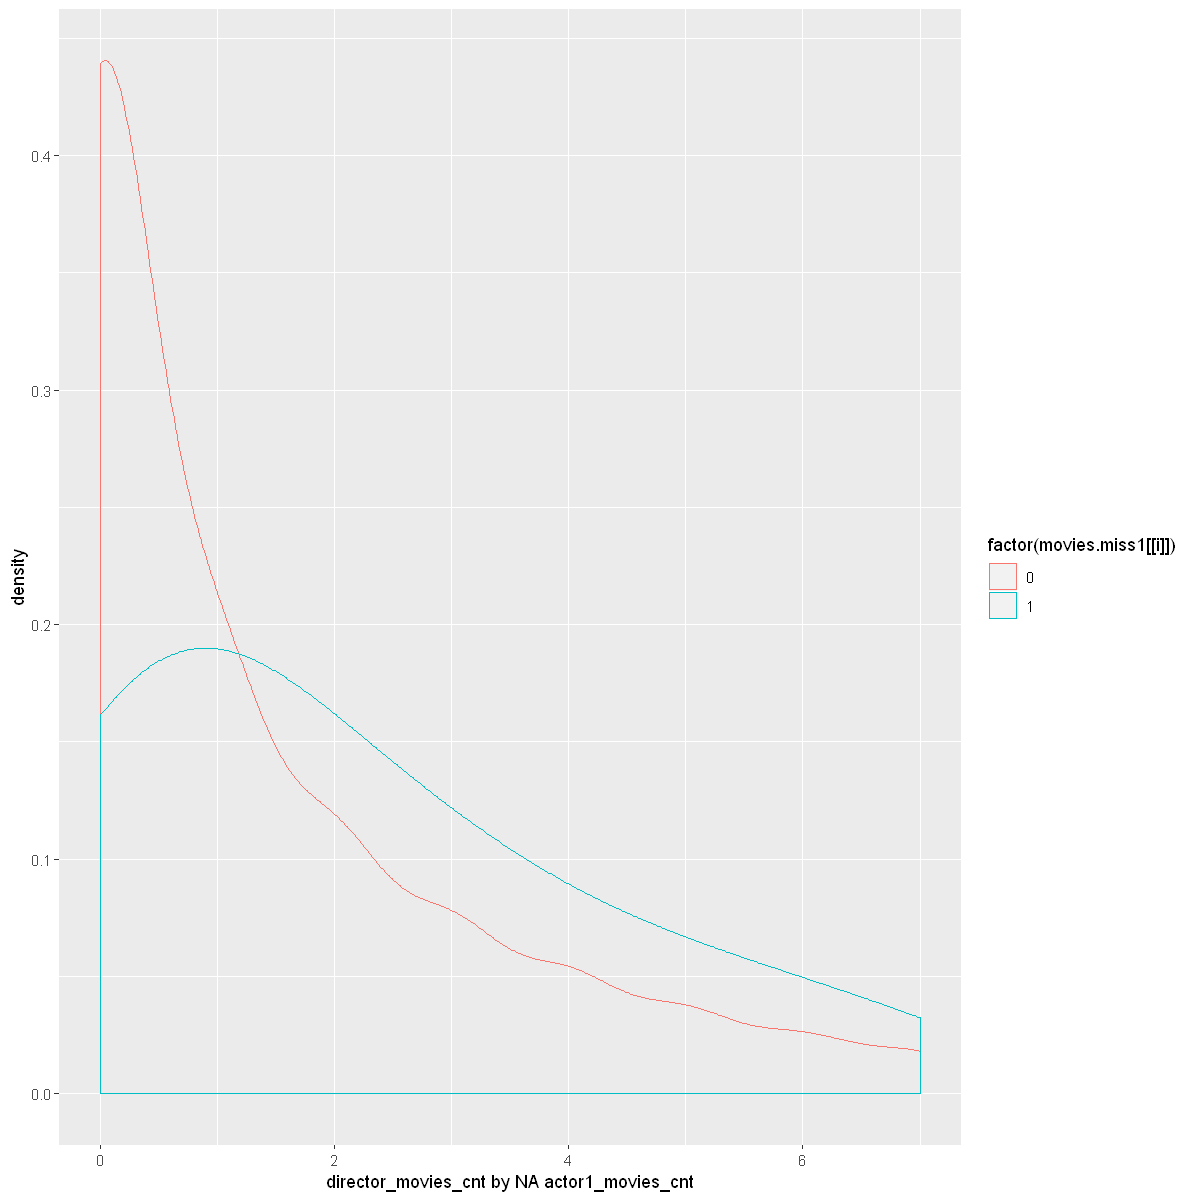


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.3343, df = 368.75, p-value = 1.428e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.134566 -0.654811
sample estimates:
mean of x mean of y 
 1.561707  2.456395 

[1] "depart_Art by NA actor1_movies_cnt"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


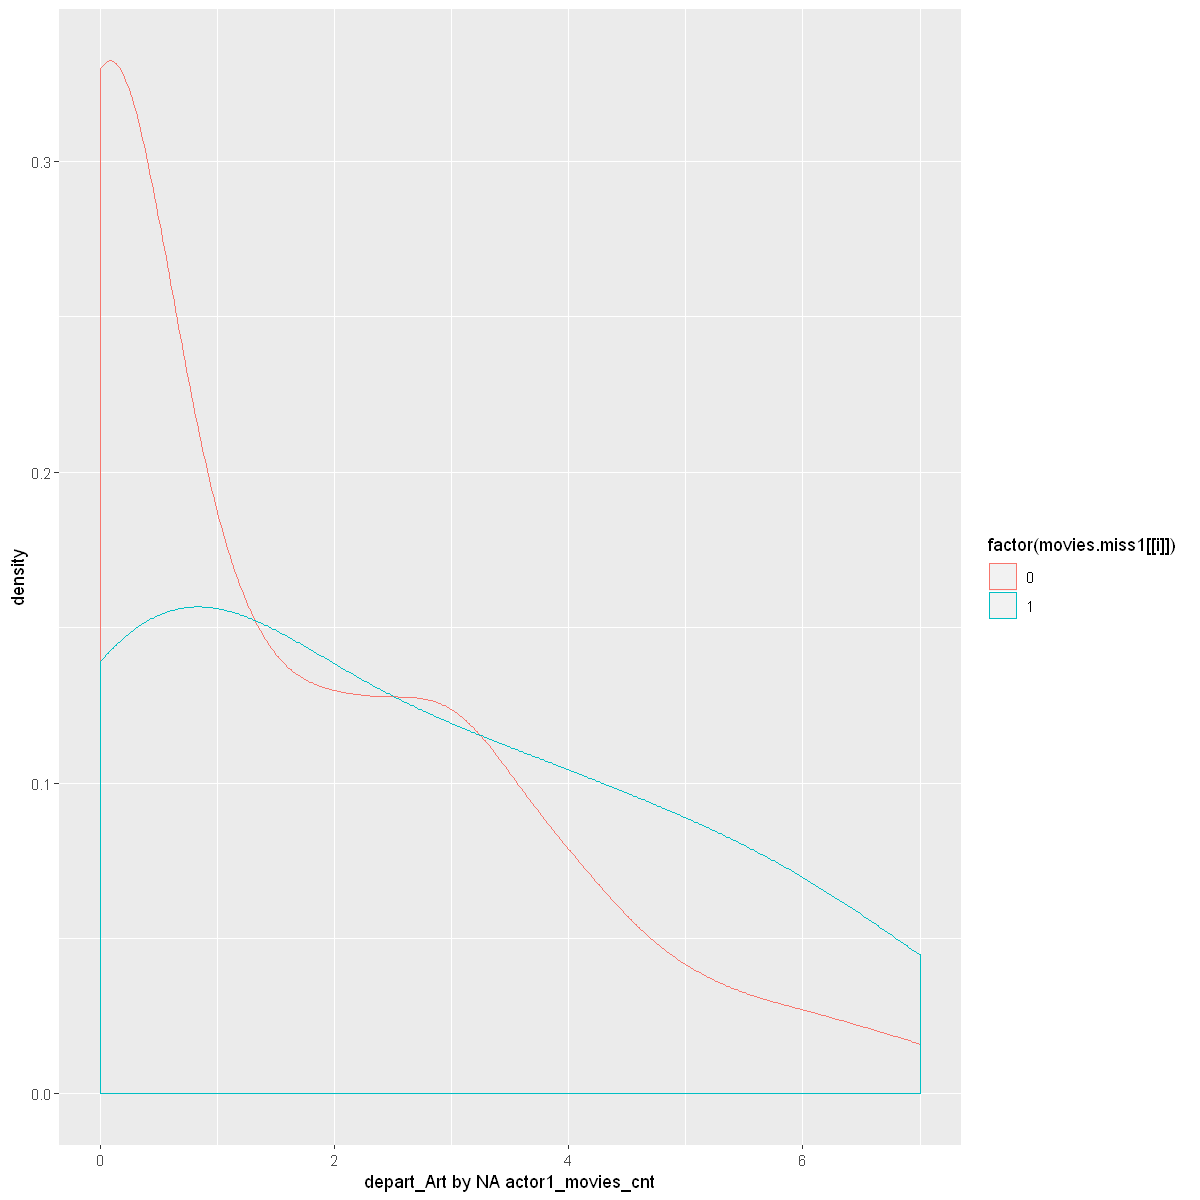


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3.1154, df = 372.27, p-value = 0.001979
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.36788531 -0.08318265
sample estimates:
mean of x mean of y 
 1.100047  1.325581 

[1] "depart_Camera by NA actor1_movies_cnt"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


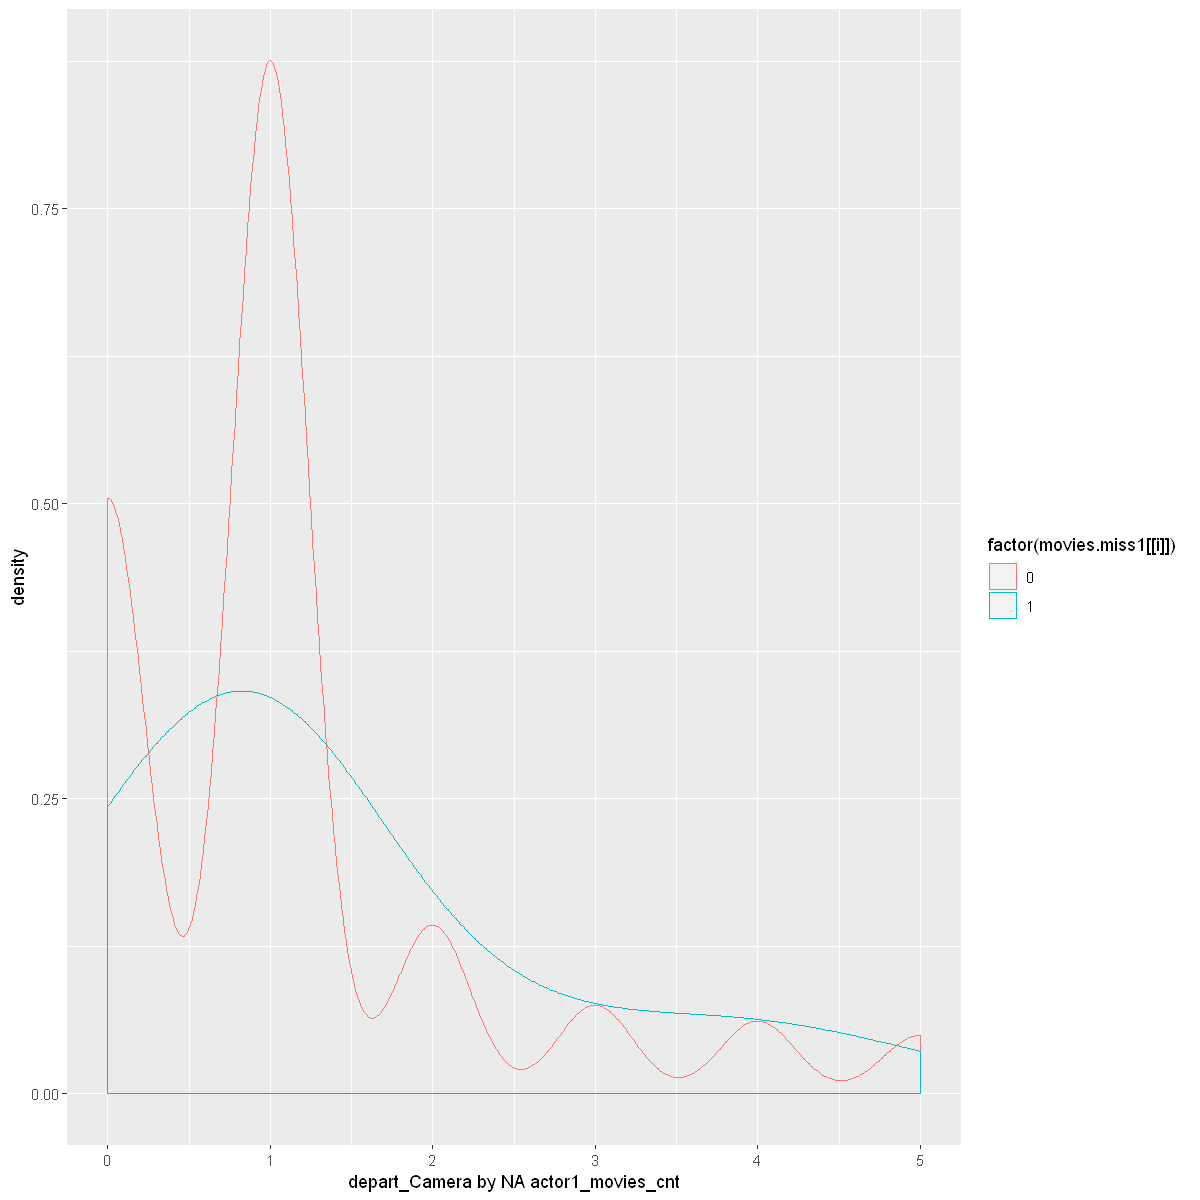


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3.5696, df = 324.28, p-value = 0.0004116
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4699612 -0.1359976
sample estimates:
mean of x mean of y 
0.8631336 1.1661130 

[1] "depart_Custom_Mkup by NA actor1_movies_cnt"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


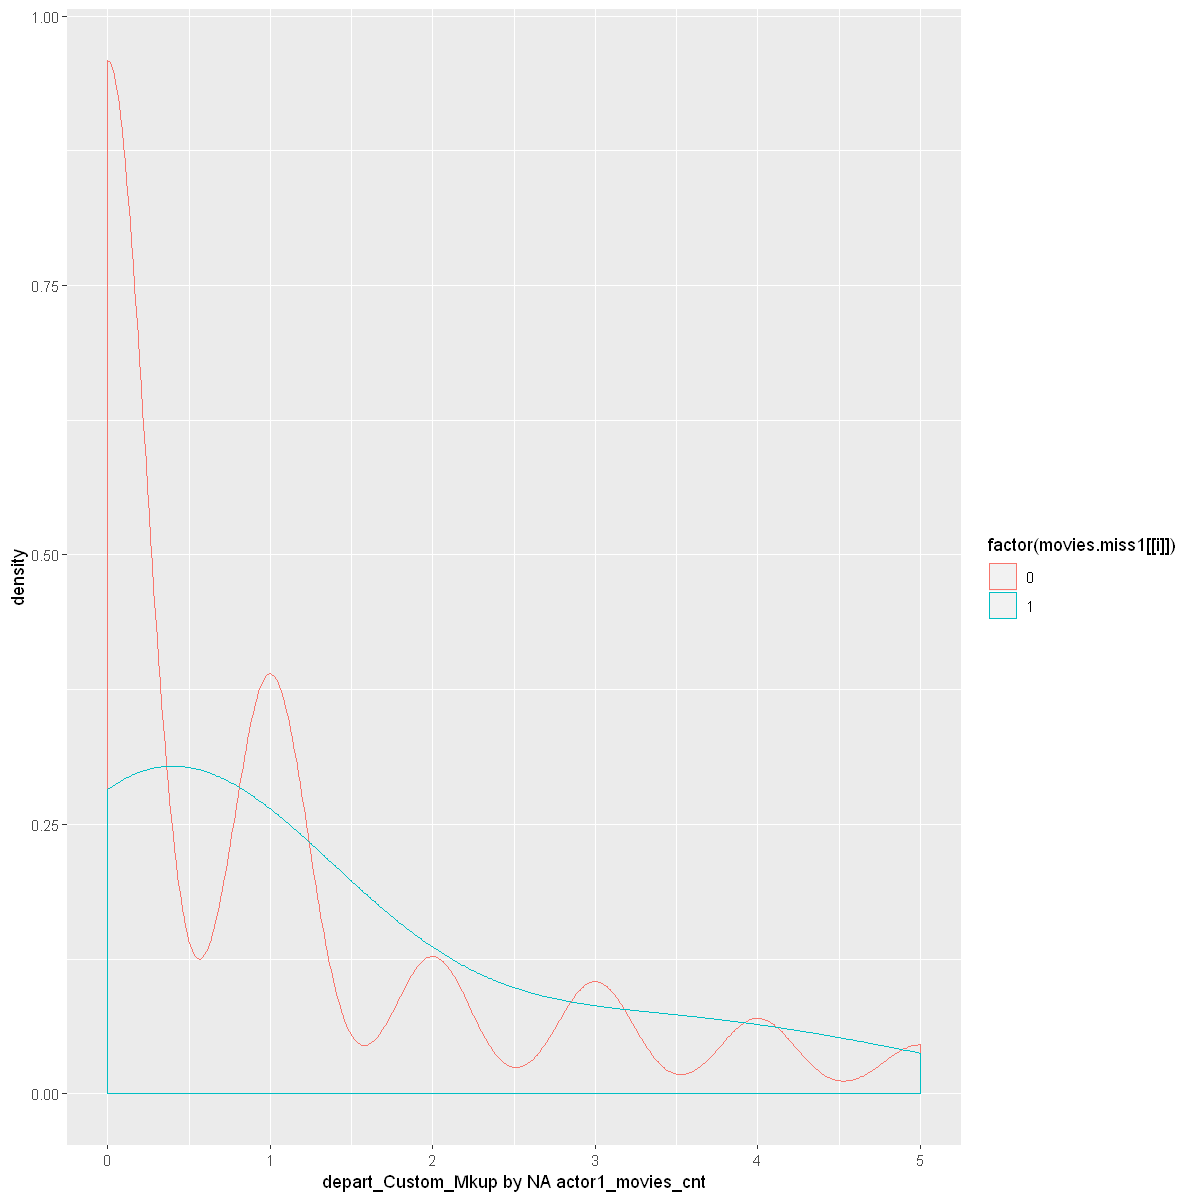


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.0505, df = 418.23, p-value = 3.209e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2991679 -0.1524496
sample estimates:
mean of x mean of y 
 1.399846  1.625654 

[1] "depart_Directing by NA actor1_movies_cnt"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


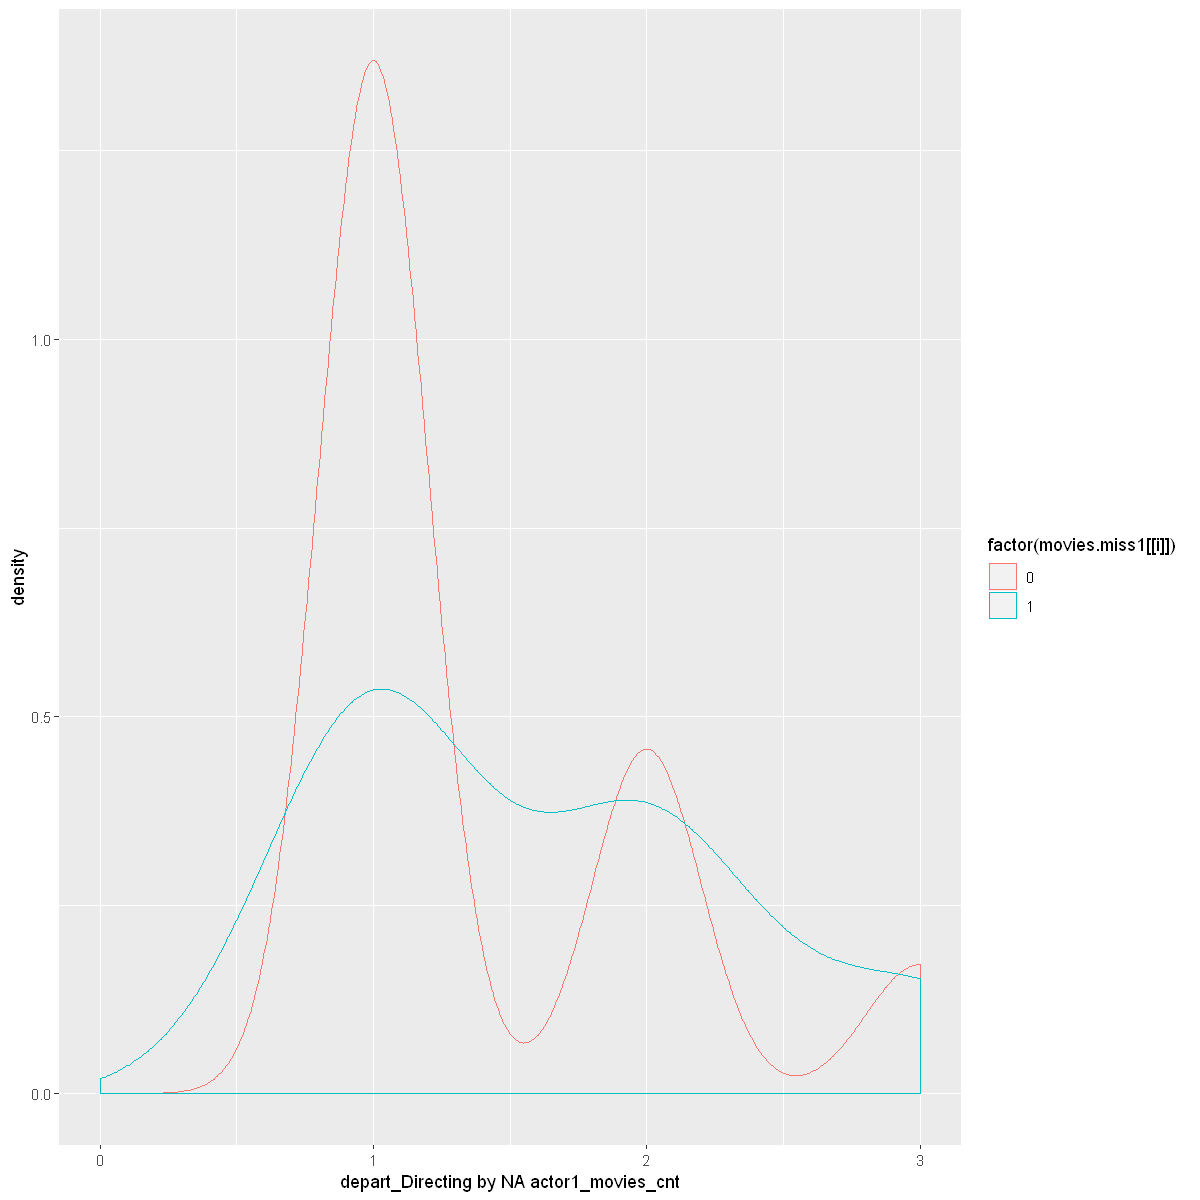


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.7915, df = 322.58, p-value = 0.07415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.31601034  0.01478499
sample estimates:
mean of x mean of y 
 1.256167  1.406780 

[1] "depart_Sound by NA actor1_movies_cnt"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


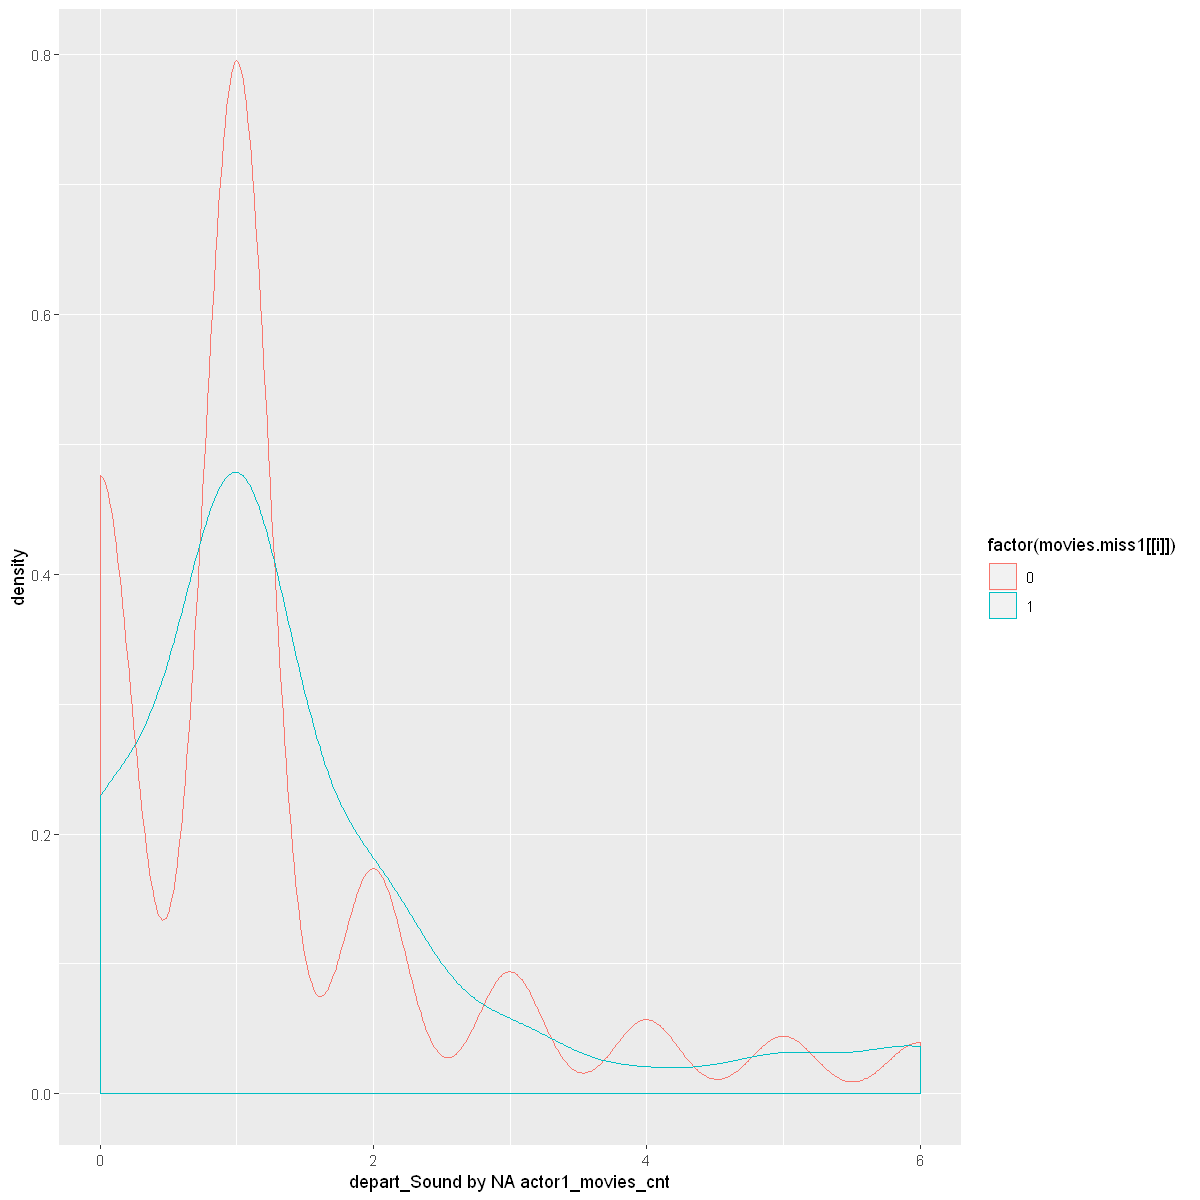


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3.7201, df = 200.13, p-value = 0.0002586
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -81119570 -24914746
sample estimates:
mean of x mean of y 
 63531419 116548577 

[1] "revenue by NA actor1_movies_cnt"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


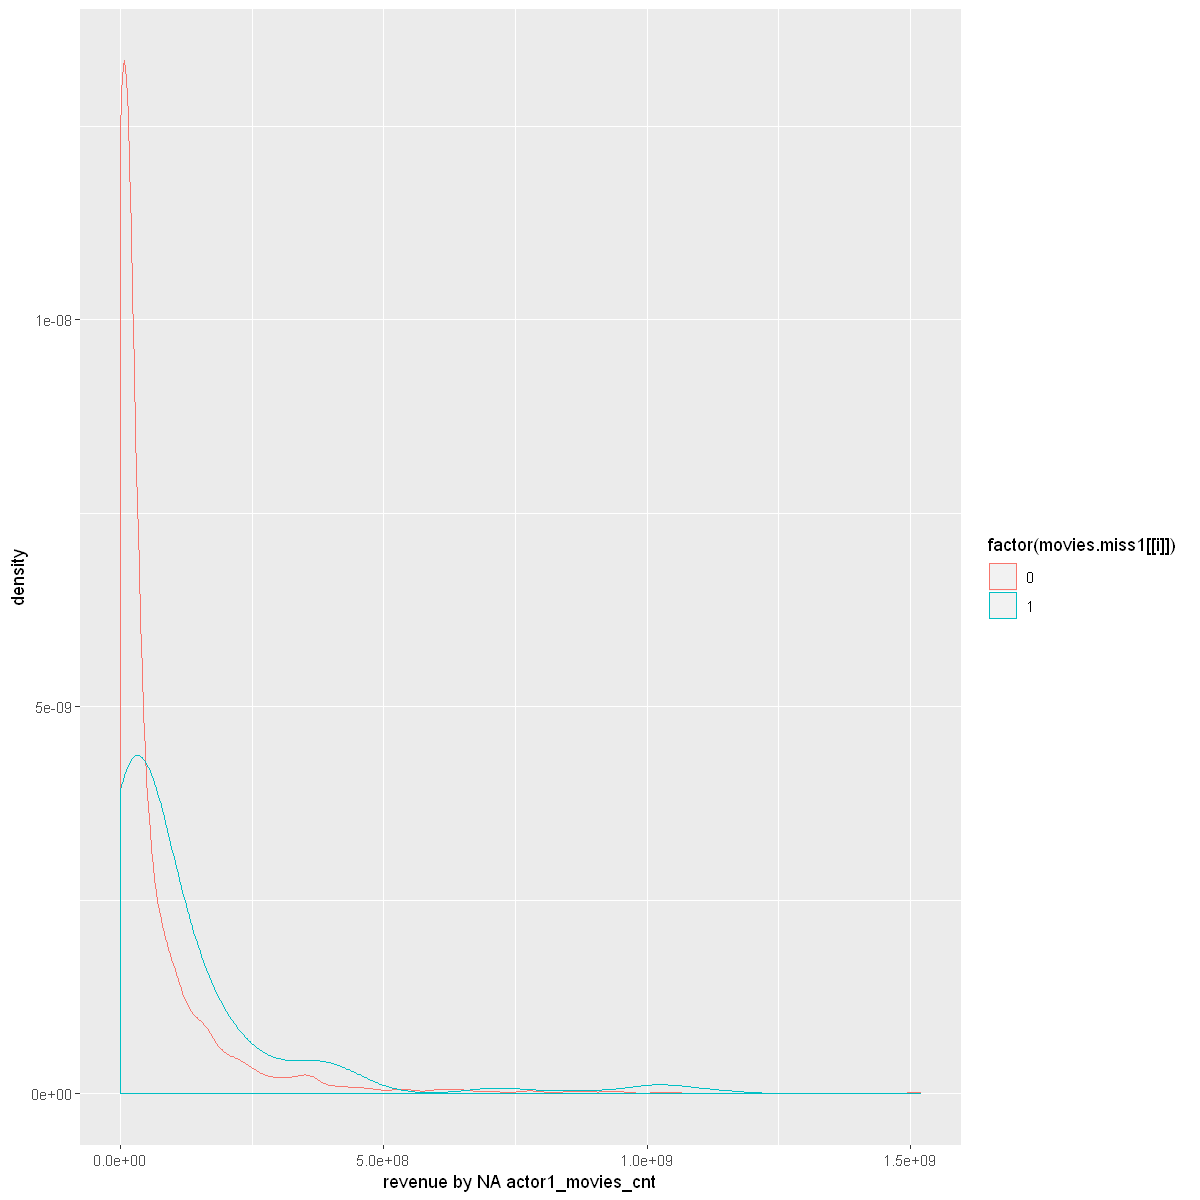


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -9.7231, df = 381.85, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16138226 -10709182
sample estimates:
mean of x mean of y 
 21208895  34632599 

[1] "budget by NA actor2_movies_cnt"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


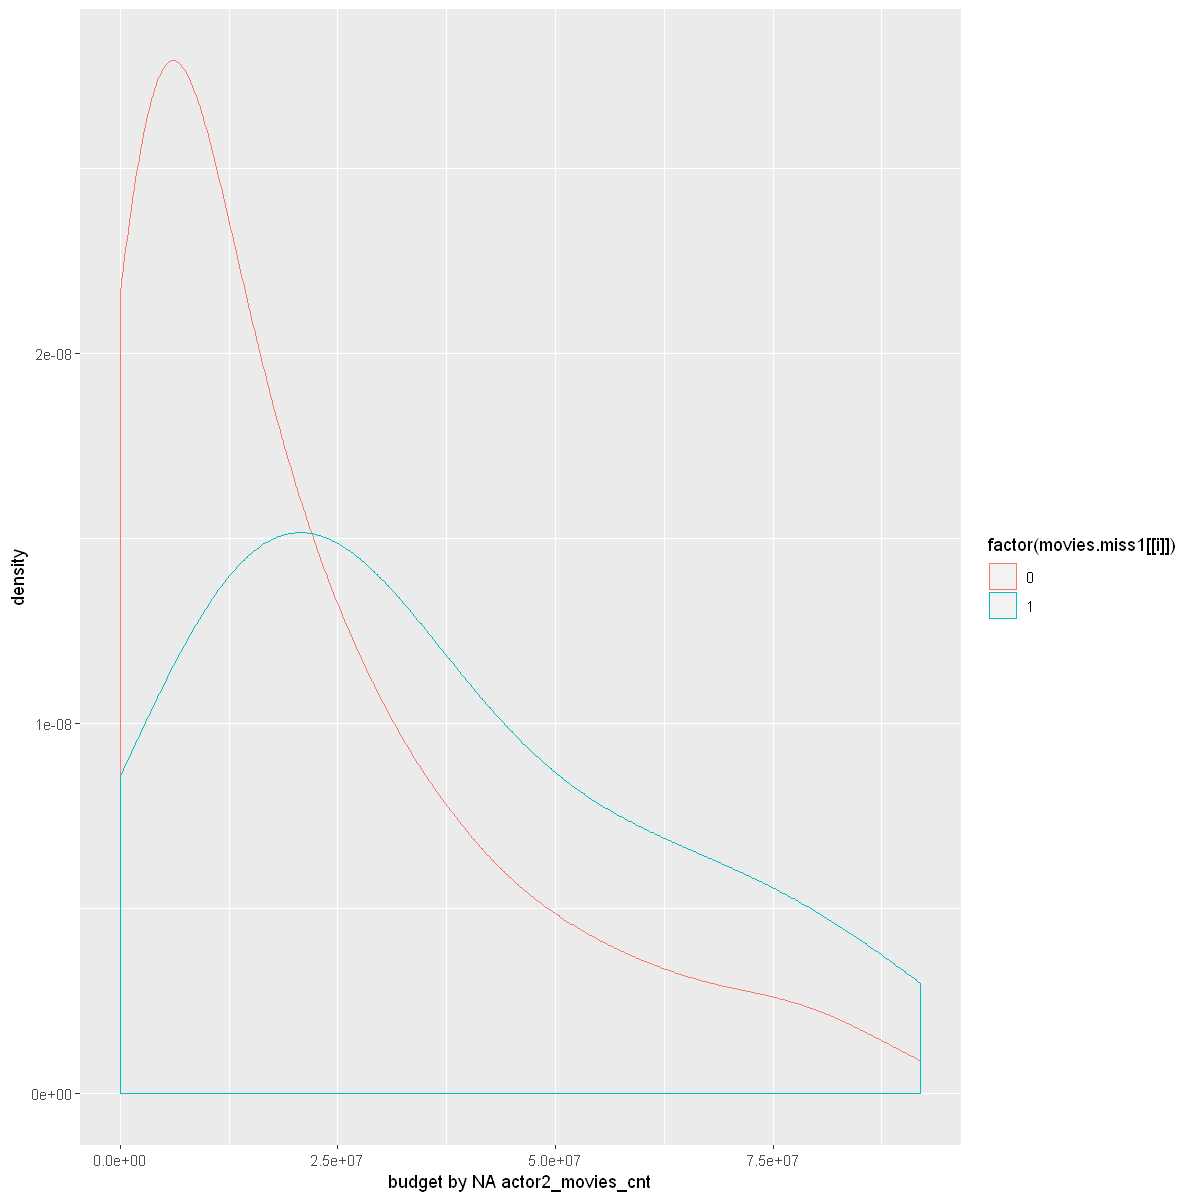


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.491, df = 569.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2945079 -0.8862328
sample estimates:
mean of x mean of y 
  2.82963   3.92000 

[1] "producers_cnt by NA actor2_movies_cnt"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


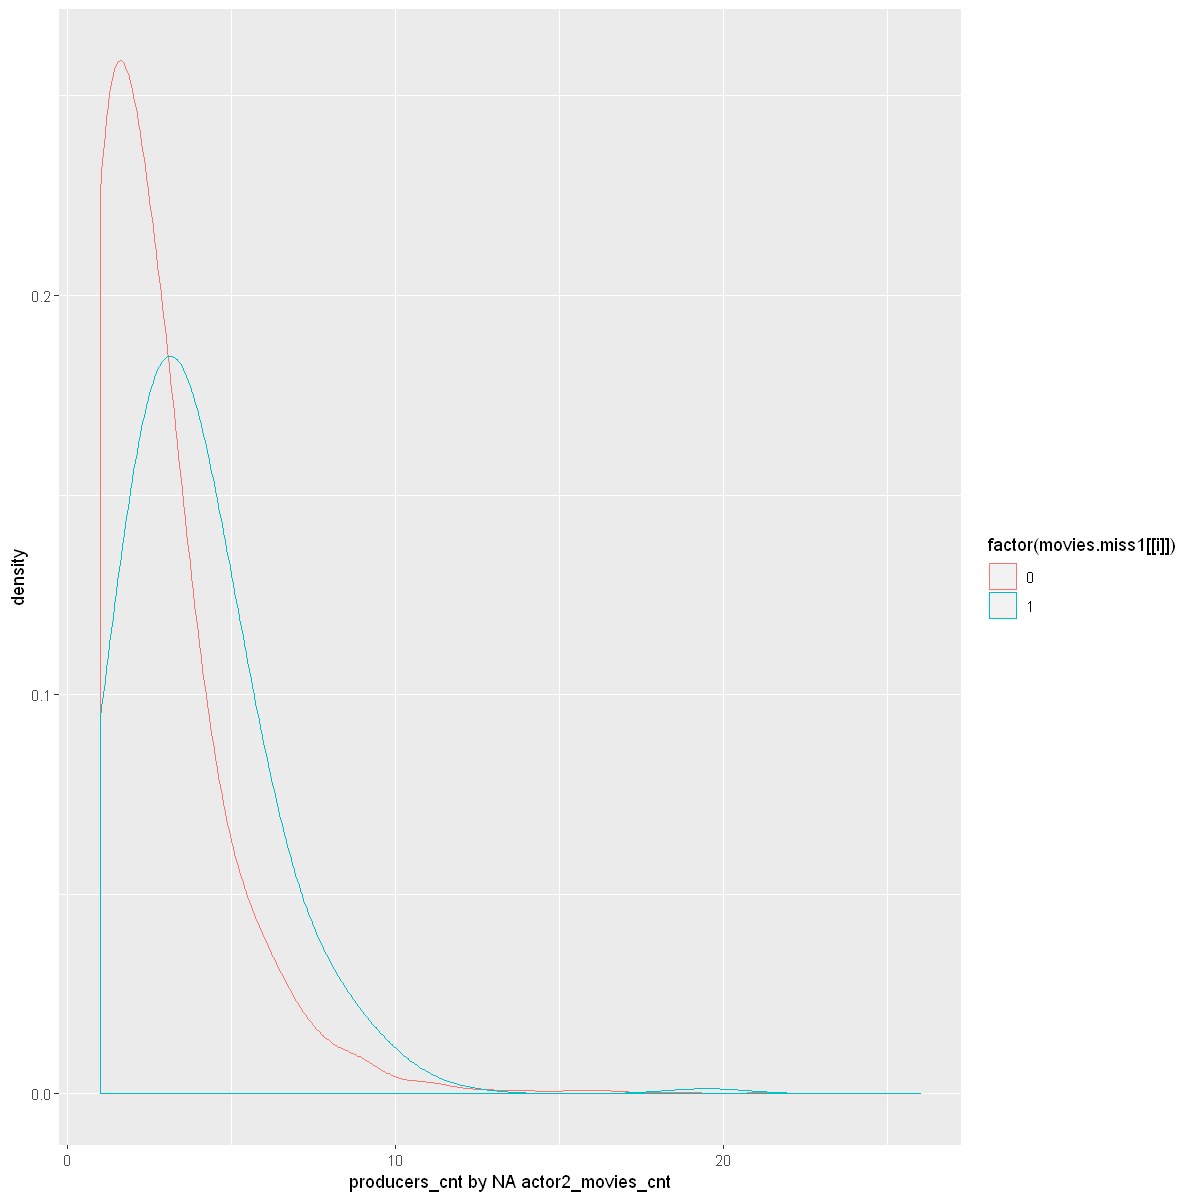


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -18.48, df = 415.64, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.264758 -5.060153
sample estimates:
mean of x mean of y 
 3.752052  9.414508 

[1] "actor1_movies_cnt by NA actor2_movies_cnt"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


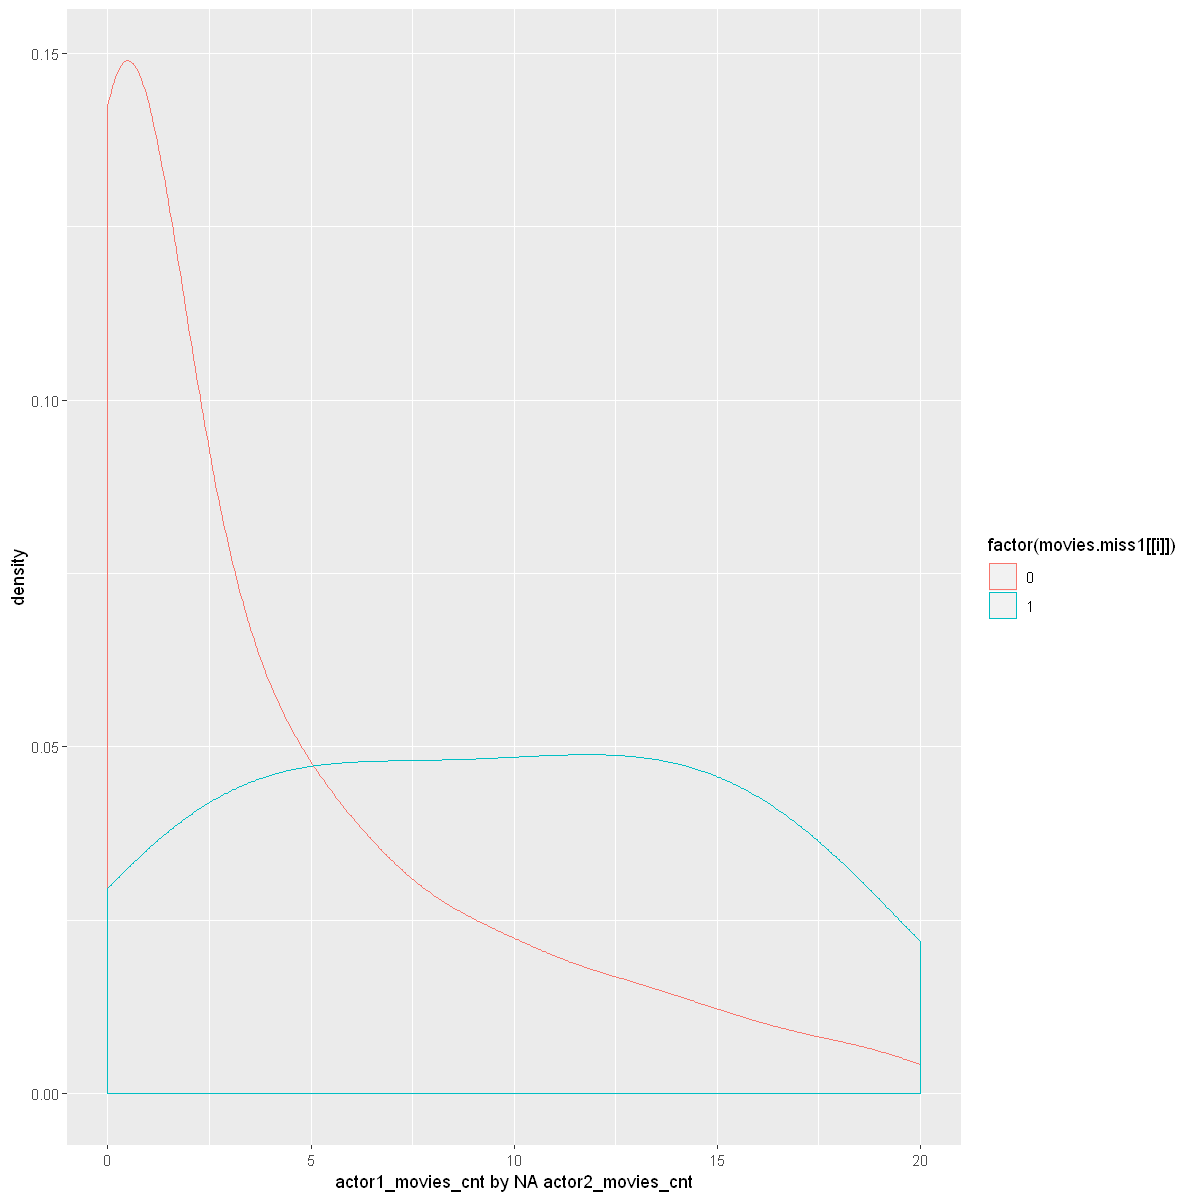


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.739, df = 456.96, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -123808116  -88299029
sample estimates:
mean of x mean of y 
165308151 271361723 

[1] "actor0_prev_revenue by NA actor2_movies_cnt"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


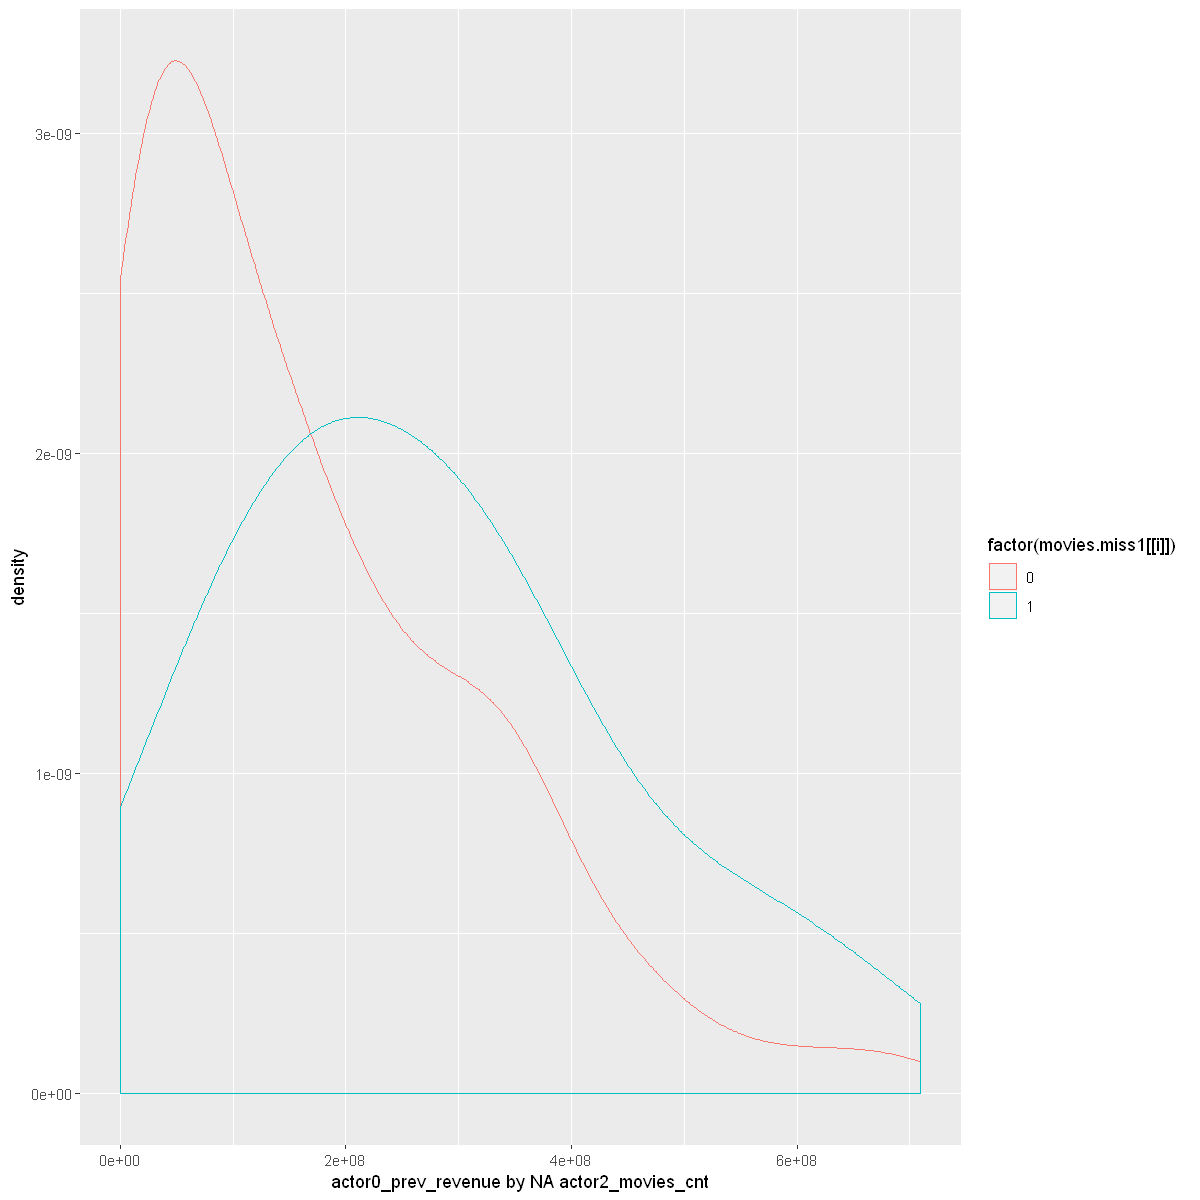


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.717, df = 426.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -99109209 -68388339
sample estimates:
mean of x mean of y 
137300079 221048854 

[1] "actor1_prev_revenue by NA actor2_movies_cnt"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


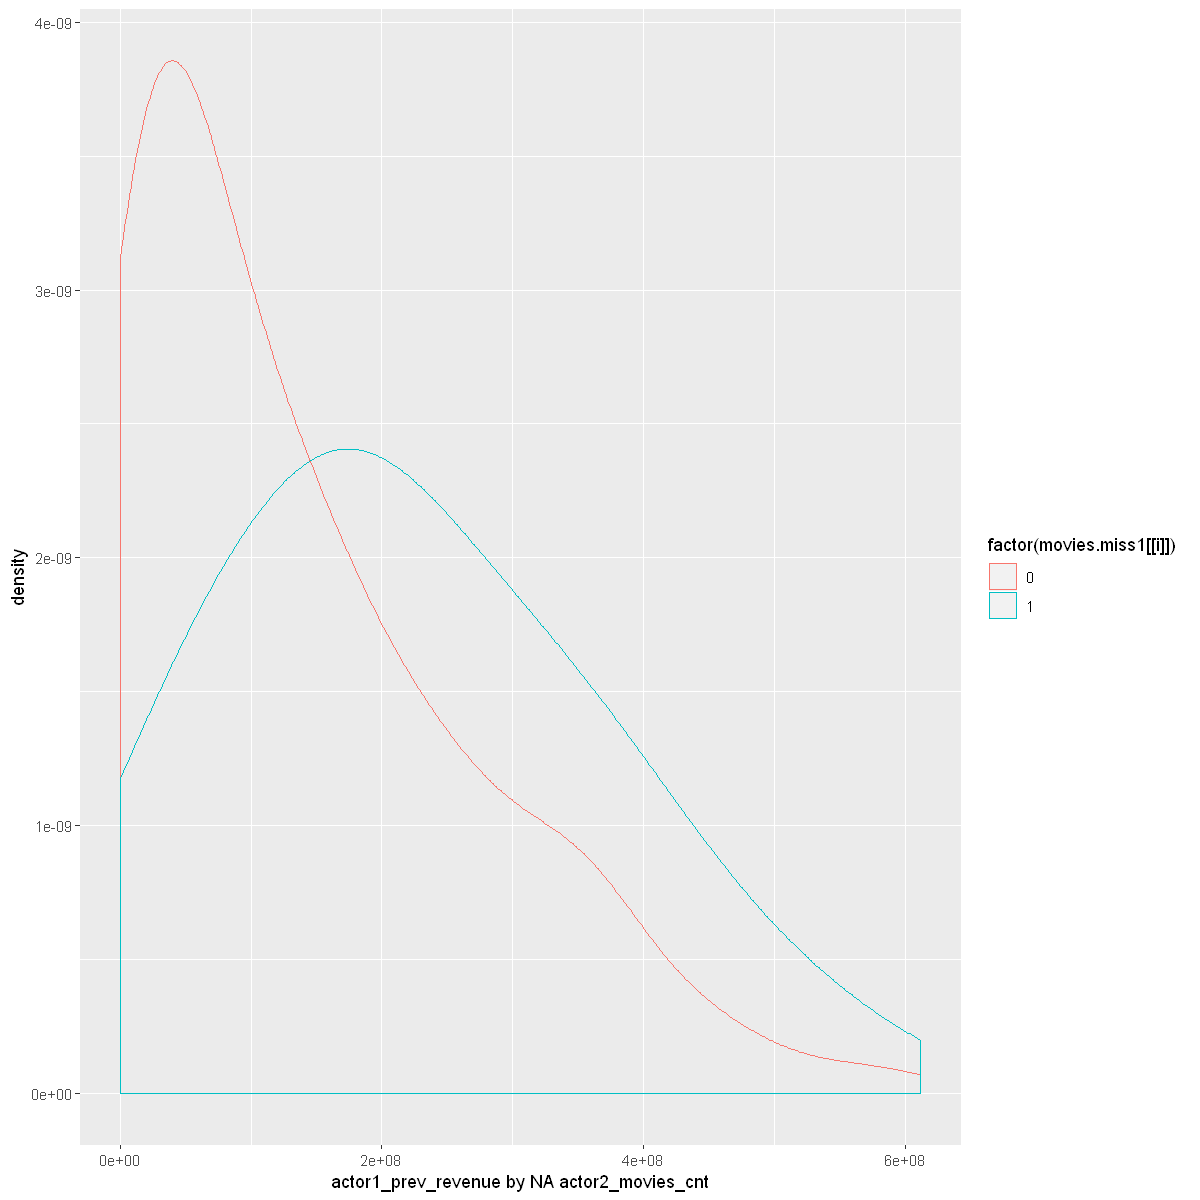


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -23.38, df = 491.81, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -154954319 -130929337
sample estimates:
mean of x mean of y 
118690854 261632682 

[1] "actor2_prev_revenue by NA actor2_movies_cnt"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


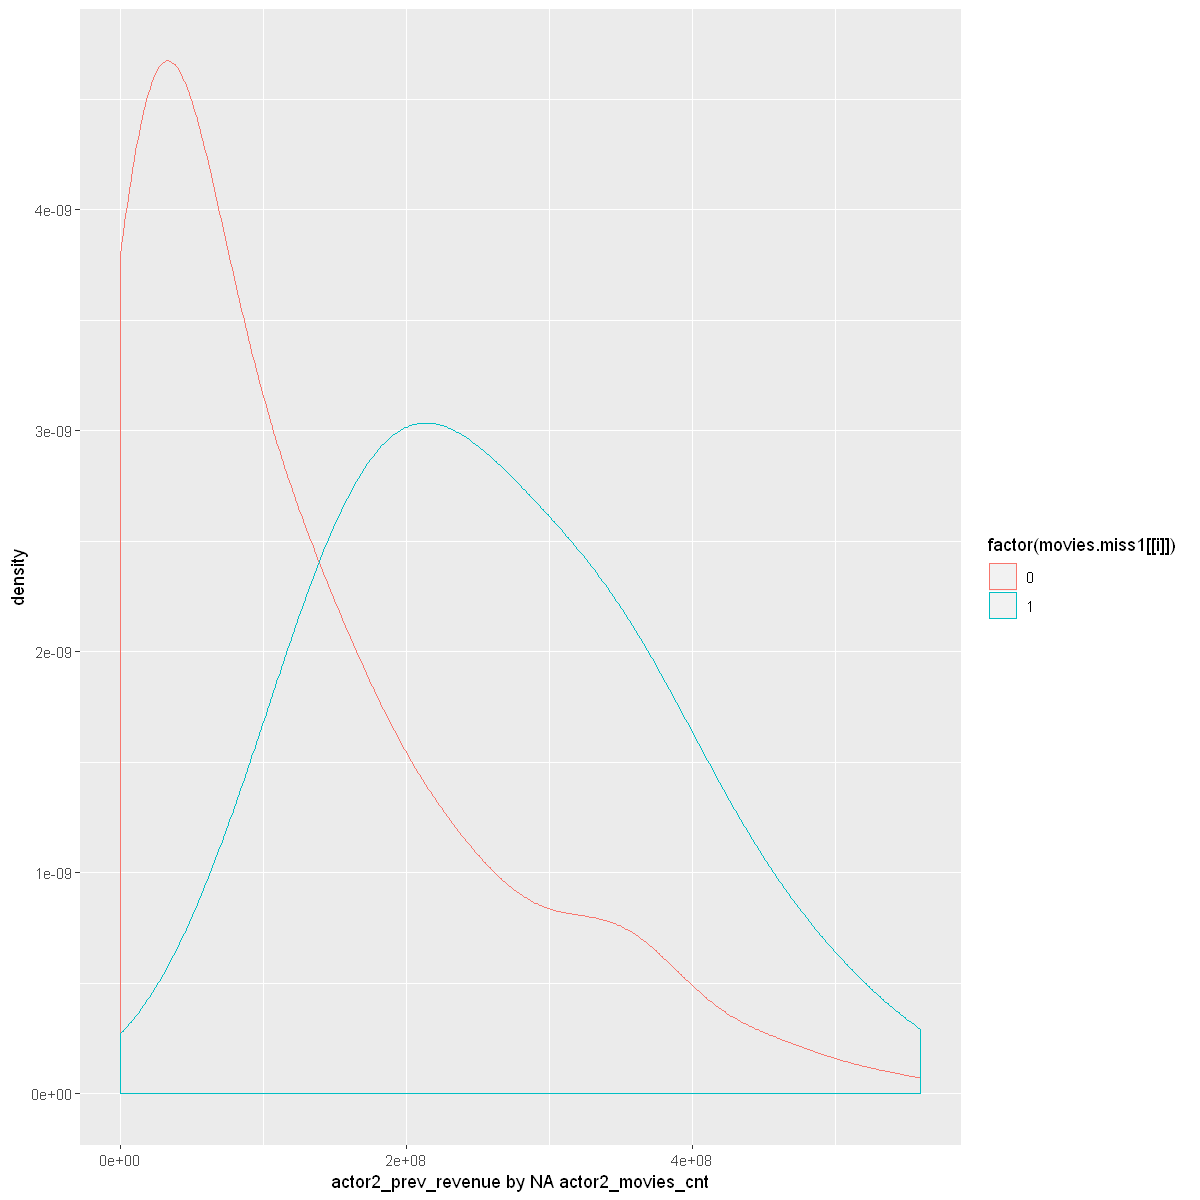


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.8692, df = 498.93, p-value = 2.233e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9643839 -0.5790349
sample estimates:
mean of x mean of y 
 1.303679  2.075388 

[1] "director_movies_cnt by NA actor2_movies_cnt"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


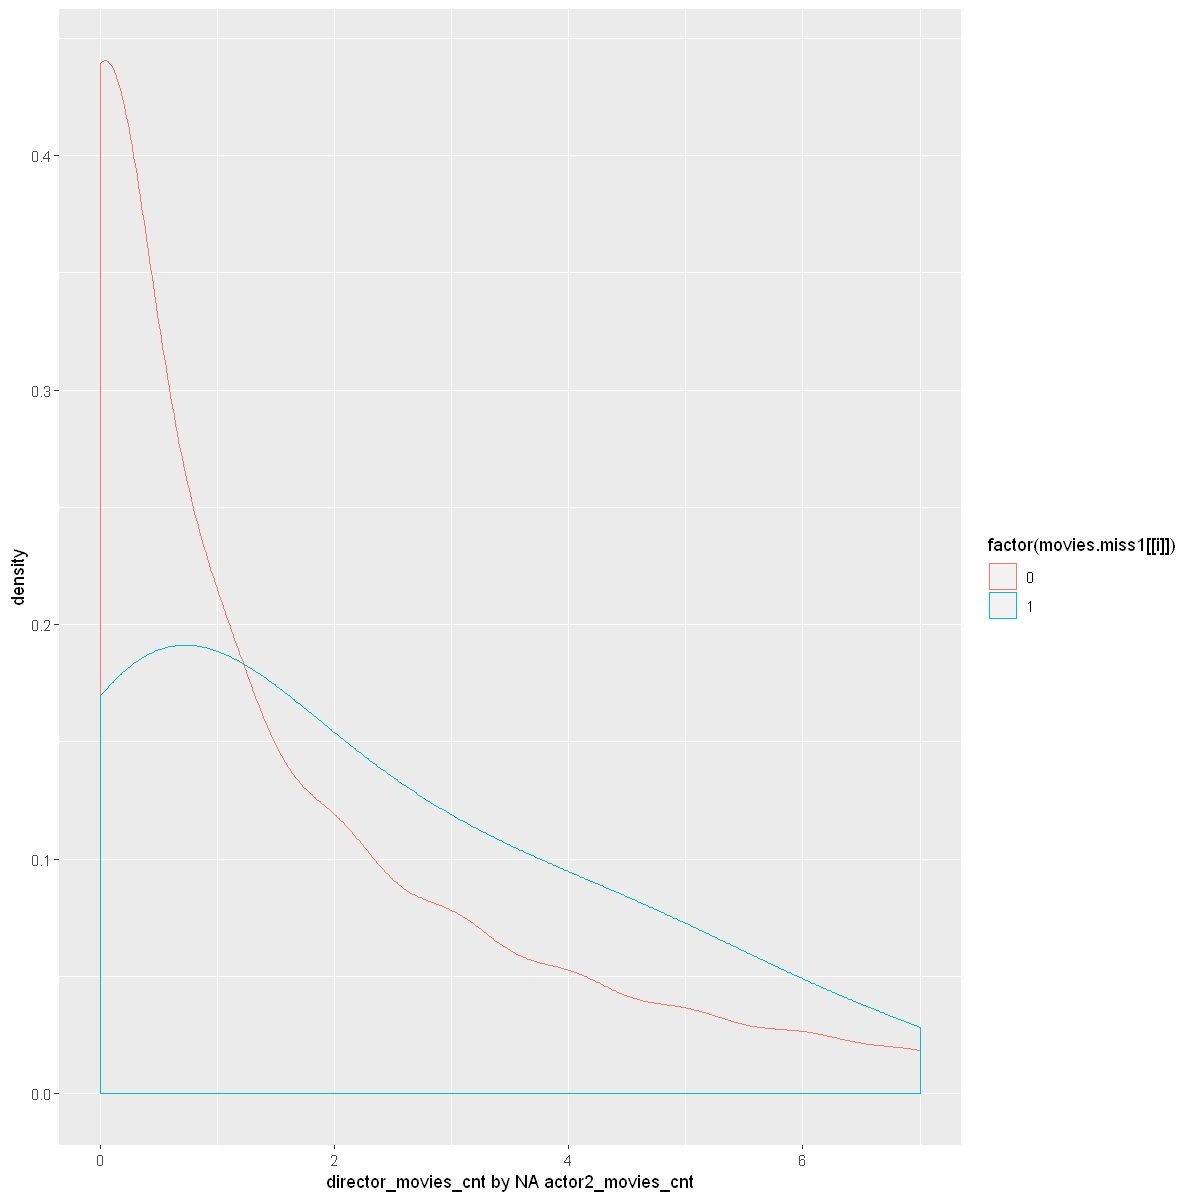


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.8577, df = 440.81, p-value = 3.021e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.057785 -0.634512
sample estimates:
mean of x mean of y 
 1.556836  2.402985 

[1] "depart_Art by NA actor2_movies_cnt"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


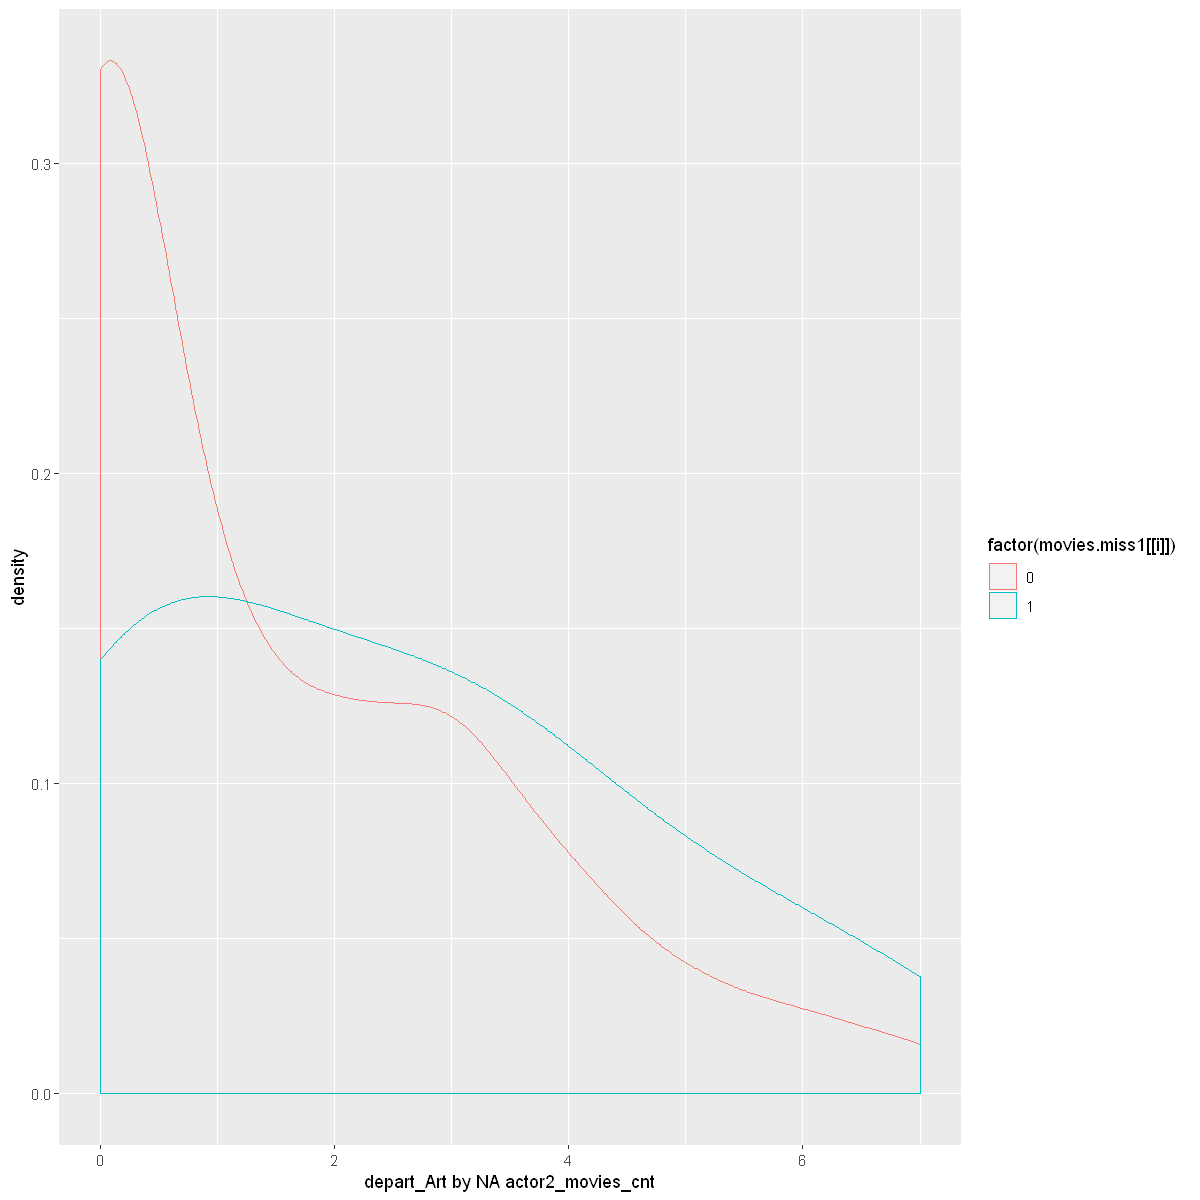


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.2266, df = 446.81, p-value = 2.878e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4310115 -0.1574077
sample estimates:
mean of x mean of y 
 1.093595  1.387805 

[1] "depart_Camera by NA actor2_movies_cnt"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


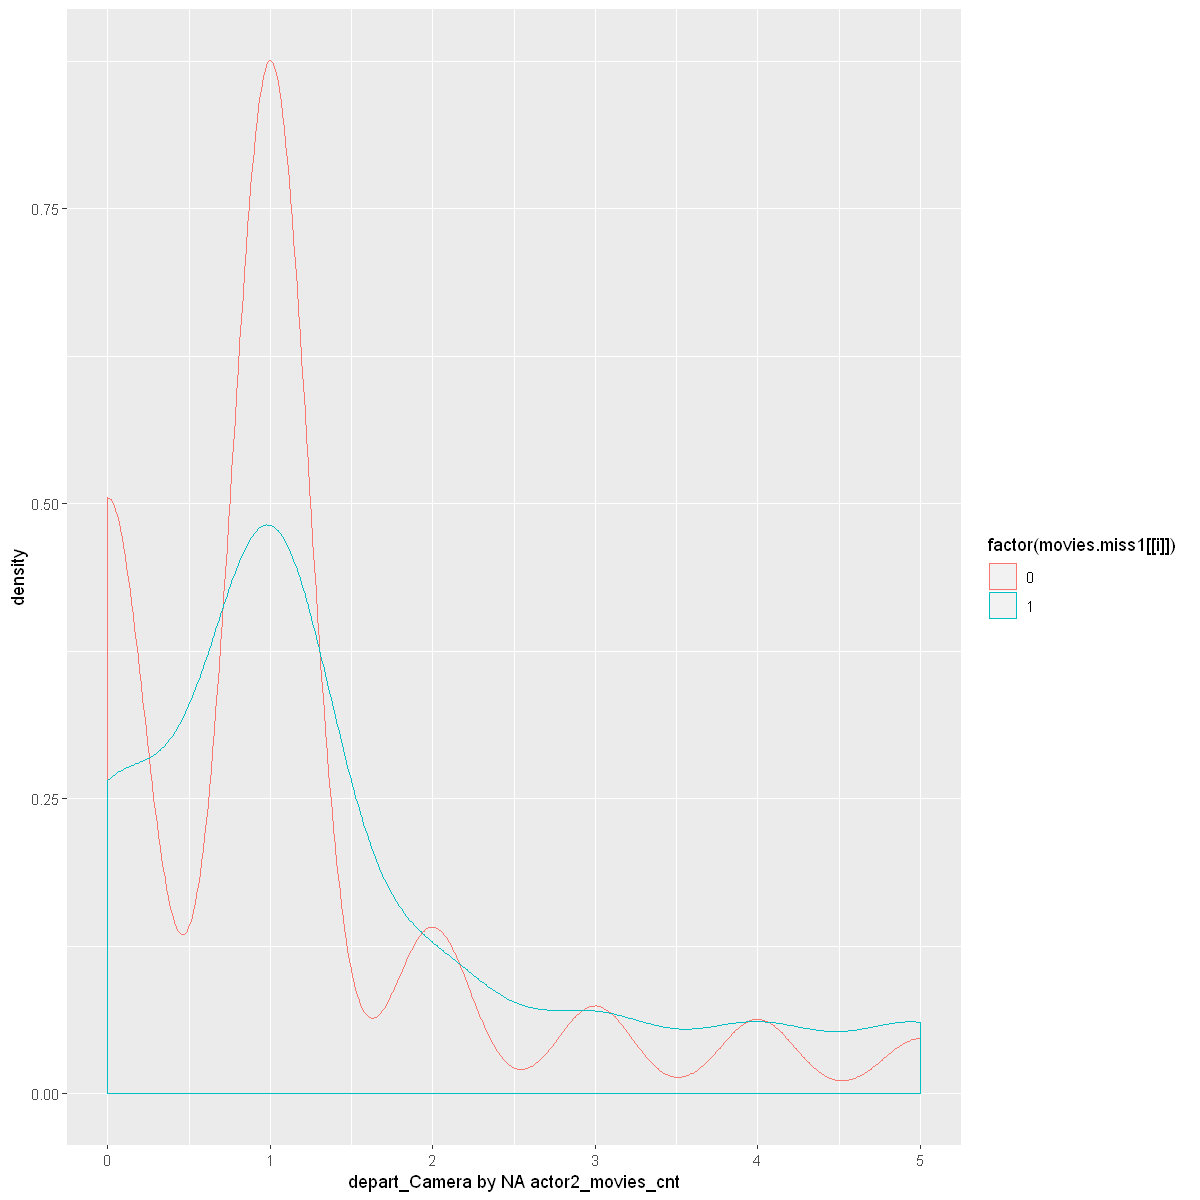


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.0411, df = 389.61, p-value = 6.411e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4753108 -0.1641858
sample estimates:
mean of x mean of y 
0.8595234 1.1792717 

[1] "depart_Custom_Mkup by NA actor2_movies_cnt"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


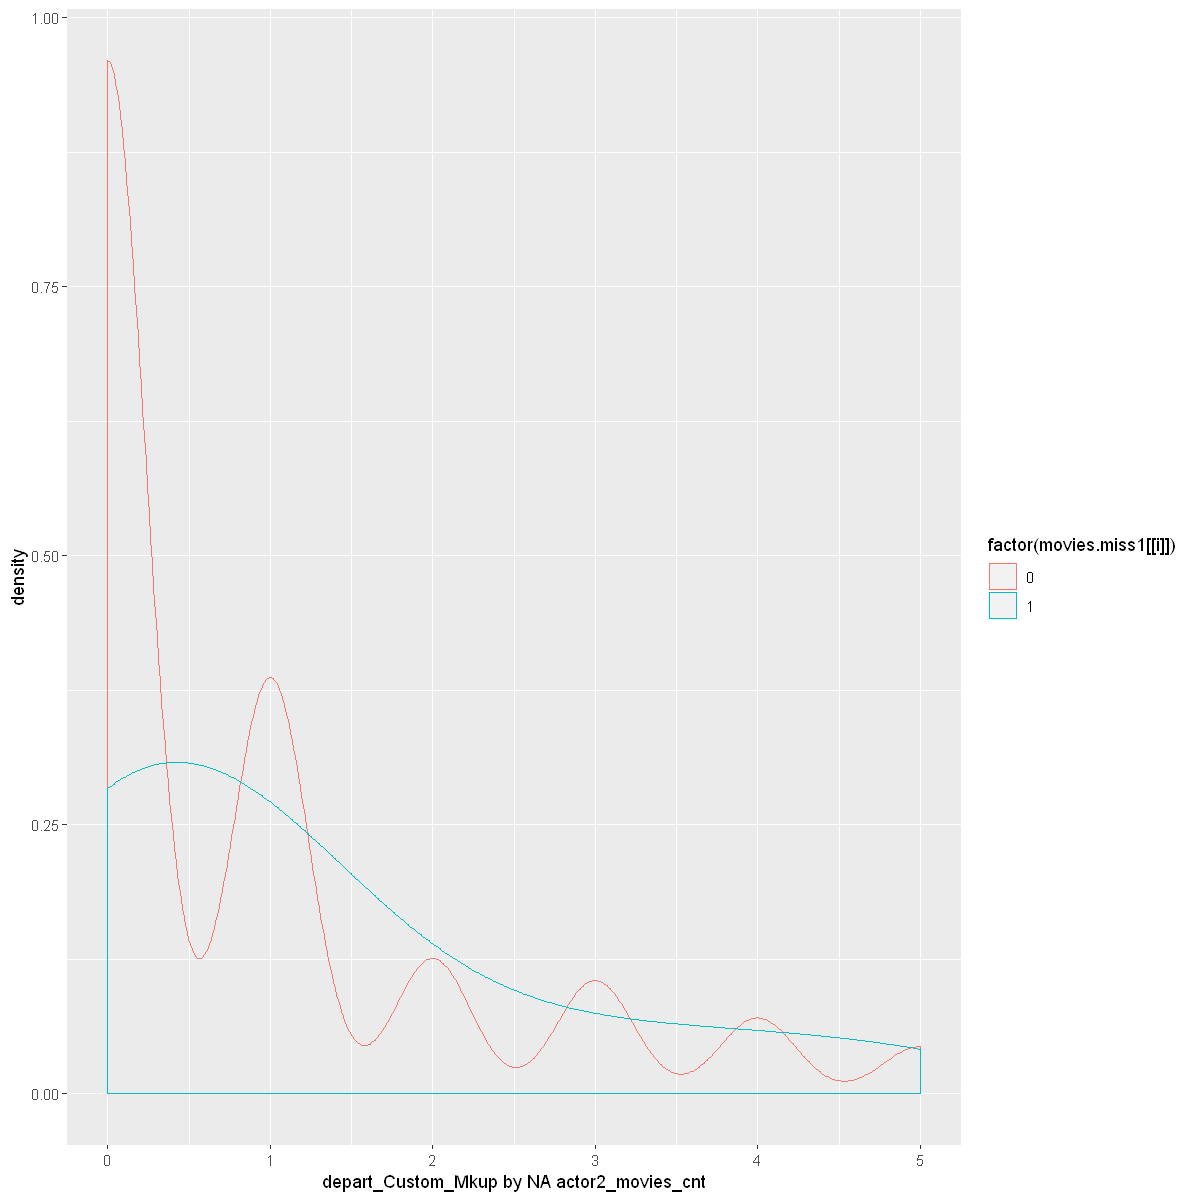


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.0711, df = 514.32, p-value = 5.04e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3179299 -0.1796785
sample estimates:
mean of x mean of y 
 1.395592  1.644397 

[1] "depart_Directing by NA actor2_movies_cnt"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


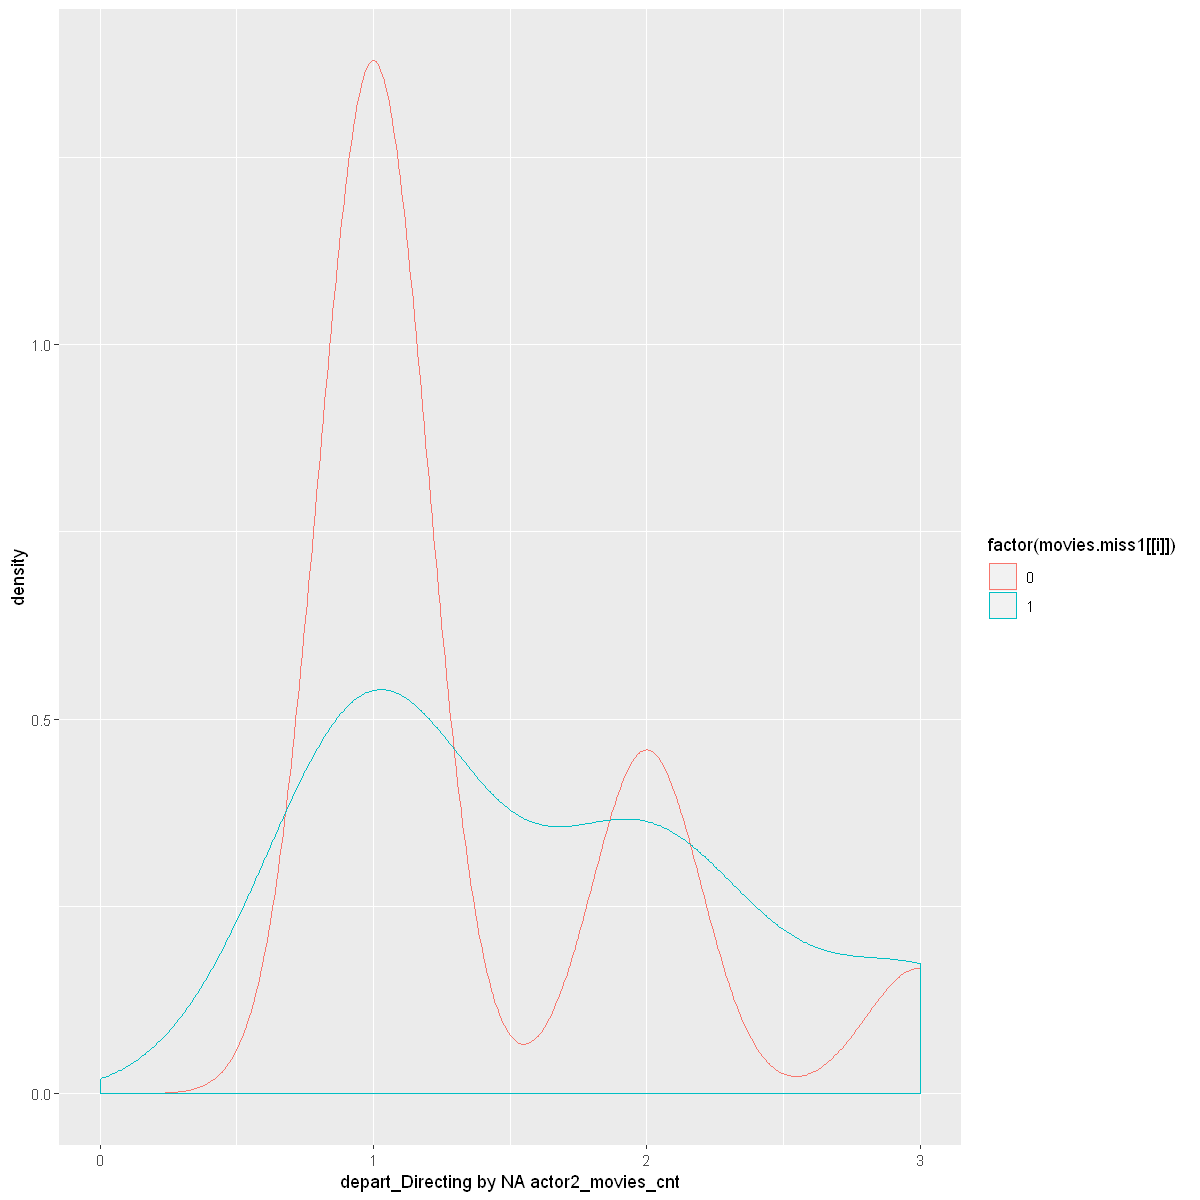


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2.5335, df = 384.23, p-value = 0.01169
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.35289121 -0.04449205
sample estimates:
mean of x mean of y 
 1.252175  1.450867 

[1] "depart_Sound by NA actor2_movies_cnt"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


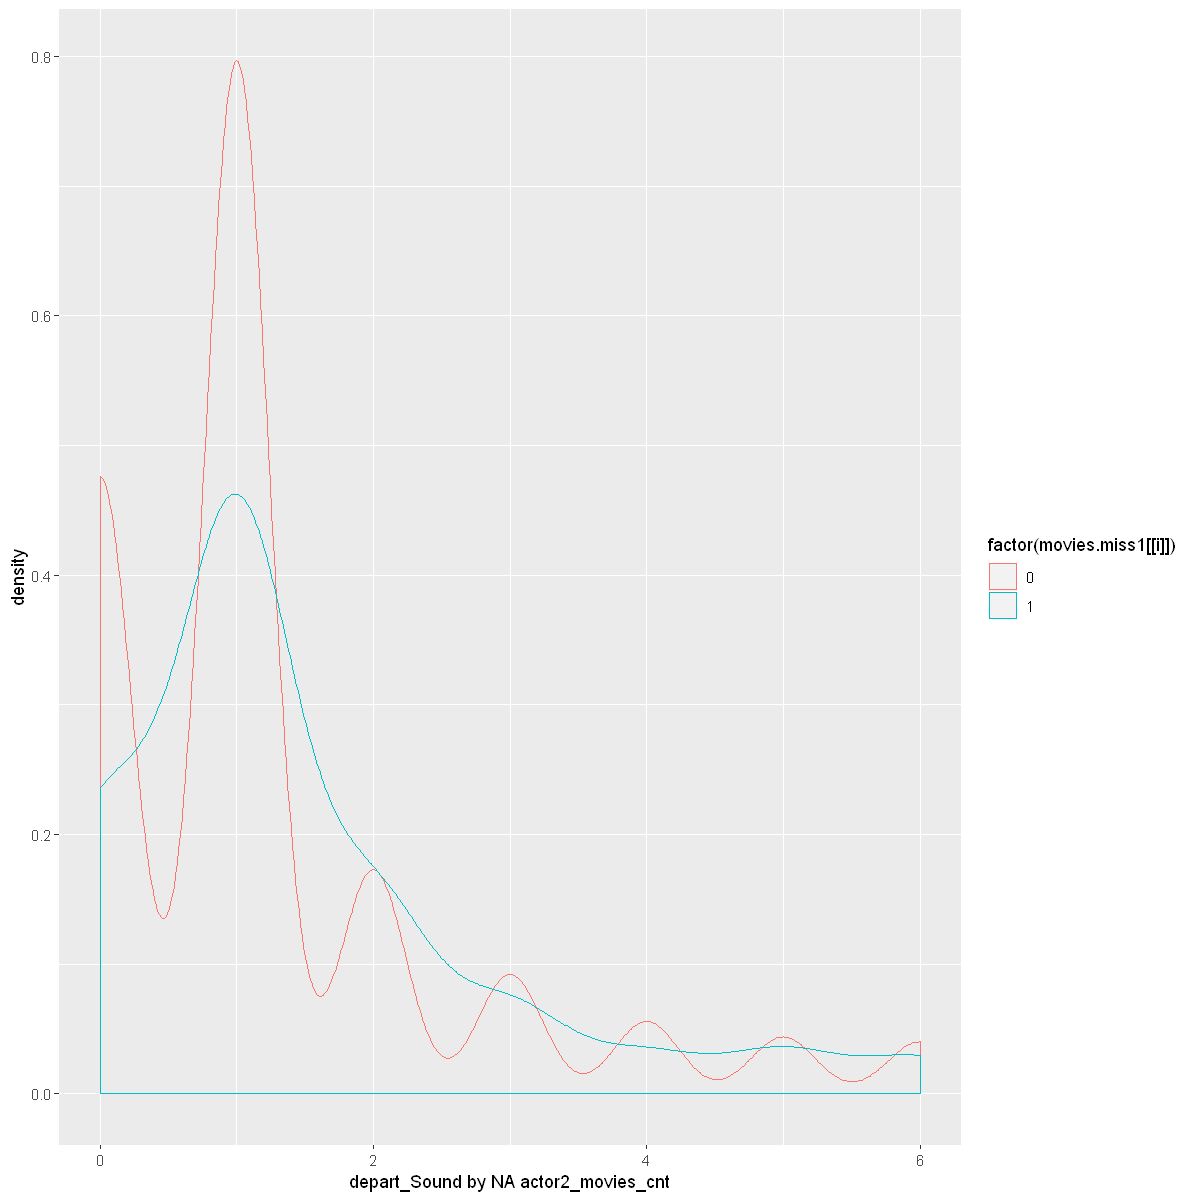


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.4838, df = 246.69, p-value = 1.124e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -93213201 -36314261
sample estimates:
mean of x mean of y 
 61815926 126579657 

[1] "revenue by NA actor2_movies_cnt"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


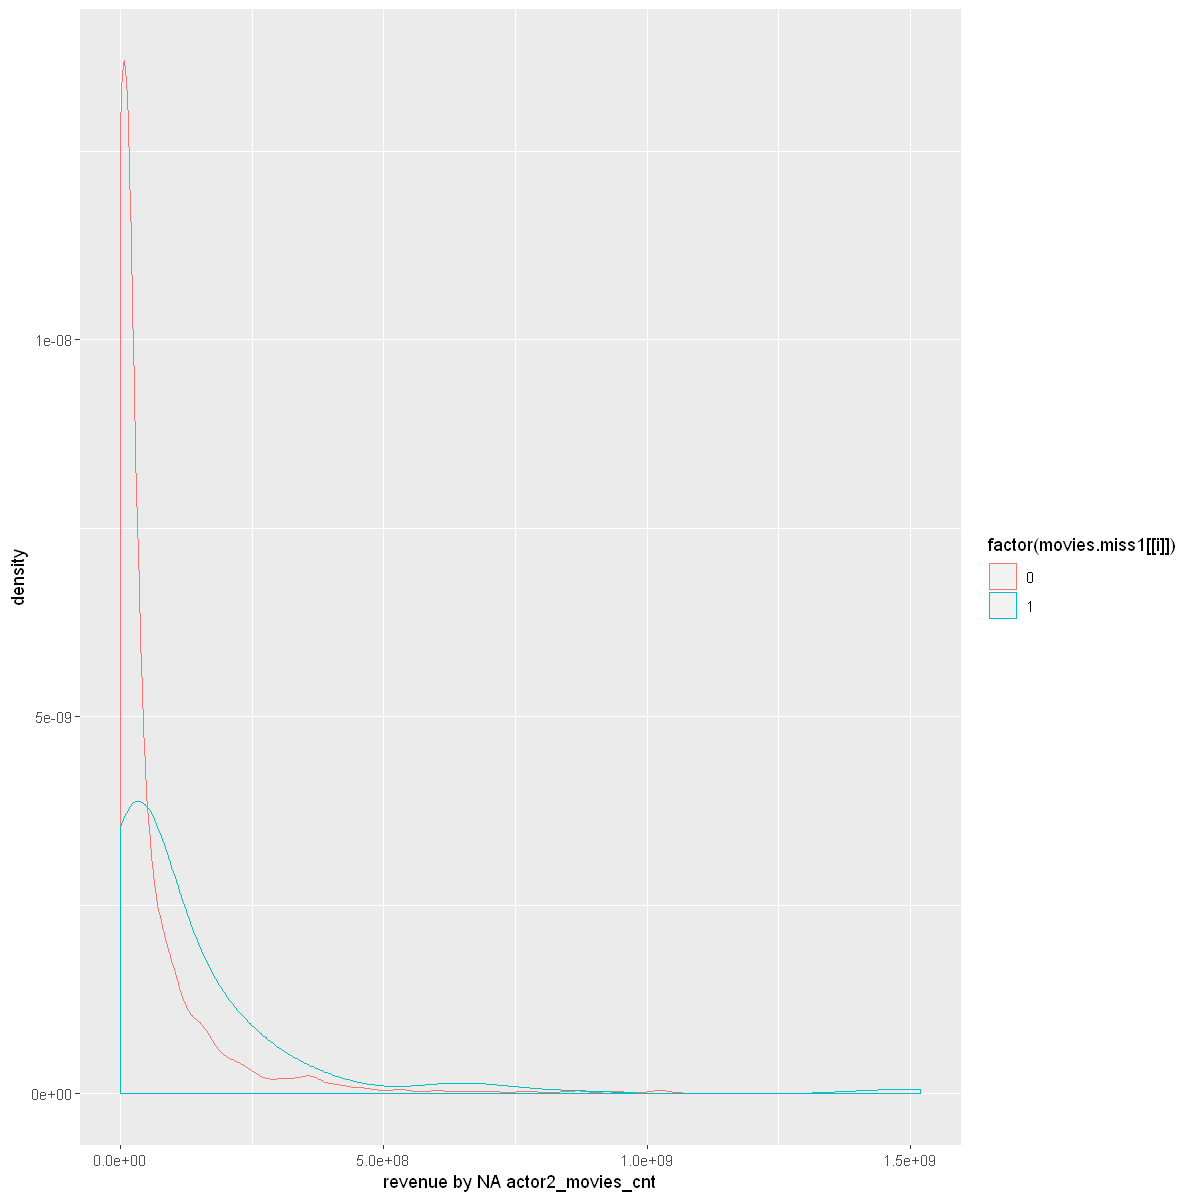


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 18.727, df = 4513.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9973711 12306162
sample estimates:
mean of x mean of y 
 26310359  15170423 

[1] "budget by NA actor0_prev_revenue"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


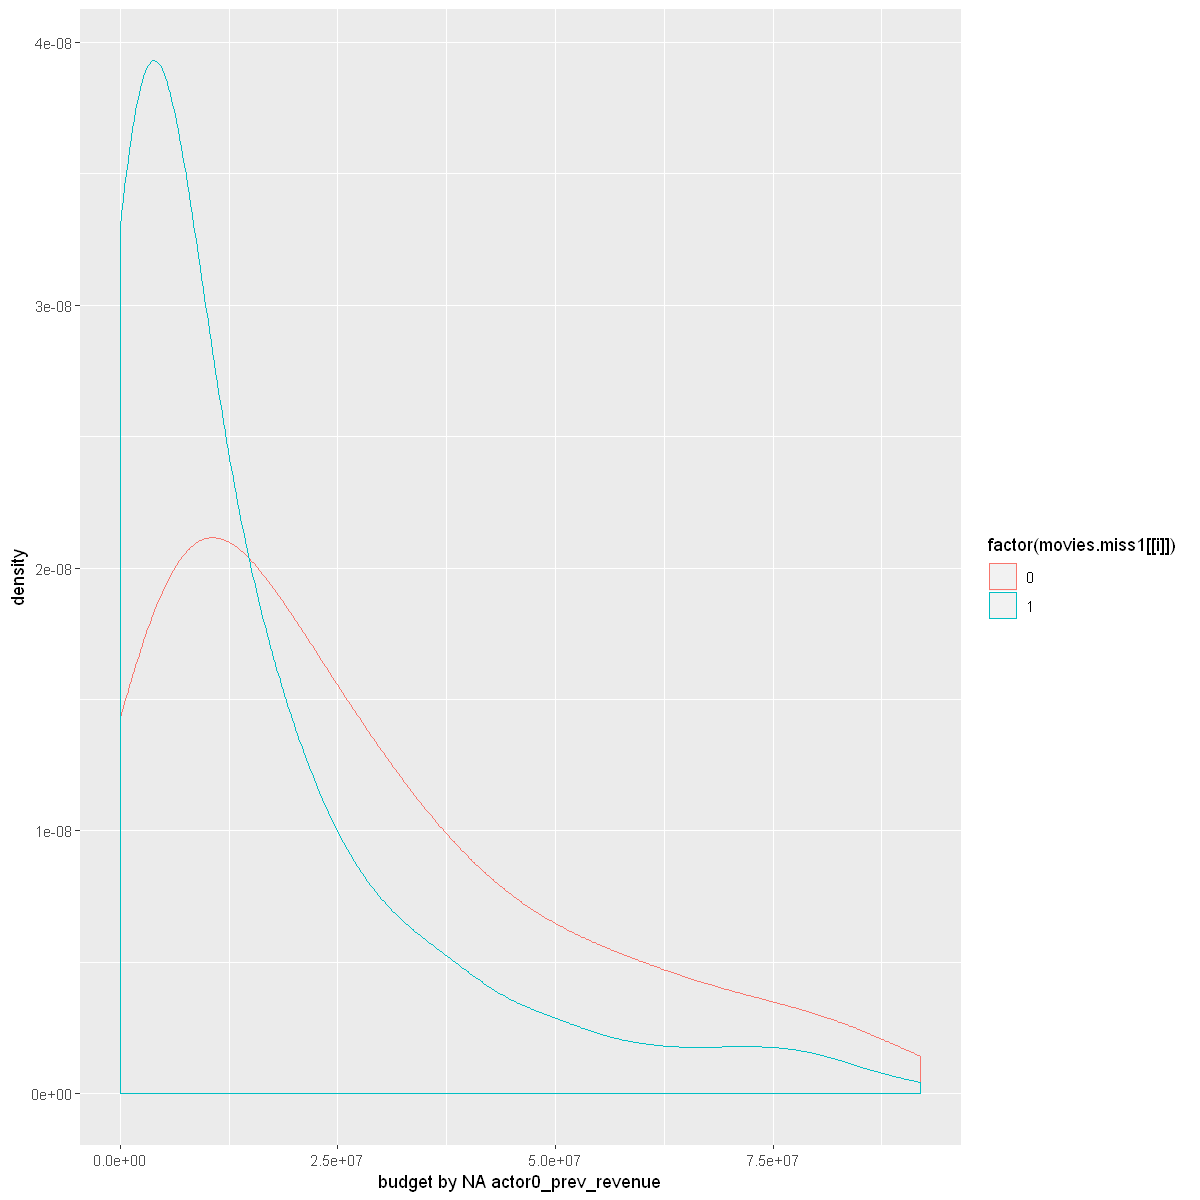


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.1674, df = 5578.7, p-value = 0.001546
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06438391 0.27352306
sample estimates:
mean of x mean of y 
 2.975197  2.806243 

[1] "producers_cnt by NA actor0_prev_revenue"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


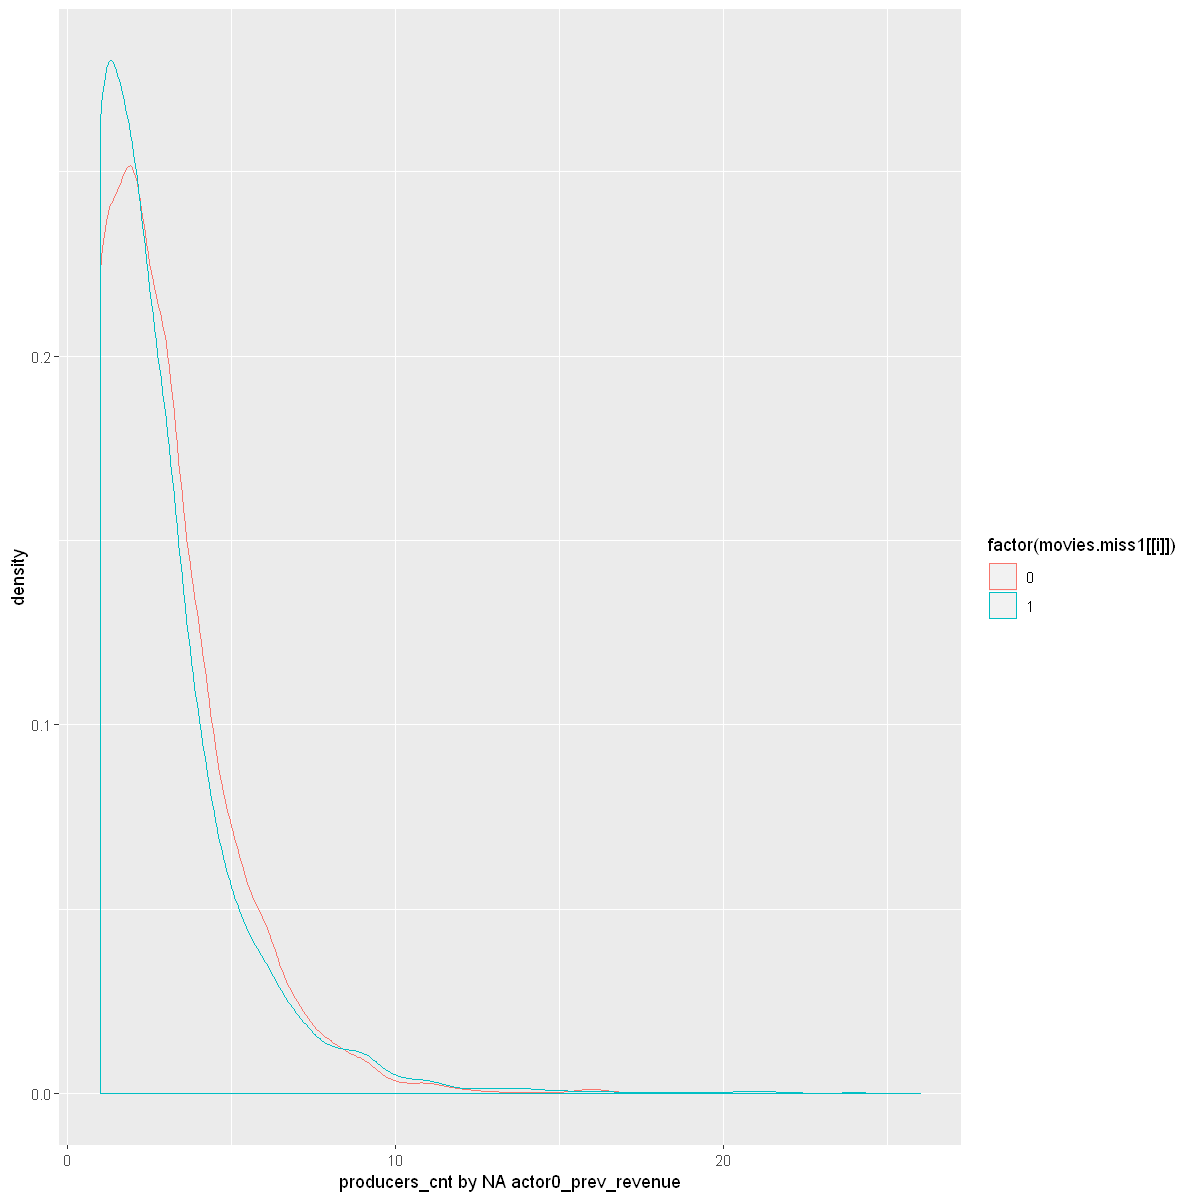


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 34.823, df = 6953.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.555419 3.979587
sample estimates:
mean of x mean of y 
 5.655901  1.888397 

[1] "actor1_movies_cnt by NA actor0_prev_revenue"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


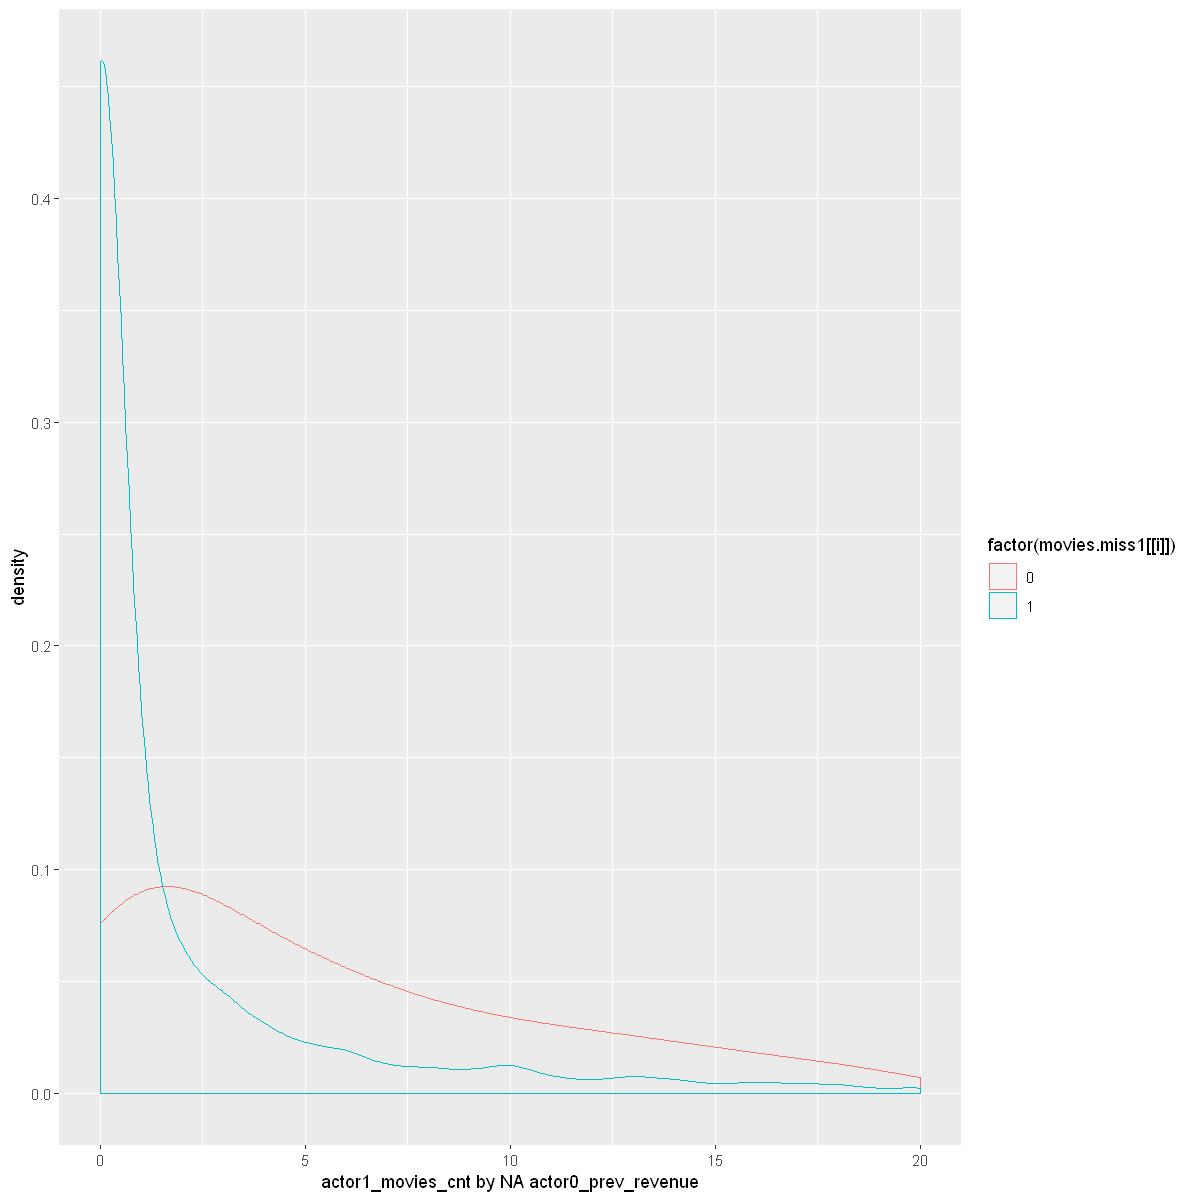


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 30.211, df = 6865.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.655503 3.024035
sample estimates:
mean of x mean of y 
 4.496960  1.657192 

[1] "actor2_movies_cnt by NA actor0_prev_revenue"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


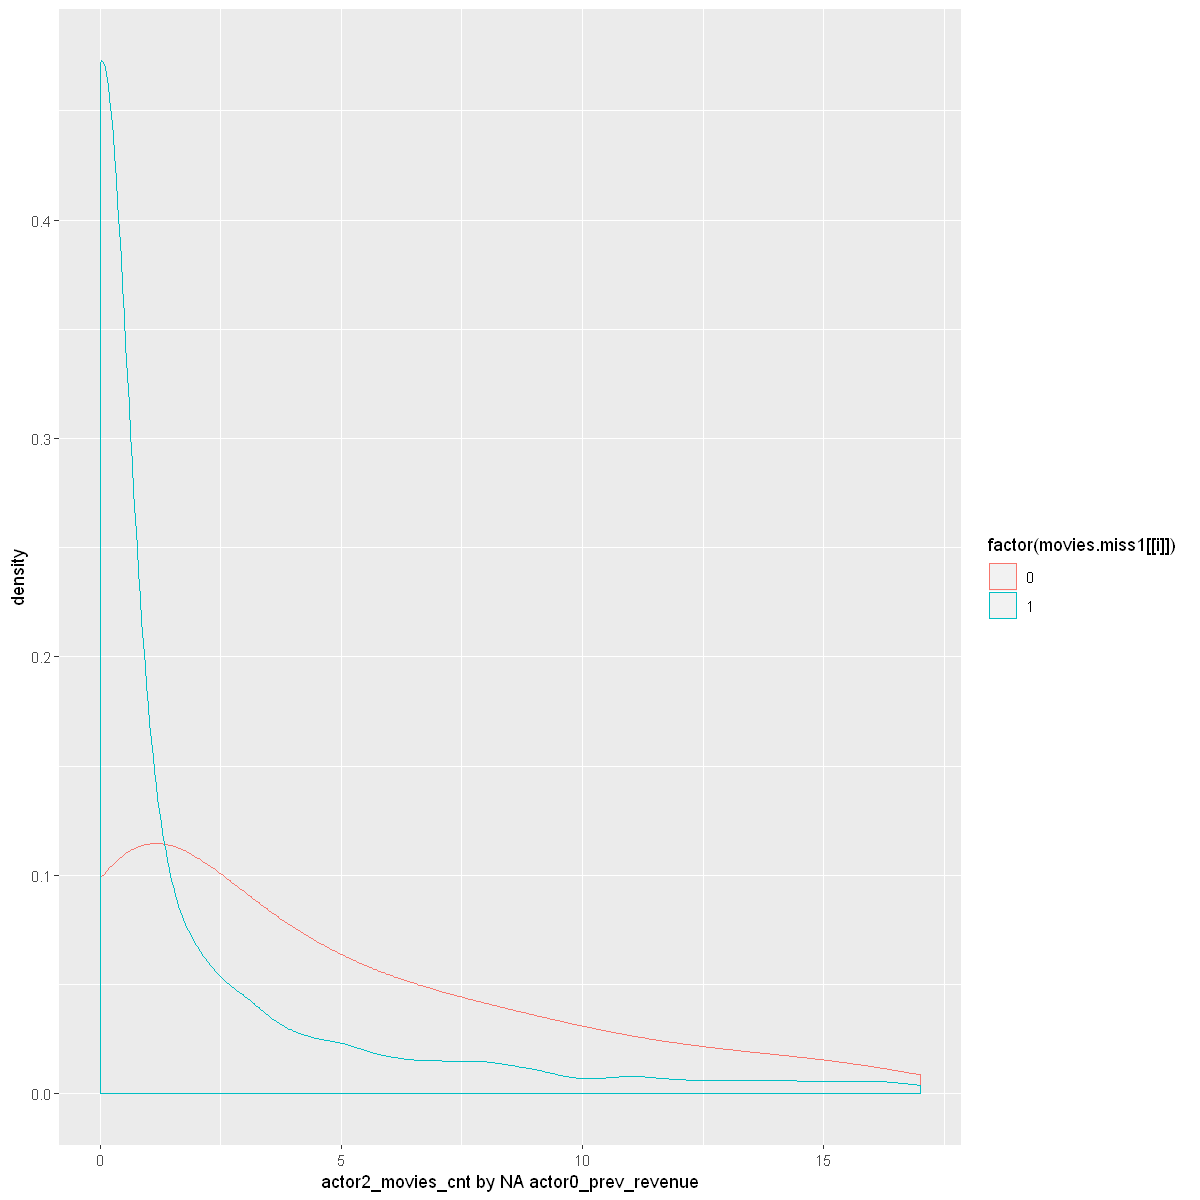


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.526, df = 1319.3, p-value = 3.944e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 18831392 39561350
sample estimates:
mean of x mean of y 
151559748 122363377 

[1] "actor1_prev_revenue by NA actor0_prev_revenue"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


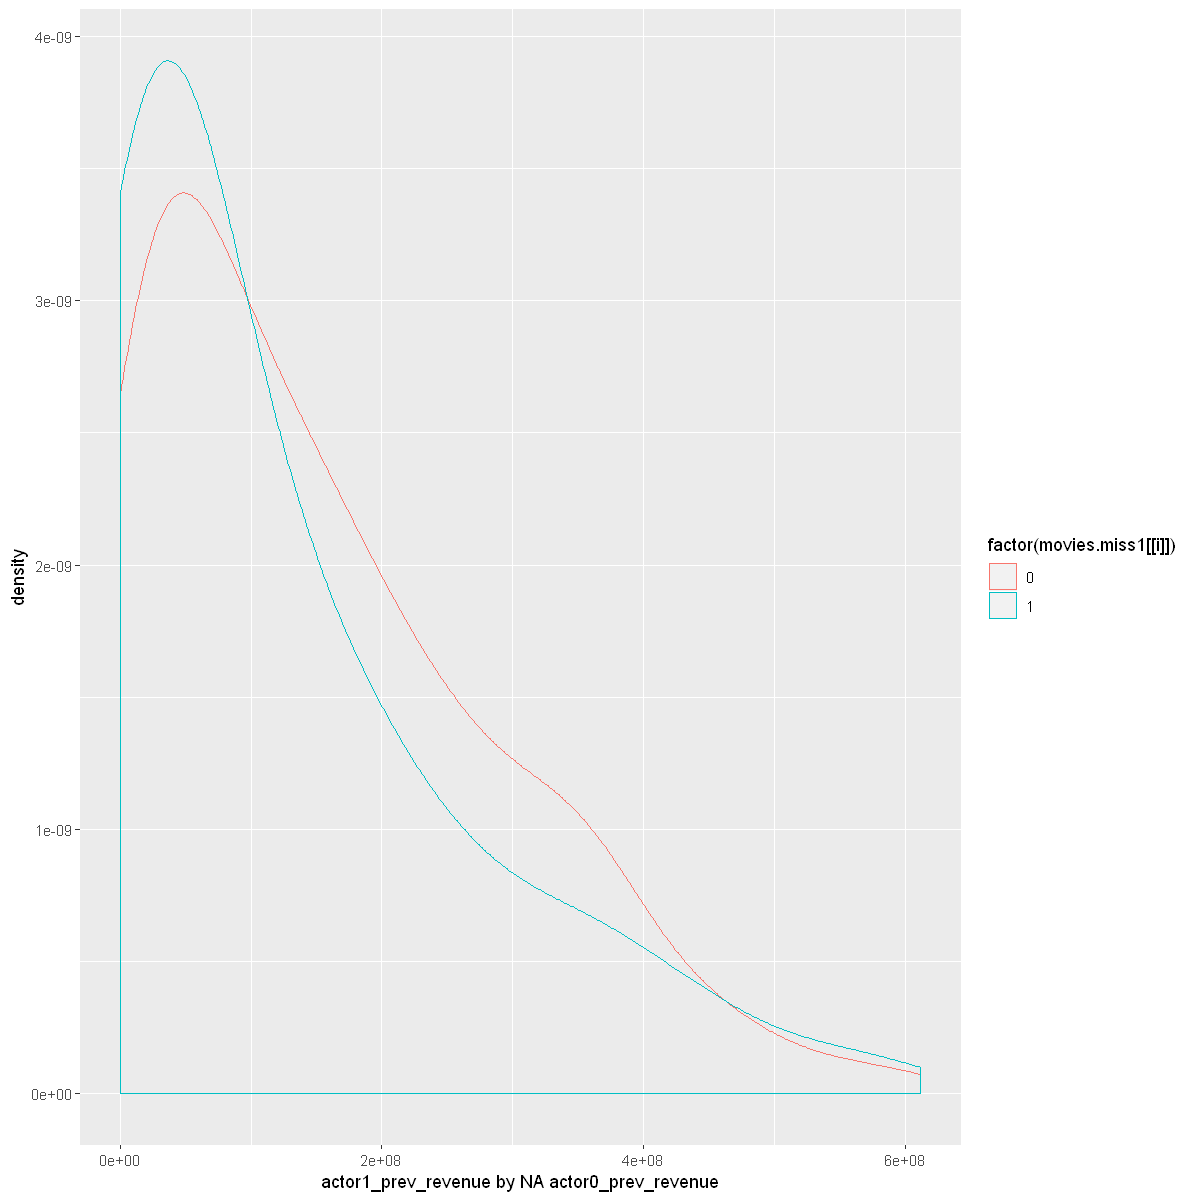


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.587, df = 1394, p-value = 2.775e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 17747571 36954144
sample estimates:
mean of x mean of y 
140003867 112653010 

[1] "actor2_prev_revenue by NA actor0_prev_revenue"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


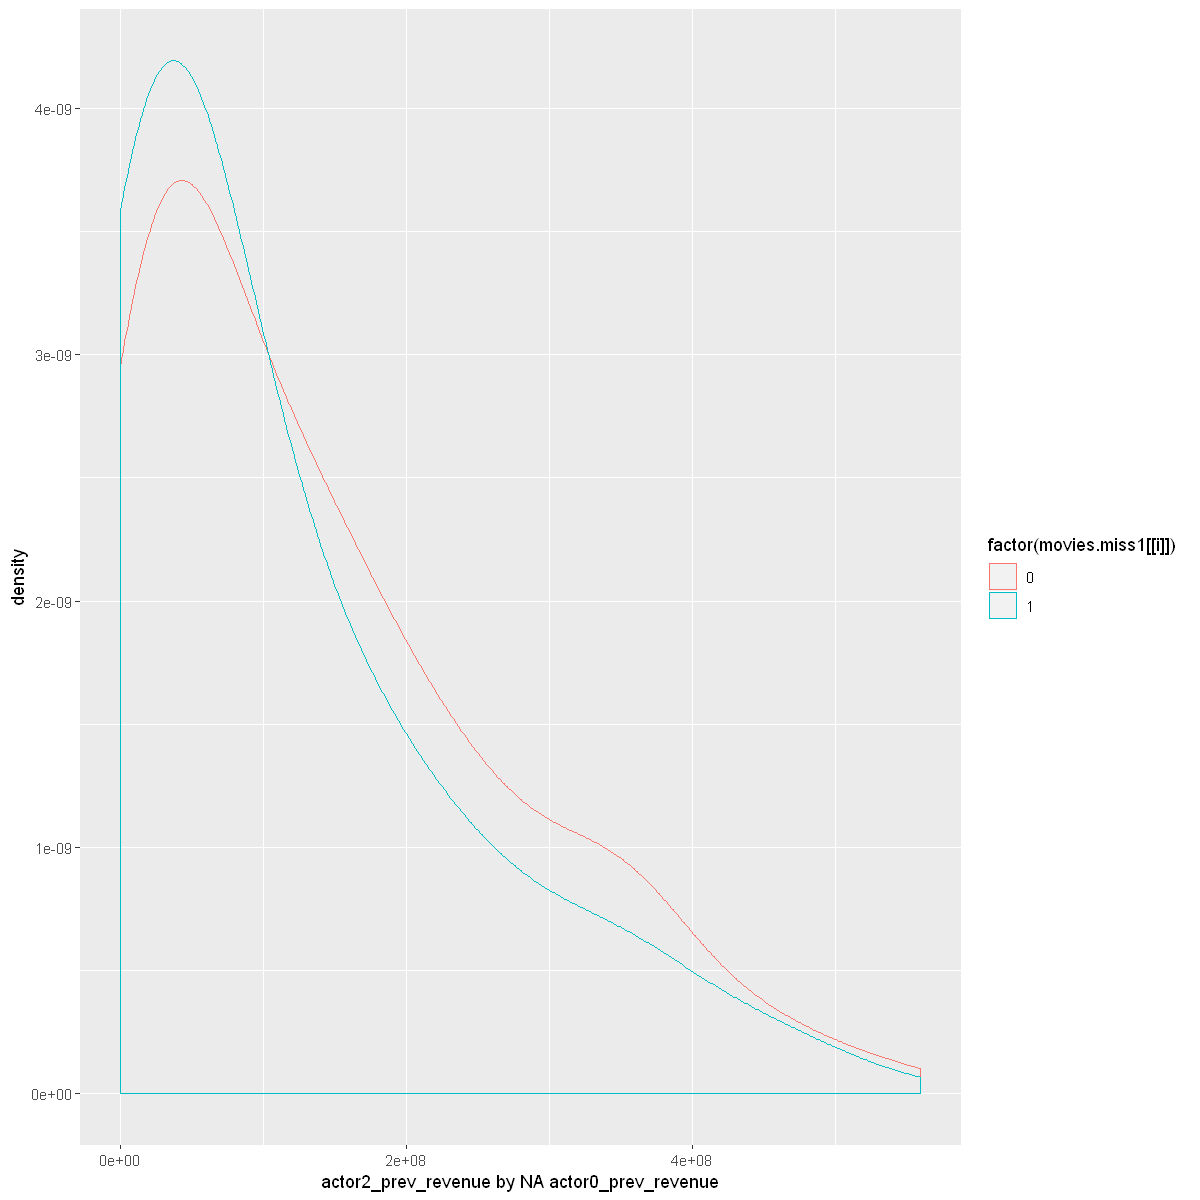


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 17.016, df = 6875.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6242649 0.7868298
sample estimates:
mean of x mean of y 
1.6491706 0.9436232 

[1] "director_movies_cnt by NA actor0_prev_revenue"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


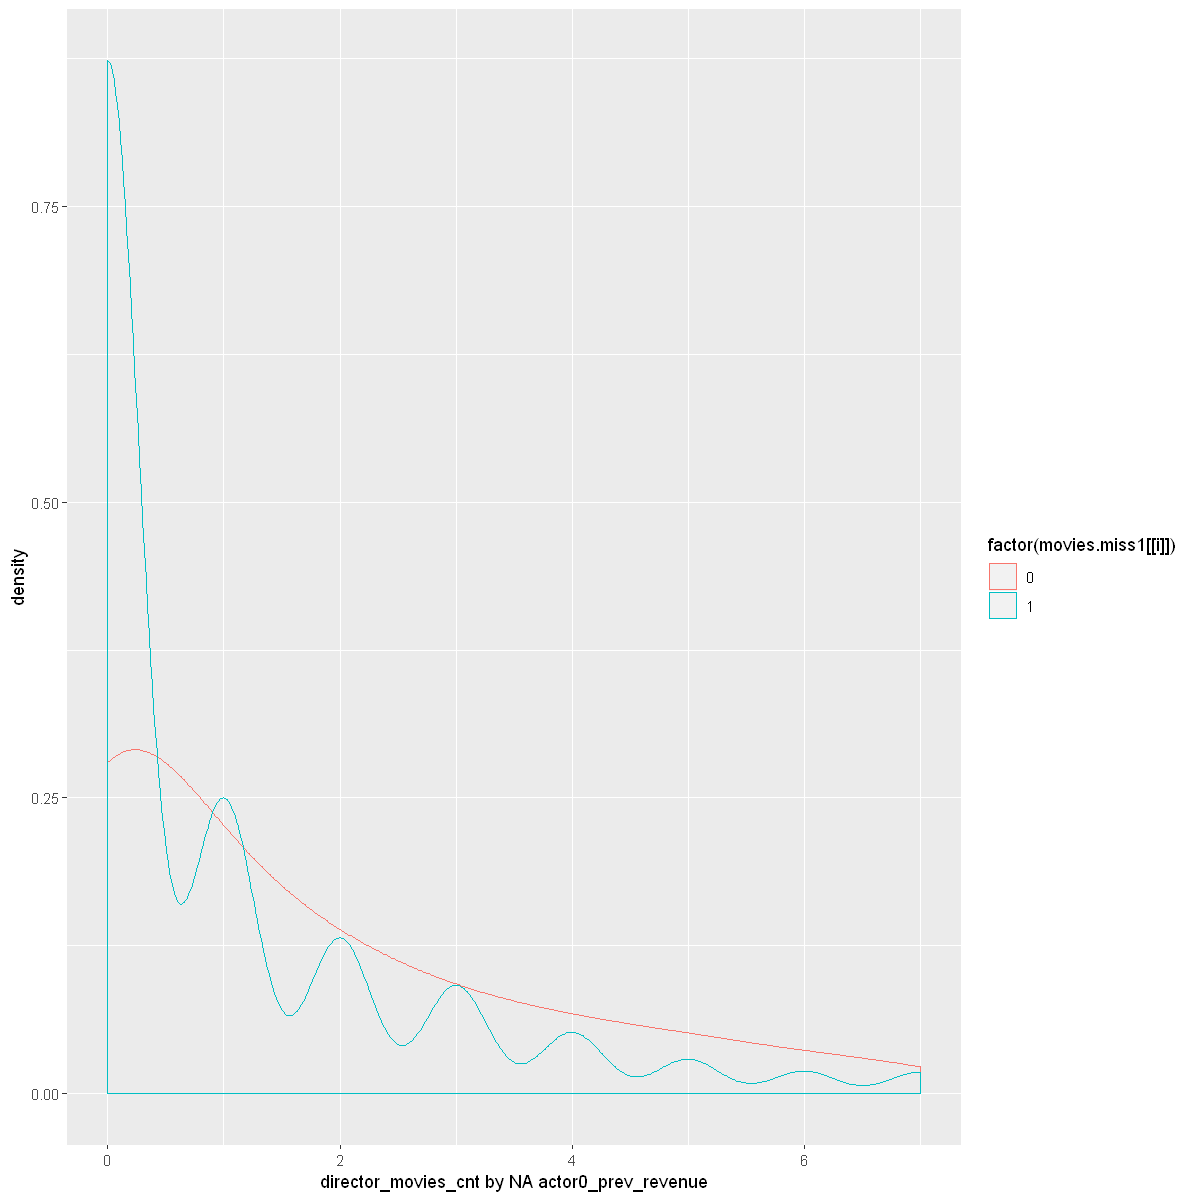


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 11.806, df = 6424.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4408717 0.6164325
sample estimates:
mean of x mean of y 
 1.830262  1.301610 

[1] "depart_Art by NA actor0_prev_revenue"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


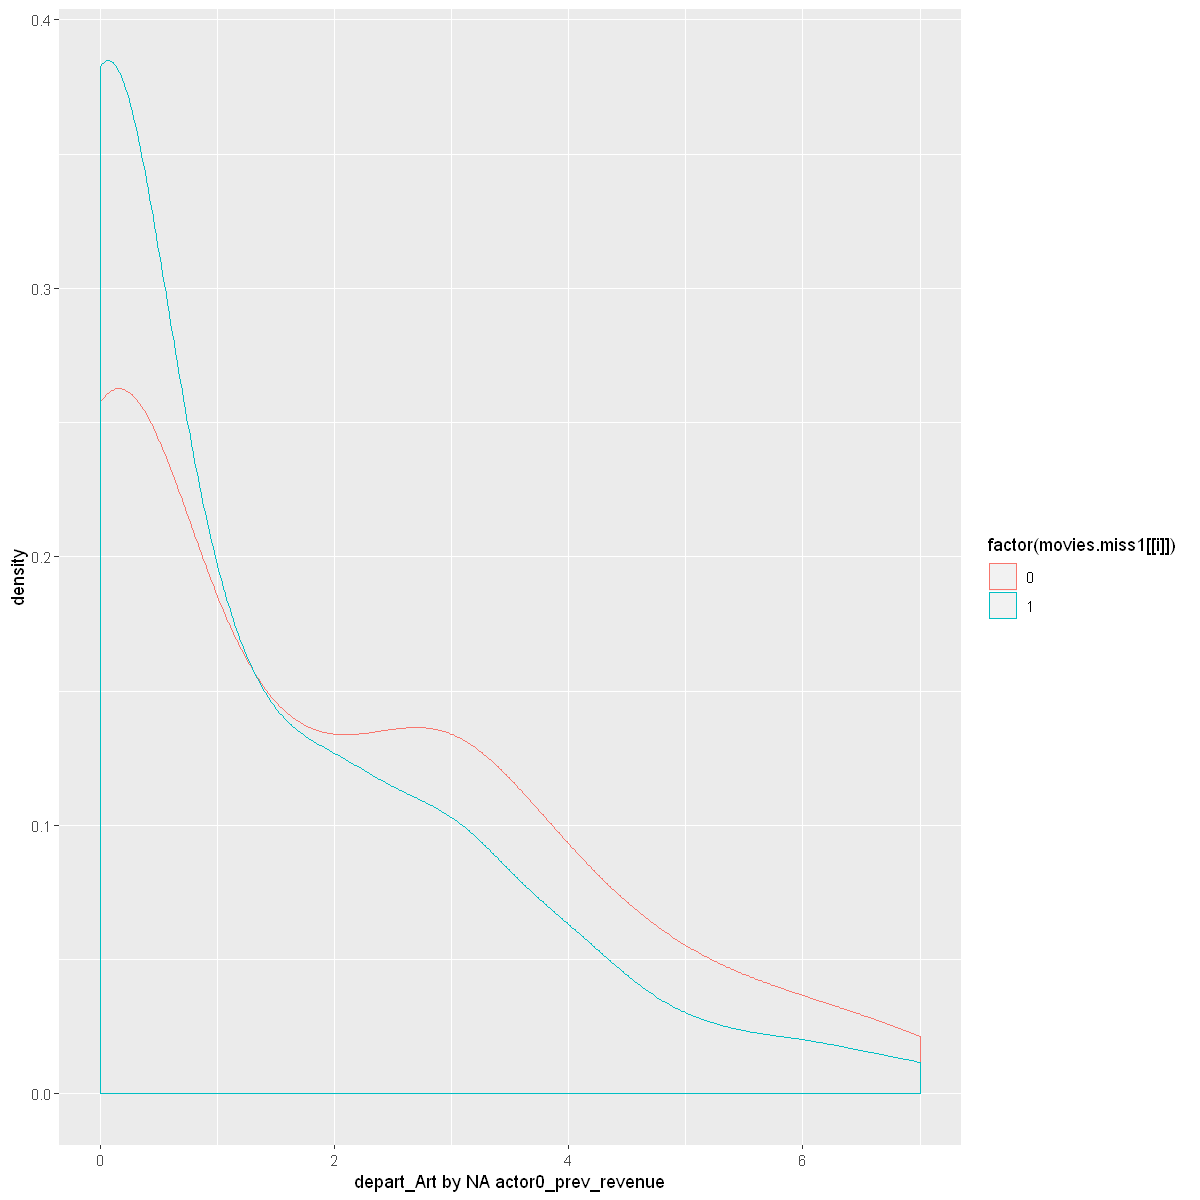


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.2125, df = 6160, p-value = 6.153e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1502191 0.2623568
sample estimates:
mean of x mean of y 
1.1984476 0.9921597 

[1] "depart_Camera by NA actor0_prev_revenue"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


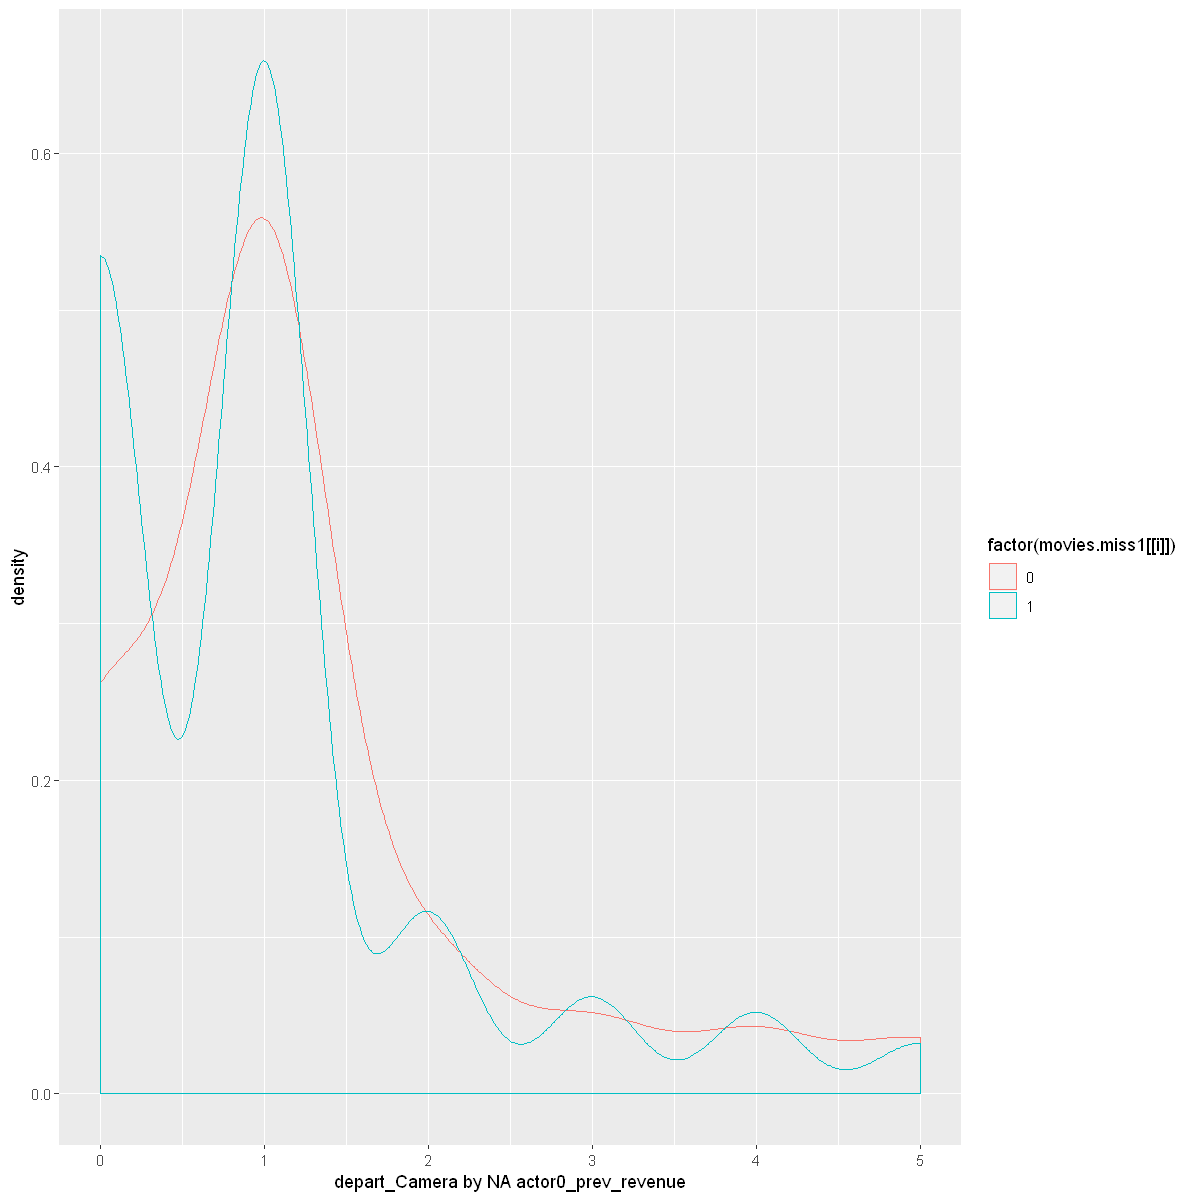


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.3022, df = 6145.3, p-value = 3.19e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1728039 0.2996351
sample estimates:
mean of x mean of y 
0.9787937 0.7425743 

[1] "depart_Custom_Mkup by NA actor0_prev_revenue"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


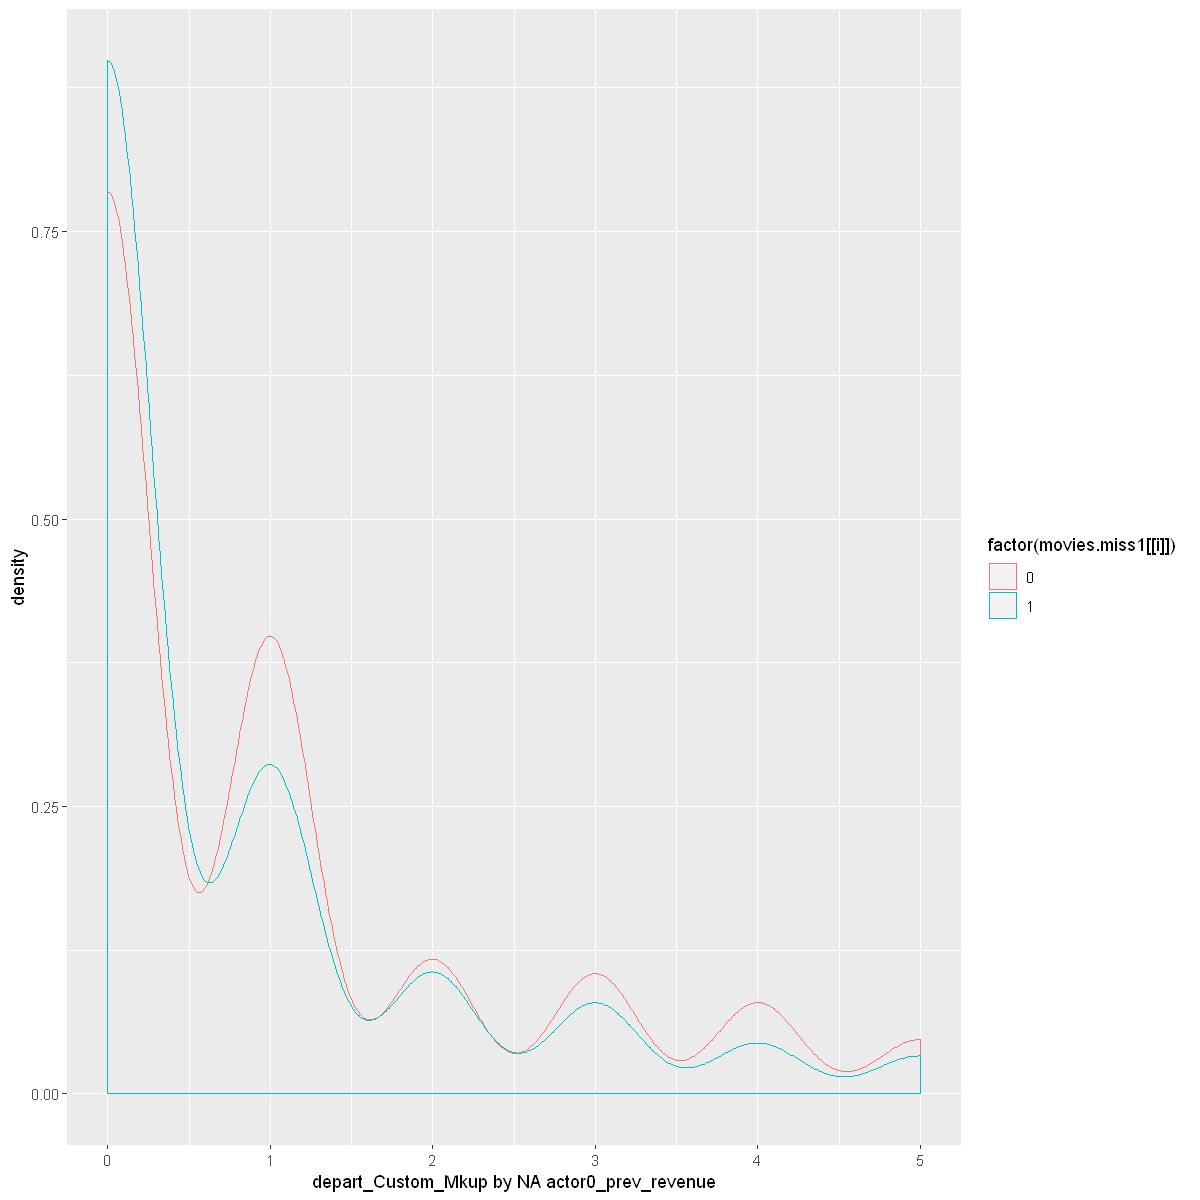


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 6.2385, df = 6481.8, p-value = 4.697e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06651255 0.12746721
sample estimates:
mean of x mean of y 
  1.45260   1.35561 

[1] "depart_Directing by NA actor0_prev_revenue"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


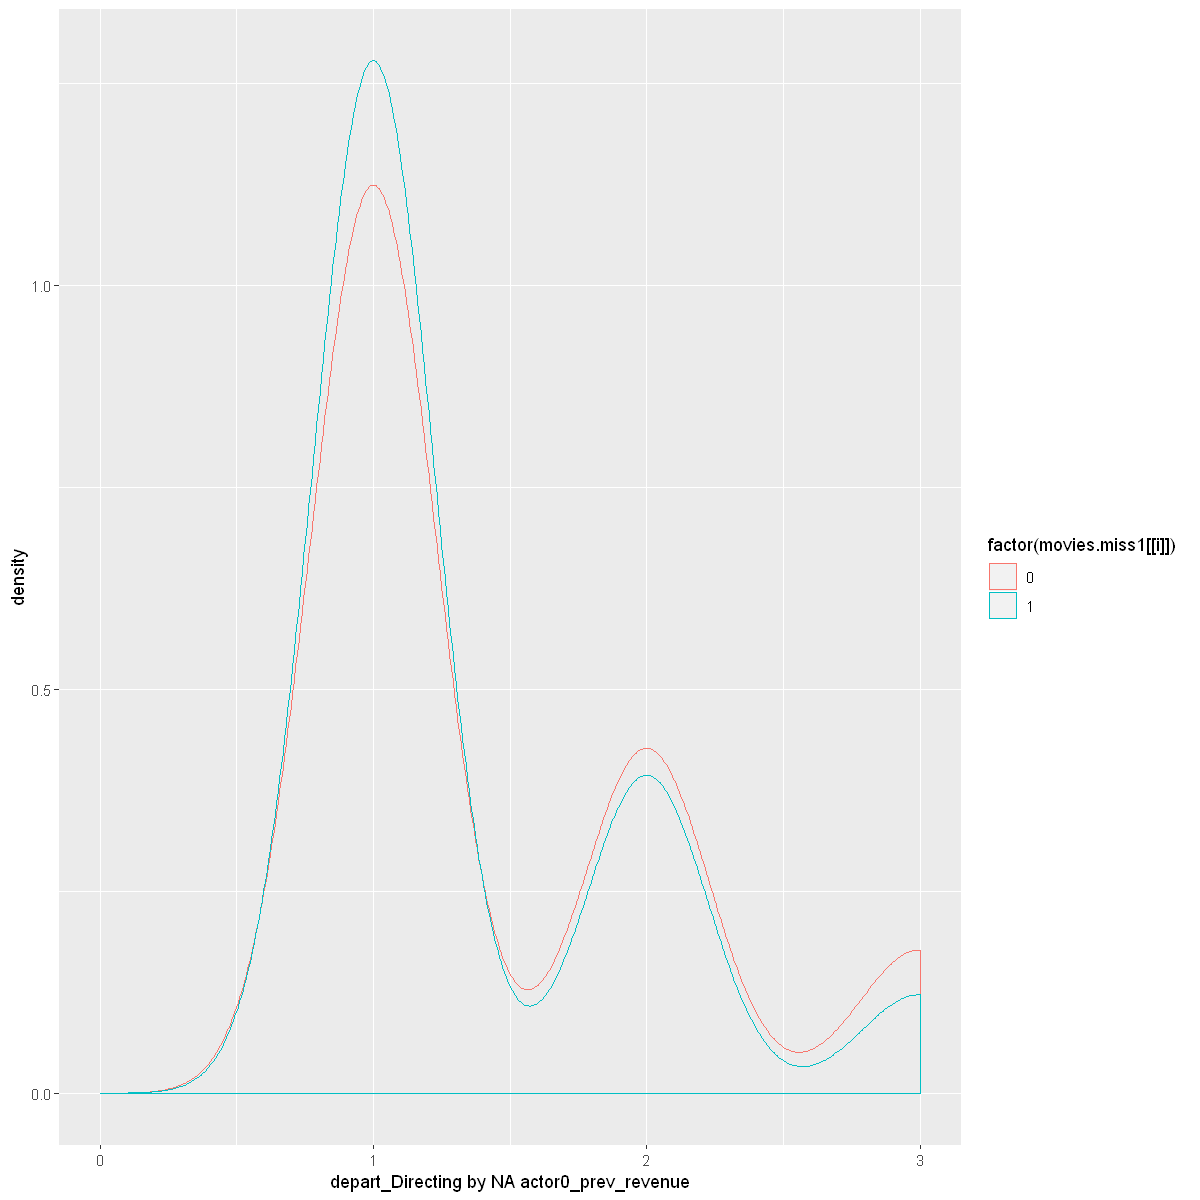


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 4.2071, df = 5573.7, p-value = 2.627e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07957772 0.21844929
sample estimates:
mean of x mean of y 
 1.327571  1.178558 

[1] "depart_Sound by NA actor0_prev_revenue"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


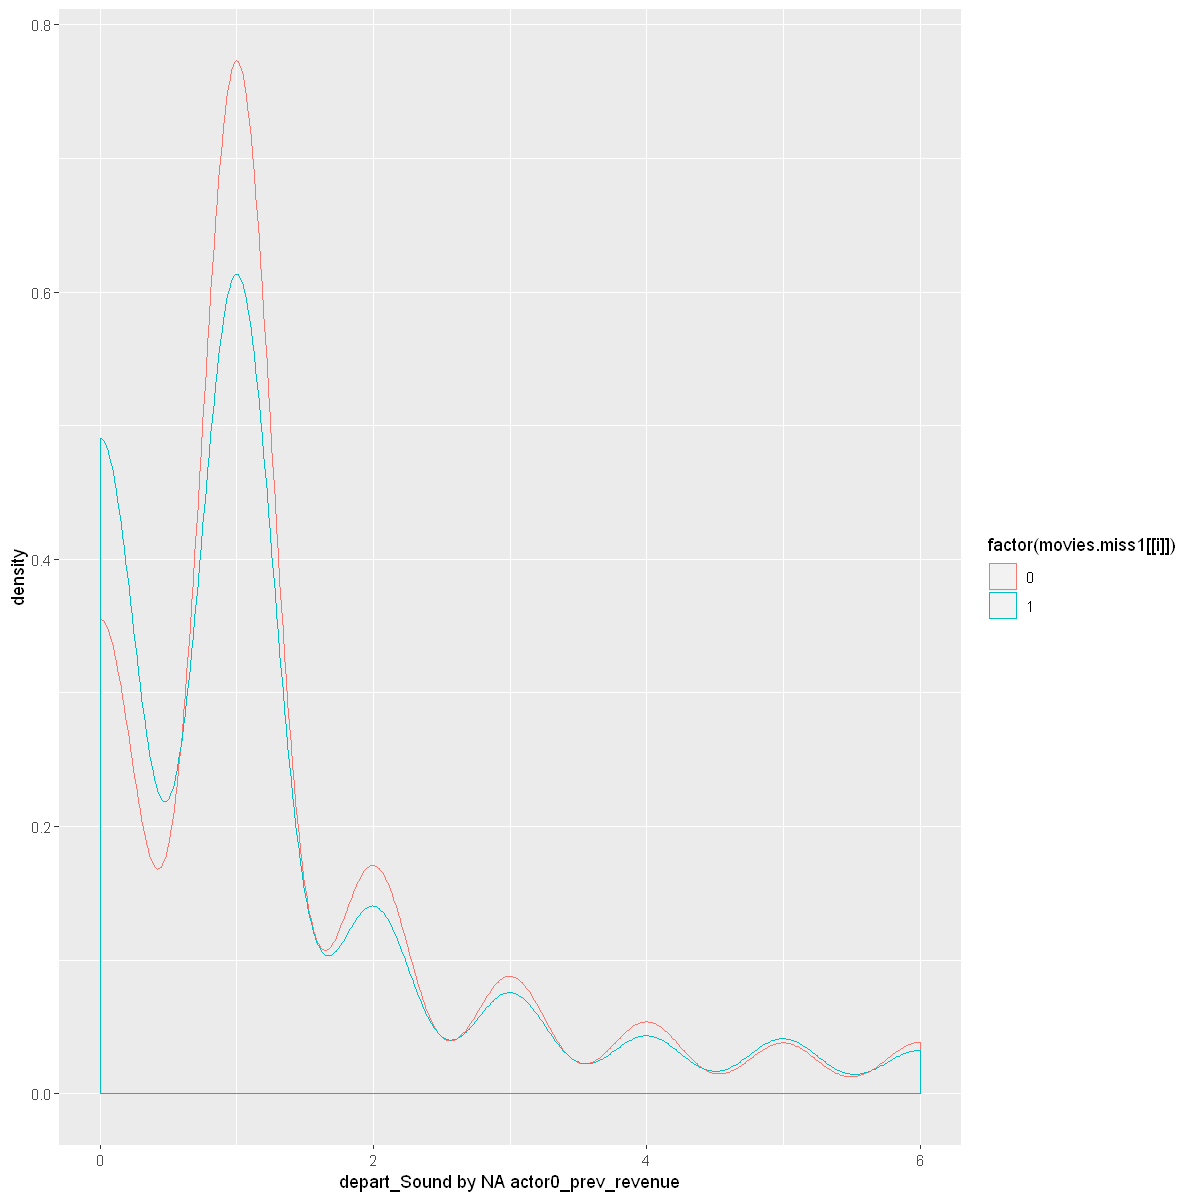


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 4.0225, df = 1934.7, p-value = 5.979e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11242785 32635763
sample estimates:
mean of x mean of y 
 74568686  52629412 

[1] "revenue by NA actor0_prev_revenue"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


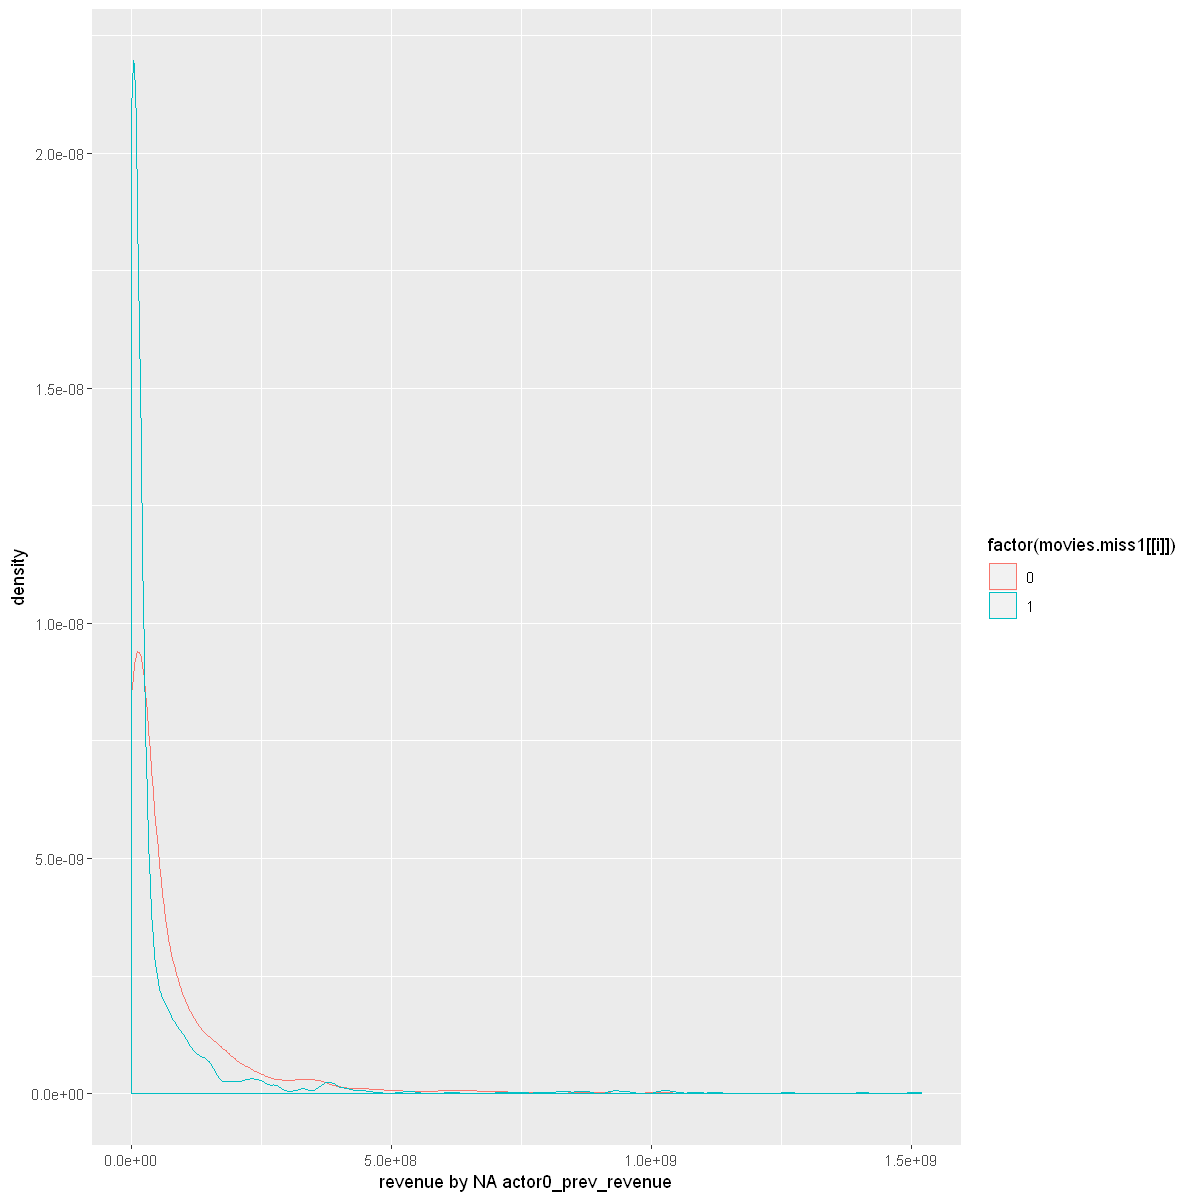


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 18.142, df = 4931.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9703317 12054499
sample estimates:
mean of x mean of y 
 26974494  16095586 

[1] "budget by NA actor1_prev_revenue"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


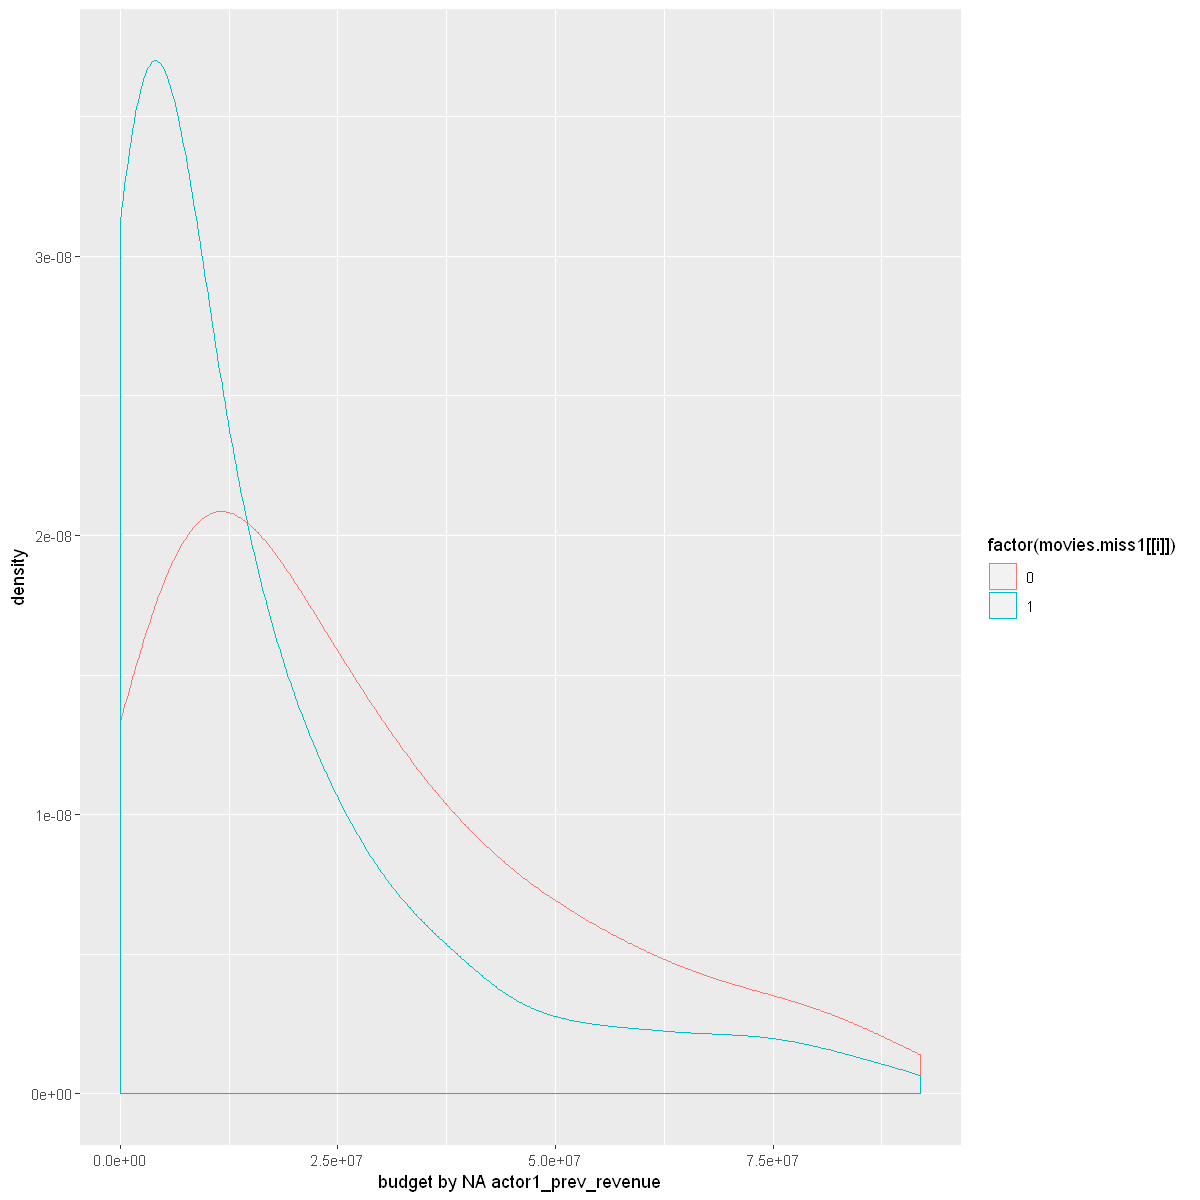


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.03, df = 6854, p-value = 5.03e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1575925 0.3588722
sample estimates:
mean of x mean of y 
 3.028195  2.769963 

[1] "producers_cnt by NA actor1_prev_revenue"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


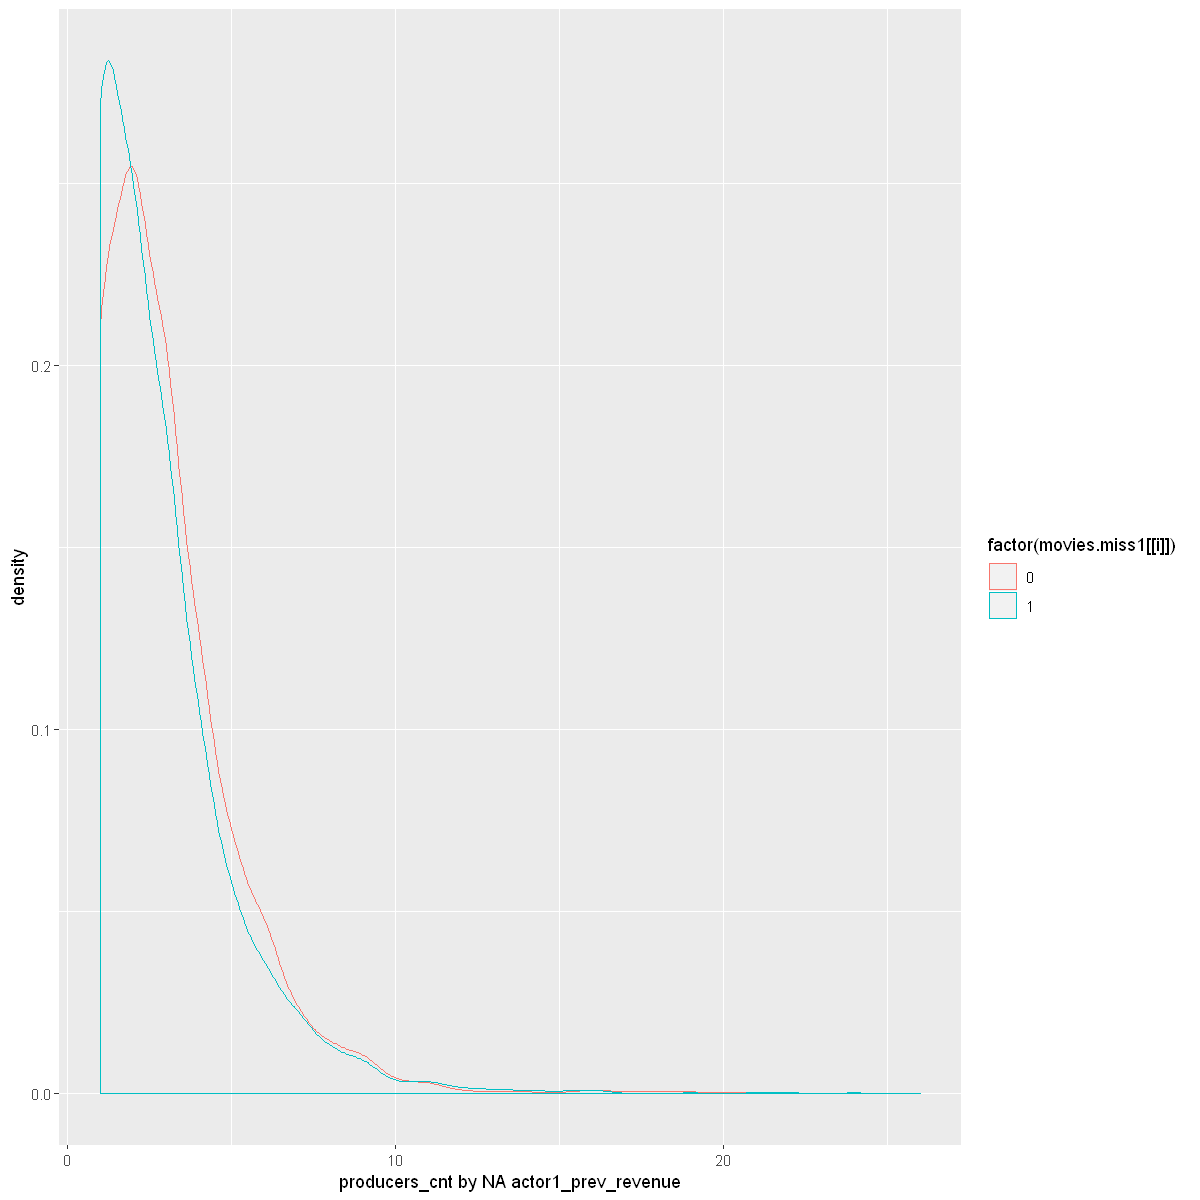


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 57.832, df = 6026.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.538771 5.927445
sample estimates:
mean of x mean of y 
 6.888009  1.154901 

[1] "actor1_movies_cnt by NA actor1_prev_revenue"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


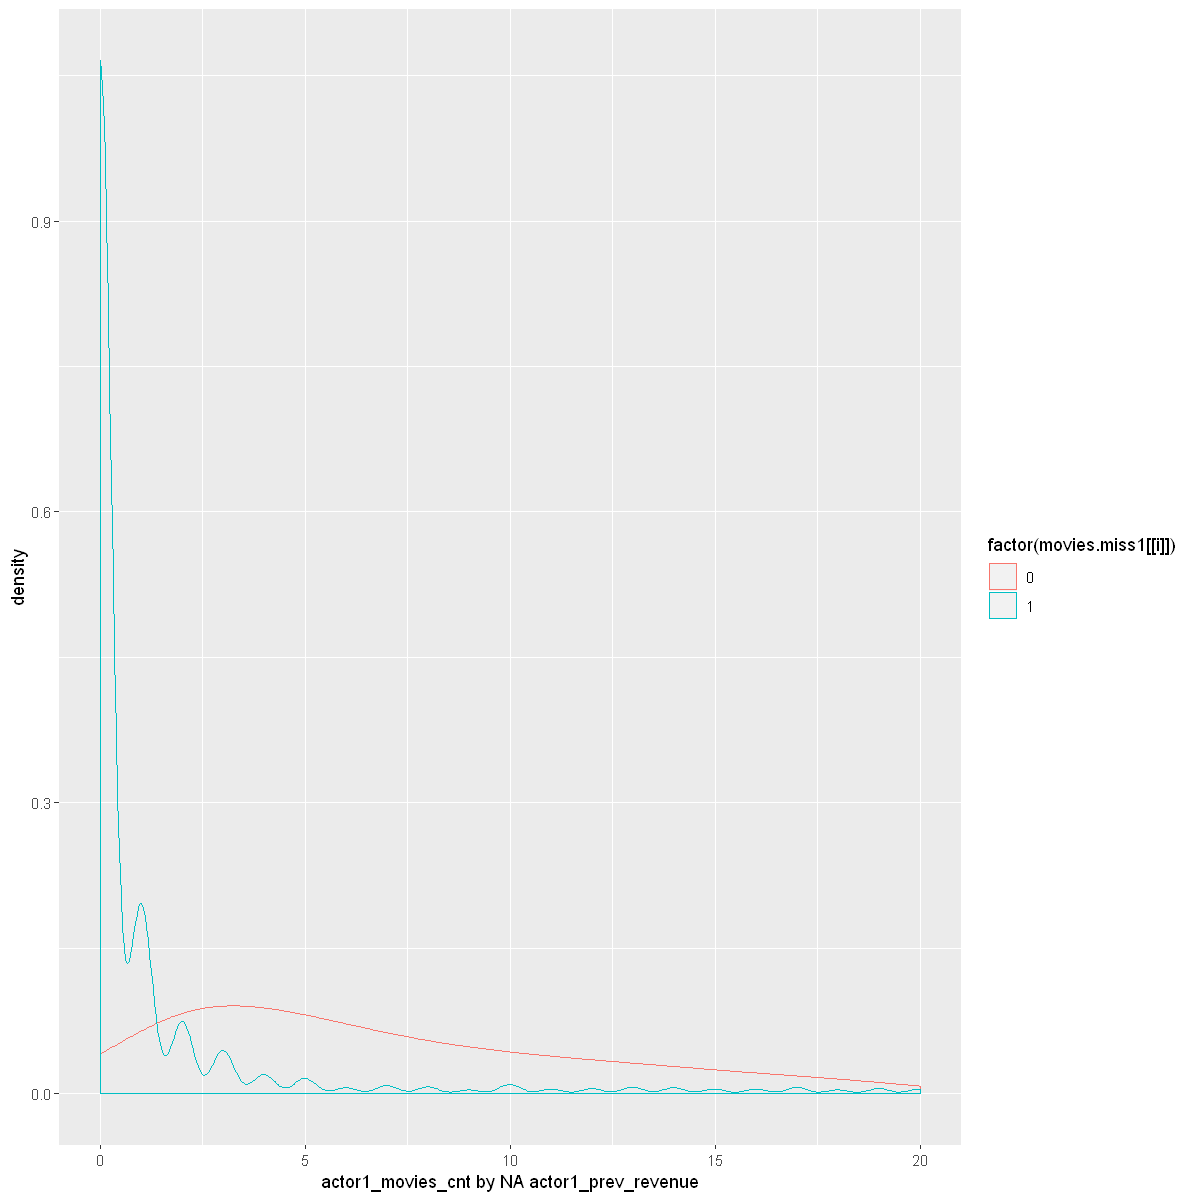


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 32.101, df = 6330.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.880585 3.255290
sample estimates:
mean of x mean of y 
 4.800344  1.732407 

[1] "actor2_movies_cnt by NA actor1_prev_revenue"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


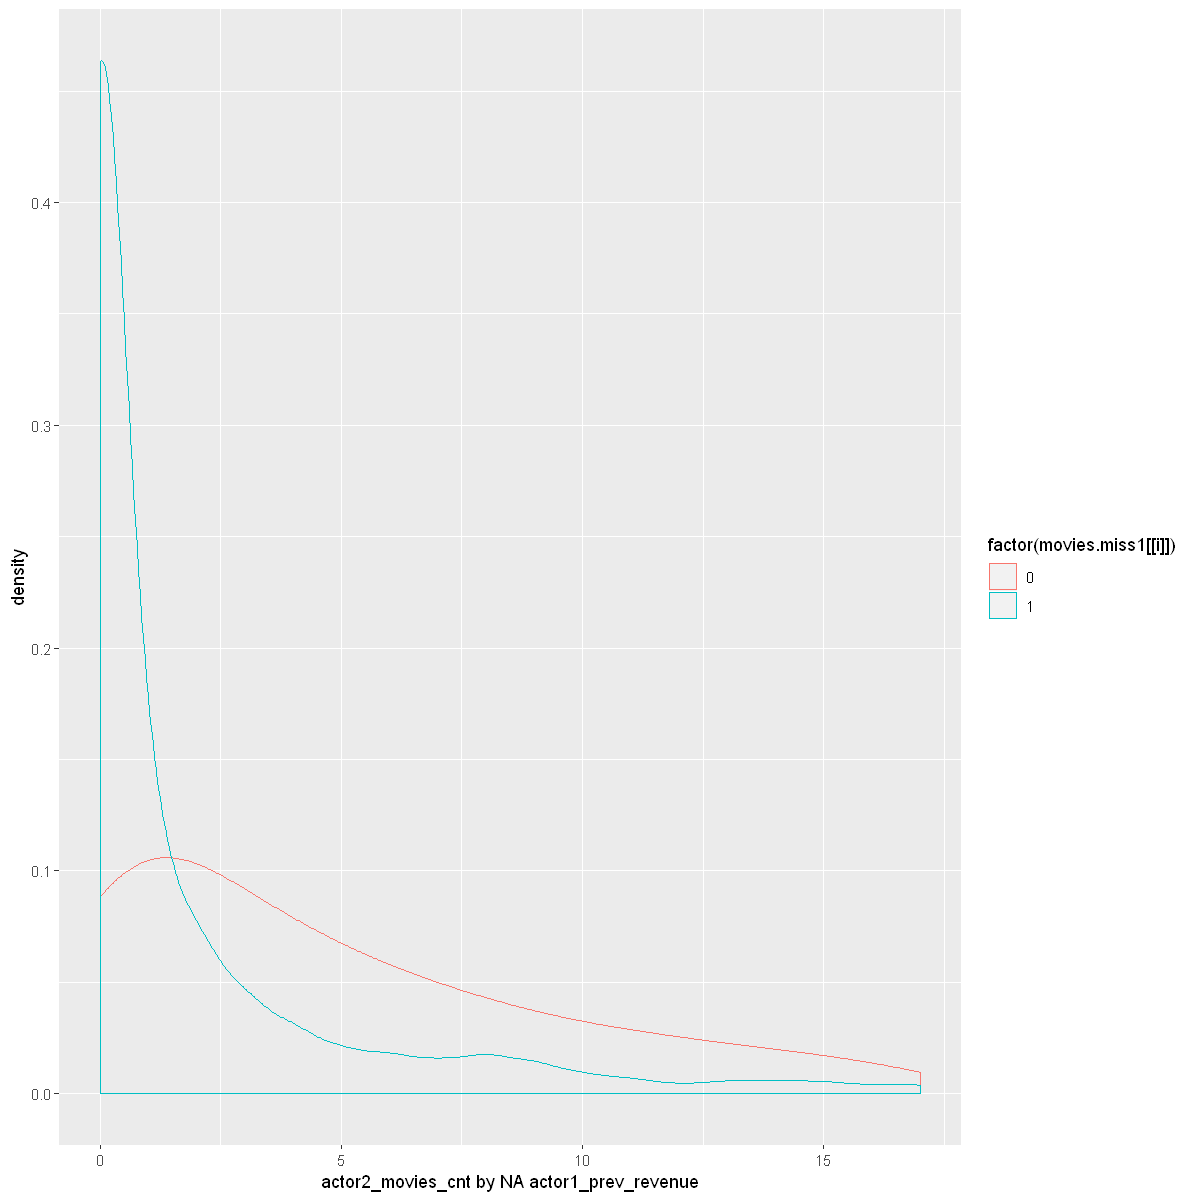


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 6.5482, df = 2428.8, p-value = 7.08e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 24264643 45009521
sample estimates:
mean of x mean of y 
185581207 150944126 

[1] "actor0_prev_revenue by NA actor1_prev_revenue"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


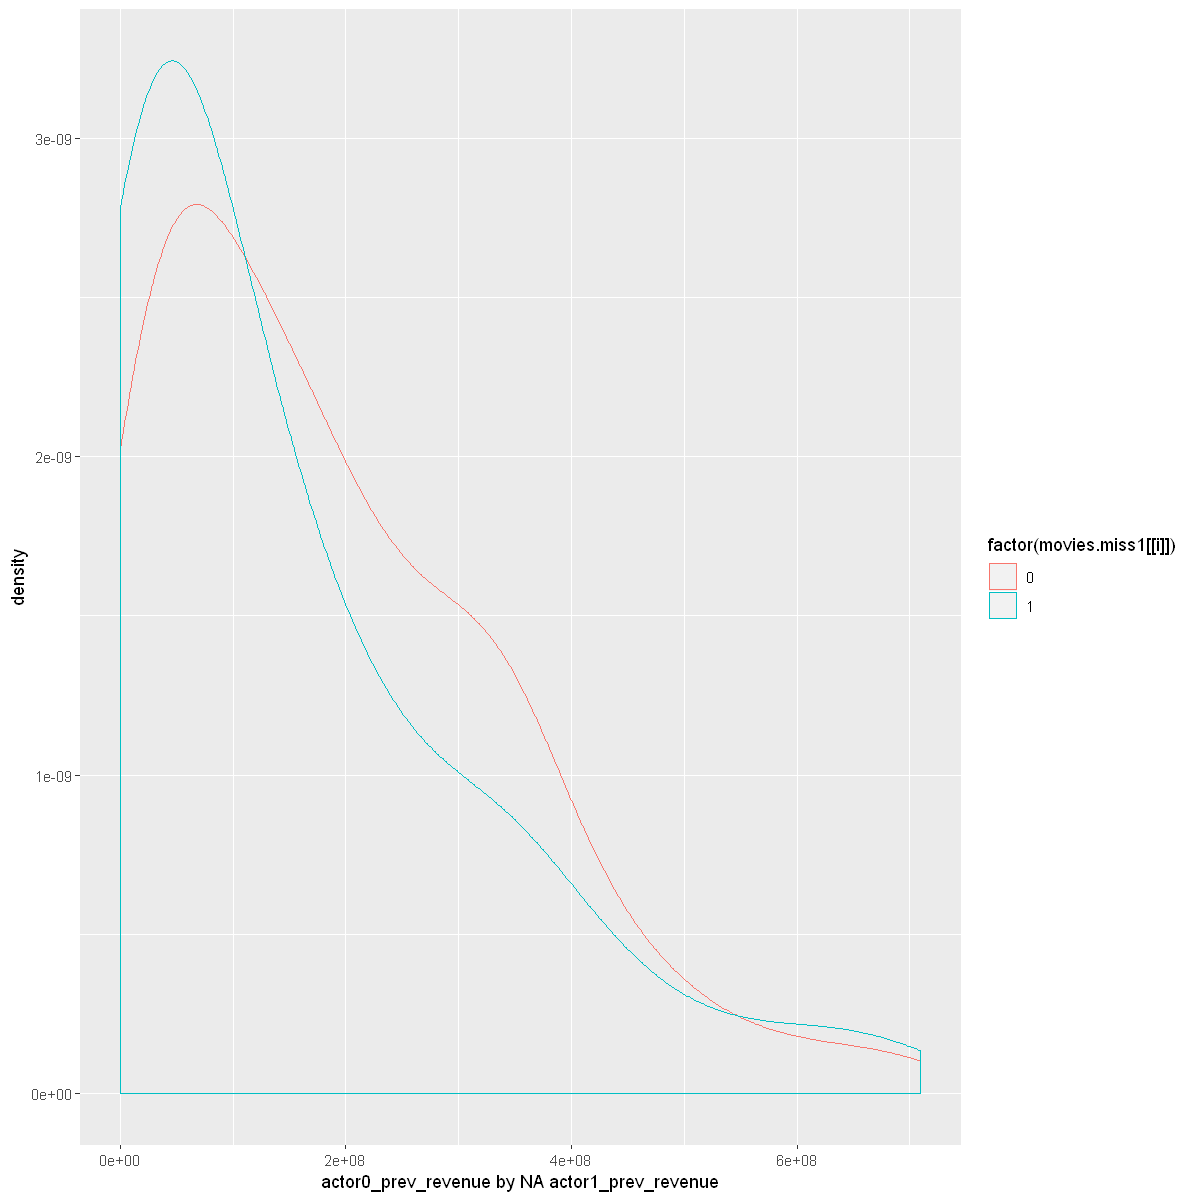


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.2551, df = 1963.8, p-value = 1.64e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15247577 33404346
sample estimates:
mean of x mean of y 
140864004 116538043 

[1] "actor2_prev_revenue by NA actor1_prev_revenue"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


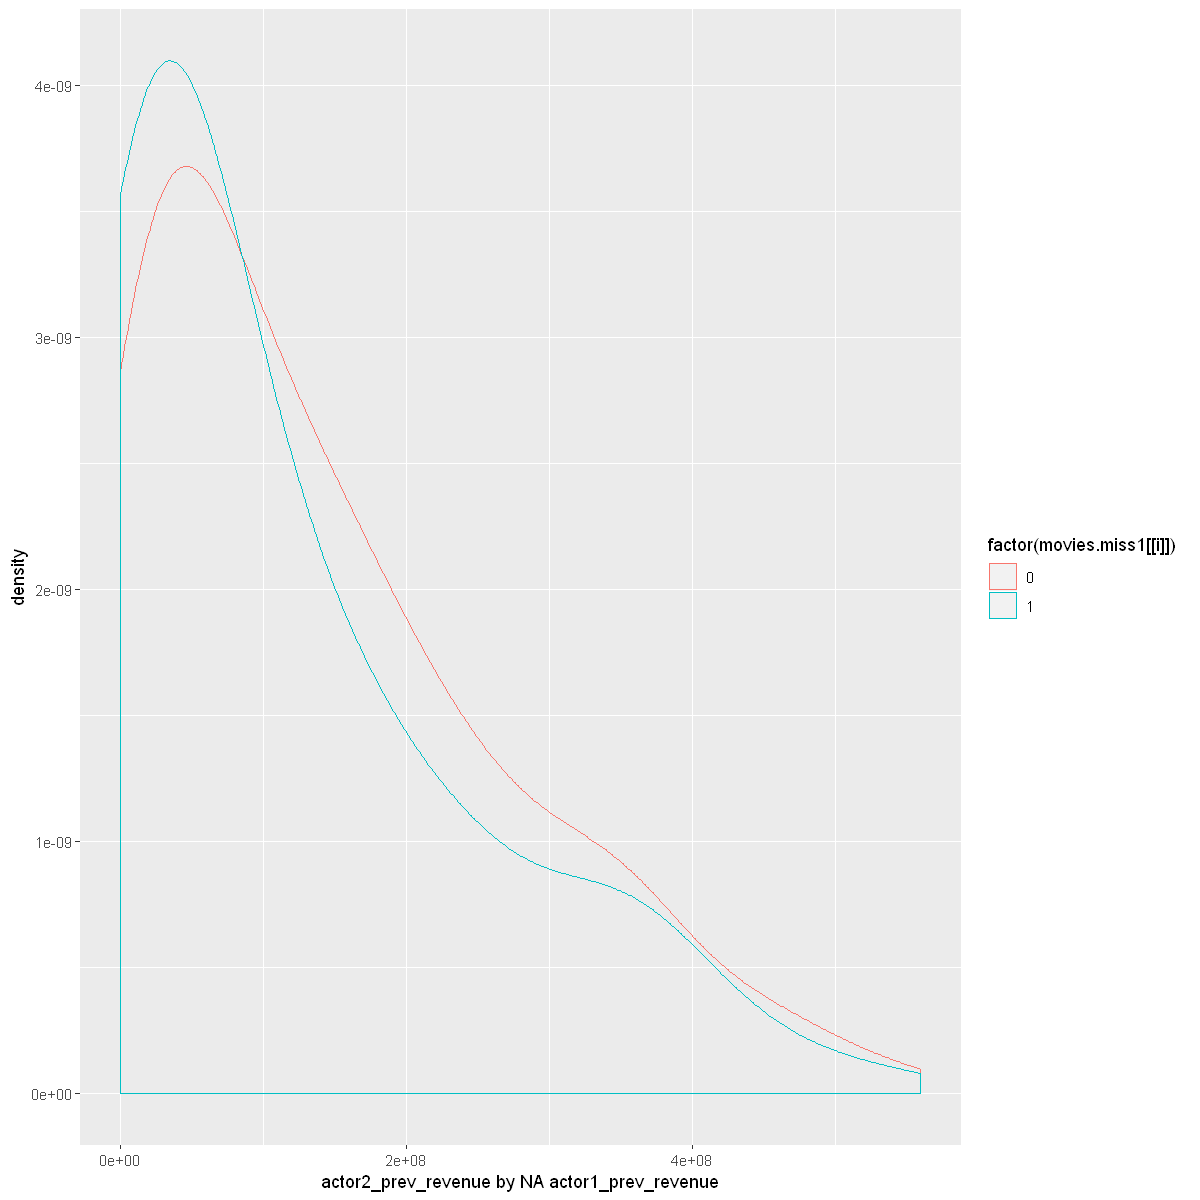


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 14.851, df = 6857.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.546632 0.712890
sample estimates:
mean of x mean of y 
 1.660494  1.030733 

[1] "director_movies_cnt by NA actor1_prev_revenue"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


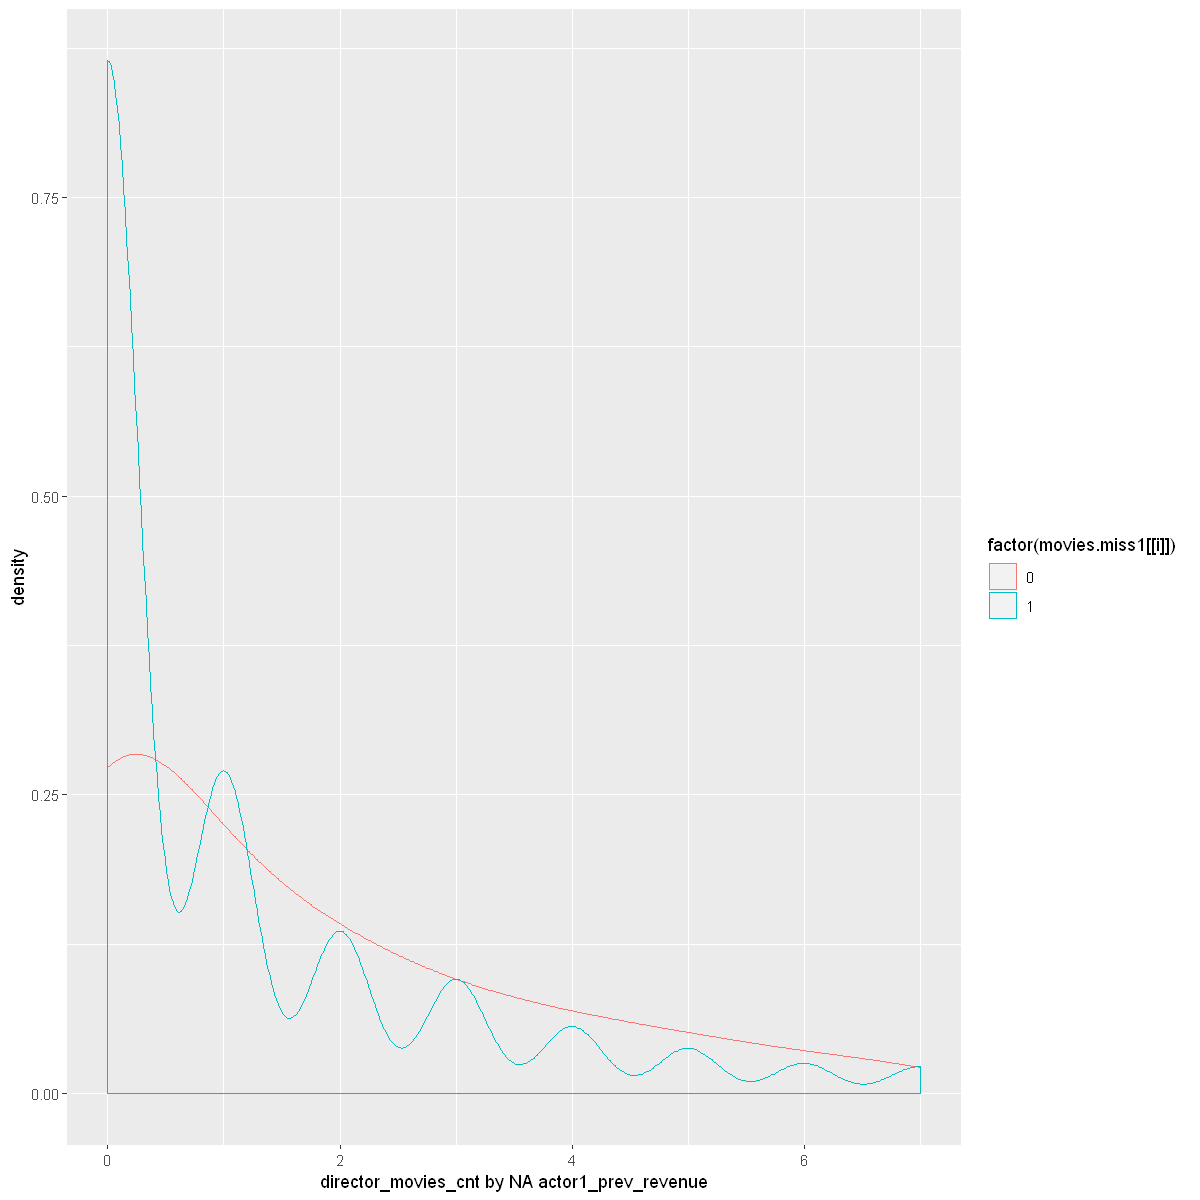


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 10.259, df = 6635.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3751430 0.5523836
sample estimates:
mean of x mean of y 
 1.835350  1.371586 

[1] "depart_Art by NA actor1_prev_revenue"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


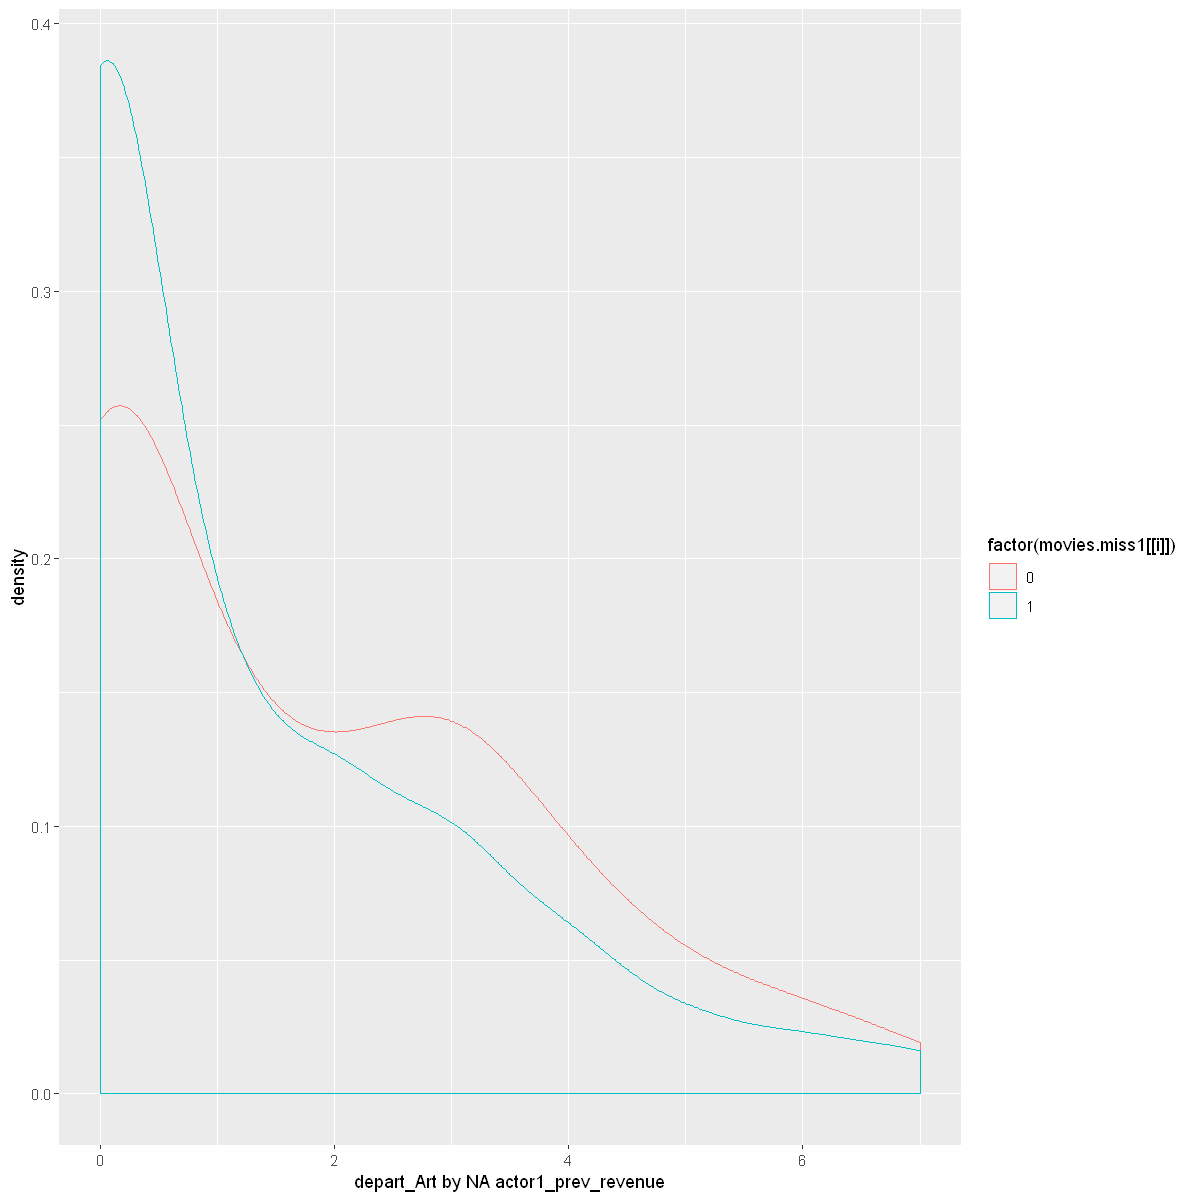


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 6.9287, df = 6668.3, p-value = 4.646e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1409165 0.2521171
sample estimates:
mean of x mean of y 
 1.207299  1.010783 

[1] "depart_Camera by NA actor1_prev_revenue"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


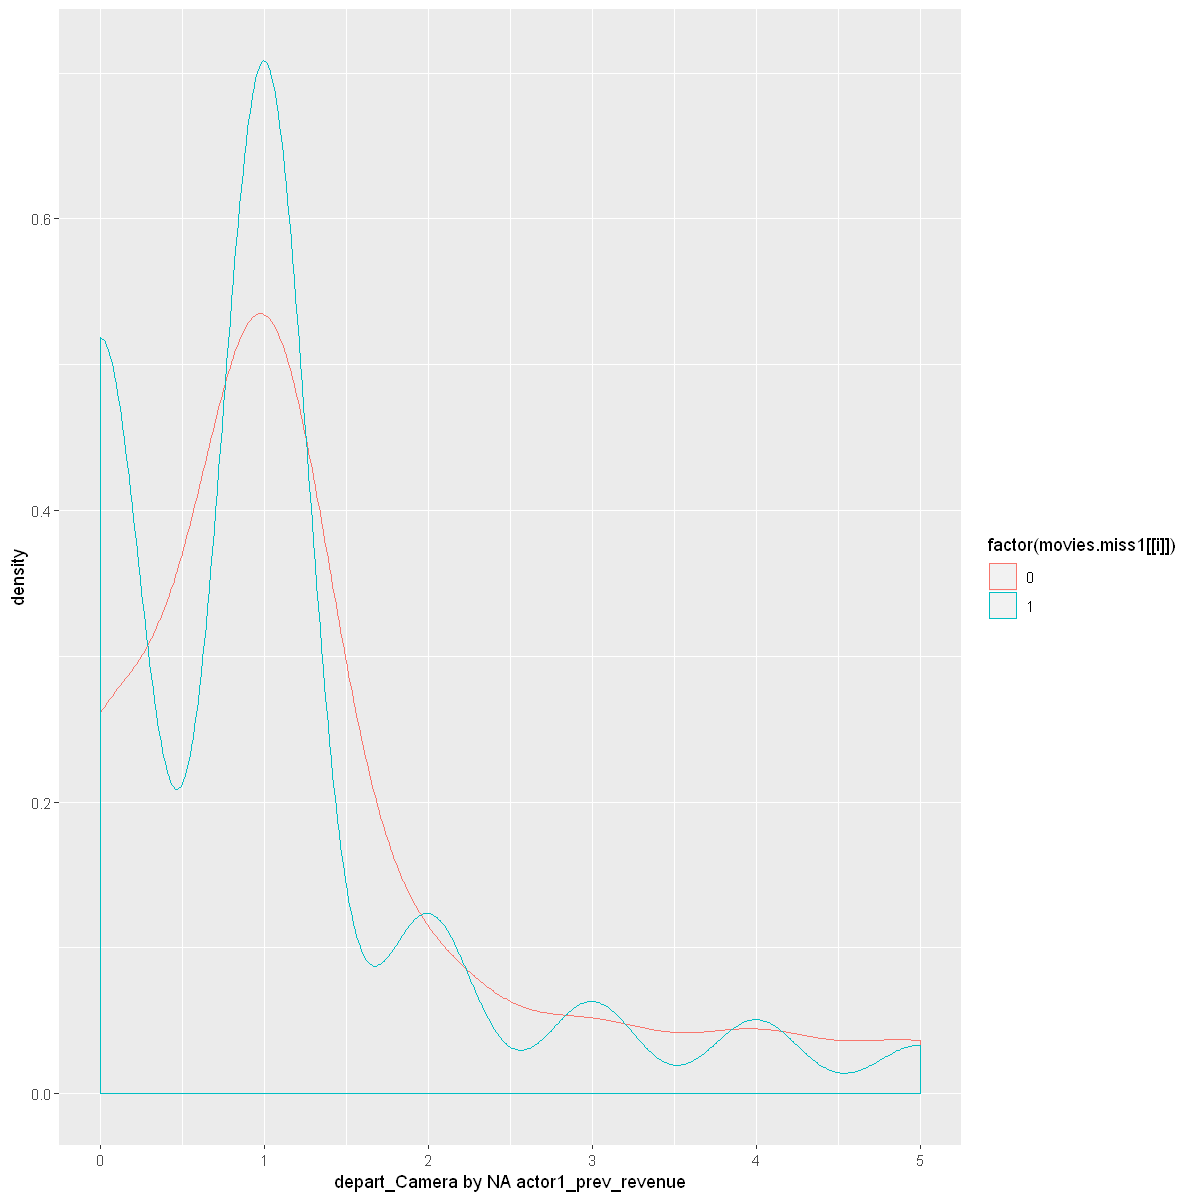


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.6032, df = 6342.8, p-value = 2.192e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1185000 0.2460357
sample estimates:
mean of x mean of y 
0.9680951 0.7858273 

[1] "depart_Custom_Mkup by NA actor1_prev_revenue"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


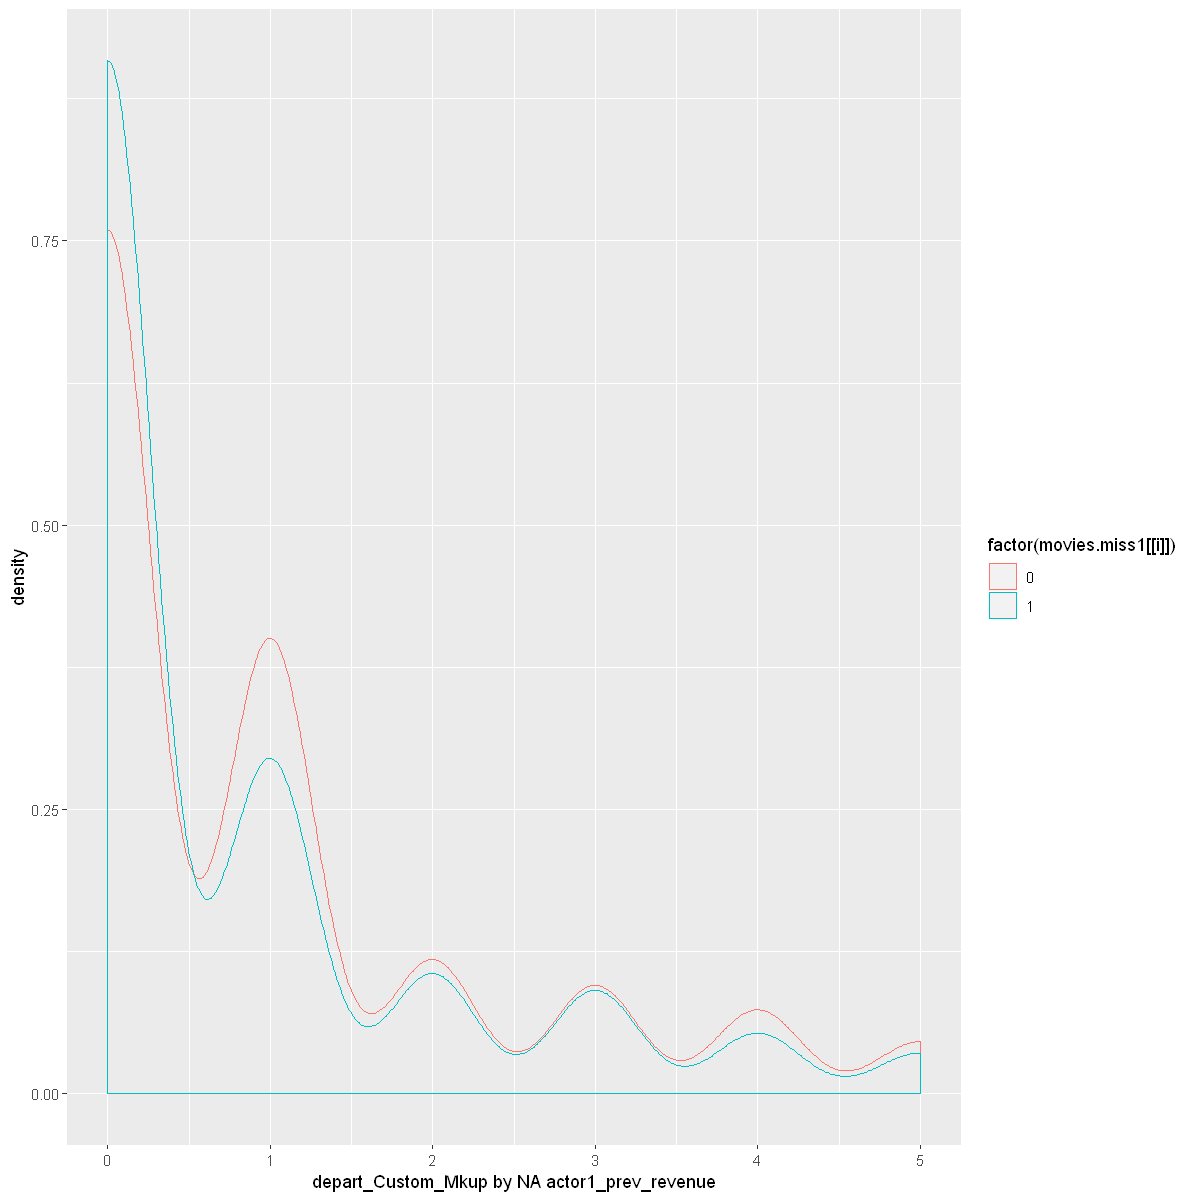


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 6.6354, df = 6859.4, p-value = 3.482e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07269791 0.13366318
sample estimates:
mean of x mean of y 
 1.461992  1.358811 

[1] "depart_Directing by NA actor1_prev_revenue"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


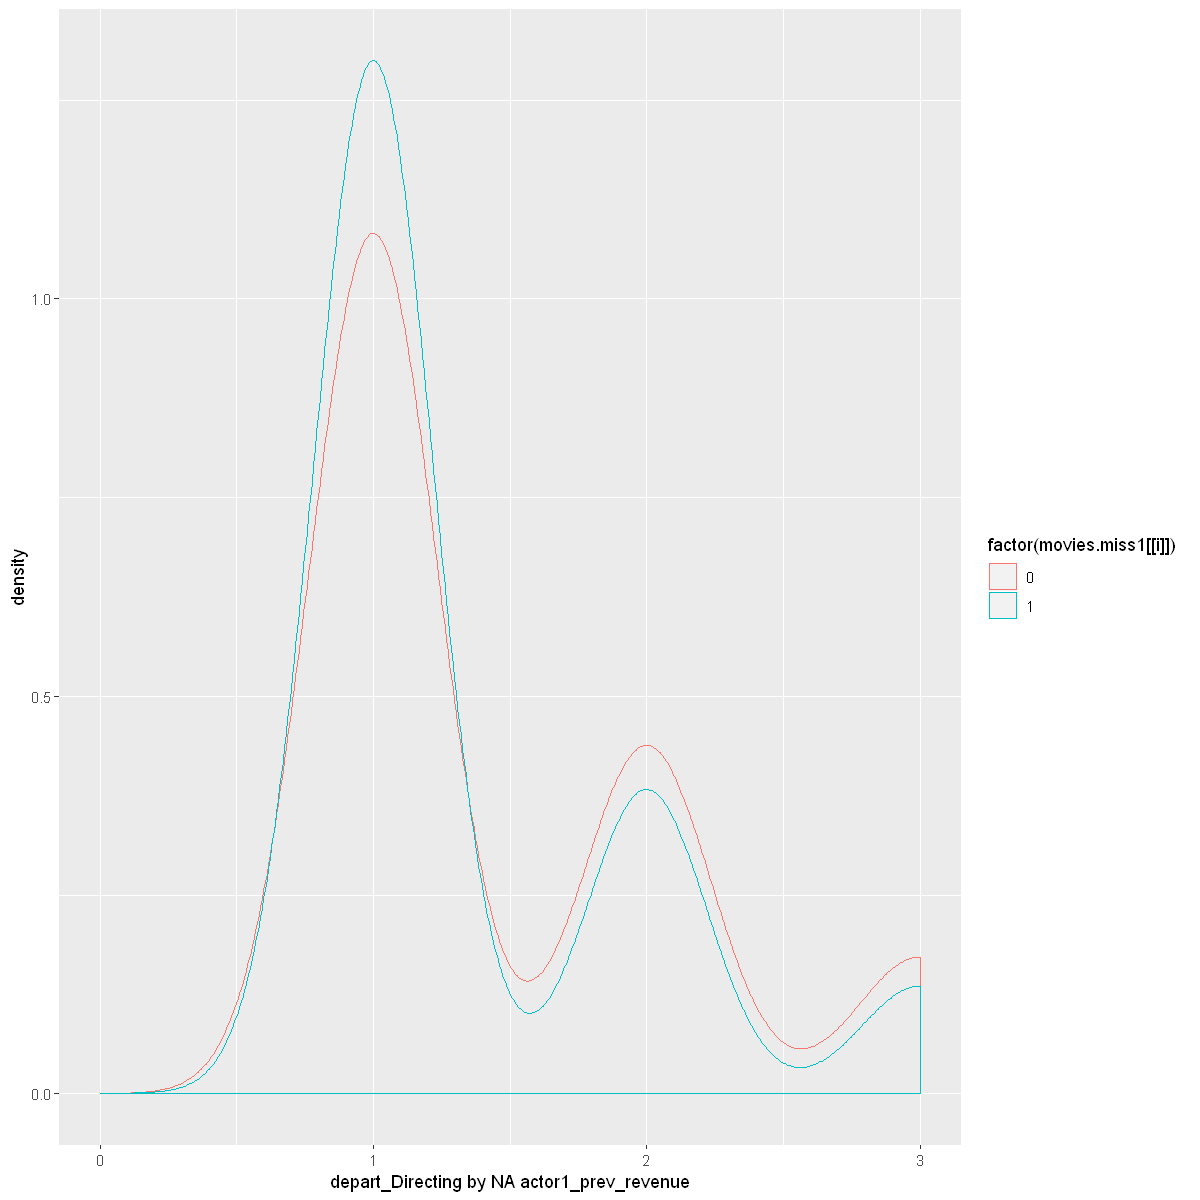


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.2999, df = 6088.7, p-value = 0.0009727
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04686178 0.18401841
sample estimates:
mean of x mean of y 
 1.320915  1.205475 

[1] "depart_Sound by NA actor1_prev_revenue"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


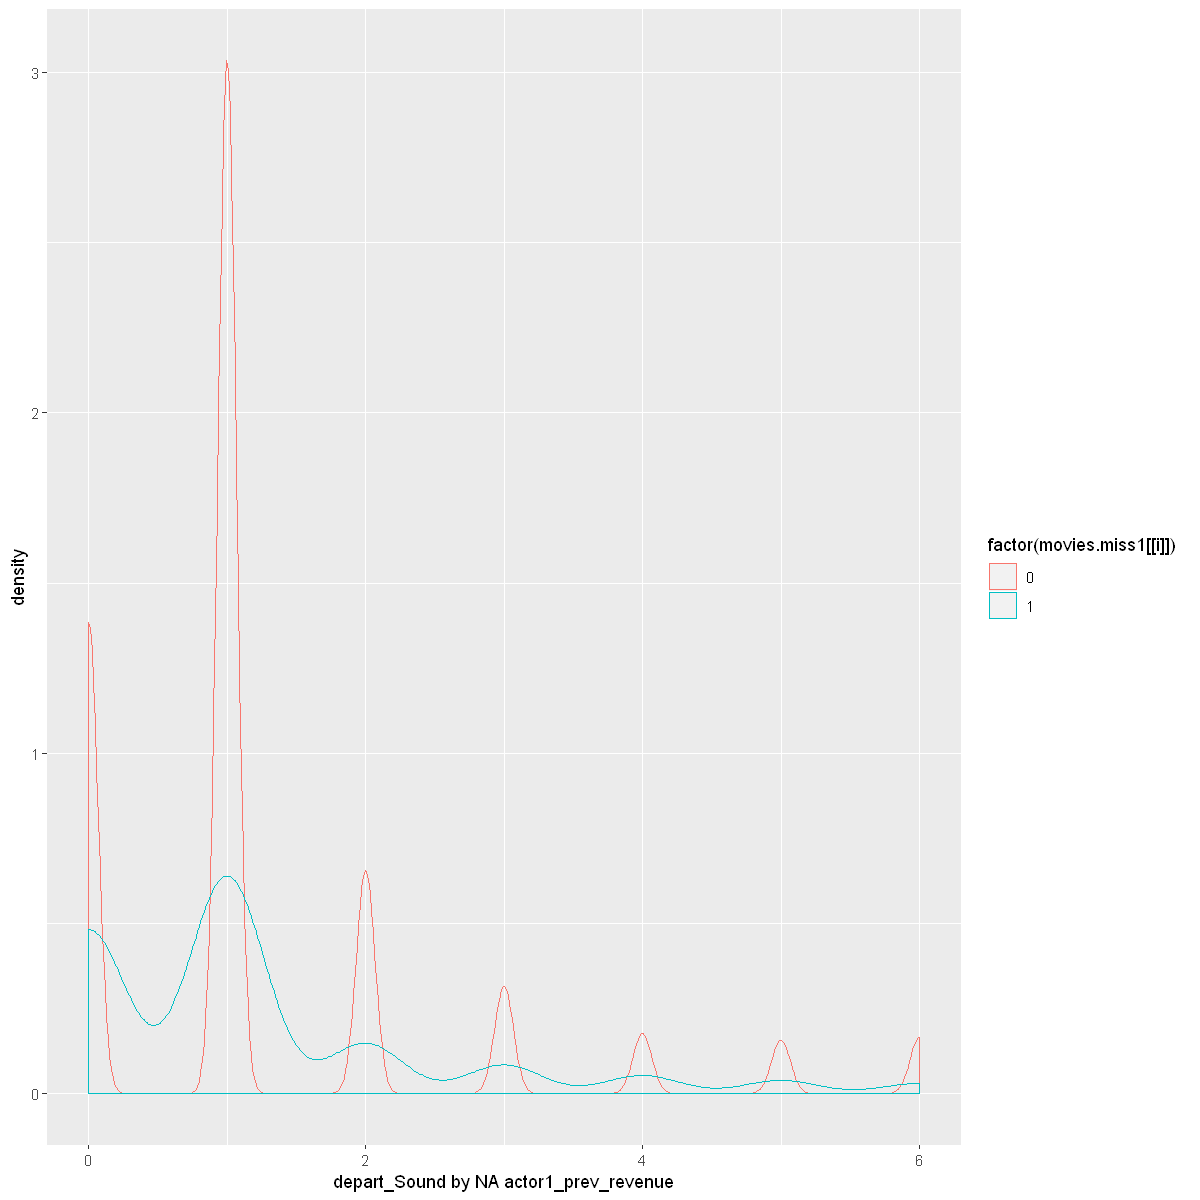


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.1579, df = 2837.4, p-value = 2.669e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 16065175 35770922
sample estimates:
mean of x mean of y 
 78015500  52097451 

[1] "revenue by NA actor1_prev_revenue"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


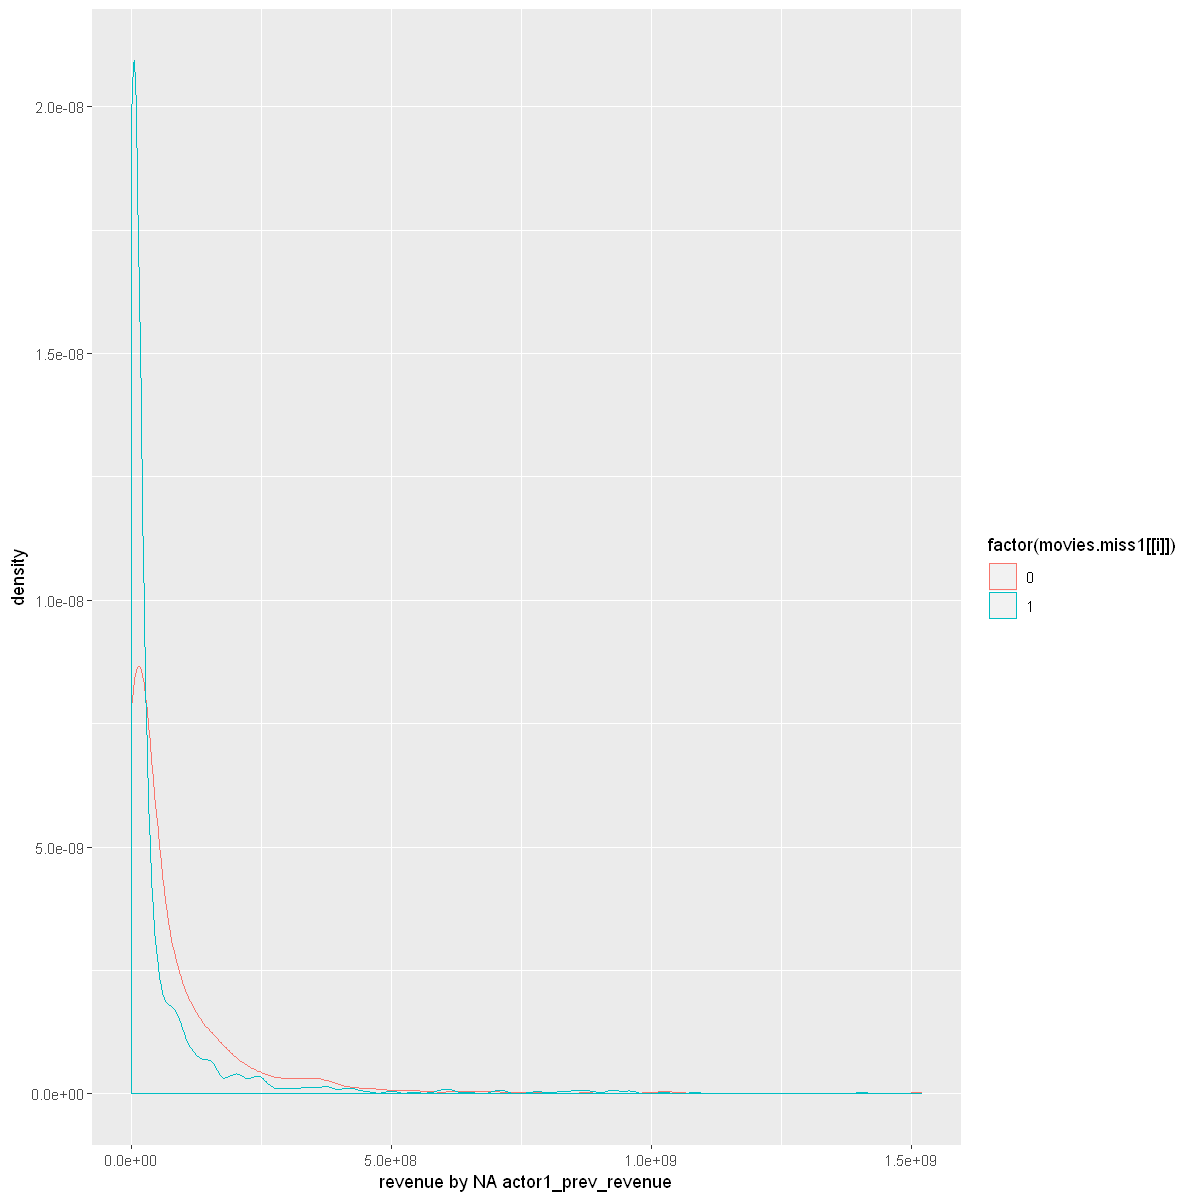


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 16.766, df = 4960.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8942213 11310387
sample estimates:
mean of x mean of y 
 26941526  16815226 

[1] "budget by NA actor2_prev_revenue"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


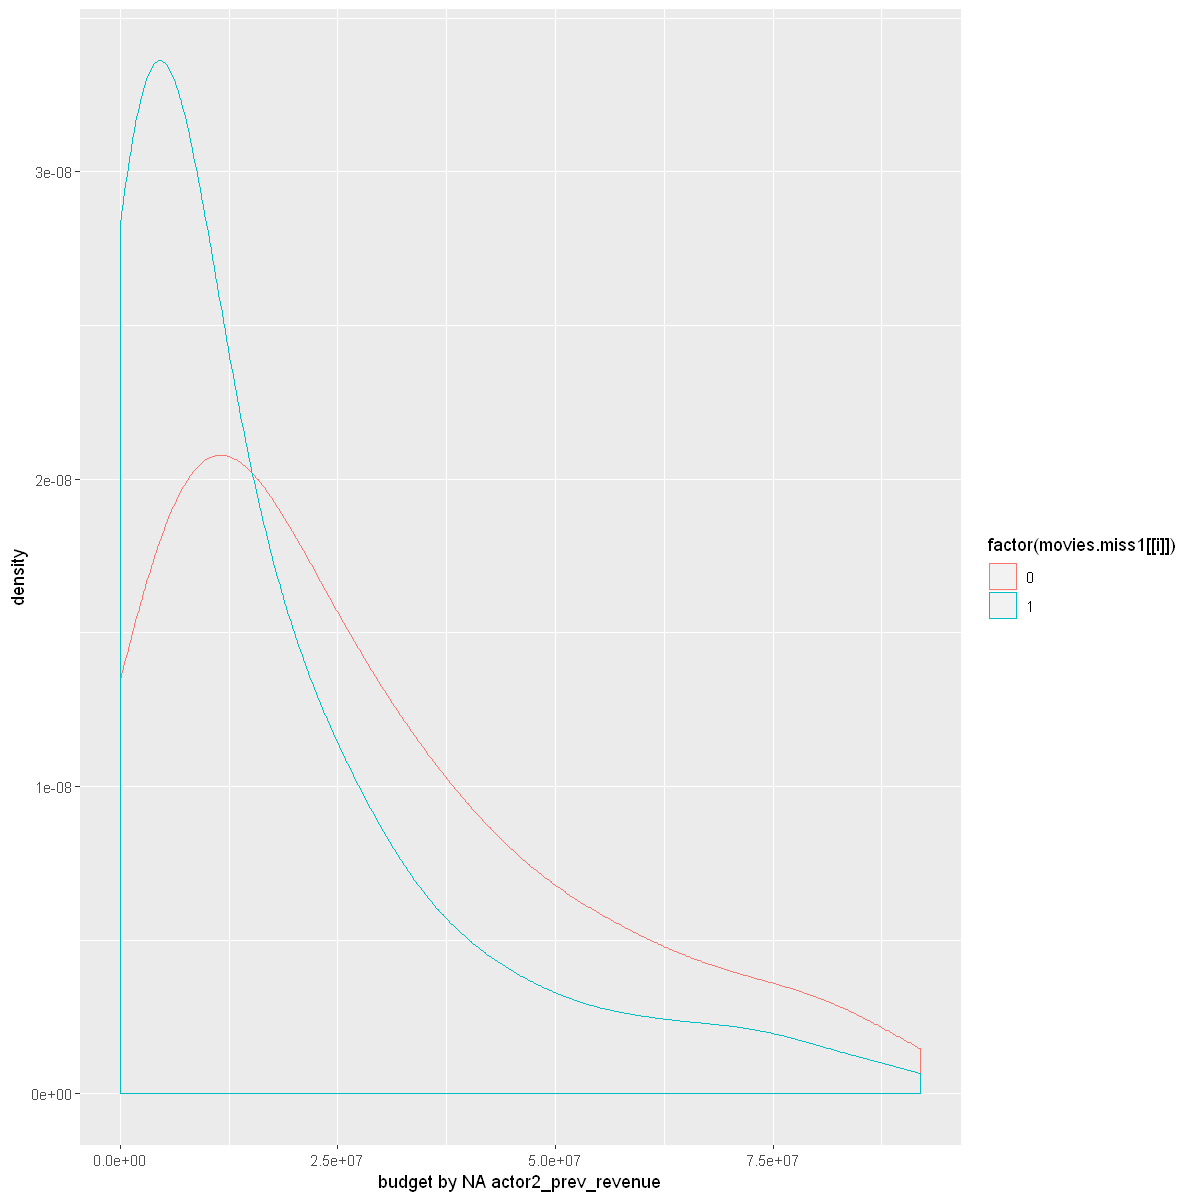


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 4.1439, df = 6965.8, p-value = 3.455e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1119411 0.3129314
sample estimates:
mean of x mean of y 
 3.013072  2.800636 

[1] "producers_cnt by NA actor2_prev_revenue"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


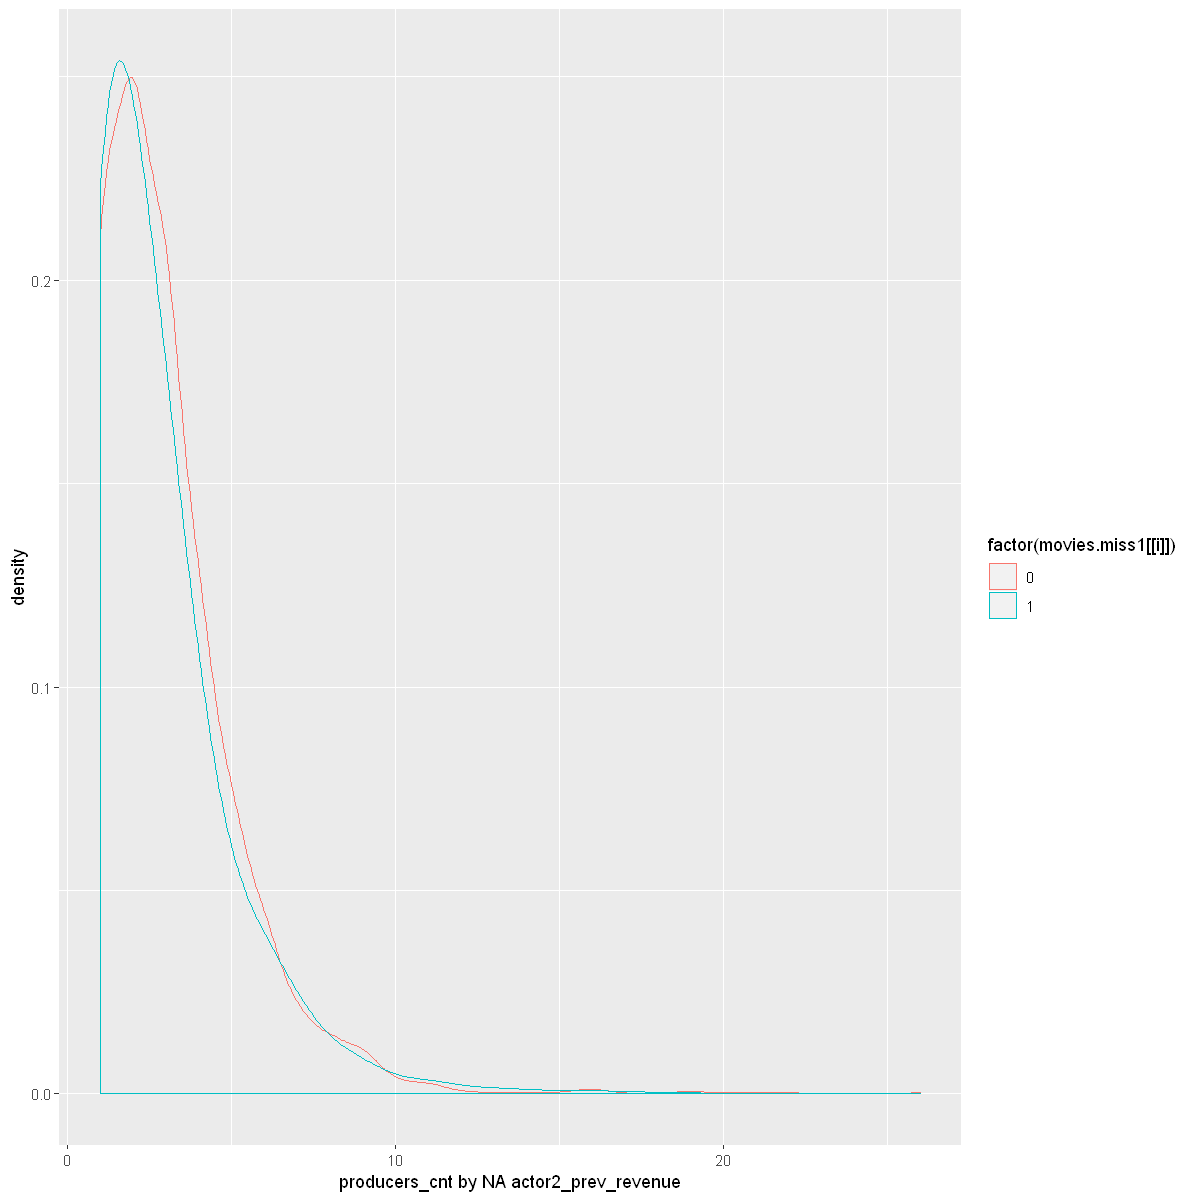


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 32.84, df = 6038.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.527925 3.975857
sample estimates:
mean of x mean of y 
 6.030751  2.278859 

[1] "actor1_movies_cnt by NA actor2_prev_revenue"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


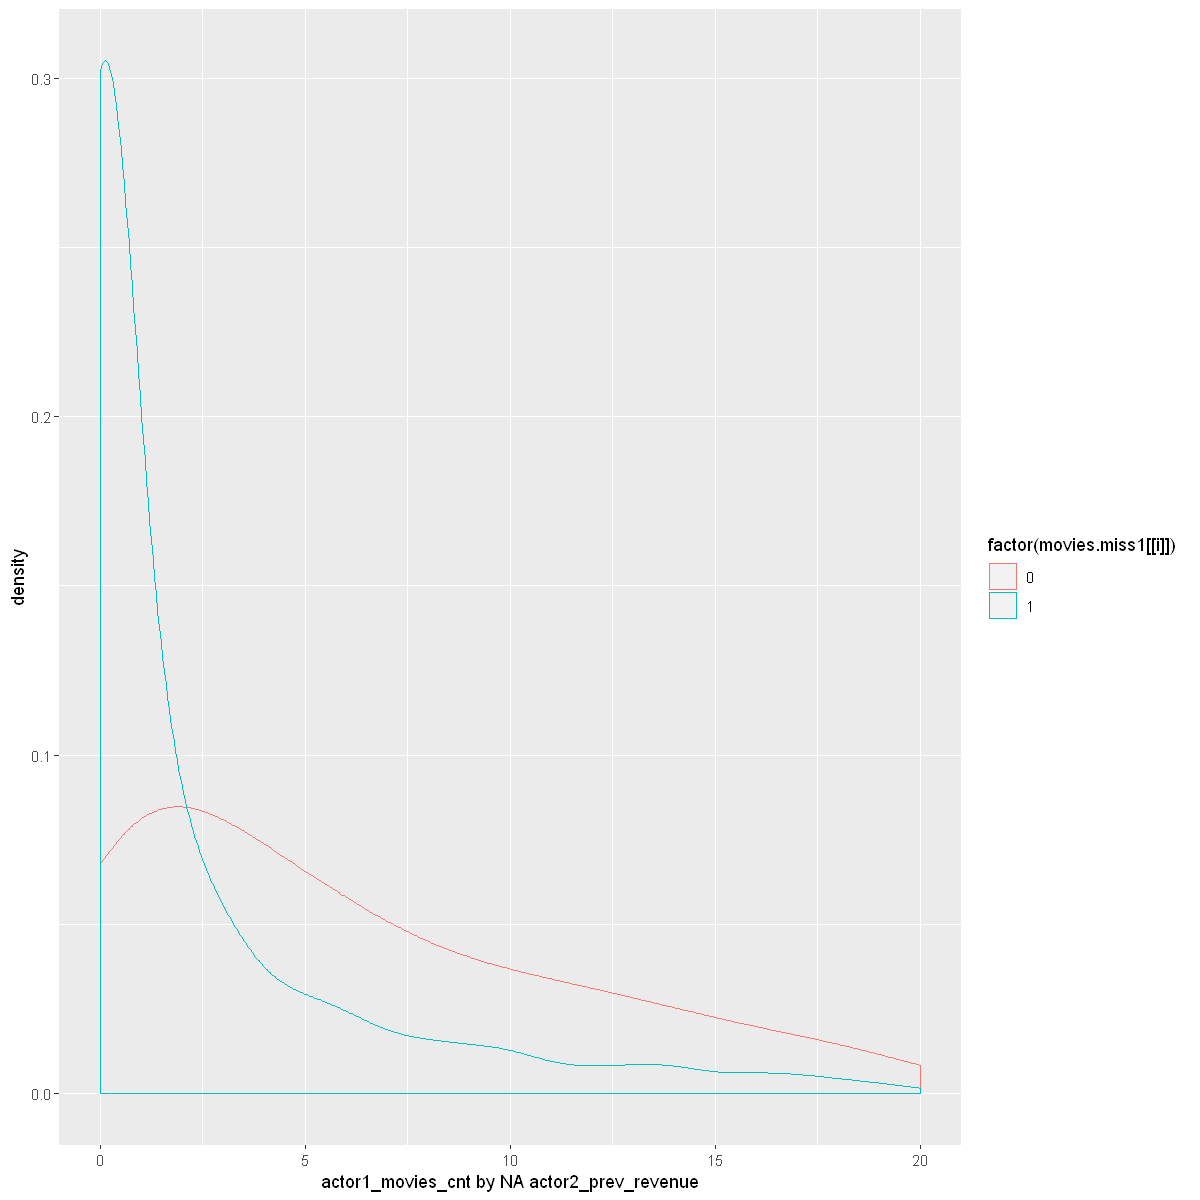


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 59.762, df = 5000.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.925404 5.259508
sample estimates:
mean of x mean of y 
5.9811612 0.8887052 

[1] "actor2_movies_cnt by NA actor2_prev_revenue"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


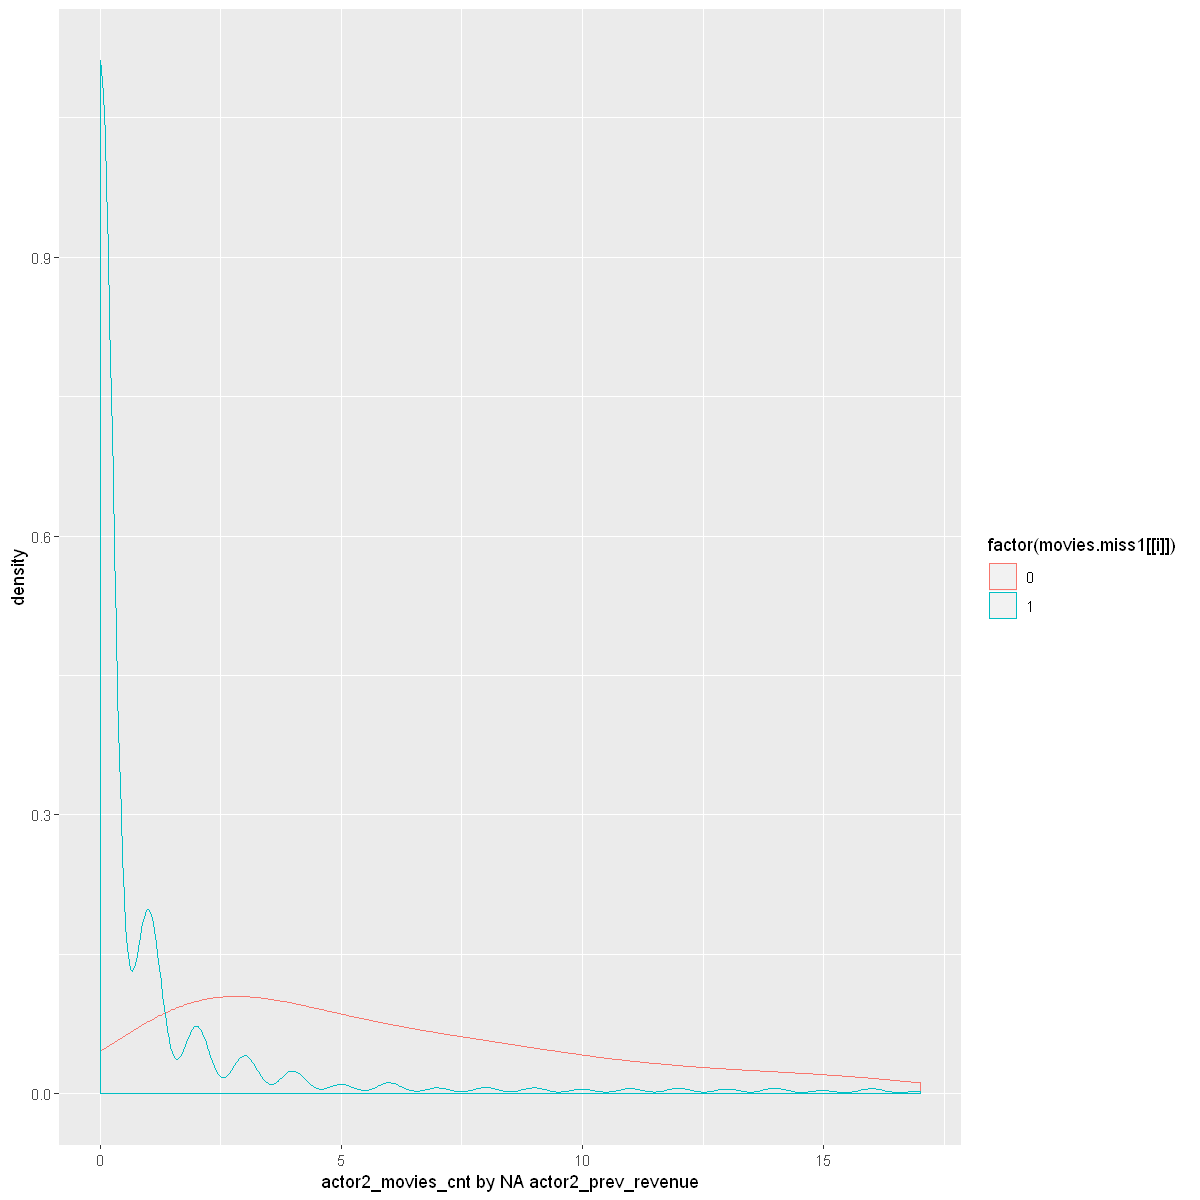


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.6604, df = 3128.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 33462939 53049270
sample estimates:
mean of x mean of y 
190283453 147027349 

[1] "actor0_prev_revenue by NA actor2_prev_revenue"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


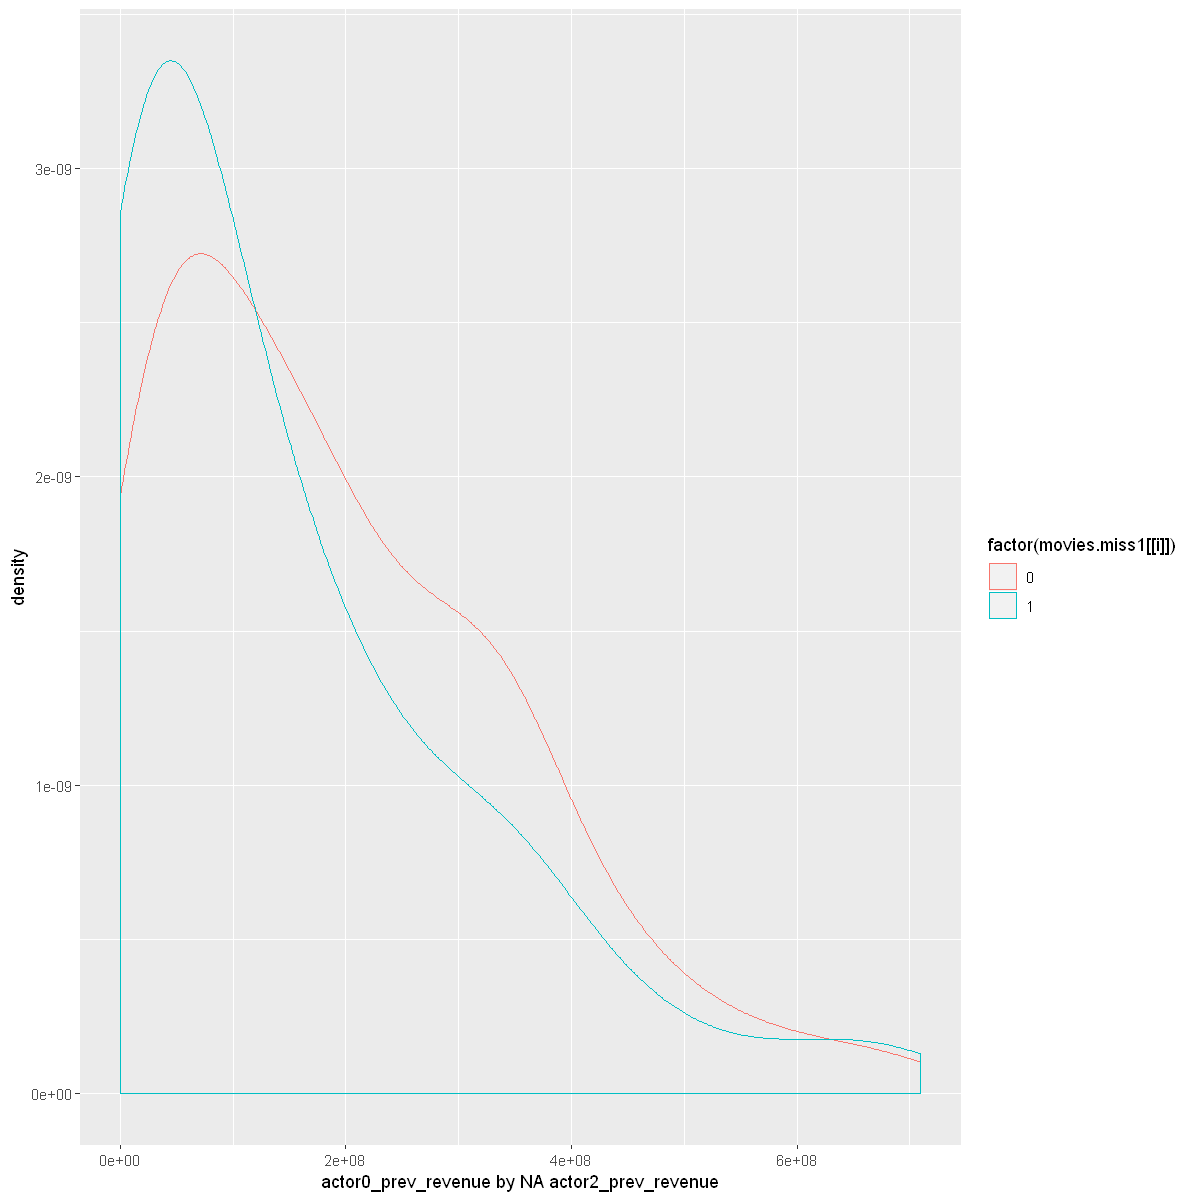


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.8565, df = 2661.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 30815348 48340862
sample estimates:
mean of x mean of y 
158313150 118735045 

[1] "actor1_prev_revenue by NA actor2_prev_revenue"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


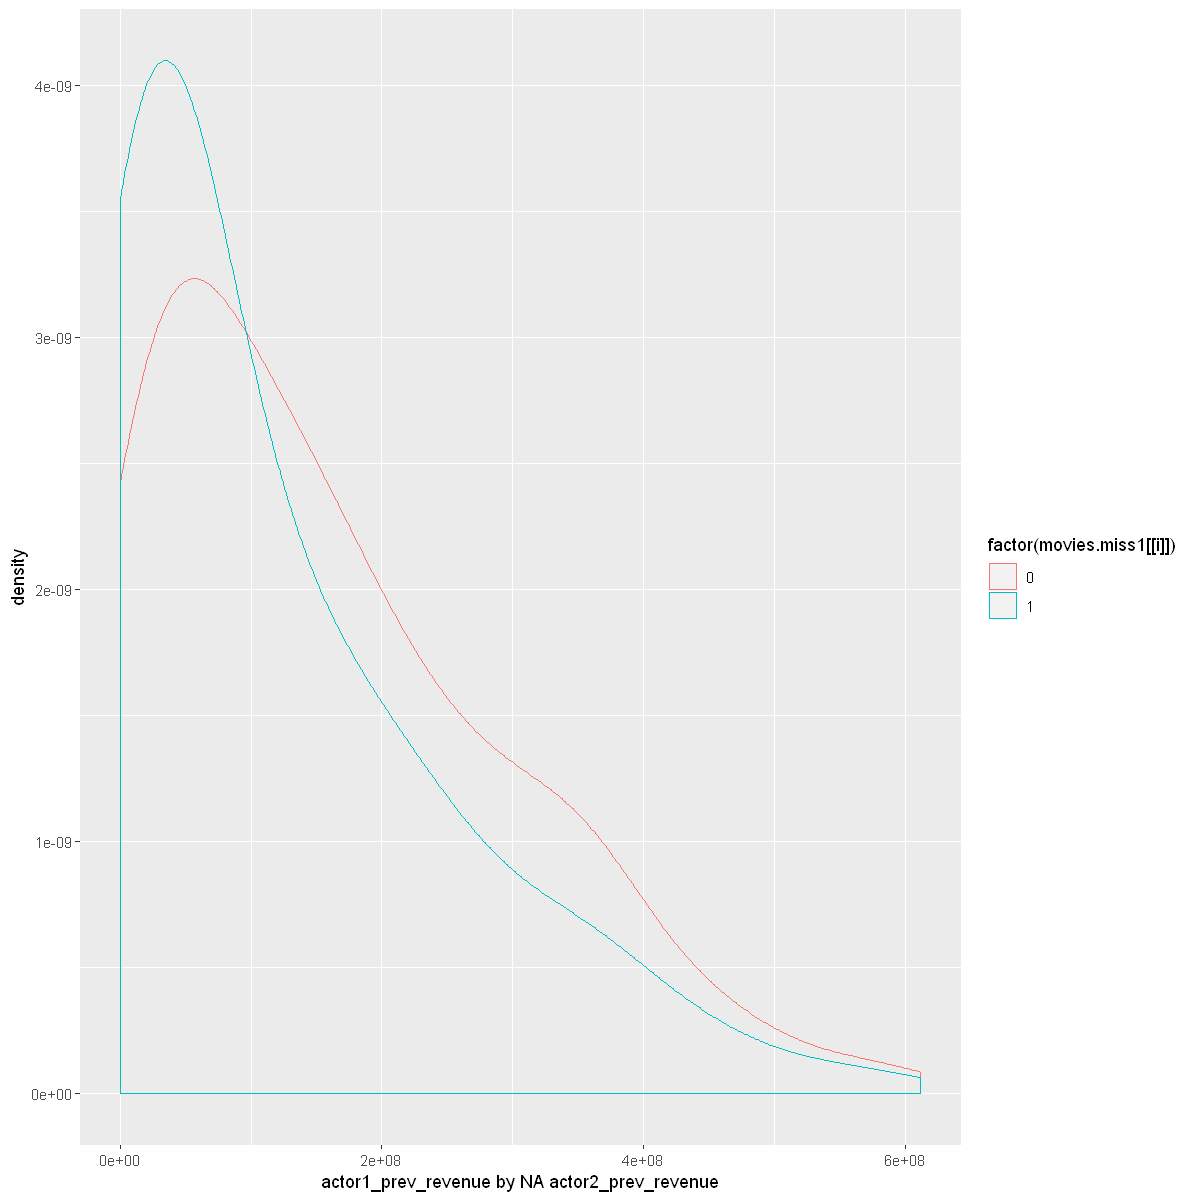


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 13.552, df = 6597.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4979247 0.6663328
sample estimates:
mean of x mean of y 
 1.655895  1.073766 

[1] "director_movies_cnt by NA actor2_prev_revenue"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


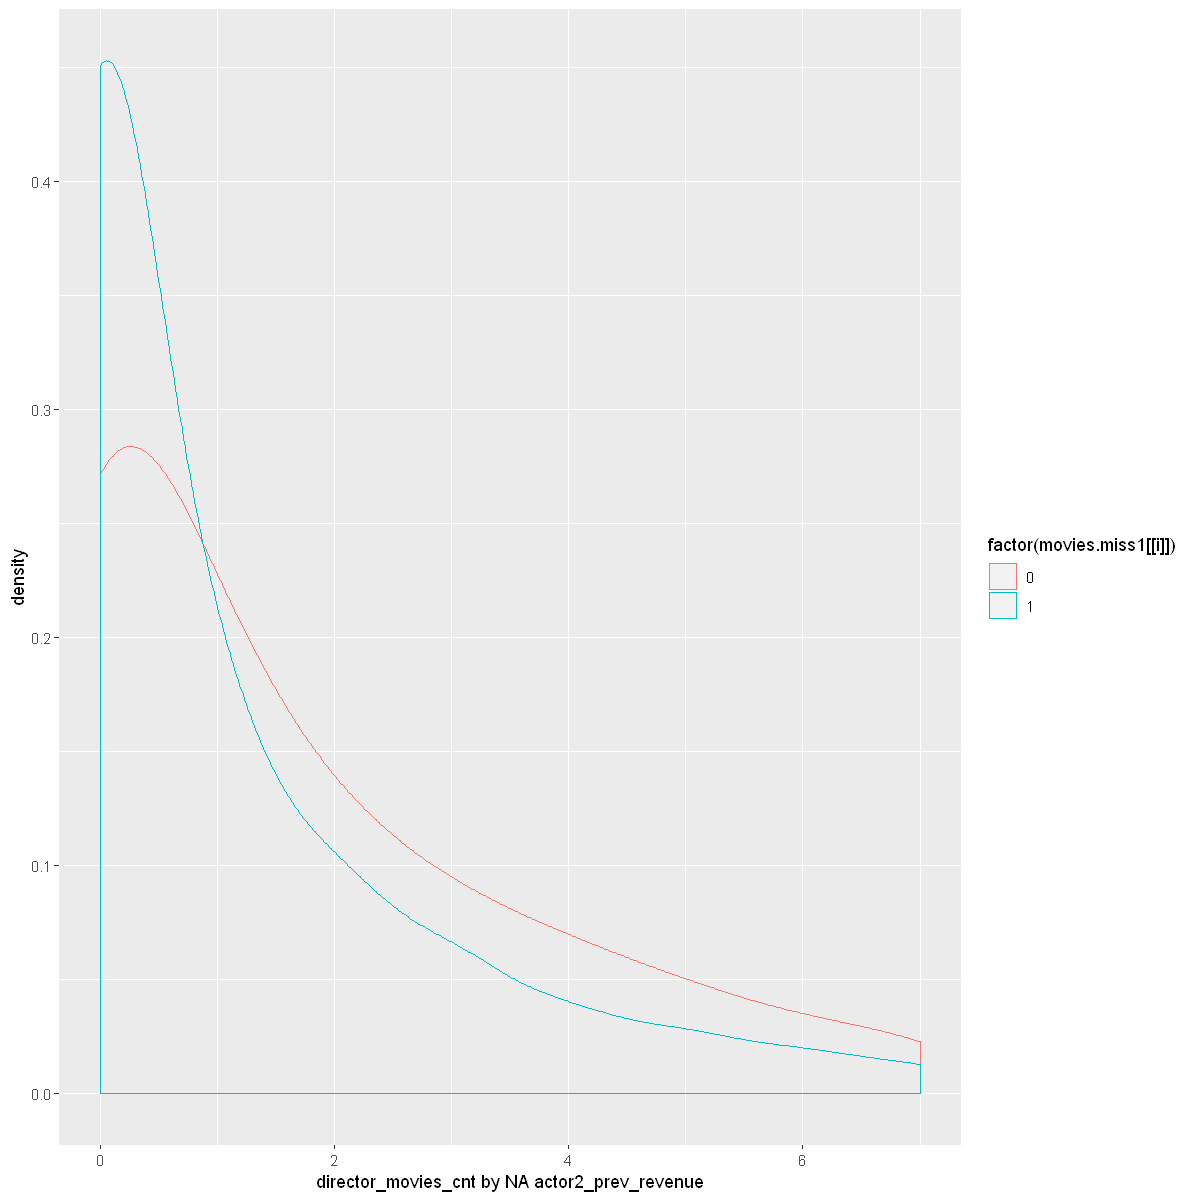


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 11.312, df = 6323.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4254814 0.6038552
sample estimates:
mean of x mean of y 
 1.876020  1.361352 

[1] "depart_Art by NA actor2_prev_revenue"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


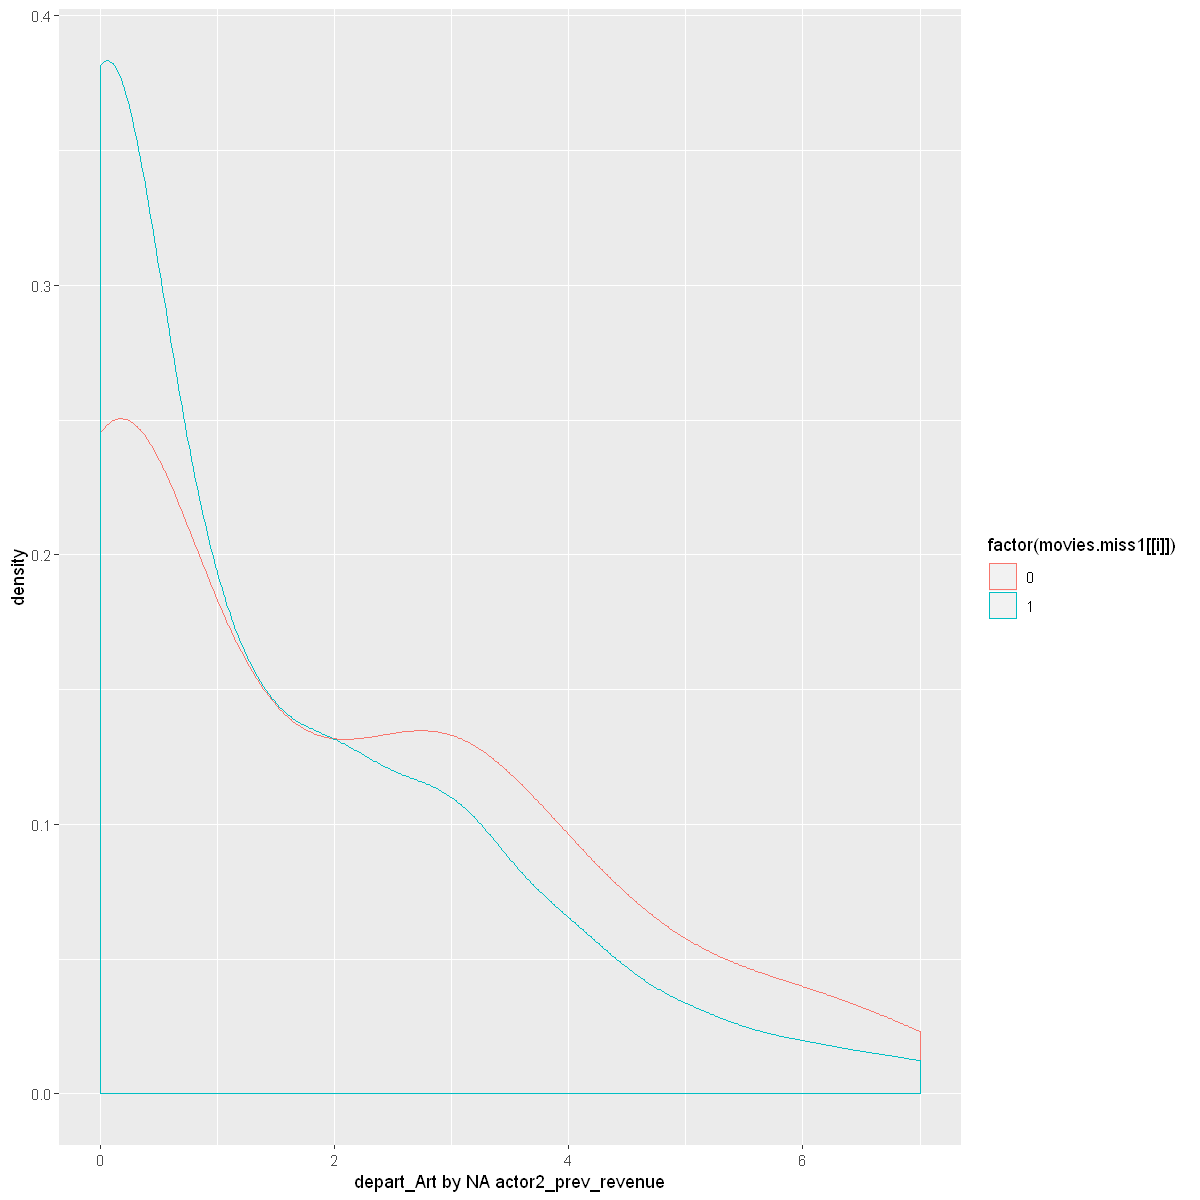


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.0628, df = 6506.7, p-value = 1.801e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1454428 0.2571984
sample estimates:
mean of x mean of y 
 1.216065  1.014744 

[1] "depart_Camera by NA actor2_prev_revenue"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


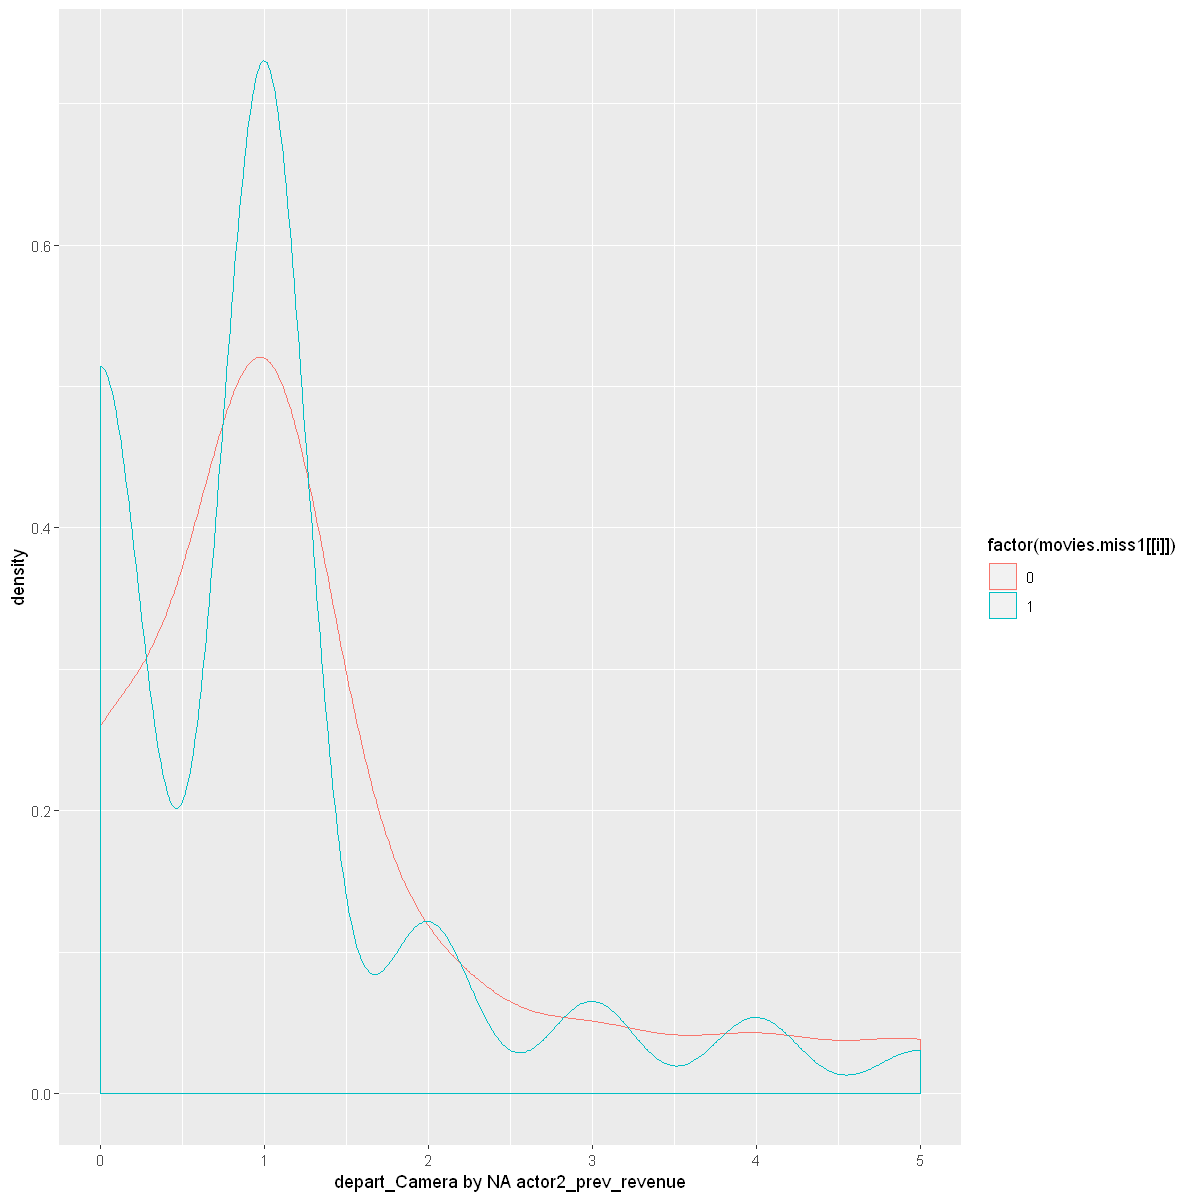


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 5.7854, df = 6121.9, p-value = 7.594e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1252317 0.2535967
sample estimates:
mean of x mean of y 
0.9779043 0.7884901 

[1] "depart_Custom_Mkup by NA actor2_prev_revenue"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


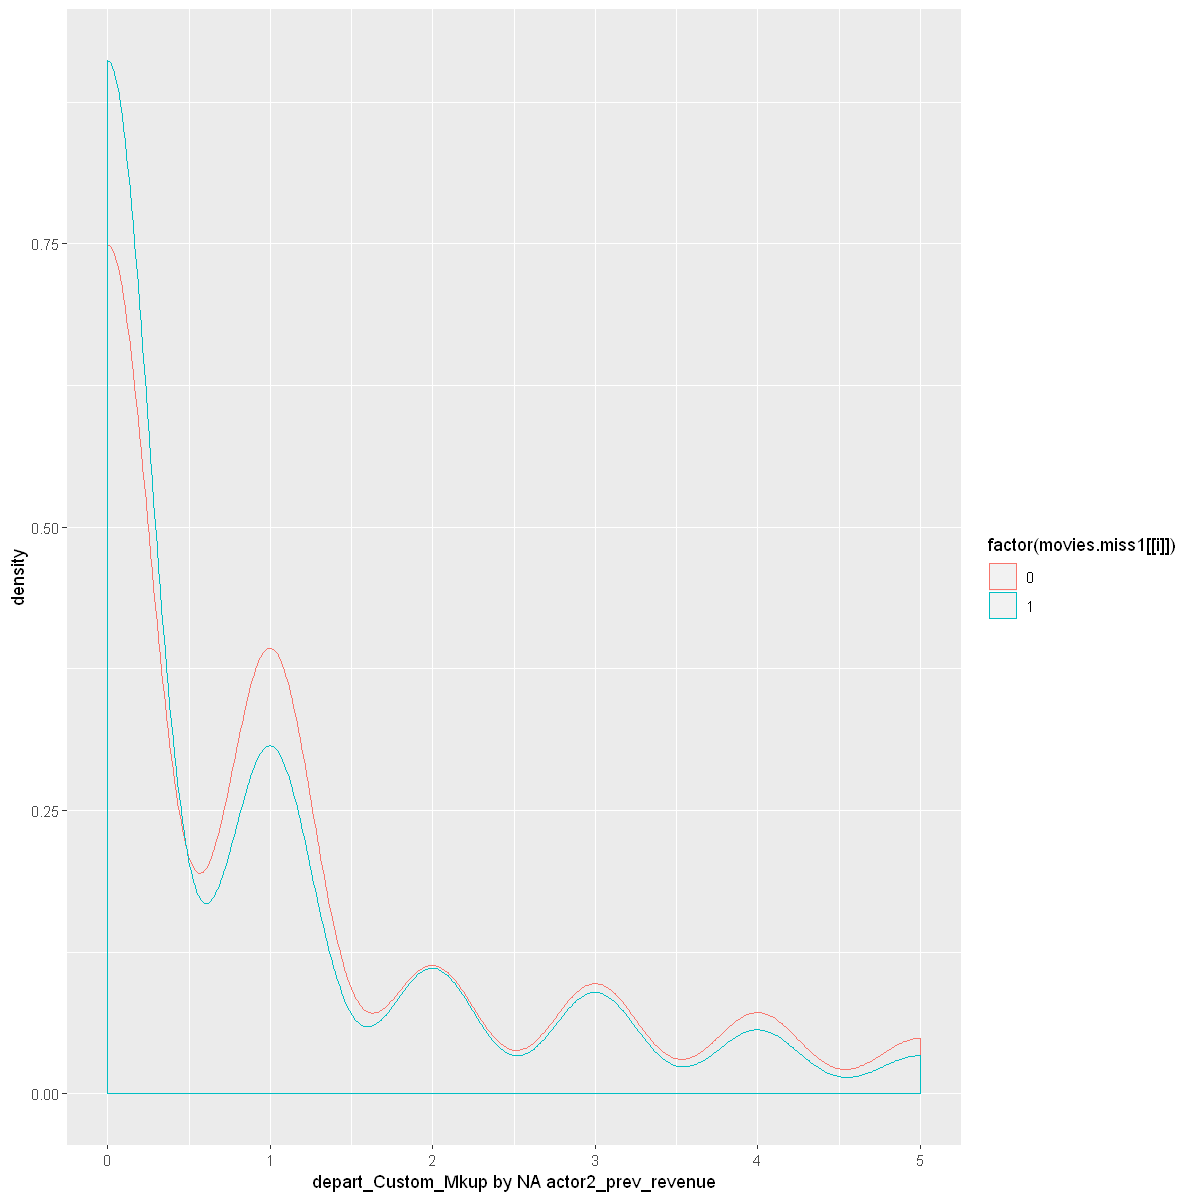


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.1338, df = 6703.8, p-value = 1.079e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08082463 0.14207591
sample estimates:
mean of x mean of y 
 1.469327  1.357877 

[1] "depart_Directing by NA actor2_prev_revenue"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


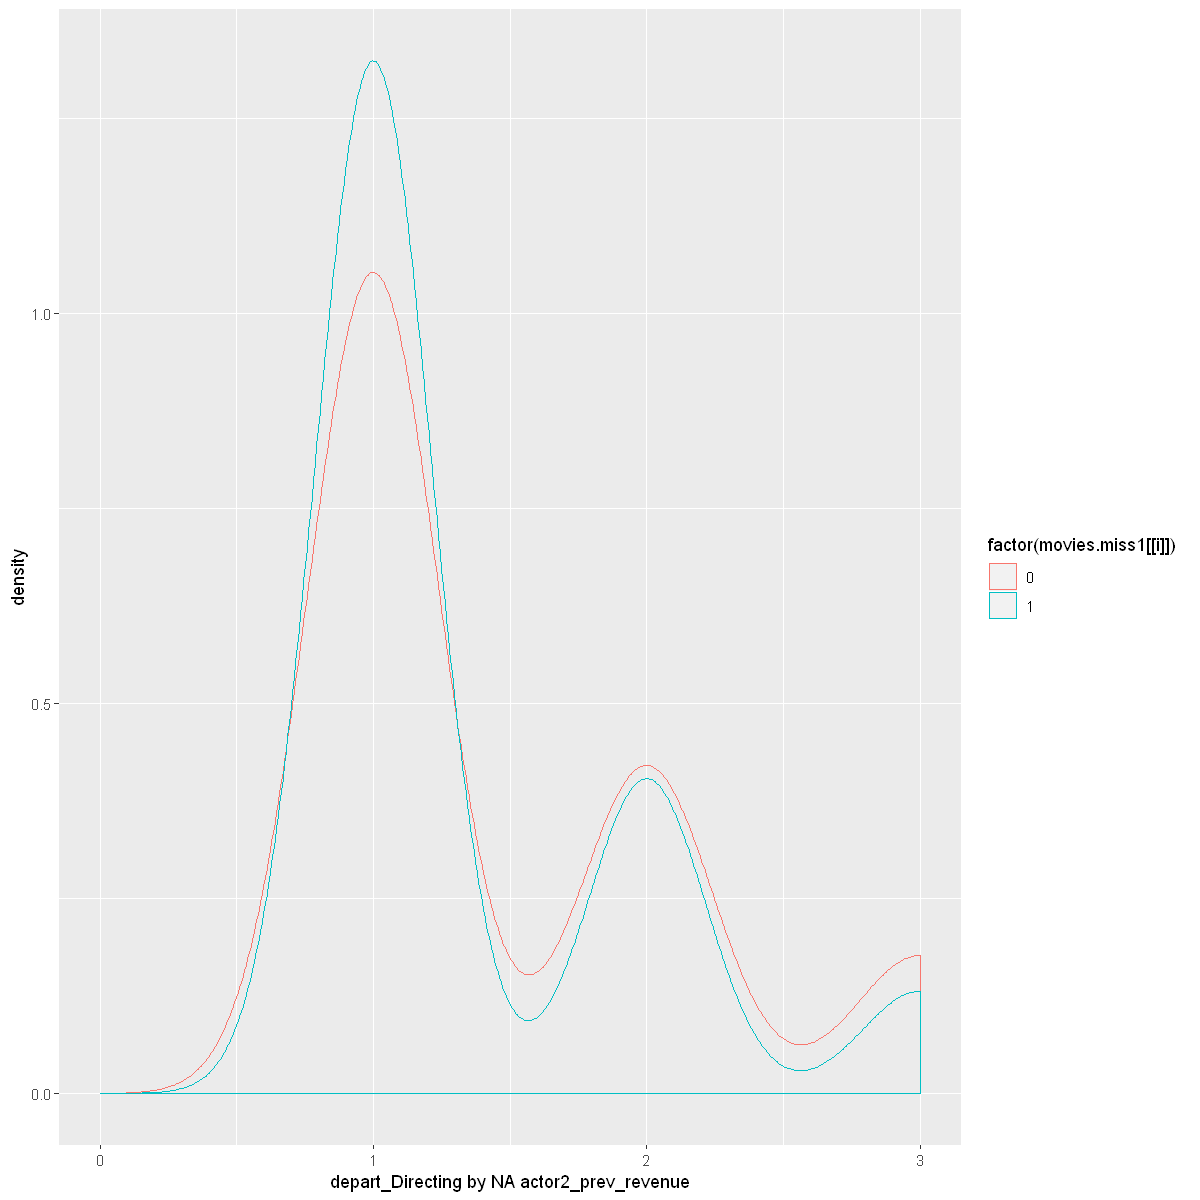


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.2345, df = 6007.5, p-value = 0.001225
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04464551 0.18202099
sample estimates:
mean of x mean of y 
 1.323550  1.210217 

[1] "depart_Sound by NA actor2_prev_revenue"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


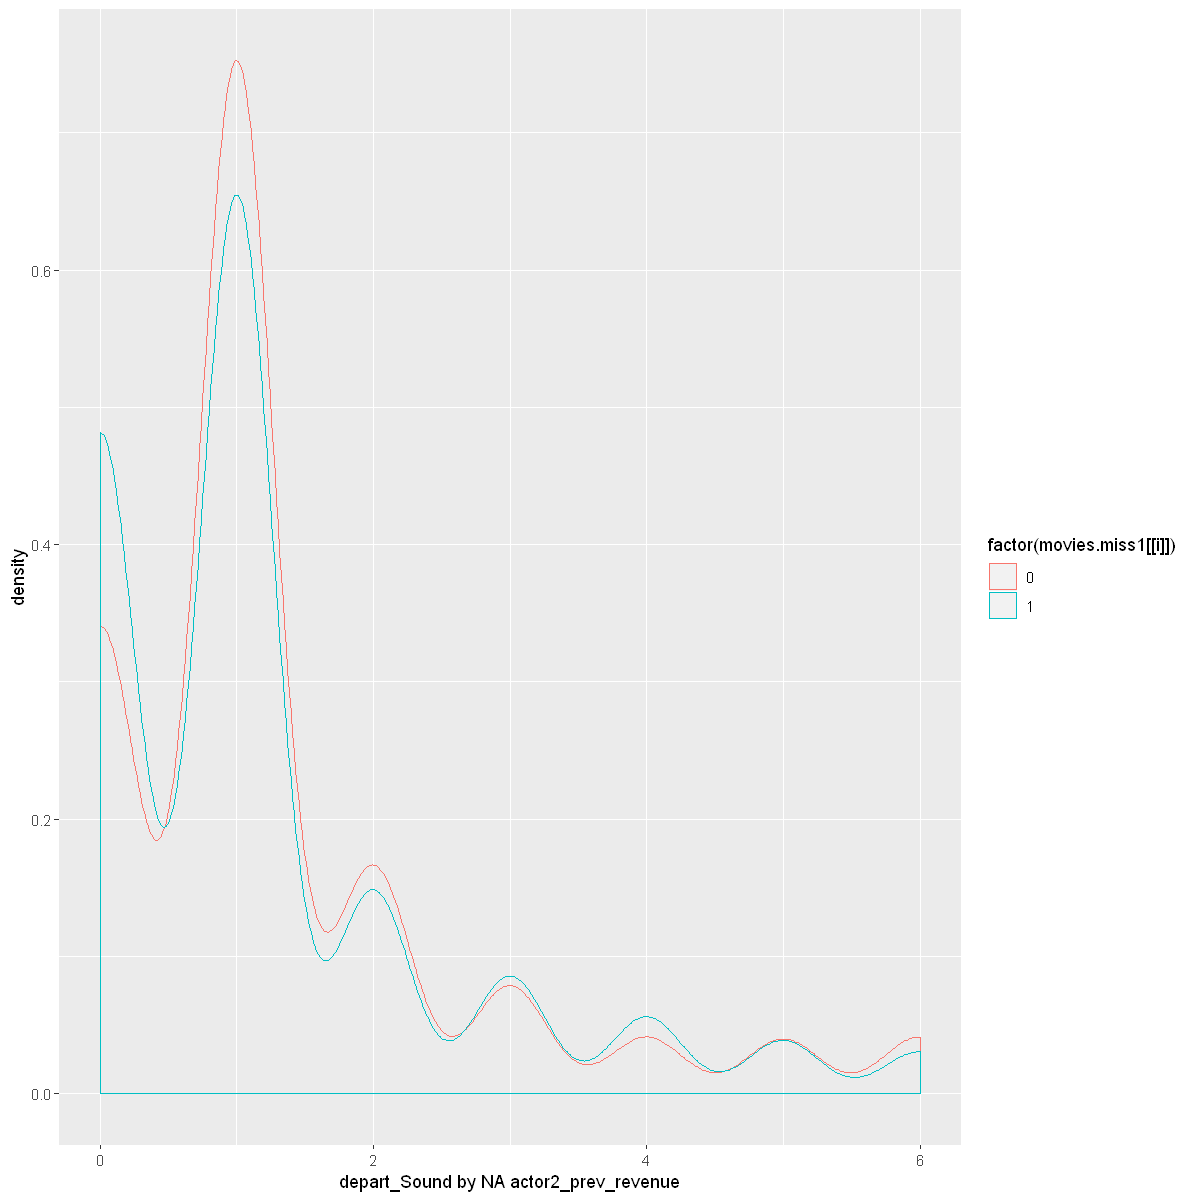


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 2.4203, df = 2716.3, p-value = 0.01557
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2346691 22376834
sample estimates:
mean of x mean of y 
 72591413  60229650 

[1] "revenue by NA actor2_prev_revenue"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


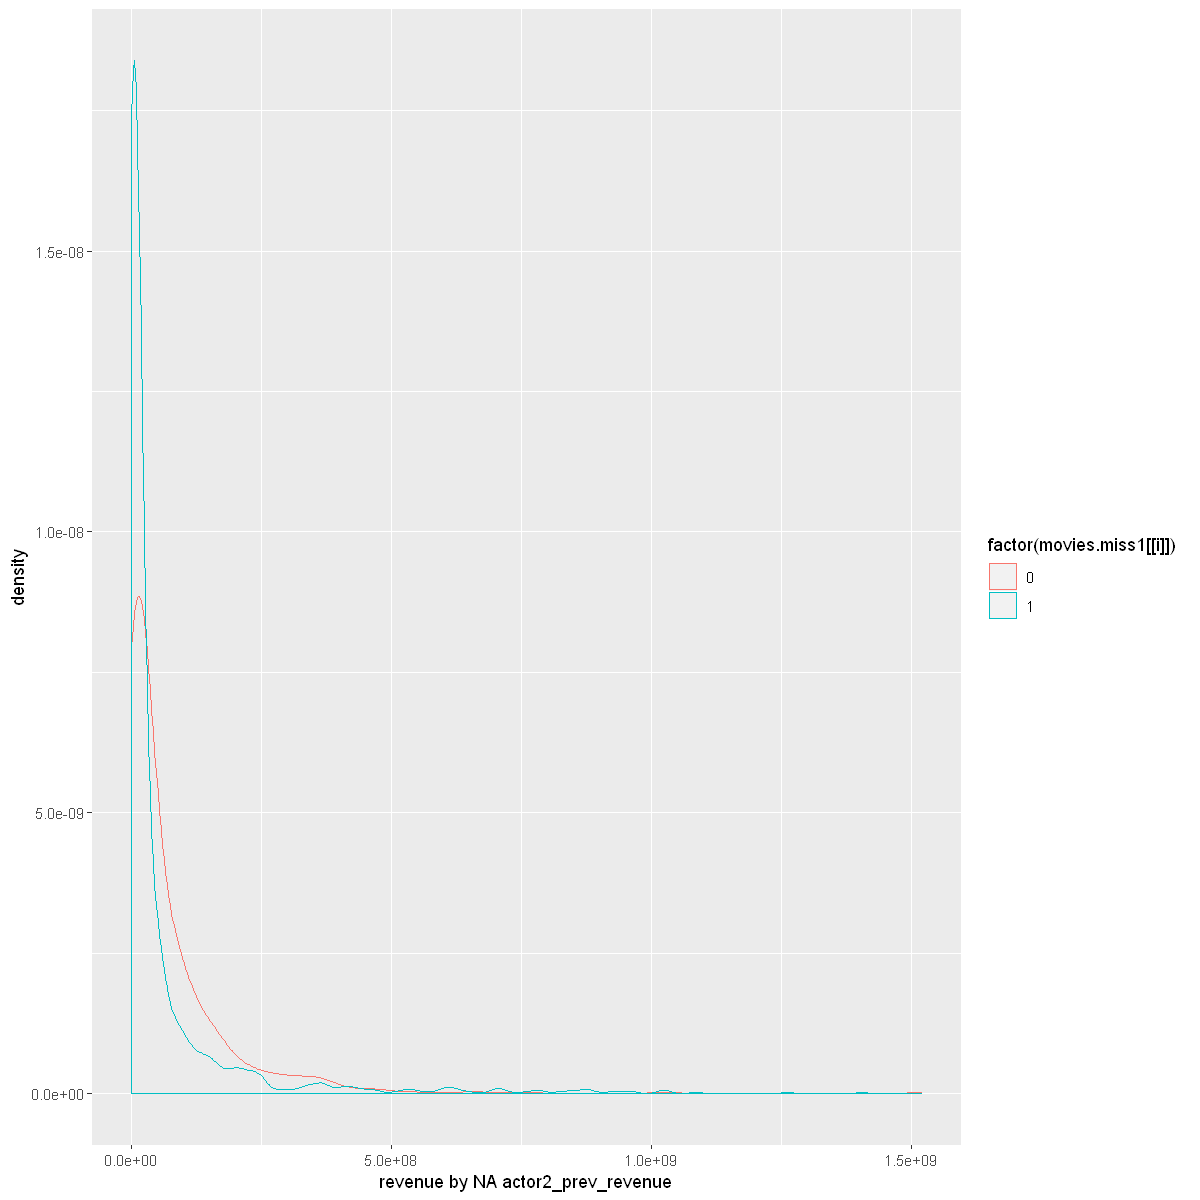


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.406, df = 373.94, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18416368 -13000424
sample estimates:
mean of x mean of y 
 21072856  36781253 

[1] "budget by NA director_movies_cnt"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


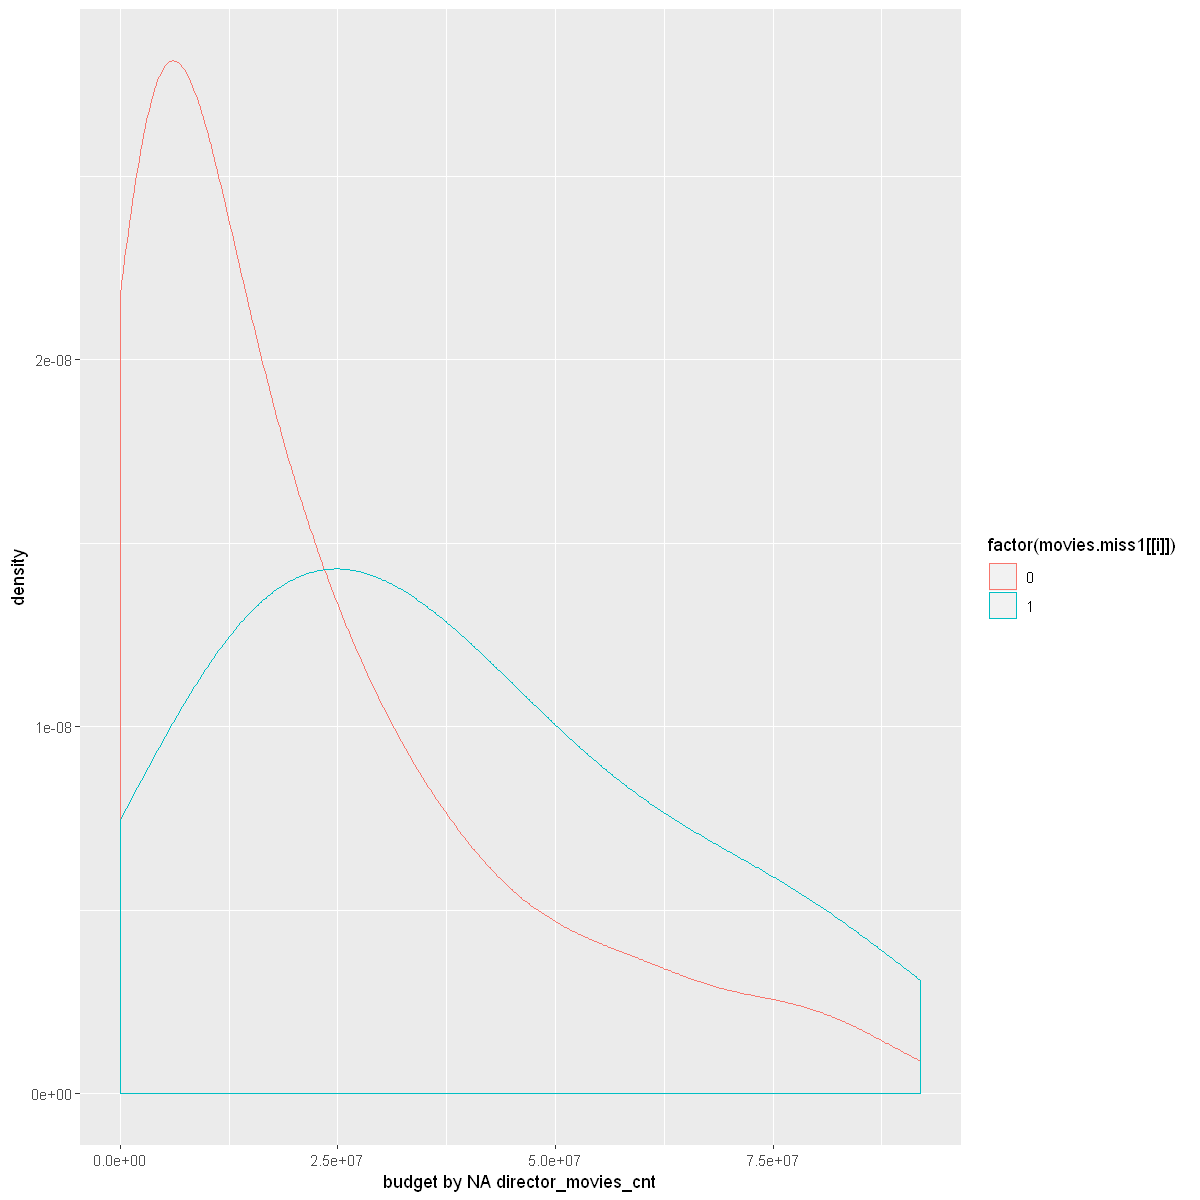


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.1739, df = 479.72, p-value = 2.782e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9837353 -0.5607131
sample estimates:
mean of x mean of y 
 2.860717  3.632941 

[1] "producers_cnt by NA director_movies_cnt"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


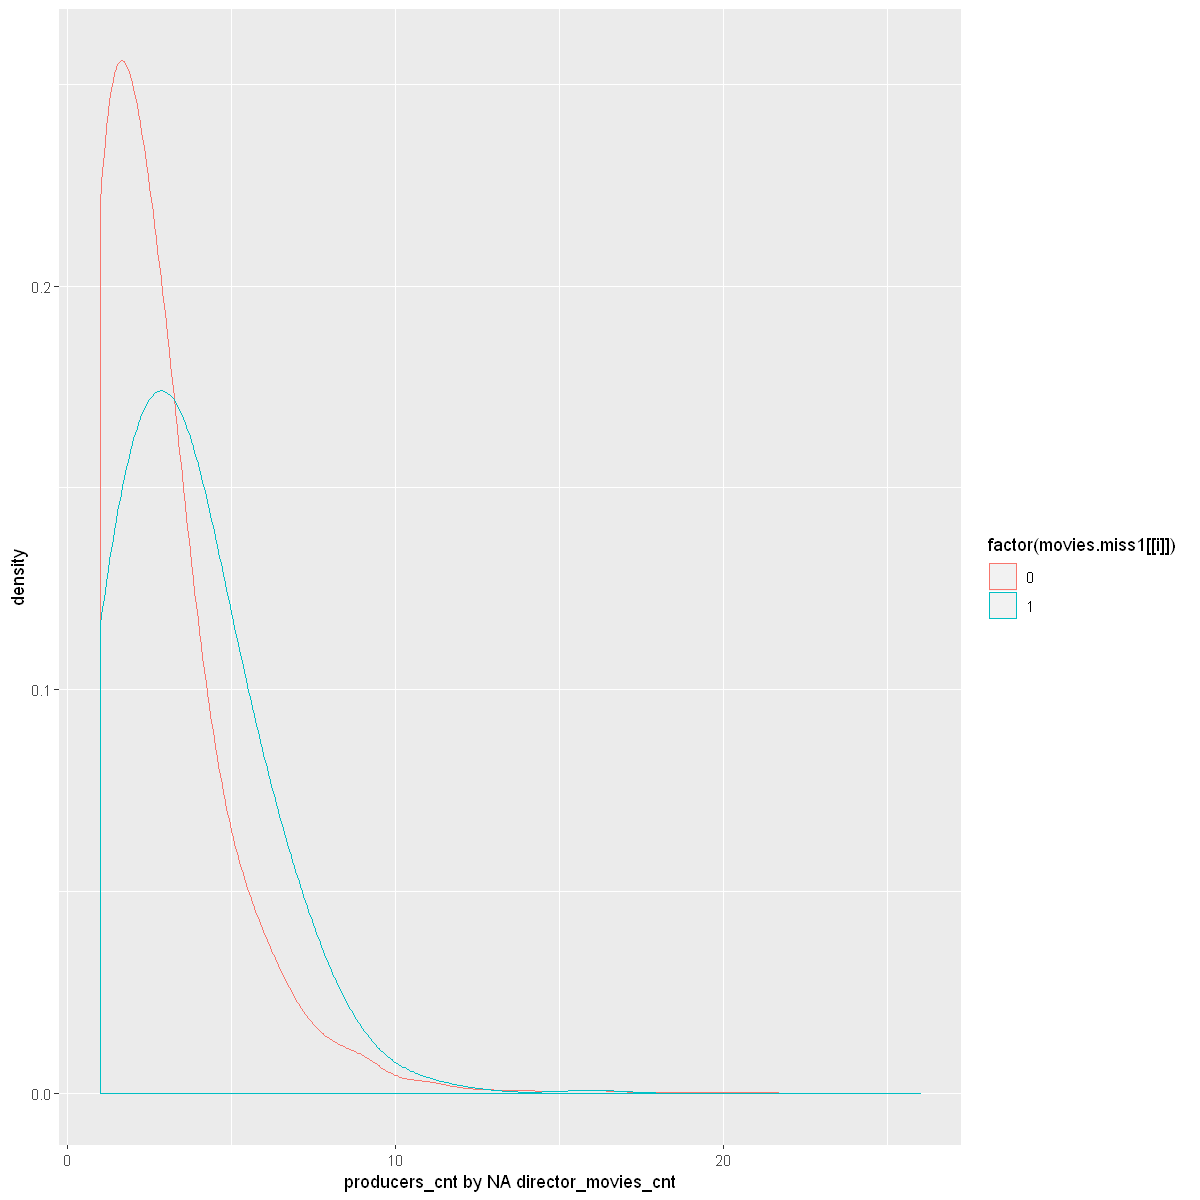


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.6288, df = 405.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.196400 -2.010223
sample estimates:
mean of x mean of y 
 3.926100  6.529412 

[1] "actor1_movies_cnt by NA director_movies_cnt"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


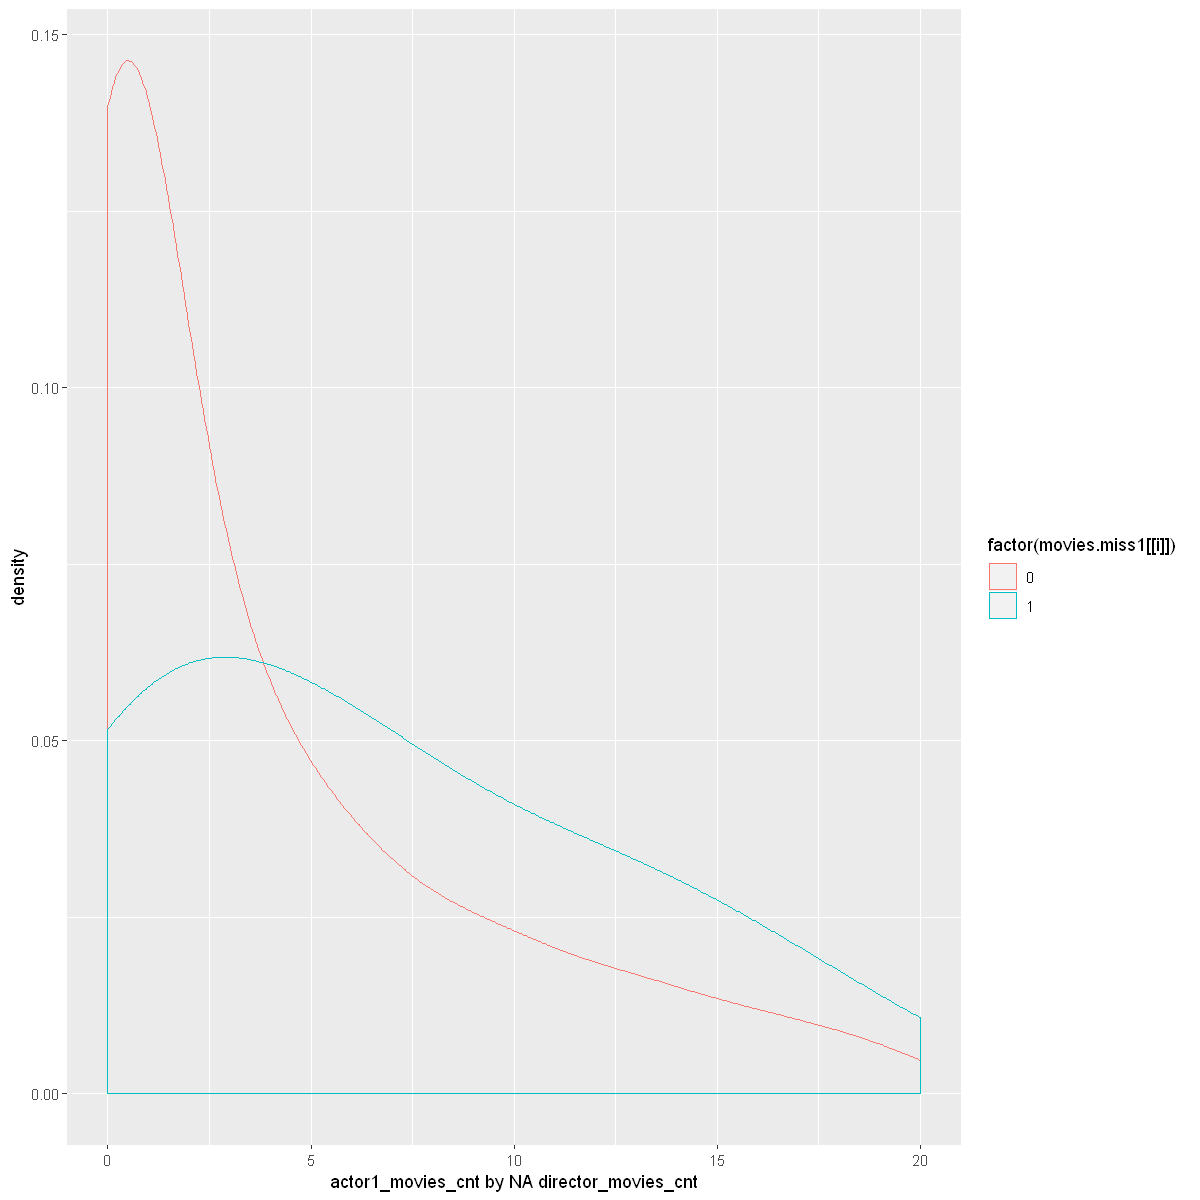


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.7252, df = 401.08, p-value = 9.033e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.536260 -1.507271
sample estimates:
mean of x mean of y 
 3.180391  5.202156 

[1] "actor2_movies_cnt by NA director_movies_cnt"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


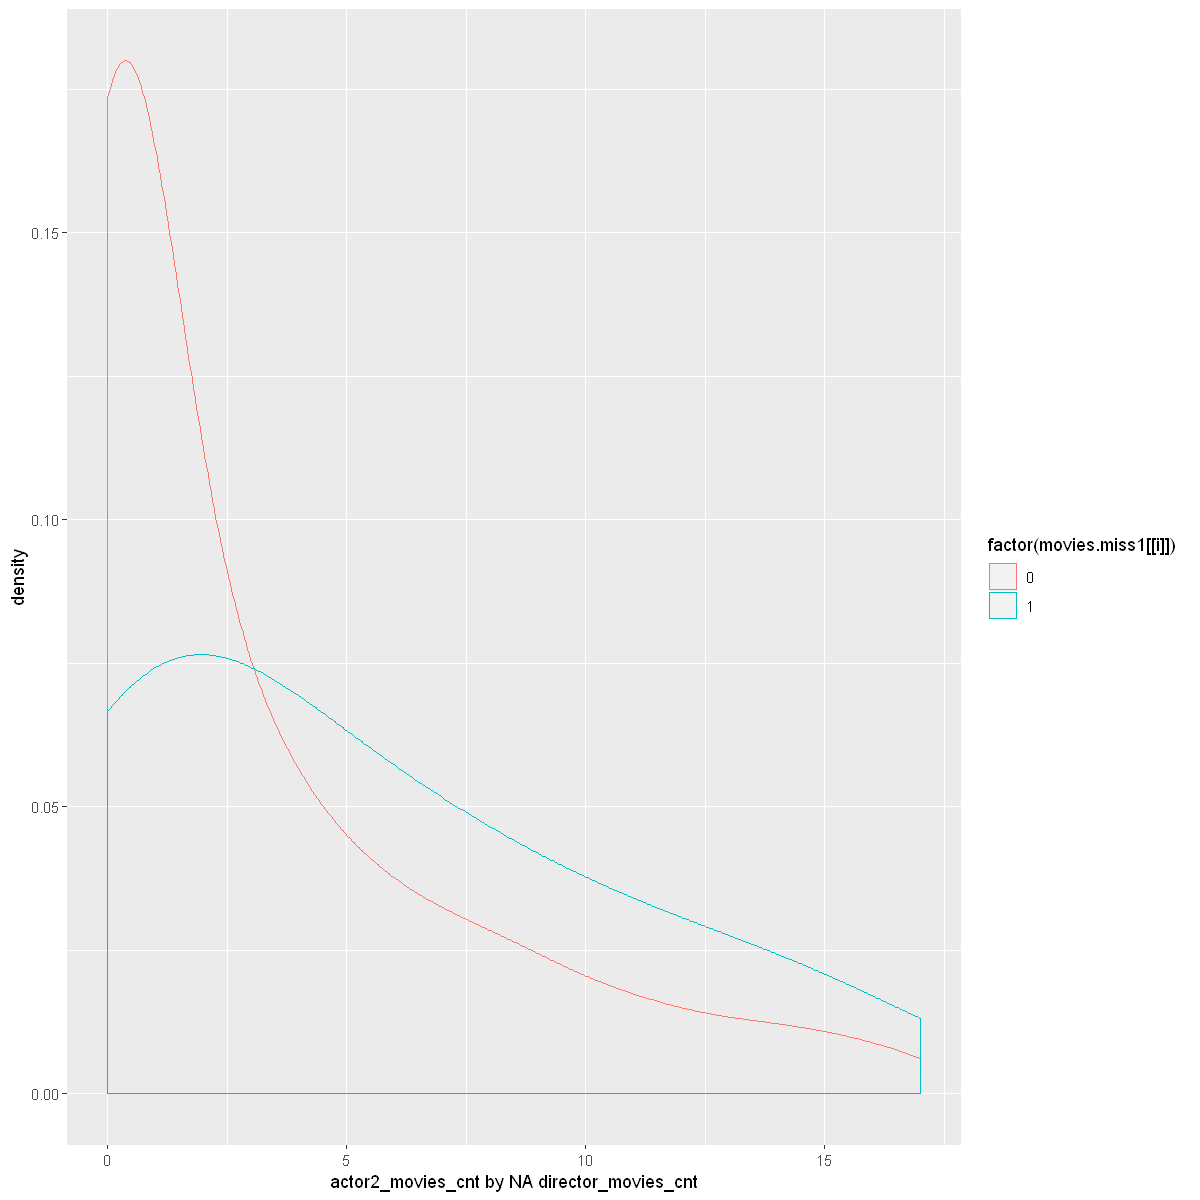


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.7066, df = 341.38, p-value = 8.275e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -87305479 -47708302
sample estimates:
mean of x mean of y 
170220753 237727644 

[1] "actor0_prev_revenue by NA director_movies_cnt"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


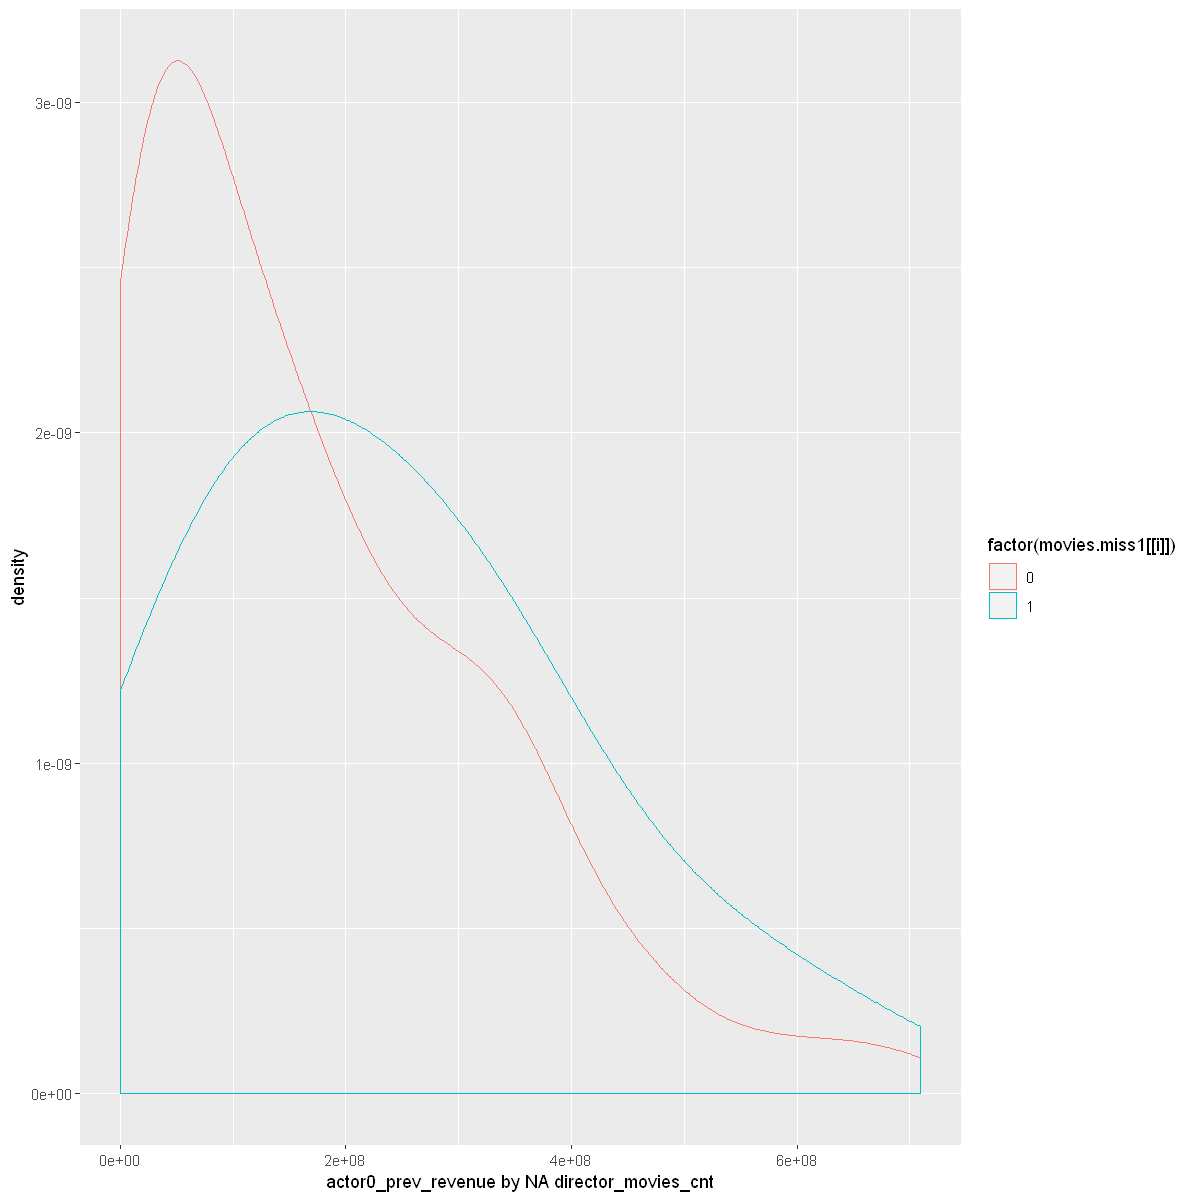


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.1144, df = 332.13, p-value = 4.901e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -49126727 -17345610
sample estimates:
mean of x mean of y 
142725751 175961919 

[1] "actor1_prev_revenue by NA director_movies_cnt"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


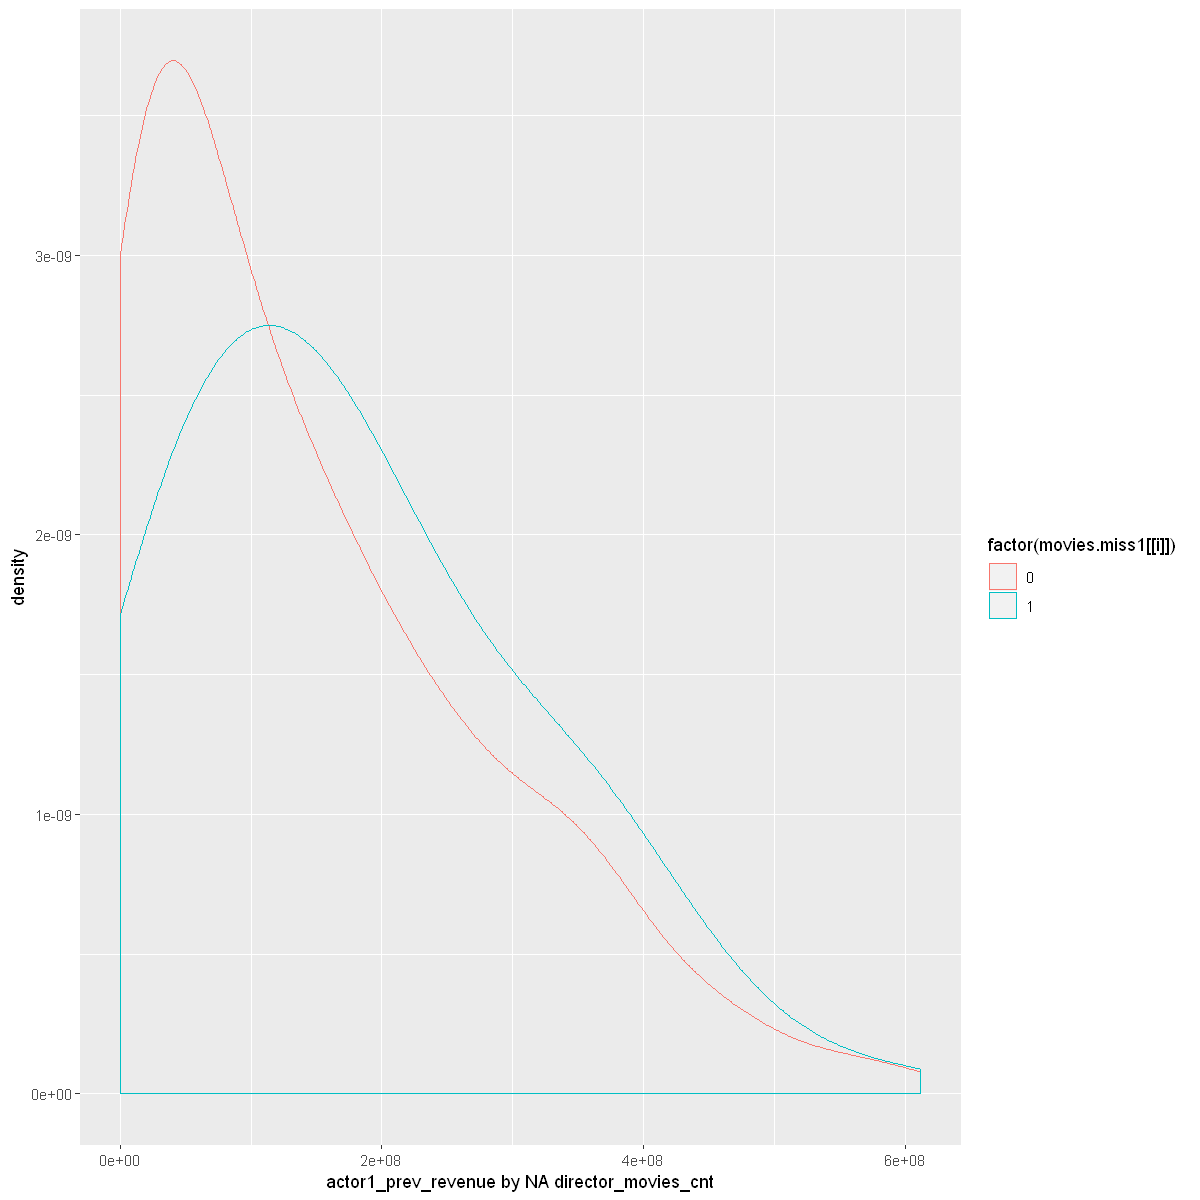


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3.4677, df = 328.05, p-value = 0.0005949
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -42389518 -11703051
sample estimates:
mean of x mean of y 
131726150 158772434 

[1] "actor2_prev_revenue by NA director_movies_cnt"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


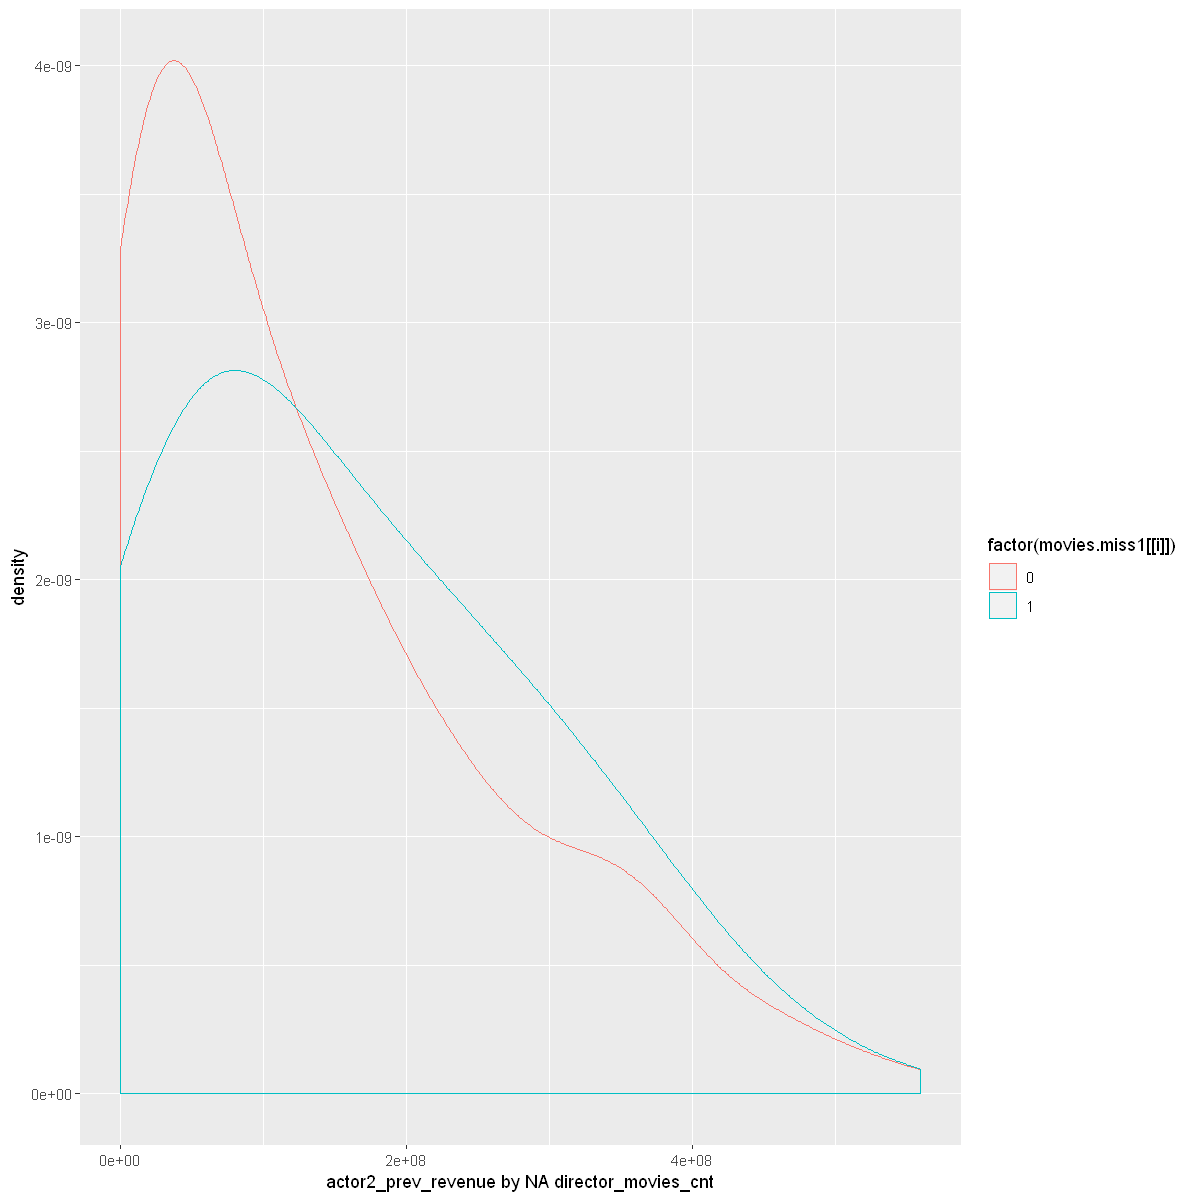


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.2349, df = 349.28, p-value = 3.636e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2018467 -0.7384396
sample estimates:
mean of x mean of y 
 1.560721  2.530864 

[1] "depart_Art by NA director_movies_cnt"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


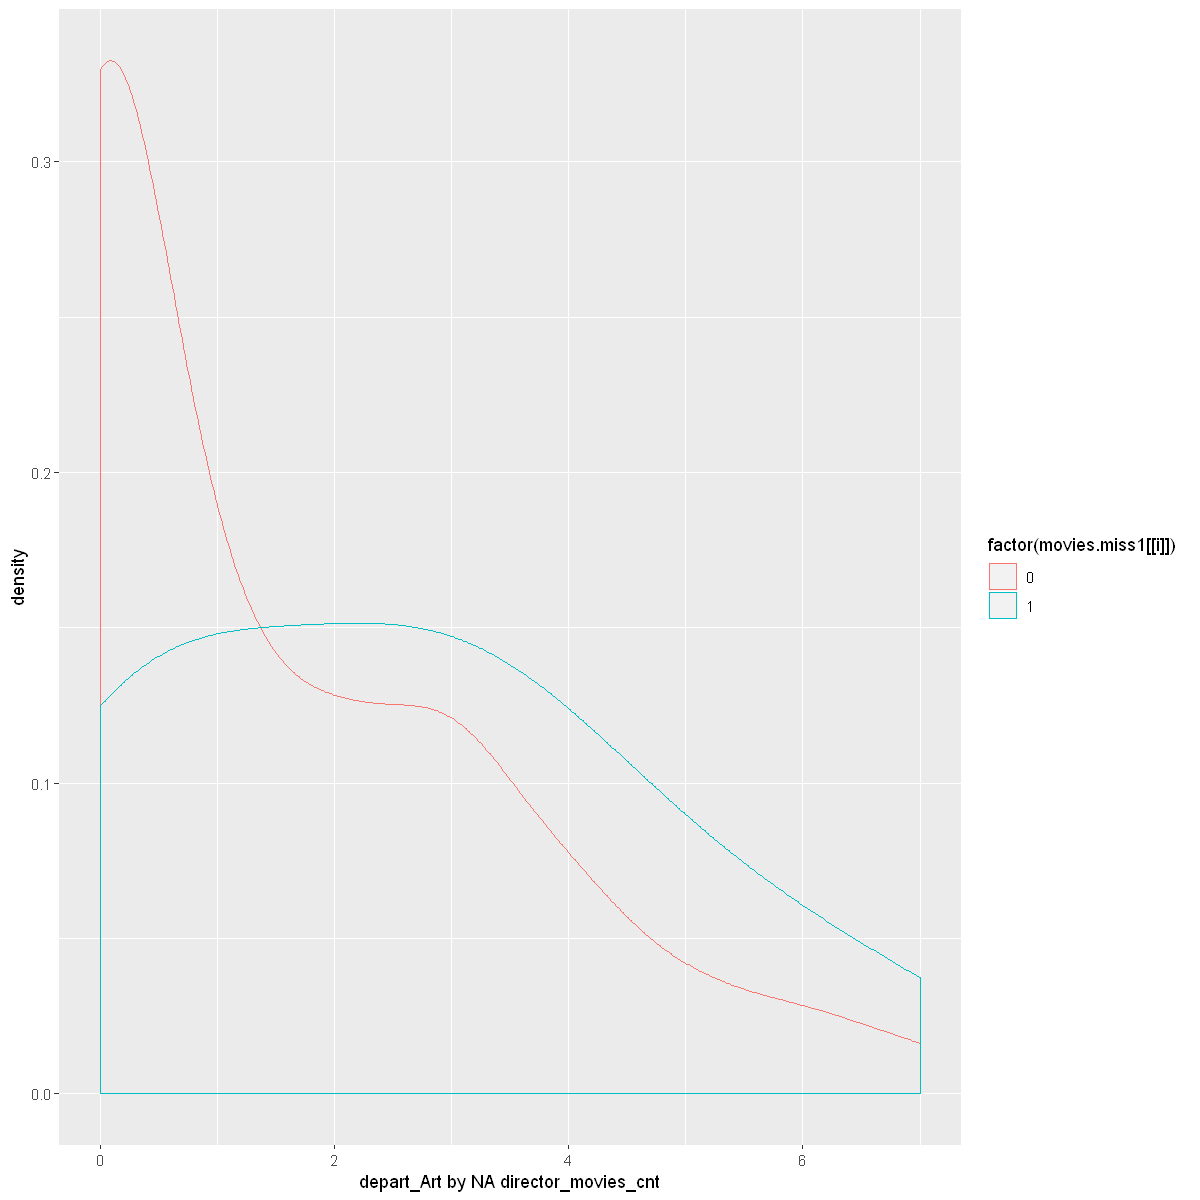


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.0311, df = 374.36, p-value = 3.91e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5365196 -0.2726922
sample estimates:
mean of x mean of y 
 1.090995  1.495601 

[1] "depart_Camera by NA director_movies_cnt"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


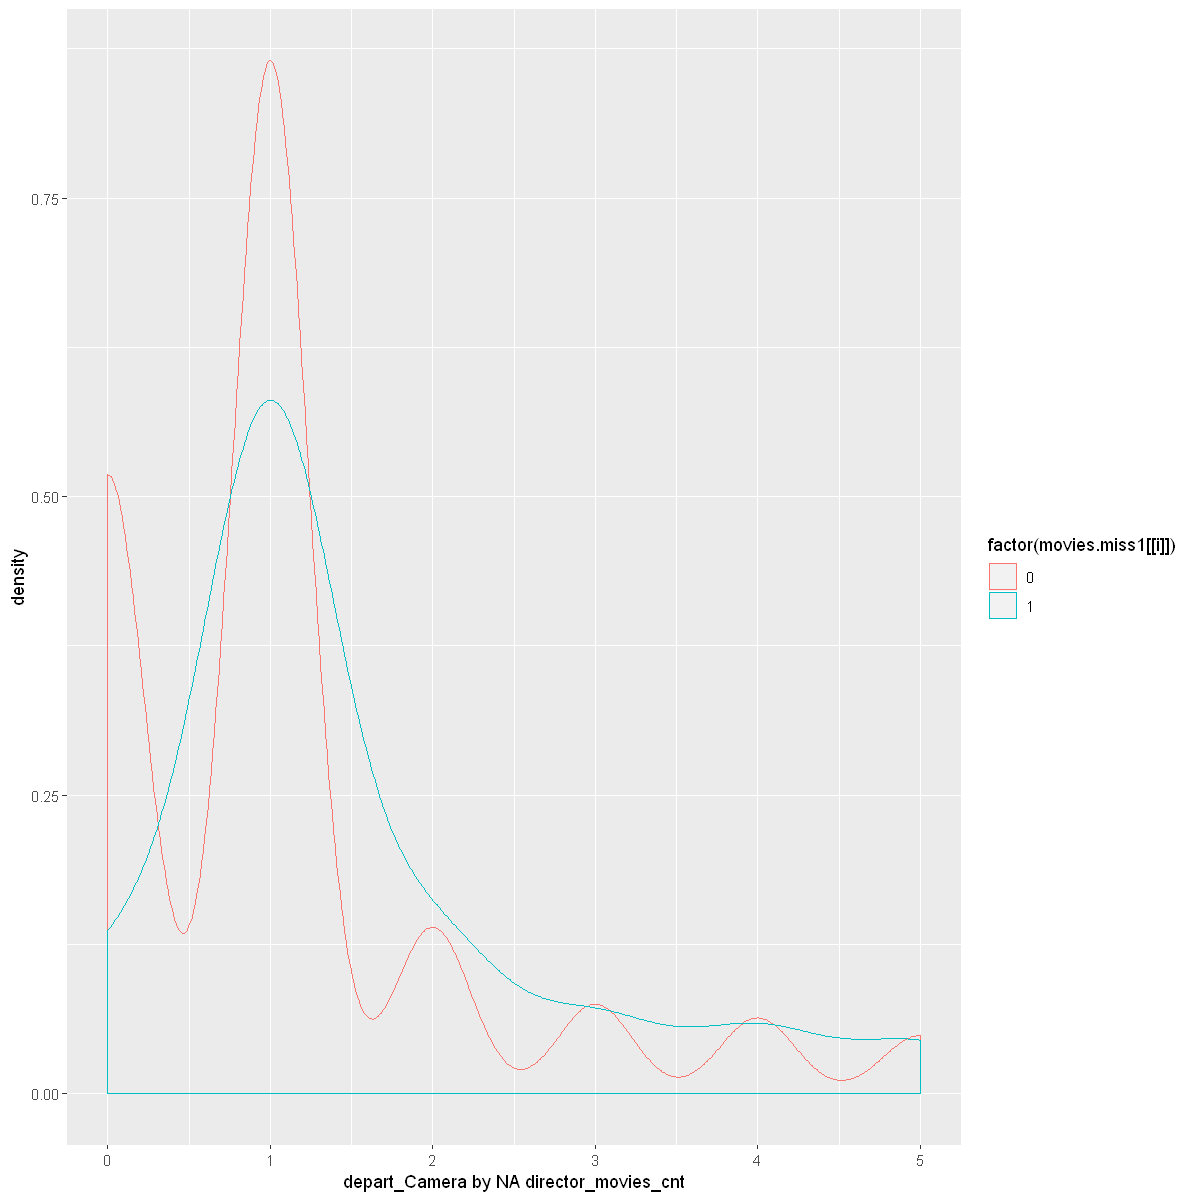


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -5.3698, df = 320.92, p-value = 1.516e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6360284 -0.2949386
sample estimates:
mean of x mean of y 
0.8555867 1.3210702 

[1] "depart_Custom_Mkup by NA director_movies_cnt"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


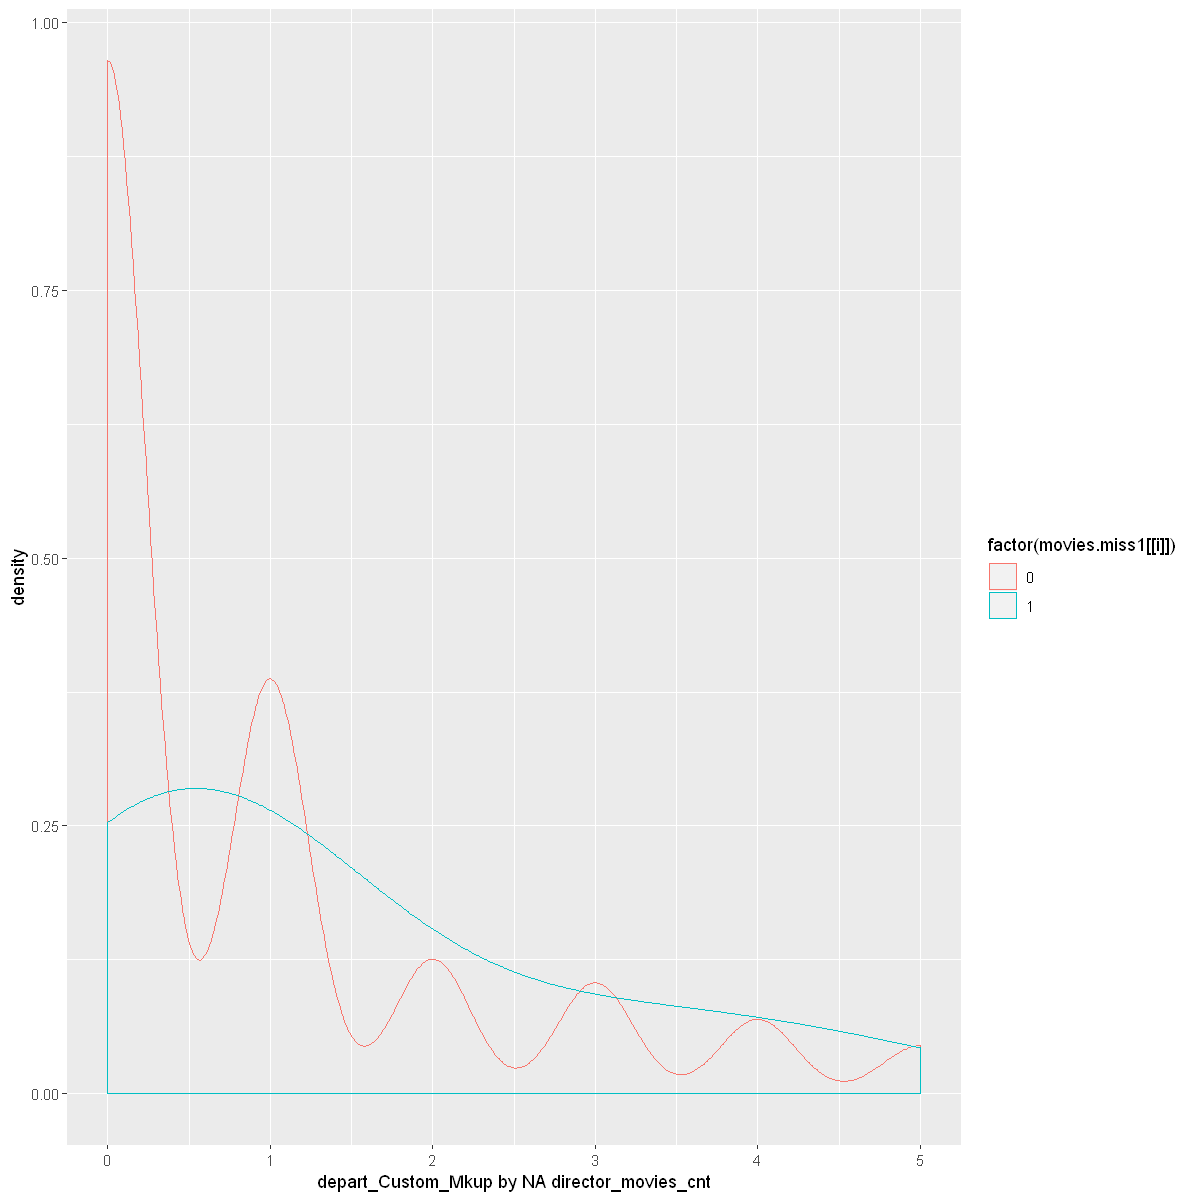


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -5.7105, df = 408.35, p-value = 2.172e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2985480 -0.1456395
sample estimates:
mean of x mean of y 
 1.400247  1.622340 

[1] "depart_Directing by NA director_movies_cnt"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


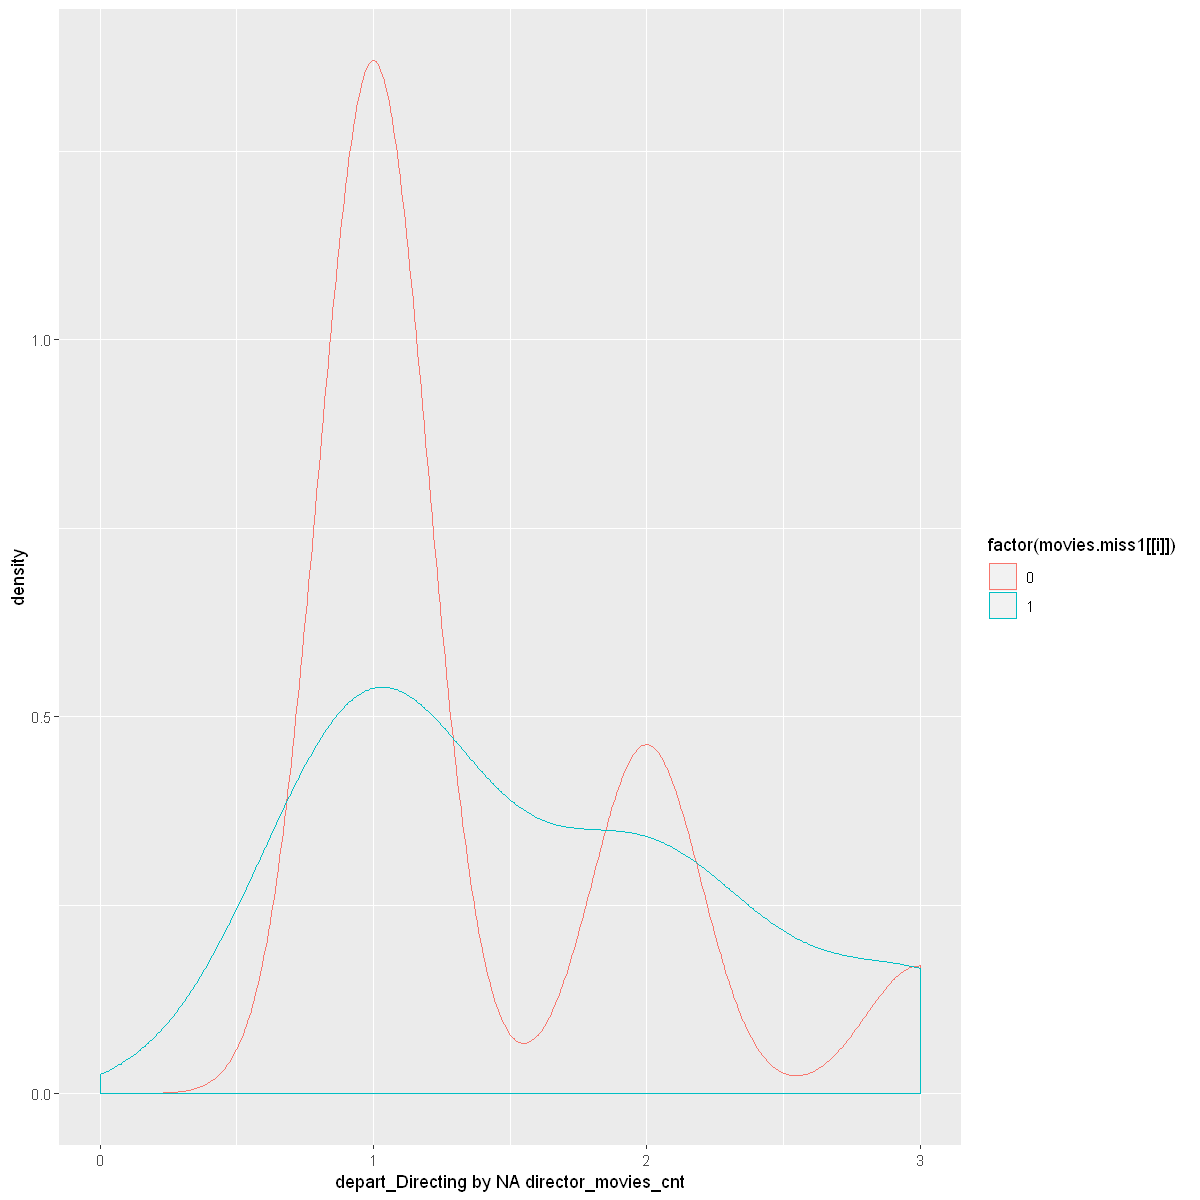


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.8414, df = 313.61, p-value = 2.028e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6444680 -0.2720076
sample estimates:
mean of x mean of y 
 1.241421  1.699659 

[1] "depart_Sound by NA director_movies_cnt"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


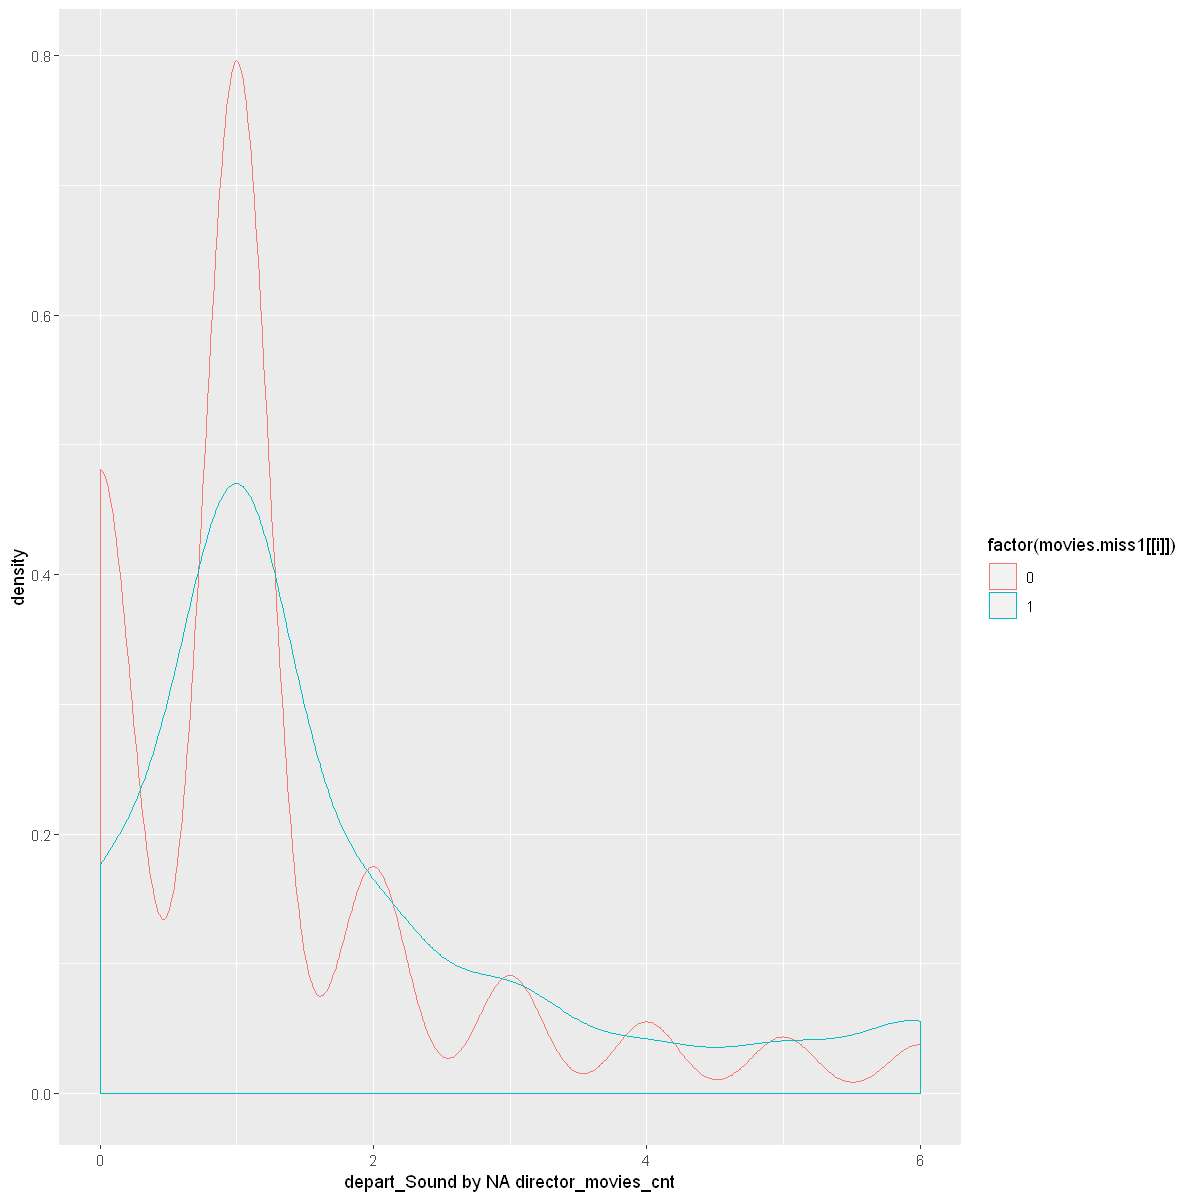


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.5325, df = 172.67, p-value = 1.086e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -107018225  -42086336
sample estimates:
mean of x mean of y 
 62744437 137296718 

[1] "revenue by NA director_movies_cnt"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


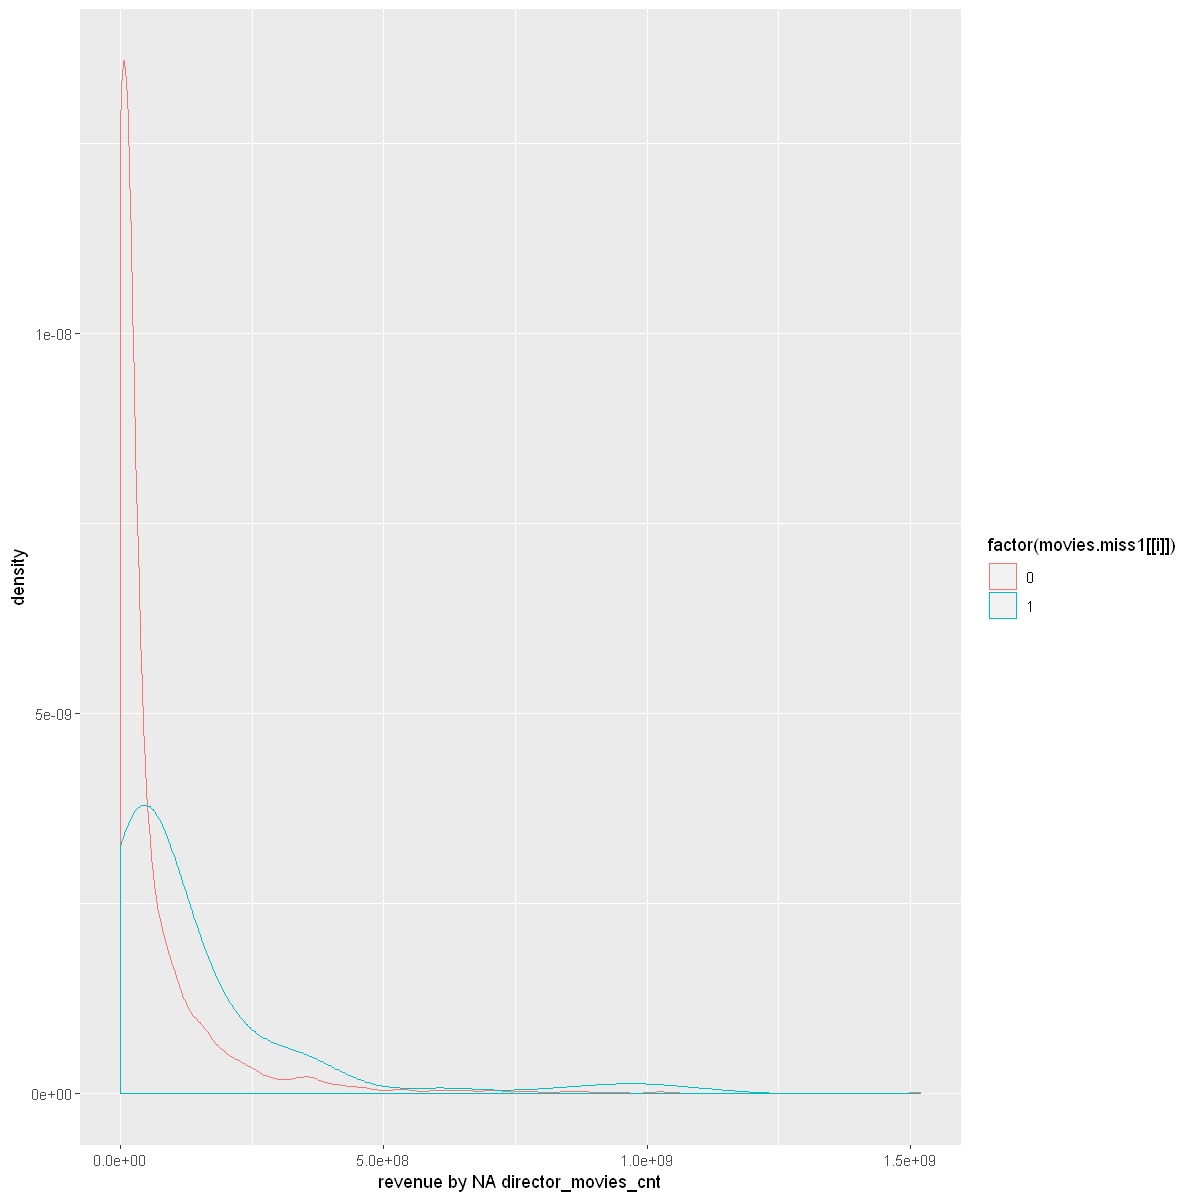


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -20.229, df = 576.97, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25507192 -20992460
sample estimates:
mean of x mean of y 
 19798720  43048546 

[1] "budget by NA depart_Art"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


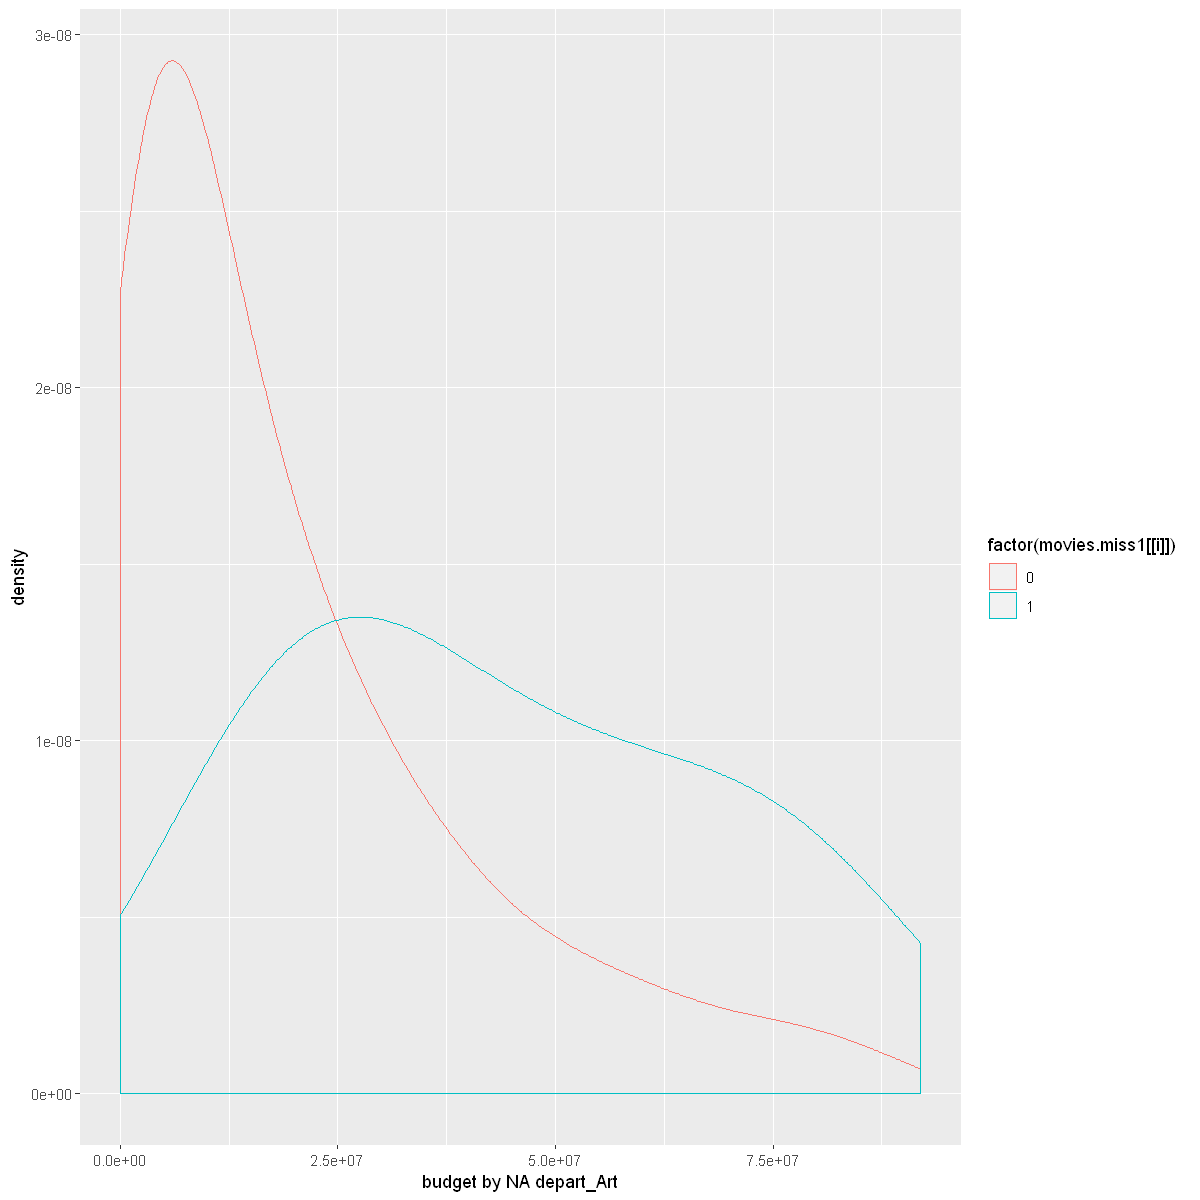


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -15.021, df = 880.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.461425 -1.123648
sample estimates:
mean of x mean of y 
 2.773853  4.066390 

[1] "producers_cnt by NA depart_Art"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


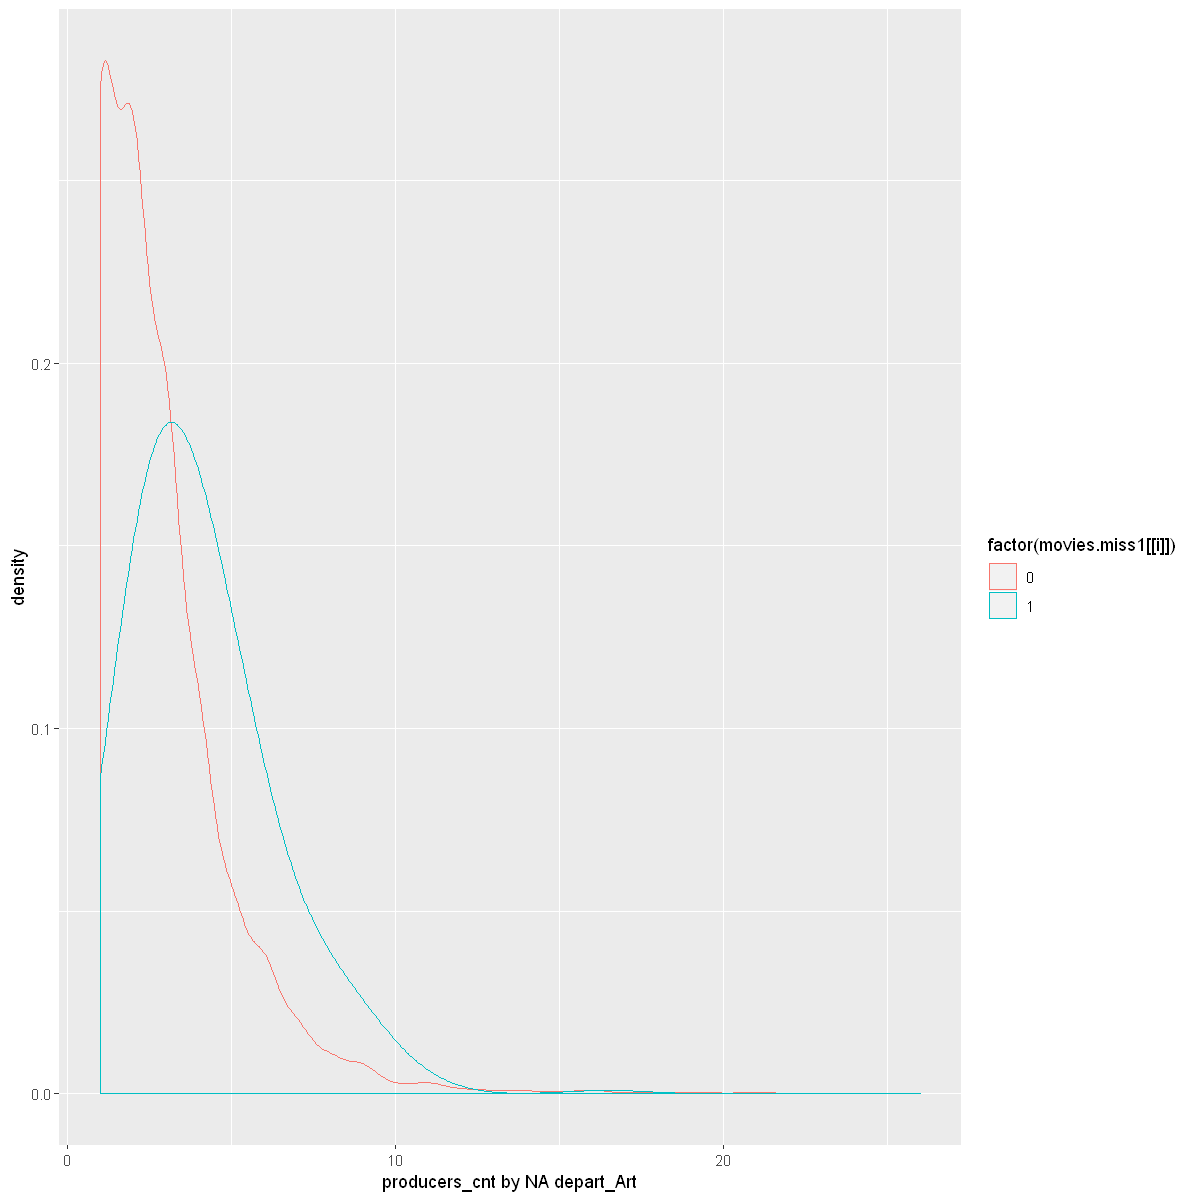


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -9.7365, df = 769.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.663894 -1.769949
sample estimates:
mean of x mean of y 
 3.855806  6.072727 

[1] "actor1_movies_cnt by NA depart_Art"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


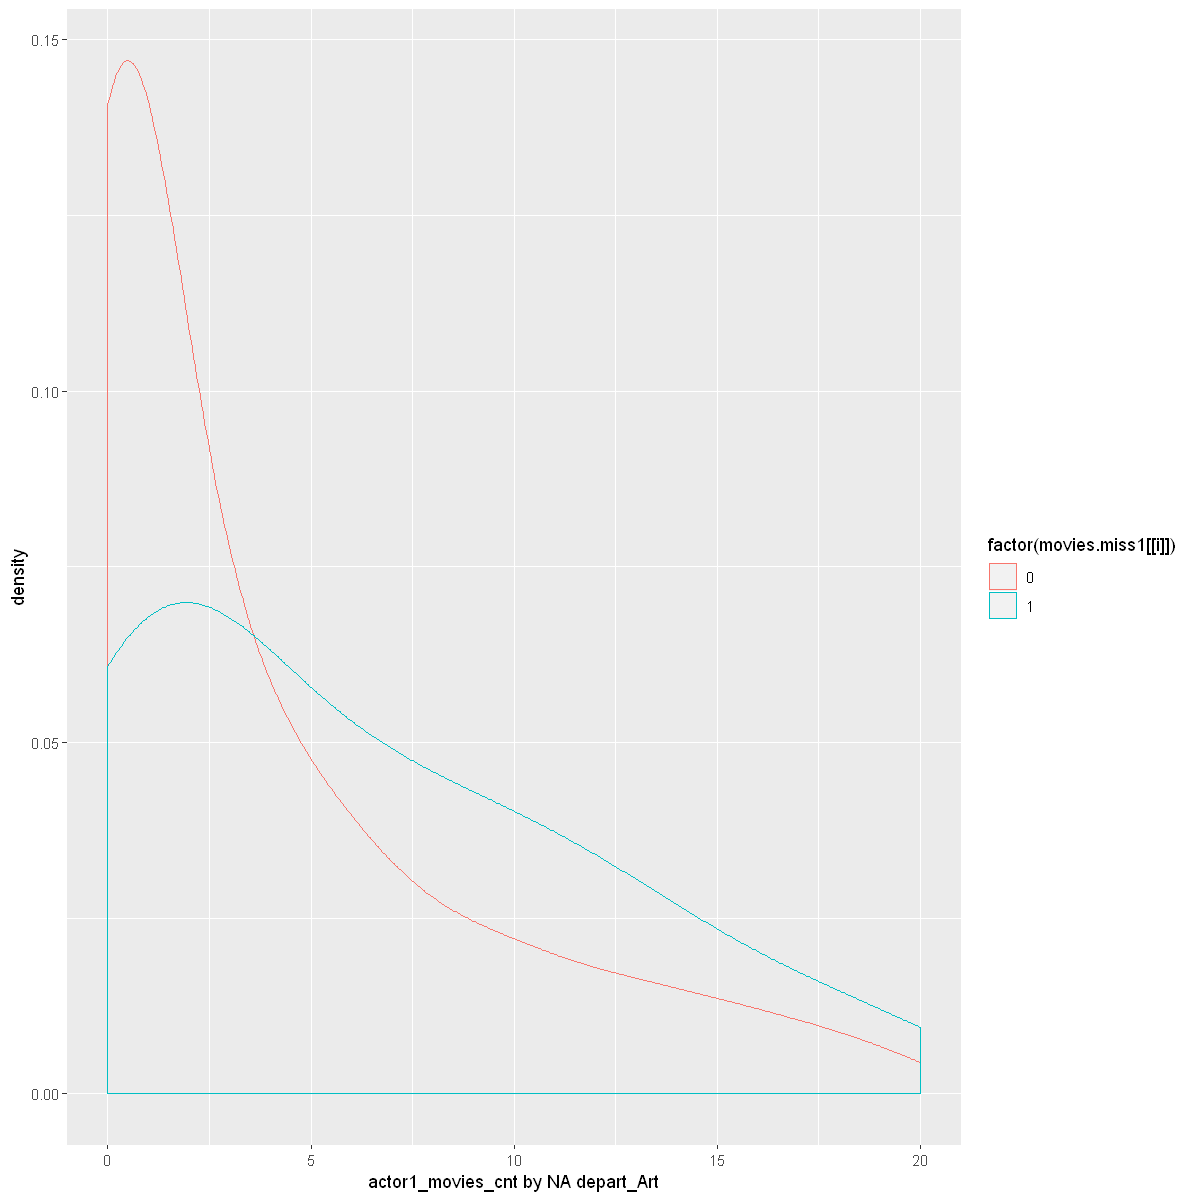


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.7996, df = 711.79, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.200874 -1.397934
sample estimates:
mean of x mean of y 
 3.126641  4.926045 

[1] "actor2_movies_cnt by NA depart_Art"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


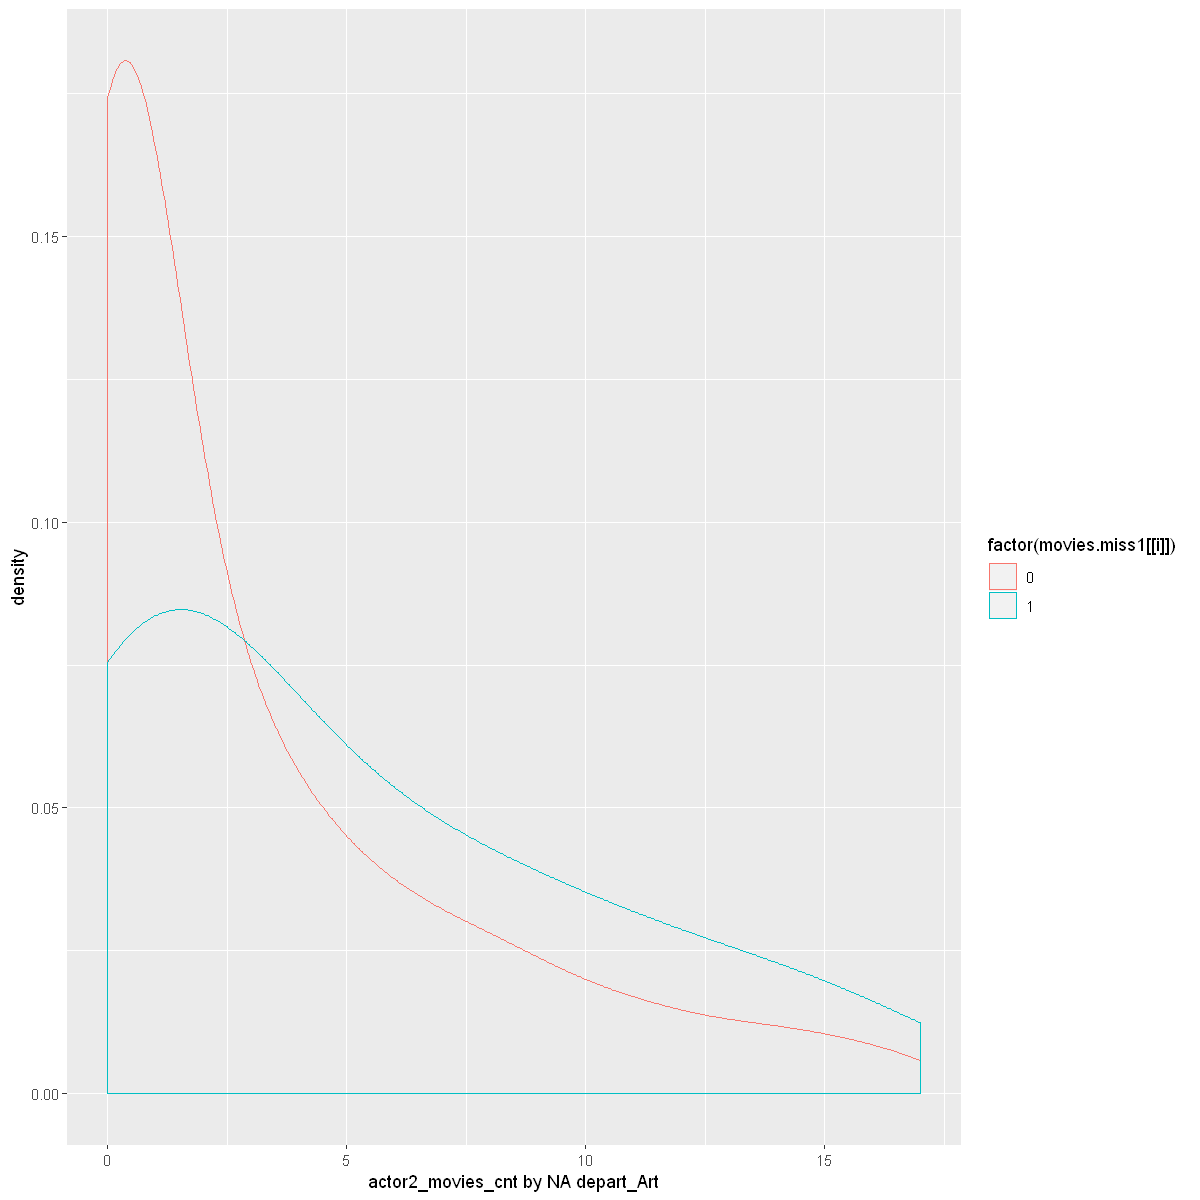


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.5218, df = 598.04, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -83967587 -52514046
sample estimates:
mean of x mean of y 
167246278 235487094 

[1] "actor0_prev_revenue by NA depart_Art"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


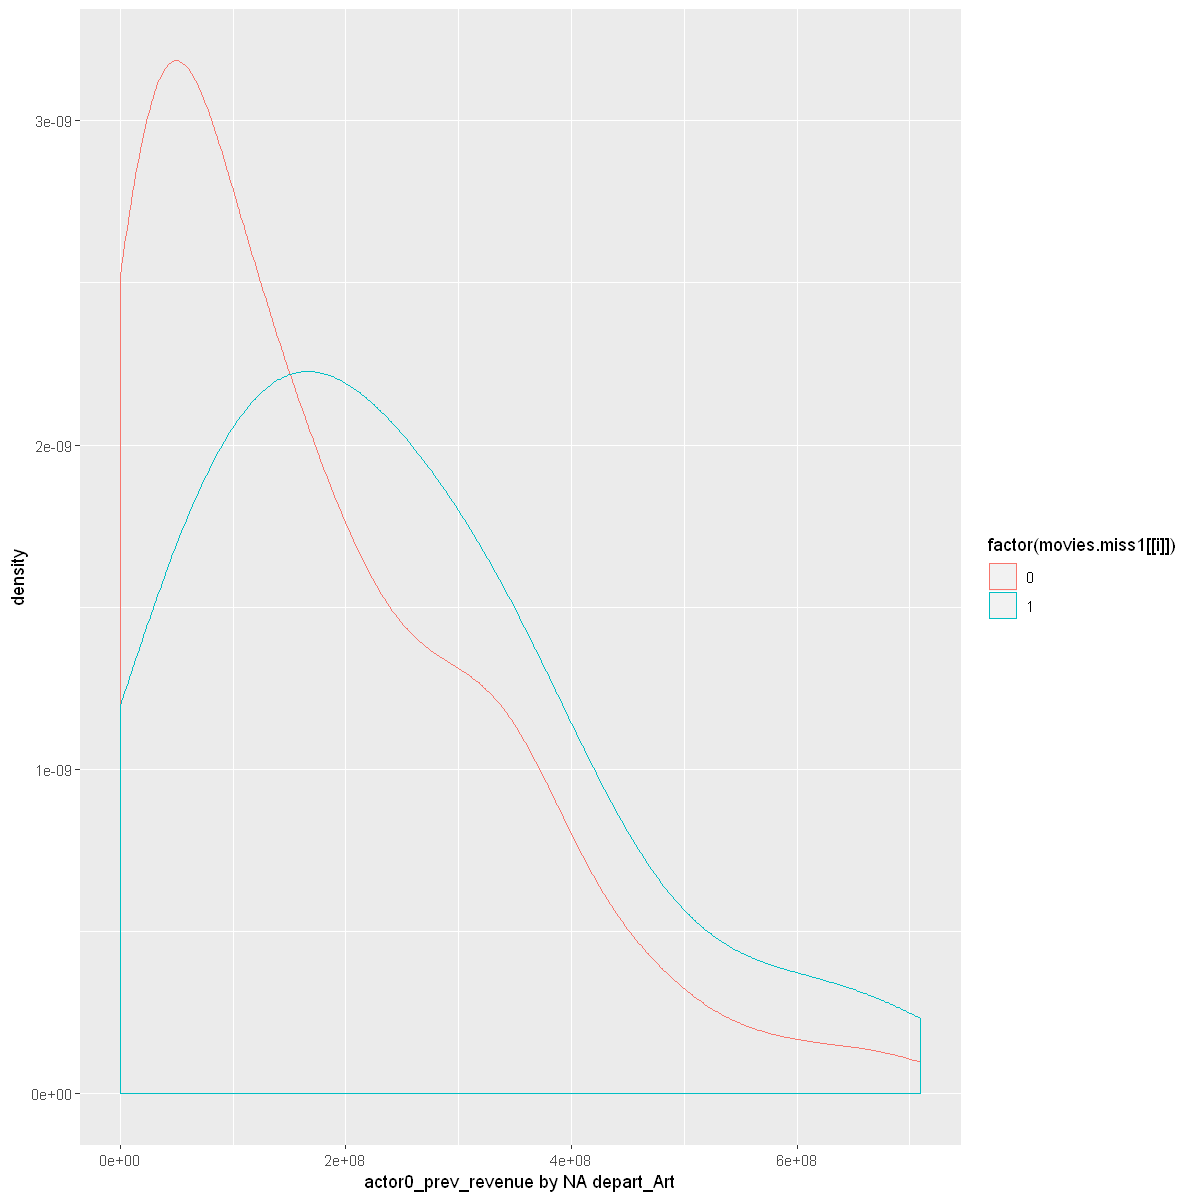


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -5.4458, df = 578.16, p-value = 7.636e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -50758469 -23850237
sample estimates:
mean of x mean of y 
140728967 178033319 

[1] "actor1_prev_revenue by NA depart_Art"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


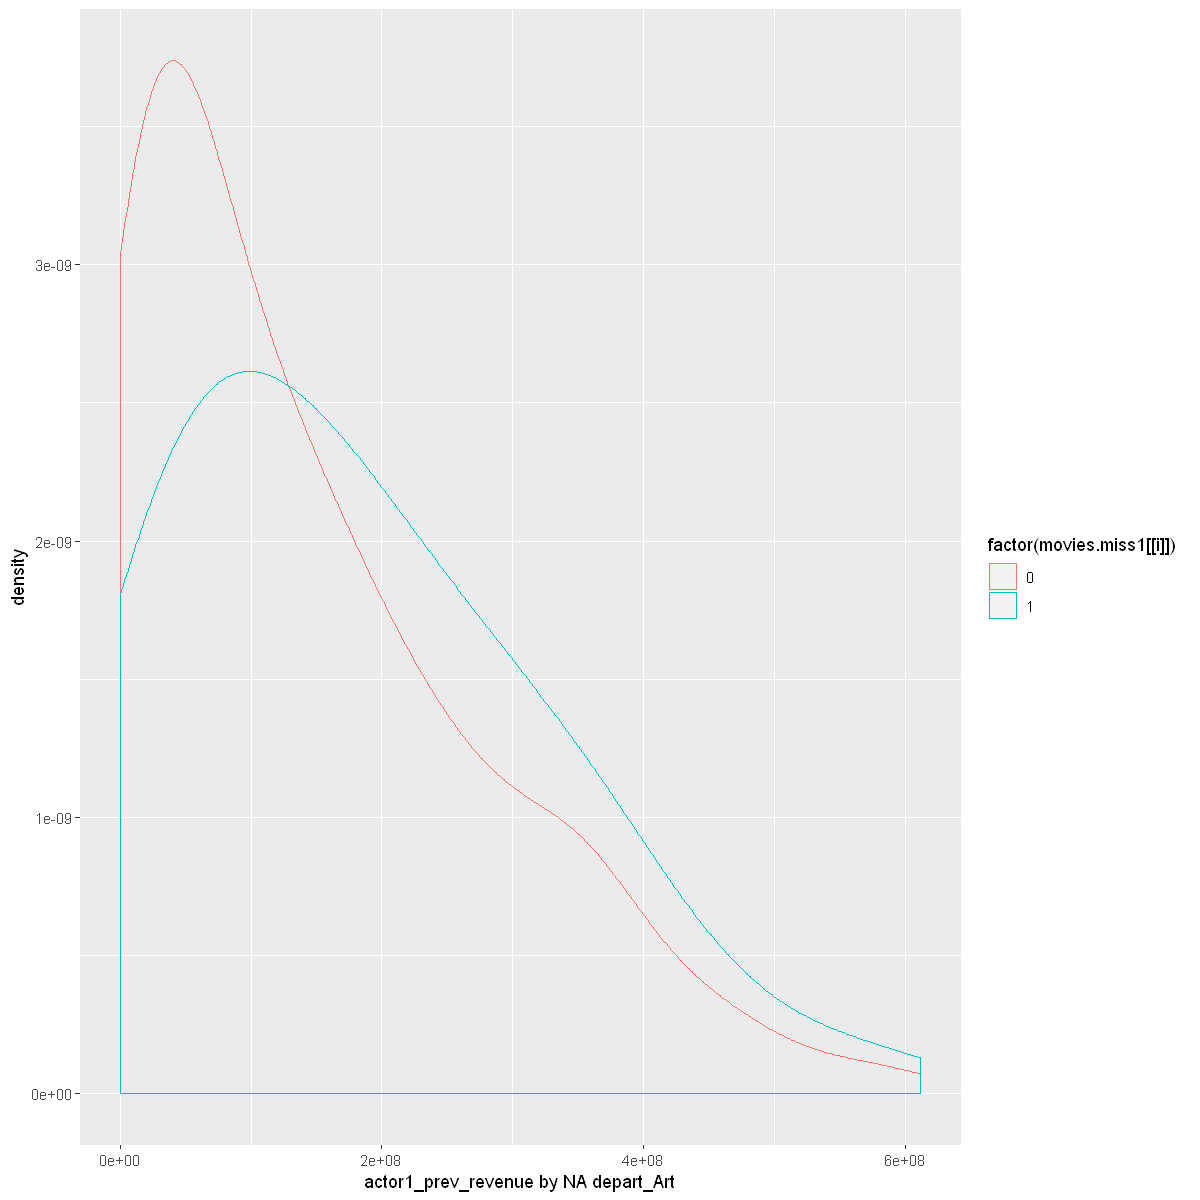


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -5.5546, df = 540.99, p-value = 4.369e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -51562775 -24620861
sample estimates:
mean of x mean of y 
129234013 167325831 

[1] "actor2_prev_revenue by NA depart_Art"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


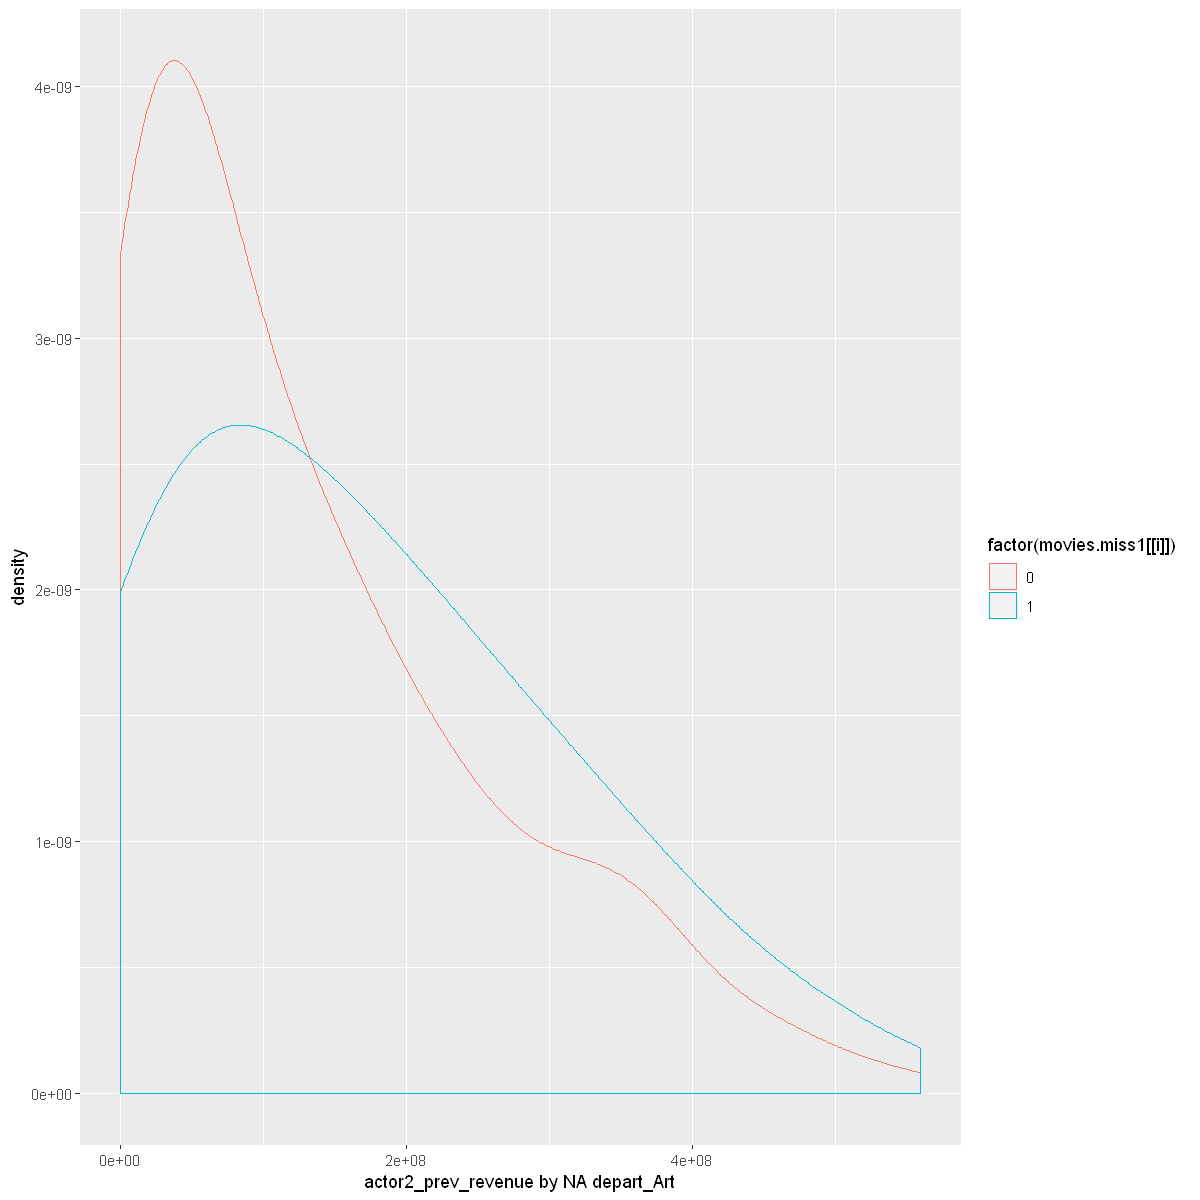


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.736, df = 709.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1966512 -0.8536639
sample estimates:
mean of x mean of y 
 1.261701  2.286859 

[1] "director_movies_cnt by NA depart_Art"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


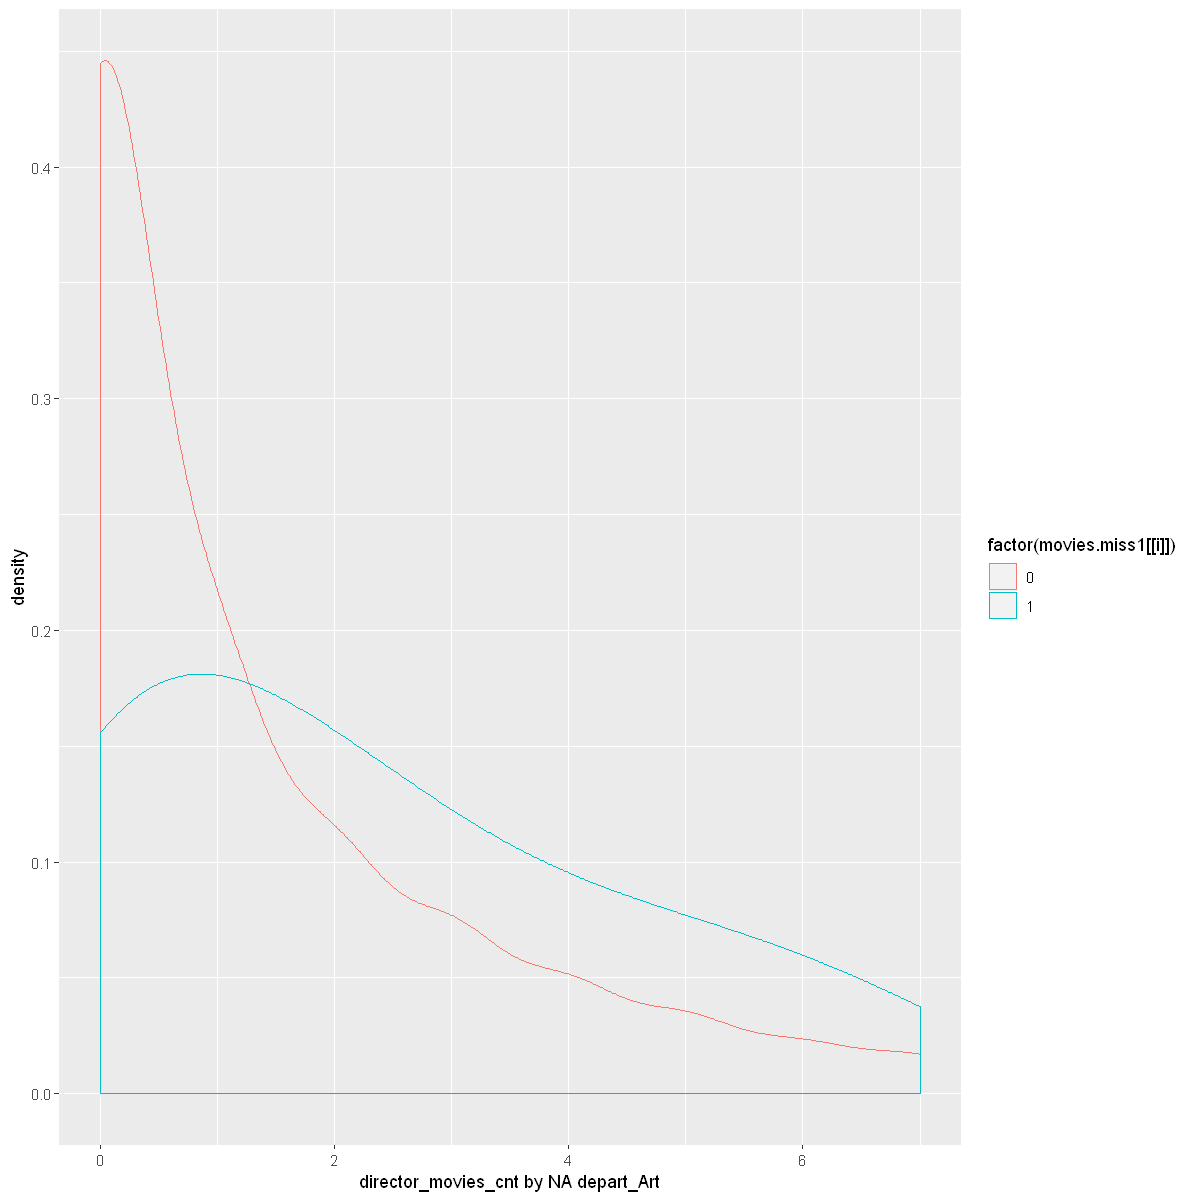


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -19.183, df = 242.51, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.270000 -1.847215
sample estimates:
mean of x mean of y 
 1.038850  3.097458 

[1] "depart_Camera by NA depart_Art"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


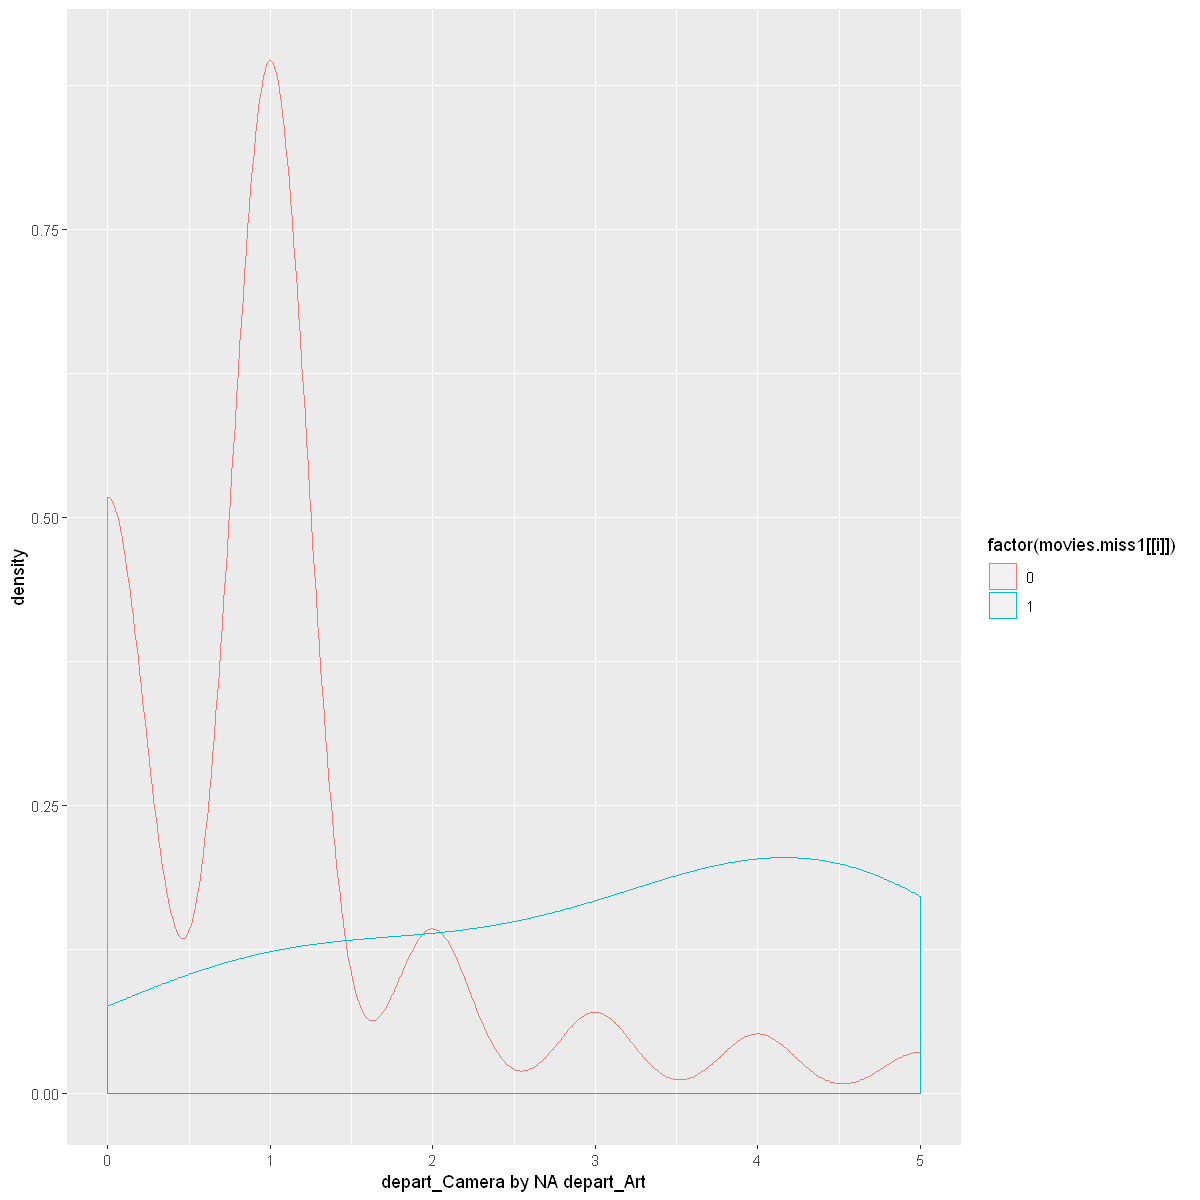


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -15.727, df = 160.59, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.339279 -1.817324
sample estimates:
mean of x mean of y 
0.8261571 2.9044586 

[1] "depart_Custom_Mkup by NA depart_Art"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


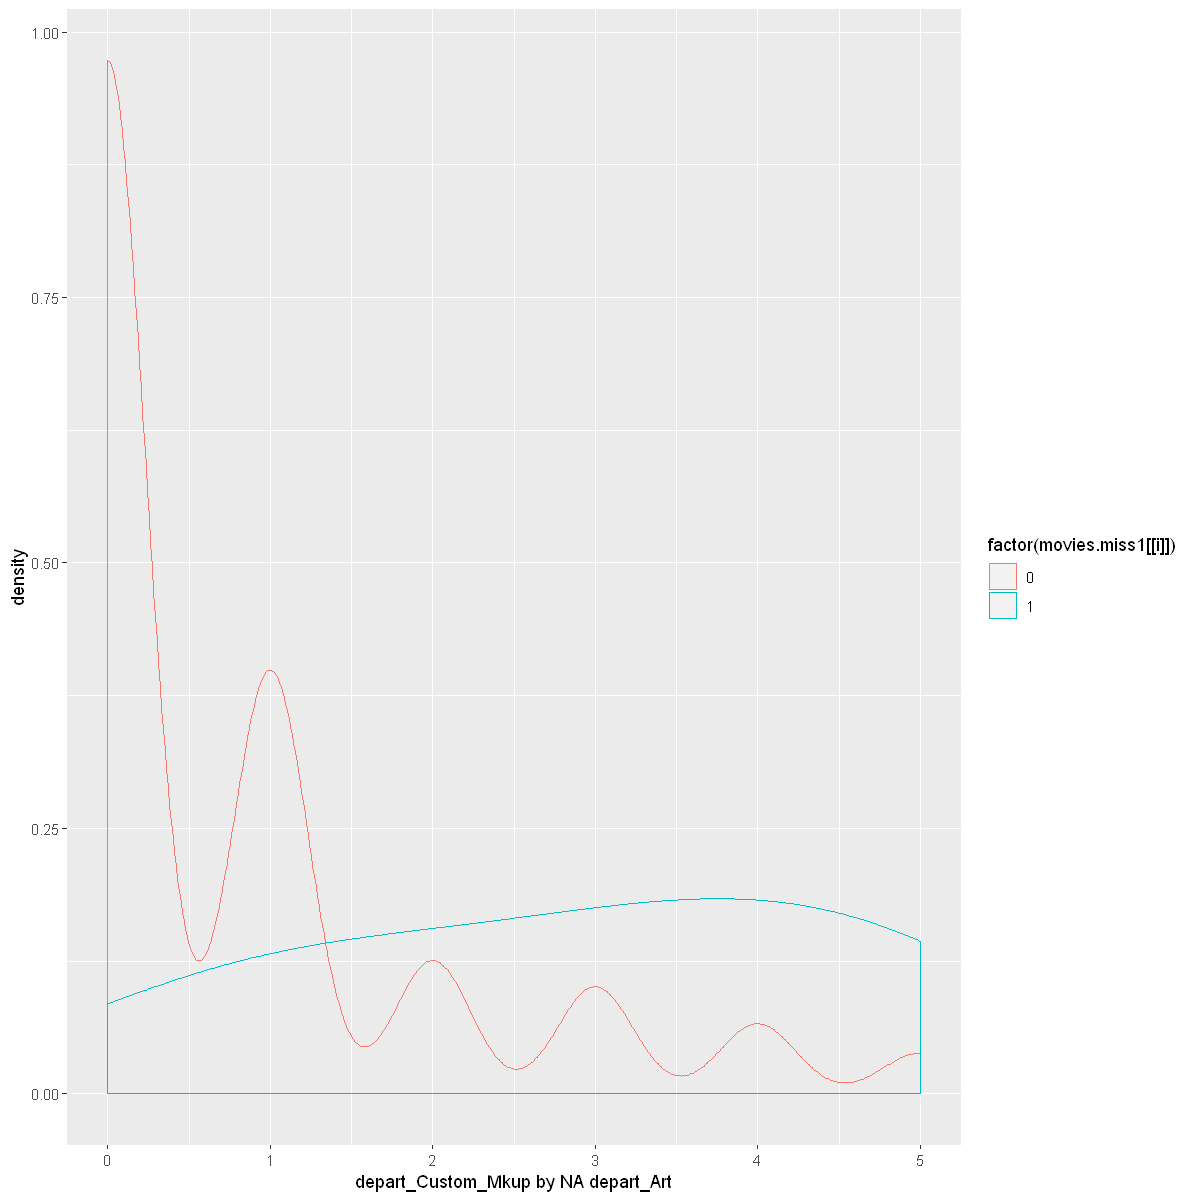


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -30.284, df = 507.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0751100 -0.9441136
sample estimates:
mean of x mean of y 
 1.344736  2.354348 

[1] "depart_Directing by NA depart_Art"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


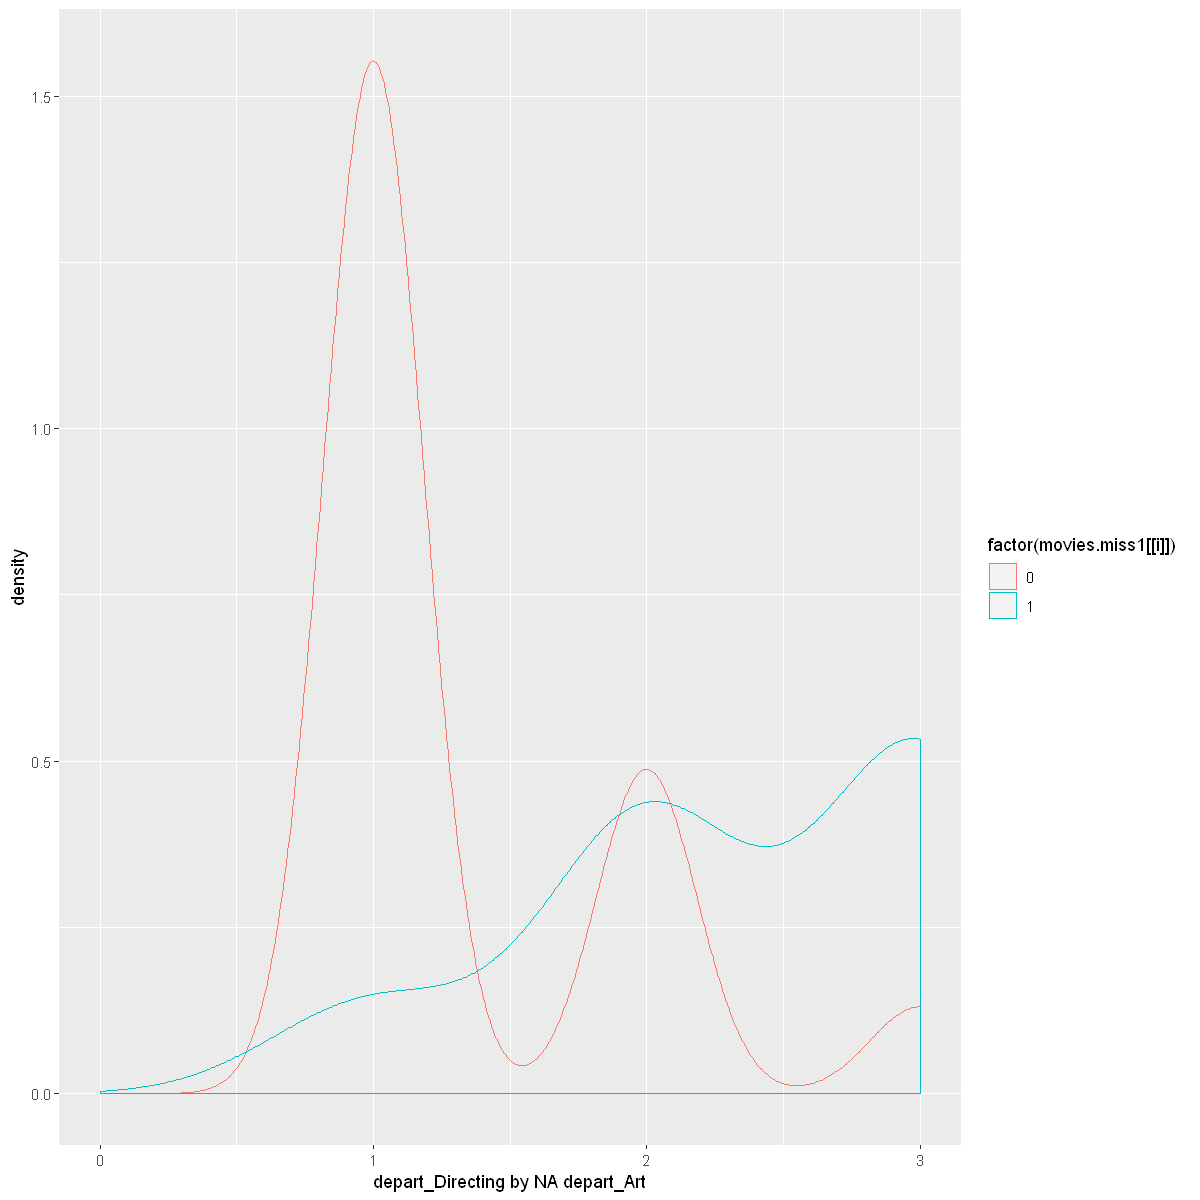


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -9.6418, df = 101.64, p-value = 5.218e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.226203 -1.466514
sample estimates:
mean of x mean of y 
 1.232849  3.079208 

[1] "depart_Sound by NA depart_Art"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


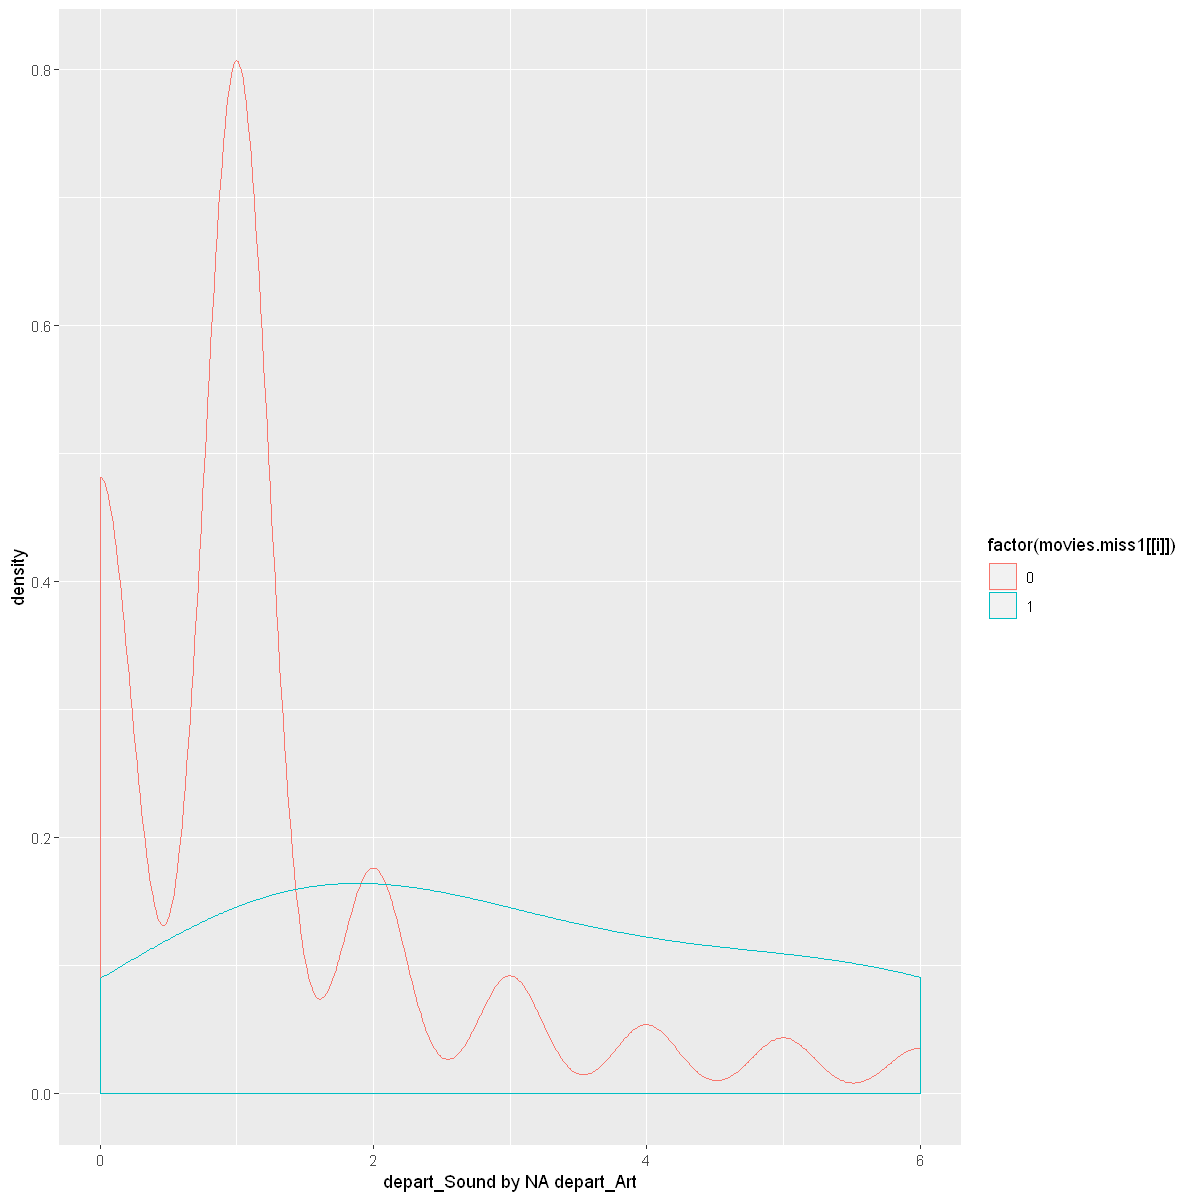


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.26, df = 314.27, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -176477164 -119683908
sample estimates:
mean of x mean of y 
 51937674 200018210 

[1] "revenue by NA depart_Art"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


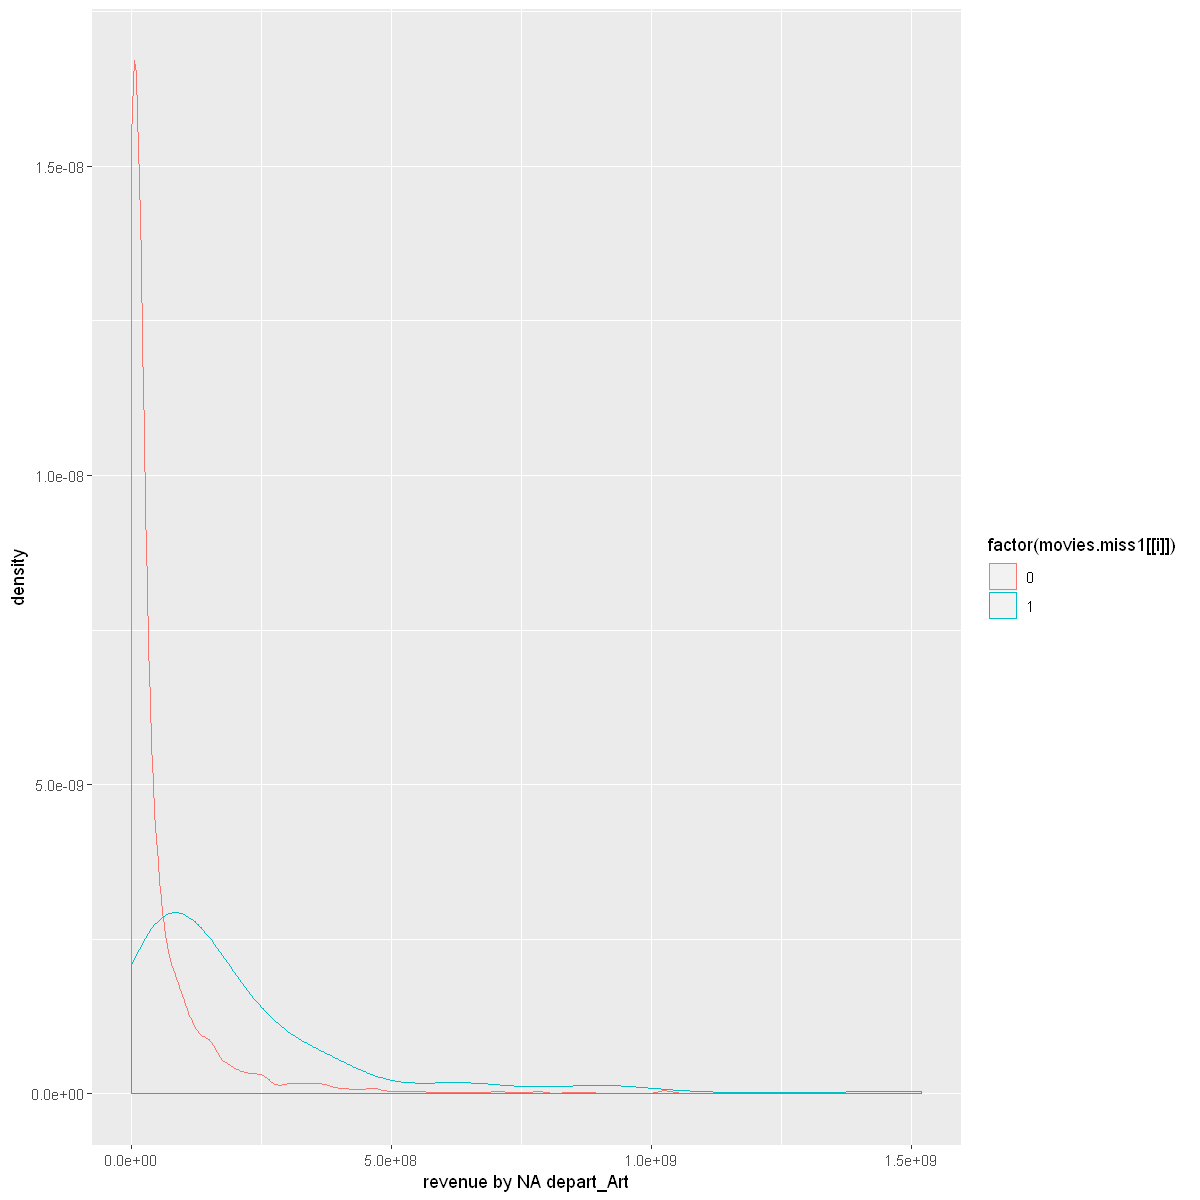


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -15.864, df = 577.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21089904 -16443172
sample estimates:
mean of x mean of y 
 20242292  39008830 

[1] "budget by NA depart_Camera"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


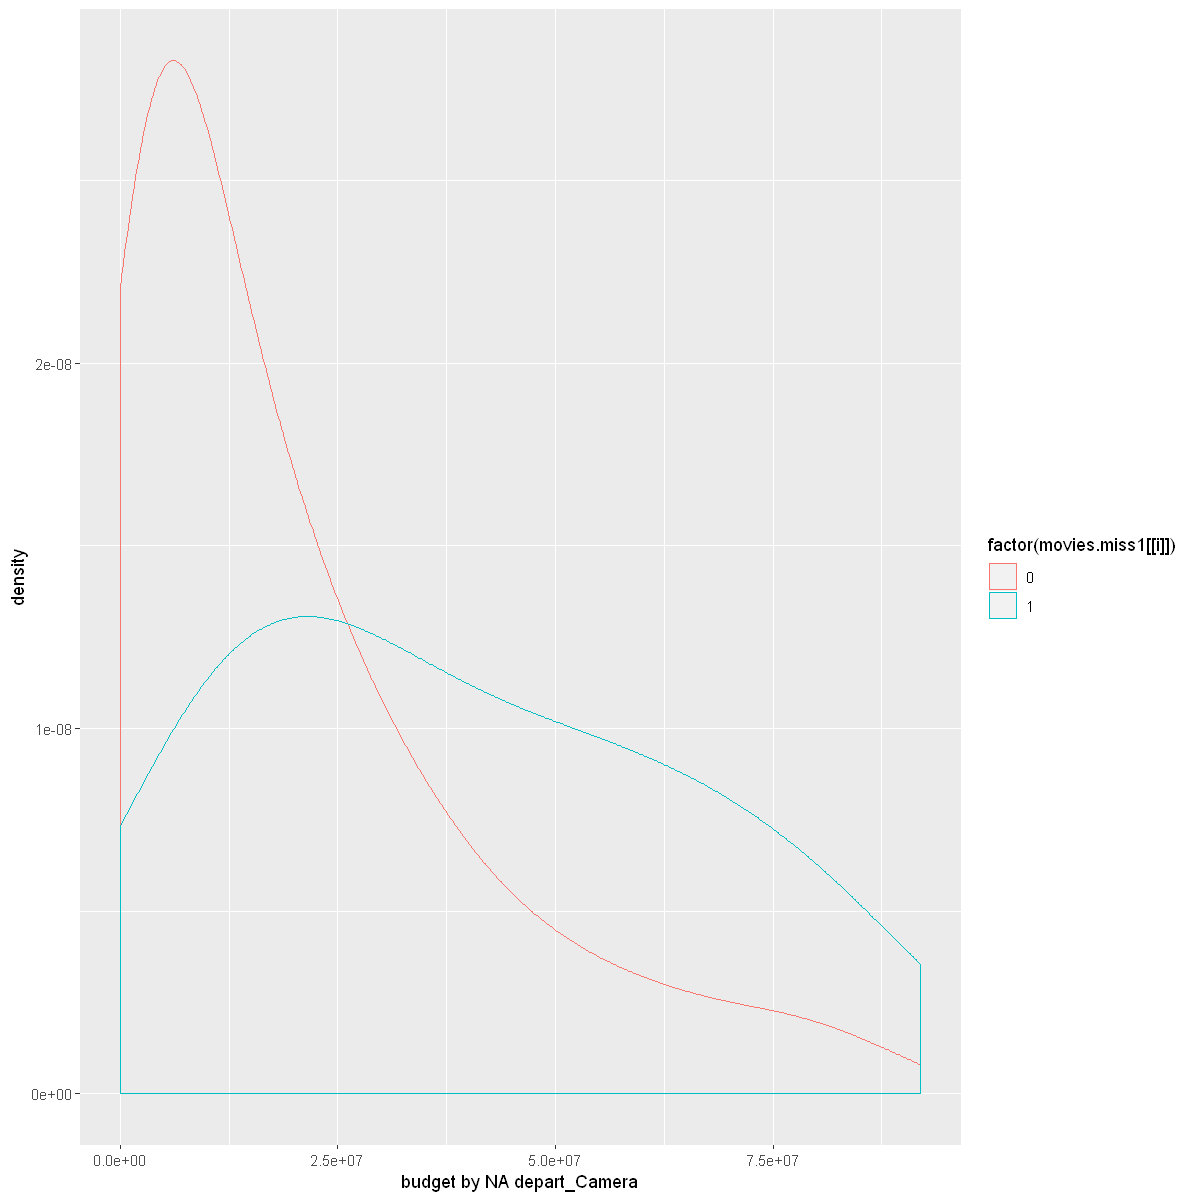


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -15.866, df = 827.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.630178 -1.271229
sample estimates:
mean of x mean of y 
 2.762458  4.213162 

[1] "producers_cnt by NA depart_Camera"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


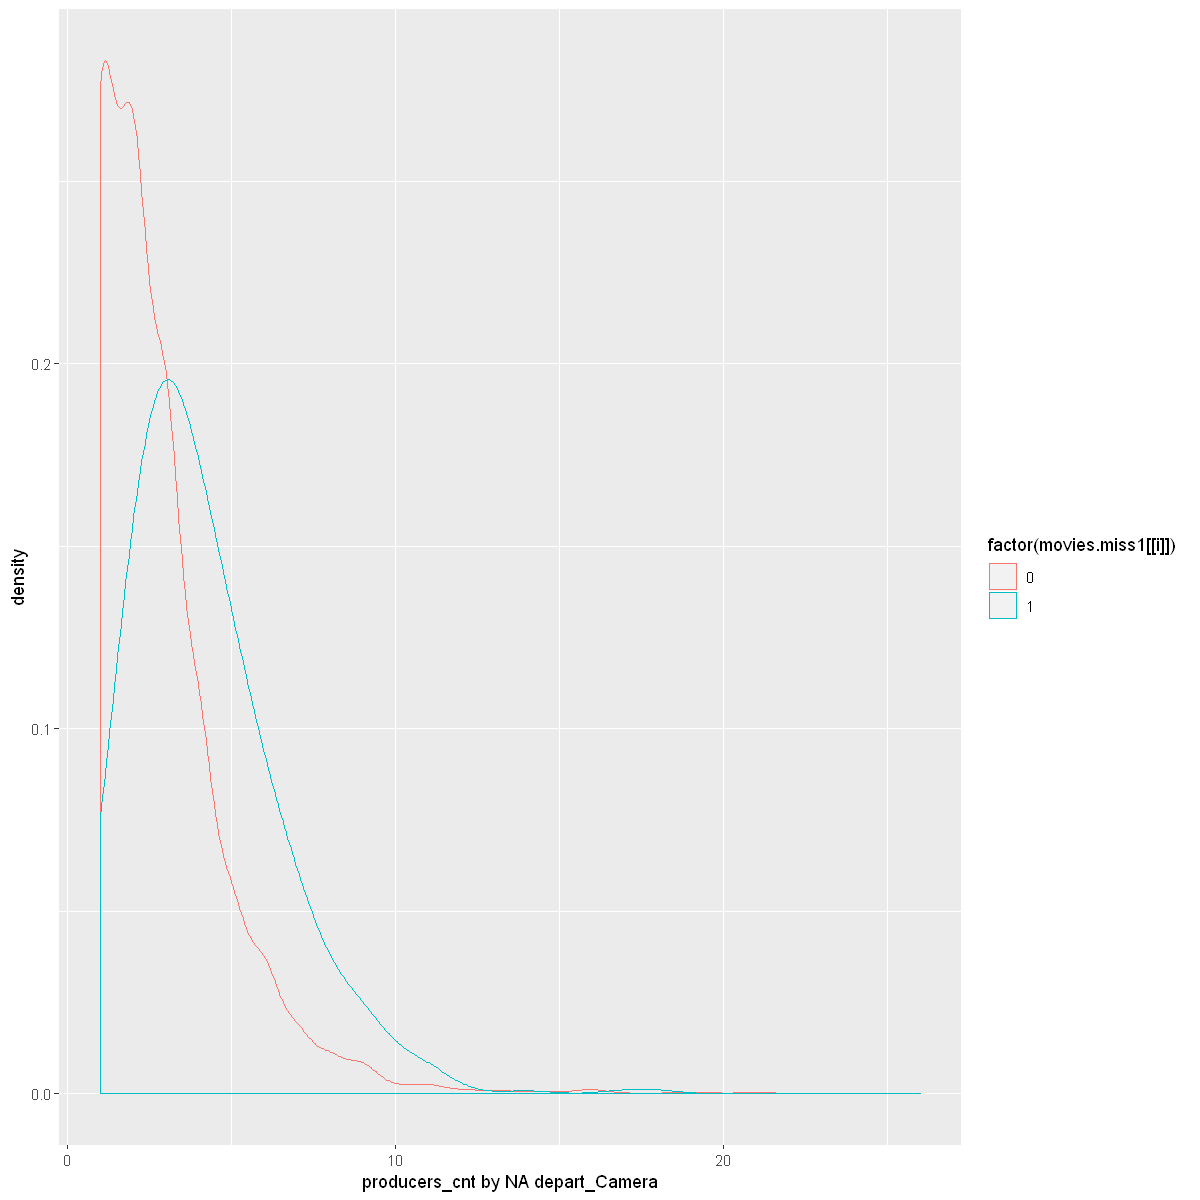


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.789, df = 734.56, p-value = 2.305e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.297595 -1.372541
sample estimates:
mean of x mean of y 
 3.898056  5.733124 

[1] "actor1_movies_cnt by NA depart_Camera"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


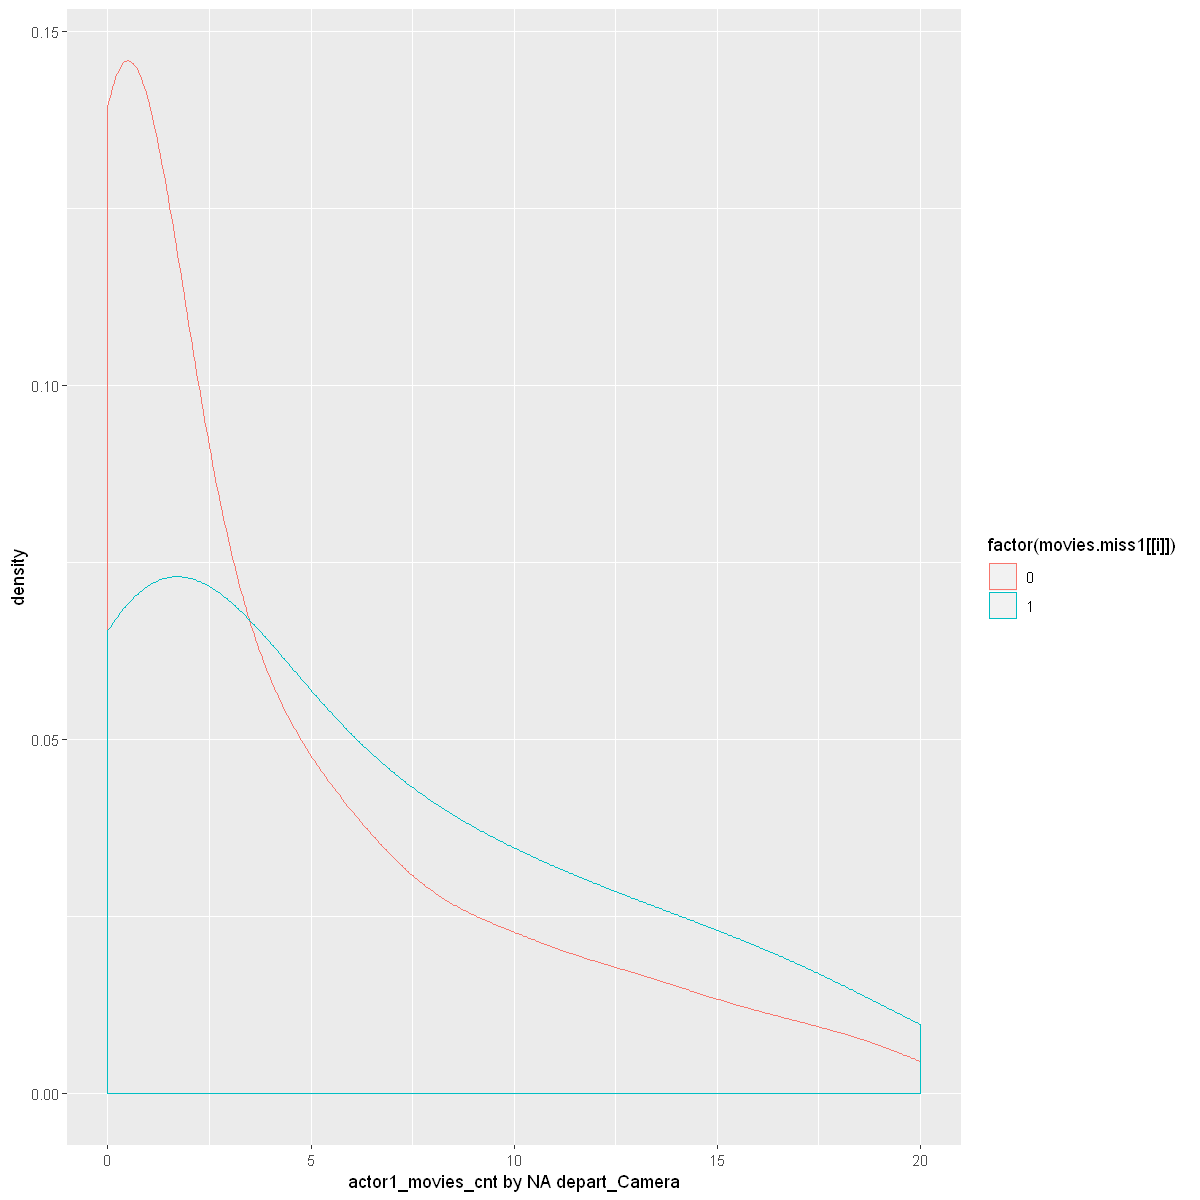


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.4651, df = 696.5, p-value = 2.492e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.917748 -1.119050
sample estimates:
mean of x mean of y 
 3.155406  4.673806 

[1] "actor2_movies_cnt by NA depart_Camera"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


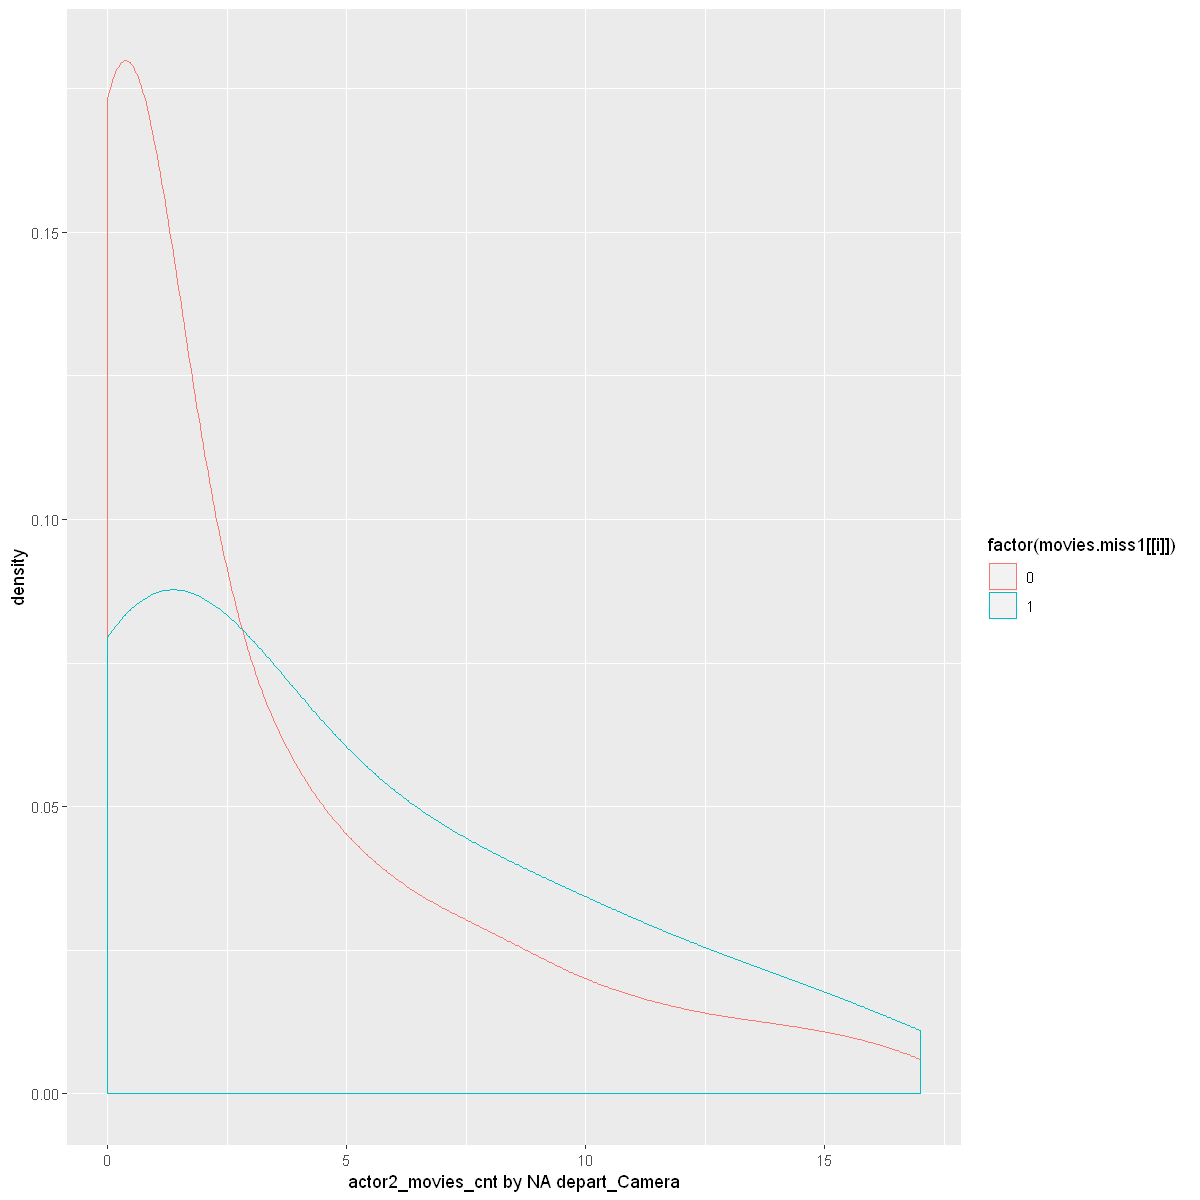


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.8227, df = 571.38, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -90202420 -57353339
sample estimates:
mean of x mean of y 
166826589 240604469 

[1] "actor0_prev_revenue by NA depart_Camera"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


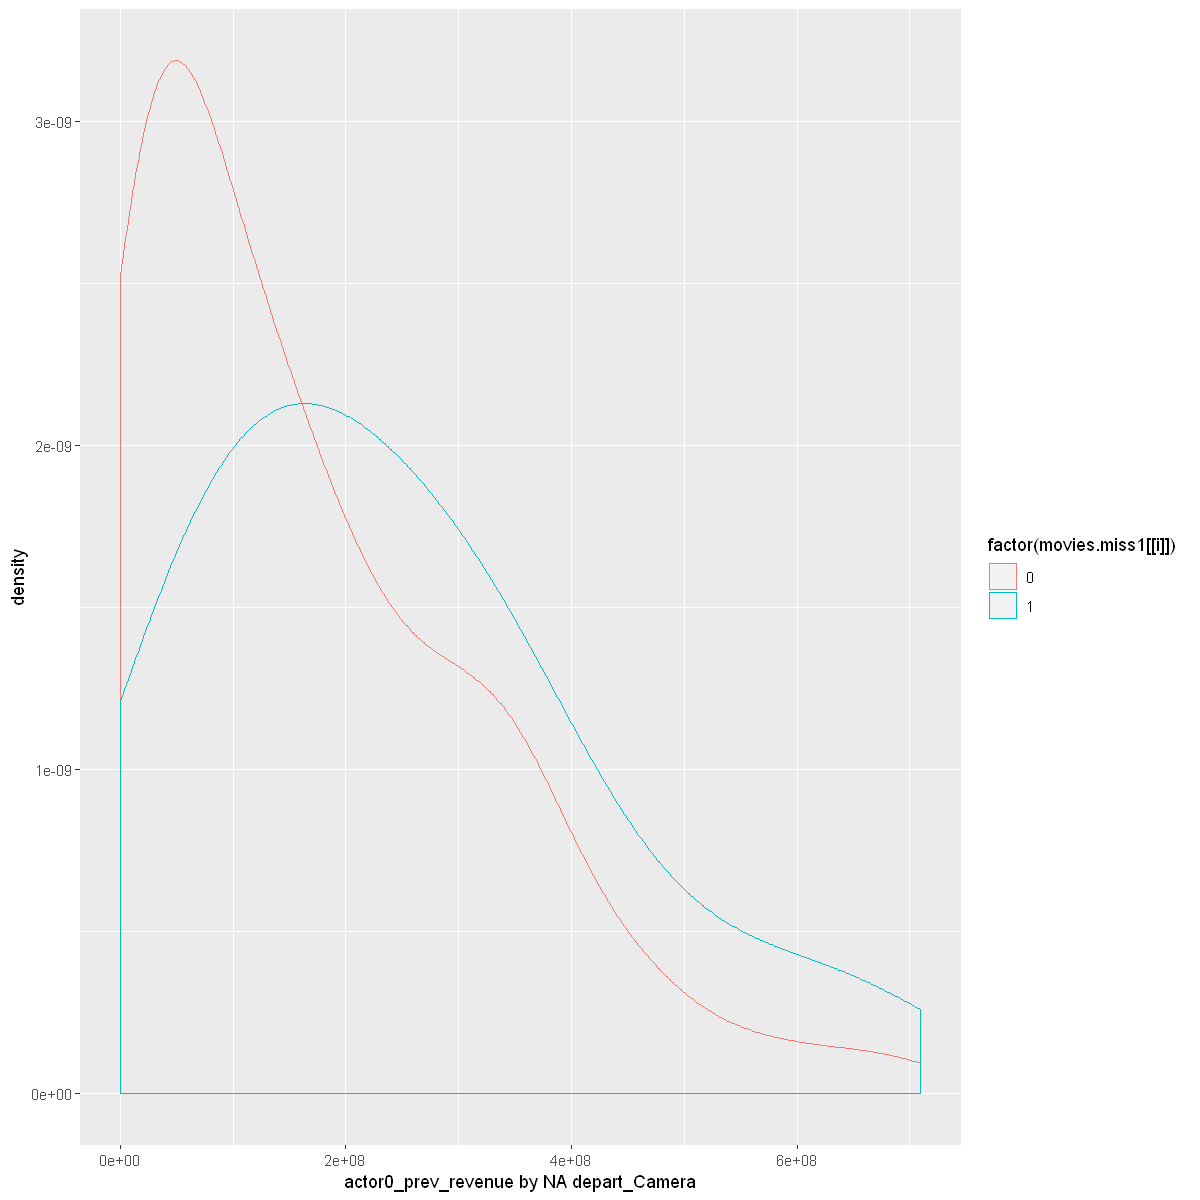


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -5.6897, df = 527.25, p-value = 2.112e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -53455205 -26016375
sample estimates:
mean of x mean of y 
140810687 180546477 

[1] "actor1_prev_revenue by NA depart_Camera"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


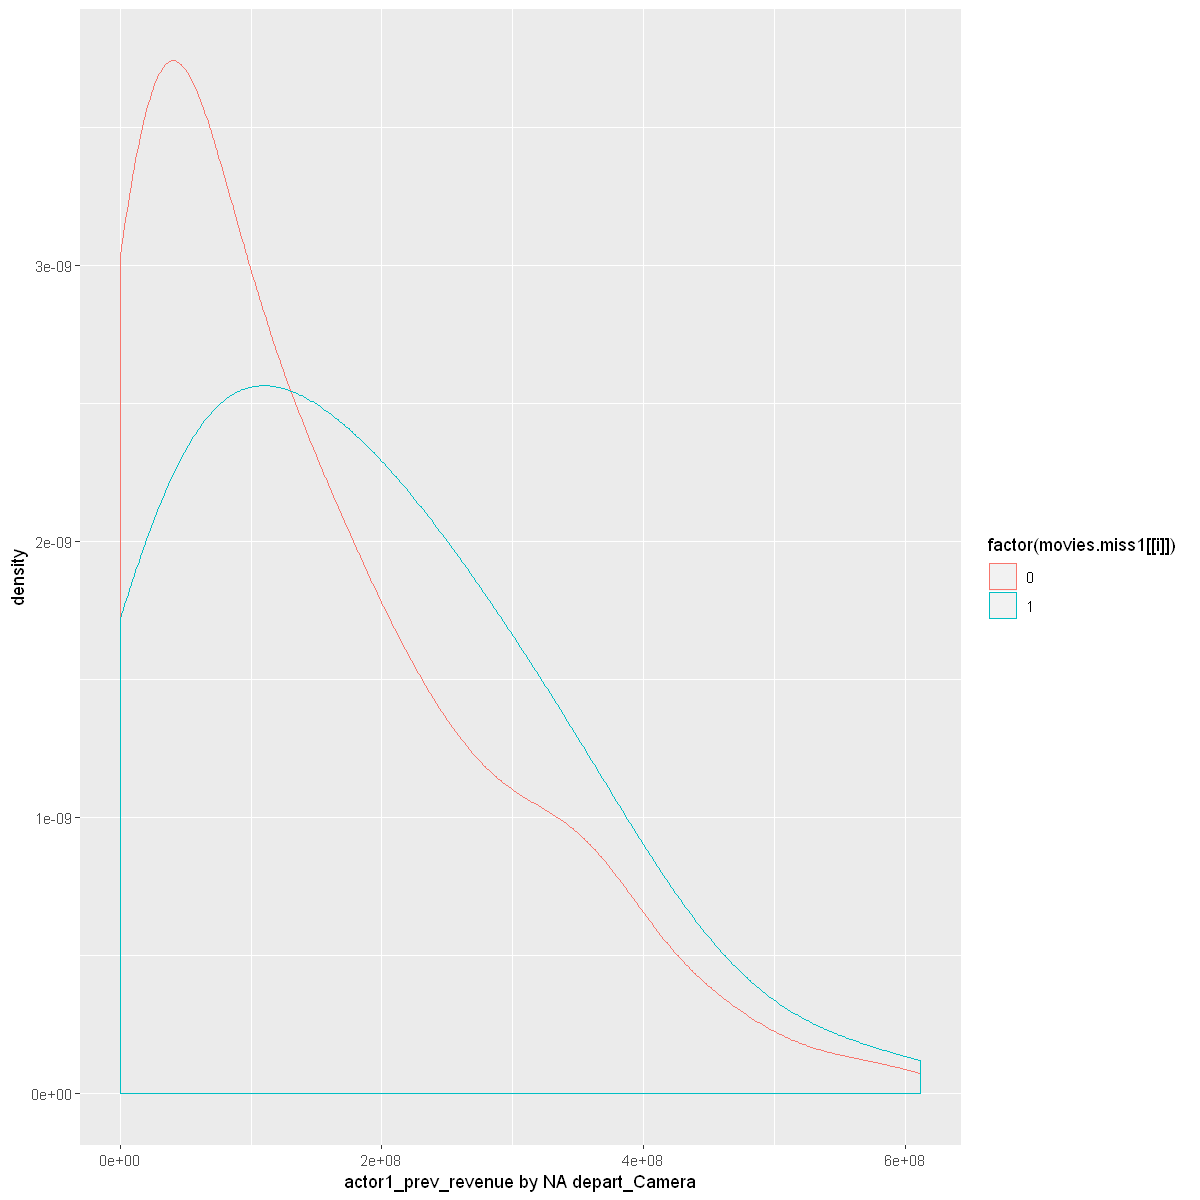


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.2765, df = 504.83, p-value = 2.271e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -43540608 -16128136
sample estimates:
mean of x mean of y 
130440222 160274594 

[1] "actor2_prev_revenue by NA depart_Camera"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


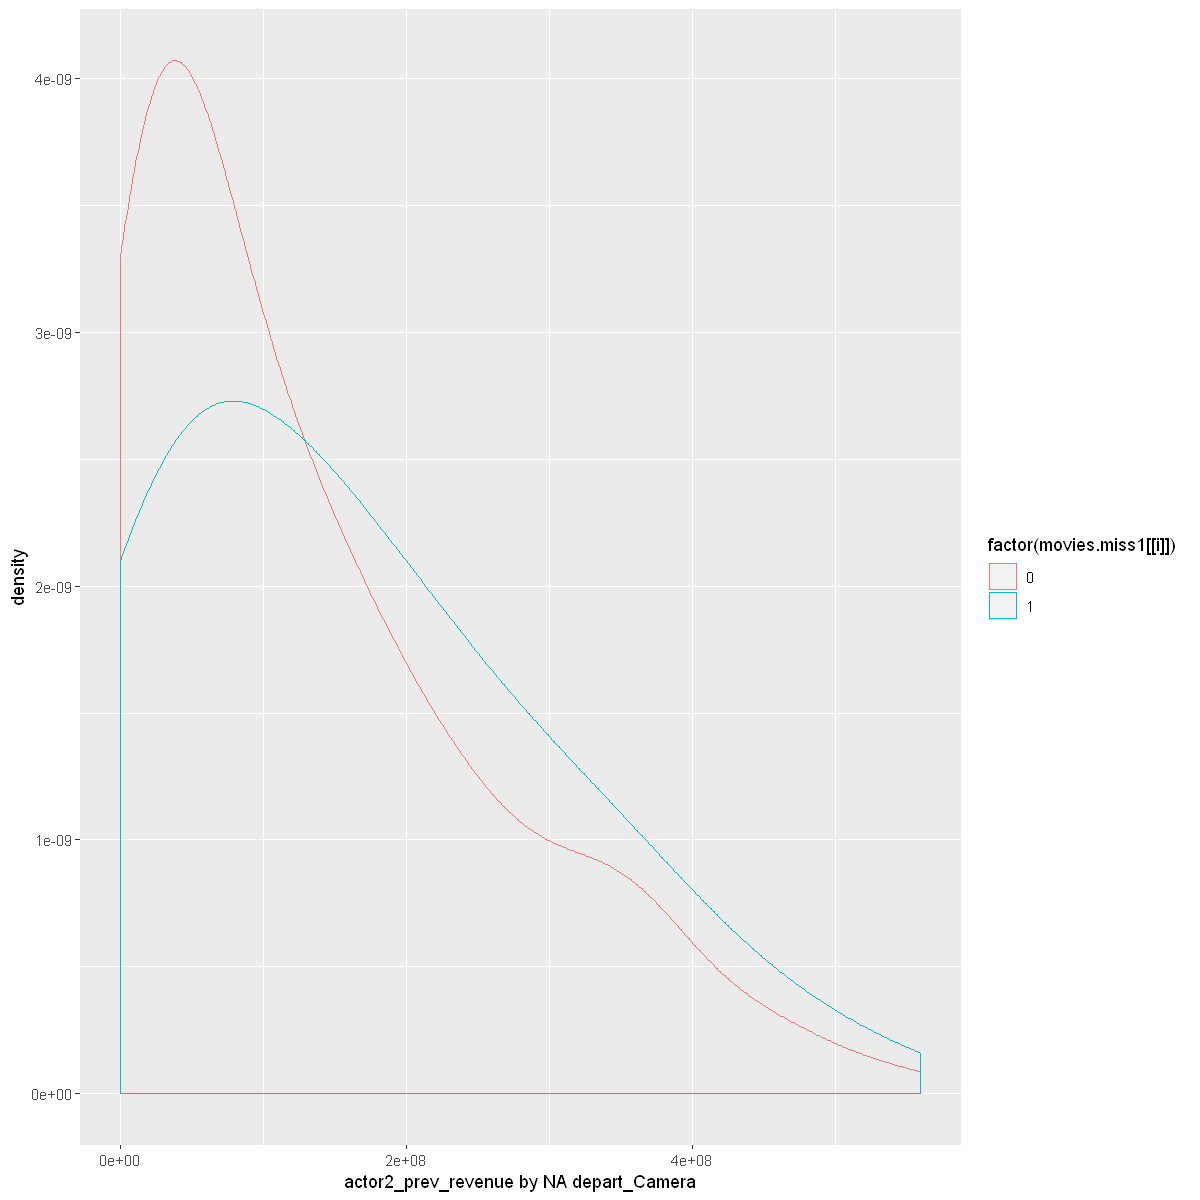


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.209, df = 698.68, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0850247 -0.7350155
sample estimates:
mean of x mean of y 
 1.272828  2.182848 

[1] "director_movies_cnt by NA depart_Camera"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


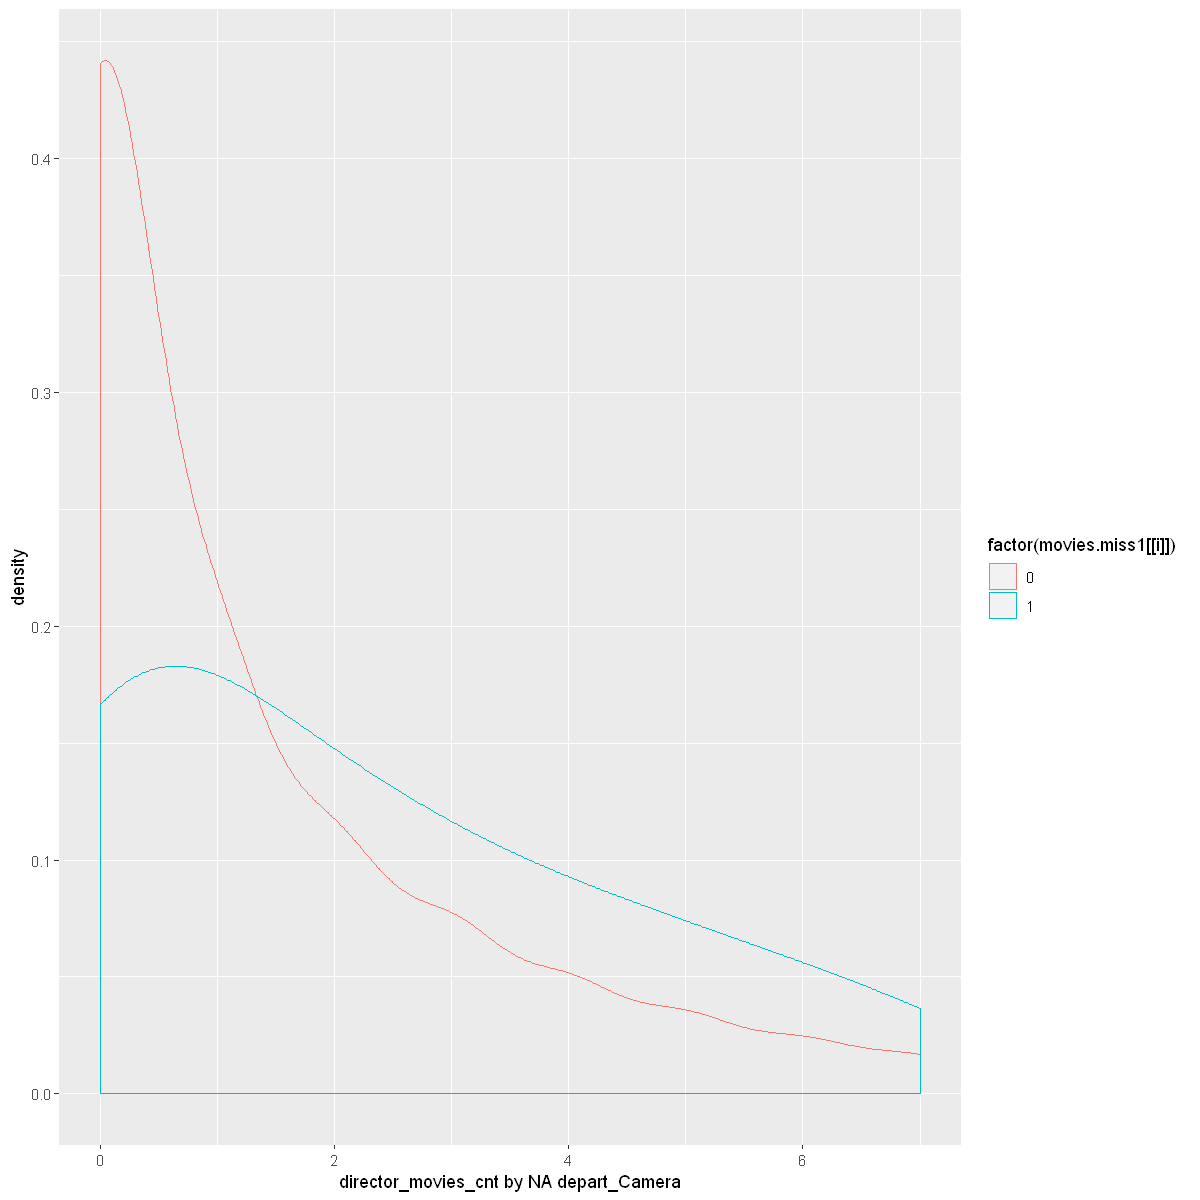


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -28.652, df = 226.98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.667511 -3.195529
sample estimates:
mean of x mean of y 
 1.498057  4.929577 

[1] "depart_Art by NA depart_Camera"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


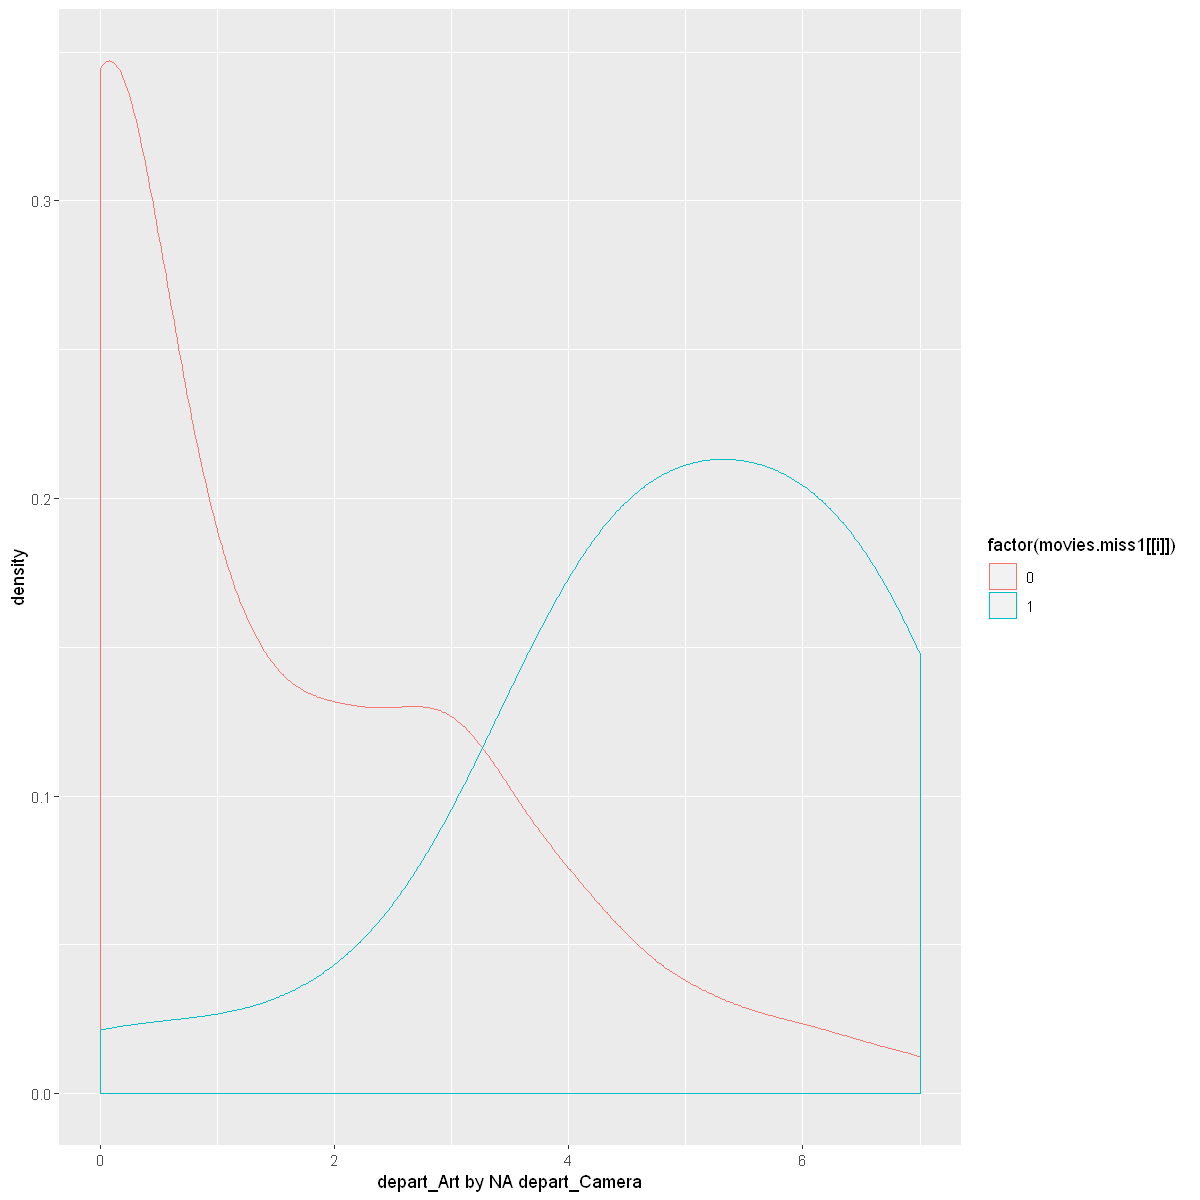


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -19.136, df = 129.43, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.877284 -2.338080
sample estimates:
mean of x mean of y 
0.8253892 3.4330709 

[1] "depart_Custom_Mkup by NA depart_Camera"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


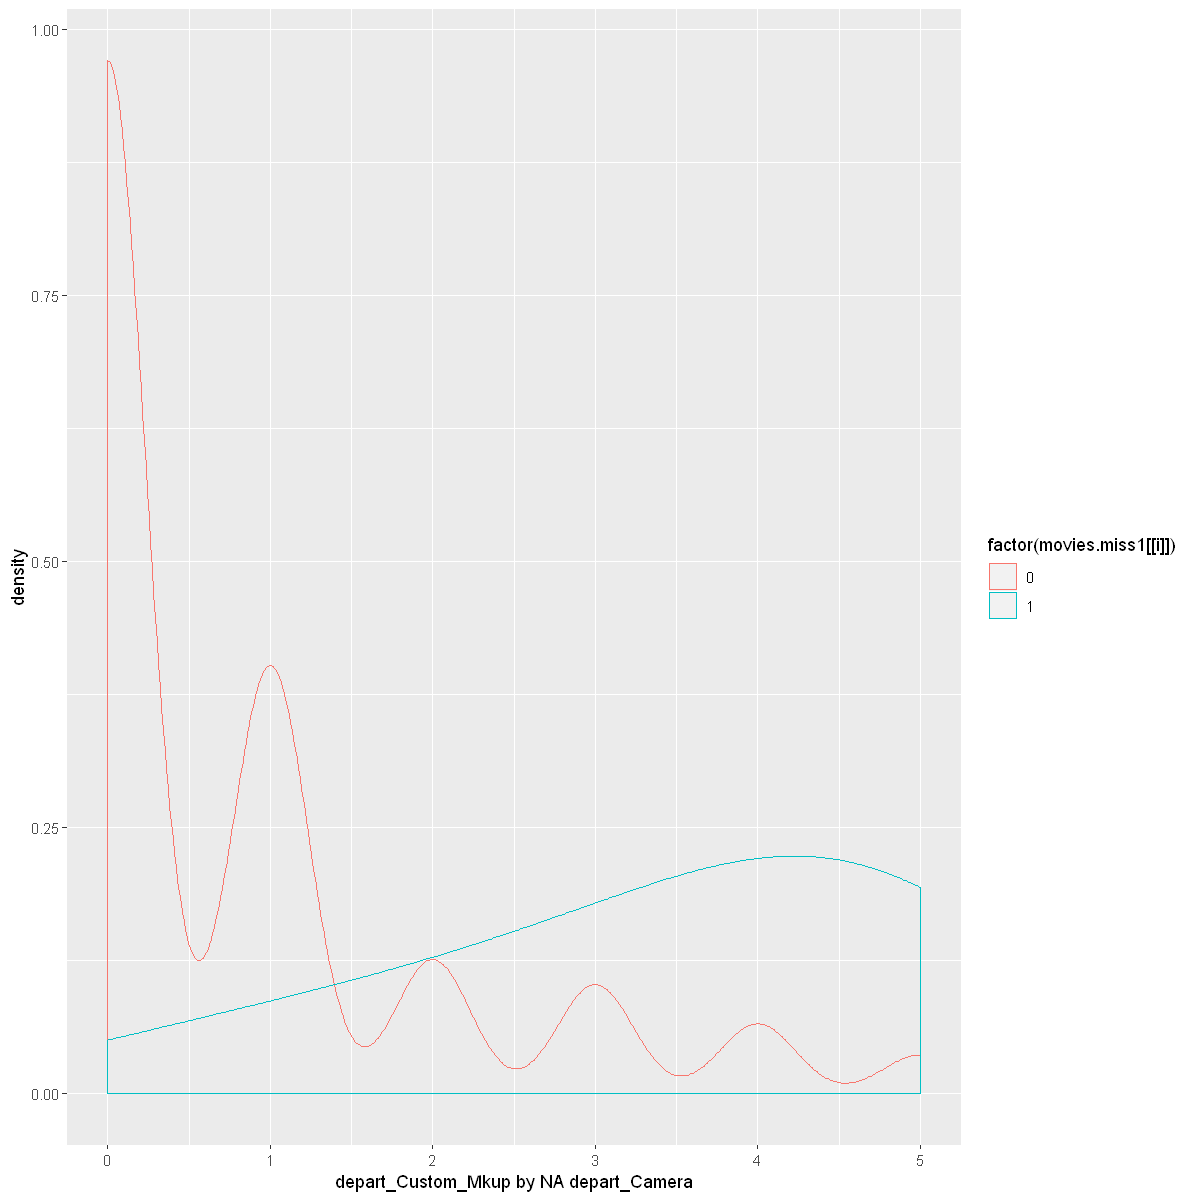


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -31.86, df = 493.76, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0956844 -0.9683947
sample estimates:
mean of x mean of y 
 1.345489  2.377528 

[1] "depart_Directing by NA depart_Camera"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


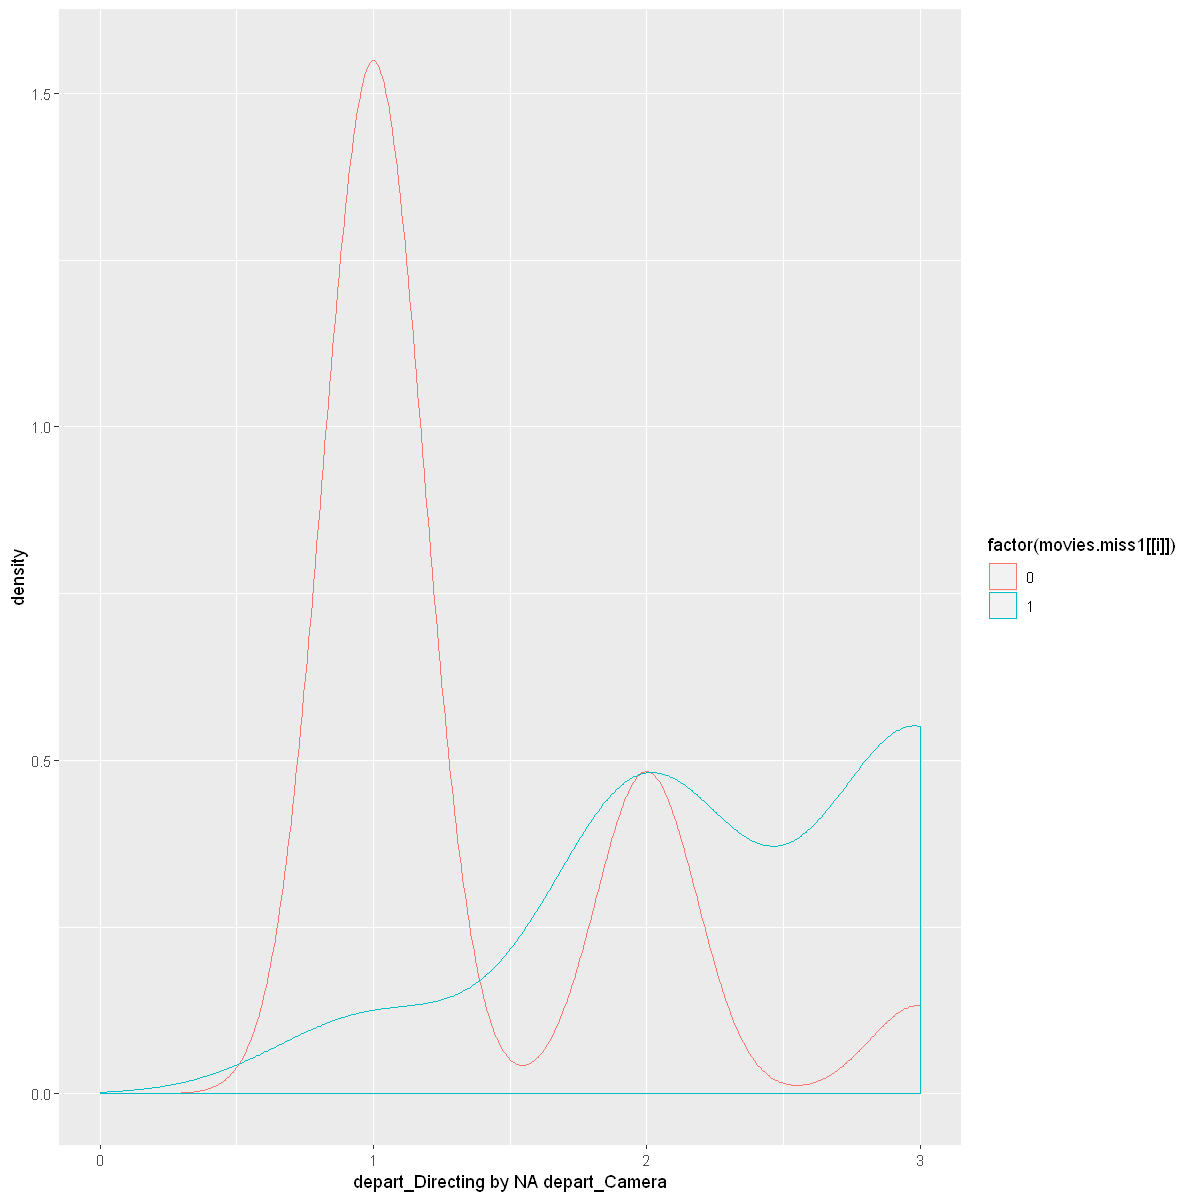


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -12.16, df = 73.964, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.001228 -2.156119
sample estimates:
mean of x mean of y 
 1.232137  3.810811 

[1] "depart_Sound by NA depart_Camera"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


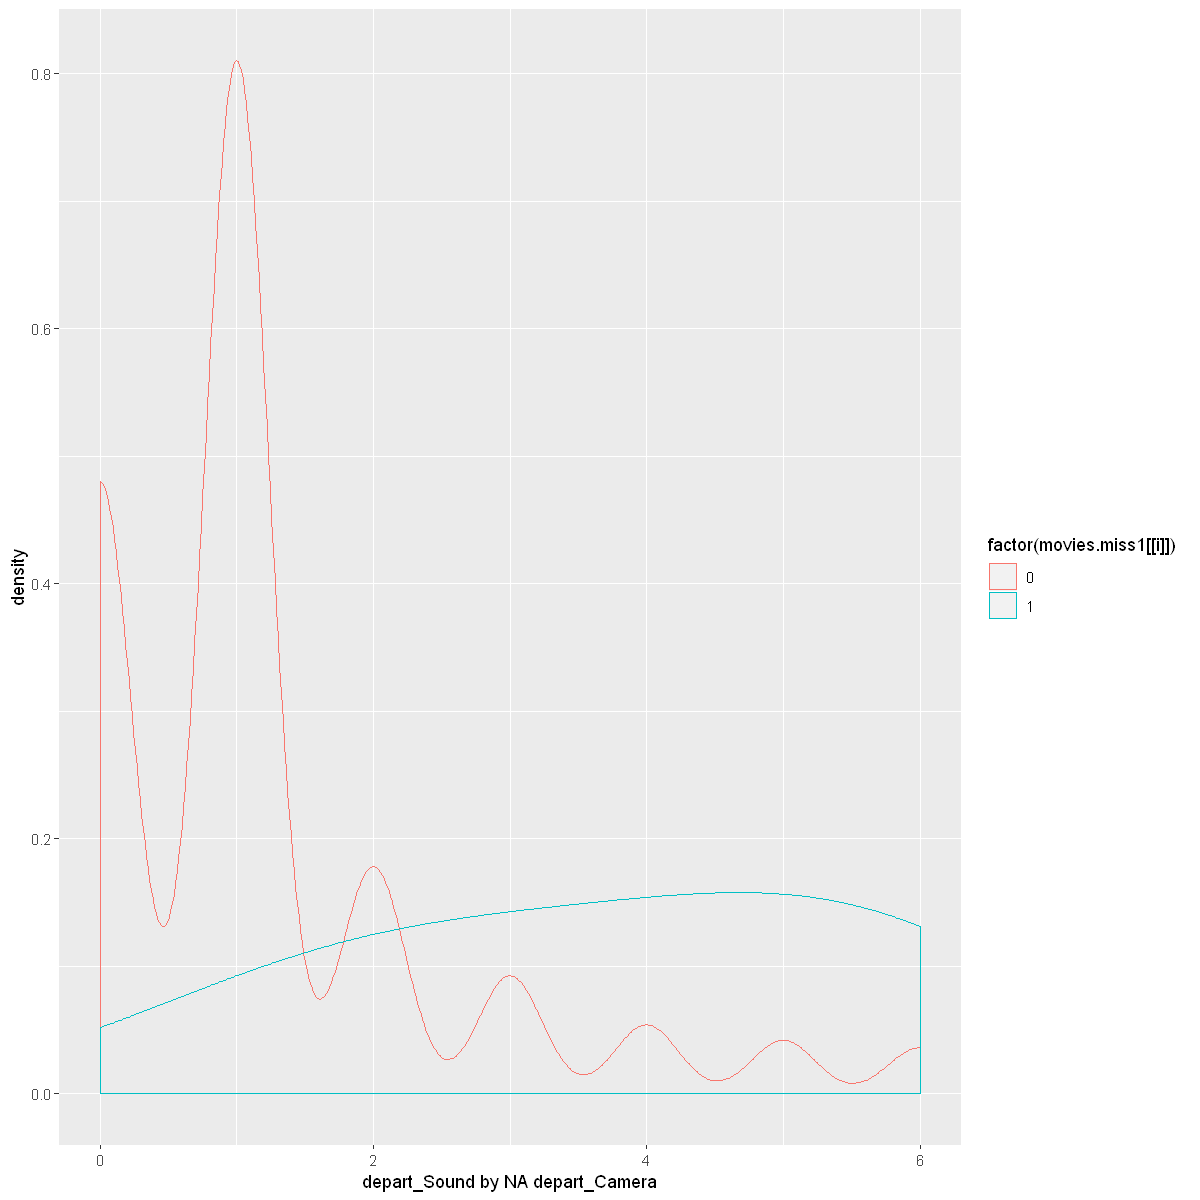


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.6145, df = 306.98, p-value = 3.757e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -146725295  -92159432
sample estimates:
mean of x mean of y 
 55226398 174668762 

[1] "revenue by NA depart_Camera"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


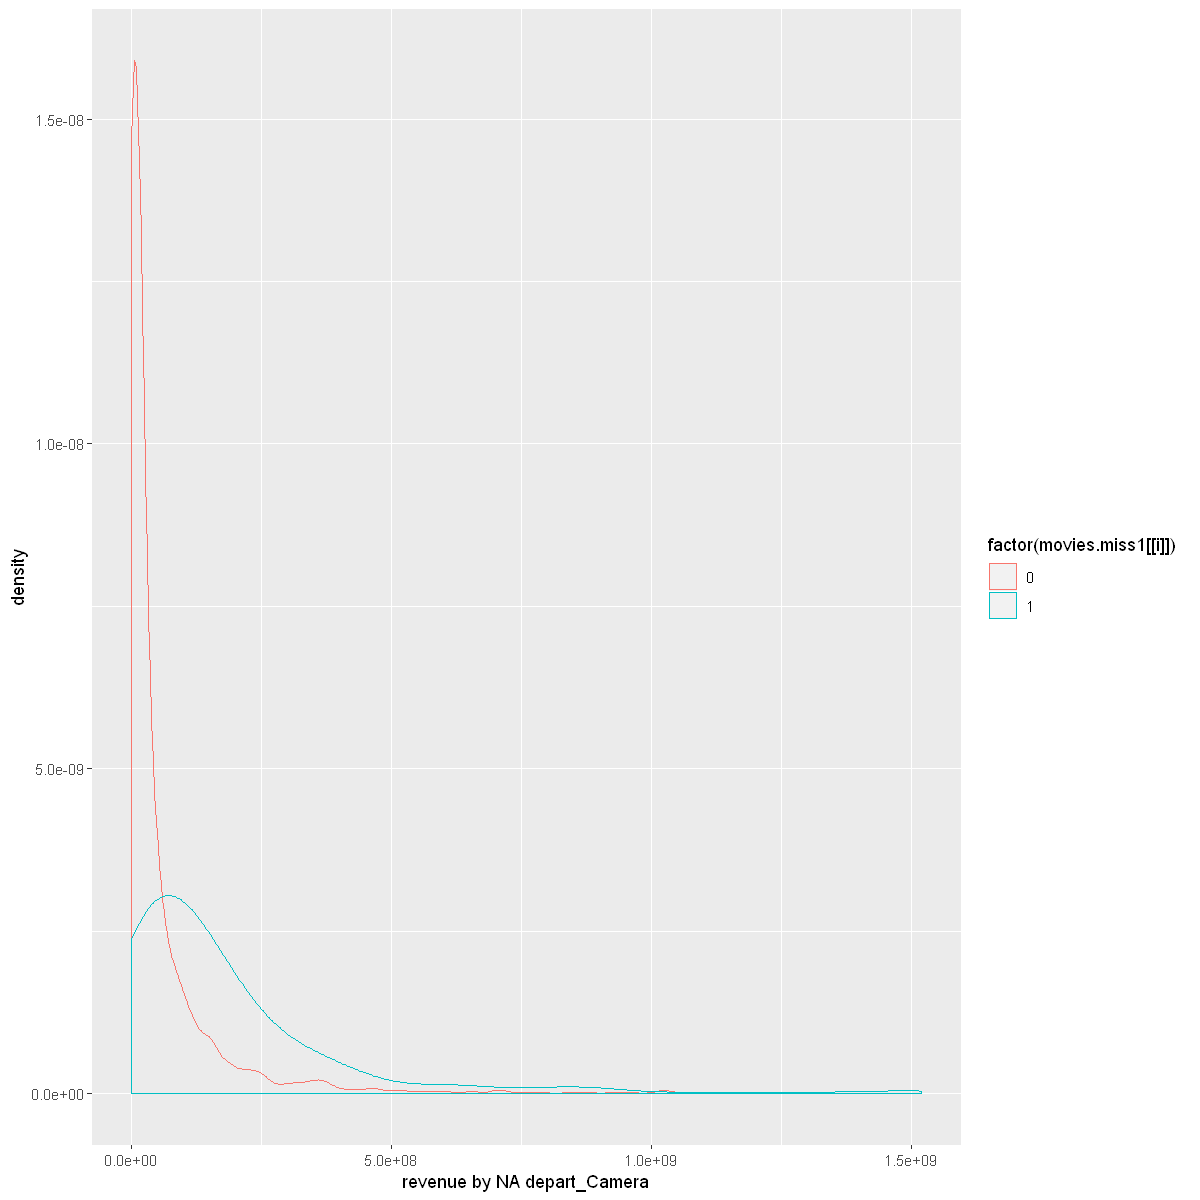


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -17.088, df = 960.17, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18117581 -14384936
sample estimates:
mean of x mean of y 
 19642794  35894053 

[1] "budget by NA depart_Custom_Mkup"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


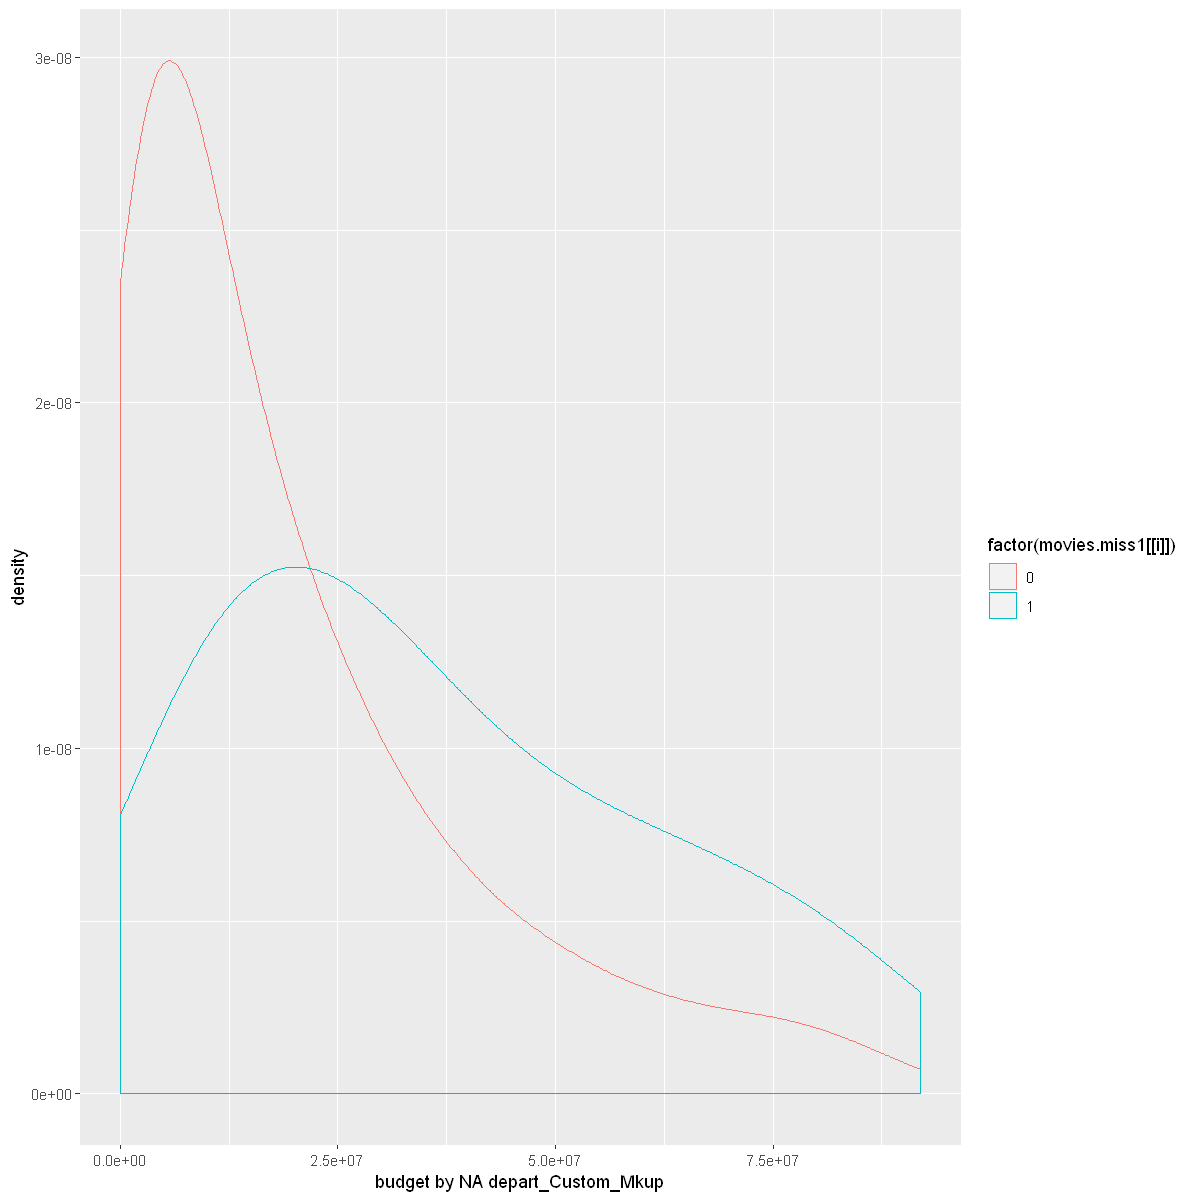


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -16.55, df = 1313.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.406931 -1.108735
sample estimates:
mean of x mean of y 
 2.725369  3.983202 

[1] "producers_cnt by NA depart_Custom_Mkup"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


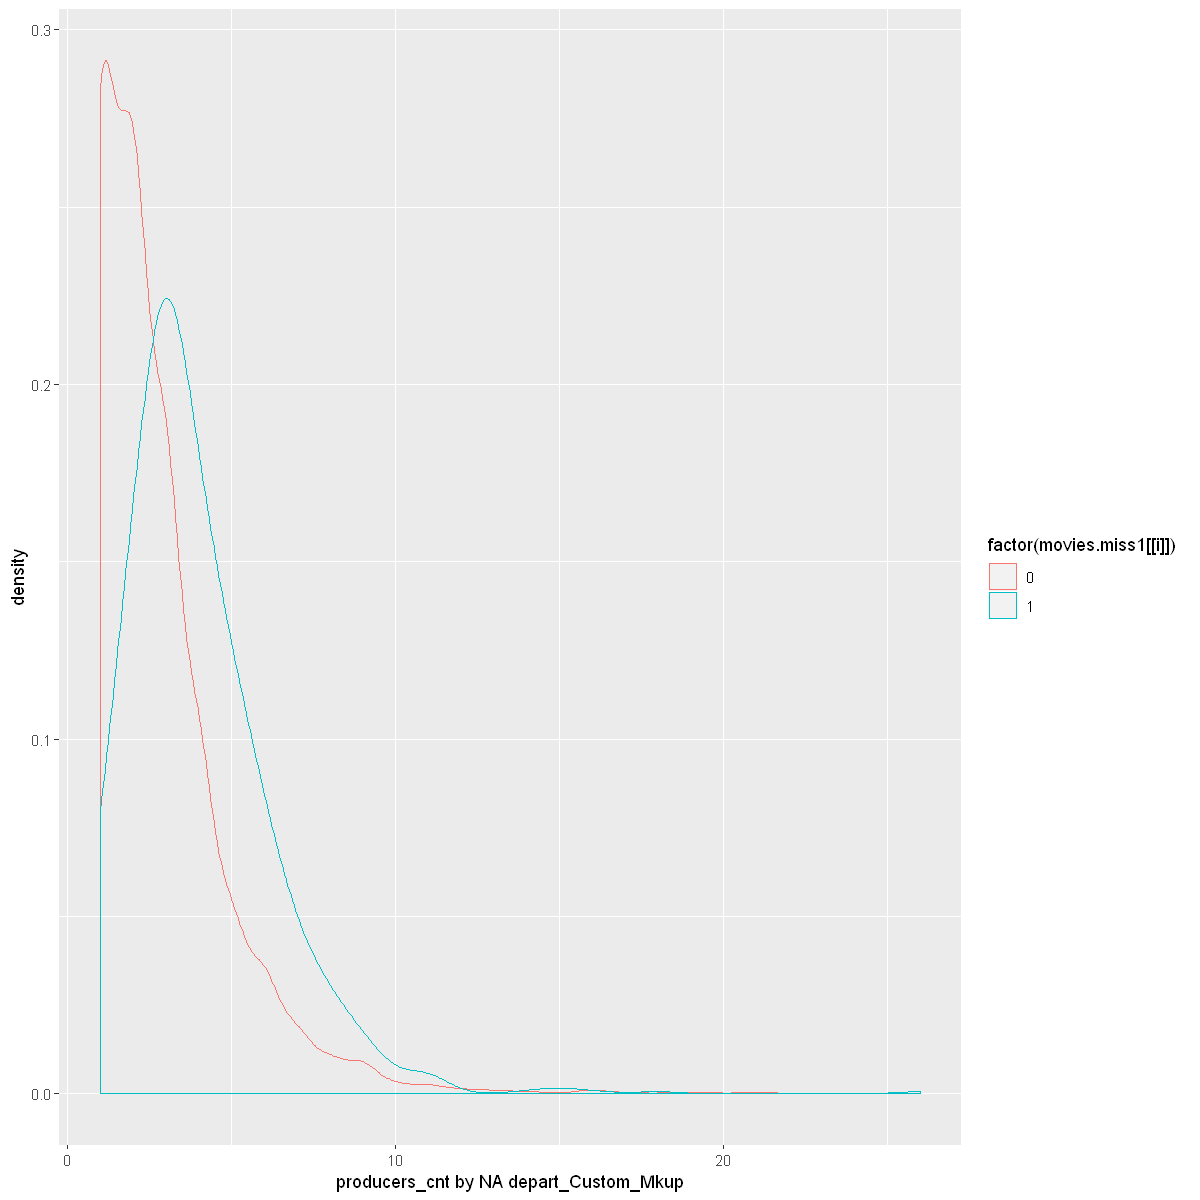


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -12.371, df = 1104.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.899528 -2.105648
sample estimates:
mean of x mean of y 
 3.739970  6.242558 

[1] "actor1_movies_cnt by NA depart_Custom_Mkup"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


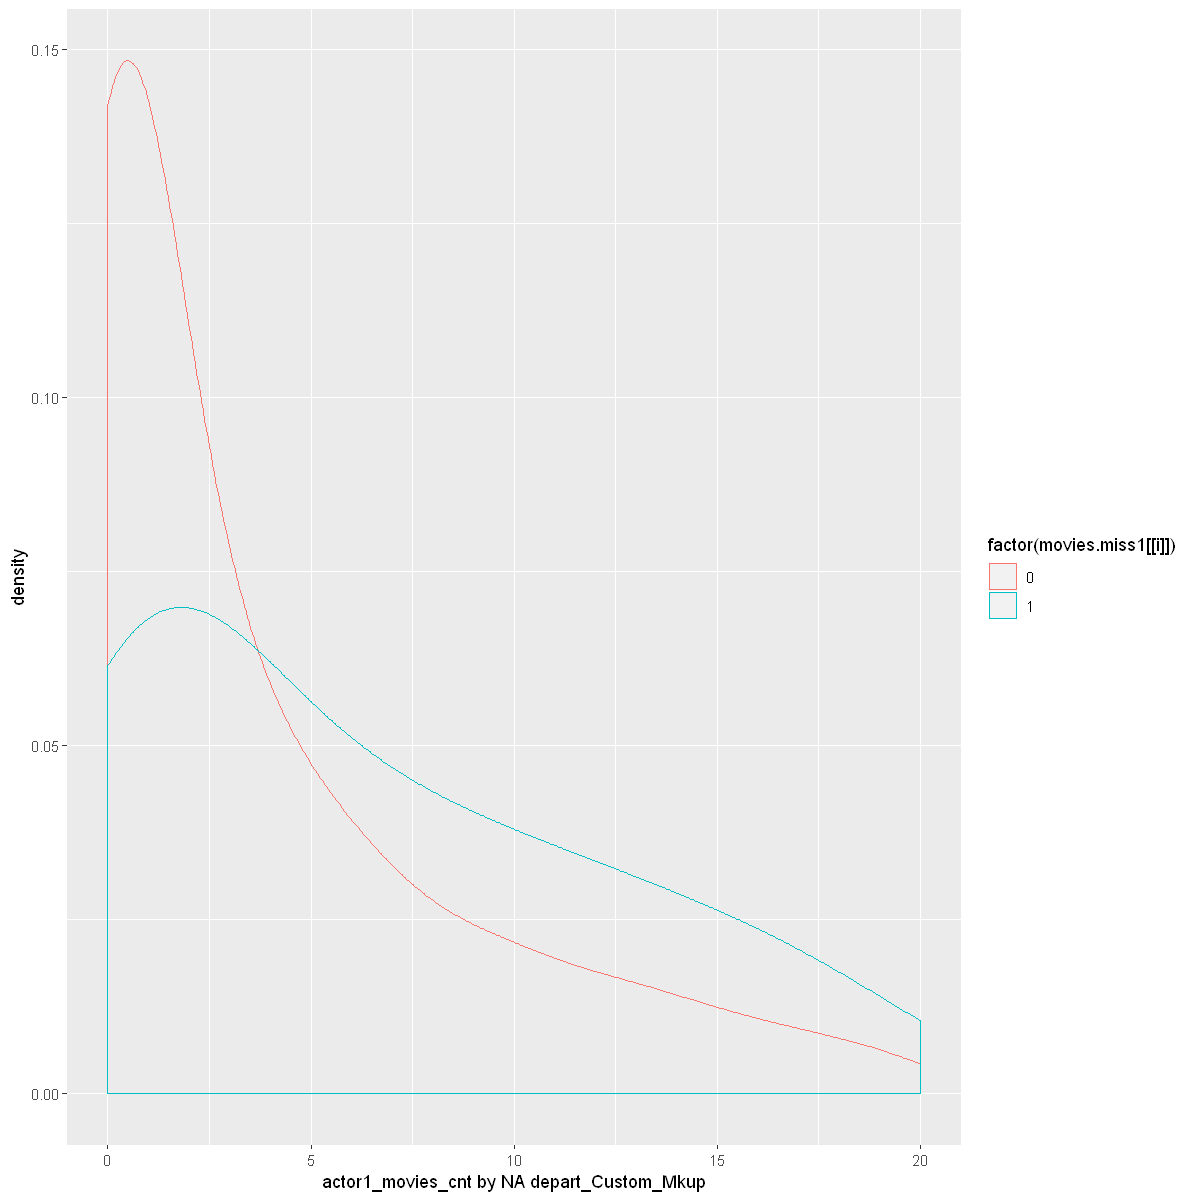


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -12.233, df = 1042.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.504325 -1.811982
sample estimates:
mean of x mean of y 
 3.017164  5.175317 

[1] "actor2_movies_cnt by NA depart_Custom_Mkup"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


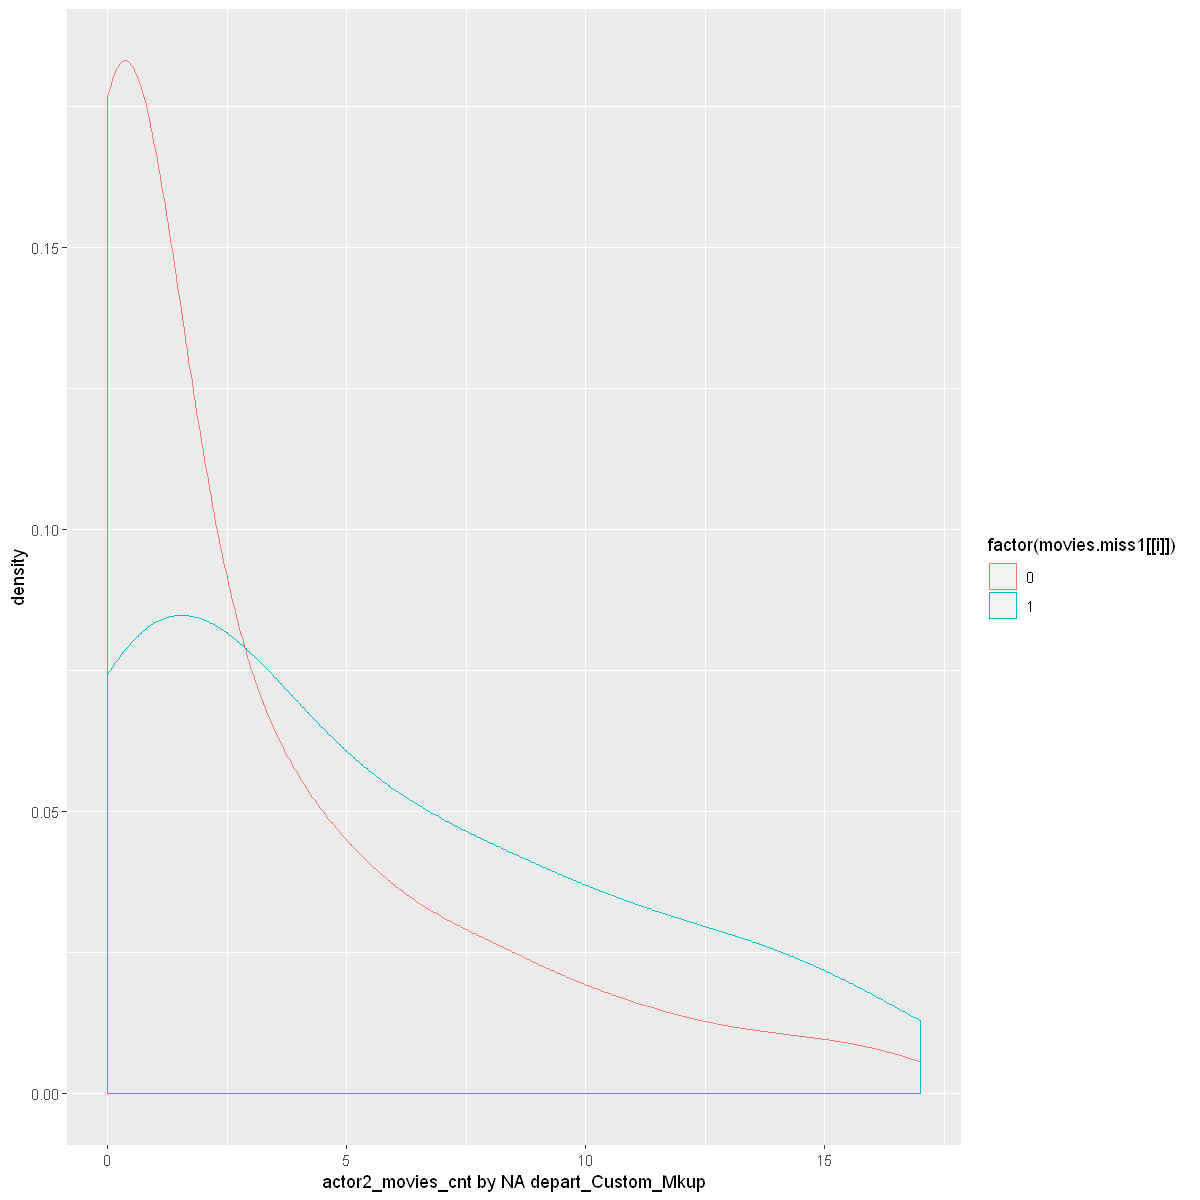


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.736, df = 955, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -86316790 -59638199
sample estimates:
mean of x mean of y 
162981598 235959093 

[1] "actor0_prev_revenue by NA depart_Custom_Mkup"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


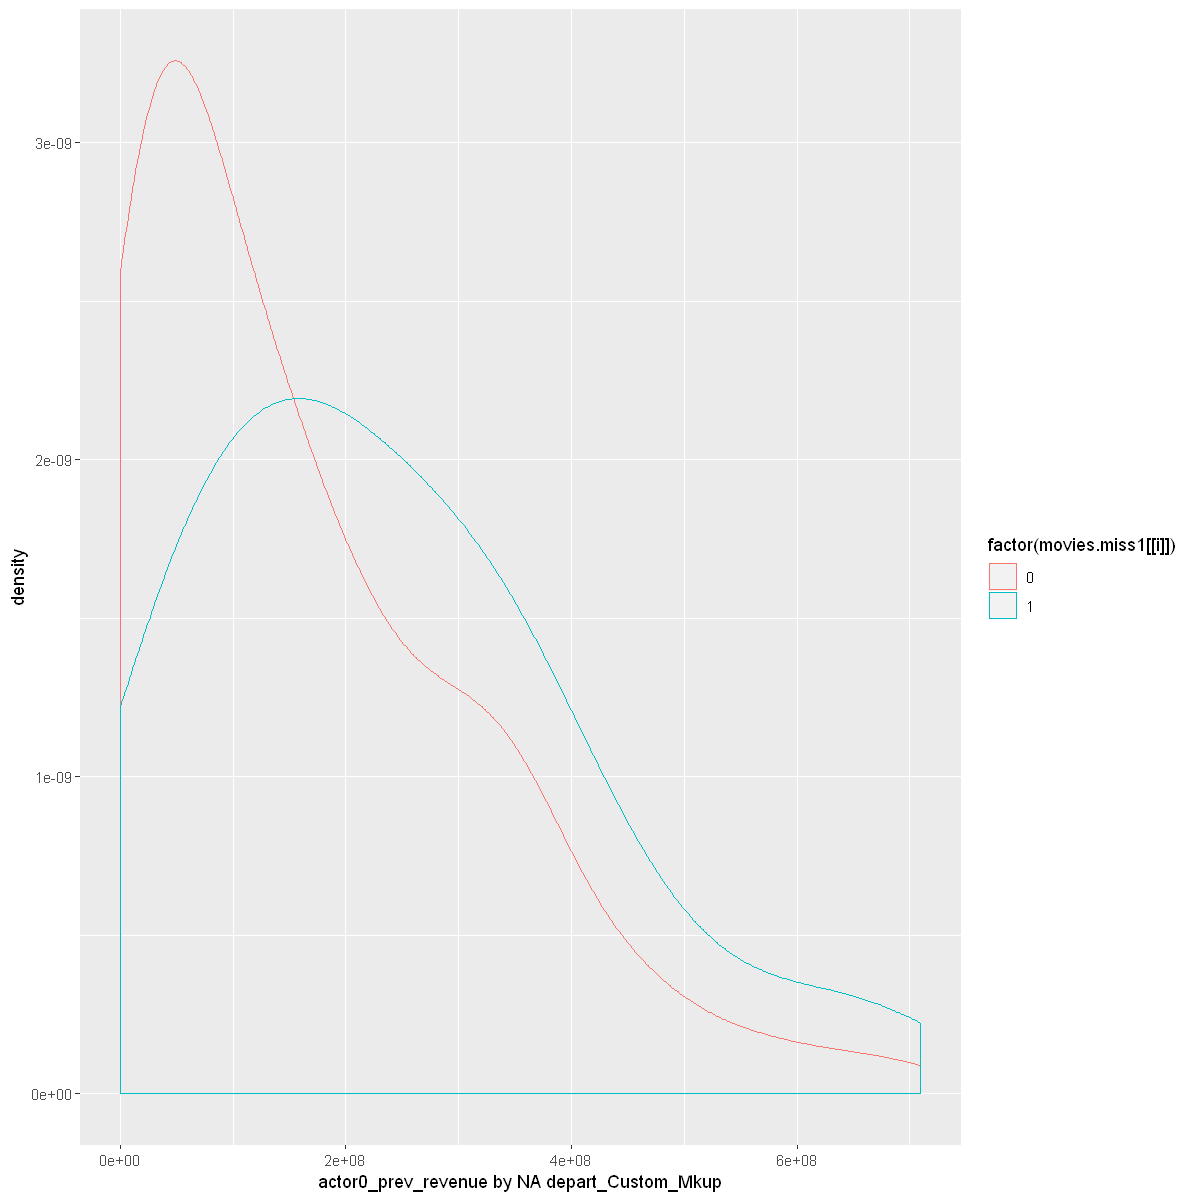


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.6492, df = 937.73, p-value = 4.996e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -49135763 -26741050
sample estimates:
mean of x mean of y 
138760358 176698765 

[1] "actor1_prev_revenue by NA depart_Custom_Mkup"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


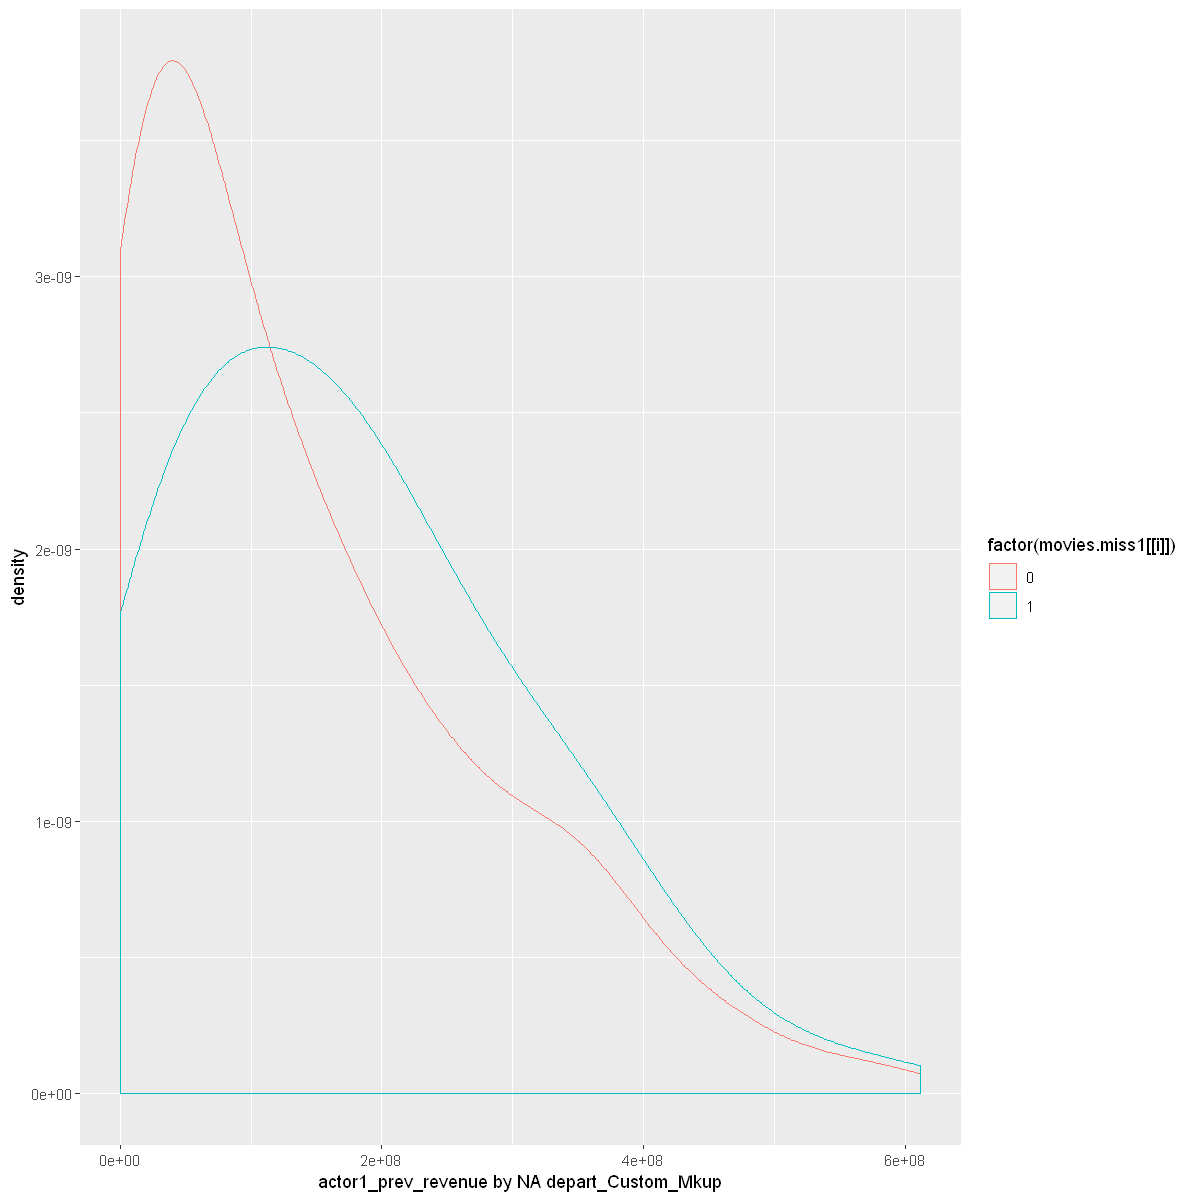


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.8467, df = 893.47, p-value = 1.405e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -50269311 -27870273
sample estimates:
mean of x mean of y 
126969360 166039152 

[1] "actor2_prev_revenue by NA depart_Custom_Mkup"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


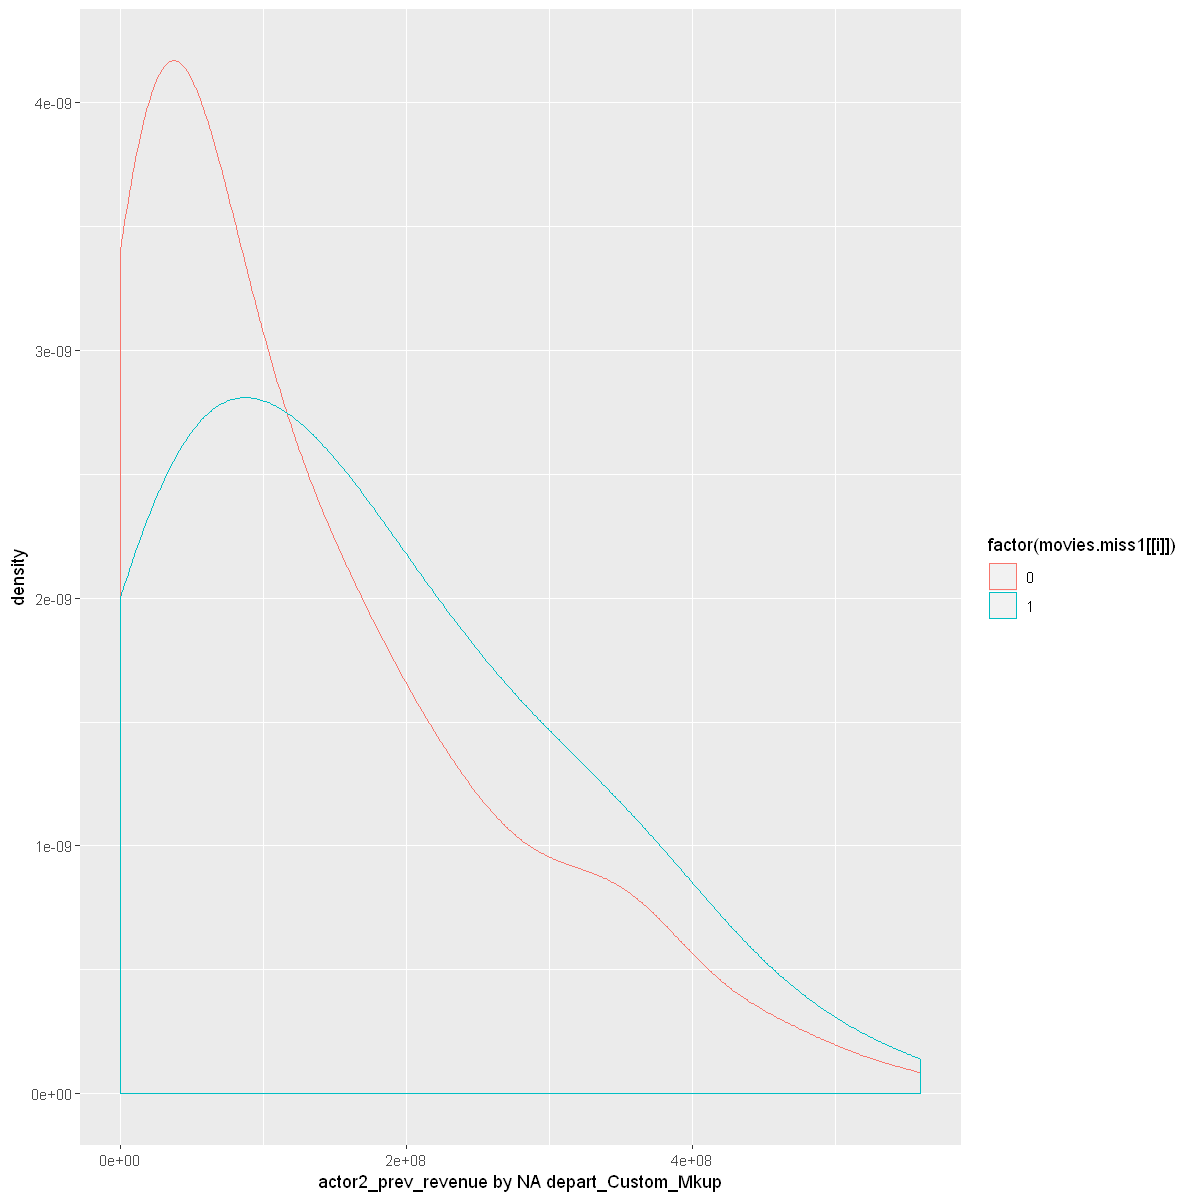


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.991, df = 1081.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0109069 -0.7265867
sample estimates:
mean of x mean of y 
 1.242614  2.111361 

[1] "director_movies_cnt by NA depart_Custom_Mkup"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


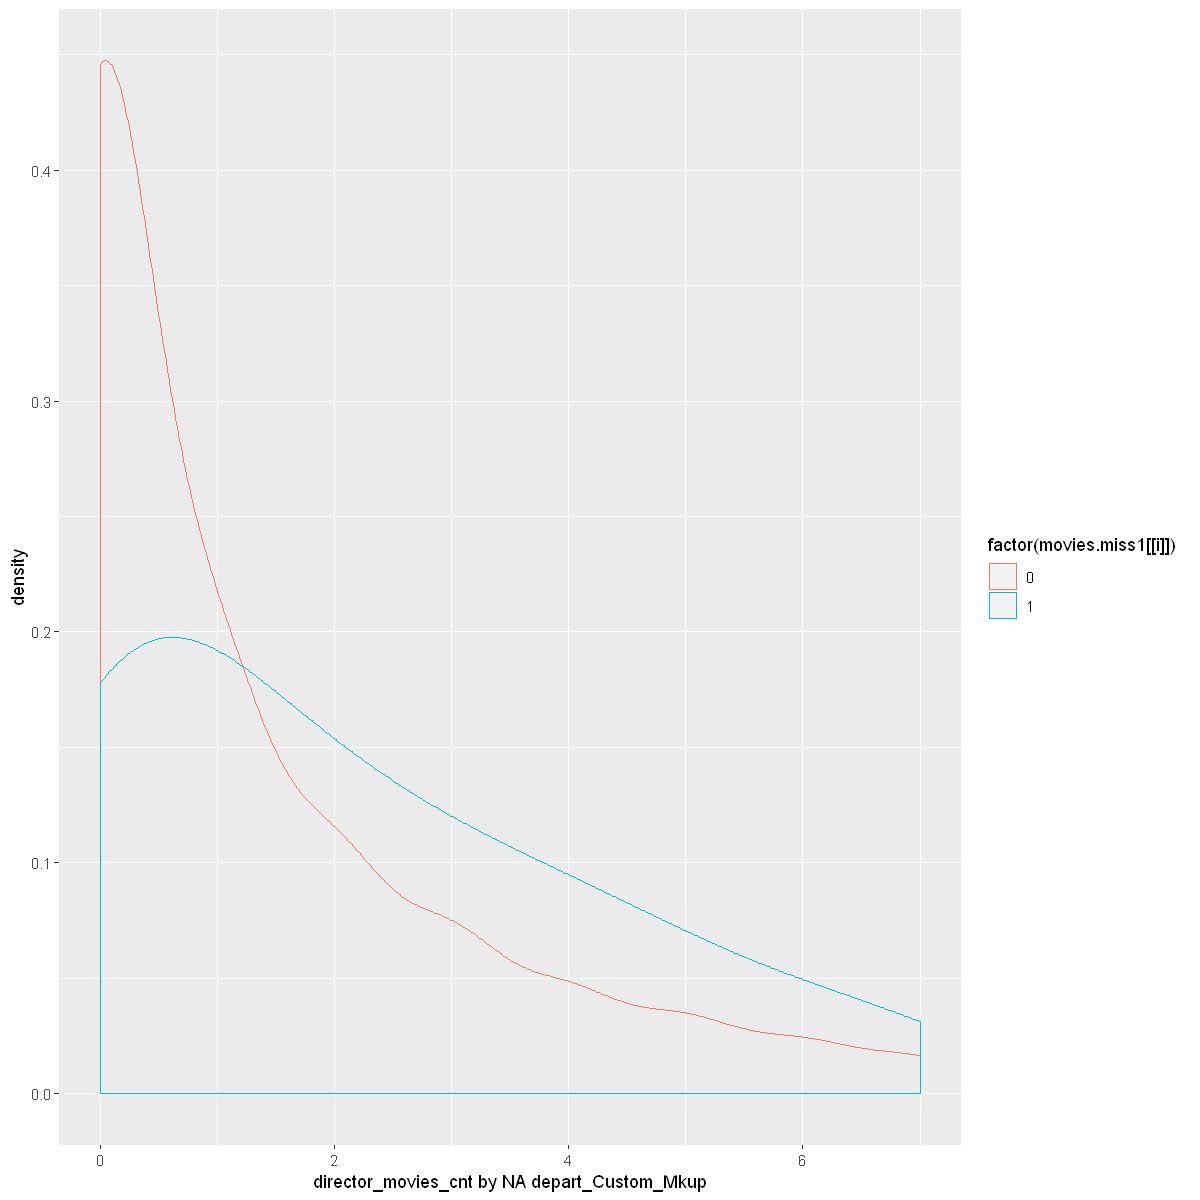


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -47.111, df = 529.76, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.593272 -3.305598
sample estimates:
mean of x mean of y 
 1.376068  4.825503 

[1] "depart_Art by NA depart_Custom_Mkup"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


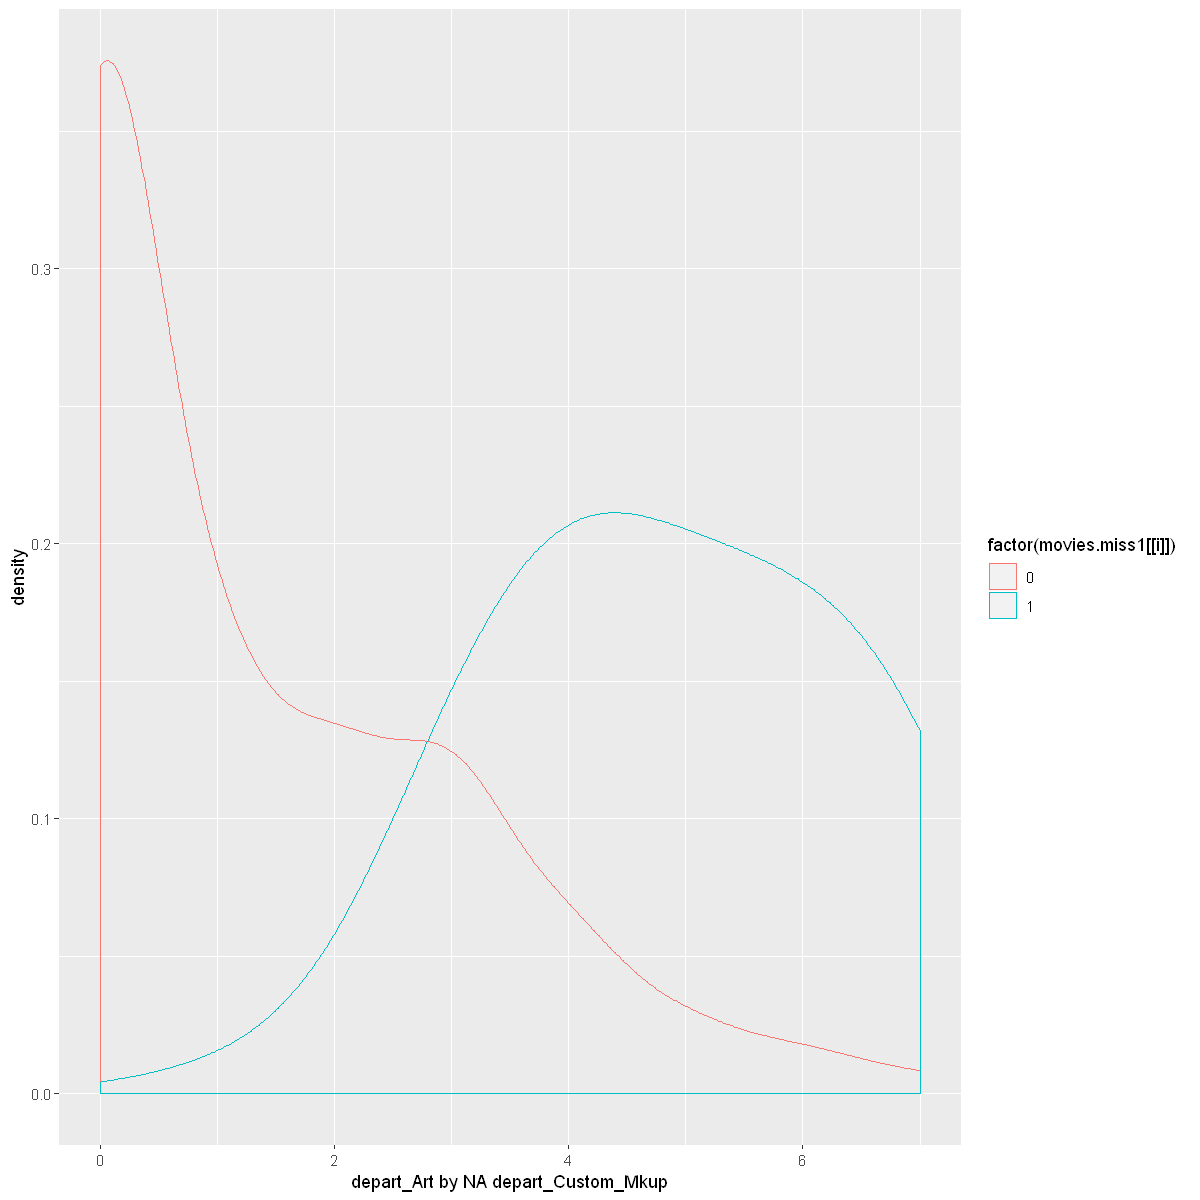


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -26.978, df = 465.12, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.179366 -1.883431
sample estimates:
mean of x mean of y 
0.9776922 3.0090909 

[1] "depart_Camera by NA depart_Custom_Mkup"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


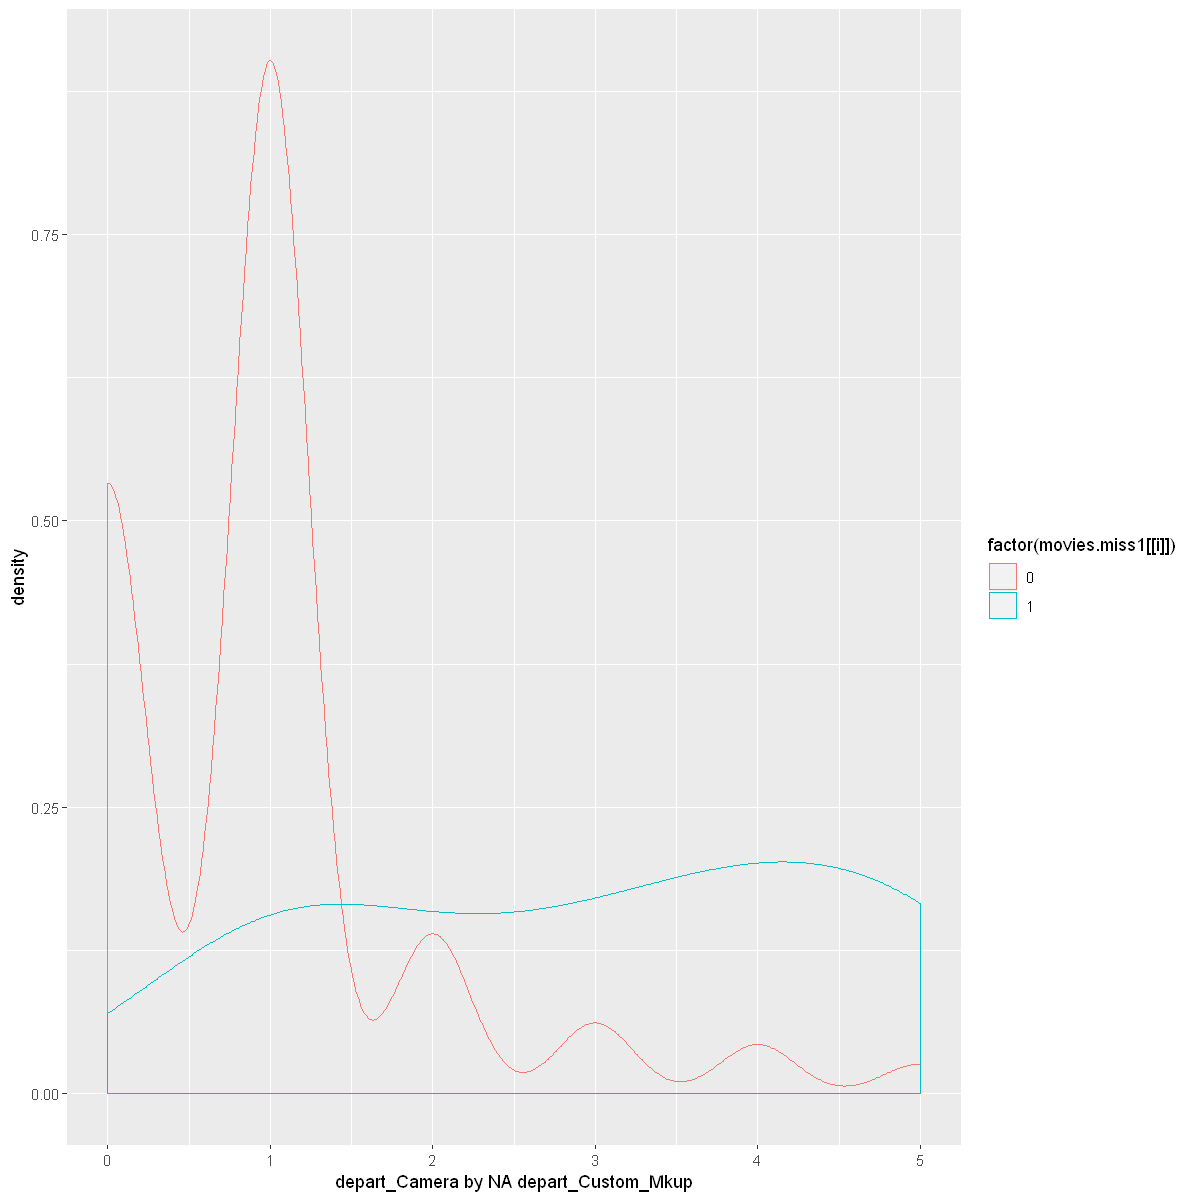


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -37.25, df = 847.04, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0005819 -0.9004146
sample estimates:
mean of x mean of y 
 1.313100  2.263598 

[1] "depart_Directing by NA depart_Custom_Mkup"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


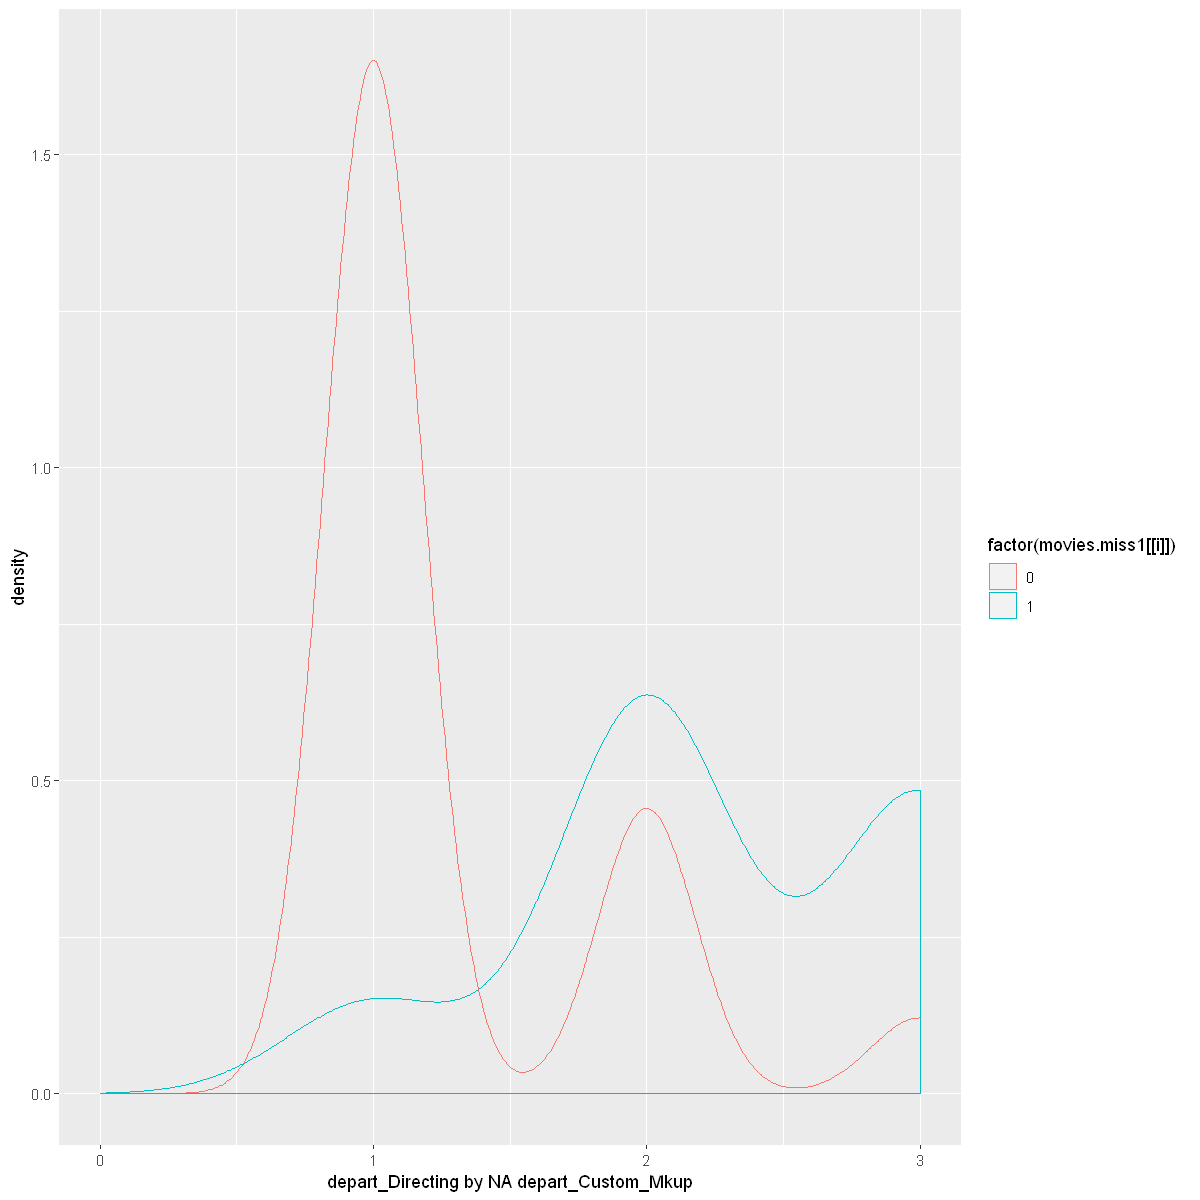


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -15.672, df = 245.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.211462 -1.717639
sample estimates:
mean of x mean of y 
 1.186710  3.151261 

[1] "depart_Sound by NA depart_Custom_Mkup"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


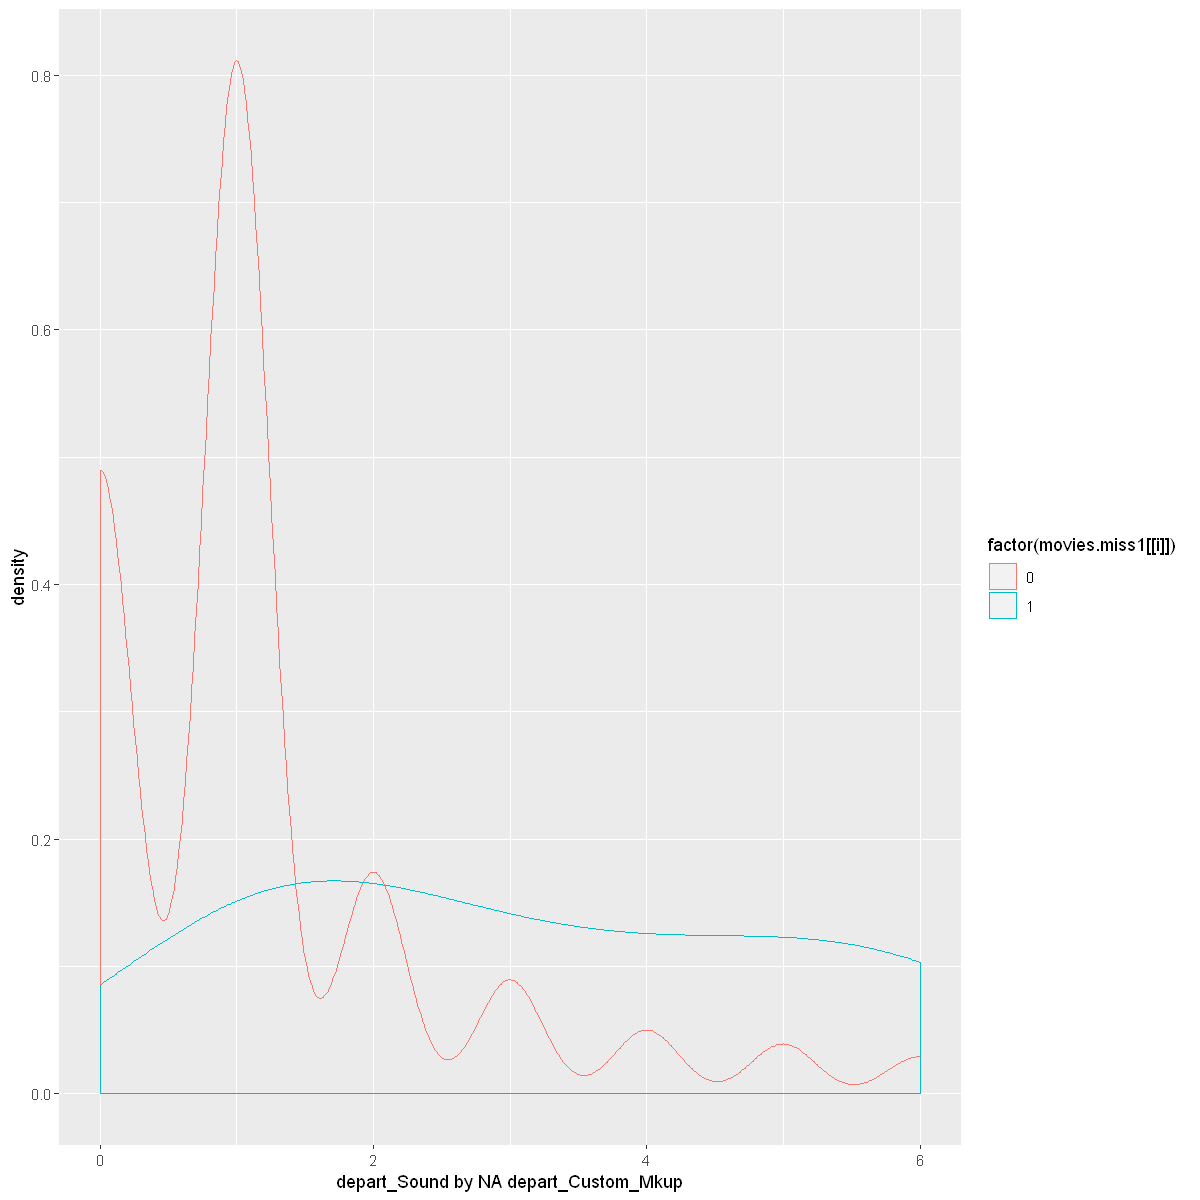


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -9.4477, df = 463.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -116499991  -76381251
sample estimates:
mean of x mean of y 
 53442713 149883334 

[1] "revenue by NA depart_Custom_Mkup"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


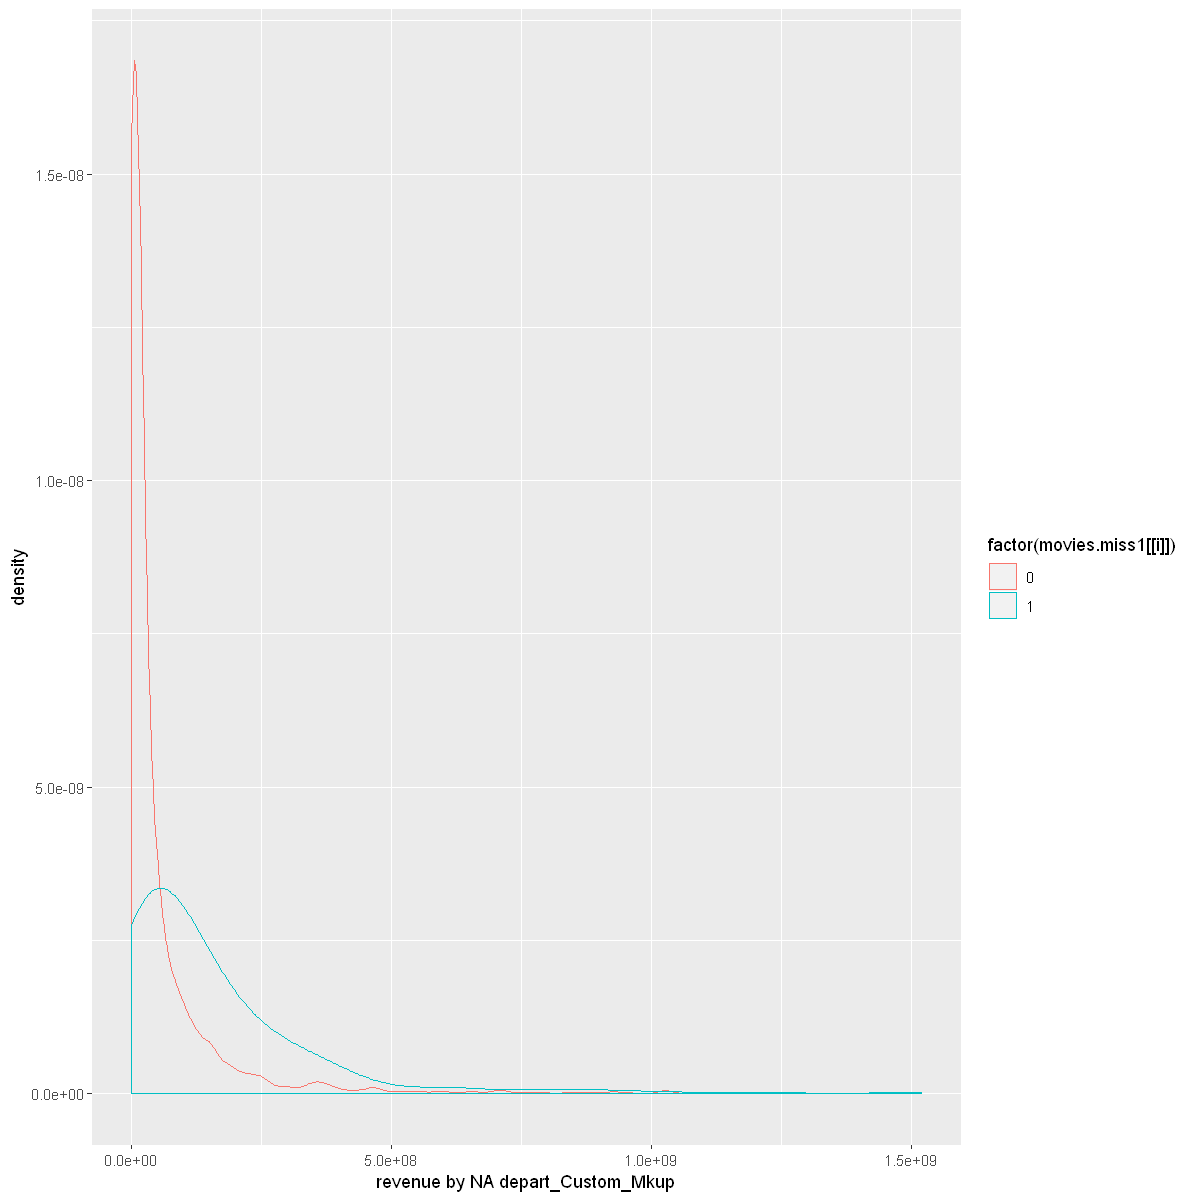


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.0822, df = 401.07, p-value = 2.767e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11396654  -5828967
sample estimates:
mean of x mean of y 
 21509016  30121827 

[1] "budget by NA depart_Directing"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


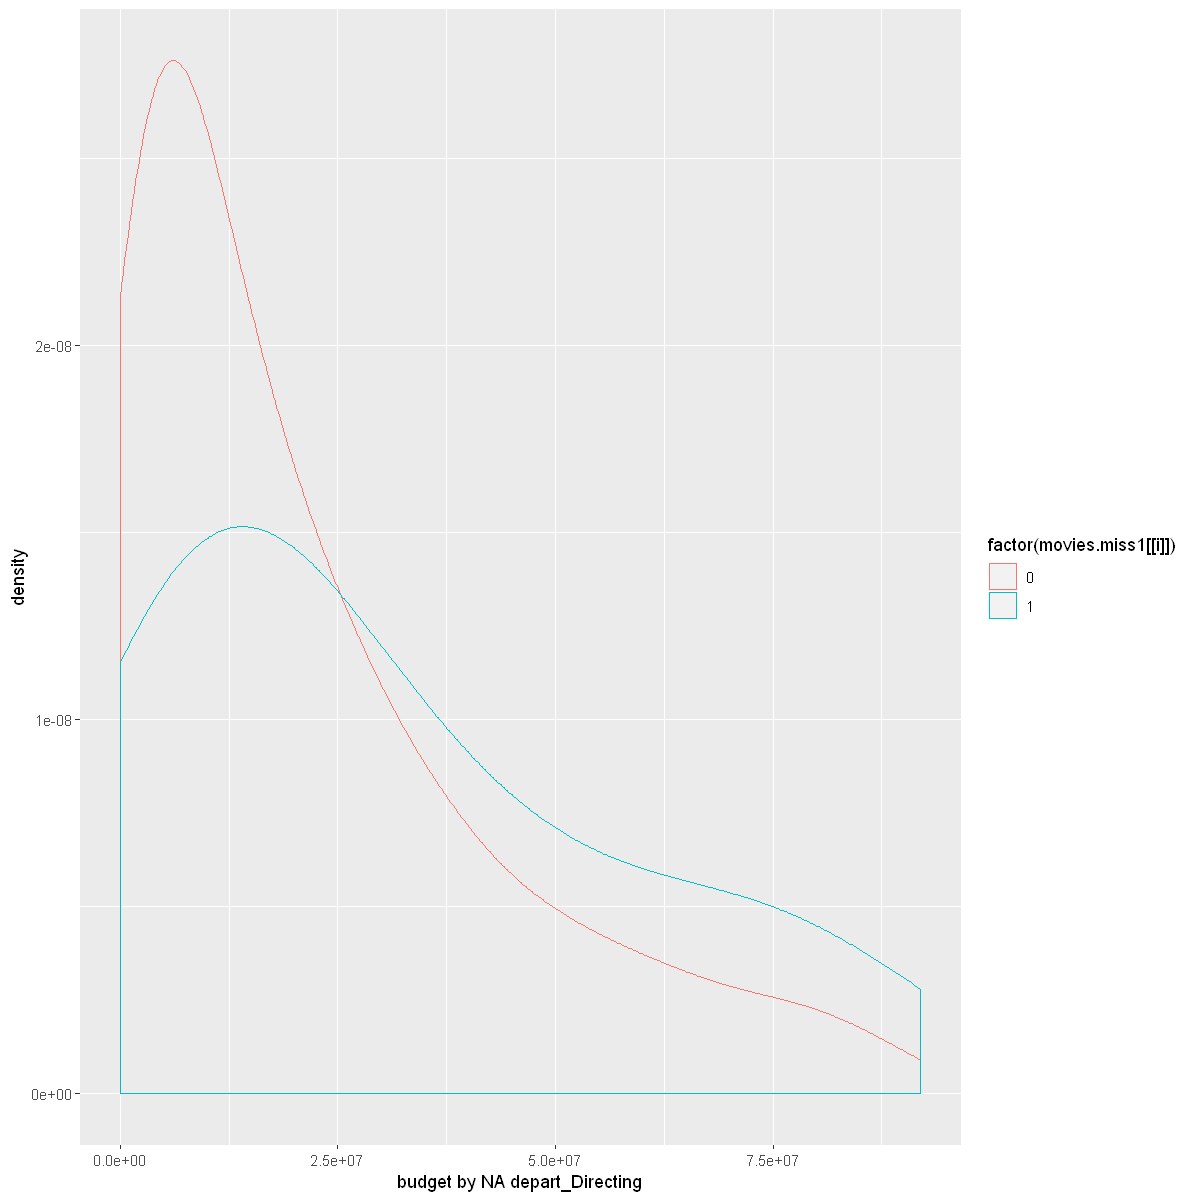


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.8936, df = 566.19, p-value = 1.293e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7634706 -0.3261319
sample estimates:
mean of x mean of y 
 2.868242  3.413043 

[1] "producers_cnt by NA depart_Directing"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


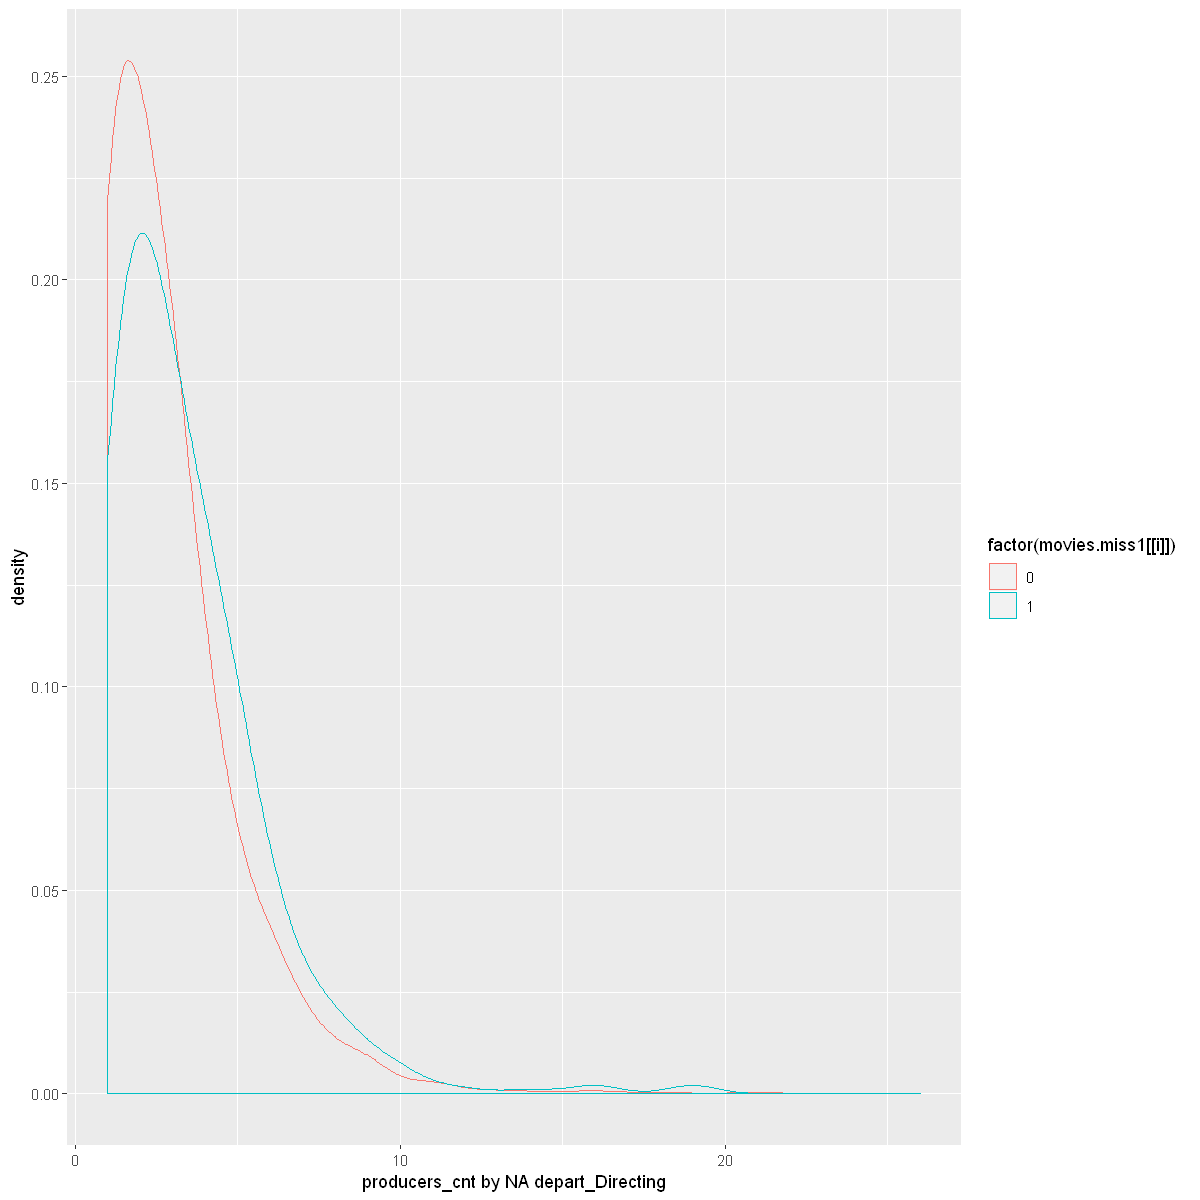


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.9864, df = 549.07, p-value = 0.04749
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.98966281 -0.00553411
sample estimates:
mean of x mean of y 
 4.031327  4.528926 

[1] "actor1_movies_cnt by NA depart_Directing"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


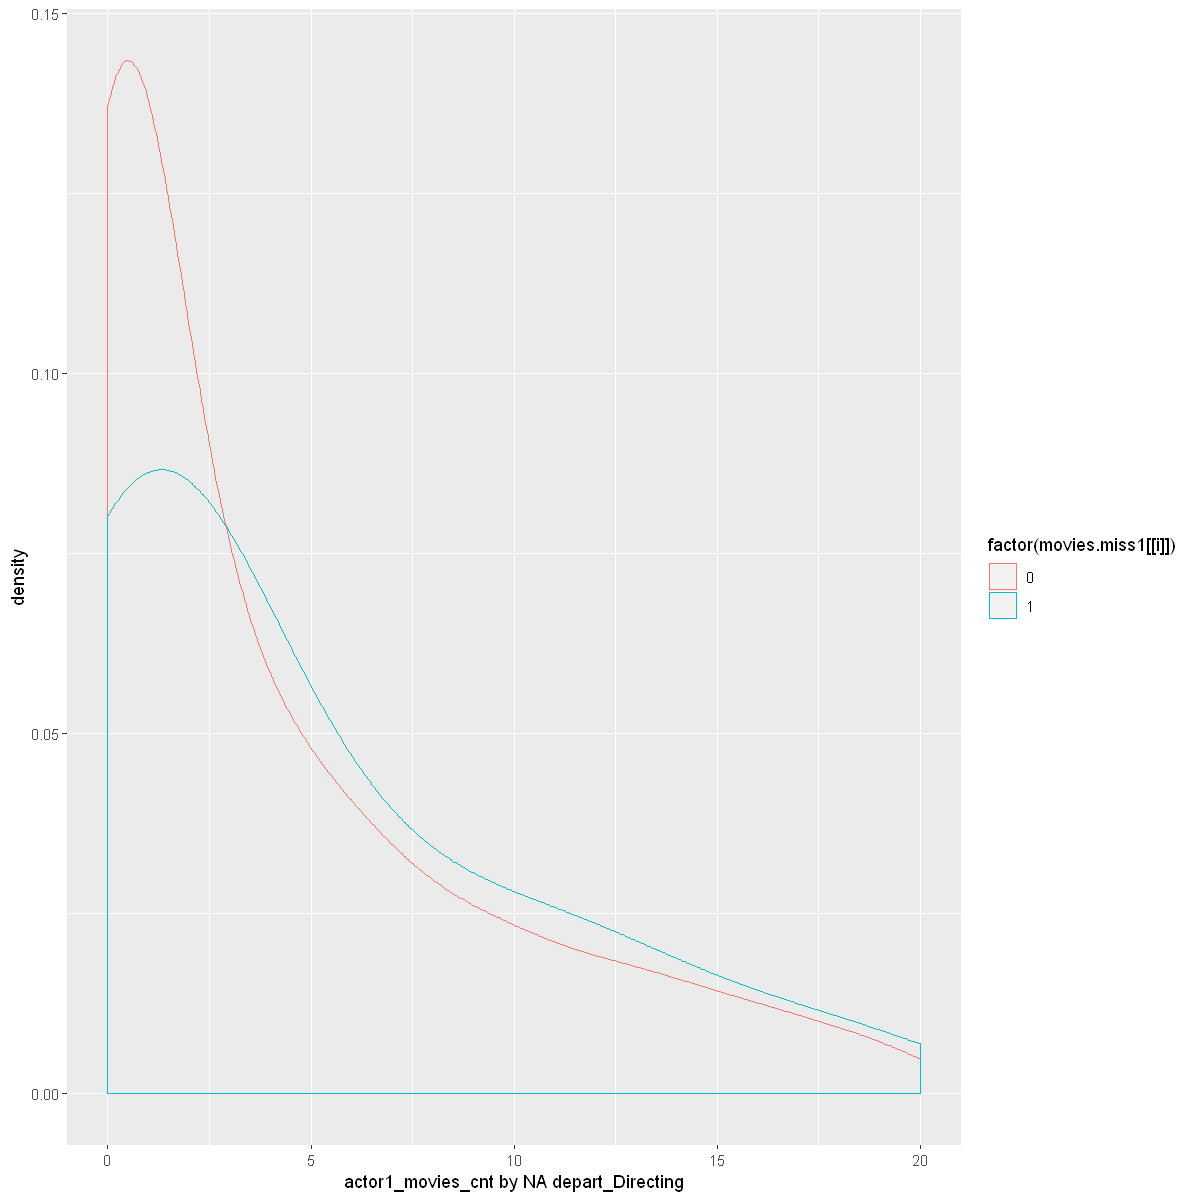


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2.5066, df = 525.74, p-value = 0.01249
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0017316 -0.1214558
sample estimates:
mean of x mean of y 
 3.251172  3.812766 

[1] "actor2_movies_cnt by NA depart_Directing"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


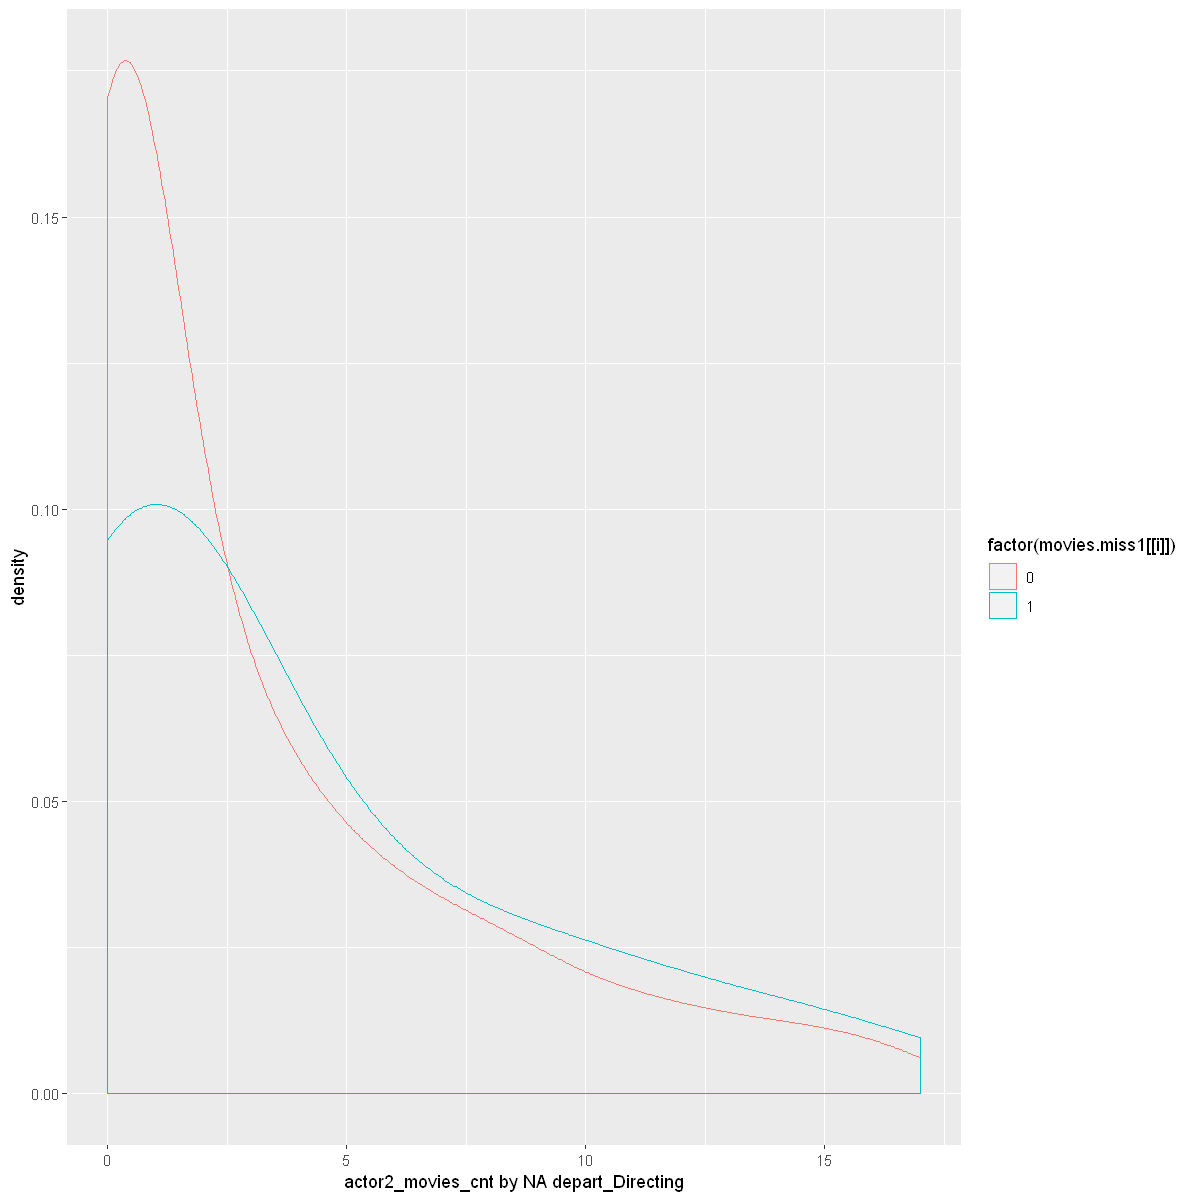


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.6539, df = 374.97, p-value = 0.09898
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -33263649   2870419
sample estimates:
mean of x mean of y 
173801150 188997765 

[1] "actor0_prev_revenue by NA depart_Directing"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


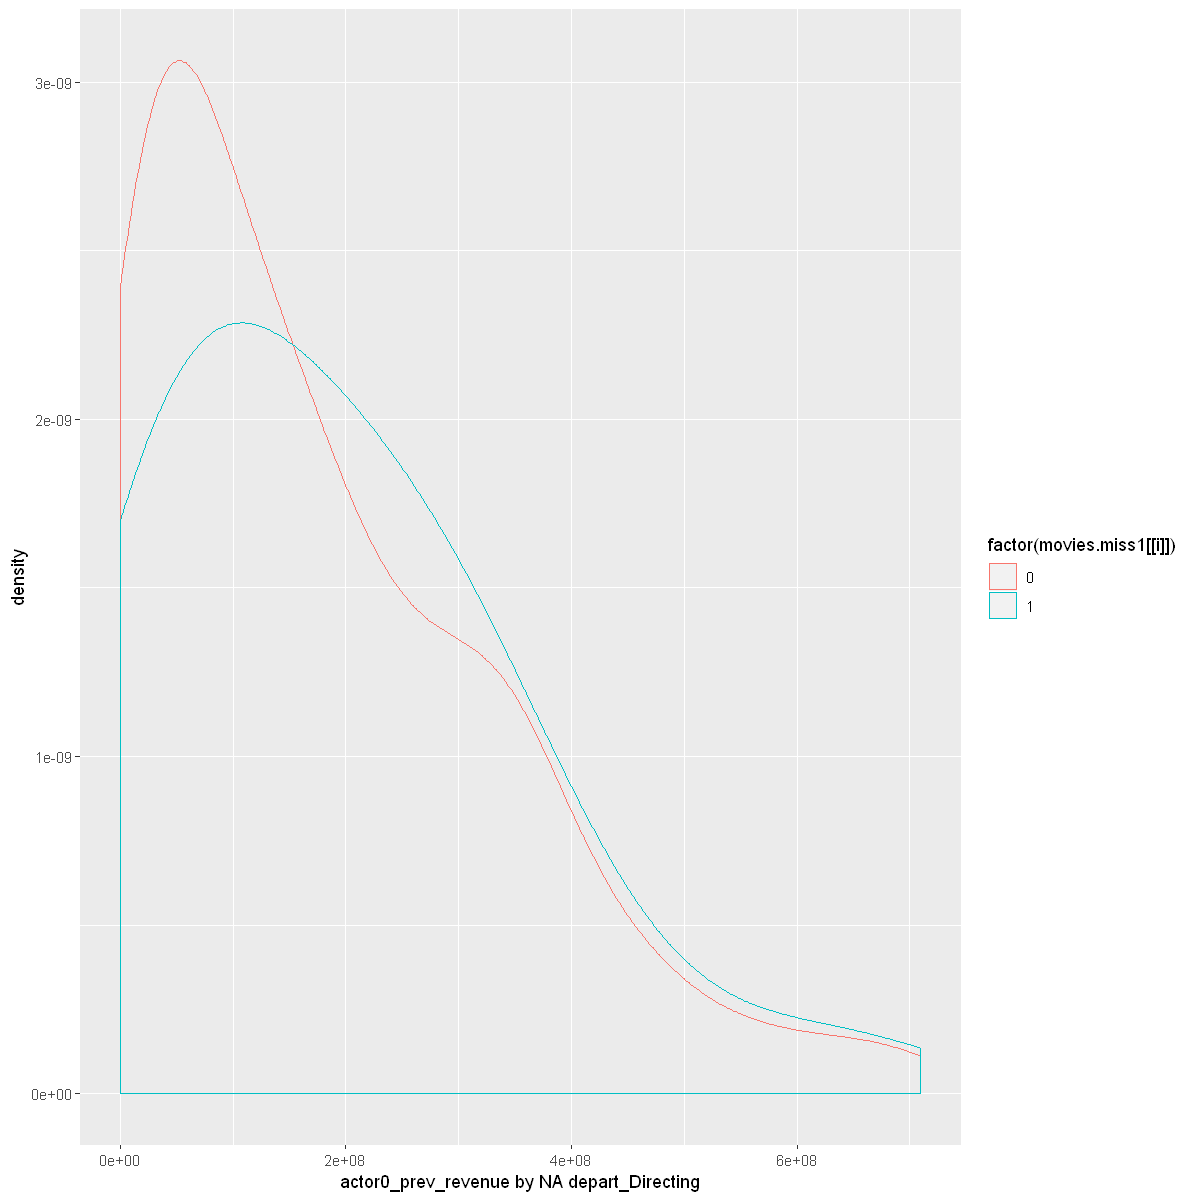


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.4818, df = 327.59, p-value = 0.1394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28743663   4045425
sample estimates:
mean of x mean of y 
144270520 156619639 

[1] "actor1_prev_revenue by NA depart_Directing"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


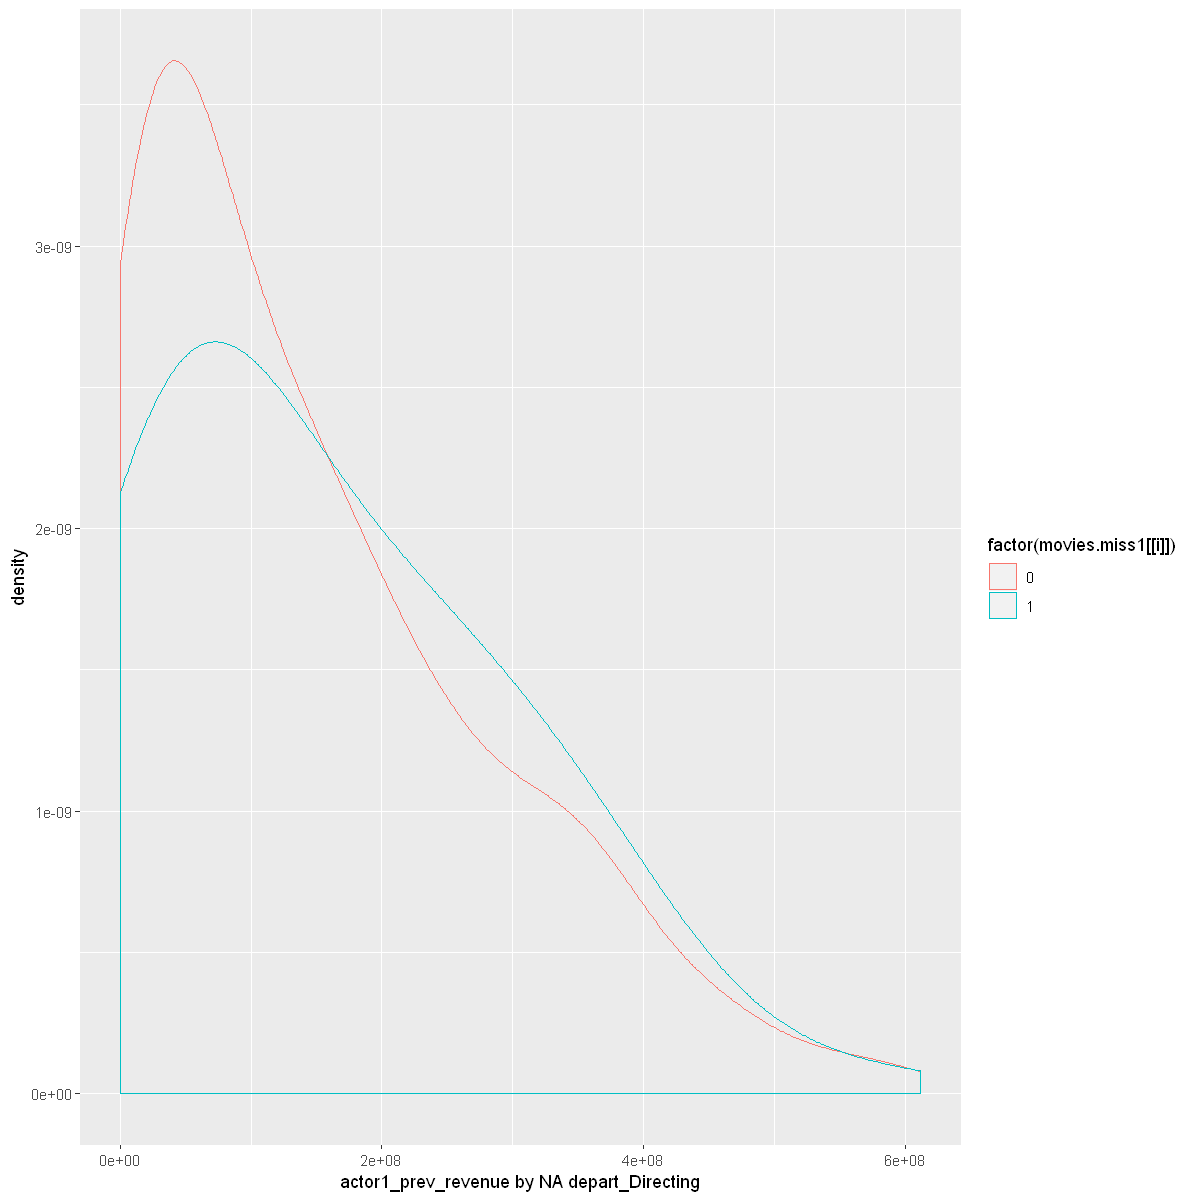


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2.7899, df = 300.52, p-value = 0.005609
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -40361446  -6973283
sample estimates:
mean of x mean of y 
132091075 155758440 

[1] "actor2_prev_revenue by NA depart_Directing"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


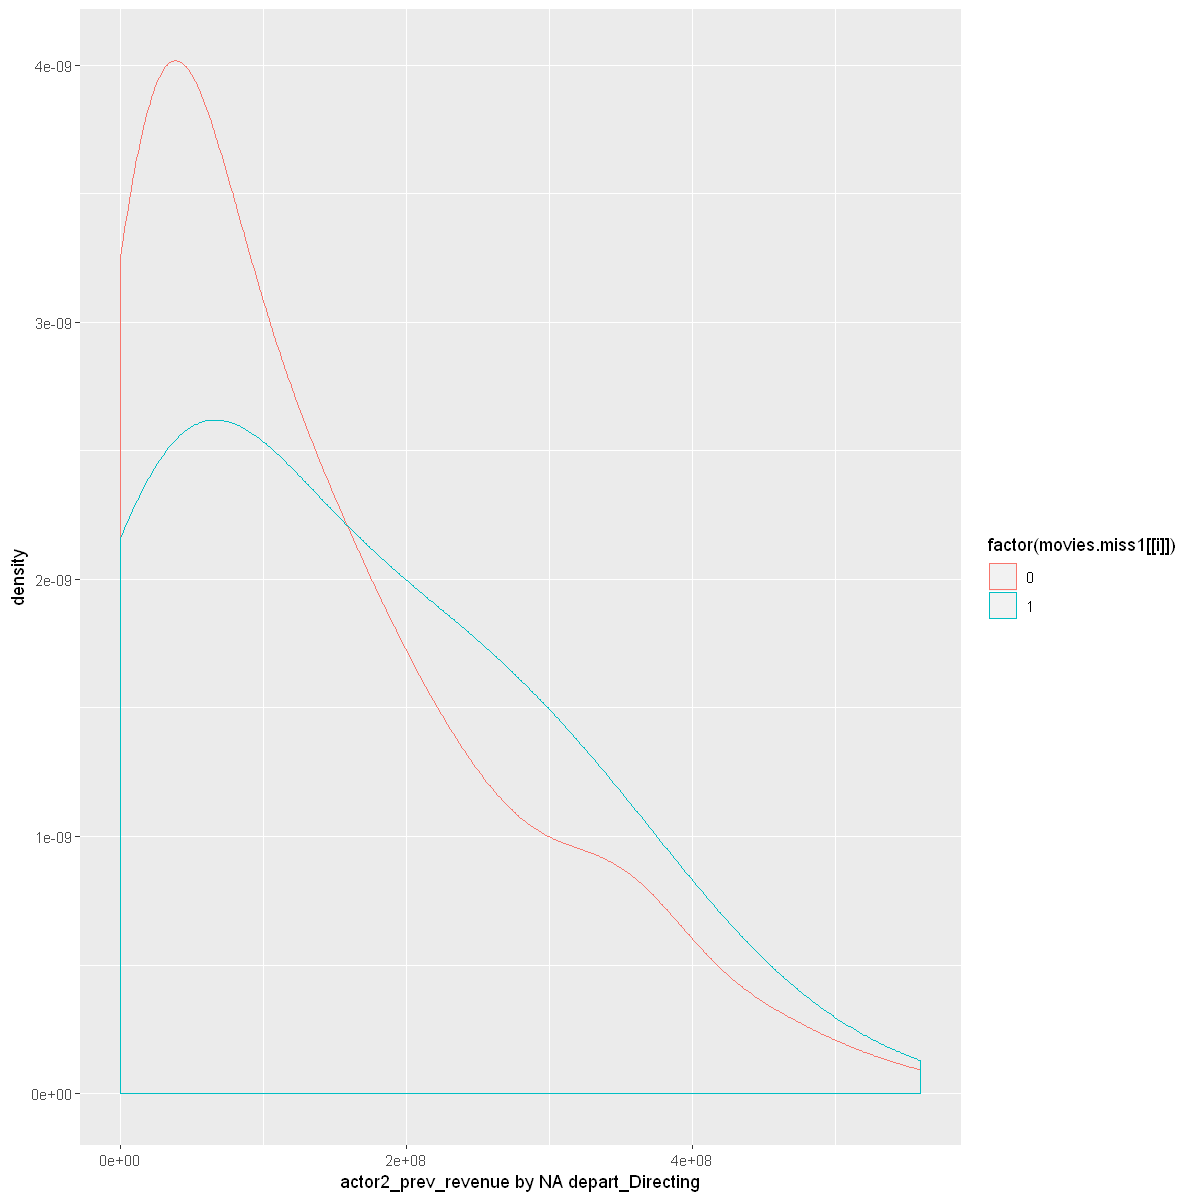


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -3.4908, df = 519.84, p-value = 0.0005225
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5020740 -0.1404688
sample estimates:
mean of x mean of y 
 1.332408  1.653680 

[1] "director_movies_cnt by NA depart_Directing"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


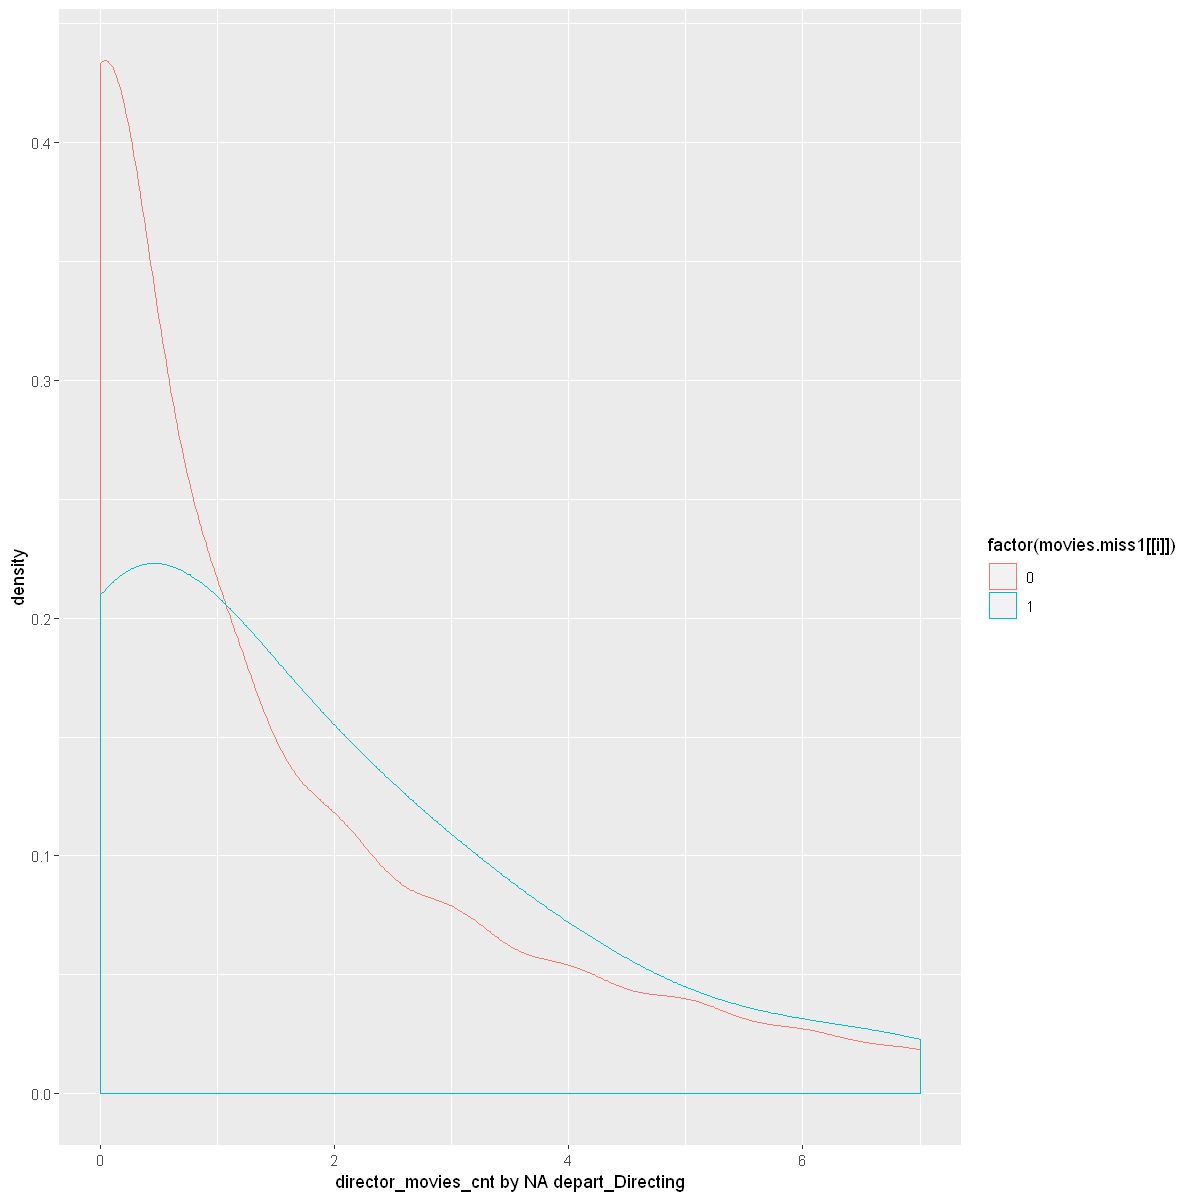


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.56, df = 260.68, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.770756 -1.255296
sample estimates:
mean of x mean of y 
 1.552015  3.065041 

[1] "depart_Art by NA depart_Directing"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


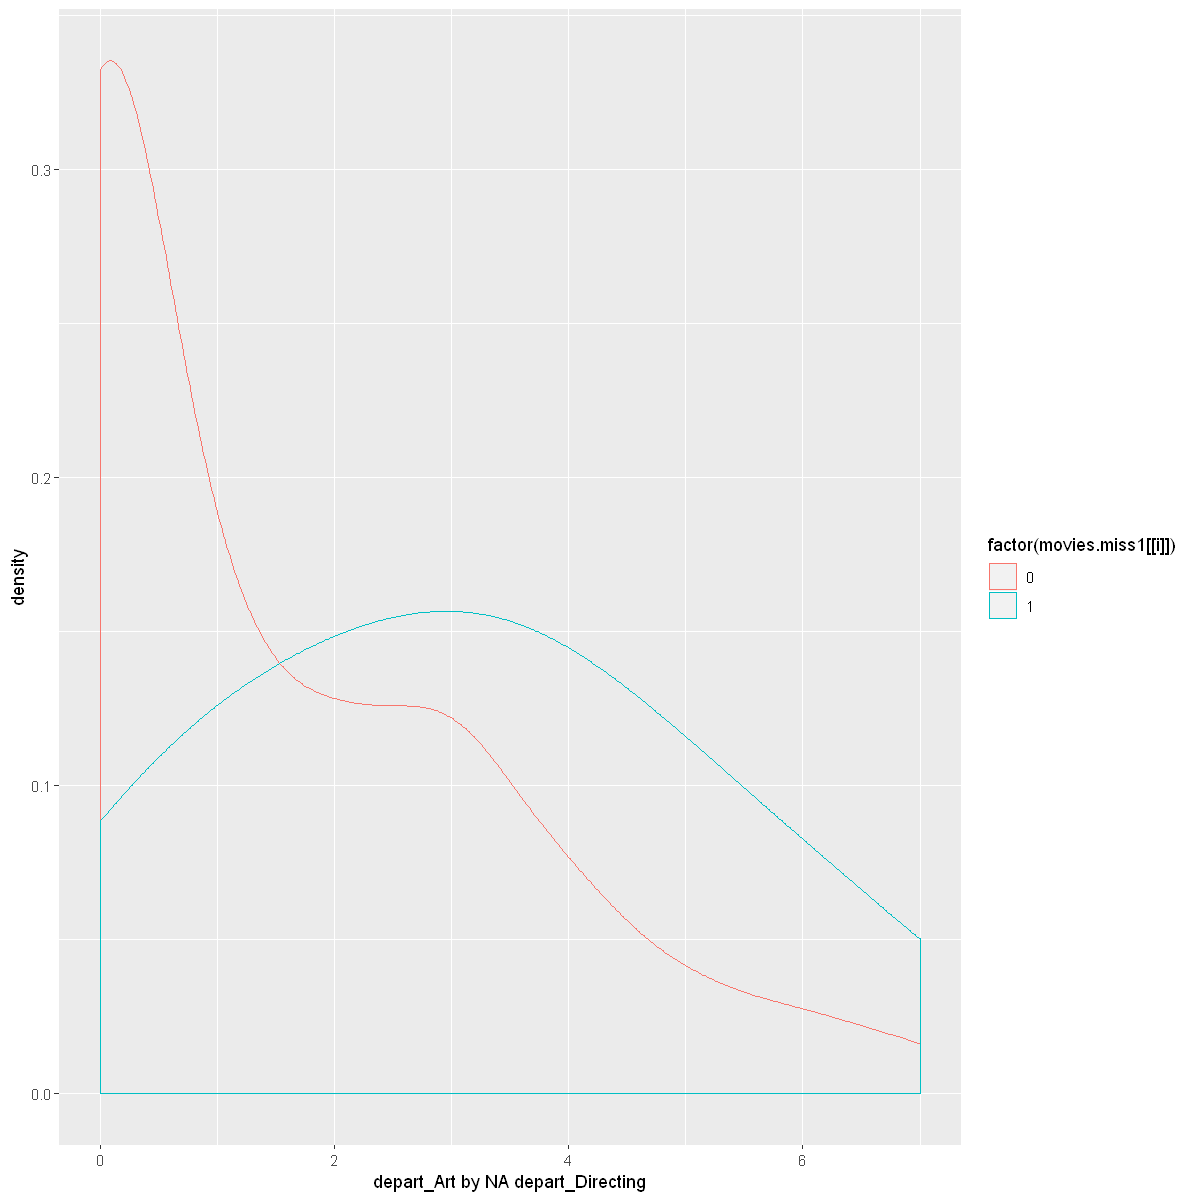


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.9328, df = 261.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1670083 -0.7454462
sample estimates:
mean of x mean of y 
 1.075269  2.031496 

[1] "depart_Camera by NA depart_Directing"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


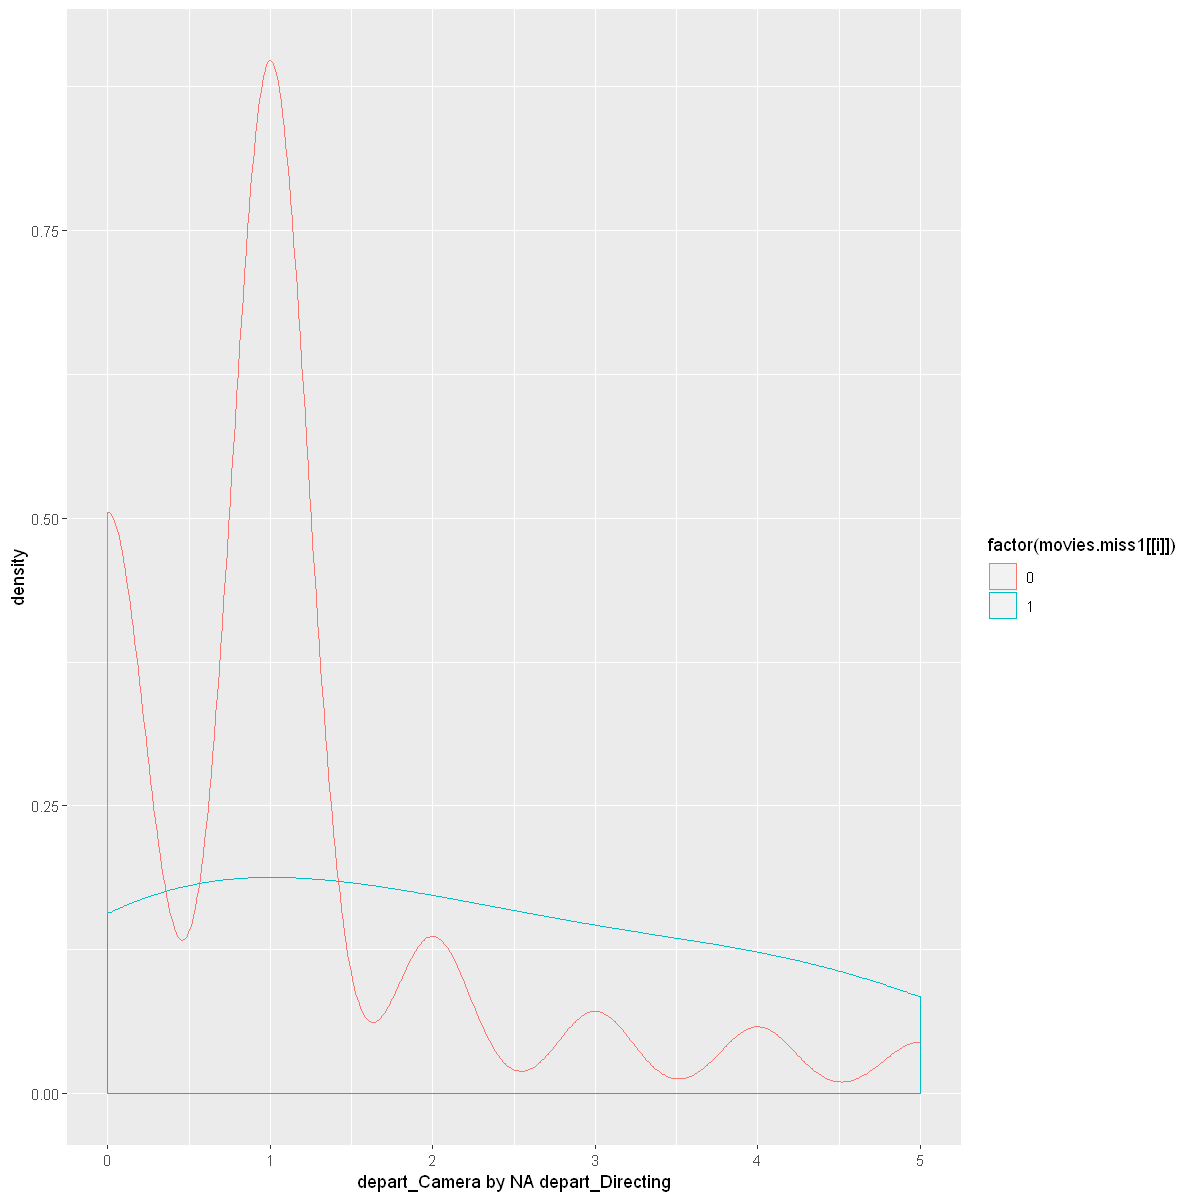


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.2452, df = 218.98, p-value = 7.285e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1746002 -0.6722221
sample estimates:
mean of x mean of y 
0.8465419 1.7699531 

[1] "depart_Custom_Mkup by NA depart_Directing"


Warning message:
"Removed 1283 rows containing non-finite values (stat_density)."


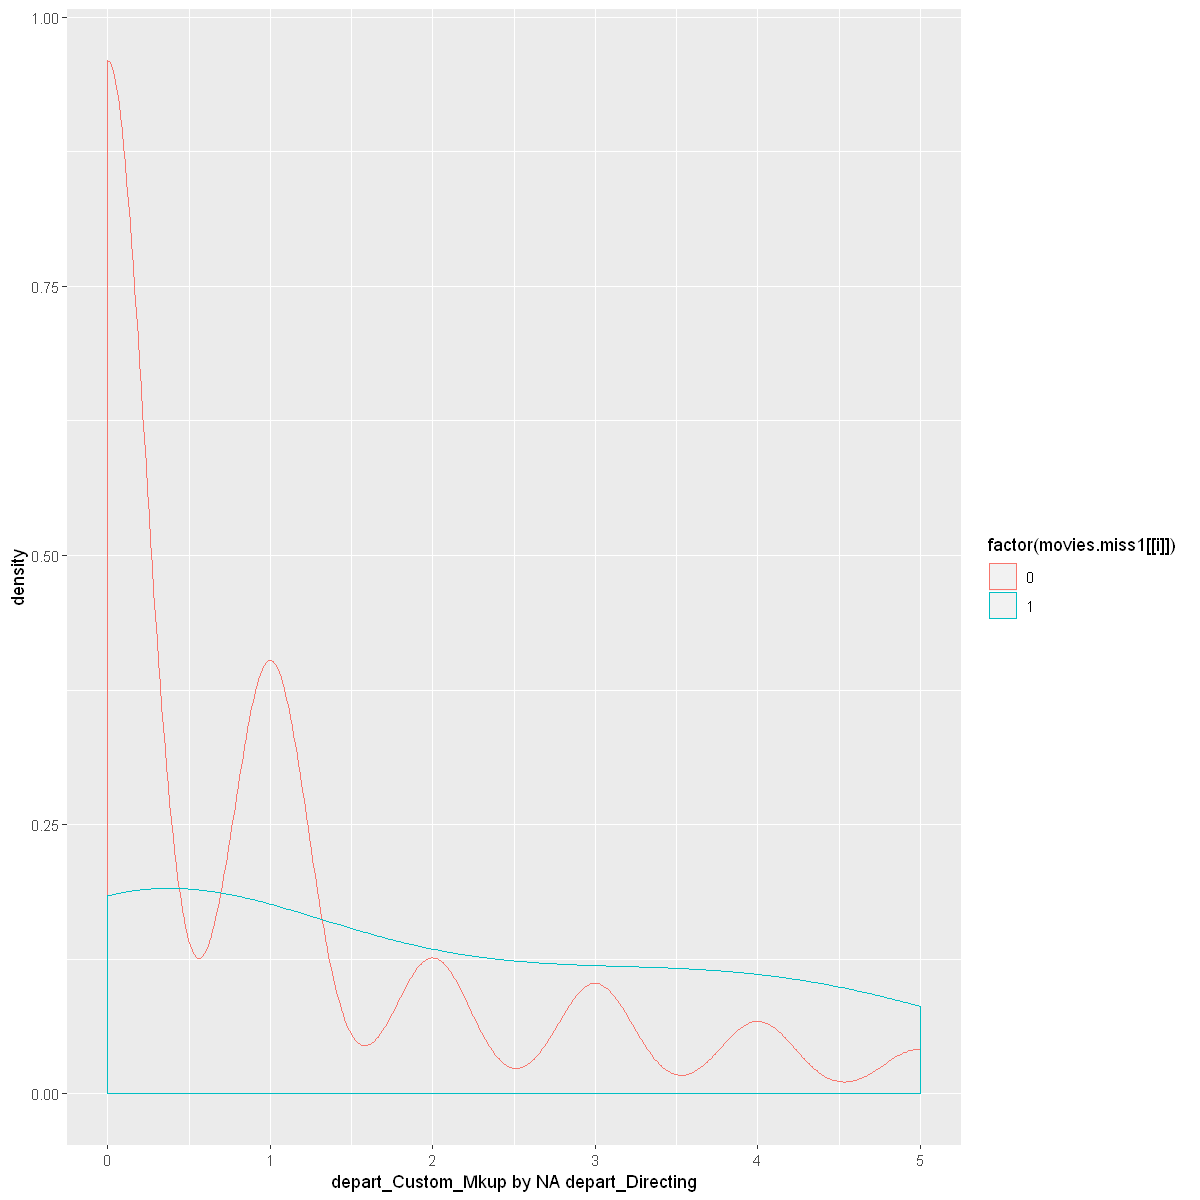


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.672, df = 178.07, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.816707 -1.249703
sample estimates:
mean of x mean of y 
 1.219669  2.752874 

[1] "depart_Sound by NA depart_Directing"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


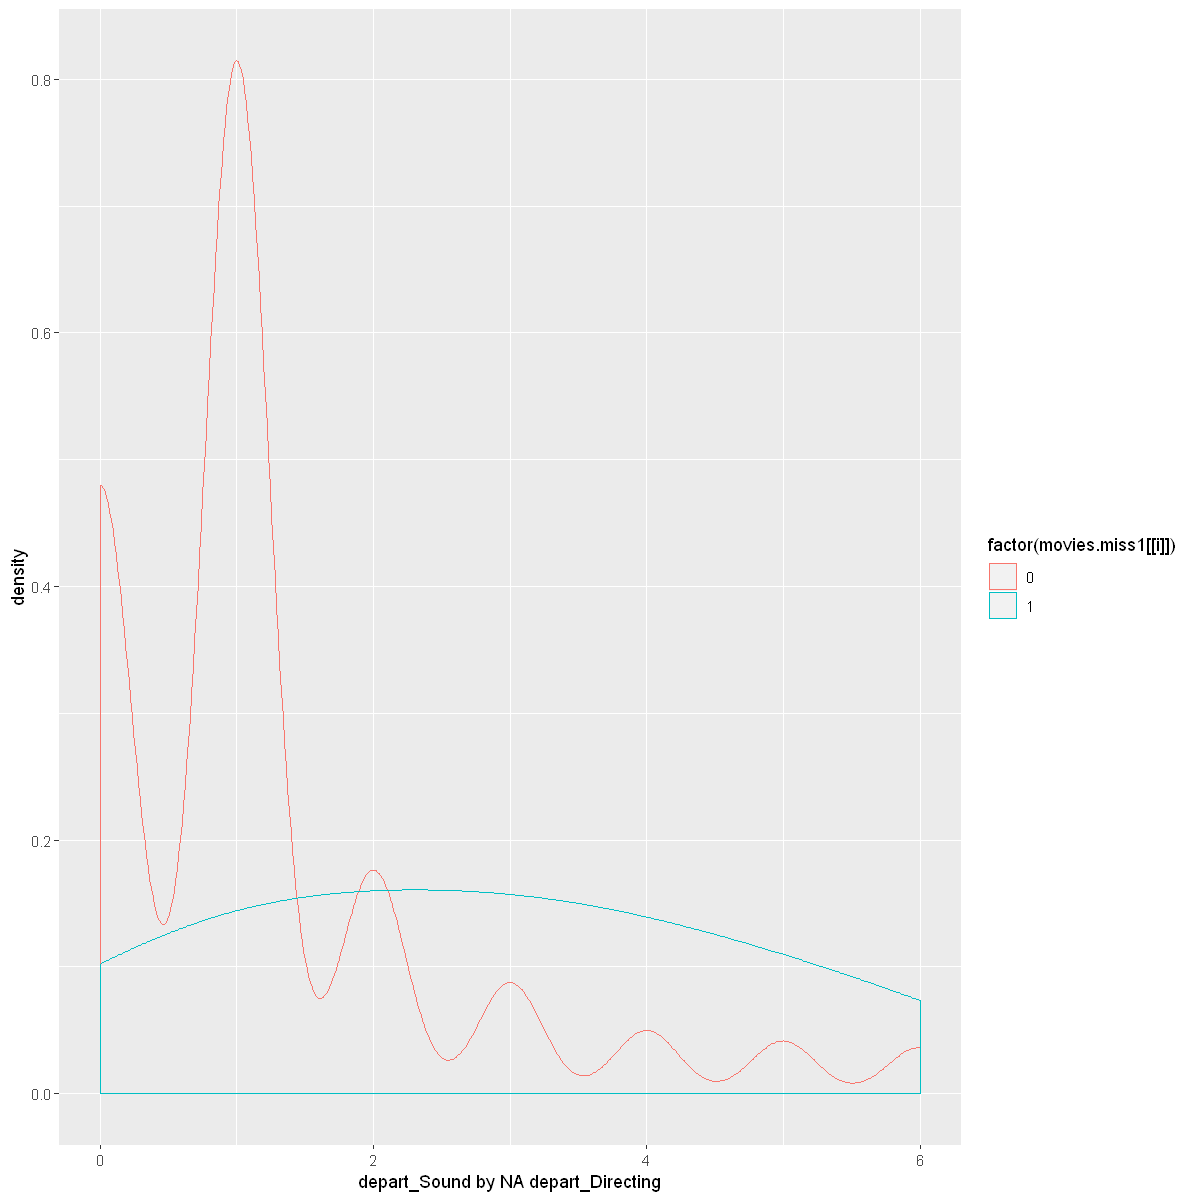


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.5455, df = 224.87, p-value = 3.965e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -130229983  -69960753
sample estimates:
mean of x mean of y 
 59689033 159784401 

[1] "revenue by NA depart_Directing"


Warning message:
"Removed 2406 rows containing non-finite values (stat_density)."


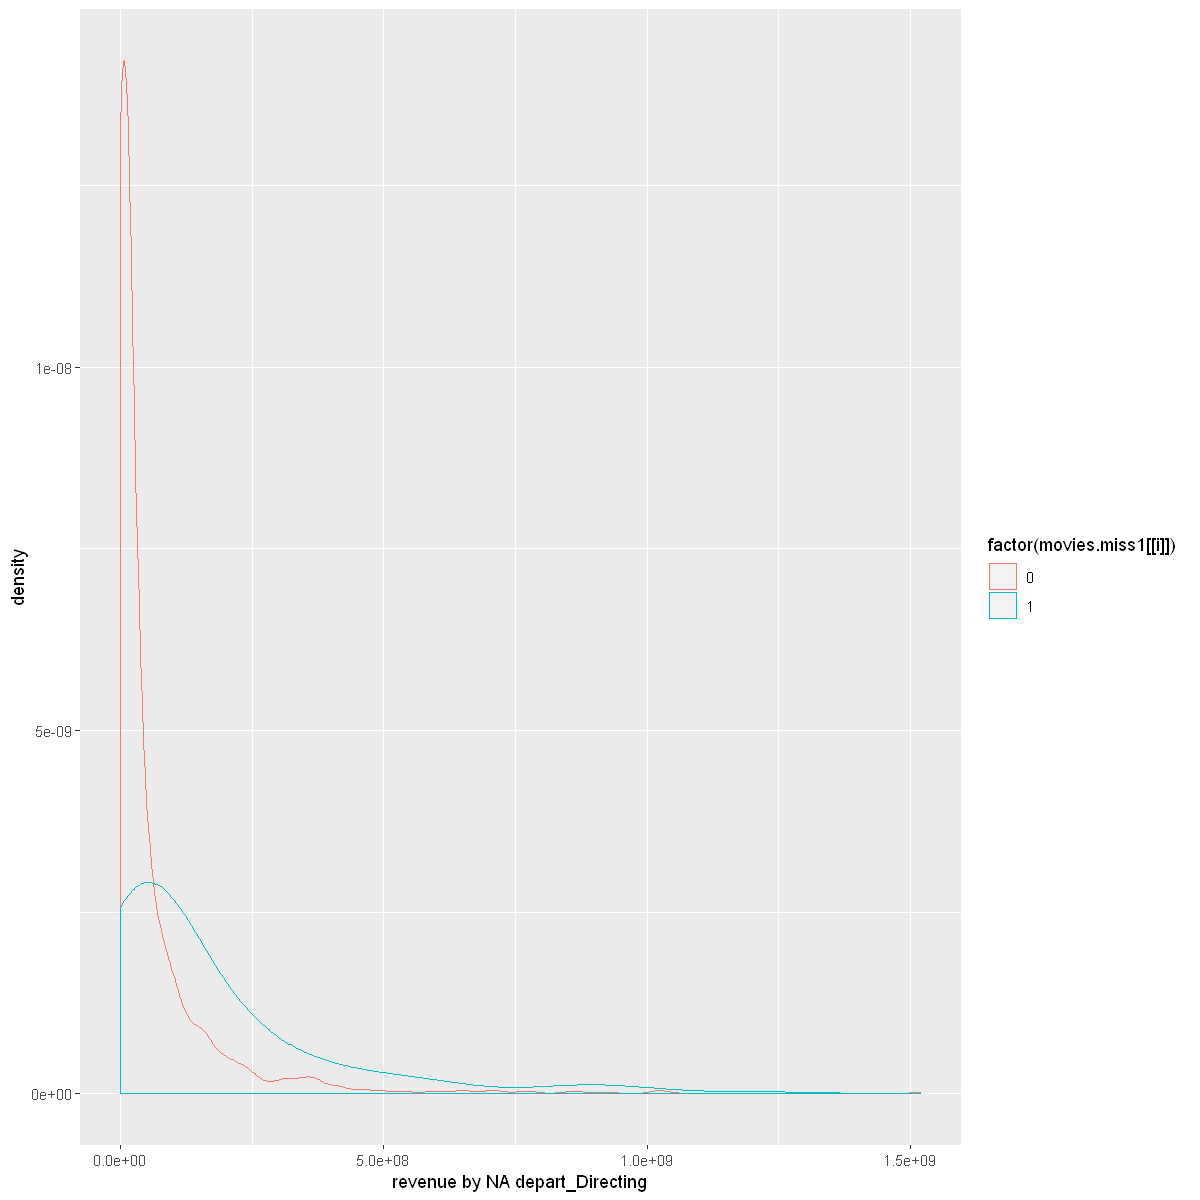


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -17.468, df = 1257.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16924408 -13506730
sample estimates:
mean of x mean of y 
 19226151  34441721 

[1] "budget by NA depart_Sound"


Warning message:
"Removed 395 rows containing non-finite values (stat_density)."


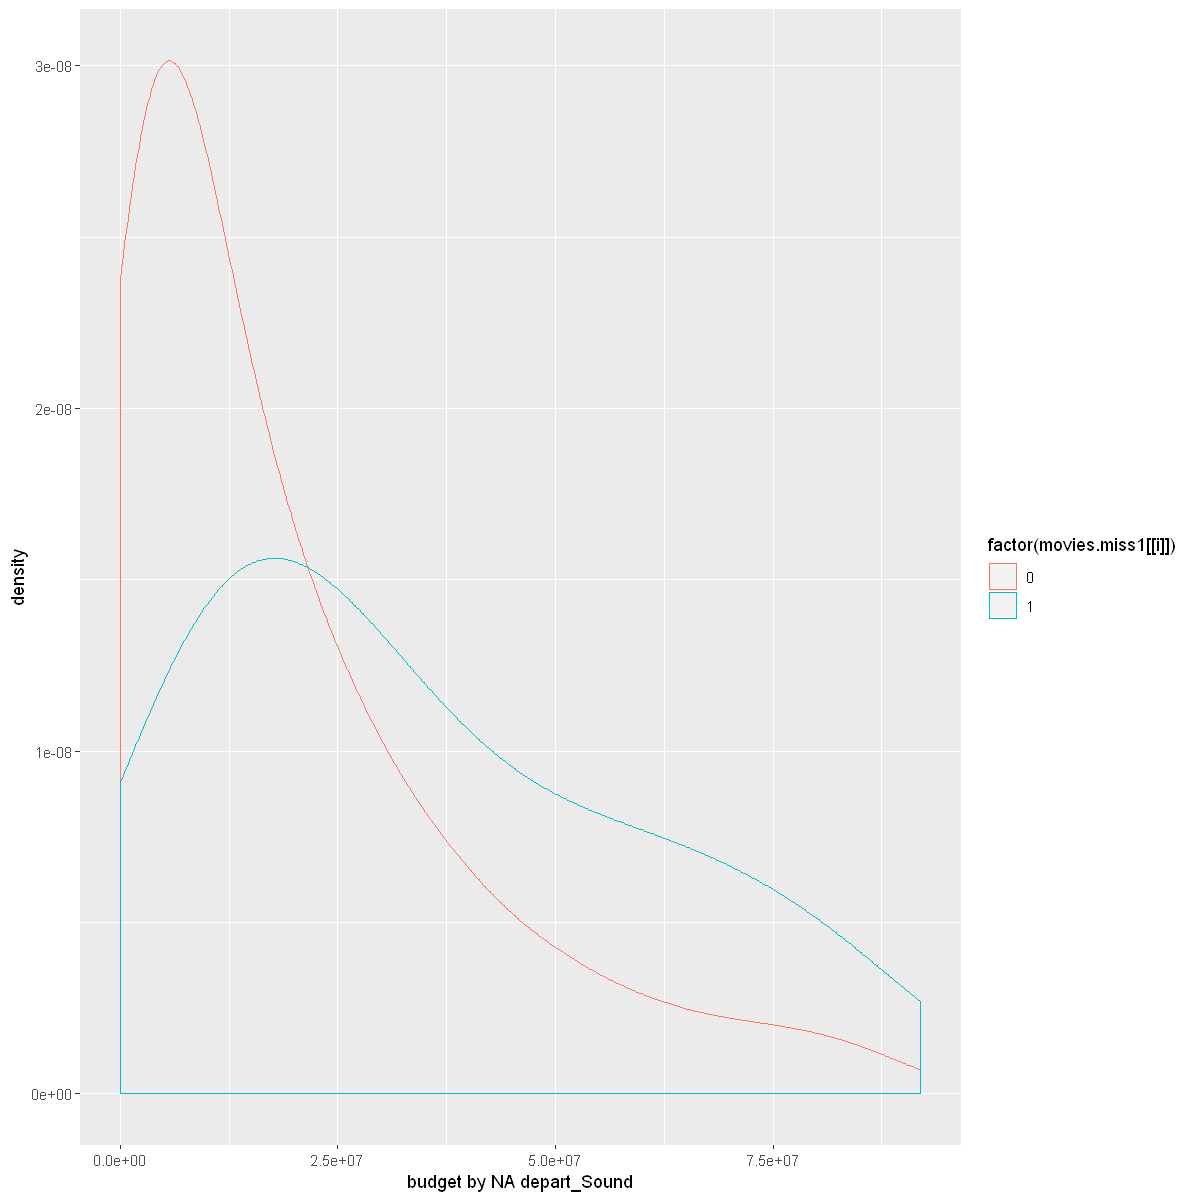


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -14.98, df = 1749.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1911969 -0.9153831
sample estimates:
mean of x mean of y 
 2.715337  3.768627 

[1] "producers_cnt by NA depart_Sound"


Warning message:
"Removed 411 rows containing non-finite values (stat_density)."


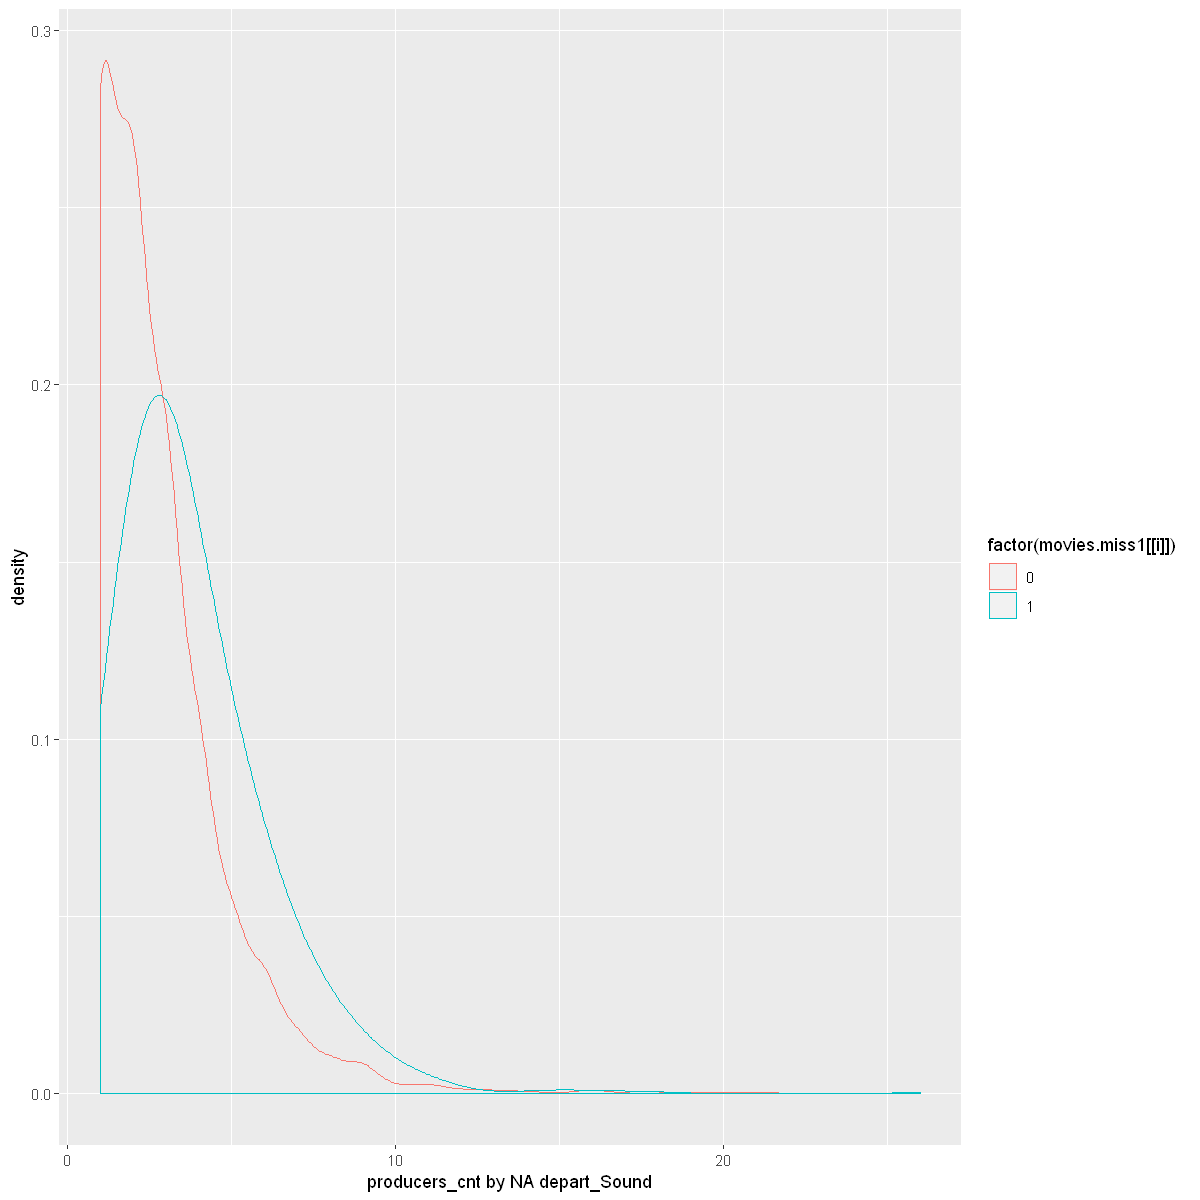


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.268, df = 1519.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.370163 -1.667318
sample estimates:
mean of x mean of y 
 3.727618  5.746358 

[1] "actor1_movies_cnt by NA depart_Sound"


Warning message:
"Removed 507 rows containing non-finite values (stat_density)."


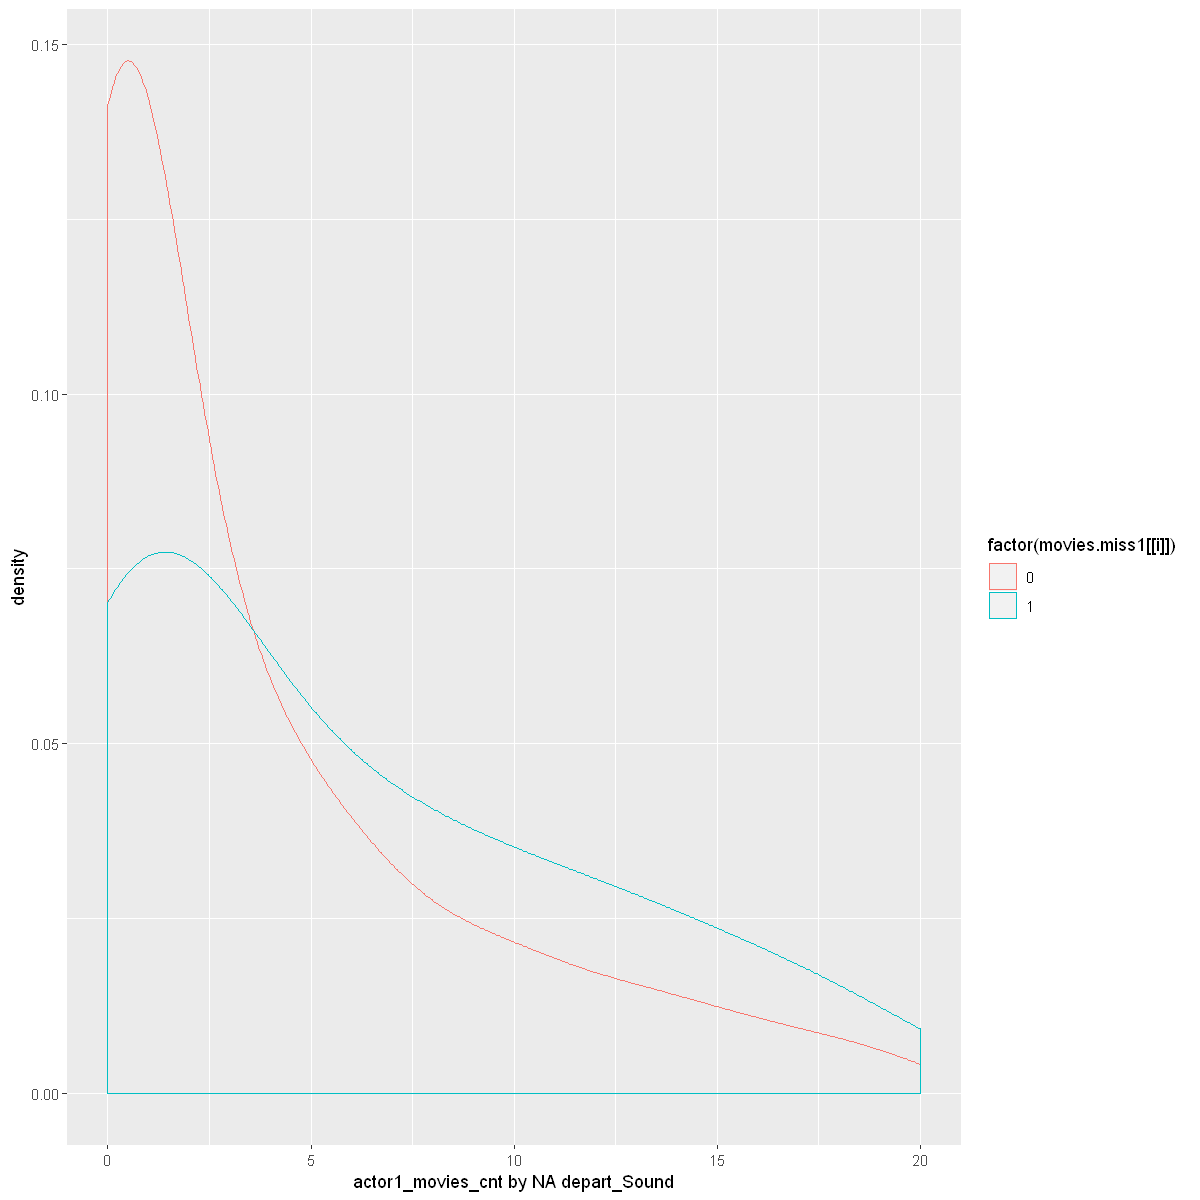


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.36, df = 1453.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.894254 -1.291129
sample estimates:
mean of x mean of y 
 3.029412  4.622103 

[1] "actor2_movies_cnt by NA depart_Sound"


Warning message:
"Removed 3033 rows containing non-finite values (stat_density)."


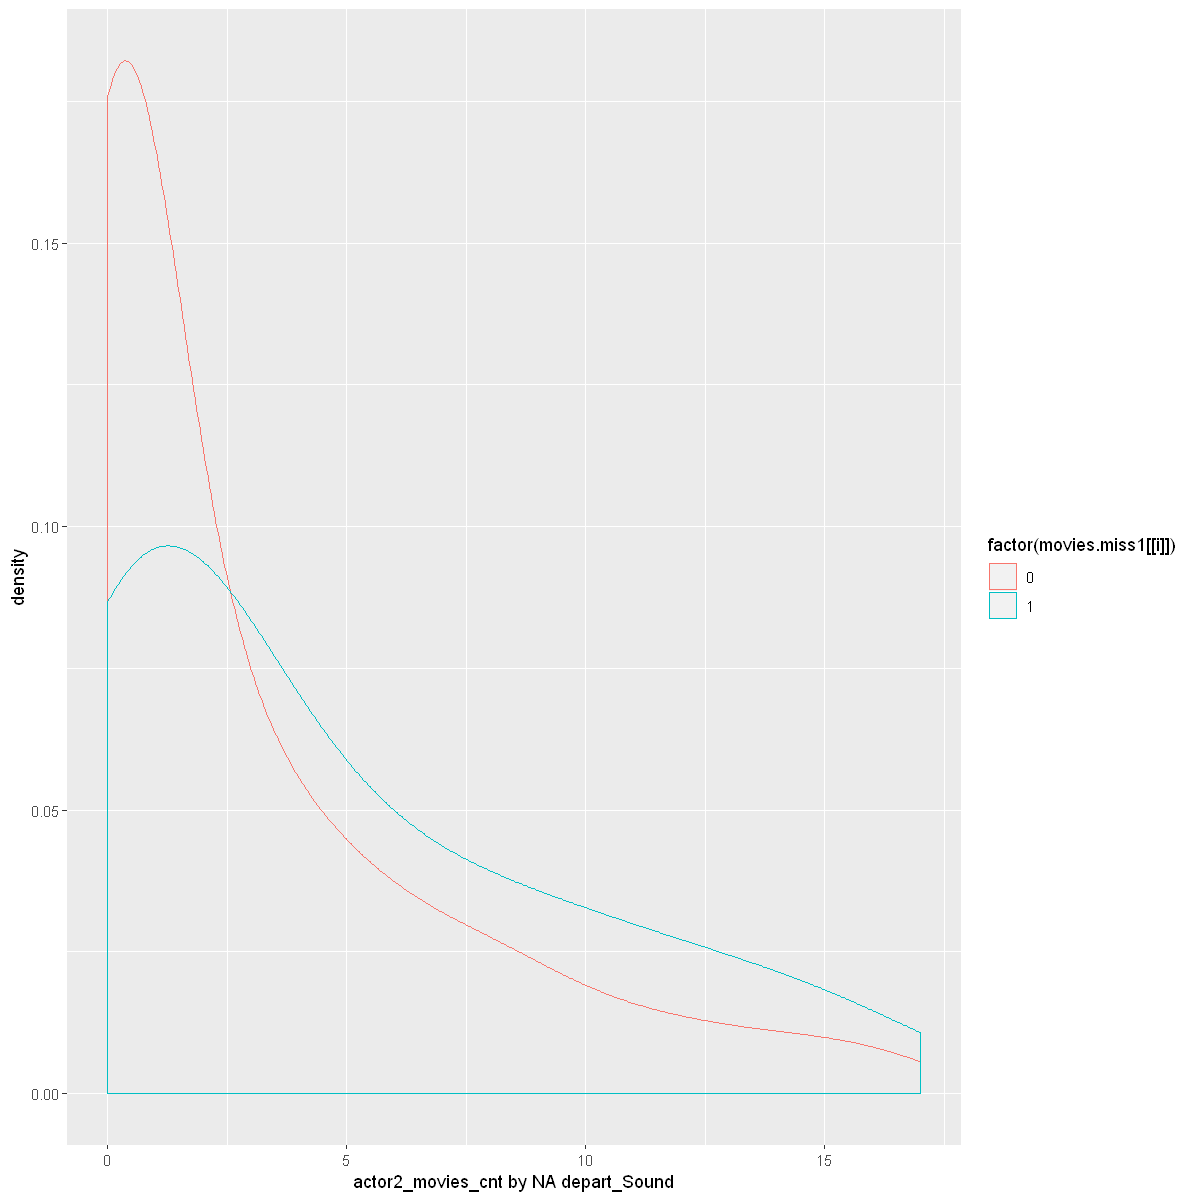


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.98, df = 1228.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -82391048 -57411307
sample estimates:
mean of x mean of y 
160909528 230810706 

[1] "actor0_prev_revenue by NA depart_Sound"


Warning message:
"Removed 3527 rows containing non-finite values (stat_density)."


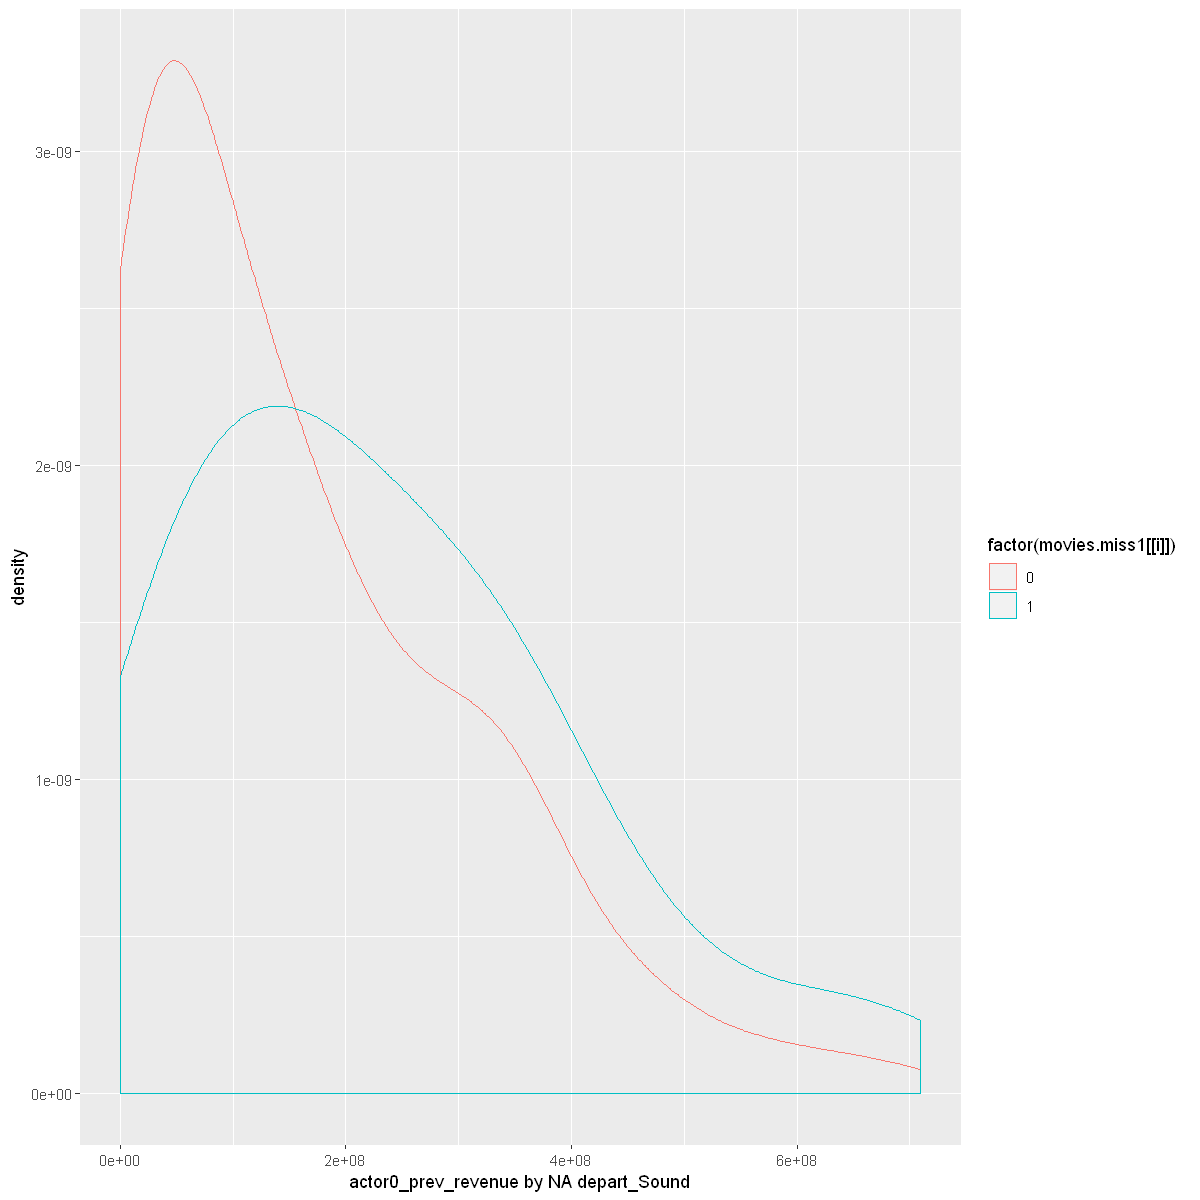


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.7085, df = 1200.6, p-value = 3.022e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -46849826 -25647477
sample estimates:
mean of x mean of y 
137755672 174004323 

[1] "actor1_prev_revenue by NA depart_Sound"


Warning message:
"Removed 3754 rows containing non-finite values (stat_density)."


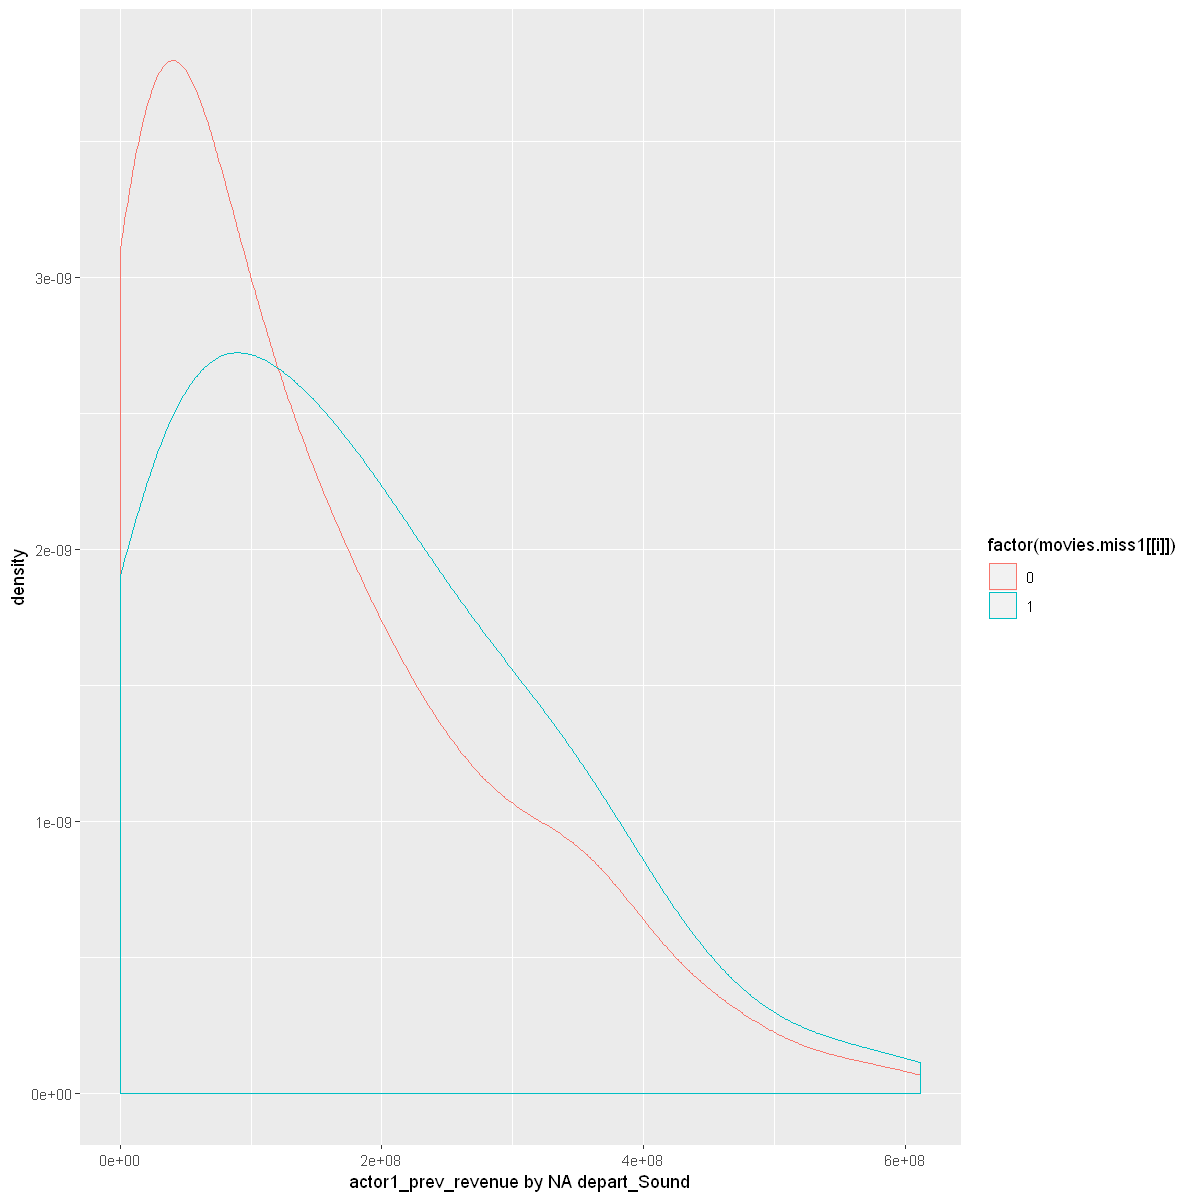


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -6.2152, df = 1156.7, p-value = 7.144e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -43256153 -22498550
sample estimates:
mean of x mean of y 
126918639 159795990 

[1] "actor2_prev_revenue by NA depart_Sound"


Warning message:
"Removed 427 rows containing non-finite values (stat_density)."


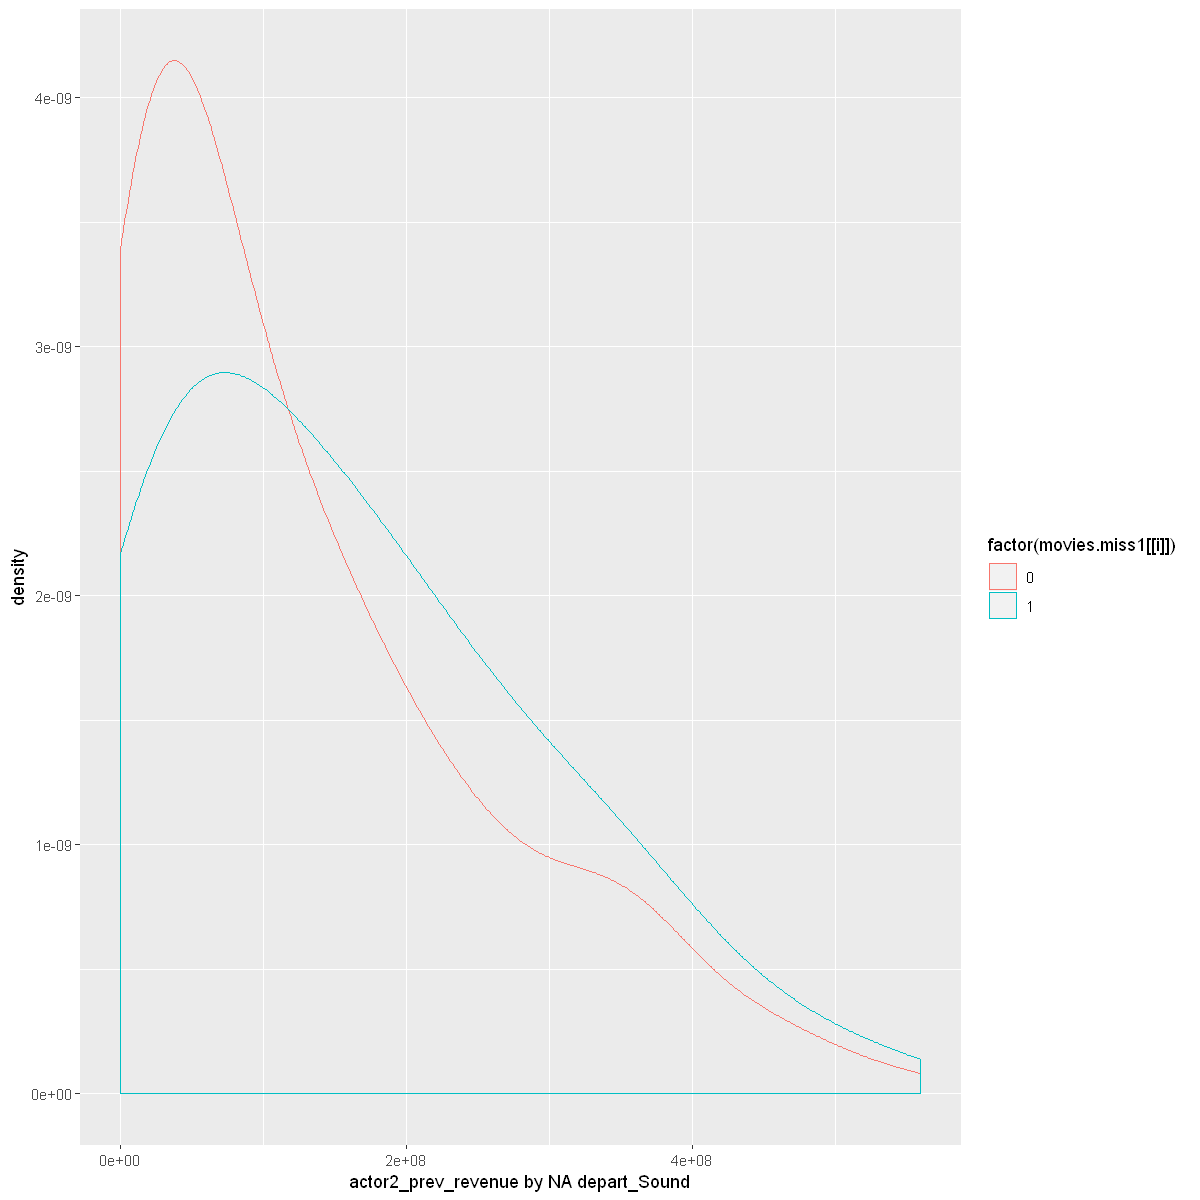


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.308, df = 1489, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8547432 -0.6020363
sample estimates:
mean of x mean of y 
 1.233316  1.961706 

[1] "director_movies_cnt by NA depart_Sound"


Warning message:
"Removed 727 rows containing non-finite values (stat_density)."


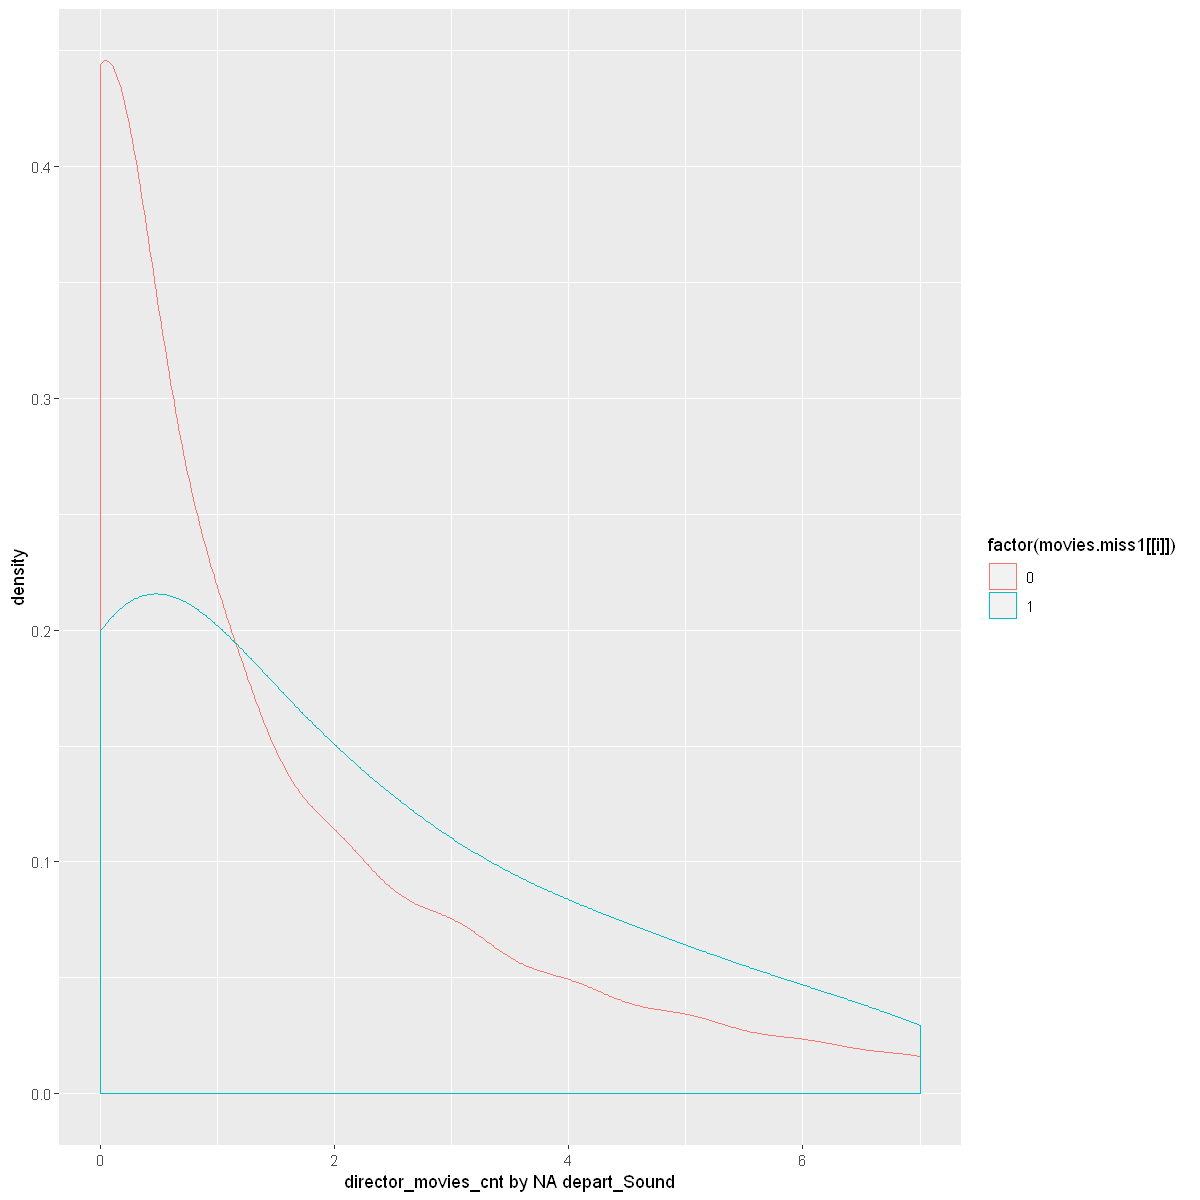


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -41.753, df = 785.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.113331 -2.833736
sample estimates:
mean of x mean of y 
 1.314138  4.287671 

[1] "depart_Art by NA depart_Sound"


Warning message:
"Removed 704 rows containing non-finite values (stat_density)."


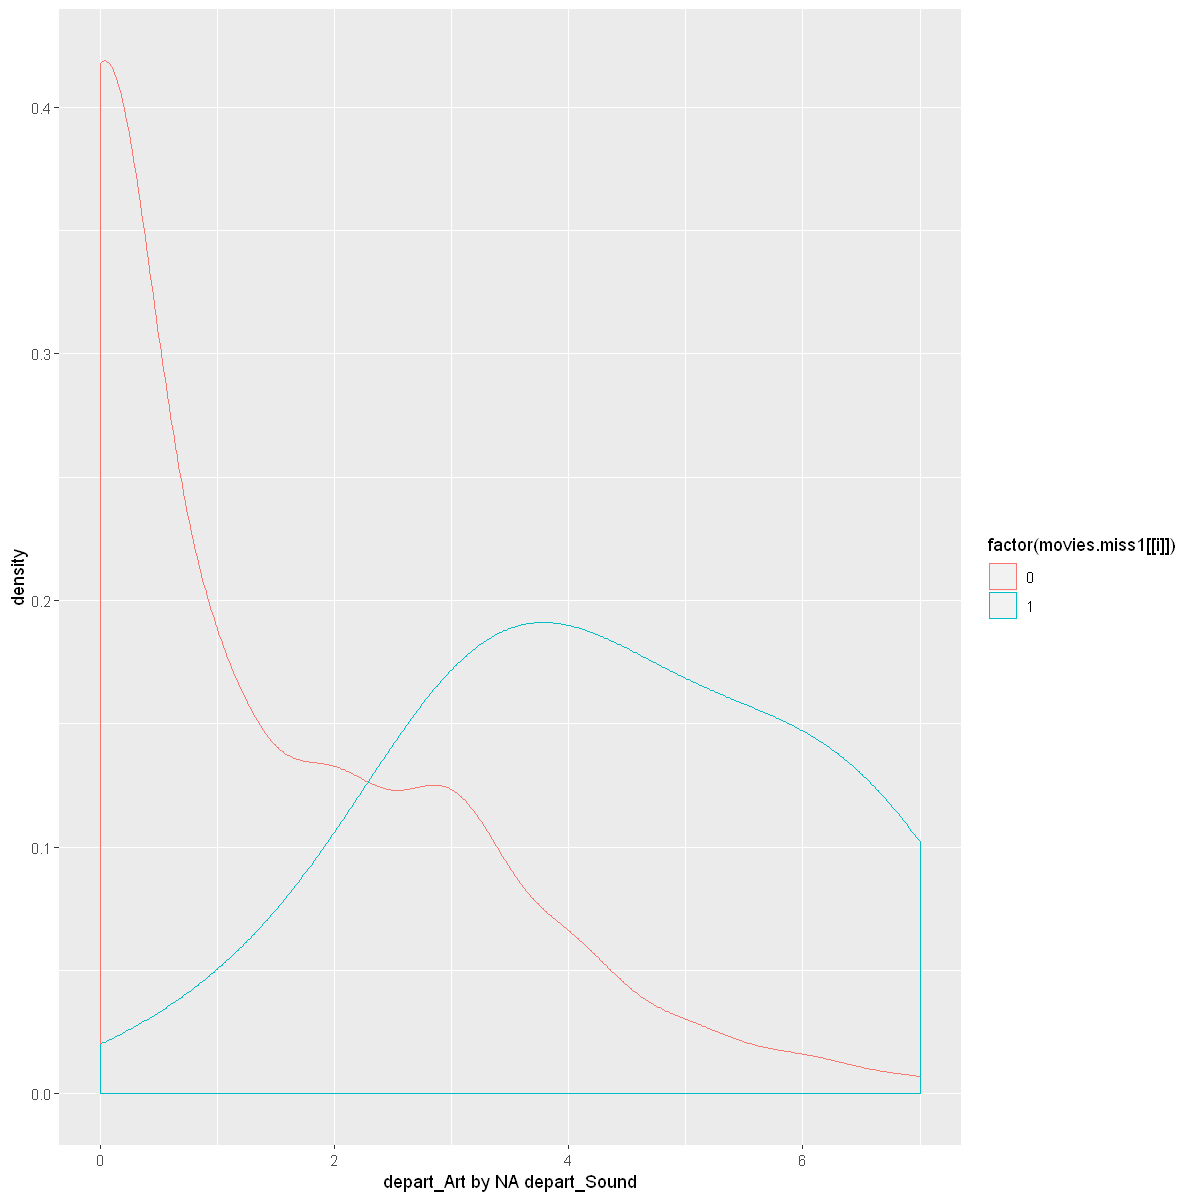


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -36.395, df = 701.55, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.308122 -2.071841
sample estimates:
mean of x mean of y 
0.8973081 3.0872894 

[1] "depart_Camera by NA depart_Sound"


Warning message:
"Removed 1017 rows containing non-finite values (stat_density)."


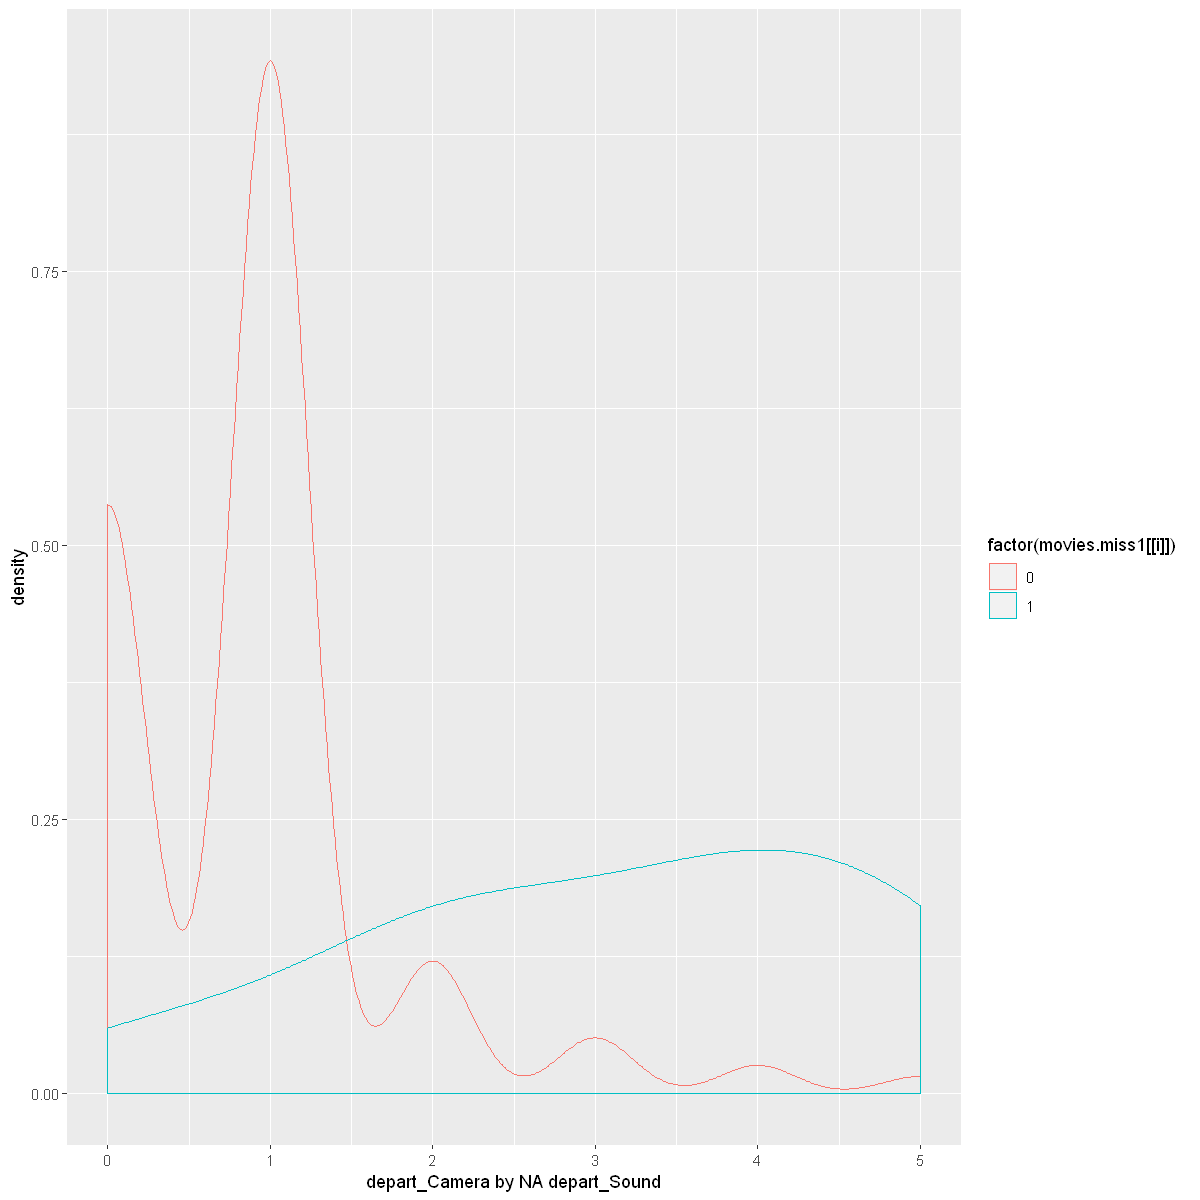


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -27.507, df = 544.66, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.197444 -1.904511
sample estimates:
mean of x mean of y 
0.7148958 2.7658730 

[1] "depart_Custom_Mkup by NA depart_Sound"


Warning message:
"Removed 513 rows containing non-finite values (stat_density)."


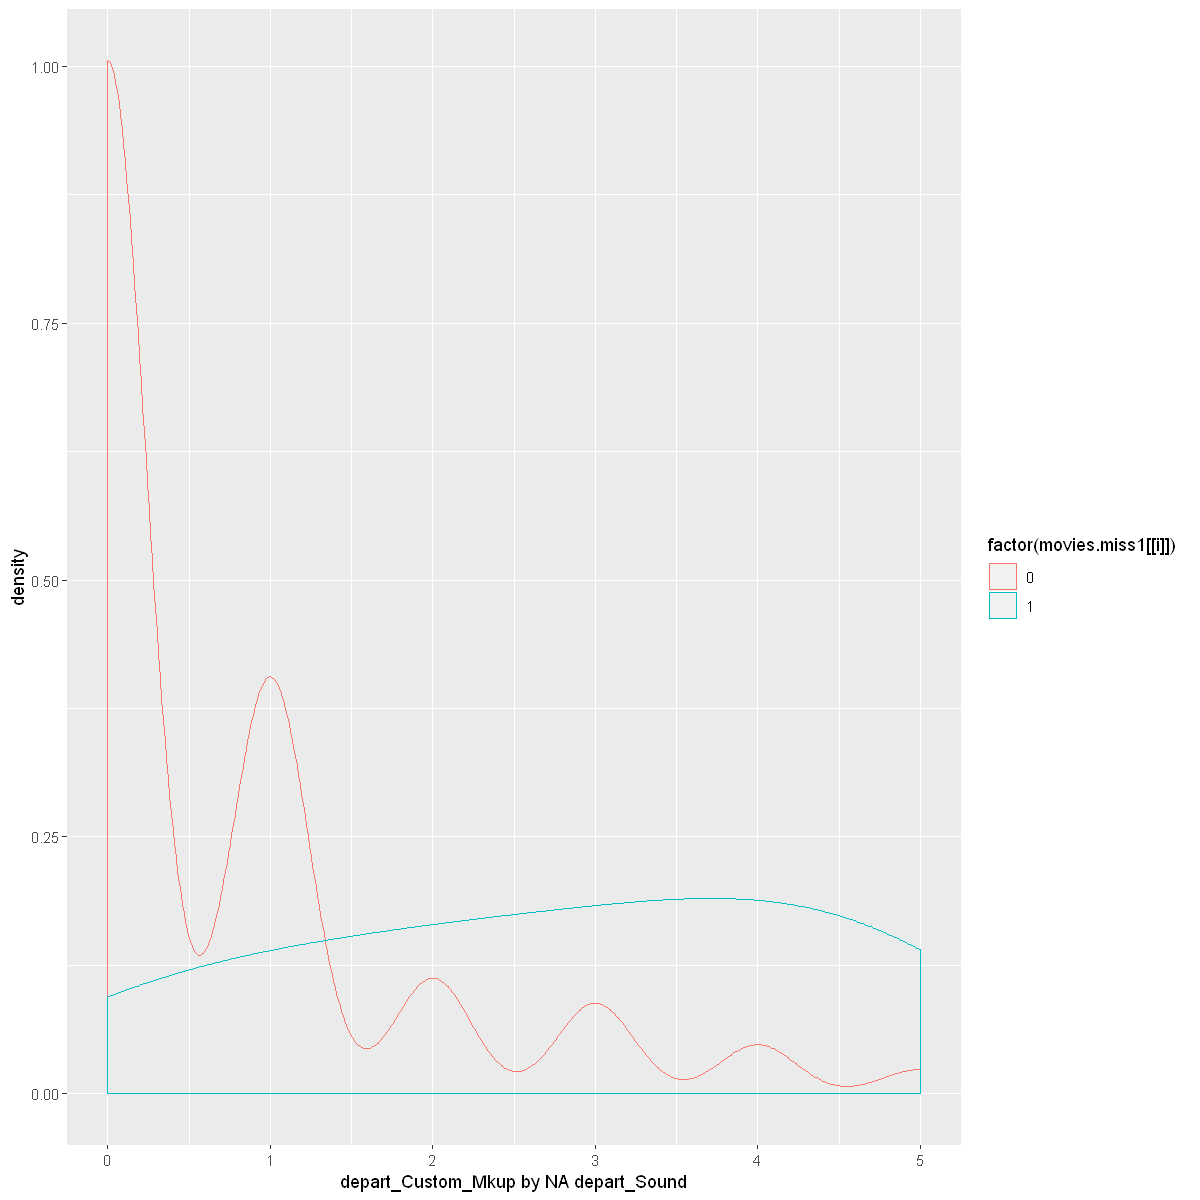


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -44.993, df = 1170.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0225131 -0.9370623
sample estimates:
mean of x mean of y 
 1.277628  2.257415 

[1] "depart_Directing by NA depart_Sound"


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


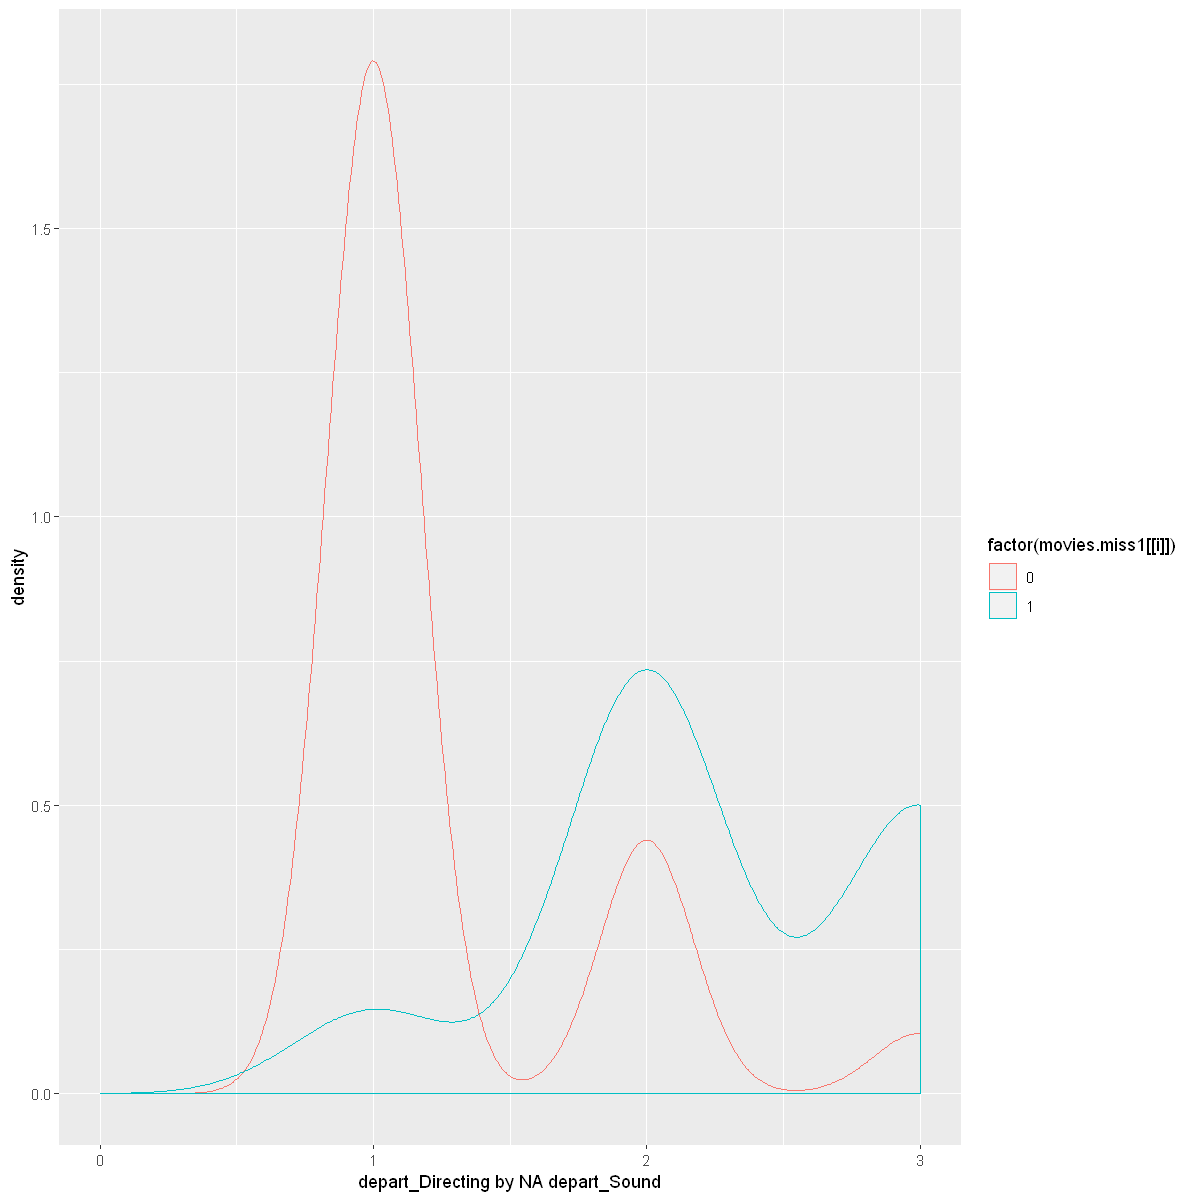


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.548, df = 611.22, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -115418357  -79187300
sample estimates:
mean of x mean of y 
 49128779 146431607 

[1] "revenue by NA depart_Sound"


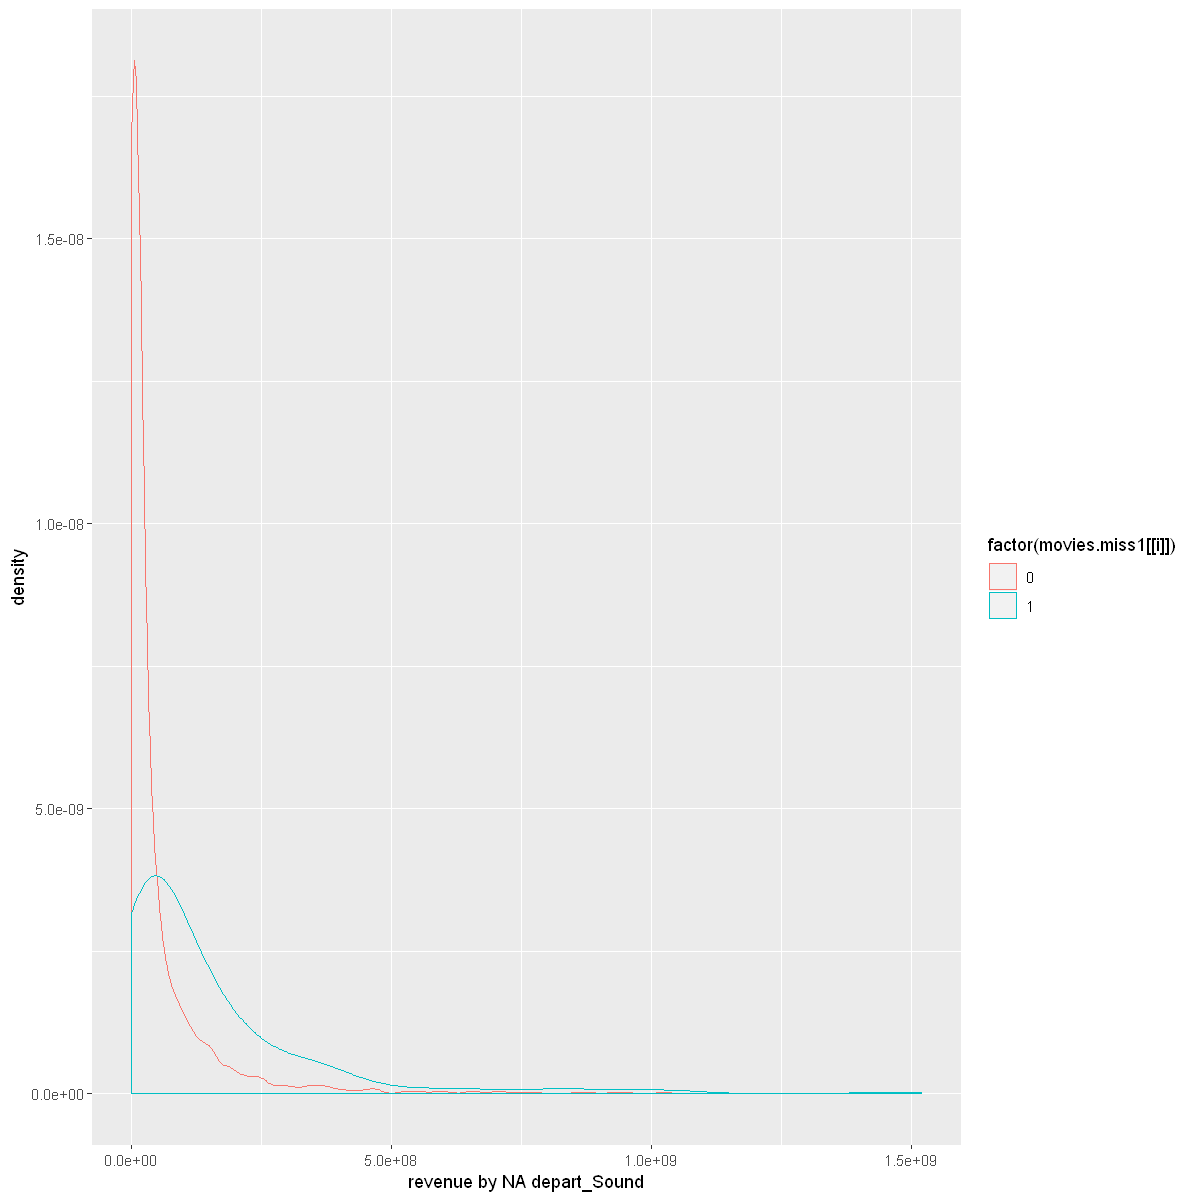

In [51]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (i in l2){
    for (j in c(l2,'revenue')){
        if (i!=j) {
        print(ggplot(movies_ff_v1,aes(x=movies_ff_v1[[j]], group=factor(movies.miss1[[i]]),
                             color=factor(movies.miss1[[i]]))) +
geom_density(adjust=2)+labs(x=paste(j,'by NA',i,sep=' ')))
         b1<- movies_ff_v1 %>% select(j,i) %>% filter(movies.miss1[i]==0)  
         b2<-movies_ff_v1 %>% select(j,i) %>% filter(movies.miss1[i]==1) 
         print(t.test(b1[[j]],b2[[j]]))  
         print(paste(j,'by NA',i,sep=' '))
       }
    }
}

3.2.2 table of the missingness mechanism 

In [52]:
na_treat = read.csv("../data/na_treatment.csv")

In [53]:
na_treat <- na_treat[1:51,1:4]

In [54]:
na_treat

Feature.name                 Scale   missing.mechanism   NA.treatment   
1  budget                       Ratio   MNAR                Categorize     
2  popularity                   Ratio   hasn't been checked remove rows    
3  runtime                      Ratio   hasn't been checked remove rows    
4  revenue                      Ratio   hasn't been checked leave          
5  keyword_cnt                  Ratio   hasn't been checked remove rows    
6  seasonality                  Ratio   hasn't been checked remove rows    
7  producers_cnt                Ratio   MNAR                delete column  
8  countries_cnt                Ratio   hasn't been checked remove rows    
9  keywords_cnt                 Ratio   hasn't been checked remove rows    
10 actor0_movies_cnt            Ratio   hasn't been checked remove rows    
11 actor0_movies_5y_cnt         Ratio   hasn't been checked remove rows    
12 actor1_movies_cnt            Ratio   MNAR                delete column  
13 actor1_movies_5y_cnt         Ratio   hasn't been checked remove rows    
14 actor2_movies_cnt            Ratio   MNAR                delete column  
15 actor2_movies_5y_cnt         Ratio   hasn't been checked remove rows    
16 actor0_prev_revenue          Ratio   MNAR                Categorize     
17 actor1_prev_revenue          Ratio   MNAR                delete column  
18 actor2_prev_revenue          Ratio   MNAR                delete column  
19 director_movies_cnt          Ratio   MNAR                delete column  
20 director_movies_5y_cnt       Ratio   hasn't been checked remove rows    
21 depart_Art                   Ratio   MNAR                delete column  
22 depart_Camera                Ratio   MNAR                delete column  
23 depart_Crew                  Ratio   hasn't been checked remove rows    
24 depart_Custom_Mkup           Ratio   MNAR                delete column  
25 depart_Directing             Ratio   MNAR                delete column  
26 depart_Editing               Ratio   hasn't been checked remove rows    
27 depart_Lighting              Ratio   hasn't been checked remove rows    
28 depart_Production            Ratio   hasn't been checked remove rows    
29 depart_Sound                 Ratio   MNAR                delete column  
30 depart_Visual_Effects        Ratio   hasn't been checked remove rows    
31 depart_Writing               Ratio   hasn't been checked remove rows    
32 depart_Art_female            Ratio   hasn't been checked remove rows    
33 depart_Camera_female         Ratio   hasn't been checked remove rows    
34 depart_Crew_female           Ratio   hasn't been checked remove rows    
35 depart_Custom_Mkup_female    Ratio   hasn't been checked remove rows    
36 depart_Directing_female      Ratio   hasn't been checked remove rows    
37 depart_Editing_female        Ratio   hasn't been checked remove rows    
38 depart_Production_female     Ratio   hasn't been checked remove rows    
39 depart_Sound_female          Ratio   hasn't been checked remove rows    
40 depart_Visual_Effects_female Ratio   hasn't been checked remove rows    
41 depart_Writing_female        Ratio   hasn't been checked remove rows    
42 release_date                 Nominal hasn't been checked remove row     
43 release_year                 Nominal hasn't been checked remove row     
44 release_month                Nominal hasn't been checked remove row     
45 release_day                  Nominal hasn't been checked remove row     
46 sw_female_actor0             Nominal hasn't been checked Categorize As 2
47 sw_female_actor2             Nominal hasn't been checked Categorize As 2
48 sw_male_actor0               Nominal hasn't been checked Categorize As 2
49 sw_male_actor1               Nominal hasn't been checked Categorize As 2
50 sw_male_actor2               Nominal hasn't been checked Categorize As 2
51 depart_Lighting_female       Nominal hasn't been checked Categorize As 2

3.3.3 imputtion technique

because all of the missing values are MNAR i can't do an imputation.
At features with less than 5 percent missing values i decided to remove the rows. 
some of the features with more than 5% missing will be categorized and some of them will be removed from the data.
regarding the features with Nominal scales which have missing values, the missing values will be categorized.


Categorization of missing values

In [55]:
summary(movies.na)


ERROR: Error in summary(movies.na): object 'movies.na' not found


In [56]:
quantile(movies_ff_v1$budget, probs = seq(0, 1, by=0.1), na.rm=TRUE,names=TRUE )

0%      10%      20%      30%      40%      50%      60%      70% 
       1  1284600  3500000  6000000 10000000 15000000 20000000 28000000 
     80%      90%     100% 
40000000 58000000 92000000

In [57]:
movies_ff_v1$budget_cat[is.na(movies_ff_v1$budget)==TRUE] <- 0
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 3500000] <- 1
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 1e+07 & movies_ff_v1$budget> 3500000] <- 2
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 2e+07 & movies_ff_v1$budget> 1e+07] <- 3
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 4e+07 & movies_ff_v1$budget> 2e+07] <- 4
movies_ff_v1$budget_cat[movies_ff_v1$budget<= 9.2e+07 & movies_ff_v1$budget> 4e+07] <- 5

In [58]:
quantile(movies_ff_v1$actor0_prev_revenue, probs = seq(0, 1, by=0.1), na.rm=TRUE,names=TRUE )

0%       10%       20%       30%       40%       50%       60%       70% 
        1  11000000  30263917  53478166  91036760 137298489 174333255 237681299 
      80%       90%      100% 
311312624 383257136 709827462

In [59]:
movies_ff_v1$actor0_prev_revenue_cat[is.na(movies_ff_v1$actor0_prev_revenue)==TRUE] <- 0
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 30263916.8] <- 1 
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 91036760 & movies_ff_v1$actor0_prev_revenue> 30263916.8] <- 2
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 174333254.6 & movies_ff_v1$actor0_prev_revenue > 91036760] <- 3
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 311312624 & movies_ff_v1$actor0_prev_revenue > 174333254.6] <- 4
movies_ff_v1$actor0_prev_revenue_cat[movies_ff_v1$actor0_prev_revenue<= 709827462 & movies_ff_v1$actor0_prev_revenue > 311312624] <- 5

In [60]:
 movies.clean.data <- movies_ff_v1[ , !names(movies_ff_v1) %in% l2]

In [61]:
l4

[1] "release_date"           "release_year"           "release_month"         
 [4] "release_day"            "sw_female_actor0"       "sw_female_actor1"      
 [7] "sw_female_actor2"       "sw_male_actor0"         "sw_male_actor1"        
[10] "sw_male_actor2"         "depart_Lighting_female"

In [62]:
l5 <- l4[5:11]
l5

[1] "sw_female_actor0"       "sw_female_actor1"       "sw_female_actor2"      
[4] "sw_male_actor0"         "sw_male_actor1"         "sw_male_actor2"        
[7] "depart_Lighting_female"

In [63]:
## categorize NA As 2 at categorical variable with type integer
for (i in l5) {
    movies.clean.data[[i]][is.na(movies.clean.data[[i]])==TRUE] <- 2 }

In [65]:
head(movies.clean.data)

movie_id original_language popularity release_date runtime runtime_cat
1 1        en                 6.575393  2015-02-20    93     Short      
2 2        en                 8.248895  2004-08-06   113     Medium     
3 3        en                64.299990  2014-10-10   105     Medium     
4 4        hi                 3.174936  2012-03-09   122     Large      
5 5        ko                 1.148070  2009-02-05   118     Medium     
6 6        en                 0.743274  1987-08-06    83     Short      
  revenue  sw_lang_en sw_web_presence sw_has_poster ...
1 12314651 1          0               1             ...
2 95149435 1          0               1             ...
3 13092000 1          1               1             ...
4 16000000 0          1               1             ...
5  3923970 0          0               1             ...
6  3261638 1          0               1             ...
  depart_Custom_Mkup_female depart_Directing_female depart_Editing_female
1 0                         0                       0                    
2 0                         0                       0                    
3 0                         0                       0                    
4 0                         0                       0                    
5 0                         0                       0                    
6 0                         0                       0                    
  depart_Lighting_female depart_Production_female depart_Sound_female
1 0                      0                        0                  
2 0                      3                        0                  
3 0                      2                        0                  
4 0                      0                        0                  
5 0                      0                        0                  
6 0                      0                        0                  
  depart_Visual_Effects_female depart_Writing_female budget_cat
1 0                            0                     3         
2 0                            1                     4         
3 0                            0                     1         
4 0                            0                     1         
5 0                            0                     0         
6 0                            0                     2         
  actor0_prev_revenue_cat
1 3                      
2 3                      
3 2                      
4 1                      
5 0                      
6 0

In [66]:
movies.clean.data <- na.omit(movies.clean.data[,c(1:6,8:74)]) 

In [67]:
movies.clean.data

movie_id original_language popularity release_date runtime runtime_cat
1     1       en                 6.575393  2015-02-20    93     Short      
2     2       en                 8.248895  2004-08-06   113     Medium     
4     4       hi                 3.174936  2012-03-09   122     Large      
5     5       ko                 1.148070  2009-02-05   118     Medium     
6     6       en                 0.743274  1987-08-06    83     Short      
8     8       en                 1.949044  2004-01-15    84     Short      
9     9       en                 6.902423  1996-02-16   100     Medium     
10   10       en                 4.672036  2003-04-16    91     Short      
11   11       en                14.774066  1976-11-21   119     Large      
12   12       en                10.543750  1987-07-10    98     Medium     
16   16       sr                 1.018477  2010-10-06    97     Medium     
18   18       en                 4.183558  2013-12-25   111     Medium     
19   19       en                 6.496259  2011-02-02    96     Medium     
20   20       en                11.359659  2005-08-02    87     Short      
22   22       en                 7.992290  1982-08-13    95     Medium     
23   23       en                 7.820787  2012-07-28   116     Medium     
24   24       en                 1.323333  2011-09-02    92     Short      
25   25       en                 7.434577  2006-09-09    87     Short      
26   26       en                 1.252367  1992-10-23    95     Medium     
27   27       en                 4.305735  1997-09-08   110     Medium     
28   28       en                10.841891  2013-09-07    93     Short      
29   29       en                 6.759181  1986-08-08    84     Short      
31   31       fr                16.086919  2011-11-02   112     Medium     
32   32       fr                 5.695860  2005-05-02   117     Medium     
36   36       en                 8.234382  2012-04-16    94     Medium     
37   37       en                 2.100499  2000-01-28   105     Medium     
38   38       en                13.676444  1995-03-10   127     Large      
39   39       en                 0.329260  2013-09-13    90     Short      
40   40       en                 3.055936  1965-04-07   123     Large      
41   41       en                 2.941626  2006-04-26   118     Medium     
...  ...      ...               ...        ...          ...     ...        
7334 7357     hi                 1.160169  2010-06-18   138     Large      
7335 7358     en                 3.736880  1971-07-02   100     Medium     
7338 7361     en                 0.003626  1999-09-14    98     Medium     
7340 7363     en                20.309585  2012-10-25   143     Large      
7341 7364     fr                 1.122218  1997-02-26   115     Medium     
7342 7365     en                 8.461369  2008-08-06   111     Medium     
7343 7366     en                12.722120  2006-09-08    97     Medium     
7344 7367     en                 3.580870  2011-02-01    93     Short      
7345 7368     en                10.693092  1983-07-22    91     Short      
7347 7370     en                13.436536  2008-03-14   108     Medium     
7348 7371     en                 1.789046  1999-10-15   100     Medium     
7349 7372     en                 9.276539  2010-11-23   119     Large      
7350 7373     en                14.046164  2011-11-22   126     Large      
7352 7375     en                14.785388  1991-05-24   130     Large      
7353 7376     it                 1.405580  2002-09-06   101     Medium     
7354 7377     en                 8.418662  1970-06-22   144     Large      
7356 7379     en                 8.745216  2005-09-16   122     Large      
7357 7380     en                11.009871  2015-04-30    96     Medium     
7358 7381     en                 5.285420  2016-06-03    86     Short      
7360 7383     en                 0.903061  2006-11-23   100     Medium     
7362 7385     en                11.457803  1987-08-14

In [68]:
b1<- movies_ff_v1 %>% select('movie_id','revenue')

In [69]:
movies.clean.data <- left_join(movies.clean.data,b1)

Joining, by = "movie_id"


In [70]:
head(movies.clean.data)

movie_id original_language popularity release_date runtime runtime_cat
1 1        en                6.575393   2015-02-20    93     Short      
2 2        en                8.248895   2004-08-06   113     Medium     
3 4        hi                3.174936   2012-03-09   122     Large      
4 5        ko                1.148070   2009-02-05   118     Medium     
5 6        en                0.743274   1987-08-06    83     Short      
6 8        en                1.949044   2004-01-15    84     Short      
  sw_lang_en sw_web_presence sw_has_poster sw_tagline ...
1 1          0               1             1          ...
2 1          0               1             1          ...
3 0          1               1             0          ...
4 0          0               1             0          ...
5 1          0               1             0          ...
6 1          0               1             1          ...
  depart_Directing_female depart_Editing_female depart_Lighting_female
1 0                       0                     0                     
2 0                       0                     0                     
3 0                       0                     0                     
4 0                       0                     0                     
5 0                       0                     0                     
6 1                       0                     0                     
  depart_Production_female depart_Sound_female depart_Visual_Effects_female
1 0                        0                   0                           
2 3                        0                   0                           
3 0                        0                   0                           
4 0                        0                   0                           
5 0                        0                   0                           
6 0                        0                   0                           
  depart_Writing_female budget_cat actor0_prev_revenue_cat revenue 
1 0                     3          3                       12314651
2 1                     4          3                       95149435
3 0                     1          1                       16000000
4 0                     0          0                        3923970
5 0                     2          0                        3261638
6 0                     0          0                        2586511

4 - Repeat the EDA to ensure that everything is Ok and the dataset is ready for model generation

In this phase, we have to make the following steps:

Descriptive Statistics
Data visualization

In [372]:
exploreData(data=movies.clean.data,y="revenue")

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |=======                                                               |   9%

The variable sw_has_poster has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.04"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.04"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/Inf in foreign function call (arg 5)"


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.595"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.595"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0736e-028"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.595"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"neighborhood radius 1.595

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  -0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.001225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  -0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.050625"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/

  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |=============================================================         |  86%

The variable depart_Lighting_female has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Removed 3229 rows containing non-finite values (stat_smooth)."


  |===================================================================   |  96%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

In [345]:
summary(movies.clean.data)

    movie_id    original_language    popularity       release_date       
 Min.   :   1   Length:5423        Min.   :  0.000   Min.   :1918-08-01  
 1st Qu.:1826   Class :character   1st Qu.:  3.139   1st Qu.:1990-12-08  
 Median :3629   Mode  :character   Median :  6.614   Median :2002-10-21  
 Mean   :3684                      Mean   :  7.315   Mean   :1998-10-21  
 3rd Qu.:5527                      3rd Qu.:  9.866   3rd Qu.:2010-07-16  
 Max.   :7398                      Max.   :547.488   Max.   :2017-08-11  
                                                                         
    runtime      runtime_cat          sw_lang_en     sw_web_presence 
 Min.   : 59.0   Length:5423        Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 93.0   Class :character   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :102.0   Mode  :character   Median :1.0000   Median :0.0000  
 Mean   :104.8                      Mean   :0.8379   Mean   :0.2757  
 3rd Qu.:115.0                      3rd Qu.:1.0000   3rd Q

Warning message in ggcorr(movies.clean.data, method = c("pairwise", "spearman"), :
"data in column(s) 'original_language', 'release_date', 'runtime_cat' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning messa

Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


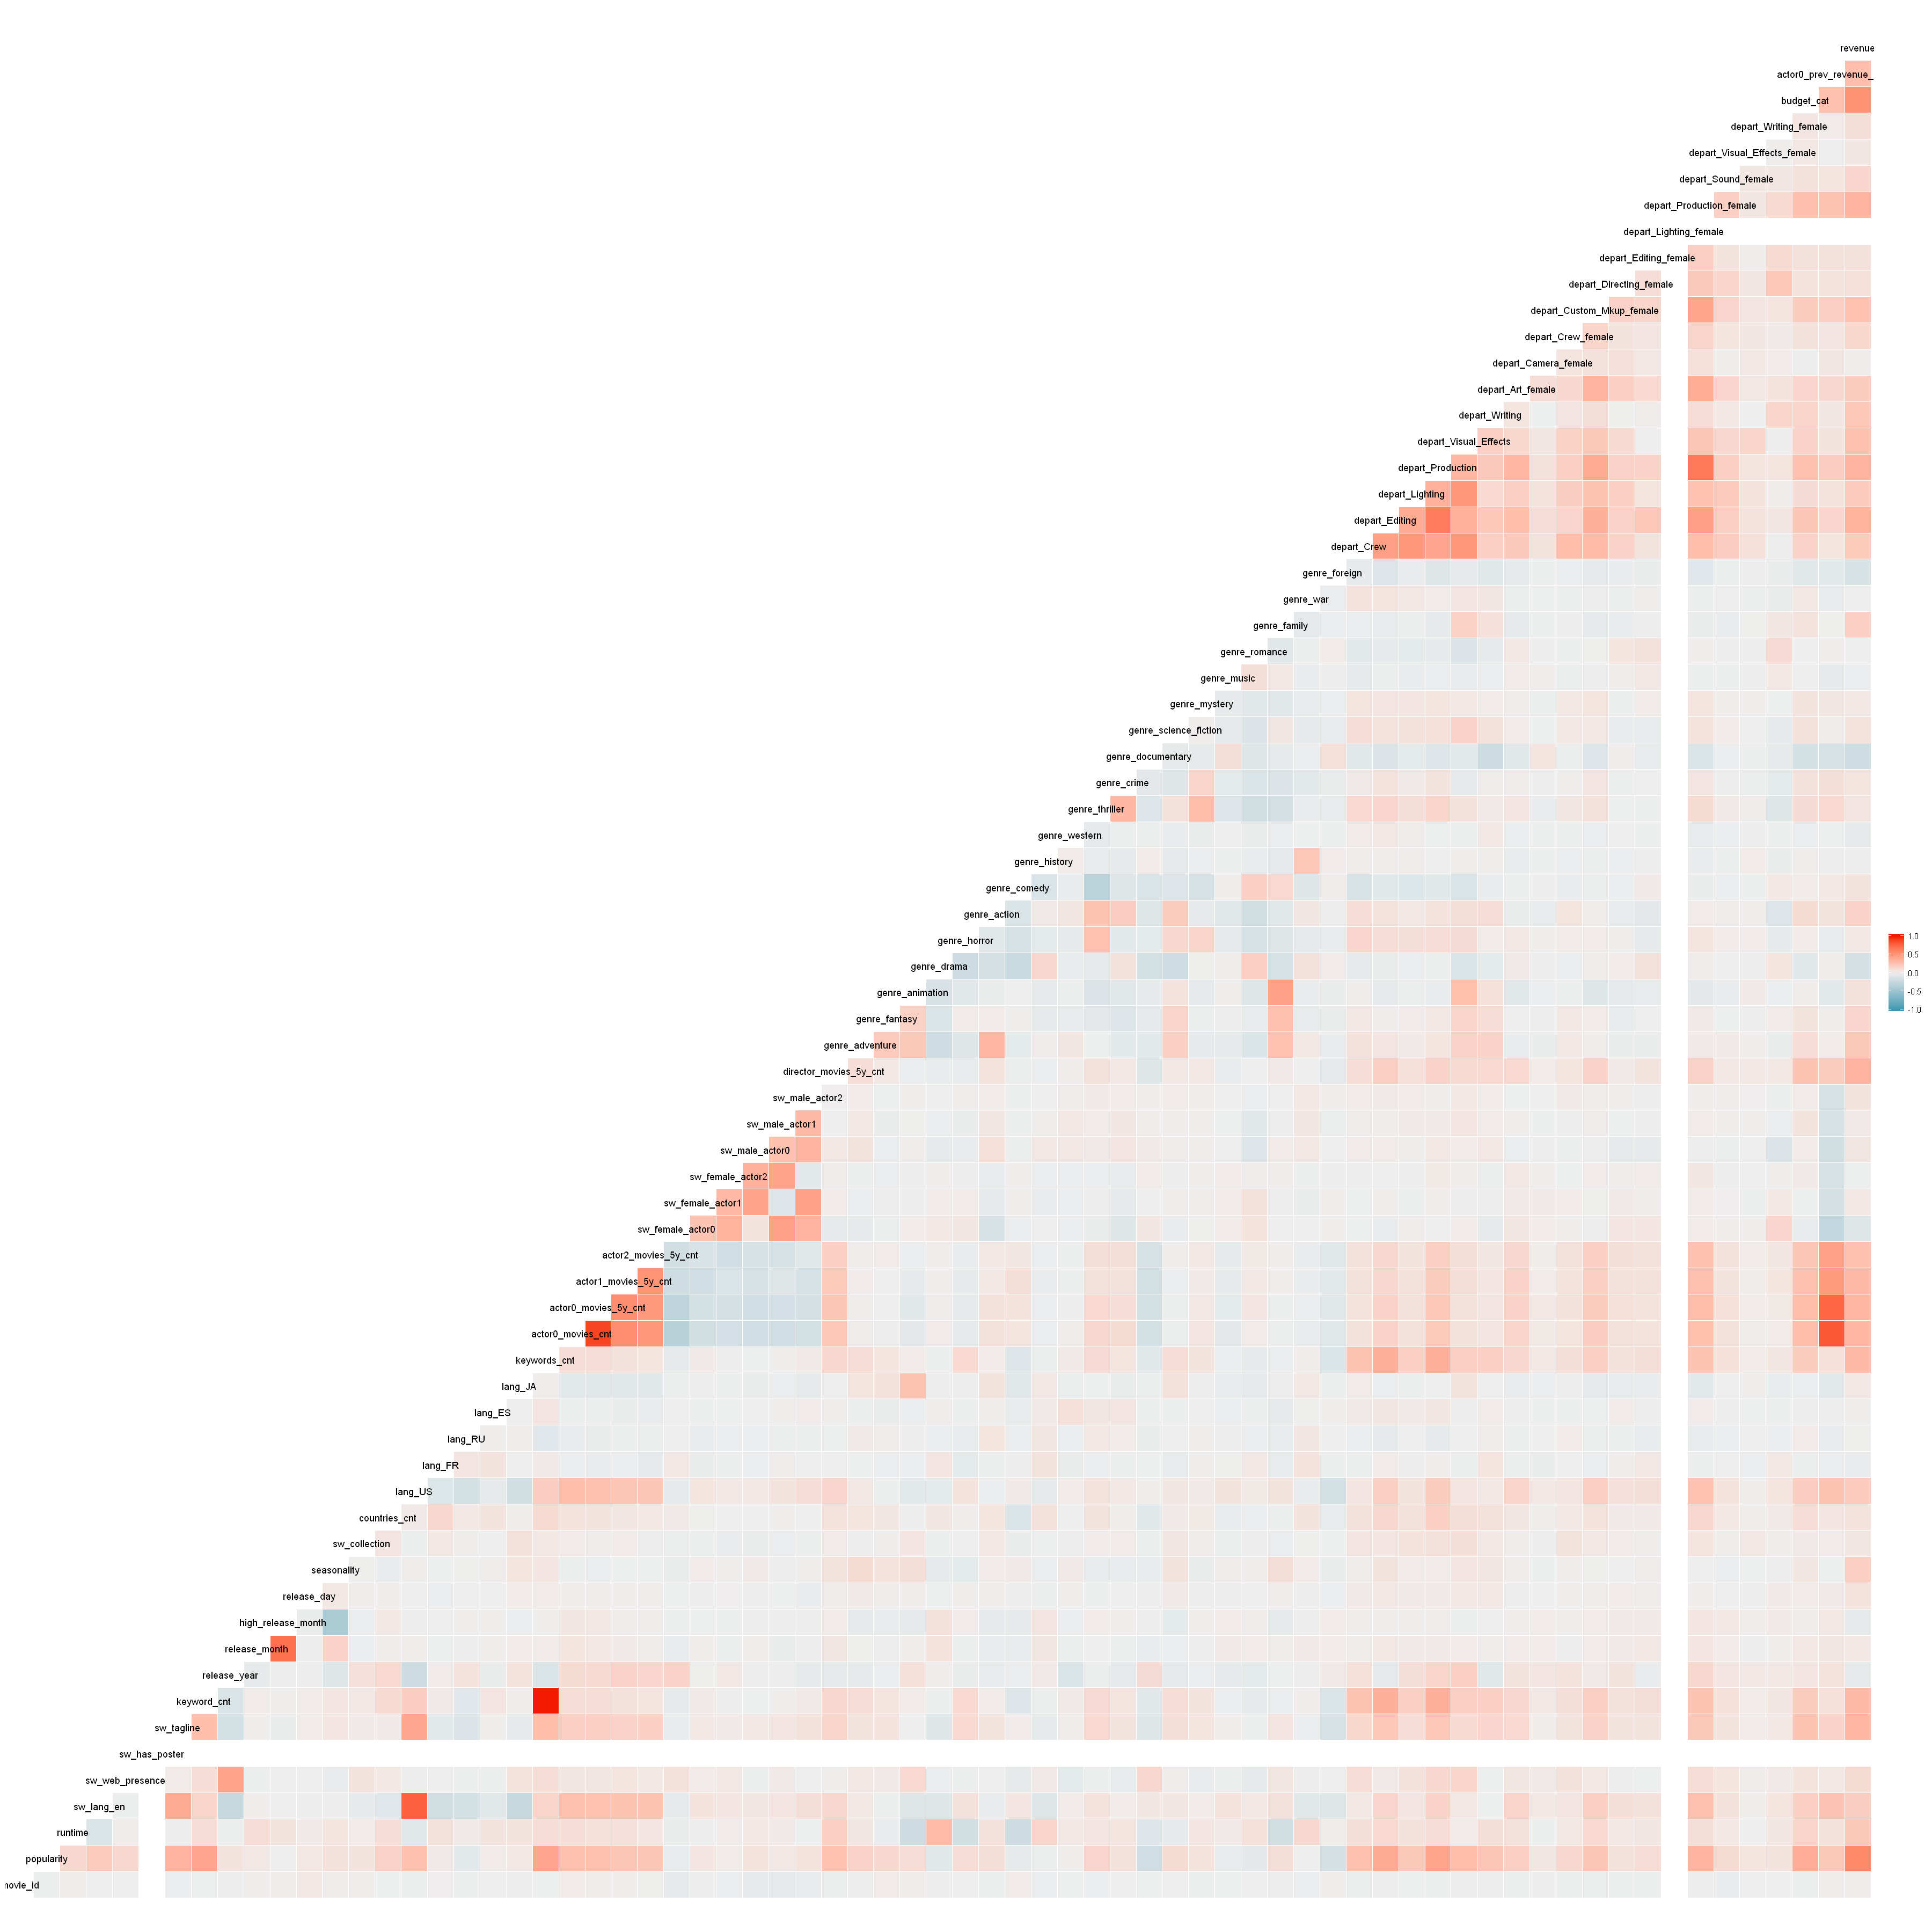

In [346]:
library(GGally)
options(repr.plot.width = 30, repr.plot.height = 30)
ggcorr(movies.clean.data, method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

Warning message in ggcorr(movies.clean.data[, c(1:18, 74)], method = c("pairwise", :
"data in column(s) 'original_language', 'release_date', 'runtime_cat' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning mes

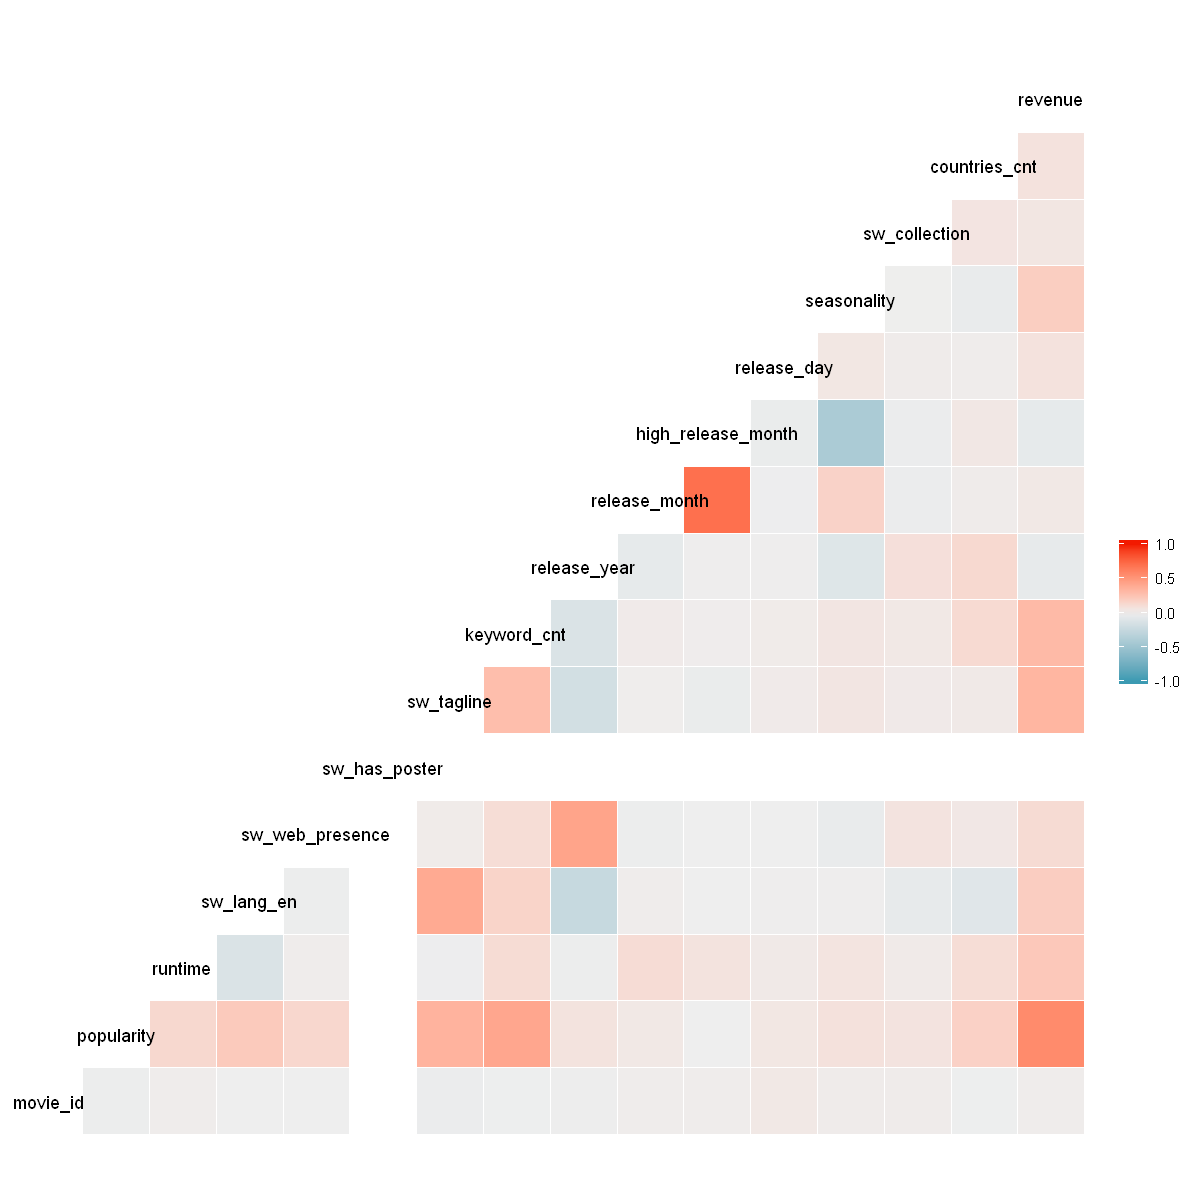

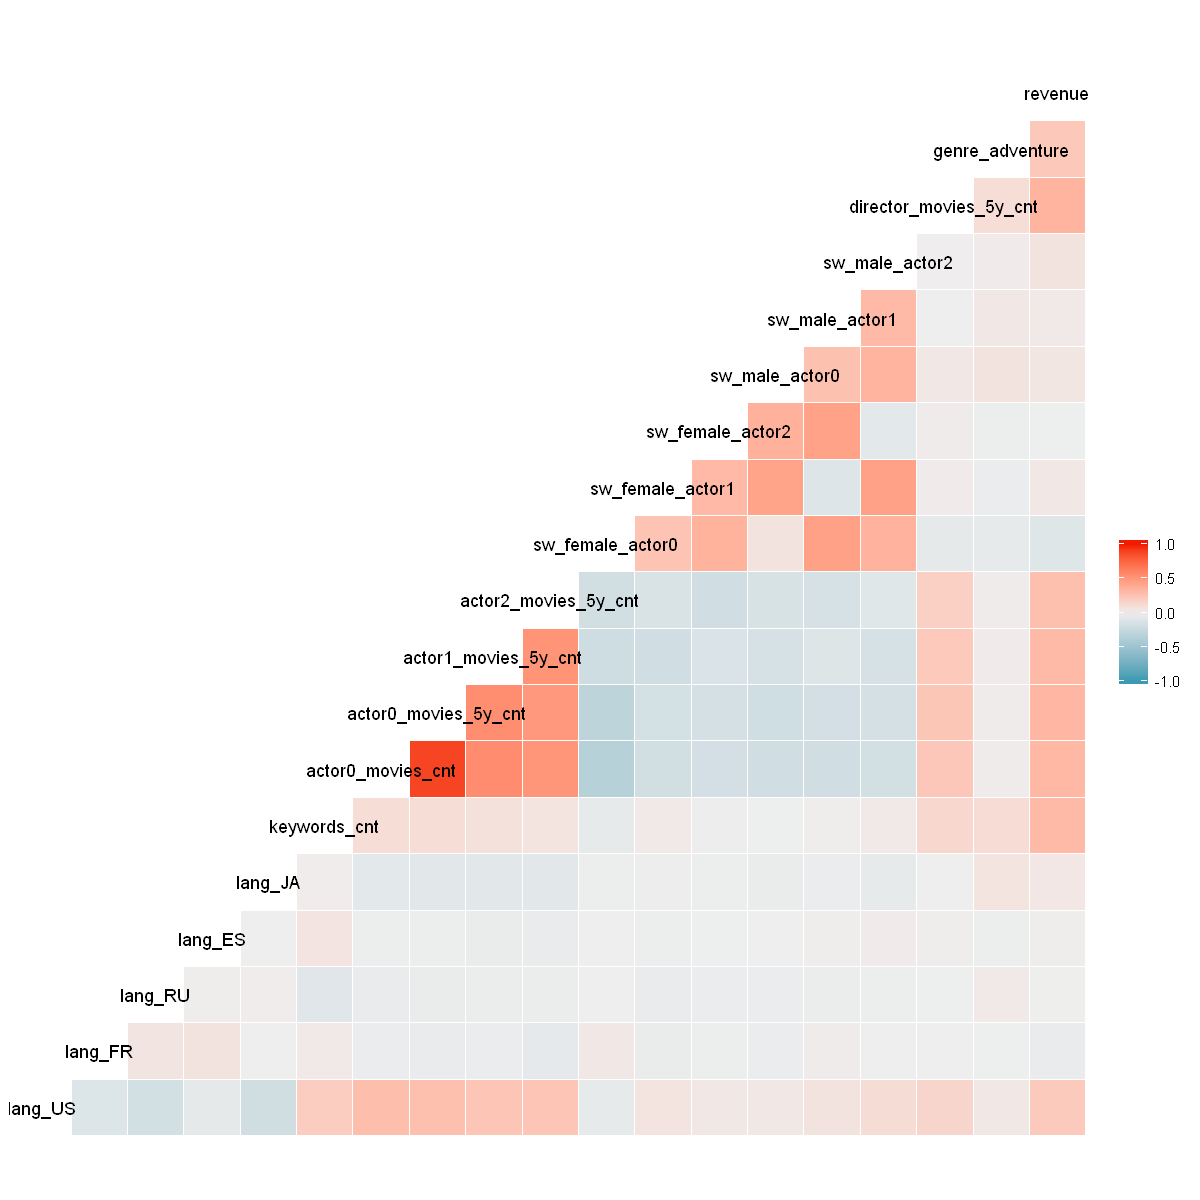

Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


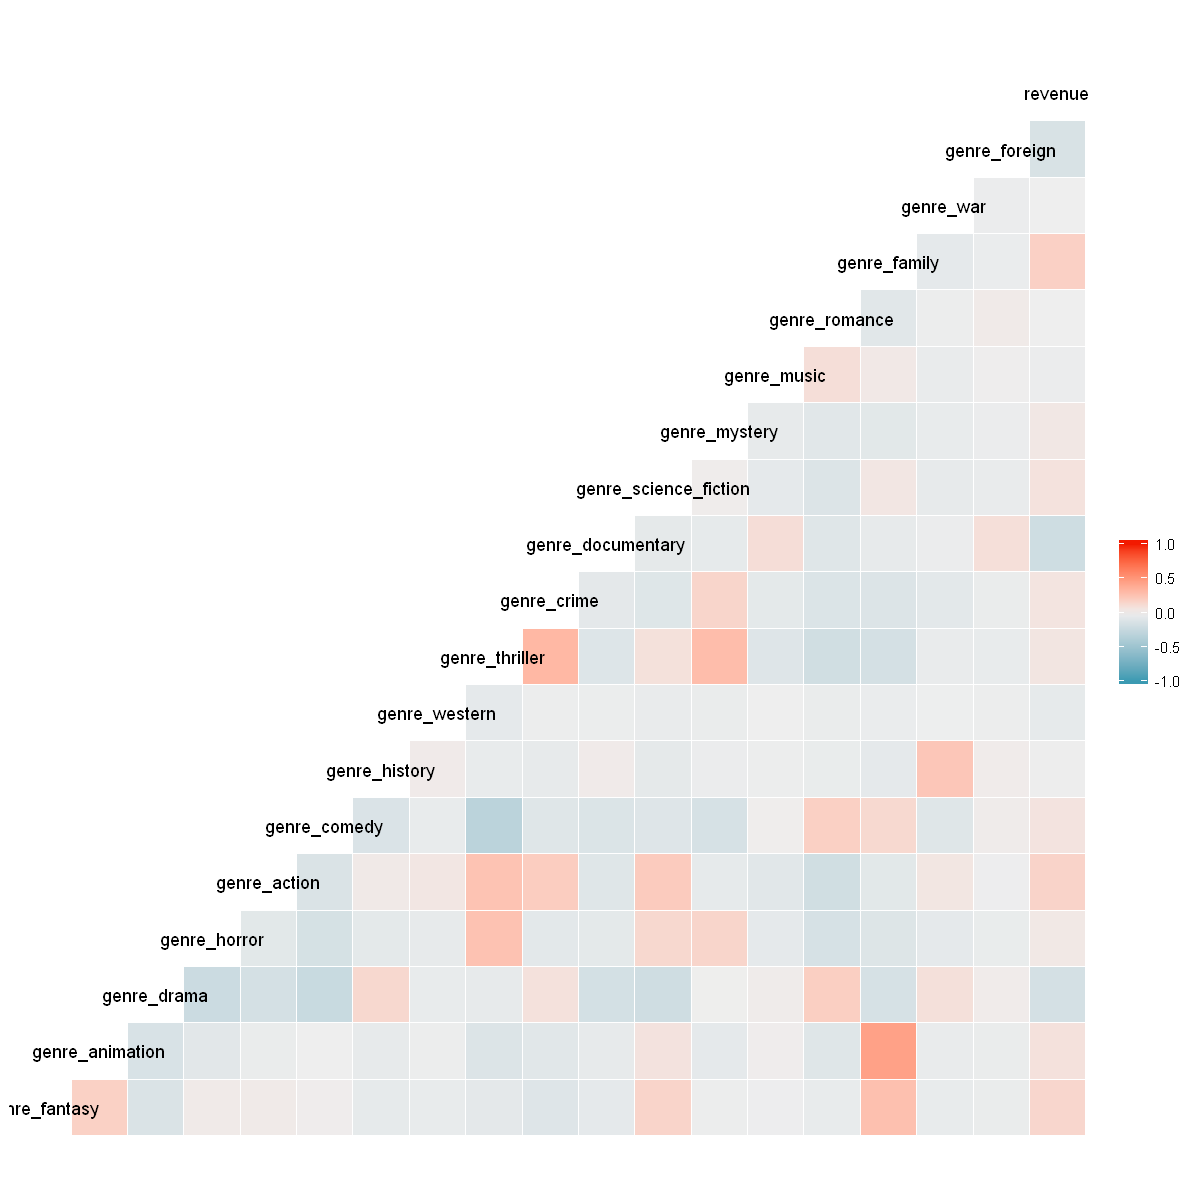

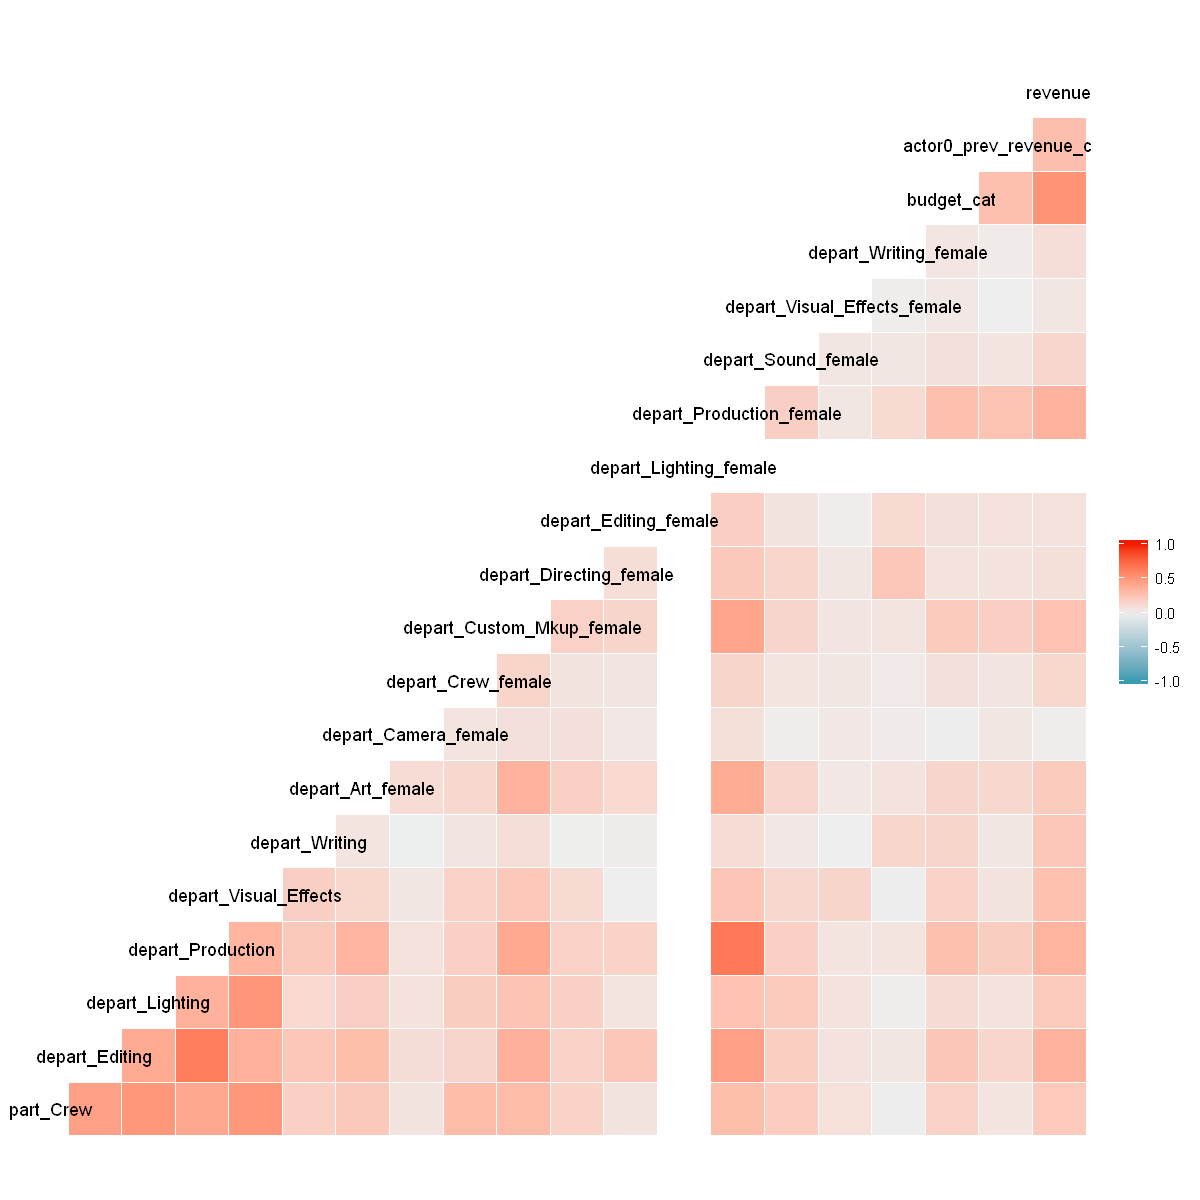

In [348]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorr(movies.clean.data[,c(1:18,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,c(19:36,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,c(37:54,74)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(movies.clean.data[,55:74], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

